# <font color='red'>Backtest vectorizado para una estrategia 'X' definida.</font>

### Hackeado by J3viton (learning BackTesting 2021).

---

En este notebook vamos a automatizar el backtesting para estrategias. Previamente tenemos que definir **la estrategia** usando el template (import estrategia_XX as rg), donde definimos la clase estrategia que contiene los metodos de analisis, entreda y salida de mercado. Este módulo se programa y adapta para cada estrategia. Luego en el metodo 'analisis' se crea un fichero excel con las metricas y rendimientos para evaluar la estrategia.

Vamos a usar el módulo Pandas, para realizar un backtest vectorizado, es decir calcular el resultado del backtest sin iterar sobre las filas (barras) de la serie temporal.

Posteriormente graficamos y mostramos los parametros generales que nos permiten analizar la estrategia.

#### J3Viton  2021

link a la base:

https://github.com/Python-para-Trading/Webinars-Docs/blob/master/Webinar%202/Webinar%202%20-%20Backtest%20con%20Pandas%20v%202.ipynb.

---

# DEFINICION DEL SISTEMA

Como es usual, importamos los módulos que vamos a necesitar para las distintas tareas, y preparamos Matplotlib para una mejor visualización de los gráficos en el notebook.

Se importa un modulo llamado analisis, en realidad se trata de un archivo .py con algunas funciones de apoyo para el trabajo, debe estar guardado en la misma carpeta que este notebook.
Se importa el módulo 'estrategia_XX', donde se define la estrategia de entreda y salida

Es importante tener clara la lógica del sistema, pues debemos plasmarla de forma sencilla y correcta en el dataframe para realizar el backtest del mismo.


In [1]:
import analisis
import estrategia_XX as rg  #cambiar segun el módulo con la estrategia implementado
import pandas as pd
import datetime as dt
from time import time
import yfinance as yf
import numpy as np

{'username': 'vital_quant_bot', 'can_join_groups': True, 'supports_inline_queries': False, 'id': 1473252352, 'is_bot': True, 'first_name': 'vital_bot', 'can_read_all_group_messages': False}


In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = 18, 8
plt.style.use('ggplot')

from IPython.display import display, Markdown

***0.- RECOGIDA DE DATOS INICIALES***
Introducimos el instrumento y las fechas


In [3]:
instrumento_ = 'san.mc'   # ticker del valor en yahooFinance

Fecha_Cominezo_Backtesting = dt.datetime(2008,1,2)
Fecha_Final_Backtesting    = dt.datetime(2021,11,18)




***1.- Rango fechas a analizar***

Definimos el rango global de datos historicos que vamos a evaluar.
Definimos la ventana que vamos a ir desplazando por todo el espectro para ir analilazando como se comporta la estrategia. La funion 'analisis' nos vale para tiempo real y para backtesting, para back le pasamos la ventana como si la fecha de fin de la ventana fuera la fecha de hoy.
Tener en cuenta que la 'ventana' tiene uqe tener una anchura que nos permita hacer los calculos en rolling (ejemplo EMA 200)

In [4]:
# Rango completo para backTesting
#start2 =dt.datetime(2008,1,2)
start2= Fecha_Cominezo_Backtesting 
#end2   =dt.datetime(2021,11,18)
end2= Fecha_Final_Backtesting 
start_G= start2.strftime("%Y-%m-%d")
end_G  =   end2.strftime("%Y-%m-%d")
TOTAL_len= (end2-start2).days
print('Tamaño timeseries global a analizar:  ', TOTAL_len, 'sesiones')

#ventana de analisis 200 sesiones
startWindow2 =dt.datetime(2008,1,5)
endWindow2   =startWindow2 + dt.timedelta(days=1000) #ventana grande para que se puedan hacer los calculos de EMA200
startWindow= startWindow2.strftime("%Y-%m-%d")
endWindow  =   endWindow2.strftime("%Y-%m-%d")
window_len= (endWindow2-startWindow2).days
print('Tamaño de la ventana a analizar paso a paso:  ', window_len, 'sesiones')

Tamaño timeseries global a analizar:   5069 sesiones
Tamaño de la ventana a analizar paso a paso:   1000 sesiones


In [5]:
 #dff = pd.DataFrame(columns=('Close','Volume', 'Senal', 'Dif_Close', 'Retornos','Capital'))

***2.- Descargamos los datos para el marco Global***

In [6]:
instrumento = instrumento_  # 'rovi.mc'  #Vamos título a título. Mejora: Conjunto de títulos

In [7]:
dff = yf.download(instrumento, start_G,end_G)

[*********************100%***********************]  1 of 1 completed


In [8]:
dff.dropna(inplace=True)  
dff.head()

Open       High        Low      Close  Adj Close       Volume
Date                                                                          
2008-01-02  12.696900  12.774795  12.549764  12.627659   4.964350  108519235.0
2008-01-03  12.593039  12.653624  12.428594  12.506489   4.916714  118144862.0
2008-01-04  12.463214  12.541109  12.177599  12.324734   4.845261  104914768.0
2008-01-07  12.281459  12.368009  12.160289  12.246839   4.814637   75125214.0
2008-01-08  12.255494  12.272804  11.978534  12.056429   4.739780   86713045.0

***3.- Creamos la clase strategy que tiene toda la lógica***

In [9]:
regreMedia= rg.StrategyClass()    #Creamos la clase

***4.- Recorremos el dataframe con valores buscando las señales de la estrategia***

In [10]:
dff.index

DatetimeIndex(['2008-01-02', '2008-01-03', '2008-01-04', '2008-01-07',
               '2008-01-08', '2008-01-09', '2008-01-10', '2008-01-11',
               '2008-01-14', '2008-01-15',
               ...
               '2021-11-04', '2021-11-05', '2021-11-08', '2021-11-09',
               '2021-11-10', '2021-11-11', '2021-11-12', '2021-11-15',
               '2021-11-16', '2021-11-17'],
              dtype='datetime64[ns]', name='Date', length=3548, freq=None)

## Proceso de backTesting ##

En este 'for' vamos recorriendo la muestra del historico de datos (TOTAL), desplazando una sesión hacia el futuro 
en cada iteracion. Vamos pasando la movilola del pasado sesión a sesión por el análisis descrito en Strategy class.

Ouput:
El sistema registra los siguientes parámetros:

.-
.-
.-


In [11]:
startWindow

'2008-01-05'

In [12]:
tiempo_inicial = time()   # Tomamos tiempos para ver cuanto tarda en hacer la estrategia

In [13]:
dfe = pd.DataFrame({'A' : []})   #df empty

***En este 'for' desplazamos la ventana sesión a sesión a lo largo de todo el rango de fechas. Dejamos que las funciones de la clase estrategia hagan el trabajo de comprar//vender y anotar***


In [14]:
#Para pruebas
#TOTAL_len =1000

for i in range(TOTAL_len):
    endWindow3   =endWindow2 + dt.timedelta(days=i) 
    endWindow    =endWindow3.strftime("%Y-%m-%d")
    print ('end date:', endWindow)
    
    if(endWindow in dff.index):
        df_aux= dff.loc[startWindow:endWindow]       #voy pasando los datos desplazando la ventana
        
        recogo = regreMedia.analisis(instrumento, startWindow, endWindow, df_aux) #Llamada a la clase estrategia. LA CLAVE DE TODO!!!
        
        print ('................................................Analizando, muestra', i, 'de', TOTAL_len, 'fecha', endWindow)
        
        """
        Tratamiento de los returns, mejor en las funciones de analisis que hacer aquí.
        if(recogo['senal'] == 1 ):
            dff.loc[[endWindow],['Senal']]= 1
        elif(recogo['senal'] == 0 ):
            dff.loc[[endWindow],['Senal']]= 0
        elif(recogo['senal'] == -1 ):
            dff.loc[[endWindow],['Senal']]= -1            
        elif(recogo['senal'] == 503 ):
            dff.loc[[endWindow],['Senal']]= 0          
        """
            
    else:
        print('..............Día sin sesión, next please')

        

end date: 2010-10-01
fichero no existe
 datos desde archivo
Coefficients: 
 [-0.00126735]
Independent term: 
 9.304606519830894
Coefficients: 
 [-0.00742732]
Independent term: 
 9.810010848828215
Coefficients: 
 [-0.00350245]
Independent term: 
 9.545422717657031


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
................................................Analizando, muestra 0 de 5069 fecha 2010-10-01
end date: 2010-10-02
..............Día sin sesión, next please
end date: 2010-10-03
..............Día sin sesión, next please
end date: 2010-10-04
 datos desde archivo
Coefficients: 
 [-0.00126689]
Independent term: 
 9.304499047548523
Coefficients: 
 [-0.00731756]
Independent ter

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")
C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence thi

Coefficients: 
 [-0.0012624]
Independent term: 
 9.303453848914408
Coefficients: 
 [-0.00712855]
Independent term: 
 9.76153613104749
Coefficients: 
 [-0.00357611]
Independent term: 
 9.549976063156747
  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
................................................Analizando, muestra 4 de 5069 fecha 2010-10-05
end date: 2010-10-06
 datos desde archivo
Coefficients: 
 [-0.00125766]
Indepen

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")
C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence thi

  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
................................................Analizando, muestra 5 de 5069 fecha 2010-10-06
end date: 2010-10-07
 datos desde archivo
Coefficients: 
 [-0.00125268]
Independent term: 
 9.301188279238286
Coefficients: 
 [-0.00670101]
Independent term: 
 9.70027237337027
Coefficients: 
 [-0.00364017]
Independent term: 
 9.553262258362253
  instrumento  long_short_out       

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")
C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence thi

  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
................................................Analizando, muestra 10 de 5069 fecha 2010-10-11
end date: 2010-10-12
 datos desde archivo
Coefficients: 
 [-0.00124311]
Independent term: 
 9.298948907255324
Coefficients: 
 [-0.00605632]
Independent term: 
 9.604684614637005
Coefficients: 
 [-0.00371767]
Independent term: 
 9.555696304037543
  instrumento  long_short_out     

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")
C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence thi

Coefficients: 
 [-0.00578311]
Independent term: 
 9.567409453463199
Coefficients: 
 [-0.00373822]
Independent term: 
 9.555812852788048
  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
................................................Analizando, muestra 12 de 5069 fecha 2010-10-13
end date: 2010-10-14
 datos desde archivo
Coefficients: 
 [-0.00123238]
Independent term: 
 9.296428386696327
Coefficients: 
 [-0.00549713]
Inde

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")
C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence thi

  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
................................................Analizando, muestra 13 de 5069 fecha 2010-10-14
end date: 2010-10-15
 datos desde archivo
Coefficients: 
 [-0.00122789]
Independent term: 
 9.295373210155171
Coefficients: 
 [-0.0052022]
Independent term: 
 9.487050929283027
Coefficients: 
 [-0.00377011]
Independent term: 
 9.554854440030041
  instrumento  long_short_out      

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")
C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence thi

  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
................................................Analizando, muestra 18 de 5069 fecha 2010-10-19
end date: 2010-10-20
 datos desde archivo
Coefficients: 
 [-0.00121092]
Independent term: 
 9.291368422478248
Coefficients: 
 [-0.00426005]
Independent term: 
 9.360412735725516
Coefficients: 
 [-0.00379406]
Independent term: 
 9.5503708046907
  instrumento  long_short_out       

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")
C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence thi

Coefficients: 
 [-0.00120556]
Independent term: 
 9.290100173646842
Coefficients: 
 [-0.00397009]
Independent term: 
 9.321420223036808
Coefficients: 
 [-0.00379581]
Independent term: 
 9.548092689450362
  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
................................................Analizando, muestra 20 de 5069 fecha 2010-10-21
end date: 2010-10-22
 datos desde archivo
Coefficients: 
 [-0.00119958]
Inde

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")
C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence thi

  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
................................................Analizando, muestra 24 de 5069 fecha 2010-10-25
end date: 2010-10-26
 datos desde archivo
Coefficients: 
 [-0.00119292]
Independent term: 
 9.287101478226814
Coefficients: 
 [-0.00317545]
Independent term: 
 9.212258388889369
Coefficients: 
 [-0.00378467]
Independent term: 
 9.53918431031188
  instrumento  long_short_out      

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")
C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence thi

Coefficients: 
 [-0.0011919]
Independent term: 
 9.286857783221778
Coefficients: 
 [-0.00295684]
Independent term: 
 9.179529951294855
Coefficients: 
 [-0.00377644]
Independent term: 
 9.535605659973402
  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
................................................Analizando, muestra 26 de 5069 fecha 2010-10-27
end date: 2010-10-28
 datos desde archivo
Coefficients: 
 [-0.00119123]
Indep

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")
C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence thi

  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
................................................Analizando, muestra 28 de 5069 fecha 2010-10-29
end date: 2010-10-30
..............Día sin sesión, next please
end date: 2010-10-31
..............Día sin sesión, next please
end date: 2010-11-01
 datos desde archivo
Coefficients: 
 [-0.00119106]
Independent term: 
 9.2866569086253
Coefficients: 
 [-0.00239534]
Independent term

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")
C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence thi

Coefficients: 
 [-0.00119186]
Independent term: 
 9.28684808965603
Coefficients: 
 [-0.00228535]
Independent term: 
 9.073086918076472
Coefficients: 
 [-0.00372524]
Independent term: 
 9.518714149489384
  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
................................................Analizando, muestra 32 de 5069 fecha 2010-11-02
end date: 2010-11-03
 datos desde archivo
Coefficients: 
 [-0.00119603]
Indep

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")
C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence thi

  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
................................................Analizando, muestra 33 de 5069 fecha 2010-11-03
end date: 2010-11-04
 datos desde archivo
Coefficients: 
 [-0.00119974]
Independent term: 
 9.288739493109137
Coefficients: 
 [-0.0021729]
Independent term: 
 9.043113988050775
Coefficients: 
 [-0.00369514]
Independent term: 
 9.509453220468597
  instrumento  long_short_out      

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")
C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence thi

Coefficients: 
 [-0.00121198]
Independent term: 
 9.291682700453133
Coefficients: 
 [-0.00227891]
Independent term: 
 9.038531241843948
Coefficients: 
 [-0.00366645]
Independent term: 
 9.500134184688976
  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
................................................Analizando, muestra 38 de 5069 fecha 2010-11-08
end date: 2010-11-09
 datos desde archivo
Coefficients: 
 [-0.00121636]
Inde

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")
C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence thi

  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
................................................Analizando, muestra 40 de 5069 fecha 2010-11-10
end date: 2010-11-11
 datos desde archivo
Coefficients: 
 [-0.00123069]
Independent term: 
 9.296200255472142
Coefficients: 
 [-0.00230275]
Independent term: 
 9.013569879674199
Coefficients: 
 [-0.00362601]
Independent term: 
 9.486035442512323
  instrumento  long_short_out     

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")
C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence thi

Coefficients: 
 [-0.0012362]
Independent term: 
 9.297532172909921
Coefficients: 
 [-0.00232803]
Independent term: 
 9.00826848143962
Coefficients: 
 [-0.00361309]
Independent term: 
 9.481281542402149
  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
................................................Analizando, muestra 42 de 5069 fecha 2010-11-12
end date: 2010-11-13
..............Día sin sesión, next please
end date: 2010-

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")
C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence thi

  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
................................................Analizando, muestra 46 de 5069 fecha 2010-11-16
end date: 2010-11-17
 datos desde archivo
Coefficients: 
 [-0.00125154]
Independent term: 
 9.301255375235755
Coefficients: 
 [-0.00276531]
Independent term: 
 9.041371425230112
Coefficients: 
 [-0.00358387]
Independent term: 
 9.46797909961608
  instrumento  long_short_out      

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")
C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence thi

 datos desde archivo
Coefficients: 
 [-0.00125514]
Independent term: 
 9.302132263802413
Coefficients: 
 [-0.00284468]
Independent term: 
 9.044914896452605
Coefficients: 
 [-0.00357651]
Independent term: 
 9.463769505554751
  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
................................................Analizando, muestra 48 de 5069 fecha 2010-11-18
end date: 2010-11-19
 datos desde archivo
Coefficients:

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")
C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence thi

Coefficients: 
 [-0.00356434]
Independent term: 
 9.45550292131128
  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
................................................Analizando, muestra 52 de 5069 fecha 2010-11-22
end date: 2010-11-23
 datos desde archivo
Coefficients: 
 [-0.00128159]
Independent term: 
 9.308587787243713
Coefficients: 
 [-0.00323569]
Independent term: 
 9.061884594532982
Coefficients: 
 [-0.00356107]
Indep

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")
C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence thi

  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
................................................Analizando, muestra 53 de 5069 fecha 2010-11-23
end date: 2010-11-24
 datos desde archivo
Coefficients: 
 [-0.00129384]
Independent term: 
 9.311584594731316
Coefficients: 
 [-0.00342407]
Independent term: 
 9.072144500461977
Coefficients: 
 [-0.00355971]
Independent term: 
 9.447810780541518
  instrumento  long_short_out     

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")
C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence thi

  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
................................................Analizando, muestra 56 de 5069 fecha 2010-11-26
end date: 2010-11-27
..............Día sin sesión, next please
end date: 2010-11-28
..............Día sin sesión, next please
end date: 2010-11-29
 datos desde archivo
Coefficients: 
 [-0.00133781]
Independent term: 
 9.322374203339127
Coefficients: 
 [-0.00397963]
Independent te

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")
C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence thi

Coefficients: 
 [-0.00135485]
Independent term: 
 9.326565705598972
Coefficients: 
 [-0.00416594]
Independent term: 
 9.100603331807834
Coefficients: 
 [-0.00357235]
Independent term: 
 9.433814324551735
  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
................................................Analizando, muestra 60 de 5069 fecha 2010-11-30
end date: 2010-12-01
 datos desde archivo
Coefficients: 
 [-0.00136644]
Inde

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")
C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence thi

  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
................................................Analizando, muestra 61 de 5069 fecha 2010-12-01
end date: 2010-12-02
 datos desde archivo
Coefficients: 
 [-0.00137386]
Independent term: 
 9.331250154504975
Coefficients: 
 [-0.0044398]
Independent term: 
 9.112405993689352
Coefficients: 
 [-0.00358819]
Independent term: 
 9.427374215164154
  instrumento  long_short_out      

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")
C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence thi

Coefficients: 
 [-0.00360953]
Independent term: 
 9.421440260209746
  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
................................................Analizando, muestra 66 de 5069 fecha 2010-12-06
end date: 2010-12-07
 datos desde archivo
Coefficients: 
 [-0.00139648]
Independent term: 
 9.336847104255268
Coefficients: 
 [-0.00489396]
Independent term: 
 9.141144960531548
Coefficients: 
 [-0.00362231]
Inde

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")
C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence thi

  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
................................................Analizando, muestra 67 de 5069 fecha 2010-12-07
end date: 2010-12-08
 datos desde archivo
Coefficients: 
 [-0.00140292]
Independent term: 
 9.33844414117428
Coefficients: 
 [-0.00498969]
Independent term: 
 9.144334569475543
Coefficients: 
 [-0.00363592]
Independent term: 
 9.415921733021136
  instrumento  long_short_out      

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")
C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence thi

  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
................................................Analizando, muestra 70 de 5069 fecha 2010-12-10
end date: 2010-12-11
..............Día sin sesión, next please
end date: 2010-12-12
..............Día sin sesión, next please
end date: 2010-12-13
 datos desde archivo
Coefficients: 
 [-0.00141956]
Independent term: 
 9.342580497700954
Coefficients: 
 [-0.00513446]
Independent te

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")
C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence thi

Coefficients: 
 [-0.001425]
Independent term: 
 9.34393862560152
Coefficients: 
 [-0.00510839]
Independent term: 
 9.125525878863549
Coefficients: 
 [-0.00369328]
Independent term: 
 9.405002450220431
  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
................................................Analizando, muestra 74 de 5069 fecha 2010-12-14
end date: 2010-12-15
 datos desde archivo
Coefficients: 
 [-0.00143257]
Indepen

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")
C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence thi

  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
................................................Analizando, muestra 76 de 5069 fecha 2010-12-16
end date: 2010-12-17
 datos desde archivo
Coefficients: 
 [-0.00144924]
Independent term: 
 9.349997758202711
Coefficients: 
 [-0.00512129]
Independent term: 
 9.094420844120766
Coefficients: 
 [-0.00373526]
Independent term: 
 9.39612750058223
  instrumento  long_short_out      

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")
C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence thi

 datos desde archivo
Coefficients: 
 [-0.00145752]
Independent term: 
 9.352074165313415
Coefficients: 
 [-0.00513584]
Independent term: 
 9.08528626876091
Coefficients: 
 [-0.00374919]
Independent term: 
 9.39303455300192
  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
................................................Analizando, muestra 80 de 5069 fecha 2010-12-20
end date: 2010-12-21
 datos desde archivo
Coefficients: 


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")
C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence thi

  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
................................................Analizando, muestra 82 de 5069 fecha 2010-12-22
end date: 2010-12-23
 datos desde archivo
Coefficients: 
 [-0.00147775]
Independent term: 
 9.3571585568166
Coefficients: 
 [-0.00511742]
Independent term: 
 9.054202846555567
Coefficients: 
 [-0.00378958]
Independent term: 
 9.383305805860628
  instrumento  long_short_out       

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")
C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence thi

 datos desde archivo
Coefficients: 
 [-0.00148728]
Independent term: 
 9.359561257575852
Coefficients: 
 [-0.0051338]
Independent term: 
 9.044228363962315
Coefficients: 
 [-0.00380296]
Independent term: 
 9.379931900966117
  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
................................................Analizando, muestra 87 de 5069 fecha 2010-12-27
end date: 2010-12-28
 datos desde archivo
Coefficients: 

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")
C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence thi

  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
................................................Analizando, muestra 89 de 5069 fecha 2010-12-29
end date: 2010-12-30
 datos desde archivo
Coefficients: 
 [-0.00151362]
Independent term: 
 9.366215949931963
Coefficients: 
 [-0.00528822]
Independent term: 
 9.030588342823199
Coefficients: 
 [-0.00384493]
Independent term: 
 9.369683316340732
  instrumento  long_short_out     

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")
C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence thi

 datos desde archivo
Coefficients: 
 [-0.00152205]
Independent term: 
 9.36835121766213
Coefficients: 
 [-0.00533044]
Independent term: 
 9.025177343283126
Coefficients: 
 [-0.00385971]
Independent term: 
 9.366255396210805
  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
................................................Analizando, muestra 94 de 5069 fecha 2011-01-03
end date: 2011-01-04
 datos desde archivo
Coefficients: 

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")
C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence thi

  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
................................................Analizando, muestra 96 de 5069 fecha 2011-01-05
end date: 2011-01-06
 datos desde archivo
Coefficients: 
 [-0.00154889]
Independent term: 
 9.37516965706598
Coefficients: 
 [-0.00549967]
Independent term: 
 9.013154363276353
Coefficients: 
 [-0.00390665]
Independent term: 
 9.355972175860442
  instrumento  long_short_out      

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")
C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence thi

 datos desde archivo
Coefficients: 
 [-0.00156048]
Independent term: 
 9.378122053030106
Coefficients: 
 [-0.00557588]
Independent term: 
 9.00922655831522
Coefficients: 
 [-0.00392326]
Independent term: 
 9.352521970710738
  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
................................................Analizando, muestra 98 de 5069 fecha 2011-01-07
end date: 2011-01-08
..............Día sin sesión, next 

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")
C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence thi

Coefficients: 
 [-0.00395945]
Independent term: 
 9.345725804164848
  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
................................................Analizando, muestra 102 de 5069 fecha 2011-01-11
end date: 2011-01-12
 datos desde archivo
Coefficients: 
 [-0.00159126]
Independent term: 
 9.385977189079792
Coefficients: 
 [-0.00578316]
Independent term: 
 8.998595205776727
Coefficients: 
 [-0.00397759]
Ind

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")
C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence thi

  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
................................................Analizando, muestra 103 de 5069 fecha 2011-01-12
end date: 2011-01-13
 datos desde archivo
Coefficients: 
 [-0.00159274]
Independent term: 
 9.386356099864281
Coefficients: 
 [-0.00569124]
Independent term: 
 8.982348200741098
Coefficients: 
 [-0.00399464]
Independent term: 
 9.338690439328959
  instrumento  long_short_out    

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")
C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence thi

Coefficients: 
 [-0.00159675]
Independent term: 
 9.387385965917401
Coefficients: 
 [-0.00552693]
Independent term: 
 8.951532096791624
Coefficients: 
 [-0.00402565]
Independent term: 
 9.331160512448841
  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
................................................Analizando, muestra 108 de 5069 fecha 2011-01-17
end date: 2011-01-18
 datos desde archivo
Coefficients: 
 [-0.00159596]
Ind

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")
C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence thi

Coefficients: 
 [-0.00159567]
Independent term: 
 9.387108532637768
Coefficients: 
 [-0.00515373]
Independent term: 
 8.898241043731348
Coefficients: 
 [-0.00404995]
Independent term: 
 9.322868748864842
  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
................................................Analizando, muestra 110 de 5069 fecha 2011-01-19
end date: 2011-01-20
 datos desde archivo
Coefficients: 
 [-0.00159482]
Ind

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")
C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence thi

Coefficients: 
 [-0.00159085]
Independent term: 
 9.385864888274622
Coefficients: 
 [-0.00467732]
Independent term: 
 8.835284305188194
Coefficients: 
 [-0.00406499]
Independent term: 
 9.313544401548508
  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
................................................Analizando, muestra 112 de 5069 fecha 2011-01-21
end date: 2011-01-22
..............Día sin sesión, next please
end date: 20

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")
C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence thi

Coefficients: 
 [-0.00158617]
Independent term: 
 9.384655074719255
Coefficients: 
 [-0.00421539]
Independent term: 
 8.77442646119132
Coefficients: 
 [-0.00406985]
Independent term: 
 9.303129547527416
  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
................................................Analizando, muestra 116 de 5069 fecha 2011-01-25
end date: 2011-01-26
 datos desde archivo
Coefficients: 
 [-0.00158591]
Inde

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")
C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence thi

 datos desde archivo
Coefficients: 
 [-0.00158281]
Independent term: 
 9.383783018626984
Coefficients: 
 [-0.0038128]
Independent term: 
 8.720405031673945
Coefficients: 
 [-0.00406705]
Independent term: 
 9.29188329276915
  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
................................................Analizando, muestra 118 de 5069 fecha 2011-01-27
end date: 2011-01-28
 datos desde archivo
Coefficients: 

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


 datos desde archivo
Coefficients: 
 [-0.00157786]
Independent term: 
 9.382497176176807
Coefficients: 
 [-0.00348942]
Independent term: 
 8.678756093765372
Coefficients: 
 [-0.00405705]
Independent term: 
 9.279922650636372
  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
................................................Analizando, muestra 122 de 5069 fecha 2011-01-31
end date: 2011-02-01
 datos desde archivo


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")
C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence thi

Coefficients: 
 [-0.00157337]
Independent term: 
 9.381326898764287
Coefficients: 
 [-0.00331025]
Independent term: 
 8.657742025958958
Coefficients: 
 [-0.00404962]
Independent term: 
 9.273731798649532
  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
................................................Analizando, muestra 123 de 5069 fecha 2011-02-01
end date: 2011-02-02
 datos desde archivo
Coefficients: 
 [-0.00156879]
Ind

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")
C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence thi

Coefficients: 
 [-0.00156564]
Independent term: 
 9.379312555683414
Coefficients: 
 [-0.00302111]
Independent term: 
 8.623755381356425
Coefficients: 
 [-0.0040302]
Independent term: 
 9.260972518076674
  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
................................................Analizando, muestra 125 de 5069 fecha 2011-02-03
end date: 2011-02-04
 datos desde archivo
Coefficients: 
 [-0.00156315]
Inde

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


 datos desde archivo
Coefficients: 
 [-0.00156037]
Independent term: 
 9.377933408059457
Coefficients: 
 [-0.00290342]
Independent term: 
 8.61011814822012
Coefficients: 
 [-0.00400874]
Independent term: 
 9.248186355858731
  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
................................................Analizando, muestra 129 de 5069 fecha 2011-02-07
end date: 2011-02-08


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")
C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence thi

 datos desde archivo
Coefficients: 
 [-0.00155703]
Independent term: 
 9.377059835783063
Coefficients: 
 [-0.00279541]
Independent term: 
 8.597521937142556
Coefficients: 
 [-0.00399666]
Independent term: 
 9.241712083035686
  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
................................................Analizando, muestra 130 de 5069 fecha 2011-02-08
end date: 2011-02-09
 datos desde archivo
Coefficients

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


 datos desde archivo
Coefficients: 
 [-0.00155309]
Independent term: 
 9.376025567499392
Coefficients: 
 [-0.00279128]
Independent term: 
 8.597690148638256
Coefficients: 
 [-0.00397221]
Independent term: 
 9.228888252735077
  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
................................................Analizando, muestra 132 de 5069 fecha 2011-02-10
end date: 2011-02-11


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


 datos desde archivo
Coefficients: 
 [-0.00155134]
Independent term: 
 9.375563916002603
Coefficients: 
 [-0.00286886]
Independent term: 
 8.60810598658092
Coefficients: 
 [-0.00396123]
Independent term: 
 9.222711314763393
  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
................................................Analizando, muestra 133 de 5069 fecha 2011-02-11
end date: 2011-02-12
..............Día sin sesión, next

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")



end date: 2011-02-14
 datos desde archivo
Coefficients: 
 [-0.0015503]
Independent term: 
 9.375290968664507
Coefficients: 
 [-0.00301239]
Independent term: 
 8.626493027103482
Coefficients: 
 [-0.00395179]
Independent term: 
 9.216778794488171


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
................................................Analizando, muestra 136 de 5069 fecha 2011-02-14
end date: 2011-02-15
 datos desde archivo
Coefficients: 
 [-0.00154809]
Independent term: 
 9.374707972283826
Coefficients: 
 [-0.00318084]
Independent term: 
 8.649365371946079
Coefficients: 
 [-0.00394411]
Independent term: 
 9.21113288978626


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
................................................Analizando, muestra 137 de 5069 fecha 2011-02-15
end date: 2011-02-16
 datos desde archivo
Coefficients: 
 [-0.00154289]
Independent term: 
 9.373334748334438
Coefficients: 
 [-0.00305363]
Independent term: 
 8.636085904818863
Coefficients: 
 [-0.00393525]
Independent term: 
 9.205411029239322


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
................................................Analizando, muestra 138 de 5069 fecha 2011-02-16
end date: 2011-02-17
 datos desde archivo
Coefficients: 
 [-0.00153688]
Independent term: 
 9.371746577880788
Coefficients: 
 [-0.00295738]
Independent term: 
 8.627791171073913
Coefficients: 
 [-0.00392552]
Independent term: 
 9.199663567964043


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
................................................Analizando, muestra 139 de 5069 fecha 2011-02-17
end date: 2011-02-18
 datos desde archivo
Coefficients: 
 [-0.00153139]
Independent term: 
 9.37029427919182
Coefficients: 
 [-0.00286421]
Independent term: 
 8.619377025348037
Coefficients: 
 [-0.00391496]
Independent term: 
 9.193889572515127


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
................................................Analizando, muestra 140 de 5069 fecha 2011-02-18
end date: 2011-02-19
..............Día sin sesión, next please
end date: 2011-02-20
..............Día sin sesión, next please
end date: 2011-02-21
 datos desde archivo
Coefficients: 
 [-0.00152864]
Independent term: 
 9.369565948567445
Coefficients: 
 [-0.00282526]
Independent t

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
................................................Analizando, muestra 143 de 5069 fecha 2011-02-21
end date: 2011-02-22
 datos desde archivo
Coefficients: 
 [-0.00152675]
Independent term: 
 9.369064288489477
Coefficients: 
 [-0.00291465]
Independent term: 
 8.62732474426725
Coefficients: 
 [-0.00389428]
Independent term: 
 9.182552158688797


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
................................................Analizando, muestra 144 de 5069 fecha 2011-02-22
end date: 2011-02-23
 datos desde archivo
Coefficients: 
 [-0.00152522]
Independent term: 
 9.368658325842237
Coefficients: 
 [-0.00302166]
Independent term: 
 8.641285079699843
Coefficients: 
 [-0.00388559]
Independent term: 
 9.177166416609305


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
................................................Analizando, muestra 145 de 5069 fecha 2011-02-23
end date: 2011-02-24
 datos desde archivo
Coefficients: 
 [-0.00152437]
Independent term: 
 9.368431862481078
Coefficients: 
 [-0.00306983]
Independent term: 
 8.646683453018985
Coefficients: 
 [-0.00387748]
Independent term: 
 9.171887979160644


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
................................................Analizando, muestra 146 de 5069 fecha 2011-02-24
end date: 2011-02-25
 datos desde archivo
Coefficients: 
 [-0.0015218]
Independent term: 
 9.36774580149864
Coefficients: 
 [-0.00312252]
Independent term: 
 8.654503768522348
Coefficients: 
 [-0.00386996]
Independent term: 
 9.166739877562254


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
................................................Analizando, muestra 147 de 5069 fecha 2011-02-25
end date: 2011-02-26
..............Día sin sesión, next please
end date: 2011-02-27
..............Día sin sesión, next please
end date: 2011-02-28
 datos desde archivo
Coefficients: 
 [-0.00151925]
Independent term: 
 9.367067254795817
Coefficients: 
 [-0.00318899]
Independent t

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
................................................Analizando, muestra 150 de 5069 fecha 2011-02-28
end date: 2011-03-01
 datos desde archivo
Coefficients: 
 [-0.00151807]
Independent term: 
 9.366751676908544
Coefficients: 
 [-0.00325368]
Independent term: 
 8.671975063779461
Coefficients: 
 [-0.00385712]
Independent term: 
 9.156865216304473


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
................................................Analizando, muestra 151 de 5069 fecha 2011-03-01
end date: 2011-03-02
 datos desde archivo
Coefficients: 
 [-0.00151811]
Independent term: 
 9.366761332494486
Coefficients: 
 [-0.00335235]
Independent term: 
 8.683031171756005
Coefficients: 
 [-0.0038521]
Independent term: 
 9.15215044969205


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
................................................Analizando, muestra 152 de 5069 fecha 2011-03-02
end date: 2011-03-03
 datos desde archivo
Coefficients: 
 [-0.00151938]
Independent term: 
 9.36710080243402
Coefficients: 
 [-0.00351824]
Independent term: 
 8.701653062621158
Coefficients: 
 [-0.00384878]
Independent term: 
 9.14766788862667


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
................................................Analizando, muestra 153 de 5069 fecha 2011-03-03
end date: 2011-03-04
 datos desde archivo
Coefficients: 
 [-0.00152199]
Independent term: 
 9.367800255977373
Coefficients: 
 [-0.003714]
Independent term: 
 8.722742707480245
Coefficients: 
 [-0.00384744]
Independent term: 
 9.143439777371482


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
................................................Analizando, muestra 154 de 5069 fecha 2011-03-04
end date: 2011-03-05
..............Día sin sesión, next please
end date: 2011-03-06
..............Día sin sesión, next please
end date: 2011-03-07
 datos desde archivo
Coefficients: 
 [-0.00152543]
Independent term: 
 9.368724358446435
Coefficients: 
 [-0.00391143]
Independent t

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
................................................Analizando, muestra 157 de 5069 fecha 2011-03-07
end date: 2011-03-08
 datos desde archivo
Coefficients: 
 [-0.00152821]
Independent term: 
 9.369471633883215
Coefficients: 
 [-0.00407278]
Independent term: 
 8.759340047551625
Coefficients: 
 [-0.00385031]
Independent term: 
 9.13567405471028


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
................................................Analizando, muestra 158 de 5069 fecha 2011-03-08
end date: 2011-03-09
 datos desde archivo
Coefficients: 
 [-0.00153124]
Independent term: 
 9.370287149740445
Coefficients: 
 [-0.00424933]
Independent term: 
 8.777283555073526
Coefficients: 
 [-0.00385428]
Independent term: 
 9.13210798008703


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
................................................Analizando, muestra 159 de 5069 fecha 2011-03-09
end date: 2011-03-10
 datos desde archivo
Coefficients: 
 [-0.00153521]
Independent term: 
 9.371355893435483
Coefficients: 
 [-0.00445909]
Independent term: 
 8.798571165924642
Coefficients: 
 [-0.0038603]
Independent term: 
 9.128789205816759


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
................................................Analizando, muestra 160 de 5069 fecha 2011-03-10
end date: 2011-03-11
 datos desde archivo
Coefficients: 
 [-0.00153975]
Independent term: 
 9.372581033401156
Coefficients: 
 [-0.00470038]
Independent term: 
 8.823361727586432
Coefficients: 
 [-0.00386866]
Independent term: 
 9.125750126431381


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
................................................Analizando, muestra 161 de 5069 fecha 2011-03-11
end date: 2011-03-12
..............Día sin sesión, next please
end date: 2011-03-13
..............Día sin sesión, next please
end date: 2011-03-14
 datos desde archivo
Coefficients: 
 [-0.00154265]
Independent term: 
 9.373362329329371
Coefficients: 
 [-0.00492078]
Independent t

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
................................................Analizando, muestra 164 de 5069 fecha 2011-03-14
end date: 2011-03-15
 datos desde archivo
Coefficients: 
 [-0.00154534]
Independent term: 
 9.374091155568847
Coefficients: 
 [-0.00520385]
Independent term: 
 8.879365216867248
Coefficients: 
 [-0.00389231]
Independent term: 
 9.120553744473204


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
................................................Analizando, muestra 165 de 5069 fecha 2011-03-15
end date: 2011-03-16
 datos desde archivo
Coefficients: 
 [-0.0015503]
Independent term: 
 9.375432416559356
Coefficients: 
 [-0.0055383]
Independent term: 
 8.915857234499347
Coefficients: 
 [-0.00390869]
Independent term: 
 9.118516963279435


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
................................................Analizando, muestra 166 de 5069 fecha 2011-03-16
end date: 2011-03-17
 datos desde archivo
Coefficients: 
 [-0.00155298]
Independent term: 
 9.37616018642376
Coefficients: 
 [-0.00585197]
Independent term: 
 8.95200836331097
Coefficients: 
 [-0.00392802]
Independent term: 
 9.116860161289699


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
................................................Analizando, muestra 167 de 5069 fecha 2011-03-17
end date: 2011-03-18
 datos desde archivo
Coefficients: 
 [-0.00155561]
Independent term: 
 9.376872810494163
Coefficients: 
 [-0.00612695]
Independent term: 
 8.983006403410611
Coefficients: 
 [-0.0039499]
Independent term: 
 9.115528283101849


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
................................................Analizando, muestra 168 de 5069 fecha 2011-03-18
end date: 2011-03-19
..............Día sin sesión, next please
end date: 2011-03-20
..............Día sin sesión, next please
end date: 2011-03-21
 datos desde archivo
Coefficients: 
 [-0.00155618]
Independent term: 
 9.377027840089797
Coefficients: 
 [-0.00631413]
Independent t

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
................................................Analizando, muestra 171 de 5069 fecha 2011-03-21
end date: 2011-03-22
 datos desde archivo
Coefficients: 
 [-0.00155702]
Independent term: 
 9.377256203743185
Coefficients: 
 [-0.00642636]
Independent term: 
 9.015823412866734
Coefficients: 
 [-0.00399783]
Independent term: 
 9.113443022729735


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
................................................Analizando, muestra 172 de 5069 fecha 2011-03-22
end date: 2011-03-23
 datos desde archivo
Coefficients: 
 [-0.00155794]
Independent term: 
 9.377506907364891
Coefficients: 
 [-0.00652855]
Independent term: 
 9.025641254168837
Coefficients: 
 [-0.00402302]
Independent term: 
 9.112569373291318


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
................................................Analizando, muestra 173 de 5069 fecha 2011-03-23
end date: 2011-03-24
 datos desde archivo
Coefficients: 
 [-0.00155787]
Independent term: 
 9.37748659425218
Coefficients: 
 [-0.00658199]
Independent term: 
 9.03008284205821
Coefficients: 
 [-0.00404848]
Independent term: 
 9.111748611786512


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
................................................Analizando, muestra 174 de 5069 fecha 2011-03-24
end date: 2011-03-25
 datos desde archivo
Coefficients: 
 [-0.00155845]
Independent term: 
 9.377645646207222
Coefficients: 
 [-0.00665132]
Independent term: 
 9.035890890947028
Coefficients: 
 [-0.00407438]
Independent term: 
 9.11099380859408


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
................................................Analizando, muestra 175 de 5069 fecha 2011-03-25
end date: 2011-03-26
..............Día sin sesión, next please
end date: 2011-03-27
..............Día sin sesión, next please
end date: 2011-03-28
 datos desde archivo
Coefficients: 
 [-0.00155877]
Independent term: 
 9.377733688299683
Coefficients: 
 [-0.00669651]
Independent t

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
................................................Analizando, muestra 178 de 5069 fecha 2011-03-28
end date: 2011-03-29
 datos desde archivo
Coefficients: 
 [-0.00155998]
Independent term: 
 9.378063904663794
Coefficients: 
 [-0.00671177]
Independent term: 
 9.036700014854546
Coefficients: 
 [-0.00412645]
Independent term: 
 9.109543164553122


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")
C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence thi

  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
................................................Analizando, muestra 179 de 5069 fecha 2011-03-29
end date: 2011-03-30
 datos desde archivo
Coefficients: 
 [-0.00156159]
Independent term: 
 9.37850688271047
Coefficients: 
 [-0.00672347]
Independent term: 
 9.033696508051744
Coefficients: 
 [-0.00415229]
Independent term: 
 9.108788471453604
  instrumento  long_short_out     

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


 datos desde archivo
Coefficients: 
 [-0.00156627]
Independent term: 
 9.379790280685198
Coefficients: 
 [-0.00681121]
Independent term: 
 9.034630283028333
Coefficients: 
 [-0.00420454]
Independent term: 
 9.107309375491123
  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
................................................Analizando, muestra 182 de 5069 fecha 2011-04-01
end date: 2011-04-02
..............Día sin sesión, nex

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


 2011-04-04
 datos desde archivo
Coefficients: 
 [-0.00156815]
Independent term: 
 9.380307406871754
Coefficients: 
 [-0.00690766]
Independent term: 
 9.042594982901615
Coefficients: 
 [-0.00423144]
Independent term: 
 9.106665451186752


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
................................................Analizando, muestra 185 de 5069 fecha 2011-04-04
end date: 2011-04-05
 datos desde archivo
Coefficients: 
 [-0.00157099]
Independent term: 
 9.381087597031001
Coefficients: 
 [-0.00701462]
Independent term: 
 9.05085469708514
Coefficients: 
 [-0.00425913]
Independent term: 
 9.106110120300167


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
................................................Analizando, muestra 186 de 5069 fecha 2011-04-05
end date: 2011-04-06
 datos desde archivo
Coefficients: 
 [-0.00157227]
Independent term: 
 9.381442410919524
Coefficients: 
 [-0.00706853]
Independent term: 
 9.053825859382972
Coefficients: 
 [-0.00428709]
Independent term: 
 9.105589878898005


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
................................................Analizando, muestra 187 de 5069 fecha 2011-04-06
end date: 2011-04-07
 datos desde archivo
Coefficients: 
 [-0.00157236]
Independent term: 
 9.381465435770576
Coefficients: 
 [-0.00718753]
Independent term: 
 9.066806587461215
Coefficients: 
 [-0.00431595]
Independent term: 
 9.105203975500627


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
................................................Analizando, muestra 188 de 5069 fecha 2011-04-07
end date: 2011-04-08
 datos desde archivo
Coefficients: 
 [-0.0015716]
Independent term: 
 9.38125625510663
Coefficients: 
 [-0.00725152]
Independent term: 
 9.073425171197352
Coefficients: 
 [-0.00434516]
Independent term: 
 9.104887768492635


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
................................................Analizando, muestra 189 de 5069 fecha 2011-04-08
end date: 2011-04-09
..............Día sin sesión, next please
end date: 2011-04-10
..............Día sin sesión, next please
end date: 2011-04-11
 datos desde archivo
Coefficients: 
 [-0.00157117]
Independent term: 
 9.38113712840094
Coefficients: 
 [-0.00732737]
Independent te

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
................................................Analizando, muestra 192 de 5069 fecha 2011-04-11
end date: 2011-04-12
 datos desde archivo
Coefficients: 
 [-0.00157147]
Independent term: 
 9.381220156648128
Coefficients: 
 [-0.00740644]
Independent term: 
 9.08860700856394
Coefficients: 
 [-0.004405]
Independent term: 
 9.104492715397376


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
................................................Analizando, muestra 193 de 5069 fecha 2011-04-12
end date: 2011-04-13
 datos desde archivo
Coefficients: 
 [-0.00157199]
Independent term: 
 9.381364249670929
Coefficients: 
 [-0.00750093]
Independent term: 
 9.097760739753497
Coefficients: 
 [-0.0044358]
Independent term: 
 9.1044257305651


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
................................................Analizando, muestra 194 de 5069 fecha 2011-04-13
end date: 2011-04-14
 datos desde archivo
Coefficients: 
 [-0.00157407]
Independent term: 
 9.38194239364498
Coefficients: 
 [-0.00754916]
Independent term: 
 9.098951991422853
Coefficients: 
 [-0.00446678]
Independent term: 
 9.104371265499008


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
................................................Analizando, muestra 195 de 5069 fecha 2011-04-14
end date: 2011-04-15
 datos desde archivo
Coefficients: 
 [-0.00157645]
Independent term: 
 9.382605456457085
Coefficients: 
 [-0.00751867]
Independent term: 
 9.089350924349542
Coefficients: 
 [-0.00449715]
Independent term: 
 9.104221809368168


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
................................................Analizando, muestra 196 de 5069 fecha 2011-04-15
end date: 2011-04-16
..............Día sin sesión, next please
end date: 2011-04-17
..............Día sin sesión, next please
end date: 2011-04-18
 datos desde archivo
Coefficients: 
 [-0.00158054]
Independent term: 
 9.383743318518574
Coefficients: 
 [-0.0074963]
Independent te

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
................................................Analizando, muestra 199 de 5069 fecha 2011-04-18
end date: 2011-04-19
 datos desde archivo
Coefficients: 
 [-0.00158419]
Independent term: 
 9.384760812399639
Coefficients: 
 [-0.00746191]
Independent term: 
 9.067348349841673
Coefficients: 
 [-0.00455619]
Independent term: 
 9.103605227696065


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
................................................Analizando, muestra 200 de 5069 fecha 2011-04-19
end date: 2011-04-20
 datos desde archivo
Coefficients: 
 [-0.00158714]
Independent term: 
 9.38558266478301
Coefficients: 
 [-0.00742502]
Independent term: 
 9.056348425310048
Coefficients: 
 [-0.00458474]
Independent term: 
 9.103135010756901


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
................................................Analizando, muestra 201 de 5069 fecha 2011-04-20
end date: 2011-04-21
 datos desde archivo
Coefficients: 
 [-0.00158958]
Independent term: 
 9.38626393283131
Coefficients: 
 [-0.00734349]
Independent term: 
 9.04005177690022
Coefficients: 
 [-0.00461219]
Independent term: 
 9.10250731688768


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
................................................Analizando, muestra 202 de 5069 fecha 2011-04-21
end date: 2011-04-22
..............Día sin sesión, next please
end date: 2011-04-23
..............Día sin sesión, next please
end date: 2011-04-24
..............Día sin sesión, next please
end date: 2011-04-25
..............Día sin sesión, next please
end date: 2011-04-26
 datos

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
................................................Analizando, muestra 207 de 5069 fecha 2011-04-26
end date: 2011-04-27
 datos desde archivo
Coefficients: 
 [-0.00159164]
Independent term: 
 9.386840971222325
Coefficients: 
 [-0.00716402]
Independent term: 
 9.008728597484417
Coefficients: 
 [-0.00466353]
Independent term: 
 9.10078893830391


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
................................................Analizando, muestra 208 de 5069 fecha 2011-04-27
end date: 2011-04-28
 datos desde archivo
Coefficients: 
 [-0.00159113]
Independent term: 
 9.386698169506335
Coefficients: 
 [-0.00708972]
Independent term: 
 8.996992665974062
Coefficients: 
 [-0.00468767]
Independent term: 
 9.09975613957426


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
................................................Analizando, muestra 209 de 5069 fecha 2011-04-28
end date: 2011-04-29
 datos desde archivo
Coefficients: 
 [-0.00159045]
Independent term: 
 9.386505717370571
Coefficients: 
 [-0.00702138]
Independent term: 
 8.986287432072768
Coefficients: 
 [-0.00471089]
Independent term: 
 9.098627097708576


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
................................................Analizando, muestra 210 de 5069 fecha 2011-04-29
end date: 2011-04-30
..............Día sin sesión, next please
end date: 2011-05-01
..............Día sin sesión, next please
end date: 2011-05-02
 datos desde archivo
Coefficients: 
 [-0.00159173]
Independent term: 
 9.386866407475653
Coefficients: 
 [-0.00695849]
Independent t

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
................................................Analizando, muestra 213 de 5069 fecha 2011-05-02
end date: 2011-05-03
 datos desde archivo
Coefficients: 
 [-0.00159288]
Independent term: 
 9.387190135042003
Coefficients: 
 [-0.00691001]
Independent term: 
 8.963814982940903
Coefficients: 
 [-0.00475492]
Independent term: 
 9.096057946301233


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
................................................Analizando, muestra 214 de 5069 fecha 2011-05-03
end date: 2011-05-04
 datos desde archivo
Coefficients: 
 [-0.00159483]
Independent term: 
 9.387738859215842
Coefficients: 
 [-0.00683104]
Independent term: 
 8.948662159620826
Coefficients: 
 [-0.00477557]
Independent term: 
 9.094591321558143


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
................................................Analizando, muestra 215 de 5069 fecha 2011-05-04
end date: 2011-05-05
 datos desde archivo
Coefficients: 
 [-0.00159739]
Independent term: 
 9.388462252736577
Coefficients: 
 [-0.00674266]
Independent term: 
 8.93156512815561
Coefficients: 
 [-0.00479515]
Independent term: 
 9.092969170380009


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
................................................Analizando, muestra 216 de 5069 fecha 2011-05-05
end date: 2011-05-06
 datos desde archivo
Coefficients: 
 [-0.00159929]
Independent term: 
 9.38899842652711
Coefficients: 
 [-0.00662569]
Independent term: 
 8.91151873581445
Coefficients: 
 [-0.00481336]
Independent term: 
 9.091163693419157


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
................................................Analizando, muestra 217 de 5069 fecha 2011-05-06
end date: 2011-05-07
..............Día sin sesión, next please
end date: 2011-05-08
..............Día sin sesión, next please
end date: 2011-05-09
 datos desde archivo
Coefficients: 
 [-0.00160297]
Independent term: 
 9.390038212166878
Coefficients: 
 [-0.00651072]
Independent t

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
................................................Analizando, muestra 220 de 5069 fecha 2011-05-09
end date: 2011-05-10
 datos desde archivo
Coefficients: 
 [-0.00160562]
Independent term: 
 9.390787805319011
Coefficients: 
 [-0.00637335]
Independent term: 
 8.866111127511779
Coefficients: 
 [-0.0048456]
Independent term: 
 9.086939233657196


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
................................................Analizando, muestra 221 de 5069 fecha 2011-05-10
end date: 2011-05-11
 datos desde archivo
Coefficients: 
 [-0.00160821]
Independent term: 
 9.391522640839165
Coefficients: 
 [-0.00625639]
Independent term: 
 8.845402929177926
Coefficients: 
 [-0.00485964]
Independent term: 
 9.08453588734397


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
................................................Analizando, muestra 222 de 5069 fecha 2011-05-11
end date: 2011-05-12
 datos desde archivo
Coefficients: 
 [-0.00161084]
Independent term: 
 9.39226703669118
Coefficients: 
 [-0.00617855]
Independent term: 
 8.829900925550888
Coefficients: 
 [-0.00487277]
Independent term: 
 9.082002206132099


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
................................................Analizando, muestra 223 de 5069 fecha 2011-05-12
end date: 2011-05-13
 datos desde archivo
Coefficients: 
 [-0.00161465]
Independent term: 
 9.393350876107927
Coefficients: 
 [-0.006068]
Independent term: 
 8.80865360174606
Coefficients: 
 [-0.00488466]
Independent term: 
 9.079282319521294


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
................................................Analizando, muestra 224 de 5069 fecha 2011-05-13
end date: 2011-05-14
..............Día sin sesión, next please
end date: 2011-05-15
..............Día sin sesión, next please
end date: 2011-05-16
 datos desde archivo
Coefficients: 
 [-0.00161804]
Independent term: 
 9.394312574398636
Coefficients: 
 [-0.0059423]
Independent te

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
................................................Analizando, muestra 227 de 5069 fecha 2011-05-16
end date: 2011-05-17
 datos desde archivo
Coefficients: 
 [-0.00162185]
Independent term: 
 9.395398768443021
Coefficients: 
 [-0.00582702]
Independent term: 
 8.76421314253736
Coefficients: 
 [-0.00490445]
Independent term: 
 9.073257881955932


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
................................................Analizando, muestra 228 de 5069 fecha 2011-05-17
end date: 2011-05-18
 datos desde archivo
Coefficients: 
 [-0.00162512]
Independent term: 
 9.396330193443493
Coefficients: 
 [-0.00569518]
Independent term: 
 8.74097213040537
Coefficients: 
 [-0.00491232]
Independent term: 
 9.069951556069858


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
................................................Analizando, muestra 229 de 5069 fecha 2011-05-18
end date: 2011-05-19
 datos desde archivo
Coefficients: 
 [-0.00162844]
Independent term: 
 9.397278701014828
Coefficients: 
 [-0.00559977]
Independent term: 
 8.72255321146837
Coefficients: 
 [-0.00491916]
Independent term: 
 9.066494856123573


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
................................................Analizando, muestra 230 de 5069 fecha 2011-05-19
end date: 2011-05-20
 datos desde archivo
Coefficients: 
 [-0.0016329]
Independent term: 
 9.39855252065911
Coefficients: 
 [-0.00550012]
Independent term: 
 8.702225067651094
Coefficients: 
 [-0.00492494]
Independent term: 
 9.062870281113897


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
................................................Analizando, muestra 231 de 5069 fecha 2011-05-20
end date: 2011-05-21
..............Día sin sesión, next please
end date: 2011-05-22
..............Día sin sesión, next please
end date: 2011-05-23
 datos desde archivo
Coefficients: 
 [-0.00163833]
Independent term: 
 9.400105690274147
Coefficients: 
 [-0.00543075]
Independent t

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
................................................Analizando, muestra 234 de 5069 fecha 2011-05-23
end date: 2011-05-24
 datos desde archivo
Coefficients: 
 [-0.00164336]
Independent term: 
 9.40154570106075
Coefficients: 
 [-0.00541416]
Independent term: 
 8.674854101423009
Coefficients: 
 [-0.00493479]
Independent term: 
 9.055284670749145


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
................................................Analizando, muestra 235 de 5069 fecha 2011-05-24
end date: 2011-05-25
 datos desde archivo
Coefficients: 
 [-0.00164735]
Independent term: 
 9.40268808106887
Coefficients: 
 [-0.00538113]
Independent term: 
 8.664068794891016
Coefficients: 
 [-0.00493924]
Independent term: 
 9.051391975466975


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
................................................Analizando, muestra 236 de 5069 fecha 2011-05-25
end date: 2011-05-26
 datos desde archivo
Coefficients: 
 [-0.00165166]
Independent term: 
 9.403924541007111
Coefficients: 
 [-0.00537878]
Independent term: 
 8.656977164638576
Coefficients: 
 [-0.00494361]
Independent term: 
 9.047467449986097


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
................................................Analizando, muestra 237 de 5069 fecha 2011-05-26
end date: 2011-05-27
 datos desde archivo
Coefficients: 
 [-0.00165526]
Independent term: 
 9.404958708764552
Coefficients: 
 [-0.00536969]
Independent term: 
 8.649884852295493
Coefficients: 
 [-0.00494785]
Independent term: 
 9.043511404237933


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
................................................Analizando, muestra 238 de 5069 fecha 2011-05-27
end date: 2011-05-28
..............Día sin sesión, next please
end date: 2011-05-29
..............Día sin sesión, next please
end date: 2011-05-30
 datos desde archivo
Coefficients: 
 [-0.00165915]
Independent term: 
 9.40607865831127
Coefficients: 
 [-0.0053536]
Independent ter

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
................................................Analizando, muestra 241 de 5069 fecha 2011-05-30
end date: 2011-05-31
 datos desde archivo
Coefficients: 
 [-0.0016606]
Independent term: 
 9.406496324625074
Coefficients: 
 [-0.00528934]
Independent term: 
 8.629809050559999
Coefficients: 
 [-0.00495524]
Independent term: 
 9.035434775012888


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
................................................Analizando, muestra 242 de 5069 fecha 2011-05-31
end date: 2011-06-01
 datos desde archivo
Coefficients: 
 [-0.0016633]
Independent term: 
 9.407276129603346
Coefficients: 
 [-0.00527329]
Independent term: 
 8.622960256676176
Coefficients: 
 [-0.00495841]
Independent term: 
 9.031330550949837


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
................................................Analizando, muestra 243 de 5069 fecha 2011-06-01
end date: 2011-06-02
 datos desde archivo
Coefficients: 
 [-0.00166649]
Independent term: 
 9.4081948071902
Coefficients: 
 [-0.0052879]
Independent term: 
 8.61959377125128
Coefficients: 
 [-0.00496169]
Independent term: 
 9.027233667569753


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
................................................Analizando, muestra 244 de 5069 fecha 2011-06-02
end date: 2011-06-03
 datos desde archivo
Coefficients: 
 [-0.00166919]
Independent term: 
 9.408976838047659
Coefficients: 
 [-0.00526254]
Independent term: 
 8.611525313249276
Coefficients: 
 [-0.00496468]
Independent term: 
 9.023097266034226


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
................................................Analizando, muestra 245 de 5069 fecha 2011-06-03
end date: 2011-06-04
..............Día sin sesión, next please
end date: 2011-06-05
..............Día sin sesión, next please
end date: 2011-06-06
 datos desde archivo
Coefficients: 
 [-0.00167289]
Independent term: 
 9.410046395269184
Coefficients: 
 [-0.00528571]
Independent t

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
................................................Analizando, muestra 248 de 5069 fecha 2011-06-06
end date: 2011-06-07
 datos desde archivo
Coefficients: 
 [-0.00167638]
Independent term: 
 9.411058544143255
Coefficients: 
 [-0.00533363]
Independent term: 
 8.609348008454734
Coefficients: 
 [-0.00497151]
Independent term: 
 9.0148977001425


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
................................................Analizando, muestra 249 de 5069 fecha 2011-06-07
end date: 2011-06-08
 datos desde archivo
Coefficients: 
 [-0.00168065]
Independent term: 
 9.41229590494623
Coefficients: 
 [-0.00537355]
Independent term: 
 8.60798622302155
Coefficients: 
 [-0.00497551]
Independent term: 
 9.010848829723386


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
................................................Analizando, muestra 250 de 5069 fecha 2011-06-08
end date: 2011-06-09
 datos desde archivo
Coefficients: 
 [-0.0016848]
Independent term: 
 9.413500835796041
Coefficients: 
 [-0.00539926]
Independent term: 
 8.604887121186328
Coefficients: 
 [-0.00497973]
Independent term: 
 9.006809409737944


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
................................................Analizando, muestra 251 de 5069 fecha 2011-06-09
end date: 2011-06-10
 datos desde archivo
Coefficients: 
 [-0.0016902]
Independent term: 
 9.415069063379313
Coefficients: 
 [-0.00544888]
Independent term: 
 8.603383241269126
Coefficients: 
 [-0.0049844]
Independent term: 
 9.002795219006911


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
................................................Analizando, muestra 252 de 5069 fecha 2011-06-10
end date: 2011-06-11
..............Día sin sesión, next please
end date: 2011-06-12
..............Día sin sesión, next please
end date: 2011-06-13
 datos desde archivo
Coefficients: 
 [-0.00169574]
Independent term: 
 9.41668246964979
Coefficients: 
 [-0.0054942]
Independent ter

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
................................................Analizando, muestra 255 de 5069 fecha 2011-06-13
end date: 2011-06-14
 datos desde archivo
Coefficients: 
 [-0.00169984]
Independent term: 
 9.417877490944413
Coefficients: 
 [-0.00544905]
Independent term: 
 8.588695378944056
Coefficients: 
 [-0.00499404]
Independent term: 
 8.994717831991421


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
................................................Analizando, muestra 256 de 5069 fecha 2011-06-14
end date: 2011-06-15
 datos desde archivo
Coefficients: 
 [-0.00170566]
Independent term: 
 9.419573836743574
Coefficients: 
 [-0.0054392]
Independent term: 
 8.578790612291934
Coefficients: 
 [-0.00499847]
Independent term: 
 8.99057925269093


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
................................................Analizando, muestra 257 de 5069 fecha 2011-06-15
end date: 2011-06-16
 datos desde archivo
Coefficients: 
 [-0.00171141]
Independent term: 
 9.421252387675832
Coefficients: 
 [-0.00540512]
Independent term: 
 8.565778837631
Coefficients: 
 [-0.00500252]
Independent term: 
 8.98635238288934


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
................................................Analizando, muestra 258 de 5069 fecha 2011-06-16
end date: 2011-06-17
 datos desde archivo
Coefficients: 
 [-0.0017147]
Independent term: 
 9.422216483614342
Coefficients: 
 [-0.00532271]
Independent term: 
 8.549527196172459
Coefficients: 
 [-0.00500571]
Independent term: 
 8.982005863618523


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
................................................Analizando, muestra 259 de 5069 fecha 2011-06-17
end date: 2011-06-18
..............Día sin sesión, next please
end date: 2011-06-19
..............Día sin sesión, next please
end date: 2011-06-20
 datos desde archivo
Coefficients: 
 [-0.00171859]
Independent term: 
 9.423352696947019
Coefficients: 
 [-0.00527279]
Independent t

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
................................................Analizando, muestra 262 de 5069 fecha 2011-06-20
end date: 2011-06-21
 datos desde archivo
Coefficients: 
 [-0.00172126]
Independent term: 
 9.42413738659089
Coefficients: 
 [-0.00517679]
Independent term: 
 8.519674089631039
Coefficients: 
 [-0.00501004]
Independent term: 
 8.973020399247615


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
................................................Analizando, muestra 263 de 5069 fecha 2011-06-21
end date: 2011-06-22
 datos desde archivo
Coefficients: 
 [-0.00172409]
Independent term: 
 9.42496699836947
Coefficients: 
 [-0.00506381]
Independent term: 
 8.500069338385739
Coefficients: 
 [-0.00501057]
Independent term: 
 8.968314418542523


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
................................................Analizando, muestra 264 de 5069 fecha 2011-06-22
end date: 2011-06-23
 datos desde archivo
Coefficients: 
 [-0.00172966]
Independent term: 
 9.426602935407137
Coefficients: 
 [-0.00500305]
Independent term: 
 8.48388250678333
Coefficients: 
 [-0.0050105]
Independent term: 
 8.963494200515067


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
................................................Analizando, muestra 265 de 5069 fecha 2011-06-23
end date: 2011-06-24
 datos desde archivo
Coefficients: 
 [-0.00173596]
Independent term: 
 9.428455269853252
Coefficients: 
 [-0.0049466]
Independent term: 
 8.467356051259966
Coefficients: 
 [-0.00500986]
Independent term: 
 8.958557502512528


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
................................................Analizando, muestra 266 de 5069 fecha 2011-06-24
end date: 2011-06-25
..............Día sin sesión, next please
end date: 2011-06-26
..............Día sin sesión, next please
end date: 2011-06-27
 datos desde archivo
Coefficients: 
 [-0.00174192]
Independent term: 
 9.430208334493637
Coefficients: 
 [-0.00487286]
Independent t

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
................................................Analizando, muestra 269 de 5069 fecha 2011-06-27
end date: 2011-06-28
 datos desde archivo
Coefficients: 
 [-0.00174723]
Independent term: 
 9.431771606890175
Coefficients: 
 [-0.00479771]
Independent term: 
 8.431382977001704
Coefficients: 
 [-0.0050064]
Independent term: 
 8.948292393927709


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
................................................Analizando, muestra 270 de 5069 fecha 2011-06-28
end date: 2011-06-29
 datos desde archivo
Coefficients: 
 [-0.00175131]
Independent term: 
 9.432976902292191
Coefficients: 
 [-0.0047061]
Independent term: 
 8.413193162163692
Coefficients: 
 [-0.00500342]
Independent term: 
 8.942968023462393


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
................................................Analizando, muestra 271 de 5069 fecha 2011-06-29
end date: 2011-06-30
 datos desde archivo
Coefficients: 
 [-0.00175415]
Independent term: 
 9.433816046755808
Coefficients: 
 [-0.00461612]
Independent term: 
 8.396885757232779
Coefficients: 
 [-0.00499956]
Independent term: 
 8.93753436907205


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
................................................Analizando, muestra 272 de 5069 fecha 2011-06-30
end date: 2011-07-01
 datos desde archivo
Coefficients: 
 [-0.00175546]
Independent term: 
 9.434202740110782
Coefficients: 
 [-0.00447522]
Independent term: 
 8.37586541268363
Coefficients: 
 [-0.00499434]
Independent term: 
 8.931945623237342


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
................................................Analizando, muestra 273 de 5069 fecha 2011-07-01
end date: 2011-07-02
..............Día sin sesión, next please
end date: 2011-07-03
..............Día sin sesión, next please
end date: 2011-07-04
 datos desde archivo
Coefficients: 
 [-0.00175706]
Independent term: 
 9.4346762176053
Coefficients: 
 [-0.00434765]
Independent ter

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
................................................Analizando, muestra 276 de 5069 fecha 2011-07-04
end date: 2011-07-05
 datos desde archivo
Coefficients: 
 [-0.00175941]
Independent term: 
 9.43537295714988
Coefficients: 
 [-0.00427224]
Independent term: 
 8.342641957553464
Coefficients: 
 [-0.00498079]
Independent term: 
 8.920410785559628


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
................................................Analizando, muestra 277 de 5069 fecha 2011-07-05
end date: 2011-07-06
 datos desde archivo
Coefficients: 
 [-0.00176294]
Independent term: 
 9.4364199359037
Coefficients: 
 [-0.00424438]
Independent term: 
 8.333788542249309
Coefficients: 
 [-0.00497346]
Independent term: 
 8.914573748312758


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
................................................Analizando, muestra 278 de 5069 fecha 2011-07-06
end date: 2011-07-07
 datos desde archivo
Coefficients: 
 [-0.00176633]
Independent term: 
 9.437427674095145
Coefficients: 
 [-0.00417649]
Independent term: 
 8.319815018212617
Coefficients: 
 [-0.00496553]
Independent term: 
 8.90865575099833


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
................................................Analizando, muestra 279 de 5069 fecha 2011-07-07
end date: 2011-07-08
 datos desde archivo
Coefficients: 
 [-0.00177181]
Independent term: 
 9.439056330594994
Coefficients: 
 [-0.00417214]
Independent term: 
 8.311530651405675
Coefficients: 
 [-0.00495764]
Independent term: 
 8.902714207718802


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
................................................Analizando, muestra 280 de 5069 fecha 2011-07-08
end date: 2011-07-09
..............Día sin sesión, next please
end date: 2011-07-10
..............Día sin sesión, next please
end date: 2011-07-11
 datos desde archivo
Coefficients: 
 [-0.00177892]
Independent term: 
 9.441173683028408
Coefficients: 
 [-0.00420494]
Independent t

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
................................................Analizando, muestra 283 de 5069 fecha 2011-07-11
end date: 2011-07-12
 datos desde archivo
Coefficients: 
 [-0.00178586]
Independent term: 
 9.443241735853565
Coefficients: 
 [-0.00424348]
Independent term: 
 8.30149120259641
Coefficients: 
 [-0.00494312]
Independent term: 
 8.890853619911008


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
................................................Analizando, muestra 284 de 5069 fecha 2011-07-12
end date: 2011-07-13
 datos desde archivo
Coefficients: 
 [-0.00179284]
Independent term: 
 9.445323639827558
Coefficients: 
 [-0.00427268]
Independent term: 
 8.295682535812038
Coefficients: 
 [-0.00493644]
Independent term: 
 8.884931519571715


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
................................................Analizando, muestra 285 de 5069 fecha 2011-07-13
end date: 2011-07-14
 datos desde archivo
Coefficients: 
 [-0.00179963]
Independent term: 
 9.447352334616554
Coefficients: 
 [-0.0043271]
Independent term: 
 8.293475449191991
Coefficients: 
 [-0.00493038]
Independent term: 
 8.879046384543063


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
................................................Analizando, muestra 286 de 5069 fecha 2011-07-14
end date: 2011-07-15
 datos desde archivo
Coefficients: 
 [-0.001807]
Independent term: 
 9.449553873092544
Coefficients: 
 [-0.00439035]
Independent term: 
 8.29167226784265
Coefficients: 
 [-0.00492501]
Independent term: 
 8.87320186596893


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
................................................Analizando, muestra 287 de 5069 fecha 2011-07-15
end date: 2011-07-16
..............Día sin sesión, next please
end date: 2011-07-17
..............Día sin sesión, next please
end date: 2011-07-18
 datos desde archivo
Coefficients: 
 [-0.00181523]
Independent term: 
 9.452016859632014
Coefficients: 
 [-0.00442034]
Independent t

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
................................................Analizando, muestra 290 de 5069 fecha 2011-07-18
end date: 2011-07-19
 datos desde archivo
Coefficients: 
 [-0.00182259]
Independent term: 
 9.454222376910888
Coefficients: 
 [-0.00442769]
Independent term: 
 8.27508486391893
Coefficients: 
 [-0.00491509]
Independent term: 
 8.861448939818514


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
................................................Analizando, muestra 291 de 5069 fecha 2011-07-19
end date: 2011-07-20
 datos desde archivo
Coefficients: 
 [-0.00182736]
Independent term: 
 9.455655527037942
Coefficients: 
 [-0.00437776]
Independent term: 
 8.261785661426943
Coefficients: 
 [-0.00490974]
Independent term: 
 8.85548214102855


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
................................................Analizando, muestra 292 de 5069 fecha 2011-07-20
end date: 2011-07-21
 datos desde archivo
Coefficients: 
 [-0.00182977]
Independent term: 
 9.456377601242444
Coefficients: 
 [-0.00429291]
Independent term: 
 8.247085947990417
Coefficients: 
 [-0.0049036]
Independent term: 
 8.849428447565481


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
................................................Analizando, muestra 293 de 5069 fecha 2011-07-21
end date: 2011-07-22
 datos desde archivo
Coefficients: 
 [-0.00183277]
Independent term: 
 9.457280791186415
Coefficients: 
 [-0.00422401]
Independent term: 
 8.233712784781385
Coefficients: 
 [-0.00489684]
Independent term: 
 8.84330192355768


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
................................................Analizando, muestra 294 de 5069 fecha 2011-07-22
end date: 2011-07-23
..............Día sin sesión, next please
end date: 2011-07-24
..............Día sin sesión, next please
end date: 2011-07-25
 datos desde archivo
Coefficients: 
 [-0.00183748]
Independent term: 
 9.458698151495518
Coefficients: 
 [-0.00419911]
Independent t

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
................................................Analizando, muestra 297 de 5069 fecha 2011-07-25
end date: 2011-07-26
 datos desde archivo
Coefficients: 
 [-0.00184222]
Independent term: 
 9.460126473849105
Coefficients: 
 [-0.00413283]
Independent term: 
 8.20852169876668
Coefficients: 
 [-0.00488237]
Independent term: 
 8.830883601400824


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
................................................Analizando, muestra 298 de 5069 fecha 2011-07-26
end date: 2011-07-27
 datos desde archivo
Coefficients: 
 [-0.00184857]
Independent term: 
 9.462042141325695
Coefficients: 
 [-0.00410636]
Independent term: 
 8.196274770195805
Coefficients: 
 [-0.00487464]
Independent term: 
 8.824569085667443


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
................................................Analizando, muestra 299 de 5069 fecha 2011-07-27
end date: 2011-07-28
 datos desde archivo
Coefficients: 
 [-0.00185467]
Independent term: 
 9.463885282291944
Coefficients: 
 [-0.00407936]
Independent term: 
 8.184316401623969
Coefficients: 
 [-0.00486673]
Independent term: 
 8.818198412194374


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
................................................Analizando, muestra 300 de 5069 fecha 2011-07-28
end date: 2011-07-29
 datos desde archivo
Coefficients: 
 [-0.00186102]
Independent term: 
 9.465805186493707
Coefficients: 
 [-0.00404723]
Independent term: 
 8.171357265657454
Coefficients: 
 [-0.00485858]
Independent term: 
 8.811762181880573


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
................................................Analizando, muestra 301 de 5069 fecha 2011-07-29
end date: 2011-07-30
..............Día sin sesión, next please
end date: 2011-07-31
..............Día sin sesión, next please
end date: 2011-08-01
 datos desde archivo
Coefficients: 
 [-0.00186993]
Independent term: 
 9.468501292427588
Coefficients: 
 [-0.00405514]
Independent t

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
................................................Analizando, muestra 304 de 5069 fecha 2011-08-01
end date: 2011-08-02
 datos desde archivo
Coefficients: 
 [-0.0018801]
Independent term: 
 9.471582792114361
Coefficients: 
 [-0.00408789]
Independent term: 
 8.150647351919716
Coefficients: 
 [-0.00484299]
Independent term: 
 8.798765373693415


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
................................................Analizando, muestra 305 de 5069 fecha 2011-08-02
end date: 2011-08-03
 datos desde archivo
Coefficients: 
 [-0.00189075]
Independent term: 
 9.474812261281627
Coefficients: 
 [-0.00413434]
Independent term: 
 8.142256830272391
Coefficients: 
 [-0.00483594]
Independent term: 
 8.792232950375794


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
................................................Analizando, muestra 306 de 5069 fecha 2011-08-03
end date: 2011-08-04
 datos desde archivo
Coefficients: 
 [-0.00190331]
Independent term: 
 9.47862706237449
Coefficients: 
 [-0.00420999]
Independent term: 
 8.135103017323052
Coefficients: 
 [-0.00482971]
Independent term: 
 8.78569434407676


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
................................................Analizando, muestra 307 de 5069 fecha 2011-08-04
end date: 2011-08-05
 datos desde archivo
Coefficients: 
 [-0.00191527]
Independent term: 
 9.482262703571633
Coefficients: 
 [-0.00429574]
Independent term: 
 8.130137872482413
Coefficients: 
 [-0.0048244]
Independent term: 
 8.779171394110648


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
................................................Analizando, muestra 308 de 5069 fecha 2011-08-05
end date: 2011-08-06
..............Día sin sesión, next please
end date: 2011-08-07
..............Día sin sesión, next please
end date: 2011-08-08
 datos desde archivo
Coefficients: 
 [-0.00192764]
Independent term: 
 9.486026305653057
Coefficients: 
 [-0.00440478]
Independent t

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
................................................Analizando, muestra 311 de 5069 fecha 2011-08-08
end date: 2011-08-09
 datos desde archivo
Coefficients: 
 [-0.00194005]
Independent term: 
 9.48980828625813
Coefficients: 
 [-0.00453378]
Independent term: 
 8.127852325083605
Coefficients: 
 [-0.00481737]
Independent term: 
 8.766272839191537


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
................................................Analizando, muestra 312 de 5069 fecha 2011-08-09
end date: 2011-08-10
 datos desde archivo
Coefficients: 
 [-0.00195592]
Independent term: 
 9.494649421354664
Coefficients: 
 [-0.00473802]
Independent term: 
 8.133146990519851
Coefficients: 
 [-0.00481659]
Independent term: 
 8.759973079503261


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
................................................Analizando, muestra 313 de 5069 fecha 2011-08-10
end date: 2011-08-11
 datos desde archivo
Coefficients: 
 [-0.00197043]
Independent term: 
 9.499079281778014
Coefficients: 
 [-0.00489982]
Independent term: 
 8.134706532207888
Coefficients: 
 [-0.00481741]
Independent term: 
 8.75375152181873


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
................................................Analizando, muestra 314 de 5069 fecha 2011-08-11
end date: 2011-08-12
 datos desde archivo
Coefficients: 
 [-0.0019822]
Independent term: 
 9.502675235526938
Coefficients: 
 [-0.00504088]
Independent term: 
 8.137353631346974
Coefficients: 
 [-0.00481964]
Independent term: 
 8.747618209475728


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
................................................Analizando, muestra 315 de 5069 fecha 2011-08-12
end date: 2011-08-13
..............Día sin sesión, next please
end date: 2011-08-14
..............Día sin sesión, next please
end date: 2011-08-15
 datos desde archivo
Coefficients: 
 [-0.00199343]
Independent term: 
 9.50611259036759
Coefficients: 
 [-0.00516154]
Independent te

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
................................................Analizando, muestra 318 de 5069 fecha 2011-08-15
end date: 2011-08-16
 datos desde archivo
Coefficients: 
 [-0.00200426]
Independent term: 
 9.509429075383132
Coefficients: 
 [-0.00531641]
Independent term: 
 8.143801470158705
Coefficients: 
 [-0.00482795]
Independent term: 
 8.735604850950118


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
................................................Analizando, muestra 319 de 5069 fecha 2011-08-16
end date: 2011-08-17
 datos desde archivo
Coefficients: 
 [-0.00201476]
Independent term: 
 9.512651947521102
Coefficients: 
 [-0.00545815]
Independent term: 
 8.148258016216221
Coefficients: 
 [-0.00483422]
Independent term: 
 8.729760603838338


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
................................................Analizando, muestra 320 de 5069 fecha 2011-08-17
end date: 2011-08-18
 datos desde archivo
Coefficients: 
 [-0.00202696]
Independent term: 
 9.516396596938252
Coefficients: 
 [-0.00566646]
Independent term: 
 8.159138747756161
Coefficients: 
 [-0.0048425]
Independent term: 
 8.724082774424586


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
................................................Analizando, muestra 321 de 5069 fecha 2011-08-18
end date: 2011-08-19
 datos desde archivo
Coefficients: 
 [-0.00204034]
Independent term: 
 9.520509132490362
Coefficients: 
 [-0.00590037]
Independent term: 
 8.17170323919894
Coefficients: 
 [-0.00485303]
Independent term: 
 8.718586460641246


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
................................................Analizando, muestra 322 de 5069 fecha 2011-08-19
end date: 2011-08-20
..............Día sin sesión, next please
end date: 2011-08-21
..............Día sin sesión, next please
end date: 2011-08-22
 datos desde archivo
Coefficients: 
 [-0.0020533]
Independent term: 
 9.524495546039102
Coefficients: 
 [-0.00610178]
Independent te

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
................................................Analizando, muestra 325 de 5069 fecha 2011-08-22
end date: 2011-08-23
 datos desde archivo
Coefficients: 
 [-0.00206616]
Independent term: 
 9.5284560560506
Coefficients: 
 [-0.00633538]
Independent term: 
 8.193722622999505
Coefficients: 
 [-0.00488008]
Independent term: 
 8.708063337404946


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
................................................Analizando, muestra 326 de 5069 fecha 2011-08-23
end date: 2011-08-24
 datos desde archivo
Coefficients: 
 [-0.0020789]
Independent term: 
 9.532384720262094
Coefficients: 
 [-0.00657057]
Independent term: 
 8.207263446352375
Coefficients: 
 [-0.0048969]
Independent term: 
 8.703080253911889


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
................................................Analizando, muestra 327 de 5069 fecha 2011-08-24
end date: 2011-08-25
 datos desde archivo
Coefficients: 
 [-0.00209181]
Independent term: 
 9.536370812499229
Coefficients: 
 [-0.00678534]
Independent term: 
 8.217808652208813
Coefficients: 
 [-0.00491569]
Independent term: 
 8.698251680760613


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
................................................Analizando, muestra 328 de 5069 fecha 2011-08-25
end date: 2011-08-26
 datos desde archivo
Coefficients: 
 [-0.00210522]
Independent term: 
 9.540513044787991
Coefficients: 
 [-0.00698854]
Independent term: 
 8.226081494430998
Coefficients: 
 [-0.00493631]
Independent term: 
 8.693553469951365


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
................................................Analizando, muestra 329 de 5069 fecha 2011-08-26
end date: 2011-08-27
..............Día sin sesión, next please
end date: 2011-08-28
..............Día sin sesión, next please
end date: 2011-08-29
 datos desde archivo
Coefficients: 
 [-0.00211758]
Independent term: 
 9.544337583812188
Coefficients: 
 [-0.00720582]
Independent t

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
................................................Analizando, muestra 332 de 5069 fecha 2011-08-29
end date: 2011-08-30
 datos desde archivo
Coefficients: 
 [-0.00212987]
Independent term: 
 9.548143143015803
Coefficients: 
 [-0.00739659]
Independent term: 
 8.245856993589829
Coefficients: 
 [-0.00498315]
Independent term: 
 8.684607978104266


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
................................................Analizando, muestra 333 de 5069 fecha 2011-08-30
end date: 2011-08-31
 datos desde archivo
Coefficients: 
 [-0.00214032]
Independent term: 
 9.551381414239282
Coefficients: 
 [-0.00753073]
Independent term: 
 8.249140515967982
Coefficients: 
 [-0.0050085]
Independent term: 
 8.680274968530771


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
................................................Analizando, muestra 334 de 5069 fecha 2011-08-31
end date: 2011-09-01
 datos desde archivo
Coefficients: 
 [-0.00215054]
Independent term: 
 9.554553482657377
Coefficients: 
 [-0.00768074]
Independent term: 
 8.254834198311194
Coefficients: 
 [-0.00503509]
Independent term: 
 8.676041727036049


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
................................................Analizando, muestra 335 de 5069 fecha 2011-09-01
end date: 2011-09-02
 datos desde archivo
Coefficients: 
 [-0.0021627]
Independent term: 
 9.558331721239812
Coefficients: 
 [-0.00792]
Independent term: 
 8.26953595439
Coefficients: 
 [-0.0050638]
Independent term: 
 8.671996893477385


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
................................................Analizando, muestra 336 de 5069 fecha 2011-09-02
end date: 2011-09-03
..............Día sin sesión, next please
end date: 2011-09-04
..............Día sin sesión, next please
end date: 2011-09-05
 datos desde archivo
Coefficients: 
 [-0.00217712]
Independent term: 
 9.562816728457623
Coefficients: 
 [-0.0082619]
Independent te

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
................................................Analizando, muestra 339 de 5069 fecha 2011-09-05
end date: 2011-09-06
 datos desde archivo
Coefficients: 
 [-0.00219219]
Independent term: 
 9.567506069080258
Coefficients: 
 [-0.00861448]
Independent term: 
 8.31994321858705
Coefficients: 
 [-0.00513063]
Independent term: 
 8.664775361225933


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
................................................Analizando, muestra 340 de 5069 fecha 2011-09-06
end date: 2011-09-07
 datos desde archivo
Coefficients: 
 [-0.00220642]
Independent term: 
 9.5719431629953
Coefficients: 
 [-0.00894854]
Independent term: 
 8.344036478782767
Coefficients: 
 [-0.00516862]
Independent term: 
 8.661583929559834


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
................................................Analizando, muestra 341 de 5069 fecha 2011-09-07
end date: 2011-09-08
 datos desde archivo
Coefficients: 
 [-0.00221997]
Independent term: 
 9.576169658295315
Coefficients: 
 [-0.00930735]
Independent term: 
 8.372358793927662
Coefficients: 
 [-0.0052098]
Independent term: 
 8.658706067513743


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
................................................Analizando, muestra 342 de 5069 fecha 2011-09-08
end date: 2011-09-09
 datos desde archivo
Coefficients: 
 [-0.00223552]
Independent term: 
 9.581027374390102
Coefficients: 
 [-0.00973837]
Independent term: 
 8.407247360713447
Coefficients: 
 [-0.00525486]
Independent term: 
 8.656203990829162


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
................................................Analizando, muestra 343 de 5069 fecha 2011-09-09
end date: 2011-09-10
..............Día sin sesión, next please
end date: 2011-09-11
..............Día sin sesión, next please
end date: 2011-09-12
 datos desde archivo
Coefficients: 
 [-0.00225262]
Independent term: 
 9.586372321477931
Coefficients: 
 [-0.01020776]
Independent t

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
................................................Analizando, muestra 346 de 5069 fecha 2011-09-12
end date: 2011-09-13
 datos desde archivo
Coefficients: 
 [-0.00226813]
Independent term: 
 9.591228841299811
Coefficients: 
 [-0.01056917]
Independent term: 
 8.470409908792865
Coefficients: 
 [-0.00535653]
Independent term: 
 8.652273465867827


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
................................................Analizando, muestra 347 de 5069 fecha 2011-09-13
end date: 2011-09-14
 datos desde archivo
Coefficients: 
 [-0.00228265]
Independent term: 
 9.595777549148625
Coefficients: 
 [-0.01085163]
Independent term: 
 8.486876862938724
Coefficients: 
 [-0.00541121]
Independent term: 
 8.650627728525249


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
................................................Analizando, muestra 348 de 5069 fecha 2011-09-14
end date: 2011-09-15
 datos desde archivo
Coefficients: 
 [-0.00229522]
Independent term: 
 9.599721454326172
Coefficients: 
 [-0.01107385]
Independent term: 
 8.498177937464927
Coefficients: 
 [-0.00546756]
Independent term: 
 8.649110815181366


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
................................................Analizando, muestra 349 de 5069 fecha 2011-09-15
end date: 2011-09-16
 datos desde archivo
Coefficients: 
 [-0.0023077]
Independent term: 
 9.603639662641012
Coefficients: 
 [-0.01131885]
Independent term: 
 8.512609595896594
Coefficients: 
 [-0.00552578]
Independent term: 
 8.647752594093955


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
................................................Analizando, muestra 350 de 5069 fecha 2011-09-16
end date: 2011-09-17
..............Día sin sesión, next please
end date: 2011-09-18
..............Día sin sesión, next please
end date: 2011-09-19
 datos desde archivo
Coefficients: 
 [-0.00232093]
Independent term: 
 9.60779678746542
Coefficients: 
 [-0.01158714]
Independent te

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
................................................Analizando, muestra 353 de 5069 fecha 2011-09-19
end date: 2011-09-20
 datos desde archivo
Coefficients: 
 [-0.00233328]
Independent term: 
 9.611682757717787
Coefficients: 
 [-0.01180802]
Independent term: 
 8.540320624593479
Coefficients: 
 [-0.005648]
Independent term: 
 8.645513579738468


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
................................................Analizando, muestra 354 de 5069 fecha 2011-09-20
end date: 2011-09-21
 datos desde archivo
Coefficients: 
 [-0.00234648]
Independent term: 
 9.615840989344182
Coefficients: 
 [-0.01201869]
Independent term: 
 8.549002848810225
Coefficients: 
 [-0.00571139]
Independent term: 
 8.644553273958088


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
................................................Analizando, muestra 355 de 5069 fecha 2011-09-21
end date: 2011-09-22
 datos desde archivo
Coefficients: 
 [-0.00236139]
Independent term: 
 9.620543291364454
Coefficients: 
 [-0.01229333]
Independent term: 
 8.563594453156885
Coefficients: 
 [-0.00577688]
Independent term: 
 8.643747713552107


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
................................................Analizando, muestra 356 de 5069 fecha 2011-09-22
end date: 2011-09-23
 datos desde archivo
Coefficients: 
 [-0.0023746]
Independent term: 
 9.624712936728656
Coefficients: 
 [-0.01252604]
Independent term: 
 8.575131866113464
Coefficients: 
 [-0.00584404]
Independent term: 
 8.643064968801474


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
................................................Analizando, muestra 357 de 5069 fecha 2011-09-23
end date: 2011-09-24
..............Día sin sesión, next please
end date: 2011-09-25
..............Día sin sesión, next please
end date: 2011-09-26
 datos desde archivo
Coefficients: 
 [-0.00238652]
Independent term: 
 9.628479854492538
Coefficients: 
 [-0.0127214]
Independent te

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
................................................Analizando, muestra 360 de 5069 fecha 2011-09-26
end date: 2011-09-27
 datos desde archivo
Coefficients: 
 [-0.00239672]
Independent term: 
 9.631708231377123
Coefficients: 
 [-0.01290782]
Independent term: 
 8.593452863550898
Coefficients: 
 [-0.00598207]
Independent term: 
 8.641985625031502


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
................................................Analizando, muestra 361 de 5069 fecha 2011-09-27
end date: 2011-09-28
 datos desde archivo
Coefficients: 
 [-0.00240742]
Independent term: 
 9.635094297348797
Coefficients: 
 [-0.01310541]
Independent term: 
 8.604009258142158
Coefficients: 
 [-0.00605295]
Independent term: 
 8.641607750734094


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
................................................Analizando, muestra 362 de 5069 fecha 2011-09-28
end date: 2011-09-29
 datos desde archivo
Coefficients: 
 [-0.0024174]
Independent term: 
 9.63825843314168
Coefficients: 
 [-0.01330915]
Independent term: 
 8.616419486714832
Coefficients: 
 [-0.00612515]
Independent term: 
 8.641357121241366


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
................................................Analizando, muestra 363 de 5069 fecha 2011-09-29
end date: 2011-09-30
 datos desde archivo
Coefficients: 
 [-0.00242707]
Independent term: 
 9.641326111194948
Coefficients: 
 [-0.01349469]
Independent term: 
 8.626849756739032
Coefficients: 
 [-0.00619848]
Independent term: 
 8.641212769355773


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
................................................Analizando, muestra 364 de 5069 fecha 2011-09-30
end date: 2011-10-01
..............Día sin sesión, next please
end date: 2011-10-02
..............Día sin sesión, next please
end date: 2011-10-03
 datos desde archivo
Coefficients: 
 [-0.00243801]
Independent term: 
 9.644801667850691
Coefficients: 
 [-0.01367617]
Independent t

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
................................................Analizando, muestra 367 de 5069 fecha 2011-10-03
end date: 2011-10-04
 datos desde archivo
Coefficients: 
 [-0.00244943]
Independent term: 
 9.648434843544013
Coefficients: 
 [-0.01388336]
Independent term: 
 8.645351410196788
Coefficients: 
 [-0.00634861]
Independent term: 
 8.641190536693253


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
................................................Analizando, muestra 368 de 5069 fecha 2011-10-04
end date: 2011-10-05
 datos desde archivo
Coefficients: 
 [-0.00245973]
Independent term: 
 9.6517140702288
Coefficients: 
 [-0.01406936]
Independent term: 
 8.654791614831383
Coefficients: 
 [-0.00642544]
Independent term: 
 8.641325870804081


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
................................................Analizando, muestra 369 de 5069 fecha 2011-10-05
end date: 2011-10-06
 datos desde archivo
Coefficients: 
 [-0.00246883]
Independent term: 
 9.654612114879047
Coefficients: 
 [-0.01426034]
Independent term: 
 8.666699263800437
Coefficients: 
 [-0.0065034]
Independent term: 
 8.641578342376185


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
................................................Analizando, muestra 370 de 5069 fecha 2011-10-06
end date: 2011-10-07
 datos desde archivo
Coefficients: 
 [-0.00247742]
Independent term: 
 9.657354734768088
Coefficients: 
 [-0.01443529]
Independent term: 
 8.677197471661355
Coefficients: 
 [-0.00658232]
Independent term: 
 8.641932761573052


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
................................................Analizando, muestra 371 de 5069 fecha 2011-10-07
end date: 2011-10-08
..............Día sin sesión, next please
end date: 2011-10-09
..............Día sin sesión, next please
end date: 2011-10-10
 datos desde archivo
Coefficients: 
 [-0.00248585]
Independent term: 
 9.660046628252978
Coefficients: 
 [-0.01459444]
Independent t

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
................................................Analizando, muestra 374 de 5069 fecha 2011-10-10
end date: 2011-10-11
 datos desde archivo
Coefficients: 
 [-0.00249458]
Independent term: 
 9.662834761939061
Coefficients: 
 [-0.01477008]
Independent term: 
 8.69614576282786
Coefficients: 
 [-0.00674272]
Independent term: 
 8.64290452286822


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
................................................Analizando, muestra 375 de 5069 fecha 2011-10-11
end date: 2011-10-12
 datos desde archivo
Coefficients: 
 [-0.00250247]
Independent term: 
 9.66536102662677
Coefficients: 
 [-0.0149204]
Independent term: 
 8.704347129010443
Coefficients: 
 [-0.00682409]
Independent term: 
 8.643515892083567


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
................................................Analizando, muestra 376 de 5069 fecha 2011-10-12
end date: 2011-10-13
 datos desde archivo
Coefficients: 
 [-0.00251101]
Independent term: 
 9.668097341657447
Coefficients: 
 [-0.01508263]
Independent term: 
 8.713099028530406
Coefficients: 
 [-0.00690626]
Independent term: 
 8.64420826160045


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
................................................Analizando, muestra 377 de 5069 fecha 2011-10-13
end date: 2011-10-14
 datos desde archivo
Coefficients: 
 [-0.0025199]
Independent term: 
 9.670946861100232
Coefficients: 
 [-0.01525948]
Independent term: 
 8.72322713246986
Coefficients: 
 [-0.00698938]
Independent term: 
 8.644994519022037


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
................................................Analizando, muestra 378 de 5069 fecha 2011-10-14
end date: 2011-10-15
..............Día sin sesión, next please
end date: 2011-10-16
..............Día sin sesión, next please
end date: 2011-10-17
 datos desde archivo
Coefficients: 
 [-0.00252972]
Independent term: 
 9.674099716068914
Coefficients: 
 [-0.01548054]
Independent t

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
................................................Analizando, muestra 381 de 5069 fecha 2011-10-17
end date: 2011-10-18
 datos desde archivo
Coefficients: 
 [-0.00253944]
Independent term: 
 9.67722133340723
Coefficients: 
 [-0.01572244]
Independent term: 
 8.755133196062117
Coefficients: 
 [-0.00715993]
Independent term: 
 8.64700405471707


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
................................................Analizando, muestra 382 de 5069 fecha 2011-10-18
end date: 2011-10-19
 datos desde archivo
Coefficients: 
 [-0.00254858]
Independent term: 
 9.68016418495233
Coefficients: 
 [-0.01597949]
Independent term: 
 8.775365579733208
Coefficients: 
 [-0.00724768]
Independent term: 
 8.64828128382171


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
................................................Analizando, muestra 383 de 5069 fecha 2011-10-19
end date: 2011-10-20
 datos desde archivo
Coefficients: 
 [-0.00255944]
Independent term: 
 9.683659340083938
Coefficients: 
 [-0.01625895]
Independent term: 
 8.795856764779163
Coefficients: 
 [-0.00733735]
Independent term: 
 8.649749696567557


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
................................................Analizando, muestra 384 de 5069 fecha 2011-10-20
end date: 2011-10-21
 datos desde archivo
Coefficients: 
 [-0.00256918]
Independent term: 
 9.686799583510343
Coefficients: 
 [-0.01641154]
Independent term: 
 8.801192942235007
Coefficients: 
 [-0.00742764]
Independent term: 
 8.651256594534397


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
................................................Analizando, muestra 385 de 5069 fecha 2011-10-21
end date: 2011-10-22
..............Día sin sesión, next please
end date: 2011-10-23
..............Día sin sesión, next please
end date: 2011-10-24
 datos desde archivo
Coefficients: 
 [-0.00257828]
Independent term: 
 9.689736268956429
Coefficients: 
 [-0.01649266]
Independent t

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
................................................Analizando, muestra 388 de 5069 fecha 2011-10-24
end date: 2011-10-25
 datos desde archivo
Coefficients: 
 [-0.00258764]
Independent term: 
 9.692759015807479
Coefficients: 
 [-0.01658026]
Independent term: 
 8.79531853725661
Coefficients: 
 [-0.00760801]
Independent term: 
 8.65413593574998


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
................................................Analizando, muestra 389 de 5069 fecha 2011-10-25
end date: 2011-10-26
 datos desde archivo
Coefficients: 
 [-0.0025974]
Independent term: 
 9.695913679744292
Coefficients: 
 [-0.01668839]
Independent term: 
 8.79470544665607
Coefficients: 
 [-0.00769836]
Independent term: 
 8.655534637351039


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
................................................Analizando, muestra 390 de 5069 fecha 2011-10-26
end date: 2011-10-27
 datos desde archivo
Coefficients: 
 [-0.00260439]
Independent term: 
 9.698175735477015
Coefficients: 
 [-0.01668178]
Independent term: 
 8.783212360197039
Coefficients: 
 [-0.00778775]
Independent term: 
 8.656805062453984


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
................................................Analizando, muestra 391 de 5069 fecha 2011-10-27
end date: 2011-10-28
 datos desde archivo
Coefficients: 
 [-0.00261139]
Independent term: 
 9.700444022633418
Coefficients: 
 [-0.01668156]
Independent term: 
 8.77256294093915
Coefficients: 
 [-0.00787625]
Independent term: 
 8.657956882140404


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
................................................Analizando, muestra 392 de 5069 fecha 2011-10-28
end date: 2011-10-29
..............Día sin sesión, next please
end date: 2011-10-30
..............Día sin sesión, next please
end date: 2011-10-31
 datos desde archivo
Coefficients: 
 [-0.0026198]
Independent term: 
 9.703173391348978
Coefficients: 
 [-0.01670451]
Independent te

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
................................................Analizando, muestra 395 de 5069 fecha 2011-10-31
end date: 2011-11-01
 datos desde archivo
Coefficients: 
 [-0.00262989]
Independent term: 
 9.706449569992857
Coefficients: 
 [-0.01671831]
Independent term: 
 8.749121107272247
Coefficients: 
 [-0.0080512]
Independent term: 
 8.659896507582612


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
................................................Analizando, muestra 396 de 5069 fecha 2011-11-01
end date: 2011-11-02
 datos desde archivo
Coefficients: 
 [-0.00264037]
Independent term: 
 9.70985561000425
Coefficients: 
 [-0.01674298]
Independent term: 
 8.736325030682693
Coefficients: 
 [-0.00813768]
Independent term: 
 8.660656990399527


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
................................................Analizando, muestra 397 de 5069 fecha 2011-11-02
end date: 2011-11-03
 datos desde archivo
Coefficients: 
 [-0.00265036]
Independent term: 
 9.713104370877035
Coefficients: 
 [-0.01679344]
Independent term: 
 8.727758721451261
Coefficients: 
 [-0.00822381]
Independent term: 
 8.661324669315466


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
................................................Analizando, muestra 398 de 5069 fecha 2011-11-03
end date: 2011-11-04
 datos desde archivo
Coefficients: 
 [-0.00266056]
Independent term: 
 9.716427157593227
Coefficients: 
 [-0.01685852]
Independent term: 
 8.720796891824524
Coefficients: 
 [-0.00830973]
Independent term: 
 8.661916432723517


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
................................................Analizando, muestra 399 de 5069 fecha 2011-11-04
end date: 2011-11-05
..............Día sin sesión, next please
end date: 2011-11-06
..............Día sin sesión, next please
end date: 2011-11-07
 datos desde archivo
Coefficients: 
 [-0.00267152]
Independent term: 
 9.719999926737362
Coefficients: 
 [-0.01689619]
Independent t

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
................................................Analizando, muestra 402 de 5069 fecha 2011-11-07
end date: 2011-11-08
 datos desde archivo
Coefficients: 
 [-0.00268223]
Independent term: 
 9.723495447630032
Coefficients: 
 [-0.01694005]
Independent term: 
 8.698445208677605
Coefficients: 
 [-0.00848019]
Independent term: 
 8.662743761752397


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
................................................Analizando, muestra 403 de 5069 fecha 2011-11-08
end date: 2011-11-09
 datos desde archivo
Coefficients: 
 [-0.00269367]
Independent term: 
 9.727229954829836
Coefficients: 
 [-0.01698818]
Independent term: 
 8.687319313946055
Coefficients: 
 [-0.00856484]
Independent term: 
 8.662988294610045


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
................................................Analizando, muestra 404 de 5069 fecha 2011-11-09
end date: 2011-11-10
 datos desde archivo
Coefficients: 
 [-0.002705]
Independent term: 
 9.730936214148494
Coefficients: 
 [-0.01700526]
Independent term: 
 8.672249943889788
Coefficients: 
 [-0.00864883]
Independent term: 
 8.663080450324273


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
................................................Analizando, muestra 405 de 5069 fecha 2011-11-10
end date: 2011-11-11
 datos desde archivo
Coefficients: 
 [-0.00271489]
Independent term: 
 9.734175080274229
Coefficients: 
 [-0.0169831]
Independent term: 
 8.65431851600533
Coefficients: 
 [-0.00873176]
Independent term: 
 8.662993266898214


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
................................................Analizando, muestra 406 de 5069 fecha 2011-11-11
end date: 2011-11-12
..............Día sin sesión, next please
end date: 2011-11-13
..............Día sin sesión, next please
end date: 2011-11-14
 datos desde archivo
Coefficients: 
 [-0.00272563]
Independent term: 
 9.737691602653786
Coefficients: 
 [-0.0170002]
Independent te

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
................................................Analizando, muestra 409 de 5069 fecha 2011-11-14
end date: 2011-11-15
 datos desde archivo
Coefficients: 
 [-0.0027371]
Independent term: 
 9.741455478813796
Coefficients: 
 [-0.01704264]
Independent term: 
 8.628425558502995
Coefficients: 
 [-0.00889591]
Independent term: 
 8.662425541052647


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
................................................Analizando, muestra 410 de 5069 fecha 2011-11-15
end date: 2011-11-16
 datos desde archivo
Coefficients: 
 [-0.00274792]
Independent term: 
 9.74500818415865
Coefficients: 
 [-0.01706178]
Independent term: 
 8.614560704302432
Coefficients: 
 [-0.00897716]
Independent term: 
 8.661949274020307


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
................................................Analizando, muestra 411 de 5069 fecha 2011-11-16
end date: 2011-11-17
 datos desde archivo
Coefficients: 
 [-0.00275912]
Independent term: 
 9.748689578076014
Coefficients: 
 [-0.01707877]
Independent term: 
 8.599817991043205
Coefficients: 
 [-0.00905777]
Independent term: 
 8.661331052299143


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
................................................Analizando, muestra 412 de 5069 fecha 2011-11-17
end date: 2011-11-18
 datos desde archivo
Coefficients: 
 [-0.00276997]
Independent term: 
 9.752259414052906
Coefficients: 
 [-0.0170892]
Independent term: 
 8.584798560071349
Coefficients: 
 [-0.00913769]
Independent term: 
 8.660569534963543


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
................................................Analizando, muestra 413 de 5069 fecha 2011-11-18
end date: 2011-11-19
..............Día sin sesión, next please
end date: 2011-11-20
..............Día sin sesión, next please
end date: 2011-11-21
 datos desde archivo
Coefficients: 
 [-0.00278185]
Independent term: 
 9.756170173537472
Coefficients: 
 [-0.0171545]
Independent te

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
................................................Analizando, muestra 416 de 5069 fecha 2011-11-21
end date: 2011-11-22
 datos desde archivo
Coefficients: 
 [-0.00279446]
Independent term: 
 9.760328739577876
Coefficients: 
 [-0.01722236]
Independent term: 
 8.565185833048465
Coefficients: 
 [-0.00929711]
Independent term: 
 8.658781599059076


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
................................................Analizando, muestra 417 de 5069 fecha 2011-11-22
end date: 2011-11-23
 datos desde archivo
Coefficients: 
 [-0.00280759]
Independent term: 
 9.764661592415301
Coefficients: 
 [-0.01731141]
Independent term: 
 8.556938567802089
Coefficients: 
 [-0.00937685]
Independent term: 
 8.657768235563982


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
................................................Analizando, muestra 418 de 5069 fecha 2011-11-23
end date: 2011-11-24
 datos desde archivo
Coefficients: 
 [-0.00282051]
Independent term: 
 9.768927283353532
Coefficients: 
 [-0.0173739]
Independent term: 
 8.545534962540241
Coefficients: 
 [-0.00945642]
Independent term: 
 8.656651486578673


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
................................................Analizando, muestra 419 de 5069 fecha 2011-11-24
end date: 2011-11-25
 datos desde archivo
Coefficients: 
 [-0.00283292]
Independent term: 
 9.77303354177526
Coefficients: 
 [-0.0173738]
Independent term: 
 8.526658986860246
Coefficients: 
 [-0.0095352]
Independent term: 
 8.655358028870031


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
................................................Analizando, muestra 420 de 5069 fecha 2011-11-25
end date: 2011-11-26
..............Día sin sesión, next please
end date: 2011-11-27
..............Día sin sesión, next please
end date: 2011-11-28
 datos desde archivo
Coefficients: 
 [-0.00284368]
Independent term: 
 9.776594074639814
Coefficients: 
 [-0.01731613]
Independent t

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
................................................Analizando, muestra 423 de 5069 fecha 2011-11-28
end date: 2011-11-29
 datos desde archivo
Coefficients: 
 [-0.0028544]
Independent term: 
 9.780146169003075
Coefficients: 
 [-0.01726201]
Independent term: 
 8.479741123968097
Coefficients: 
 [-0.00968874]
Independent term: 
 8.652108826892505


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
................................................Analizando, muestra 424 de 5069 fecha 2011-11-29
end date: 2011-11-30
 datos desde archivo
Coefficients: 
 [-0.00286441]
Independent term: 
 9.783465522670397
Coefficients: 
 [-0.01723026]
Independent term: 
 8.460757100475368
Coefficients: 
 [-0.00976378]
Independent term: 
 8.650204829614724


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
................................................Analizando, muestra 425 de 5069 fecha 2011-11-30
end date: 2011-12-01
 datos desde archivo
Coefficients: 
 [-0.00287458]
Independent term: 
 9.78684353310606
Coefficients: 
 [-0.01721347]
Independent term: 
 8.443509671154308
Coefficients: 
 [-0.0098379]
Independent term: 
 8.648148161371337


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
................................................Analizando, muestra 426 de 5069 fecha 2011-12-01
end date: 2011-12-02
 datos desde archivo
Coefficients: 
 [-0.00288339]
Independent term: 
 9.789769976457437
Coefficients: 
 [-0.01716575]
Independent term: 
 8.424453208766767
Coefficients: 
 [-0.00991082]
Independent term: 
 8.645922340947411


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
................................................Analizando, muestra 427 de 5069 fecha 2011-12-02
end date: 2011-12-03
..............Día sin sesión, next please
end date: 2011-12-04
..............Día sin sesión, next please
end date: 2011-12-05
 datos desde archivo
Coefficients: 
 [-0.0028913]
Independent term: 
 9.792401656962536
Coefficients: 
 [-0.01710414]
Independent te

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
................................................Analizando, muestra 430 de 5069 fecha 2011-12-05
end date: 2011-12-06
 datos desde archivo
Coefficients: 
 [-0.00289891]
Independent term: 
 9.79493371741785
Coefficients: 
 [-0.01700479]
Independent term: 
 8.381206896554177
Coefficients: 
 [-0.01005227]
Independent term: 
 8.640915618355077


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
................................................Analizando, muestra 431 de 5069 fecha 2011-12-06
end date: 2011-12-07
 datos desde archivo
Coefficients: 
 [-0.00290655]
Independent term: 
 9.797483036272387
Coefficients: 
 [-0.01690435]
Independent term: 
 8.357164077972298
Coefficients: 
 [-0.01012045]
Independent term: 
 8.638092219943307


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
................................................Analizando, muestra 432 de 5069 fecha 2011-12-07
end date: 2011-12-08
 datos desde archivo
Coefficients: 
 [-0.00291481]
Independent term: 
 9.800236883604505
Coefficients: 
 [-0.01683846]
Independent term: 
 8.336728764932547
Coefficients: 
 [-0.01018729]
Independent term: 
 8.635093578599918


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
................................................Analizando, muestra 433 de 5069 fecha 2011-12-08
end date: 2011-12-09
 datos desde archivo
Coefficients: 
 [-0.00292223]
Independent term: 
 9.802716656630604
Coefficients: 
 [-0.01676917]
Independent term: 
 8.317255595619999
Coefficients: 
 [-0.01025278]
Independent term: 
 8.631931011605094


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
................................................Analizando, muestra 434 de 5069 fecha 2011-12-09
end date: 2011-12-10
..............Día sin sesión, next please
end date: 2011-12-11
..............Día sin sesión, next please
end date: 2011-12-12
 datos desde archivo
Coefficients: 
 [-0.002931]
Independent term: 
 9.805649601015604
Coefficients: 
 [-0.01675188]
Independent ter

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
................................................Analizando, muestra 437 de 5069 fecha 2011-12-12
end date: 2011-12-13
 datos desde archivo
Coefficients: 
 [-0.00294018]
Independent term: 
 9.808719123027448
Coefficients: 
 [-0.01676478]
Independent term: 
 8.290978310713129
Coefficients: 
 [-0.01038161]
Independent term: 
 8.625292577075918


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
................................................Analizando, muestra 438 de 5069 fecha 2011-12-13
end date: 2011-12-14
 datos desde archivo
Coefficients: 
 [-0.00295002]
Independent term: 
 9.81201771687361
Coefficients: 
 [-0.01680692]
Independent term: 
 8.282262861479575
Coefficients: 
 [-0.01044554]
Independent term: 
 8.621879346074957


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
................................................Analizando, muestra 439 de 5069 fecha 2011-12-14
end date: 2011-12-15
 datos desde archivo
Coefficients: 
 [-0.00295933]
Independent term: 
 9.81513751396562
Coefficients: 
 [-0.01682314]
Independent term: 
 8.271024841977589
Coefficients: 
 [-0.010509]
Independent term: 
 8.618388256481948


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
................................................Analizando, muestra 440 de 5069 fecha 2011-12-15
end date: 2011-12-16
 datos desde archivo
Coefficients: 
 [-0.00296847]
Independent term: 
 9.818208087458142
Coefficients: 
 [-0.01683809]
Independent term: 
 8.259885999907308
Coefficients: 
 [-0.01057197]
Independent term: 
 8.614821069849366


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
................................................Analizando, muestra 441 de 5069 fecha 2011-12-16
end date: 2011-12-17
..............Día sin sesión, next please
end date: 2011-12-18
..............Día sin sesión, next please
end date: 2011-12-19
 datos desde archivo
Coefficients: 
 [-0.00297755]
Independent term: 
 9.82125762643351
Coefficients: 
 [-0.0168653]
Independent ter

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
................................................Analizando, muestra 444 de 5069 fecha 2011-12-19
end date: 2011-12-20
 datos desde archivo
Coefficients: 
 [-0.00298545]
Independent term: 
 9.82391441589134
Coefficients: 
 [-0.01687098]
Independent term: 
 8.240254277613625
Coefficients: 
 [-0.01069665]
Independent term: 
 8.60750502715641


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
................................................Analizando, muestra 445 de 5069 fecha 2011-12-20
end date: 2011-12-21
 datos desde archivo
Coefficients: 
 [-0.00299374]
Independent term: 
 9.826706373829566
Coefficients: 
 [-0.01685852]
Independent term: 
 8.22693077941439
Coefficients: 
 [-0.01075796]
Independent term: 
 8.603718218721166


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
................................................Analizando, muestra 446 de 5069 fecha 2011-12-21
end date: 2011-12-22
 datos desde archivo
Coefficients: 
 [-0.00300162]
Independent term: 
 9.829361789488923
Coefficients: 
 [-0.01683087]
Independent term: 
 8.212303432991256
Coefficients: 
 [-0.01081839]
Independent term: 
 8.59982354423629


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
................................................Analizando, muestra 447 de 5069 fecha 2011-12-22
end date: 2011-12-23
 datos desde archivo
Coefficients: 
 [-0.00300913]
Independent term: 
 9.83189628108508
Coefficients: 
 [-0.01683015]
Independent term: 
 8.201881920686409
Coefficients: 
 [-0.0108782]
Independent term: 
 8.595863926091518


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
................................................Analizando, muestra 448 de 5069 fecha 2011-12-23
end date: 2011-12-24
..............Día sin sesión, next please
end date: 2011-12-25
..............Día sin sesión, next please
end date: 2011-12-26
..............Día sin sesión, next please
end date: 2011-12-27
 datos desde archivo
Coefficients: 
 [-0.00301671]
Independent term: 

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
................................................Analizando, muestra 452 de 5069 fecha 2011-12-27
end date: 2011-12-28
 datos desde archivo
Coefficients: 
 [-0.00302495]
Independent term: 
 9.83723940766625
Coefficients: 
 [-0.01676943]
Independent term: 
 8.171827863935215
Coefficients: 
 [-0.01099509]
Independent term: 
 8.587611375204771


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
................................................Analizando, muestra 453 de 5069 fecha 2011-12-28
end date: 2011-12-29
 datos desde archivo
Coefficients: 
 [-0.00303246]
Independent term: 
 9.839780599515548
Coefficients: 
 [-0.0166917]
Independent term: 
 8.151214034521757
Coefficients: 
 [-0.01105177]
Independent term: 
 8.583269113108424


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
................................................Analizando, muestra 454 de 5069 fecha 2011-12-29
end date: 2011-12-30
 datos desde archivo
Coefficients: 
 [-0.00303953]
Independent term: 
 9.842175991722167
Coefficients: 
 [-0.01660524]
Independent term: 
 8.130216008656062
Coefficients: 
 [-0.01110703]
Independent term: 
 8.578761122019348


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
................................................Analizando, muestra 455 de 5069 fecha 2011-12-30
end date: 2011-12-31
..............Día sin sesión, next please
end date: 2012-01-01
..............Día sin sesión, next please
end date: 2012-01-02
 datos desde archivo
Coefficients: 
 [-0.00304603]
Independent term: 
 9.844376625593833
Coefficients: 
 [-0.01650326]
Independent t

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
................................................Analizando, muestra 458 de 5069 fecha 2012-01-02
end date: 2012-01-03
 datos desde archivo
Coefficients: 
 [-0.00305216]
Independent term: 
 9.84645734214812
Coefficients: 
 [-0.01637335]
Independent term: 
 8.083088121200674
Coefficients: 
 [-0.01121259]
Independent term: 
 8.569193272093093


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
................................................Analizando, muestra 459 de 5069 fecha 2012-01-03
end date: 2012-01-04
 datos desde archivo
Coefficients: 
 [-0.00305949]
Independent term: 
 9.848949026983183
Coefficients: 
 [-0.01628379]
Independent term: 
 8.061292418793066
Coefficients: 
 [-0.01126305]
Independent term: 
 8.564139532259262


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
................................................Analizando, muestra 460 de 5069 fecha 2012-01-04
end date: 2012-01-05
 datos desde archivo
Coefficients: 
 [-0.00306818]
Independent term: 
 9.85190259439195
Coefficients: 
 [-0.01622297]
Independent term: 
 8.040988790241641
Coefficients: 
 [-0.0113124]
Independent term: 
 8.558934052239186


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
................................................Analizando, muestra 461 de 5069 fecha 2012-01-05
end date: 2012-01-06
 datos desde archivo
Coefficients: 
 [-0.00307722]
Independent term: 
 9.854980923401106
Coefficients: 
 [-0.01618433]
Independent term: 
 8.023029222488404
Coefficients: 
 [-0.01136088]
Independent term: 
 8.553601665873508


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
................................................Analizando, muestra 462 de 5069 fecha 2012-01-06
end date: 2012-01-07
..............Día sin sesión, next please
end date: 2012-01-08
..............Día sin sesión, next please
end date: 2012-01-09
 datos desde archivo
Coefficients: 
 [-0.00308623]
Independent term: 
 9.85804743168194
Coefficients: 
 [-0.01614955]
Independent te

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
................................................Analizando, muestra 465 de 5069 fecha 2012-01-09
end date: 2012-01-10
 datos desde archivo
Coefficients: 
 [-0.00309357]
Independent term: 
 9.86055203559004
Coefficients: 
 [-0.01609766]
Independent term: 
 7.988956132362138
Coefficients: 
 [-0.01145518]
Independent term: 
 8.542585544643721


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
................................................Analizando, muestra 466 de 5069 fecha 2012-01-10
end date: 2012-01-11
 datos desde archivo
Coefficients: 
 [-0.00310096]
Independent term: 
 9.863073250931949
Coefficients: 
 [-0.016014]
Independent term: 
 7.967959097748373
Coefficients: 
 [-0.01150055]
Independent term: 
 8.53686786855521


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
................................................Analizando, muestra 467 de 5069 fecha 2012-01-11
end date: 2012-01-12
 datos desde archivo
Coefficients: 
 [-0.0031085]
Independent term: 
 9.8656494012281
Coefficients: 
 [-0.01594055]
Independent term: 
 7.9480673928759
Coefficients: 
 [-0.01154472]
Independent term: 
 8.53100915735442


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
................................................Analizando, muestra 468 de 5069 fecha 2012-01-12
end date: 2012-01-13
 datos desde archivo
Coefficients: 
 [-0.00311561]
Independent term: 
 9.868080848930841
Coefficients: 
 [-0.01587053]
Independent term: 
 7.929402727653731
Coefficients: 
 [-0.01158777]
Independent term: 
 8.52502302372556


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
................................................Analizando, muestra 469 de 5069 fecha 2012-01-13
end date: 2012-01-14
..............Día sin sesión, next please
end date: 2012-01-15
..............Día sin sesión, next please
end date: 2012-01-16
 datos desde archivo
Coefficients: 
 [-0.00312314]
Independent term: 
 9.870658867243108
Coefficients: 
 [-0.01578351]
Independent t

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
................................................Analizando, muestra 472 de 5069 fecha 2012-01-16
end date: 2012-01-17
 datos desde archivo
Coefficients: 
 [-0.00313029]
Independent term: 
 9.873108849535287
Coefficients: 
 [-0.01566369]
Independent term: 
 7.88244956927513
Coefficients: 
 [-0.01166966]
Independent term: 
 8.51254841035367


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
................................................Analizando, muestra 473 de 5069 fecha 2012-01-17
end date: 2012-01-18
 datos desde archivo
Coefficients: 
 [-0.00313796]
Independent term: 
 9.875741464380798
Coefficients: 
 [-0.01554098]
Independent term: 
 7.855861080440123
Coefficients: 
 [-0.01170818]
Independent term: 
 8.506014208065974


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
................................................Analizando, muestra 474 de 5069 fecha 2012-01-18
end date: 2012-01-19
 datos desde archivo
Coefficients: 
 [-0.00314408]
Independent term: 
 9.877841651519734
Coefficients: 
 [-0.01538012]
Independent term: 
 7.826997898514591
Coefficients: 
 [-0.01174471]
Independent term: 
 8.499257826876407


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
................................................Analizando, muestra 475 de 5069 fecha 2012-01-19
end date: 2012-01-20
 datos desde archivo
Coefficients: 
 [-0.00315004]
Independent term: 
 9.879889227192404
Coefficients: 
 [-0.01522551]
Independent term: 
 7.799280713707653
Coefficients: 
 [-0.01177935]
Independent term: 
 8.492292880476718


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
................................................Analizando, muestra 476 de 5069 fecha 2012-01-20
end date: 2012-01-21
..............Día sin sesión, next please
end date: 2012-01-22
..............Día sin sesión, next please
end date: 2012-01-23
 datos desde archivo
Coefficients: 
 [-0.00315558]
Independent term: 
 9.881797228045832
Coefficients: 
 [-0.01506175]
Independent t

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
................................................Analizando, muestra 479 de 5069 fecha 2012-01-23
end date: 2012-01-24
 datos desde archivo
Coefficients: 
 [-0.00316108]
Independent term: 
 9.883689947428737
Coefficients: 
 [-0.01492214]
Independent term: 
 7.746262162051984
Coefficients: 
 [-0.01184296]
Independent term: 
 8.477765149382282


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
................................................Analizando, muestra 480 de 5069 fecha 2012-01-24
end date: 2012-01-25
 datos desde archivo
Coefficients: 
 [-0.00316632]
Independent term: 
 9.885496703433537
Coefficients: 
 [-0.01477959]
Independent term: 
 7.72149734838685
Coefficients: 
 [-0.01187218]
Independent term: 
 8.47024009663606


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
................................................Analizando, muestra 481 de 5069 fecha 2012-01-25
end date: 2012-01-26
 datos desde archivo
Coefficients: 
 [-0.00317079]
Independent term: 
 9.887036717440834
Coefficients: 
 [-0.01464485]
Independent term: 
 7.699179152801856
Coefficients: 
 [-0.01189977]
Independent term: 
 8.462567848438704


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
................................................Analizando, muestra 482 de 5069 fecha 2012-01-26
end date: 2012-01-27
 datos desde archivo
Coefficients: 
 [-0.00317525]
Independent term: 
 9.888577720769334
Coefficients: 
 [-0.0145016]
Independent term: 
 7.675745483512309
Coefficients: 
 [-0.01192565]
Independent term: 
 8.454738770180732


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
................................................Analizando, muestra 483 de 5069 fecha 2012-01-27
end date: 2012-01-28
..............Día sin sesión, next please
end date: 2012-01-29
..............Día sin sesión, next please
end date: 2012-01-30
 datos desde archivo
Coefficients: 
 [-0.00318054]
Independent term: 
 9.890405547263189
Coefficients: 
 [-0.01436716]
Independent t

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
................................................Analizando, muestra 486 de 5069 fecha 2012-01-30
end date: 2012-01-31
 datos desde archivo
Coefficients: 
 [-0.00318595]
Independent term: 
 9.892279954295917
Coefficients: 
 [-0.01422602]
Independent term: 
 7.627177696228028
Coefficients: 
 [-0.0119726]
Independent term: 
 8.438596500220733


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
................................................Analizando, muestra 487 de 5069 fecha 2012-01-31
end date: 2012-02-01
 datos desde archivo
Coefficients: 
 [-0.00319021]
Independent term: 
 9.893754659750044
Coefficients: 
 [-0.01403646]
Independent term: 
 7.598024010729434
Coefficients: 
 [-0.01199313]
Independent term: 
 8.43023259485266


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
................................................Analizando, muestra 488 de 5069 fecha 2012-02-01
end date: 2012-02-02
 datos desde archivo
Coefficients: 
 [-0.00319369]
Independent term: 
 9.894960031737847
Coefficients: 
 [-0.01380565]
Independent term: 
 7.564831591933522
Coefficients: 
 [-0.01201117]
Independent term: 
 8.421621639599735


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
................................................Analizando, muestra 489 de 5069 fecha 2012-02-02
end date: 2012-02-03
 datos desde archivo
Coefficients: 
 [-0.0031965]
Independent term: 
 9.895935459565553
Coefficients: 
 [-0.01353685]
Independent term: 
 7.527835117382789
Coefficients: 
 [-0.01202635]
Independent term: 
 8.41272824136872


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
................................................Analizando, muestra 490 de 5069 fecha 2012-02-03
end date: 2012-02-04
..............Día sin sesión, next please
end date: 2012-02-05
..............Día sin sesión, next please
end date: 2012-02-06
 datos desde archivo
Coefficients: 
 [-0.00319889]
Independent term: 
 9.896766878364526
Coefficients: 
 [-0.01325157]
Independent t

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
................................................Analizando, muestra 493 de 5069 fecha 2012-02-06
end date: 2012-02-07
 datos desde archivo
Coefficients: 
 [-0.00320103]
Independent term: 
 9.897509074858277
Coefficients: 
 [-0.01299263]
Independent term: 
 7.455070043962393
Coefficients: 
 [-0.01204803]
Independent term: 
 8.394103864234756


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
................................................Analizando, muestra 494 de 5069 fecha 2012-02-07
end date: 2012-02-08
 datos desde archivo
Coefficients: 
 [-0.00320325]
Independent term: 
 9.898281163501107
Coefficients: 
 [-0.01273222]
Independent term: 
 7.420373591024485
Coefficients: 
 [-0.01205484]
Independent term: 
 8.384415005794853


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
................................................Analizando, muestra 495 de 5069 fecha 2012-02-08
end date: 2012-02-09
 datos desde archivo
Coefficients: 
 [-0.00320506]
Independent term: 
 9.898912407648117
Coefficients: 
 [-0.01247367]
Independent term: 
 7.386697648461186
Coefficients: 
 [-0.01205901]
Independent term: 
 8.374487469900986


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
................................................Analizando, muestra 496 de 5069 fecha 2012-02-09
end date: 2012-02-10
 datos desde archivo
Coefficients: 
 [-0.00320752]
Independent term: 
 9.89976951545559
Coefficients: 
 [-0.01224282]
Independent term: 
 7.355546534595206
Coefficients: 
 [-0.01206084]
Independent term: 
 8.3643487541268


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
................................................Analizando, muestra 497 de 5069 fecha 2012-02-10
end date: 2012-02-11
..............Día sin sesión, next please
end date: 2012-02-12
..............Día sin sesión, next please
end date: 2012-02-13
 datos desde archivo
Coefficients: 
 [-0.00320986]
Independent term: 
 9.900587776188758
Coefficients: 
 [-0.01199575]
Independent t

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
................................................Analizando, muestra 500 de 5069 fecha 2012-02-13
end date: 2012-02-14
 datos desde archivo
Coefficients: 
 [-0.00321247]
Independent term: 
 9.901499884552994
Coefficients: 
 [-0.01178713]
Independent term: 
 7.294044663158815
Coefficients: 
 [-0.01205747]
Independent term: 
 8.343435219117257


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
................................................Analizando, muestra 501 de 5069 fecha 2012-02-14
end date: 2012-02-15
 datos desde archivo
Coefficients: 
 [-0.00321491]
Independent term: 
 9.902351485966246
Coefficients: 
 [-0.01155421]
Independent term: 
 7.262730491410441
Coefficients: 
 [-0.01205246]
Independent term: 
 8.332681938244555


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
................................................Analizando, muestra 502 de 5069 fecha 2012-02-15
end date: 2012-02-16
 datos desde archivo
Coefficients: 
 [-0.00321816]
Independent term: 
 9.903487785101186
Coefficients: 
 [-0.01134164]
Independent term: 
 7.232648865927511
Coefficients: 
 [-0.01204539]
Independent term: 
 8.321736335534933


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
................................................Analizando, muestra 503 de 5069 fecha 2012-02-16
end date: 2012-02-17
 datos desde archivo
Coefficients: 
 [-0.00322071]
Independent term: 
 9.904384099854427
Coefficients: 
 [-0.01110952]
Independent term: 
 7.201262946128846
Coefficients: 
 [-0.01203608]
Independent term: 
 8.310587346585619


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
................................................Analizando, muestra 504 de 5069 fecha 2012-02-17
end date: 2012-02-18
..............Día sin sesión, next please
end date: 2012-02-19
..............Día sin sesión, next please
end date: 2012-02-20
 datos desde archivo
Coefficients: 
 [-0.00322247]
Independent term: 
 9.904998987504516
Coefficients: 
 [-0.01087598]
Independent t

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
................................................Analizando, muestra 507 de 5069 fecha 2012-02-20
end date: 2012-02-21
 datos desde archivo
Coefficients: 
 [-0.00322429]
Independent term: 
 9.905638728728329
Coefficients: 
 [-0.01063582]
Independent term: 
 7.140141770946446
Coefficients: 
 [-0.01201072]
Independent term: 
 8.287716710574253


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
................................................Analizando, muestra 508 de 5069 fecha 2012-02-21
end date: 2012-02-22
 datos desde archivo
Coefficients: 
 [-0.00322697]
Independent term: 
 9.906579096619884
Coefficients: 
 [-0.01042666]
Independent term: 
 7.111638604277996
Coefficients: 
 [-0.01199496]
Independent term: 
 8.276014440859862


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
................................................Analizando, muestra 509 de 5069 fecha 2012-02-22
end date: 2012-02-23
 datos desde archivo
Coefficients: 
 [-0.00323003]
Independent term: 
 9.907656543407112
Coefficients: 
 [-0.01021748]
Independent term: 
 7.082432292753191
Coefficients: 
 [-0.01197727]
Independent term: 
 8.26413800157522


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
................................................Analizando, muestra 510 de 5069 fecha 2012-02-23
end date: 2012-02-24
 datos desde archivo
Coefficients: 
 [-0.00323309]
Independent term: 
 9.908733480364292
Coefficients: 
 [-0.01000834]
Independent term: 
 7.053257364586218
Coefficients: 
 [-0.01195768]
Independent term: 
 8.252089438023091


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
................................................Analizando, muestra 511 de 5069 fecha 2012-02-24
end date: 2012-02-25
..............Día sin sesión, next please
end date: 2012-02-26
..............Día sin sesión, next please
end date: 2012-02-27
 datos desde archivo
Coefficients: 
 [-0.00323618]
Independent term: 
 9.909822327461944
Coefficients: 
 [-0.00982026]
Independent t

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
................................................Analizando, muestra 514 de 5069 fecha 2012-02-27
end date: 2012-02-28
 datos desde archivo
Coefficients: 
 [-0.00323924]
Independent term: 
 9.910901733025876
Coefficients: 
 [-0.00964891]
Independent term: 
 7.00270455275009
Coefficients: 
 [-0.01191365]
Independent term: 
 8.227587497064153


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
................................................Analizando, muestra 515 de 5069 fecha 2012-02-28
end date: 2012-02-29
 datos desde archivo
Coefficients: 
 [-0.00324248]
Independent term: 
 9.912044384797204
Coefficients: 
 [-0.0094748]
Independent term: 
 6.977882766510124
Coefficients: 
 [-0.01188938]
Independent term: 
 8.215152624123318


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
................................................Analizando, muestra 516 de 5069 fecha 2012-02-29
end date: 2012-03-01
 datos desde archivo
Coefficients: 
 [-0.00324514]
Independent term: 
 9.912984407787818
Coefficients: 
 [-0.00926464]
Independent term: 
 6.949364808424195
Coefficients: 
 [-0.01186327]
Independent term: 
 8.20255772048452


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
................................................Analizando, muestra 517 de 5069 fecha 2012-03-01
end date: 2012-03-02
 datos desde archivo
Coefficients: 
 [-0.00324764]
Independent term: 
 9.913869718655915
Coefficients: 
 [-0.00905549]
Independent term: 
 6.921292550955246
Coefficients: 
 [-0.01183533]
Independent term: 
 8.189808813325026


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
................................................Analizando, muestra 518 de 5069 fecha 2012-03-02
end date: 2012-03-03
..............Día sin sesión, next please
end date: 2012-03-04
..............Día sin sesión, next please
end date: 2012-03-05
 datos desde archivo
Coefficients: 
 [-0.00325076]
Independent term: 
 9.91497446674671
Coefficients: 
 [-0.00884995]
Independent te

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
................................................Analizando, muestra 521 de 5069 fecha 2012-03-05
end date: 2012-03-06
 datos desde archivo
Coefficients: 
 [-0.00325524]
Independent term: 
 9.916560416938204
Coefficients: 
 [-0.00868743]
Independent term: 
 6.866983216057963
Coefficients: 
 [-0.0117746]
Independent term: 
 8.163866775781244


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
................................................Analizando, muestra 522 de 5069 fecha 2012-03-06
end date: 2012-03-07
 datos desde archivo
Coefficients: 
 [-0.00325943]
Independent term: 
 9.918046439668554
Coefficients: 
 [-0.00846987]
Independent term: 
 6.834665697581732
Coefficients: 
 [-0.01174171]
Independent term: 
 8.150640894406127


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
................................................Analizando, muestra 523 de 5069 fecha 2012-03-07
end date: 2012-03-08
 datos desde archivo
Coefficients: 
 [-0.00326271]
Independent term: 
 9.919211102286683
Coefficients: 
 [-0.00824864]
Independent term: 
 6.803609549536635
Coefficients: 
 [-0.01170696]
Independent term: 
 8.137237597442251


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
................................................Analizando, muestra 524 de 5069 fecha 2012-03-08
end date: 2012-03-09
 datos desde archivo
Coefficients: 
 [-0.00326622]
Independent term: 
 9.920459277790494
Coefficients: 
 [-0.00804196]
Independent term: 
 6.774066724990731
Coefficients: 
 [-0.01167049]
Independent term: 
 8.123673708164127


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
................................................Analizando, muestra 525 de 5069 fecha 2012-03-09
end date: 2012-03-10
..............Día sin sesión, next please
end date: 2012-03-11
..............Día sin sesión, next please
end date: 2012-03-12
 datos desde archivo
Coefficients: 
 [-0.00327041]
Independent term: 
 9.921948759068258
Coefficients: 
 [-0.00784446]
Independent t

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
................................................Analizando, muestra 528 de 5069 fecha 2012-03-12
end date: 2012-03-13
 datos desde archivo
Coefficients: 
 [-0.00327361]
Independent term: 
 9.92308963066452
Coefficients: 
 [-0.00763658]
Independent term: 
 6.715407346825102
Coefficients: 
 [-0.01159266]
Independent term: 
 8.0960743444923


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
................................................Analizando, muestra 529 de 5069 fecha 2012-03-13
end date: 2012-03-14
 datos desde archivo
Coefficients: 
 [-0.00327659]
Independent term: 
 9.92415063428824
Coefficients: 
 [-0.00741756]
Independent term: 
 6.6853067111257305
Coefficients: 
 [-0.01155112]
Independent term: 
 8.08203685560308


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
................................................Analizando, muestra 530 de 5069 fecha 2012-03-14
end date: 2012-03-15
 datos desde archivo
Coefficients: 
 [-0.00327935]
Independent term: 
 9.925135716548645
Coefficients: 
 [-0.00720634]
Independent term: 
 6.656669323052934
Coefficients: 
 [-0.01150788]
Independent term: 
 8.067854094085169


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
................................................Analizando, muestra 531 de 5069 fecha 2012-03-15
end date: 2012-03-16
 datos desde archivo
Coefficients: 
 [-0.00328163]
Independent term: 
 9.925948937347501
Coefficients: 
 [-0.00697847]
Independent term: 
 6.626761700217404
Coefficients: 
 [-0.01146282]
Independent term: 
 8.05351486628549


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
................................................Analizando, muestra 532 de 5069 fecha 2012-03-16
end date: 2012-03-17
..............Día sin sesión, next please
end date: 2012-03-18
..............Día sin sesión, next please
end date: 2012-03-19
 datos desde archivo
Coefficients: 
 [-0.00328325]
Independent term: 
 9.926526488053486
Coefficients: 
 [-0.006755]
Independent ter

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
................................................Analizando, muestra 535 de 5069 fecha 2012-03-19
end date: 2012-03-20
 datos desde archivo
Coefficients: 
 [-0.00328522]
Independent term: 
 9.92723166777742
Coefficients: 
 [-0.0065446]
Independent term: 
 6.571739251364523
Coefficients: 
 [-0.0113675]
Independent term: 
 8.024439300158347


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
................................................Analizando, muestra 536 de 5069 fecha 2012-03-20
end date: 2012-03-21
 datos desde archivo
Coefficients: 
 [-0.00328792]
Independent term: 
 9.928198289987746
Coefficients: 
 [-0.00632734]
Independent term: 
 6.542453735266159
Coefficients: 
 [-0.01131735]
Independent term: 
 8.009693175134545


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
................................................Analizando, muestra 537 de 5069 fecha 2012-03-21
end date: 2012-03-22
 datos desde archivo
Coefficients: 
 [-0.00329126]
Independent term: 
 9.929395221757728
Coefficients: 
 [-0.00616115]
Independent term: 
 6.5187261837631905
Coefficients: 
 [-0.01126604]
Independent term: 
 7.994857682683089


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
................................................Analizando, muestra 538 de 5069 fecha 2012-03-22
end date: 2012-03-23
 datos desde archivo
Coefficients: 
 [-0.00329485]
Independent term: 
 9.930681668200647
Coefficients: 
 [-0.00600068]
Independent term: 
 6.495284762026659
Coefficients: 
 [-0.01121365]
Independent term: 
 7.979936559094469


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
................................................Analizando, muestra 539 de 5069 fecha 2012-03-23
end date: 2012-03-24
..............Día sin sesión, next please
end date: 2012-03-25
..............Día sin sesión, next please
end date: 2012-03-26
 datos desde archivo
Coefficients: 
 [-0.00329868]
Independent term: 
 9.932058867486544
Coefficients: 
 [-0.00579966]
Independent t

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
................................................Analizando, muestra 542 de 5069 fecha 2012-03-26
end date: 2012-03-27
 datos desde archivo
Coefficients: 
 [-0.00330286]
Independent term: 
 9.933559382155828
Coefficients: 
 [-0.0056189]
Independent term: 
 6.438733814936965
Coefficients: 
 [-0.01110465]
Independent term: 
 7.949686903971459


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
................................................Analizando, muestra 543 de 5069 fecha 2012-03-27
end date: 2012-03-28
 datos desde archivo
Coefficients: 
 [-0.00330755]
Independent term: 
 9.935245125675412
Coefficients: 
 [-0.00542867]
Independent term: 
 6.409248538515461
Coefficients: 
 [-0.01104817]
Independent term: 
 7.934359159041549


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
................................................Analizando, muestra 544 de 5069 fecha 2012-03-28
end date: 2012-03-29
 datos desde archivo
Coefficients: 
 [-0.00331271]
Independent term: 
 9.937102904658579
Coefficients: 
 [-0.00525387]
Independent term: 
 6.380912919827362
Coefficients: 
 [-0.01099052]
Independent term: 
 7.918901982531955


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
................................................Analizando, muestra 545 de 5069 fecha 2012-03-29
end date: 2012-03-30
 datos desde archivo
Coefficients: 
 [-0.00331738]
Independent term: 
 9.938786320926422
Coefficients: 
 [-0.00511727]
Independent term: 
 6.35861652281747
Coefficients: 
 [-0.01093208]
Independent term: 
 7.903376754077086


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
................................................Analizando, muestra 546 de 5069 fecha 2012-03-30
end date: 2012-03-31
..............Día sin sesión, next please
end date: 2012-04-01
..............Día sin sesión, next please
end date: 2012-04-02
 datos desde archivo
Coefficients: 
 [-0.00332196]
Independent term: 
 9.940440271892681
Coefficients: 
 [-0.00499214]
Independent t

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
................................................Analizando, muestra 549 de 5069 fecha 2012-04-02
end date: 2012-04-03
 datos desde archivo
Coefficients: 
 [-0.0033276]
Independent term: 
 9.94247555588621
Coefficients: 
 [-0.00489095]
Independent term: 
 6.3185283821020555
Coefficients: 
 [-0.01081345]
Independent term: 
 7.872186339241813


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
................................................Analizando, muestra 550 de 5069 fecha 2012-04-03
end date: 2012-04-04
 datos desde archivo
Coefficients: 
 [-0.00333387]
Independent term: 
 9.944739455163011
Coefficients: 
 [-0.00479498]
Independent term: 
 6.298507546168655
Coefficients: 
 [-0.01075356]
Independent term: 
 7.856527843788349


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
................................................Analizando, muestra 551 de 5069 fecha 2012-04-04
end date: 2012-04-05
 datos desde archivo
Coefficients: 
 [-0.00334008]
Independent term: 
 9.9469868409912
Coefficients: 
 [-0.00467271]
Independent term: 
 6.275101307683916
Coefficients: 
 [-0.01069306]
Independent term: 
 7.840792256364425


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
................................................Analizando, muestra 552 de 5069 fecha 2012-04-05
end date: 2012-04-06
..............Día sin sesión, next please
end date: 2012-04-07
..............Día sin sesión, next please
end date: 2012-04-08
..............Día sin sesión, next please
end date: 2012-04-09
..............Día sin sesión, next please
end date: 2012-04-10
 datos

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
................................................Analizando, muestra 557 de 5069 fecha 2012-04-10
end date: 2012-04-11
 datos desde archivo
Coefficients: 
 [-0.00335386]
Independent term: 
 9.951978629789187
Coefficients: 
 [-0.00438453]
Independent term: 
 6.219879506808608
Coefficients: 
 [-0.0105698]
Independent term: 
 7.808993895125967


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
................................................Analizando, muestra 558 de 5069 fecha 2012-04-11
end date: 2012-04-12
 datos desde archivo
Coefficients: 
 [-0.00336078]
Independent term: 
 9.954485396470995
Coefficients: 
 [-0.00422878]
Independent term: 
 6.1907201841695985
Coefficients: 
 [-0.0105067]
Independent term: 
 7.792891669146303


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
................................................Analizando, muestra 559 de 5069 fecha 2012-04-12
end date: 2012-04-13
 datos desde archivo
Coefficients: 
 [-0.00336939]
Independent term: 
 9.957612120499187
Coefficients: 
 [-0.00413648]
Independent term: 
 6.166643324040655
Coefficients: 
 [-0.01044332]
Independent term: 
 7.776710093573113


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
................................................Analizando, muestra 560 de 5069 fecha 2012-04-13
end date: 2012-04-14
..............Día sin sesión, next please
end date: 2012-04-15
..............Día sin sesión, next please
end date: 2012-04-16
 datos desde archivo
Coefficients: 
 [-0.00337809]
Independent term: 
 9.9607717655391
Coefficients: 
 [-0.00406823]
Independent ter

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
................................................Analizando, muestra 563 de 5069 fecha 2012-04-16
end date: 2012-04-17
 datos desde archivo
Coefficients: 
 [-0.00338586]
Independent term: 
 9.9635994924931
Coefficients: 
 [-0.00396825]
Independent term: 
 6.122216102685502
Coefficients: 
 [-0.01031609]
Independent term: 
 7.744179150251756


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
................................................Analizando, muestra 564 de 5069 fecha 2012-04-17
end date: 2012-04-18
 datos desde archivo
Coefficients: 
 [-0.00339453]
Independent term: 
 9.966755272734249
Coefficients: 
 [-0.00393528]
Independent term: 
 6.1059472763004585
Coefficients: 
 [-0.0102526]
Independent term: 
 7.727878335585575


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
................................................Analizando, muestra 565 de 5069 fecha 2012-04-18
end date: 2012-04-19
 datos desde archivo
Coefficients: 
 [-0.00340394]
Independent term: 
 9.970184070508616
Coefficients: 
 [-0.00395644]
Independent term: 
 6.095383972409946
Coefficients: 
 [-0.01018995]
Independent term: 
 7.7116346105788525


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
................................................Analizando, muestra 566 de 5069 fecha 2012-04-19
end date: 2012-04-20
 datos desde archivo
Coefficients: 
 [-0.00341275]
Independent term: 
 9.973397225217077
Coefficients: 
 [-0.00395562]
Independent term: 
 6.083091680612137
Coefficients: 
 [-0.01012791]
Independent term: 
 7.695430203315503


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
................................................Analizando, muestra 567 de 5069 fecha 2012-04-20
end date: 2012-04-21
..............Día sin sesión, next please
end date: 2012-04-22
..............Día sin sesión, next please
end date: 2012-04-23
 datos desde archivo
Coefficients: 
 [-0.00342184]
Independent term: 
 9.976714658741697
Coefficients: 
 [-0.0039634]
Independent te

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
................................................Analizando, muestra 570 de 5069 fecha 2012-04-23
end date: 2012-04-24
 datos desde archivo
Coefficients: 
 [-0.00343025]
Independent term: 
 9.979784782554127
Coefficients: 
 [-0.0039463]
Independent term: 
 6.057723772703712
Coefficients: 
 [-0.01000568]
Independent term: 
 7.66313567310484


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
................................................Analizando, muestra 571 de 5069 fecha 2012-04-24
end date: 2012-04-25
 datos desde archivo
Coefficients: 
 [-0.00343809]
Independent term: 
 9.982651695434011
Coefficients: 
 [-0.00392336]
Independent term: 
 6.044417283001231
Coefficients: 
 [-0.00994516]
Independent term: 
 7.647029022457043


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
................................................Analizando, muestra 572 de 5069 fecha 2012-04-25
end date: 2012-04-26
 datos desde archivo
Coefficients: 
 [-0.00344664]
Independent term: 
 9.985783076110323
Coefficients: 
 [-0.00393936]
Independent term: 
 6.0348303194900055
Coefficients: 
 [-0.0098854]
Independent term: 
 7.63098724431807


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
................................................Analizando, muestra 573 de 5069 fecha 2012-04-26
end date: 2012-04-27
 datos desde archivo
Coefficients: 
 [-0.00345472]
Independent term: 
 9.988740335624374
Coefficients: 
 [-0.003923]
Independent term: 
 6.021906079676614
Coefficients: 
 [-0.00982607]
Independent term: 
 7.614976486460941


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
................................................Analizando, muestra 574 de 5069 fecha 2012-04-27
end date: 2012-04-28
..............Día sin sesión, next please
end date: 2012-04-29
..............Día sin sesión, next please
end date: 2012-04-30
 datos desde archivo
Coefficients: 
 [-0.00346329]
Independent term: 
 9.991882666995304
Coefficients: 
 [-0.00386856]
Independent t

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
................................................Analizando, muestra 577 de 5069 fecha 2012-04-30
end date: 2012-05-01
..............Día sin sesión, next please
end date: 2012-05-02
 datos desde archivo
Coefficients: 
 [-0.00347252]
Independent term: 
 9.995270412344341
Coefficients: 
 [-0.00378424]
Independent term: 
 5.978634591316109
Coefficients: 
 [-0.00970726]
Independ

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


 datos desde archivo
Coefficients: 
 [-0.00348161]
Independent term: 
 9.9986093195761
Coefficients: 
 [-0.00370584]
Independent term: 
 5.955445992626362
Coefficients: 
 [-0.00964755]
Independent term: 
 7.566620964736364
  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
................................................Analizando, muestra 580 de 5069 fecha 2012-05-03
end date: 2012-05-04


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


 datos desde archivo
Coefficients: 
 [-0.00349017]
Independent term: 
 10.001756718247037
Coefficients: 
 [-0.00364456]
Independent term: 
 5.935620125870207
Coefficients: 
 [-0.00958782]
Independent term: 
 7.550392100668045
  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
................................................Analizando, muestra 581 de 5069 fecha 2012-05-04
end date: 2012-05-05
..............Día sin sesión, ne

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")



 datos desde archivo
Coefficients: 
 [-0.00349765]
Independent term: 
 10.004509649590004
Coefficients: 
 [-0.00354978]
Independent term: 
 5.91354909782979
Coefficients: 
 [-0.00952774]
Independent term: 
 7.534105105614928


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
................................................Analizando, muestra 584 de 5069 fecha 2012-05-07
end date: 2012-05-08
 datos desde archivo
Coefficients: 
 [-0.00350525]
Independent term: 
 10.00730839998257
Coefficients: 
 [-0.00349079]
Independent term: 
 5.895996812208375
Coefficients: 
 [-0.00946767]
Independent term: 
 7.517805520605908


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
................................................Analizando, muestra 585 de 5069 fecha 2012-05-08
end date: 2012-05-09
 datos desde archivo
Coefficients: 
 [-0.0035138]
Independent term: 
 10.01046152709733
Coefficients: 
 [-0.00345527]
Independent term: 
 5.879610653564111
Coefficients: 
 [-0.00940784]
Independent term: 
 7.501505074167681


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
................................................Analizando, muestra 586 de 5069 fecha 2012-05-09
end date: 2012-05-10
 datos desde archivo
Coefficients: 
 [-0.00352101]
Independent term: 
 10.013122856235523
Coefficients: 
 [-0.00338304]
Independent term: 
 5.861089062619565
Coefficients: 
 [-0.00934789]
Independent term: 
 7.485182526789094


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
................................................Analizando, muestra 587 de 5069 fecha 2012-05-10
end date: 2012-05-11
 datos desde archivo
Coefficients: 
 [-0.00352839]
Independent term: 
 10.01584888304855
Coefficients: 
 [-0.00336872]
Independent term: 
 5.849904211528266
Coefficients: 
 [-0.0092884]
Independent term: 
 7.468911100766598


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
................................................Analizando, muestra 588 de 5069 fecha 2012-05-11
end date: 2012-05-12
..............Día sin sesión, next please
end date: 2012-05-13
..............Día sin sesión, next please
end date: 2012-05-14
 datos desde archivo
Coefficients: 
 [-0.00353639]
Independent term: 
 10.018806776351445
Coefficients: 
 [-0.00340015]
Independent 

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
................................................Analizando, muestra 591 de 5069 fecha 2012-05-14
end date: 2012-05-15
 datos desde archivo
Coefficients: 
 [-0.00354488]
Independent term: 
 10.021947932468965
Coefficients: 
 [-0.00345725]
Independent term: 
 5.839465407471158
Coefficients: 
 [-0.00917237]
Independent term: 
 7.43668536526473


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
................................................Analizando, muestra 592 de 5069 fecha 2012-05-15
end date: 2012-05-16
 datos desde archivo
Coefficients: 
 [-0.00355369]
Independent term: 
 10.025208851341885
Coefficients: 
 [-0.00356503]
Independent term: 
 5.841475610590693
Coefficients: 
 [-0.00911658]
Independent term: 
 7.420812631387376


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
................................................Analizando, muestra 593 de 5069 fecha 2012-05-16
end date: 2012-05-17
 datos desde archivo
Coefficients: 
 [-0.00356277]
Independent term: 
 10.028575370839034
Coefficients: 
 [-0.00367009]
Independent term: 
 5.842508219320383
Coefficients: 
 [-0.00906238]
Independent term: 
 7.405108109874272


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
................................................Analizando, muestra 594 de 5069 fecha 2012-05-17
end date: 2012-05-18
 datos desde archivo
Coefficients: 
 [-0.00357119]
Independent term: 
 10.031697869492827
Coefficients: 
 [-0.00376427]
Independent term: 
 5.84342898738918
Coefficients: 
 [-0.00900967]
Independent term: 
 7.389569014128152


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
................................................Analizando, muestra 595 de 5069 fecha 2012-05-18
end date: 2012-05-19
..............Día sin sesión, next please
end date: 2012-05-20
..............Día sin sesión, next please
end date: 2012-05-21
 datos desde archivo
Coefficients: 
 [-0.00357983]
Independent term: 
 10.034906151683018
Coefficients: 
 [-0.00386777]
Independent 

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
................................................Analizando, muestra 598 de 5069 fecha 2012-05-21
end date: 2012-05-22
 datos desde archivo
Coefficients: 
 [-0.00358793]
Independent term: 
 10.037916972142348
Coefficients: 
 [-0.00402906]
Independent term: 
 5.855467066266643
Coefficients: 
 [-0.00890945]
Independent term: 
 7.359089167879726


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
................................................Analizando, muestra 599 de 5069 fecha 2012-05-22
end date: 2012-05-23
 datos desde archivo
Coefficients: 
 [-0.0035966]
Independent term: 
 10.041141698961294
Coefficients: 
 [-0.00418178]
Independent term: 
 5.863471077164608
Coefficients: 
 [-0.00886241]
Independent term: 
 7.34420739583281


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
................................................Analizando, muestra 600 de 5069 fecha 2012-05-23
end date: 2012-05-24
 datos desde archivo
Coefficients: 
 [-0.00360492]
Independent term: 
 10.044239779263943
Coefficients: 
 [-0.0042675]
Independent term: 
 5.863247966908697
Coefficients: 
 [-0.00881669]
Independent term: 
 7.329471481117147


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
................................................Analizando, muestra 601 de 5069 fecha 2012-05-24
end date: 2012-05-25
 datos desde archivo
Coefficients: 
 [-0.00361313]
Independent term: 
 10.047299163880371
Coefficients: 
 [-0.00433966]
Independent term: 
 5.861417261735717
Coefficients: 
 [-0.00877214]
Independent term: 
 7.314863976446685


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
................................................Analizando, muestra 602 de 5069 fecha 2012-05-25
end date: 2012-05-26
..............Día sin sesión, next please
end date: 2012-05-27
..............Día sin sesión, next please
end date: 2012-05-28
 datos desde archivo
Coefficients: 
 [-0.00362194]
Independent term: 
 10.050585041280344
Coefficients: 
 [-0.00442298]
Independent 

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
................................................Analizando, muestra 605 de 5069 fecha 2012-05-28
end date: 2012-05-29
 datos desde archivo
Coefficients: 
 [-0.00363116]
Independent term: 
 10.05402915693687
Coefficients: 
 [-0.0045134]
Independent term: 
 5.858175215365282
Coefficients: 
 [-0.00868692]
Independent term: 
 7.286035153896293


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
................................................Analizando, muestra 606 de 5069 fecha 2012-05-29
end date: 2012-05-30
 datos desde archivo
Coefficients: 
 [-0.00364054]
Independent term: 
 10.057535223430598
Coefficients: 
 [-0.00464562]
Independent term: 
 5.861754033174088
Coefficients: 
 [-0.00864671]
Independent term: 
 7.271863202446322


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
................................................Analizando, muestra 607 de 5069 fecha 2012-05-30
end date: 2012-05-31
 datos desde archivo
Coefficients: 
 [-0.00364966]
Independent term: 
 10.060943985718424
Coefficients: 
 [-0.00479605]
Independent term: 
 5.868267497091151
Coefficients: 
 [-0.0086084]
Independent term: 
 7.257897076024879


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
................................................Analizando, muestra 608 de 5069 fecha 2012-05-31
end date: 2012-06-01
 datos desde archivo
Coefficients: 
 [-0.00365859]
Independent term: 
 10.064289371476928
Coefficients: 
 [-0.00493347]
Independent term: 
 5.873372735051966
Coefficients: 
 [-0.00857183]
Independent term: 
 7.2441207144231585


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
................................................Analizando, muestra 609 de 5069 fecha 2012-06-01
end date: 2012-06-02
..............Día sin sesión, next please
end date: 2012-06-03
..............Día sin sesión, next please
end date: 2012-06-04
 datos desde archivo
Coefficients: 
 [-0.00366653]
Independent term: 
 10.06726279745011
Coefficients: 
 [-0.00503878]
Independent t

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
................................................Analizando, muestra 612 de 5069 fecha 2012-06-04
end date: 2012-06-05
 datos desde archivo
Coefficients: 
 [-0.00367417]
Independent term: 
 10.070128146287177
Coefficients: 
 [-0.00513393]
Independent term: 
 5.878397066486416
Coefficients: 
 [-0.00850282]
Independent term: 
 7.217056420008271


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
................................................Analizando, muestra 613 de 5069 fecha 2012-06-05
end date: 2012-06-06
 datos desde archivo
Coefficients: 
 [-0.00368122]
Independent term: 
 10.07277430200997
Coefficients: 
 [-0.00521582]
Independent term: 
 5.879961322243534
Coefficients: 
 [-0.00847011]
Independent term: 
 7.203751991174791


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
................................................Analizando, muestra 614 de 5069 fecha 2012-06-06
end date: 2012-06-07
 datos desde archivo
Coefficients: 
 [-0.00368787]
Independent term: 
 10.075272358088865
Coefficients: 
 [-0.00529755]
Independent term: 
 5.882301440381292
Coefficients: 
 [-0.00843854]
Independent term: 
 7.190603229475354


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
................................................Analizando, muestra 615 de 5069 fecha 2012-06-07
end date: 2012-06-08
 datos desde archivo
Coefficients: 
 [-0.00369417]
Independent term: 
 10.077641391839217
Coefficients: 
 [-0.00534766]
Independent term: 
 5.881131951844514
Coefficients: 
 [-0.00840779]
Independent term: 
 7.177573664523803


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
................................................Analizando, muestra 616 de 5069 fecha 2012-06-08
end date: 2012-06-09
..............Día sin sesión, next please
end date: 2012-06-10
..............Día sin sesión, next please
end date: 2012-06-11
 datos desde archivo
Coefficients: 
 [-0.00370048]
Independent term: 
 10.08001506442588
Coefficients: 
 [-0.00539817]
Independent t

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
................................................Analizando, muestra 619 de 5069 fecha 2012-06-11
end date: 2012-06-12
 datos desde archivo
Coefficients: 
 [-0.00370682]
Independent term: 
 10.082403305420168
Coefficients: 
 [-0.00541127]
Independent term: 
 5.873700240974996
Coefficients: 
 [-0.00834832]
Independent term: 
 7.151816654762844


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
................................................Analizando, muestra 620 de 5069 fecha 2012-06-12
end date: 2012-06-13
 datos desde archivo
Coefficients: 
 [-0.00371284]
Independent term: 
 10.084671611253954
Coefficients: 
 [-0.00541026]
Independent term: 
 5.866228429452697
Coefficients: 
 [-0.00831909]
Independent term: 
 7.139024732122942


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
................................................Analizando, muestra 621 de 5069 fecha 2012-06-13
end date: 2012-06-14
 datos desde archivo
Coefficients: 
 [-0.00371841]
Independent term: 
 10.086774181974912
Coefficients: 
 [-0.00543871]
Independent term: 
 5.863582610941645
Coefficients: 
 [-0.00829043]
Independent term: 
 7.126333765743029


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
................................................Analizando, muestra 622 de 5069 fecha 2012-06-14
end date: 2012-06-15
 datos desde archivo
Coefficients: 
 [-0.00372414]
Independent term: 
 10.088938827327368
Coefficients: 
 [-0.00552385]
Independent term: 
 5.868071661422502
Coefficients: 
 [-0.0082629]
Independent term: 
 7.113813744804516


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
................................................Analizando, muestra 623 de 5069 fecha 2012-06-15
end date: 2012-06-16
..............Día sin sesión, next please
end date: 2012-06-17
..............Día sin sesión, next please
end date: 2012-06-18
 datos desde archivo
Coefficients: 
 [-0.00373081]
Independent term: 
 10.091459814426274
Coefficients: 
 [-0.00565593]
Independent 

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
................................................Analizando, muestra 626 de 5069 fecha 2012-06-18
end date: 2012-06-19
 datos desde archivo
Coefficients: 
 [-0.00373685]
Independent term: 
 10.093743253829532
Coefficients: 
 [-0.00575218]
Independent term: 
 5.881902198933844
Coefficients: 
 [-0.00821224]
Independent term: 
 7.0893689873784975


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
................................................Analizando, muestra 627 de 5069 fecha 2012-06-19
end date: 2012-06-20
 datos desde archivo
Coefficients: 
 [-0.00374226]
Independent term: 
 10.09579203930278
Coefficients: 
 [-0.00581561]
Independent term: 
 5.884014424067825
Coefficients: 
 [-0.00818839]
Independent term: 
 7.077375409634114


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
................................................Analizando, muestra 628 de 5069 fecha 2012-06-20
end date: 2012-06-21
 datos desde archivo
Coefficients: 
 [-0.00374761]
Independent term: 
 10.097821988581751
Coefficients: 
 [-0.00592425]
Independent term: 
 5.8921848585356535
Coefficients: 
 [-0.00816586]
Independent term: 
 7.065582468827164


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
................................................Analizando, muestra 629 de 5069 fecha 2012-06-21
end date: 2012-06-22
 datos desde archivo
Coefficients: 
 [-0.00375269]
Independent term: 
 10.099749079749493
Coefficients: 
 [-0.00606145]
Independent term: 
 5.904666934796234
Coefficients: 
 [-0.00814492]
Independent term: 
 7.054031070478598


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
................................................Analizando, muestra 630 de 5069 fecha 2012-06-22
end date: 2012-06-23
..............Día sin sesión, next please
end date: 2012-06-24
..............Día sin sesión, next please
end date: 2012-06-25
 datos desde archivo
Coefficients: 
 [-0.00375875]
Independent term: 
 10.102050071950783
Coefficients: 
 [-0.00619909]
Independent 

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
................................................Analizando, muestra 633 de 5069 fecha 2012-06-25
end date: 2012-06-26
 datos desde archivo
Coefficients: 
 [-0.00376507]
Independent term: 
 10.104449688447701
Coefficients: 
 [-0.00632583]
Independent term: 
 5.923277018248145
Coefficients: 
 [-0.00810765]
Independent term: 
 7.031558987925472


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
................................................Analizando, muestra 634 de 5069 fecha 2012-06-26
end date: 2012-06-27
 datos desde archivo
Coefficients: 
 [-0.00377073]
Independent term: 
 10.106603602575966
Coefficients: 
 [-0.00639064]
Independent term: 
 5.924678496460416
Coefficients: 
 [-0.00809057]
Independent term: 
 7.0205452516919875


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
................................................Analizando, muestra 635 de 5069 fecha 2012-06-27
end date: 2012-06-28
 datos desde archivo
Coefficients: 
 [-0.00377619]
Independent term: 
 10.10868237435037
Coefficients: 
 [-0.00644888]
Independent term: 
 5.925595036335846
Coefficients: 
 [-0.00807423]
Independent term: 
 7.009650224673519


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
................................................Analizando, muestra 636 de 5069 fecha 2012-06-28
end date: 2012-06-29
 datos desde archivo
Coefficients: 
 [-0.00378016]
Independent term: 
 10.110193755331839
Coefficients: 
 [-0.00647728]
Independent term: 
 5.925753444130741
Coefficients: 
 [-0.00805834]
Independent term: 
 6.998865182081055


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
................................................Analizando, muestra 637 de 5069 fecha 2012-06-29
end date: 2012-06-30
..............Día sin sesión, next please
end date: 2012-07-01
..............Día sin sesión, next please
end date: 2012-07-02
 datos desde archivo
Coefficients: 
 [-0.00378396]
Independent term: 
 10.111644392874704
Coefficients: 
 [-0.00648332]
Independent 

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


 datos desde archivo
Coefficients: 
 [-0.00378743]
Independent term: 
 10.112967388711951
Coefficients: 
 [-0.0064999]
Independent term: 
 5.922819911188154
Coefficients: 
 [-0.00802732]
Independent term: 
 6.9775620623441705
  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
................................................Analizando, muestra 641 de 5069 fecha 2012-07-03
end date: 2012-07-04


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


 datos desde archivo
Coefficients: 
 [-0.00379092]
Independent term: 
 10.114302617884256
Coefficients: 
 [-0.00655889]
Independent term: 
 5.9279022240994586
Coefficients: 
 [-0.00801271]
Independent term: 
 6.967117685844224
  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
................................................Analizando, muestra 642 de 5069 fecha 2012-07-04
end date: 2012-07-05


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


 datos desde archivo
Coefficients: 
 [-0.00379528]
Independent term: 
 10.11596747338869
Coefficients: 
 [-0.00661095]
Independent term: 
 5.930113337217872
Coefficients: 
 [-0.00799876]
Independent term: 
 6.956799234614111
  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
................................................Analizando, muestra 643 de 5069 fecha 2012-07-05
end date: 2012-07-06


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


 datos desde archivo
Coefficients: 
 [-0.00380044]
Independent term: 
 10.117940610750816
Coefficients: 
 [-0.00666284]
Independent term: 
 5.930483194963256
Coefficients: 
 [-0.00798547]
Independent term: 
 6.946587134717088
  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
................................................Analizando, muestra 644 de 5069 fecha 2012-07-06
end date: 2012-07-07
..............Día sin sesión, ne

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


 datos desde archivo
Coefficients: 
 [-0.0038059]
Independent term: 
 10.120034190008615
Coefficients: 
 [-0.00668802]
Independent term: 
 5.926579239261684
Coefficients: 
 [-0.00797256]
Independent term: 
 6.936437802424
  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
................................................Analizando, muestra 647 de 5069 fecha 2012-07-09
end date: 2012-07-10


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


 datos desde archivo
Coefficients: 
 [-0.00381142]
Independent term: 
 10.122149646379842
Coefficients: 
 [-0.00672744]
Independent term: 
 5.92441301118082
Coefficients: 
 [-0.00796017]
Independent term: 
 6.926367904003671
  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
................................................Analizando, muestra 648 de 5069 fecha 2012-07-10
end date: 2012-07-11


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


 datos desde archivo
Coefficients: 
 [-0.00381654]
Independent term: 
 10.124113996562794
Coefficients: 
 [-0.00673901]
Independent term: 
 5.919390354512343
Coefficients: 
 [-0.00794802]
Independent term: 
 6.916348226894304
  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
................................................Analizando, muestra 649 de 5069 fecha 2012-07-11
end date: 2012-07-12


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


 datos desde archivo
Coefficients: 
 [-0.00382202]
Independent term: 
 10.126219669231196
Coefficients: 
 [-0.00675684]
Independent term: 
 5.9143584249268715
Coefficients: 
 [-0.00793617]
Independent term: 
 6.906378179113535
  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
................................................Analizando, muestra 650 de 5069 fecha 2012-07-12
end date: 2012-07-13


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


 datos desde archivo
Coefficients: 
 [-0.00382795]
Independent term: 
 10.128498477775366
Coefficients: 
 [-0.00681992]
Independent term: 
 5.91431002944263
Coefficients: 
 [-0.00792506]
Independent term: 
 6.896506854241188
  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
................................................Analizando, muestra 651 de 5069 fecha 2012-07-13
end date: 2012-07-14
..............Día sin sesión, nex

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


 datos desde archivo
Coefficients: 
 [-0.00383449]
Independent term: 
 10.131012950822553
Coefficients: 
 [-0.00691597]
Independent term: 
 5.917246355868098
Coefficients: 
 [-0.00791502]
Independent term: 
 6.886762968685236
  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
................................................Analizando, muestra 654 de 5069 fecha 2012-07-16
end date: 2012-07-17


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


 datos desde archivo
Coefficients: 
 [-0.00384095]
Independent term: 
 10.1335002136204
Coefficients: 
 [-0.00698533]
Independent term: 
 5.916762261888874
Coefficients: 
 [-0.00790577]
Independent term: 
 6.877111220358905
  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
................................................Analizando, muestra 655 de 5069 fecha 2012-07-17
end date: 2012-07-18


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


 datos desde archivo
Coefficients: 
 [-0.00384736]
Independent term: 
 10.135968512255188
Coefficients: 
 [-0.00702633]
Independent term: 
 5.912598605369454
Coefficients: 
 [-0.00789702]
Independent term: 
 6.86751407991125
  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
................................................Analizando, muestra 656 de 5069 fecha 2012-07-18
end date: 2012-07-19


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


 datos desde archivo
Coefficients: 
 [-0.00385369]
Independent term: 
 10.138411445149648
Coefficients: 
 [-0.00705434]
Independent term: 
 5.906841732067848
Coefficients: 
 [-0.00788863]
Independent term: 
 6.857955151076985
  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
................................................Analizando, muestra 657 de 5069 fecha 2012-07-19
end date: 2012-07-20


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


 datos desde archivo
Coefficients: 
 [-0.00386136]
Independent term: 
 10.141373766565838
Coefficients: 
 [-0.00712409]
Independent term: 
 5.903601518958362
Coefficients: 
 [-0.00788102]
Independent term: 
 6.848459095036005
  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
................................................Analizando, muestra 658 de 5069 fecha 2012-07-20
end date: 2012-07-21
..............Día sin sesión, ne

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


 datos desde archivo
Coefficients: 
 [-0.00386881]
Independent term: 
 10.14425193393522
Coefficients: 
 [-0.00719354]
Independent term: 
 5.900798269599232
Coefficients: 
 [-0.00787418]
Independent term: 
 6.839029634086385
  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
................................................Analizando, muestra 661 de 5069 fecha 2012-07-23

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")



end date: 2012-07-24
 datos desde archivo
Coefficients: 
 [-0.00387701]
Independent term: 
 10.147421777829784
Coefficients: 
 [-0.00726946]
Independent term: 
 5.897150222223196
Coefficients: 
 [-0.00786817]
Independent term: 
 6.829657699639986


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
................................................Analizando, muestra 662 de 5069 fecha 2012-07-24
end date: 2012-07-25
 datos desde archivo
Coefficients: 
 [-0.003885]
Independent term: 
 10.150511545357245
Coefficients: 
 [-0.00735344]
Independent term: 
 5.895029847728672
Coefficients: 
 [-0.00786304]
Independent term: 
 6.820357920018978


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
................................................Analizando, muestra 663 de 5069 fecha 2012-07-25
end date: 2012-07-26
 datos desde archivo
Coefficients: 
 [-0.00389111]
Independent term: 
 10.152878715796358
Coefficients: 
 [-0.00738275]
Independent term: 
 5.8898396339701184
Coefficients: 
 [-0.00785827]
Independent term: 
 6.811099031600582


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
................................................Analizando, muestra 664 de 5069 fecha 2012-07-26
end date: 2012-07-27
 datos desde archivo
Coefficients: 
 [-0.00389605]
Independent term: 
 10.154793302132058
Coefficients: 
 [-0.00739523]
Independent term: 
 5.885029836910874
Coefficients: 
 [-0.00785366]
Independent term: 
 6.801884412747948


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
................................................Analizando, muestra 665 de 5069 fecha 2012-07-27
end date: 2012-07-28
..............Día sin sesión, next please
end date: 2012-07-29
..............Día sin sesión, next please
end date: 2012-07-30
 datos desde archivo
Coefficients: 
 [-0.00390014]
Independent term: 
 10.156380178459639
Coefficients: 
 [-0.00737789]
Independent 

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
................................................Analizando, muestra 668 de 5069 fecha 2012-07-30
end date: 2012-07-31
 datos desde archivo
Coefficients: 
 [-0.00390429]
Independent term: 
 10.15799226953942
Coefficients: 
 [-0.00735086]
Independent term: 
 5.869799655444587
Coefficients: 
 [-0.00784397]
Independent term: 
 6.78350994622032


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
................................................Analizando, muestra 669 de 5069 fecha 2012-07-31
end date: 2012-08-01
 datos desde archivo
Coefficients: 
 [-0.00390835]
Independent term: 
 10.159571483364404
Coefficients: 
 [-0.00736237]
Independent term: 
 5.866736432829899
Coefficients: 
 [-0.00783918]
Independent term: 
 6.774387821708973


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
................................................Analizando, muestra 670 de 5069 fecha 2012-08-01
end date: 2012-08-02
 datos desde archivo
Coefficients: 
 [-0.00391375]
Independent term: 
 10.16167129973577
Coefficients: 
 [-0.00739503]
Independent term: 
 5.863406622160727
Coefficients: 
 [-0.00783476]
Independent term: 
 6.7653233321612305


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
................................................Analizando, muestra 671 de 5069 fecha 2012-08-02
end date: 2012-08-03
 datos desde archivo
Coefficients: 
 [-0.00391762]
Independent term: 
 10.163176923412548
Coefficients: 
 [-0.00736171]
Independent term: 
 5.85476575424422
Coefficients: 
 [-0.00783005]
Independent term: 
 6.756263057754095


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
................................................Analizando, muestra 672 de 5069 fecha 2012-08-03
end date: 2012-08-04
..............Día sin sesión, next please
end date: 2012-08-05
..............Día sin sesión, next please
end date: 2012-08-06
 datos desde archivo
Coefficients: 
 [-0.00392062]
Independent term: 
 10.164348305406973
Coefficients: 
 [-0.00730647]
Independent 

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
................................................Analizando, muestra 675 de 5069 fecha 2012-08-06
end date: 2012-08-07
 datos desde archivo
Coefficients: 
 [-0.00392294]
Independent term: 
 10.165251323926492
Coefficients: 
 [-0.00723871]
Independent term: 
 5.8354062624120004
Coefficients: 
 [-0.00781901]
Independent term: 
 6.73812466686577


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
................................................Analizando, muestra 676 de 5069 fecha 2012-08-07
end date: 2012-08-08
 datos desde archivo
Coefficients: 
 [-0.00392525]
Independent term: 
 10.166155048562889
Coefficients: 
 [-0.00710695]
Independent term: 
 5.817140286004365
Coefficients: 
 [-0.00781192]
Independent term: 
 6.728960643175607


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
................................................Analizando, muestra 677 de 5069 fecha 2012-08-08
end date: 2012-08-09
 datos desde archivo
Coefficients: 
 [-0.00392768]
Independent term: 
 10.167102717524351
Coefficients: 
 [-0.00698014]
Independent term: 
 5.799262313131076
Coefficients: 
 [-0.00780365]
Independent term: 
 6.719709913523422


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
................................................Analizando, muestra 678 de 5069 fecha 2012-08-09
end date: 2012-08-10
 datos desde archivo
Coefficients: 
 [-0.00393015]
Independent term: 
 10.168070097394056
Coefficients: 
 [-0.00688965]
Independent term: 
 5.78607894370805
Coefficients: 
 [-0.00779455]
Independent term: 
 6.710420053127249


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
................................................Analizando, muestra 679 de 5069 fecha 2012-08-10
end date: 2012-08-11
..............Día sin sesión, next please
end date: 2012-08-12
..............Día sin sesión, next please
end date: 2012-08-13
 datos desde archivo
Coefficients: 
 [-0.00393243]
Independent term: 
 10.168959547147745
Coefficients: 
 [-0.00683378]
Independent 

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
................................................Analizando, muestra 682 de 5069 fecha 2012-08-13
end date: 2012-08-14
 datos desde archivo
Coefficients: 
 [-0.00393443]
Independent term: 
 10.169745899549266
Coefficients: 
 [-0.0067802]
Independent term: 
 5.770640551083123
Coefficients: 
 [-0.00777499]
Independent term: 
 6.691882761233714


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
................................................Analizando, muestra 683 de 5069 fecha 2012-08-14
end date: 2012-08-15
 datos desde archivo
Coefficients: 
 [-0.00393639]
Independent term: 
 10.170511083005884
Coefficients: 
 [-0.0067151]
Independent term: 
 5.76191512150551
Coefficients: 
 [-0.00776445]
Independent term: 
 6.682629351883183


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
................................................Analizando, muestra 684 de 5069 fecha 2012-08-15
end date: 2012-08-16
 datos desde archivo
Coefficients: 
 [-0.00393744]
Independent term: 
 10.170926658345726
Coefficients: 
 [-0.00662647]
Independent term: 
 5.752087454795838
Coefficients: 
 [-0.00775312]
Independent term: 
 6.673370228529081


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
................................................Analizando, muestra 685 de 5069 fecha 2012-08-16
end date: 2012-08-17
 datos desde archivo
Coefficients: 
 [-0.00393804]
Independent term: 
 10.171160124231678
Coefficients: 
 [-0.00654237]
Independent term: 
 5.743894505856643
Coefficients: 
 [-0.00774108]
Independent term: 
 6.664121713875625


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
................................................Analizando, muestra 686 de 5069 fecha 2012-08-17
end date: 2012-08-18
..............Día sin sesión, next please
end date: 2012-08-19
..............Día sin sesión, next please
end date: 2012-08-20
 datos desde archivo
Coefficients: 
 [-0.00393893]
Independent term: 
 10.17151173250314
Coefficients: 
 [-0.00646547]
Independent t

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
................................................Analizando, muestra 689 de 5069 fecha 2012-08-20
end date: 2012-08-21
 datos desde archivo
Coefficients: 
 [-0.00393952]
Independent term: 
 10.17174384963186
Coefficients: 
 [-0.00639808]
Independent term: 
 5.729853234077567
Coefficients: 
 [-0.00771515]
Independent term: 
 6.645681496532681


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
................................................Analizando, muestra 690 de 5069 fecha 2012-08-21
end date: 2012-08-22
 datos desde archivo
Coefficients: 
 [-0.00394074]
Independent term: 
 10.172221074500765
Coefficients: 
 [-0.00635297]
Independent term: 
 5.725251936058499
Coefficients: 
 [-0.00770159]
Independent term: 
 6.6365229934433865


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
................................................Analizando, muestra 691 de 5069 fecha 2012-08-22
end date: 2012-08-23
 datos desde archivo
Coefficients: 
 [-0.00394176]
Independent term: 
 10.172624532618917
Coefficients: 
 [-0.0062691]
Independent term: 
 5.715893012303026
Coefficients: 
 [-0.00768734]
Independent term: 
 6.627362496118606


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
................................................Analizando, muestra 692 de 5069 fecha 2012-08-23
end date: 2012-08-24
 datos desde archivo
Coefficients: 
 [-0.00394291]
Independent term: 
 10.173076780524292
Coefficients: 
 [-0.00621229]
Independent term: 
 5.709797803608339
Coefficients: 
 [-0.00767266]
Independent term: 
 6.618232499178207


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
................................................Analizando, muestra 693 de 5069 fecha 2012-08-24
end date: 2012-08-25
..............Día sin sesión, next please
end date: 2012-08-26
..............Día sin sesión, next please
end date: 2012-08-27
 datos desde archivo
Coefficients: 
 [-0.00394379]
Independent term: 
 10.17342694933064
Coefficients: 
 [-0.00616723]
Independent t

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
................................................Analizando, muestra 696 de 5069 fecha 2012-08-27
end date: 2012-08-28
 datos desde archivo
Coefficients: 
 [-0.00394484]
Independent term: 
 10.173840303609625
Coefficients: 
 [-0.00611473]
Independent term: 
 5.700424540007292
Coefficients: 
 [-0.00764233]
Independent term: 
 6.600111670724179


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
................................................Analizando, muestra 697 de 5069 fecha 2012-08-28
end date: 2012-08-29
 datos desde archivo
Coefficients: 
 [-0.00394621]
Independent term: 
 10.174379835198783
Coefficients: 
 [-0.0060855]
Independent term: 
 5.69732290880004
Coefficients: 
 [-0.00762684]
Independent term: 
 6.591128697968714


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
................................................Analizando, muestra 698 de 5069 fecha 2012-08-29
end date: 2012-08-30
 datos desde archivo
Coefficients: 
 [-0.00394809]
Independent term: 
 10.175127145817076
Coefficients: 
 [-0.00606894]
Independent term: 
 5.694620382750212
Coefficients: 
 [-0.00761134]
Independent term: 
 6.5822082172202725


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
................................................Analizando, muestra 699 de 5069 fecha 2012-08-30
end date: 2012-08-31
 datos desde archivo
Coefficients: 
 [-0.00394867]
Independent term: 
 10.175355887812215
Coefficients: 
 [-0.00603406]
Independent term: 
 5.692516050409915
Coefficients: 
 [-0.00759564]
Independent term: 
 6.573355558844051


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
................................................Analizando, muestra 700 de 5069 fecha 2012-08-31
end date: 2012-09-01
..............Día sin sesión, next please
end date: 2012-09-02
..............Día sin sesión, next please
end date: 2012-09-03
 datos desde archivo
Coefficients: 
 [-0.00394919]
Independent term: 
 10.175562847592946
Coefficients: 
 [-0.00601878]
Independent 

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
................................................Analizando, muestra 703 de 5069 fecha 2012-09-03
end date: 2012-09-04
 datos desde archivo
Coefficients: 
 [-0.00394961]
Independent term: 
 10.175729203189443
Coefficients: 
 [-0.00601623]
Independent term: 
 5.695516674981189
Coefficients: 
 [-0.00756439]
Independent term: 
 6.555949071876699


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
................................................Analizando, muestra 704 de 5069 fecha 2012-09-04
end date: 2012-09-05
 datos desde archivo
Coefficients: 
 [-0.00394994]
Independent term: 
 10.175859887050805
Coefficients: 
 [-0.00600898]
Independent term: 
 5.6974669555407855
Coefficients: 
 [-0.00754892]
Independent term: 
 6.5474069612663905


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
................................................Analizando, muestra 705 de 5069 fecha 2012-09-05
end date: 2012-09-06
 datos desde archivo
Coefficients: 
 [-0.00394921]
Independent term: 
 10.175569227516235
Coefficients: 
 [-0.00595558]
Independent term: 
 5.69573542260412
Coefficients: 
 [-0.00753306]
Independent term: 
 6.53893261759811


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
................................................Analizando, muestra 706 de 5069 fecha 2012-09-06
end date: 2012-09-07
 datos desde archivo
Coefficients: 
 [-0.00394806]
Independent term: 
 10.175112685333684
Coefficients: 
 [-0.00584983]
Independent term: 
 5.687979580751106
Coefficients: 
 [-0.00751632]
Independent term: 
 6.530465423201623


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
................................................Analizando, muestra 707 de 5069 fecha 2012-09-07
end date: 2012-09-08
..............Día sin sesión, next please
end date: 2012-09-09
..............Día sin sesión, next please
end date: 2012-09-10
 datos desde archivo
Coefficients: 
 [-0.00394696]
Independent term: 
 10.174673474906866
Coefficients: 
 [-0.00574801]
Independent 

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
................................................Analizando, muestra 710 de 5069 fecha 2012-09-10
end date: 2012-09-11
 datos desde archivo
Coefficients: 
 [-0.00394543]
Independent term: 
 10.174062997739721
Coefficients: 
 [-0.00561633]
Independent term: 
 5.670199676058186
Coefficients: 
 [-0.00747999]
Independent term: 
 6.513533208816114


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
................................................Analizando, muestra 711 de 5069 fecha 2012-09-11
end date: 2012-09-12
 datos desde archivo
Coefficients: 
 [-0.00394357]
Independent term: 
 10.173324492680926
Coefficients: 
 [-0.00548046]
Independent term: 
 5.659970355176214
Coefficients: 
 [-0.00746009]
Independent term: 
 6.505040046093329


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
................................................Analizando, muestra 712 de 5069 fecha 2012-09-12
end date: 2012-09-13
 datos desde archivo
Coefficients: 
 [-0.00394217]
Independent term: 
 10.17276285975053
Coefficients: 
 [-0.00532936]
Independent term: 
 5.64660887903242
Coefficients: 
 [-0.00743889]
Independent term: 
 6.496498442440981


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
................................................Analizando, muestra 713 de 5069 fecha 2012-09-13
end date: 2012-09-14
 datos desde archivo
Coefficients: 
 [-0.00394016]
Independent term: 
 10.171960387561441
Coefficients: 
 [-0.00513678]
Independent term: 
 5.629142977871112
Coefficients: 
 [-0.00741599]
Independent term: 
 6.487868039808446


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
................................................Analizando, muestra 714 de 5069 fecha 2012-09-14
end date: 2012-09-15
..............Día sin sesión, next please
end date: 2012-09-16
..............Día sin sesión, next please
end date: 2012-09-17
 datos desde archivo
Coefficients: 
 [-0.00393834]
Independent term: 
 10.171232992649072
Coefficients: 
 [-0.00494562]
Independent 

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
................................................Analizando, muestra 717 de 5069 fecha 2012-09-17
end date: 2012-09-18
 datos desde archivo
Coefficients: 
 [-0.00393706]
Independent term: 
 10.17072110283503
Coefficients: 
 [-0.00477724]
Independent term: 
 5.595315377676665
Coefficients: 
 [-0.00736539]
Independent term: 
 6.470352436929029


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
................................................Analizando, muestra 718 de 5069 fecha 2012-09-18
end date: 2012-09-19
 datos desde archivo
Coefficients: 
 [-0.00393573]
Independent term: 
 10.170189176335695
Coefficients: 
 [-0.00462456]
Independent term: 
 5.581420407295227
Coefficients: 
 [-0.00733812]
Independent term: 
 6.461507342106802


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
................................................Analizando, muestra 719 de 5069 fecha 2012-09-19
end date: 2012-09-20
 datos desde archivo
Coefficients: 
 [-0.00393468]
Independent term: 
 10.169768510686673
Coefficients: 
 [-0.00446336]
Independent term: 
 5.565687430652219
Coefficients: 
 [-0.00730952]
Independent term: 
 6.452593711147055


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
................................................Analizando, muestra 720 de 5069 fecha 2012-09-20
end date: 2012-09-21
 datos desde archivo
Coefficients: 
 [-0.00393279]
Independent term: 
 10.169009116855488
Coefficients: 
 [-0.00430796]
Independent term: 
 5.552727173477856
Coefficients: 
 [-0.00727965]
Independent term: 
 6.44363981524985


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
................................................Analizando, muestra 721 de 5069 fecha 2012-09-21
end date: 2012-09-22
..............Día sin sesión, next please
end date: 2012-09-23
..............Día sin sesión, next please
end date: 2012-09-24
 datos desde archivo
Coefficients: 
 [-0.0039312]
Independent term: 
 10.16837110162427
Coefficients: 
 [-0.0041765]
Independent ter

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
................................................Analizando, muestra 724 de 5069 fecha 2012-09-24
end date: 2012-09-25
 datos desde archivo
Coefficients: 
 [-0.00392947]
Independent term: 
 10.167676255561915
Coefficients: 
 [-0.00406005]
Independent term: 
 5.533894382661848
Coefficients: 
 [-0.00721705]
Independent term: 
 6.425707004955727


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
................................................Analizando, muestra 725 de 5069 fecha 2012-09-25
end date: 2012-09-26
 datos desde archivo
Coefficients: 
 [-0.00392881]
Independent term: 
 10.167413662326735
Coefficients: 
 [-0.00397205]
Independent term: 
 5.526736019120287
Coefficients: 
 [-0.00718476]
Independent term: 
 6.41676202002204


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
................................................Analizando, muestra 726 de 5069 fecha 2012-09-26
end date: 2012-09-27
 datos desde archivo
Coefficients: 
 [-0.00392816]
Independent term: 
 10.167150337155038
Coefficients: 
 [-0.00388282]
Independent term: 
 5.519370422719129
Coefficients: 
 [-0.0071519]
Independent term: 
 6.407832750397136


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
................................................Analizando, muestra 727 de 5069 fecha 2012-09-27
end date: 2012-09-28
 datos desde archivo
Coefficients: 
 [-0.00392798]
Independent term: 
 10.167077439452111
Coefficients: 
 [-0.00381177]
Independent term: 
 5.513219898707831
Coefficients: 
 [-0.00711867]
Independent term: 
 6.398931129982318


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
................................................Analizando, muestra 728 de 5069 fecha 2012-09-28
end date: 2012-09-29
..............Día sin sesión, next please
end date: 2012-09-30
..............Día sin sesión, next please
end date: 2012-10-01
 datos desde archivo
Coefficients: 
 [-0.00392747]
Independent term: 
 10.166872592734169
Coefficients: 
 [-0.00370118]
Independent 

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
................................................Analizando, muestra 731 de 5069 fecha 2012-10-01
end date: 2012-10-02
 datos desde archivo
Coefficients: 
 [-0.00392669]
Independent term: 
 10.16655972188625
Coefficients: 
 [-0.0035932]
Independent term: 
 5.4928915129134905
Coefficients: 
 [-0.00704992]
Independent term: 
 6.3810855842675105


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
................................................Analizando, muestra 732 de 5069 fecha 2012-10-02
end date: 2012-10-03
 datos desde archivo
Coefficients: 
 [-0.00392618]
Independent term: 
 10.166353299871567
Coefficients: 
 [-0.00348673]
Independent term: 
 5.482721129460121
Coefficients: 
 [-0.00701447]
Independent term: 
 6.372146634468432


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
................................................Analizando, muestra 733 de 5069 fecha 2012-10-03
end date: 2012-10-04
 datos desde archivo
Coefficients: 
 [-0.00392567]
Independent term: 
 10.166145922241686
Coefficients: 
 [-0.00337298]
Independent term: 
 5.47155442237854
Coefficients: 
 [-0.00697823]
Independent term: 
 6.363185517930225


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
................................................Analizando, muestra 734 de 5069 fecha 2012-10-04
end date: 2012-10-05
 datos desde archivo
Coefficients: 
 [-0.0039244]
Independent term: 
 10.165634238089297
Coefficients: 
 [-0.0032354]
Independent term: 
 5.459033808779361
Coefficients: 
 [-0.00694099]
Independent term: 
 6.354188983510814


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
................................................Analizando, muestra 735 de 5069 fecha 2012-10-05
end date: 2012-10-06
..............Día sin sesión, next please
end date: 2012-10-07
..............Día sin sesión, next please
end date: 2012-10-08
 datos desde archivo
Coefficients: 
 [-0.00392341]
Independent term: 
 10.165234200880999
Coefficients: 
 [-0.00312748]
Independent 

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
................................................Analizando, muestra 738 de 5069 fecha 2012-10-08
end date: 2012-10-09
 datos desde archivo
Coefficients: 
 [-0.00392298]
Independent term: 
 10.165058061593857
Coefficients: 
 [-0.00302361]
Independent term: 
 5.439567943758039
Coefficients: 
 [-0.00686444]
Independent term: 
 6.33617826090999


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
................................................Analizando, muestra 739 de 5069 fecha 2012-10-09
end date: 2012-10-10
 datos desde archivo
Coefficients: 
 [-0.00392292]
Independent term: 
 10.165035243231369
Coefficients: 
 [-0.00292448]
Independent term: 
 5.429063709529478
Coefficients: 
 [-0.00682524]
Independent term: 
 6.327152245473369


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
................................................Analizando, muestra 740 de 5069 fecha 2012-10-10
end date: 2012-10-11
 datos desde archivo
Coefficients: 
 [-0.00392243]
Independent term: 
 10.164834863279397
Coefficients: 
 [-0.0027959]
Independent term: 
 5.415699970544274
Coefficients: 
 [-0.00678515]
Independent term: 
 6.318083068608403


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
................................................Analizando, muestra 741 de 5069 fecha 2012-10-11
end date: 2012-10-12
 datos desde archivo
Coefficients: 
 [-0.00392232]
Independent term: 
 10.164790736092906
Coefficients: 
 [-0.00267397]
Independent term: 
 5.4022384572384965
Coefficients: 
 [-0.00674424]
Independent term: 
 6.30897018690323


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
................................................Analizando, muestra 742 de 5069 fecha 2012-10-12
end date: 2012-10-13
..............Día sin sesión, next please
end date: 2012-10-14
..............Día sin sesión, next please
end date: 2012-10-15
 datos desde archivo
Coefficients: 
 [-0.00392193]
Independent term: 
 10.164634109199019
Coefficients: 
 [-0.0025749]
Independent t

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
................................................Analizando, muestra 745 de 5069 fecha 2012-10-15
end date: 2012-10-16
 datos desde archivo
Coefficients: 
 [-0.00392059]
Independent term: 
 10.164085458410625
Coefficients: 
 [-0.00247763]
Independent term: 
 5.385294189880144
Coefficients: 
 [-0.00666071]
Independent term: 
 6.290750717818137


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
................................................Analizando, muestra 746 de 5069 fecha 2012-10-16
end date: 2012-10-17
 datos desde archivo
Coefficients: 
 [-0.00391897]
Independent term: 
 10.163426553880226
Coefficients: 
 [-0.00238262]
Independent term: 
 5.379041546921232
Coefficients: 
 [-0.00661814]
Independent term: 
 6.281678984774389


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
................................................Analizando, muestra 747 de 5069 fecha 2012-10-17
end date: 2012-10-18
 datos desde archivo
Coefficients: 
 [-0.00391771]
Independent term: 
 10.162914515602536
Coefficients: 
 [-0.00230308]
Independent term: 
 5.373888611722348
Coefficients: 
 [-0.00657521]
Independent term: 
 6.2726462447440205


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
................................................Analizando, muestra 748 de 5069 fecha 2012-10-18
end date: 2012-10-19
 datos desde archivo
Coefficients: 
 [-0.00391712]
Independent term: 
 10.162676042646362
Coefficients: 
 [-0.00220791]
Independent term: 
 5.364937534189936
Coefficients: 
 [-0.00653175]
Independent term: 
 6.26361431727582


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
................................................Analizando, muestra 749 de 5069 fecha 2012-10-19
end date: 2012-10-20
..............Día sin sesión, next please
end date: 2012-10-21
..............Día sin sesión, next please
end date: 2012-10-22
 datos desde archivo
Coefficients: 
 [-0.00391675]
Independent term: 
 10.162524198283496
Coefficients: 
 [-0.00212403]
Independent 

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
................................................Analizando, muestra 752 de 5069 fecha 2012-10-22
end date: 2012-10-23
 datos desde archivo
Coefficients: 
 [-0.00391658]
Independent term: 
 10.162453963970119
Coefficients: 
 [-0.00205396]
Independent term: 
 5.3501899068035295
Coefficients: 
 [-0.00644378]
Independent term: 
 6.245593425179093


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
................................................Analizando, muestra 753 de 5069 fecha 2012-10-23
end date: 2012-10-24
 datos desde archivo
Coefficients: 
 [-0.00391622]
Independent term: 
 10.162307207417363
Coefficients: 
 [-0.00196768]
Independent term: 
 5.3417420382286185
Coefficients: 
 [-0.00639924]
Independent term: 
 6.236599879040284


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
................................................Analizando, muestra 754 de 5069 fecha 2012-10-24
end date: 2012-10-25
 datos desde archivo
Coefficients: 
 [-0.00391598]
Independent term: 
 10.16220671493007
Coefficients: 
 [-0.00189902]
Independent term: 
 5.335310587527148
Coefficients: 
 [-0.00635446]
Independent term: 
 6.2276318263884125


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
................................................Analizando, muestra 755 de 5069 fecha 2012-10-25
end date: 2012-10-26
 datos desde archivo
Coefficients: 
 [-0.00391581]
Independent term: 
 10.162138500275853
Coefficients: 
 [-0.00182547]
Independent term: 
 5.3279921111064175
Coefficients: 
 [-0.0063094]
Independent term: 
 6.218680187430384


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
................................................Analizando, muestra 756 de 5069 fecha 2012-10-26
end date: 2012-10-27
..............Día sin sesión, next please
end date: 2012-10-28
..............Día sin sesión, next please
end date: 2012-10-29
 datos desde archivo
Coefficients: 
 [-0.00391591]
Independent term: 
 10.162178792265127
Coefficients: 
 [-0.0017781]
Independent t

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
................................................Analizando, muestra 759 de 5069 fecha 2012-10-29
end date: 2012-10-30
 datos desde archivo
Coefficients: 
 [-0.00391553]
Independent term: 
 10.162023300937662
Coefficients: 
 [-0.00167326]
Independent term: 
 5.312432747741244
Coefficients: 
 [-0.00621863]
Independent term: 
 6.200843609327105


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
................................................Analizando, muestra 760 de 5069 fecha 2012-10-30
end date: 2012-10-31
 datos desde archivo
Coefficients: 
 [-0.00391506]
Independent term: 
 10.161831600652341
Coefficients: 
 [-0.00156259]
Independent term: 
 5.300841750458105
Coefficients: 
 [-0.0061723]
Independent term: 
 6.1918883669503


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
................................................Analizando, muestra 761 de 5069 fecha 2012-10-31
end date: 2012-11-01
 datos desde archivo
Coefficients: 
 [-0.00391449]
Independent term: 
 10.161597770457153
Coefficients: 
 [-0.00143871]
Independent term: 
 5.287728704053964
Coefficients: 
 [-0.0061252]
Independent term: 
 6.182891753389142


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
................................................Analizando, muestra 762 de 5069 fecha 2012-11-01
end date: 2012-11-02
 datos desde archivo
Coefficients: 
 [-0.00391376]
Independent term: 
 10.161296129395371
Coefficients: 
 [-0.00130883]
Independent term: 
 5.2742114741766635
Coefficients: 
 [-0.00607727]
Independent term: 
 6.173850158571108


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
................................................Analizando, muestra 763 de 5069 fecha 2012-11-02
end date: 2012-11-03
..............Día sin sesión, next please
end date: 2012-11-04
..............Día sin sesión, next please
end date: 2012-11-05
 datos desde archivo
Coefficients: 
 [-0.00391354]
Independent term: 
 10.161208485591938
Coefficients: 
 [-0.00119348]
Independent 

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
................................................Analizando, muestra 766 de 5069 fecha 2012-11-05
end date: 2012-11-06
 datos desde archivo
Coefficients: 
 [-0.00391327]
Independent term: 
 10.161095120873597
Coefficients: 
 [-0.00105612]
Independent term: 
 5.245560733026533
Coefficients: 
 [-0.0059792]
Independent term: 
 6.155623482974111


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
................................................Analizando, muestra 767 de 5069 fecha 2012-11-06
end date: 2012-11-07
 datos desde archivo
Coefficients: 
 [-0.00391373]
Independent term: 
 10.161284272771756
Coefficients: 
 [-0.00094784]
Independent term: 
 5.231817563469731
Coefficients: 
 [-0.00592914]
Independent term: 
 6.146431384272574


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
................................................Analizando, muestra 768 de 5069 fecha 2012-11-07
end date: 2012-11-08
 datos desde archivo
Coefficients: 
 [-0.00391416]
Independent term: 
 10.161461807590916
Coefficients: 
 [-0.00086183]
Independent term: 
 5.22108727234513
Coefficients: 
 [-0.00587872]
Independent term: 
 6.137223980173794


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
................................................Analizando, muestra 769 de 5069 fecha 2012-11-08
end date: 2012-11-09
 datos desde archivo
Coefficients: 
 [-0.00391466]
Independent term: 
 10.161667211164643
Coefficients: 
 [-0.00078324]
Independent term: 
 5.211146625476097
Coefficients: 
 [-0.00582801]
Independent term: 
 6.128009280127052


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
................................................Analizando, muestra 770 de 5069 fecha 2012-11-09
end date: 2012-11-10
..............Día sin sesión, next please
end date: 2012-11-11
..............Día sin sesión, next please
end date: 2012-11-12
 datos desde archivo
Coefficients: 
 [-0.00391538]
Independent term: 
 10.16196702538436
Coefficients: 
 [-0.00068317]
Independent t

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
................................................Analizando, muestra 773 de 5069 fecha 2012-11-12
end date: 2012-11-13
 datos desde archivo
Coefficients: 
 [-0.00391538]
Independent term: 
 10.161964081308888
Coefficients: 
 [-0.00053446]
Independent term: 
 5.179761980184868
Coefficients: 
 [-0.00572466]
Independent term: 
 6.109409769141481


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
................................................Analizando, muestra 774 de 5069 fecha 2012-11-13
end date: 2012-11-14
 datos desde archivo
Coefficients: 
 [-0.00391549]
Independent term: 
 10.16201235708589
Coefficients: 
 [-0.00037295]
Independent term: 
 5.159751126944129
Coefficients: 
 [-0.00567141]
Independent term: 
 6.099960429418125


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
................................................Analizando, muestra 775 de 5069 fecha 2012-11-14
end date: 2012-11-15
 datos desde archivo
Coefficients: 
 [-0.00391549]
Independent term: 
 10.162013342630553
Coefficients: 
 [-0.00019593]
Independent term: 
 5.137976943343433
Coefficients: 
 [-0.00561693]
Independent term: 
 6.090388454432308


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
................................................Analizando, muestra 776 de 5069 fecha 2012-11-15
end date: 2012-11-16
 datos desde archivo
Coefficients: 
 [-0.00391597]
Independent term: 
 10.162211970636466
Coefficients: 
 [-3.04126314e-05]
Independent term: 
 5.116502559718801
Coefficients: 
 [-0.00556134]
Independent term: 
 6.0806980475197365


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
................................................Analizando, muestra 777 de 5069 fecha 2012-11-16
end date: 2012-11-17
..............Día sin sesión, next please
end date: 2012-11-18
..............Día sin sesión, next please
end date: 2012-11-19
 datos desde archivo
Coefficients: 
 [-0.0039158]
Independent term: 
 10.162140910070637
Coefficients: 
 [0.00015796]
Independent te

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
................................................Analizando, muestra 780 de 5069 fecha 2012-11-19
end date: 2012-11-20
 datos desde archivo
Coefficients: 
 [-0.00391557]
Independent term: 
 10.162042755255111
Coefficients: 
 [0.0003599]
Independent term: 
 5.069225280818654
Coefficients: 
 [-0.00544608]
Independent term: 
 6.060910268350445


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
................................................Analizando, muestra 781 de 5069 fecha 2012-11-20
end date: 2012-11-21
 datos desde archivo
Coefficients: 
 [-0.00391517]
Independent term: 
 10.161878456841507
Coefficients: 
 [0.00055017]
Independent term: 
 5.046740654902671
Coefficients: 
 [-0.00538641]
Independent term: 
 6.050819028415643


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
................................................Analizando, muestra 782 de 5069 fecha 2012-11-21
end date: 2012-11-22
 datos desde archivo
Coefficients: 
 [-0.00391454]
Independent term: 
 10.161615208637246
Coefficients: 
 [0.00075249]
Independent term: 
 5.02327267006262
Coefficients: 
 [-0.00532533]
Independent term: 
 6.040594686541483


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
................................................Analizando, muestra 783 de 5069 fecha 2012-11-22
end date: 2012-11-23
 datos desde archivo
Coefficients: 
 [-0.00391375]
Independent term: 
 10.161289592142811
Coefficients: 
 [0.00095292]
Independent term: 
 5.0004456248212215
Coefficients: 
 [-0.00526286]
Independent term: 
 6.030244944633819


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
................................................Analizando, muestra 784 de 5069 fecha 2012-11-23
end date: 2012-11-24
..............Día sin sesión, next please
end date: 2012-11-25
..............Día sin sesión, next please
end date: 2012-11-26
 datos desde archivo
Coefficients: 
 [-0.00391308]
Independent term: 
 10.161008642320201
Coefficients: 
 [0.00115355]
Independent t

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
................................................Analizando, muestra 787 de 5069 fecha 2012-11-26
end date: 2012-11-27
 datos desde archivo
Coefficients: 
 [-0.00391241]
Independent term: 
 10.16072858467569
Coefficients: 
 [0.00133113]
Independent term: 
 4.957229435550633
Coefficients: 
 [-0.00513404]
Independent term: 
 6.009195467522574


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
................................................Analizando, muestra 788 de 5069 fecha 2012-11-27
end date: 2012-11-28
 datos desde archivo
Coefficients: 
 [-0.00391178]
Independent term: 
 10.16046742717739
Coefficients: 
 [0.00152536]
Independent term: 
 4.934811344289068
Coefficients: 
 [-0.00506778]
Independent term: 
 5.9985050782366685


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
................................................Analizando, muestra 789 de 5069 fecha 2012-11-28
end date: 2012-11-29
 datos desde archivo
Coefficients: 
 [-0.00391065]
Independent term: 
 10.159995624485008
Coefficients: 
 [0.0017614]
Independent term: 
 4.908163491789974
Coefficients: 
 [-0.00499982]
Independent term: 
 5.987655908222274


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
................................................Analizando, muestra 790 de 5069 fecha 2012-11-29
end date: 2012-11-30
 datos desde archivo
Coefficients: 
 [-0.00390944]
Independent term: 
 10.159489511439215
Coefficients: 
 [0.0019985]
Independent term: 
 4.881593723012441
Coefficients: 
 [-0.00493019]
Independent term: 
 5.976650314339589


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
................................................Analizando, muestra 791 de 5069 fecha 2012-11-30
end date: 2012-12-01
..............Día sin sesión, next please
end date: 2012-12-02
..............Día sin sesión, next please
end date: 2012-12-03
 datos desde archivo
Coefficients: 
 [-0.00390828]
Independent term: 
 10.159003156830488
Coefficients: 
 [0.00220951]
Independent t

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
................................................Analizando, muestra 794 de 5069 fecha 2012-12-03
end date: 2012-12-04
 datos desde archivo
Coefficients: 
 [-0.003907]
Independent term: 
 10.158469142218065
Coefficients: 
 [0.00241348]
Independent term: 
 4.836362509585139
Coefficients: 
 [-0.00478678]
Independent term: 
 5.954287656371716


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
................................................Analizando, muestra 795 de 5069 fecha 2012-12-04
end date: 2012-12-05
 datos desde archivo
Coefficients: 
 [-0.00390589]
Independent term: 
 10.158004304563672
Coefficients: 
 [0.00261022]
Independent term: 
 4.814878428516104
Coefficients: 
 [-0.00471318]
Independent term: 
 5.942950251119422


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
................................................Analizando, muestra 796 de 5069 fecha 2012-12-05
end date: 2012-12-06
 datos desde archivo
Coefficients: 
 [-0.00390469]
Independent term: 
 10.157502256501498
Coefficients: 
 [0.00280878]
Independent term: 
 4.79337815042752
Coefficients: 
 [-0.00463834]
Independent term: 
 5.931511722754328


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
................................................Analizando, muestra 797 de 5069 fecha 2012-12-06
end date: 2012-12-07
 datos desde archivo
Coefficients: 
 [-0.00390367]
Independent term: 
 10.157073629727595
Coefficients: 
 [0.0030004]
Independent term: 
 4.772327508712883
Coefficients: 
 [-0.00456233]
Independent term: 
 5.919977551470335


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
................................................Analizando, muestra 798 de 5069 fecha 2012-12-07
end date: 2012-12-08
..............Día sin sesión, next please
end date: 2012-12-09
..............Día sin sesión, next please
end date: 2012-12-10
 datos desde archivo
Coefficients: 
 [-0.003903]
Independent term: 
 10.156792645965641
Coefficients: 
 [0.0031723]
Independent term

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
................................................Analizando, muestra 801 de 5069 fecha 2012-12-10
end date: 2012-12-11
 datos desde archivo
Coefficients: 
 [-0.00390212]
Independent term: 
 10.156423150542858
Coefficients: 
 [0.00336811]
Independent term: 
 4.730961835704632
Coefficients: 
 [-0.00440722]
Independent term: 
 5.896649943017825


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
................................................Analizando, muestra 802 de 5069 fecha 2012-12-11
end date: 2012-12-12
 datos desde archivo
Coefficients: 
 [-0.00390102]
Independent term: 
 10.155962586892745
Coefficients: 
 [0.00357638]
Independent term: 
 4.707882413152438
Coefficients: 
 [-0.00432778]
Independent term: 
 5.884821410382349


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
................................................Analizando, muestra 803 de 5069 fecha 2012-12-12
end date: 2012-12-13
 datos desde archivo
Coefficients: 
 [-0.00389978]
Independent term: 
 10.155438169407416
Coefficients: 
 [0.00377251]
Independent term: 
 4.68681192220147
Coefficients: 
 [-0.00424718]
Independent term: 
 5.87290091796264


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
................................................Analizando, muestra 804 de 5069 fecha 2012-12-13
end date: 2012-12-14
 datos desde archivo
Coefficients: 
 [-0.00389852]
Independent term: 
 10.154909670727427
Coefficients: 
 [0.00392947]
Independent term: 
 4.670954586498773
Coefficients: 
 [-0.00416582]
Independent term: 
 5.860941252972949


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
................................................Analizando, muestra 805 de 5069 fecha 2012-12-14
end date: 2012-12-15
..............Día sin sesión, next please
end date: 2012-12-16
..............Día sin sesión, next please
end date: 2012-12-17
 datos desde archivo
Coefficients: 
 [-0.0038975]
Independent term: 
 10.154481099077113
Coefficients: 
 [0.00408361]
Independent te

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
................................................Analizando, muestra 808 de 5069 fecha 2012-12-17
end date: 2012-12-18
 datos desde archivo
Coefficients: 
 [-0.00389603]
Independent term: 
 10.153858081035866
Coefficients: 
 [0.00428086]
Independent term: 
 4.634166596967782
Coefficients: 
 [-0.00400051]
Independent term: 
 5.836852711916391


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
................................................Analizando, muestra 809 de 5069 fecha 2012-12-18
end date: 2012-12-19
 datos desde archivo
Coefficients: 
 [-0.00389436]
Independent term: 
 10.15315425905284
Coefficients: 
 [0.00447807]
Independent term: 
 4.614021531574761
Coefficients: 
 [-0.00391615]
Independent term: 
 5.824685237485133


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
................................................Analizando, muestra 810 de 5069 fecha 2012-12-19
end date: 2012-12-20
 datos desde archivo
Coefficients: 
 [-0.0038926]
Independent term: 
 10.152410031634284
Coefficients: 
 [0.00465849]
Independent term: 
 4.596343334254934
Coefficients: 
 [-0.00383083]
Independent term: 
 5.812462929990303


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
................................................Analizando, muestra 811 de 5069 fecha 2012-12-20
end date: 2012-12-21
 datos desde archivo
Coefficients: 
 [-0.00389057]
Independent term: 
 10.151551549678683
Coefficients: 
 [0.00487652]
Independent term: 
 4.574376282122598
Coefficients: 
 [-0.00374419]
Independent term: 
 5.800143659862267


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
................................................Analizando, muestra 812 de 5069 fecha 2012-12-21
end date: 2012-12-22
..............Día sin sesión, next please
end date: 2012-12-23
..............Día sin sesión, next please
end date: 2012-12-24
 datos desde archivo
Coefficients: 
 [-0.0038886]
Independent term: 
 10.150719927005067
Coefficients: 
 [0.00509735]
Independent te

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
................................................Analizando, muestra 815 de 5069 fecha 2012-12-24
end date: 2012-12-25
..............Día sin sesión, next please
end date: 2012-12-26
..............Día sin sesión, next please
end date: 2012-12-27
 datos desde archivo
Coefficients: 
 [-0.0038866]
Independent term: 
 10.149875119166314
Coefficients: 
 [0.0053246]
Independent ter

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
................................................Analizando, muestra 818 de 5069 fecha 2012-12-27
end date: 2012-12-28
 datos desde archivo
Coefficients: 
 [-0.00388491]
Independent term: 
 10.14915901996973
Coefficients: 
 [0.0055526]
Independent term: 
 4.504315540399125
Coefficients: 
 [-0.00347611]
Independent term: 
 5.762548184710129


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
................................................Analizando, muestra 819 de 5069 fecha 2012-12-28
end date: 2012-12-29
..............Día sin sesión, next please
end date: 2012-12-30
..............Día sin sesión, next please
end date: 2012-12-31
 datos desde archivo
Coefficients: 
 [-0.0038829]
Independent term: 
 10.148303830247801
Coefficients: 
 [0.00581234]
Independent te

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
................................................Analizando, muestra 822 de 5069 fecha 2012-12-31
end date: 2013-01-01
..............Día sin sesión, next please
end date: 2013-01-02
 datos desde archivo
Coefficients: 
 [-0.00388008]
Independent term: 
 10.147108120247964
Coefficients: 
 [0.00609374]
Independent term: 
 4.4484792284467325
Coefficients: 
 [-0.00328938]
Indepen

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
................................................Analizando, muestra 824 de 5069 fecha 2013-01-02
end date: 2013-01-03
 datos desde archivo
Coefficients: 
 [-0.00387734]
Independent term: 
 10.145943448731437
Coefficients: 
 [0.00635009]
Independent term: 
 4.423325564541034
Coefficients: 
 [-0.00319347]
Independent term: 
 5.723736714495614


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
................................................Analizando, muestra 825 de 5069 fecha 2013-01-03
end date: 2013-01-04
 datos desde archivo
Coefficients: 
 [-0.00387451]
Independent term: 
 10.144743399467696
Coefficients: 
 [0.00658996]
Independent term: 
 4.4005703978040325
Coefficients: 
 [-0.00309612]
Independent term: 
 5.710570880498683


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
................................................Analizando, muestra 826 de 5069 fecha 2013-01-04
end date: 2013-01-05
..............Día sin sesión, next please
end date: 2013-01-06
..............Día sin sesión, next please
end date: 2013-01-07
 datos desde archivo
Coefficients: 
 [-0.00387172]
Independent term: 
 10.143553761065487
Coefficients: 
 [0.00682014]
Independent t

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
................................................Analizando, muestra 829 de 5069 fecha 2013-01-07
end date: 2013-01-08
 datos desde archivo
Coefficients: 
 [-0.00386886]
Independent term: 
 10.142336258973177
Coefficients: 
 [0.00704405]
Independent term: 
 4.358447155667775
Coefficients: 
 [-0.00289754]
Independent term: 
 5.683999445646454


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
................................................Analizando, muestra 830 de 5069 fecha 2013-01-08
end date: 2013-01-09
 datos desde archivo
Coefficients: 
 [-0.00386578]
Independent term: 
 10.141027846431633
Coefficients: 
 [0.00726495]
Independent term: 
 4.338833311991905
Coefficients: 
 [-0.00279642]
Independent term: 
 5.670614707998151


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
................................................Analizando, muestra 831 de 5069 fecha 2013-01-09
end date: 2013-01-10
 datos desde archivo
Coefficients: 
 [-0.00386243]
Independent term: 
 10.139599590852171
Coefficients: 
 [0.00748034]
Independent term: 
 4.32068706548036
Coefficients: 
 [-0.00269416]
Independent term: 
 5.657182592152203


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
................................................Analizando, muestra 832 de 5069 fecha 2013-01-10
end date: 2013-01-11
 datos desde archivo
Coefficients: 
 [-0.00385871]
Independent term: 
 10.13801097836534
Coefficients: 
 [0.00769487]
Independent term: 
 4.303643922948126
Coefficients: 
 [-0.00259079]
Independent term: 
 5.643714545692461


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
................................................Analizando, muestra 833 de 5069 fecha 2013-01-11
end date: 2013-01-12
..............Día sin sesión, next please
end date: 2013-01-13
..............Día sin sesión, next please
end date: 2013-01-14
 datos desde archivo
Coefficients: 
 [-0.00385489]
Independent term: 
 10.136380036096524
Coefficients: 
 [0.00792527]
Independent t

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
................................................Analizando, muestra 836 de 5069 fecha 2013-01-14
end date: 2013-01-15
 datos desde archivo
Coefficients: 
 [-0.00385172]
Independent term: 
 10.135026284926042
Coefficients: 
 [0.00812915]
Independent term: 
 4.2675120875372805
Coefficients: 
 [-0.00238052]
Independent term: 
 5.616633260999048


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
................................................Analizando, muestra 837 de 5069 fecha 2013-01-15
end date: 2013-01-16
 datos desde archivo
Coefficients: 
 [-0.00384855]
Independent term: 
 10.13366888607166
Coefficients: 
 [0.0083]
Independent term: 
 4.254669870832073
Coefficients: 
 [-0.00227425]
Independent term: 
 5.603081386470024


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
................................................Analizando, muestra 838 de 5069 fecha 2013-01-16
end date: 2013-01-17
 datos desde archivo
Coefficients: 
 [-0.00384532]
Independent term: 
 10.13228592331749
Coefficients: 
 [0.00845195]
Independent term: 
 4.2444519488491235
Coefficients: 
 [-0.00216752]
Independent term: 
 5.589562685598174


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
................................................Analizando, muestra 839 de 5069 fecha 2013-01-17
end date: 2013-01-18
 datos desde archivo
Coefficients: 
 [-0.00384212]
Independent term: 
 10.13091551594545
Coefficients: 
 [0.00860116]
Independent term: 
 4.234463900238721
Coefficients: 
 [-0.00206037]
Independent term: 
 5.576079115594598


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
................................................Analizando, muestra 840 de 5069 fecha 2013-01-18
end date: 2013-01-19
..............Día sin sesión, next please
end date: 2013-01-20
..............Día sin sesión, next please
end date: 2013-01-21
 datos desde archivo
Coefficients: 
 [-0.00383886]
Independent term: 
 10.129518185712989
Coefficients: 
 [0.00872162]
Independent t

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
................................................Analizando, muestra 843 de 5069 fecha 2013-01-21
end date: 2013-01-22
 datos desde archivo
Coefficients: 
 [-0.00383569]
Independent term: 
 10.128159719927215
Coefficients: 
 [0.00885112]
Independent term: 
 4.220847342334576
Coefficients: 
 [-0.00184558]
Independent term: 
 5.549318033955103


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
................................................Analizando, muestra 844 de 5069 fecha 2013-01-22
end date: 2013-01-23
 datos desde archivo
Coefficients: 
 [-0.00383253]
Independent term: 
 10.12680349551088
Coefficients: 
 [0.00896838]
Independent term: 
 4.2148356831963385
Coefficients: 
 [-0.00173798]
Independent term: 
 5.53603960260427


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
................................................Analizando, muestra 845 de 5069 fecha 2013-01-23
end date: 2013-01-24
 datos desde archivo
Coefficients: 
 [-0.00382918]
Independent term: 
 10.12536063940772
Coefficients: 
 [0.00903967]
Independent term: 
 4.21542008236273
Coefficients: 
 [-0.00163074]
Independent term: 
 5.522899109865548


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
................................................Analizando, muestra 846 de 5069 fecha 2013-01-24
end date: 2013-01-25
 datos desde archivo
Coefficients: 
 [-0.00382565]
Independent term: 
 10.12384466097266
Coefficients: 
 [0.00911128]
Independent term: 
 4.216353788945212
Coefficients: 
 [-0.00152386]
Independent term: 
 5.509898658911116


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
................................................Analizando, muestra 847 de 5069 fecha 2013-01-25
end date: 2013-01-26
..............Día sin sesión, next please
end date: 2013-01-27
..............Día sin sesión, next please
end date: 2013-01-28
 datos desde archivo
Coefficients: 
 [-0.00382221]
Independent term: 
 10.122366452255548
Coefficients: 
 [0.00920253]
Independent t

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
................................................Analizando, muestra 850 de 5069 fecha 2013-01-28
end date: 2013-01-29
 datos desde archivo
Coefficients: 
 [-0.00381884]
Independent term: 
 10.120912761413011
Coefficients: 
 [0.00926057]
Independent term: 
 4.216538224718463
Coefficients: 
 [-0.00131088]
Independent term: 
 5.484266710832836


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
................................................Analizando, muestra 851 de 5069 fecha 2013-01-29
end date: 2013-01-30
 datos desde archivo
Coefficients: 
 [-0.00381579]
Independent term: 
 10.119598217558046
Coefficients: 
 [0.00927841]
Independent term: 
 4.223071543423097
Coefficients: 
 [-0.00120551]
Independent term: 
 5.471717505186969


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
................................................Analizando, muestra 852 de 5069 fecha 2013-01-30
end date: 2013-01-31
 datos desde archivo
Coefficients: 
 [-0.00381348]
Independent term: 
 10.118603583746442
Coefficients: 
 [0.00927873]
Independent term: 
 4.2297746596407535
Coefficients: 
 [-0.00110119]
Independent term: 
 5.459359864932777


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
................................................Analizando, muestra 853 de 5069 fecha 2013-01-31
end date: 2013-02-01
 datos desde archivo
Coefficients: 
 [-0.00381166]
Independent term: 
 10.117815727154884
Coefficients: 
 [0.00924639]
Independent term: 
 4.239392017535309
Coefficients: 
 [-0.00099823]
Independent term: 
 5.447220881376585


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
................................................Analizando, muestra 854 de 5069 fecha 2013-02-01
end date: 2013-02-02
..............Día sin sesión, next please
end date: 2013-02-03
..............Día sin sesión, next please
end date: 2013-02-04
 datos desde archivo
Coefficients: 
 [-0.00381098]
Independent term: 
 10.117523496373602
Coefficients: 
 [0.0091825]
Independent te

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
................................................Analizando, muestra 857 de 5069 fecha 2013-02-04
end date: 2013-02-05
 datos desde archivo
Coefficients: 
 [-0.00380973]
Independent term: 
 10.116981842806009
Coefficients: 
 [0.00915634]
Independent term: 
 4.256957940272431
Coefficients: 
 [-0.0007969]
Independent term: 
 5.423582432037133


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
................................................Analizando, muestra 858 de 5069 fecha 2013-02-05
end date: 2013-02-06
 datos desde archivo
Coefficients: 
 [-0.00380857]
Independent term: 
 10.116478379162793
Coefficients: 
 [0.00910118]
Independent term: 
 4.267541231326203
Coefficients: 
 [-0.00069841]
Independent term: 
 5.412079534517621


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
................................................Analizando, muestra 859 de 5069 fecha 2013-02-06
end date: 2013-02-07
 datos desde archivo
Coefficients: 
 [-0.00380751]
Independent term: 
 10.116023048767639
Coefficients: 
 [0.00905221]
Independent term: 
 4.276914219002226
Coefficients: 
 [-0.00060139]
Independent term: 
 5.400784357248812


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
................................................Analizando, muestra 860 de 5069 fecha 2013-02-07
end date: 2013-02-08
 datos desde archivo
Coefficients: 
 [-0.00380577]
Independent term: 
 10.115267495825476
Coefficients: 
 [0.00901368]
Independent term: 
 4.286780293806275
Coefficients: 
 [-0.00050572]
Independent term: 
 5.38969973970212


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
................................................Analizando, muestra 861 de 5069 fecha 2013-02-08
end date: 2013-02-09
..............Día sin sesión, next please
end date: 2013-02-10
..............Día sin sesión, next please
end date: 2013-02-11
 datos desde archivo
Coefficients: 
 [-0.00380434]
Independent term: 
 10.114647582238387
Coefficients: 
 [0.00893767]
Independent t

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
................................................Analizando, muestra 864 de 5069 fecha 2013-02-11
end date: 2013-02-12
 datos desde archivo
Coefficients: 
 [-0.00380256]
Independent term: 
 10.113875658351892
Coefficients: 
 [0.00887653]
Independent term: 
 4.313467557465851
Coefficients: 
 [-0.00031933]
Independent term: 
 5.3682625553209204


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
................................................Analizando, muestra 865 de 5069 fecha 2013-02-12
end date: 2013-02-13
 datos desde archivo
Coefficients: 
 [-0.00380071]
Independent term: 
 10.113072049171588
Coefficients: 
 [0.00883039]
Independent term: 
 4.32440634207939
Coefficients: 
 [-0.00022829]
Independent term: 
 5.357875926333443


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
................................................Analizando, muestra 866 de 5069 fecha 2013-02-13
end date: 2013-02-14
 datos desde archivo
Coefficients: 
 [-0.00379902]
Independent term: 
 10.112336272613401
Coefficients: 
 [0.00880672]
Independent term: 
 4.3318422775837915
Coefficients: 
 [-0.00013839]
Independent term: 
 5.347666636296133


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
................................................Analizando, muestra 867 de 5069 fecha 2013-02-14
end date: 2013-02-15
 datos desde archivo
Coefficients: 
 [-0.0037976]
Independent term: 
 10.111718385814001
Coefficients: 
 [0.00876431]
Independent term: 
 4.340926154264763
Coefficients: 
 [-4.98053904e-05]
Independent term: 
 5.3376493180669655


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
................................................Analizando, muestra 868 de 5069 fecha 2013-02-15
end date: 2013-02-16
..............Día sin sesión, next please
end date: 2013-02-17
..............Día sin sesión, next please
end date: 2013-02-18
 datos desde archivo
Coefficients: 
 [-0.0037963]
Independent term: 
 10.111151705793185
Coefficients: 
 [0.00868383]
Independent te

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
................................................Analizando, muestra 871 de 5069 fecha 2013-02-18
end date: 2013-02-19
 datos desde archivo
Coefficients: 
 [-0.00379462]
Independent term: 
 10.110420474171105
Coefficients: 
 [0.00865689]
Independent term: 
 4.362274764331419
Coefficients: 
 [0.00012287]
Independent term: 
 5.318260388187292


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
................................................Analizando, muestra 872 de 5069 fecha 2013-02-19
end date: 2013-02-20
 datos desde archivo
Coefficients: 
 [-0.00379329]
Independent term: 
 10.109841310860698
Coefficients: 
 [0.00860631]
Independent term: 
 4.371968085730254
Coefficients: 
 [0.00020728]
Independent term: 
 5.308844544381748


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
................................................Analizando, muestra 873 de 5069 fecha 2013-02-20
end date: 2013-02-21
 datos desde archivo
Coefficients: 
 [-0.00379245]
Independent term: 
 10.109473778437208
Coefficients: 
 [0.00851221]
Independent term: 
 4.385983322200491
Coefficients: 
 [0.00028991]
Independent term: 
 5.299661845653578


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
................................................Analizando, muestra 874 de 5069 fecha 2013-02-21
end date: 2013-02-22
 datos desde archivo
Coefficients: 
 [-0.00379115]
Independent term: 
 10.108906911627347
Coefficients: 
 [0.00841879]
Independent term: 
 4.401136817718619
Coefficients: 
 [0.0003708]
Independent term: 
 5.2907212981119365


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
................................................Analizando, muestra 875 de 5069 fecha 2013-02-22
end date: 2013-02-23
..............Día sin sesión, next please
end date: 2013-02-24
..............Día sin sesión, next please
end date: 2013-02-25
 datos desde archivo
Coefficients: 
 [-0.00378968]
Independent term: 
 10.108264815044652
Coefficients: 
 [0.00831885]
Independent t

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
................................................Analizando, muestra 878 de 5069 fecha 2013-02-25
end date: 2013-02-26
 datos desde archivo
Coefficients: 
 [-0.00378911]
Independent term: 
 10.108015898102442
Coefficients: 
 [0.00816734]
Independent term: 
 4.438173805991215
Coefficients: 
 [0.00052667]
Independent term: 
 5.273636571138649


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
................................................Analizando, muestra 879 de 5069 fecha 2013-02-26
end date: 2013-02-27
 datos desde archivo
Coefficients: 
 [-0.00378802]
Independent term: 
 10.107539050093317
Coefficients: 
 [0.00805487]
Independent term: 
 4.455010295127755
Coefficients: 
 [0.00060158]
Independent term: 
 5.265491036053964


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
................................................Analizando, muestra 880 de 5069 fecha 2013-02-27
end date: 2013-02-28
 datos desde archivo
Coefficients: 
 [-0.00378681]
Independent term: 
 10.10700681489844
Coefficients: 
 [0.00793682]
Independent term: 
 4.472868694405057
Coefficients: 
 [0.00067457]
Independent term: 
 5.257604246584819


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
................................................Analizando, muestra 881 de 5069 fecha 2013-02-28
end date: 2013-03-01
 datos desde archivo
Coefficients: 
 [-0.00378583]
Independent term: 
 10.106580826229056
Coefficients: 
 [0.00782103]
Independent term: 
 4.489645107468562
Coefficients: 
 [0.00074568]
Independent term: 
 5.249962862116002


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
................................................Analizando, muestra 882 de 5069 fecha 2013-03-01
end date: 2013-03-02
..............Día sin sesión, next please
end date: 2013-03-03
..............Día sin sesión, next please
end date: 2013-03-04
 datos desde archivo
Coefficients: 
 [-0.00378478]
Independent term: 
 10.106117897768481
Coefficients: 
 [0.00768714]
Independent t

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
................................................Analizando, muestra 885 de 5069 fecha 2013-03-04
end date: 2013-03-05
 datos desde archivo
Coefficients: 
 [-0.00378336]
Independent term: 
 10.105494138699706
Coefficients: 
 [0.00757587]
Independent term: 
 4.52629593343877
Coefficients: 
 [0.00088202]
Independent term: 
 5.235462646323784


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
................................................Analizando, muestra 886 de 5069 fecha 2013-03-05
end date: 2013-03-06
 datos desde archivo
Coefficients: 
 [-0.00378221]
Independent term: 
 10.10498813673462
Coefficients: 
 [0.00745234]
Independent term: 
 4.544374786633164
Coefficients: 
 [0.0009474]
Independent term: 
 5.228586150207461


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
................................................Analizando, muestra 887 de 5069 fecha 2013-03-06
end date: 2013-03-07
 datos desde archivo
Coefficients: 
 [-0.00378099]
Independent term: 
 10.104452704552585
Coefficients: 
 [0.00730872]
Independent term: 
 4.565230449135624
Coefficients: 
 [0.0010107]
Independent term: 
 5.221985595967939


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
................................................Analizando, muestra 888 de 5069 fecha 2013-03-07
end date: 2013-03-08
 datos desde archivo
Coefficients: 
 [-0.00377917]
Independent term: 
 10.103650379395852
Coefficients: 
 [0.00717395]
Independent term: 
 4.586581446448369
Coefficients: 
 [0.00107202]
Independent term: 
 5.215663166619486


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
................................................Analizando, muestra 889 de 5069 fecha 2013-03-08
end date: 2013-03-09
..............Día sin sesión, next please
end date: 2013-03-10
..............Día sin sesión, next please
end date: 2013-03-11
 datos desde archivo
Coefficients: 
 [-0.0037776]
Independent term: 
 10.102961959552555
Coefficients: 
 [0.00701815]
Independent te

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
................................................Analizando, muestra 892 de 5069 fecha 2013-03-11
end date: 2013-03-12
 datos desde archivo
Coefficients: 
 [-0.00377615]
Independent term: 
 10.102321584301215
Coefficients: 
 [0.00686135]
Independent term: 
 4.6328839453654505
Coefficients: 
 [0.0011882]
Independent term: 
 5.203896587732826


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
................................................Analizando, muestra 893 de 5069 fecha 2013-03-12
end date: 2013-03-13
 datos desde archivo
Coefficients: 
 [-0.00377484]
Independent term: 
 10.10174323307097
Coefficients: 
 [0.0066994]
Independent term: 
 4.65607142256267
Coefficients: 
 [0.00124304]
Independent term: 
 5.198445591064466


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
................................................Analizando, muestra 894 de 5069 fecha 2013-03-13
end date: 2013-03-14
 datos desde archivo
Coefficients: 
 [-0.00377304]
Independent term: 
 10.100950028552415
Coefficients: 
 [0.00658614]
Independent term: 
 4.6741277718188154
Coefficients: 
 [0.00129621]
Independent term: 
 5.193228498335654


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
................................................Analizando, muestra 895 de 5069 fecha 2013-03-14
end date: 2013-03-15
 datos desde archivo
Coefficients: 
 [-0.00377124]
Independent term: 
 10.100155551853986
Coefficients: 
 [0.00647823]
Independent term: 
 4.691396868976194
Coefficients: 
 [0.00134777]
Independent term: 
 5.18823514878979


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
................................................Analizando, muestra 896 de 5069 fecha 2013-03-15
end date: 2013-03-16
..............Día sin sesión, next please
end date: 2013-03-17
..............Día sin sesión, next please
end date: 2013-03-18
 datos desde archivo
Coefficients: 
 [-0.00376988]
Independent term: 
 10.099555265979987
Coefficients: 
 [0.00636586]
Independent t

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
................................................Analizando, muestra 899 de 5069 fecha 2013-03-18
end date: 2013-03-19
 datos desde archivo
Coefficients: 
 [-0.0037692]
Independent term: 
 10.09925161337728
Coefficients: 
 [0.00623315]
Independent term: 
 4.7250384799758
Coefficients: 
 [0.00144581]
Independent term: 
 5.178894224754286
***************** Señal...


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC             1.0  2011-08-10      4.776000         NaN       NaN
1      MTS.MC             1.0  2021-09-21     24.670000    5.460217      99.0
2        nvda             0.0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC             0.0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA             0.0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC             1.0  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc             1.0  2015-08-12     12.950000    3.516935      99.0
7      san.mc             1.0  2013-03-19      5.295384    0.676284      99.0
................................................Analizando, muestra 900 de 5069 fecha 2013-03-19
end date: 2013-03-20
aqui estoy en out
 datos desde archivo


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


................................................Analizando, muestra 901 de 5069 fecha 2013-03-20
end date: 2013-03-21
aqui estoy en out
 datos desde archivo
................................................Analizando, muestra 902 de 5069 fecha 2013-03-21
end date: 2013-03-22
aqui estoy en out
 datos desde archivo
................................................Analizando, muestra 903 de 5069 fecha 2013-03-22
end date: 2013-03-23
..............Día sin sesión, next please
end date: 2013-03-24
..............Día sin sesión, next please
end date: 2013-03-25
aqui estoy en out
 datos desde archivo
................................................Analizando, muestra 906 de 5069 fecha 2013-03-25
end date: 2013-03-26
aqui estoy en out
 datos desde archivo
................................................Analizando, muestra 907 de 5069 fecha 2013-03-26
end date: 2013-03-27
 datos desde archivo
Coefficients: 
 [-0.00376748]
Independent term: 
 10.098490273381154
Coefficients: 
 [0.00538087]
Independe

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               1  2013-03-27      4.930608    0.972477      99.0
................................................Analizando, muestra 908 de 5069 fecha 2013-03-27
end date: 2013-03-28
aqui estoy en out
 datos desde archivo


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


................................................Analizando, muestra 909 de 5069 fecha 2013-03-28
end date: 2013-03-29
..............Día sin sesión, next please
end date: 2013-03-30
..............Día sin sesión, next please
end date: 2013-03-31
..............Día sin sesión, next please
end date: 2013-04-01
..............Día sin sesión, next please
end date: 2013-04-02
aqui estoy en out
 datos desde archivo
................................................Analizando, muestra 914 de 5069 fecha 2013-04-02
end date: 2013-04-03
aqui estoy en out
 datos desde archivo
................................................Analizando, muestra 915 de 5069 fecha 2013-04-03
end date: 2013-04-04
aqui estoy en out
 datos desde archivo
................................................Analizando, muestra 916 de 5069 fecha 2013-04-04
end date: 2013-04-05
aqui estoy en out
 datos desde archivo
................................................Analizando, muestra 917 de 5069 fecha 2013-04-05
end date: 2013-04-06
..

................................................Analizando, muestra 976 de 5069 fecha 2013-06-03
end date: 2013-06-04
aqui estoy en out
 datos desde archivo
................................................Analizando, muestra 977 de 5069 fecha 2013-06-04
end date: 2013-06-05
aqui estoy en out
 datos desde archivo
................................................Analizando, muestra 978 de 5069 fecha 2013-06-05
end date: 2013-06-06
aqui estoy en out
 datos desde archivo
................................................Analizando, muestra 979 de 5069 fecha 2013-06-06
end date: 2013-06-07
aqui estoy en out
 datos desde archivo
................................................Analizando, muestra 980 de 5069 fecha 2013-06-07
end date: 2013-06-08
..............Día sin sesión, next please
end date: 2013-06-09
..............Día sin sesión, next please
end date: 2013-06-10
aqui estoy en out
 datos desde archivo
................................................Analizando, muestra 983 de 5069 fecha 201

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2013-03-27      4.930608    0.972477      99.0
................................................Analizando, muestra 998 de 5069 fecha 2013-06-25
end date: 2013-06-26
 datos desde archivo
Coefficients: 
 [-0.00374767]
Independent term: 
 10.089447031359487
Coefficients: 
 [-0.00354442]
Independent term: 
 5.784609103843348
Coefficients: 
 [0.000

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2013-03-27      4.930608    0.972477      99.0
................................................Analizando, muestra 999 de 5069 fecha 2013-06-26
end date: 2013-06-27
 datos desde archivo
Coefficients: 
 [-0.0037482]
Independent term: 
 10.089695521350805
Coefficients: 
 [-0.00358688]
Independent term: 
 5.782758988124221
Coefficients: 
 [0.0007

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2013-03-27      4.930608    0.972477      99.0
................................................Analizando, muestra 1000 de 5069 fecha 2013-06-27
end date: 2013-06-28
 datos desde archivo
Coefficients: 
 [-0.00374891]
Independent term: 
 10.0900224875615
Coefficients: 
 [-0.00365272]
Independent term: 
 5.783480410077678
Coefficients: 
 [0.0007

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2013-03-27      4.930608    0.972477      99.0
................................................Analizando, muestra 1001 de 5069 fecha 2013-06-28
end date: 2013-06-29
..............Día sin sesión, next please
end date: 2013-06-30
..............Día sin sesión, next please
end date: 2013-07-01
 datos desde archivo
Coefficients: 
 [-0.00374917]
In

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2013-03-27      4.930608    0.972477      99.0
................................................Analizando, muestra 1004 de 5069 fecha 2013-07-01
end date: 2013-07-02
 datos desde archivo
Coefficients: 
 [-0.00374939]
Independent term: 
 10.090246478686794
Coefficients: 
 [-0.00370029]
Independent term: 
 5.776808962466111
Coefficients: 
 [0.00

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2013-03-27      4.930608    0.972477      99.0
................................................Analizando, muestra 1005 de 5069 fecha 2013-07-02
end date: 2013-07-03
 datos desde archivo
Coefficients: 
 [-0.00374992]
Independent term: 
 10.090494788696402
Coefficients: 
 [-0.00376018]
Independent term: 
 5.777333293459309
Coefficients: 
 [0.00

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2013-03-27      4.930608    0.972477      99.0
................................................Analizando, muestra 1006 de 5069 fecha 2013-07-03
end date: 2013-07-04
 datos desde archivo
Coefficients: 
 [-0.00374987]
Independent term: 
 10.090470063716218
Coefficients: 
 [-0.00378901]
Independent term: 
 5.775659161254541
Coefficients: 
 [0.00

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2013-03-27      4.930608    0.972477      99.0
................................................Analizando, muestra 1007 de 5069 fecha 2013-07-04
end date: 2013-07-05
 datos desde archivo
Coefficients: 
 [-0.00375019]
Independent term: 
 10.090622313377882
Coefficients: 
 [-0.00384613]
Independent term: 
 5.7765071941489605
Coefficients: 
 [0.0

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2013-03-27      4.930608    0.972477      99.0
................................................Analizando, muestra 1008 de 5069 fecha 2013-07-05
end date: 2013-07-06
..............Día sin sesión, next please
end date: 2013-07-07
..............Día sin sesión, next please
end date: 2013-07-08
 datos desde archivo
Coefficients: 
 [-0.00375011]
In

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2013-03-27      4.930608    0.972477      99.0
................................................Analizando, muestra 1011 de 5069 fecha 2013-07-08
end date: 2013-07-09
 datos desde archivo
Coefficients: 
 [-0.00375001]
Independent term: 
 10.090536350264681
Coefficients: 
 [-0.00386721]
Independent term: 
 5.76860886445686
Coefficients: 
 [0.000

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2013-03-27      4.930608    0.972477      99.0
................................................Analizando, muestra 1012 de 5069 fecha 2013-07-09
end date: 2013-07-10
 datos desde archivo
Coefficients: 
 [-0.00375006]
Independent term: 
 10.090558488121493
Coefficients: 
 [-0.00388405]
Independent term: 
 5.765057892514698
Coefficients: 
 [0.00

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2013-03-27      4.930608    0.972477      99.0
................................................Analizando, muestra 1013 de 5069 fecha 2013-07-10
end date: 2013-07-11
 datos desde archivo
Coefficients: 
 [-0.00375004]
Independent term: 
 10.090549847194149
Coefficients: 
 [-0.00393644]
Independent term: 
 5.766452901398957
Coefficients: 
 [0.00

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2013-03-27      4.930608    0.972477      99.0
................................................Analizando, muestra 1014 de 5069 fecha 2013-07-11
end date: 2013-07-12
 datos desde archivo
Coefficients: 
 [-0.00375024]
Independent term: 
 10.090646736186553
Coefficients: 
 [-0.00399978]
Independent term: 
 5.768561170634939
Coefficients: 
 [0.00

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2013-03-27      4.930608    0.972477      99.0
................................................Analizando, muestra 1015 de 5069 fecha 2013-07-12
end date: 2013-07-13
..............Día sin sesión, next please
end date: 2013-07-14
..............Día sin sesión, next please
end date: 2013-07-15
 datos desde archivo
Coefficients: 
 [-0.00375075]
In

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2013-03-27      4.930608    0.972477      99.0
................................................Analizando, muestra 1018 de 5069 fecha 2013-07-15
end date: 2013-07-16
 datos desde archivo
Coefficients: 
 [-0.00375139]
Independent term: 
 10.091185900038514
Coefficients: 
 [-0.00418528]
Independent term: 
 5.7781533412791015
Coefficients: 
 [0.0

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2013-03-27      4.930608    0.972477      99.0
................................................Analizando, muestra 1019 de 5069 fecha 2013-07-16
end date: 2013-07-17
 datos desde archivo
Coefficients: 
 [-0.00375182]
Independent term: 
 10.091387447294704
Coefficients: 
 [-0.00425467]
Independent term: 
 5.780330127246344
Coefficients: 
 [0.00

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2013-03-27      4.930608    0.972477      99.0
................................................Analizando, muestra 1020 de 5069 fecha 2013-07-17
end date: 2013-07-18
 datos desde archivo
Coefficients: 
 [-0.00375198]
Independent term: 
 10.091461833827038
Coefficients: 
 [-0.00432006]
Independent term: 
 5.782878168945882
Coefficients: 
 [0.00

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2013-03-27      4.930608    0.972477      99.0
................................................Analizando, muestra 1021 de 5069 fecha 2013-07-18
end date: 2013-07-19
 datos desde archivo
Coefficients: 
 [-0.00375222]
Independent term: 
 10.091573233309411
Coefficients: 
 [-0.0043892]
Independent term: 
 5.785661716247673
Coefficients: 
 [5.636

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2013-03-27      4.930608    0.972477      99.0
................................................Analizando, muestra 1022 de 5069 fecha 2013-07-19
end date: 2013-07-20
..............Día sin sesión, next please
end date: 2013-07-21
..............Día sin sesión, next please
end date: 2013-07-22
 datos desde archivo
Coefficients: 
 [-0.00375238]
In

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2013-03-27      4.930608    0.972477      99.0
................................................Analizando, muestra 1025 de 5069 fecha 2013-07-22
end date: 2013-07-23
 datos desde archivo
Coefficients: 
 [-0.00375222]
Independent term: 
 10.091575797984358
Coefficients: 
 [-0.00445783]
Independent term: 
 5.783554428299862
Coefficients: 
 [-3.2

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2013-03-27      4.930608    0.972477      99.0
................................................Analizando, muestra 1026 de 5069 fecha 2013-07-23
end date: 2013-07-24
 datos desde archivo
Coefficients: 
 [-0.00375169]
Independent term: 
 10.091324291758099
Coefficients: 
 [-0.0044906]
Independent term: 
 5.784091127167887
Coefficients: 
 [-7.70

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2013-03-27      4.930608    0.972477      99.0
................................................Analizando, muestra 1027 de 5069 fecha 2013-07-24
end date: 2013-07-25
 datos desde archivo
Coefficients: 
 [-0.00375075]
Independent term: 
 10.09088133573095
Coefficients: 
 [-0.00451735]
Independent term: 
 5.785179016625703
Coefficients: 
 [-0.00

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2013-03-27      4.930608    0.972477      99.0
................................................Analizando, muestra 1028 de 5069 fecha 2013-07-25
end date: 2013-07-26
 datos desde archivo
Coefficients: 
 [-0.00374966]
Independent term: 
 10.090368379036436
Coefficients: 
 [-0.00452083]
Independent term: 
 5.783663175070464
Coefficients: 
 [-0.0

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2013-03-27      4.930608    0.972477      99.0
................................................Analizando, muestra 1029 de 5069 fecha 2013-07-26
end date: 2013-07-27
..............Día sin sesión, next please
end date: 2013-07-28
..............Día sin sesión, next please
end date: 2013-07-29
 datos desde archivo
Coefficients: 
 [-0.00374857]
In

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2013-03-27      4.930608    0.972477      99.0
................................................Analizando, muestra 1032 de 5069 fecha 2013-07-29
end date: 2013-07-30
 datos desde archivo
Coefficients: 
 [-0.00374735]
Independent term: 
 10.089273836447772
Coefficients: 
 [-0.00454009]
Independent term: 
 5.782729180108255
Coefficients: 
 [-0.0

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2013-03-27      4.930608    0.972477      99.0
................................................Analizando, muestra 1033 de 5069 fecha 2013-07-30
end date: 2013-07-31
 datos desde archivo
Coefficients: 
 [-0.00374612]
Independent term: 
 10.08869248470655
Coefficients: 
 [-0.00450541]
Independent term: 
 5.776611029496833
Coefficients: 
 [-0.00

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2013-03-27      4.930608    0.972477      99.0
................................................Analizando, muestra 1034 de 5069 fecha 2013-07-31
end date: 2013-08-01
 datos desde archivo
Coefficients: 
 [-0.00374478]
Independent term: 
 10.088056362625853
Coefficients: 
 [-0.00445464]
Independent term: 
 5.768750376416676
Coefficients: 
 [-0.0

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2013-03-27      4.930608    0.972477      99.0
................................................Analizando, muestra 1035 de 5069 fecha 2013-08-01
end date: 2013-08-02
 datos desde archivo
Coefficients: 
 [-0.0037434]
Independent term: 
 10.087401369984232
Coefficients: 
 [-0.00441527]
Independent term: 
 5.762541911851114
Coefficients: 
 [-0.00

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2013-03-27      4.930608    0.972477      99.0
................................................Analizando, muestra 1036 de 5069 fecha 2013-08-02
end date: 2013-08-03
..............Día sin sesión, next please
end date: 2013-08-04
..............Día sin sesión, next please
end date: 2013-08-05
 datos desde archivo
Coefficients: 
 [-0.00374213]
In

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2013-03-27      4.930608    0.972477      99.0
................................................Analizando, muestra 1039 de 5069 fecha 2013-08-05
end date: 2013-08-06
 datos desde archivo
Coefficients: 
 [-0.00374086]
Independent term: 
 10.086198523172223
Coefficients: 
 [-0.00440699]
Independent term: 
 5.758711541375118
Coefficients: 
 [-0.0

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2013-03-27      4.930608    0.972477      99.0
................................................Analizando, muestra 1040 de 5069 fecha 2013-08-06
end date: 2013-08-07
 datos desde archivo
Coefficients: 
 [-0.00373947]
Independent term: 
 10.085535724119827
Coefficients: 
 [-0.00440851]
Independent term: 
 5.7579719783299
Coefficients: 
 [-0.000

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2013-03-27      4.930608    0.972477      99.0
................................................Analizando, muestra 1041 de 5069 fecha 2013-08-07
end date: 2013-08-08
 datos desde archivo
Coefficients: 
 [-0.00373783]
Independent term: 
 10.084759357299879
Coefficients: 
 [-0.00439141]
Independent term: 
 5.755558698568771
Coefficients: 
 [-0.0

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2013-03-27      4.930608    0.972477      99.0
................................................Analizando, muestra 1042 de 5069 fecha 2013-08-08
end date: 2013-08-09
 datos desde archivo
Coefficients: 
 [-0.00373608]
Independent term: 
 10.083923877509283
Coefficients: 
 [-0.00437287]
Independent term: 
 5.753365882617324
Coefficients: 
 [-0.0

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2013-03-27      4.930608    0.972477      99.0
................................................Analizando, muestra 1043 de 5069 fecha 2013-08-09
end date: 2013-08-10
..............Día sin sesión, next please
end date: 2013-08-11
..............Día sin sesión, next please
end date: 2013-08-12
 datos desde archivo
Coefficients: 
 [-0.00373434]
In

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2013-03-27      4.930608    0.972477      99.0
................................................Analizando, muestra 1046 de 5069 fecha 2013-08-12
end date: 2013-08-13
 datos desde archivo
Coefficients: 
 [-0.00373251]
Independent term: 
 10.082227614056345
Coefficients: 
 [-0.00435131]
Independent term: 
 5.751177980437207
Coefficients: 
 [-0.0

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2013-03-27      4.930608    0.972477      99.0
................................................Analizando, muestra 1047 de 5069 fecha 2013-08-13
end date: 2013-08-14
 datos desde archivo
Coefficients: 
 [-0.00373052]
Independent term: 
 10.08127498020594
Coefficients: 
 [-0.00431743]
Independent term: 
 5.7477410892230365
Coefficients: 
 [-0.0

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2013-03-27      4.930608    0.972477      99.0
................................................Analizando, muestra 1048 de 5069 fecha 2013-08-14
end date: 2013-08-15
 datos desde archivo
Coefficients: 
 [-0.0037287]
Independent term: 
 10.080411052601663
Coefficients: 
 [-0.0042904]
Independent term: 
 5.744565887237663
Coefficients: 
 [-0.000

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2013-03-27      4.930608    0.972477      99.0
................................................Analizando, muestra 1049 de 5069 fecha 2013-08-15
end date: 2013-08-16
 datos desde archivo
Coefficients: 
 [-0.00372652]
Independent term: 
 10.079369154495453
Coefficients: 
 [-0.00424096]
Independent term: 
 5.7396795532596645
Coefficients: 
 [-0.

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2013-03-27      4.930608    0.972477      99.0
................................................Analizando, muestra 1050 de 5069 fecha 2013-08-16
end date: 2013-08-17
..............Día sin sesión, next please
end date: 2013-08-18
..............Día sin sesión, next please
end date: 2013-08-19
 datos desde archivo
Coefficients: 
 [-0.00372479]
In

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2013-03-27      4.930608    0.972477      99.0
................................................Analizando, muestra 1053 de 5069 fecha 2013-08-19
end date: 2013-08-20
 datos desde archivo
Coefficients: 
 [-0.0037234]
Independent term: 
 10.077877618218324
Coefficients: 
 [-0.00421478]
Independent term: 
 5.7352834907218595
Coefficients: 
 [-0.0

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2013-03-27      4.930608    0.972477      99.0
................................................Analizando, muestra 1054 de 5069 fecha 2013-08-20
end date: 2013-08-21
 datos desde archivo
Coefficients: 
 [-0.0037221]
Independent term: 
 10.077256190296886
Coefficients: 
 [-0.00422346]
Independent term: 
 5.735068254399656
Coefficients: 
 [-0.00

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2013-03-27      4.930608    0.972477      99.0
................................................Analizando, muestra 1055 de 5069 fecha 2013-08-21
end date: 2013-08-22
 datos desde archivo
Coefficients: 
 [-0.00372049]
Independent term: 
 10.076486541554267
Coefficients: 
 [-0.00424505]
Independent term: 
 5.7376169934201595
Coefficients: 
 [-0.

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2013-03-27      4.930608    0.972477      99.0
................................................Analizando, muestra 1056 de 5069 fecha 2013-08-22
end date: 2013-08-23
 datos desde archivo
Coefficients: 
 [-0.00371872]
Independent term: 
 10.075635965716266
Coefficients: 
 [-0.00425789]
Independent term: 
 5.73956404963536
Coefficients: 
 [-0.00

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2013-03-27      4.930608    0.972477      99.0
................................................Analizando, muestra 1057 de 5069 fecha 2013-08-23
end date: 2013-08-24
..............Día sin sesión, next please
end date: 2013-08-25
..............Día sin sesión, next please
end date: 2013-08-26
 datos desde archivo
Coefficients: 
 [-0.00371706]
In

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2013-03-27      4.930608    0.972477      99.0
................................................Analizando, muestra 1060 de 5069 fecha 2013-08-26
end date: 2013-08-27
 datos desde archivo
Coefficients: 
 [-0.00371596]
Independent term: 
 10.074315824088089
Coefficients: 
 [-0.00434199]
Independent term: 
 5.7484028673172
Coefficients: 
 [-0.000

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2013-03-27      4.930608    0.972477      99.0
................................................Analizando, muestra 1061 de 5069 fecha 2013-08-27
end date: 2013-08-28
 datos desde archivo
Coefficients: 
 [-0.00371483]
Independent term: 
 10.073770697652584
Coefficients: 
 [-0.00437402]
Independent term: 
 5.750632964532767
Coefficients: 
 [-0.0

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2013-03-27      4.930608    0.972477      99.0
................................................Analizando, muestra 1062 de 5069 fecha 2013-08-28
end date: 2013-08-29
 datos desde archivo
Coefficients: 
 [-0.00371367]
Independent term: 
 10.073215801592923
Coefficients: 
 [-0.00441045]
Independent term: 
 5.753504442670452
Coefficients: 
 [-0.0

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2013-03-27      4.930608    0.972477      99.0
................................................Analizando, muestra 1063 de 5069 fecha 2013-08-29
end date: 2013-08-30
 datos desde archivo
Coefficients: 
 [-0.00371276]
Independent term: 
 10.072774943127232
Coefficients: 
 [-0.00445549]
Independent term: 
 5.756680081709107
Coefficients: 
 [-0.0

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2013-03-27      4.930608    0.972477      99.0
................................................Analizando, muestra 1064 de 5069 fecha 2013-08-30
end date: 2013-08-31
..............Día sin sesión, next please
end date: 2013-09-01
..............Día sin sesión, next please
end date: 2013-09-02
 datos desde archivo
Coefficients: 
 [-0.00371154]
In

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2013-03-27      4.930608    0.972477      99.0
................................................Analizando, muestra 1067 de 5069 fecha 2013-09-02
end date: 2013-09-03
 datos desde archivo
Coefficients: 
 [-0.0037104]
Independent term: 
 10.071639431052876
Coefficients: 
 [-0.00453206]
Independent term: 
 5.763021916916122
Coefficients: 
 [-0.00

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2013-03-27      4.930608    0.972477      99.0
................................................Analizando, muestra 1068 de 5069 fecha 2013-09-03
end date: 2013-09-04
 datos desde archivo
Coefficients: 
 [-0.00370917]
Independent term: 
 10.07104676867203
Coefficients: 
 [-0.00455346]
Independent term: 
 5.7641092526023066
Coefficients: 
 [-0.0

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2013-03-27      4.930608    0.972477      99.0
................................................Analizando, muestra 1069 de 5069 fecha 2013-09-04
end date: 2013-09-05
 datos desde archivo
Coefficients: 
 [-0.00370784]
Independent term: 
 10.070409463256809
Coefficients: 
 [-0.00456436]
Independent term: 
 5.764114315118363
Coefficients: 
 [-0.0

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2013-03-27      4.930608    0.972477      99.0
................................................Analizando, muestra 1070 de 5069 fecha 2013-09-05
end date: 2013-09-06
 datos desde archivo
Coefficients: 
 [-0.0037063]
Independent term: 
 10.069664083715367
Coefficients: 
 [-0.00455472]
Independent term: 
 5.762166293201162
Coefficients: 
 [-0.00

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2013-03-27      4.930608    0.972477      99.0
................................................Analizando, muestra 1071 de 5069 fecha 2013-09-06
end date: 2013-09-07
..............Día sin sesión, next please
end date: 2013-09-08
..............Día sin sesión, next please
end date: 2013-09-09
 datos desde archivo
Coefficients: 
 [-0.0037048]
Ind

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2013-03-27      4.930608    0.972477      99.0
................................................Analizando, muestra 1074 de 5069 fecha 2013-09-09
end date: 2013-09-10
 datos desde archivo
Coefficients: 
 [-0.00370293]
Independent term: 
 10.068039914109484
Coefficients: 
 [-0.00451473]
Independent term: 
 5.756462040516867
Coefficients: 
 [-0.0

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2013-03-27      4.930608    0.972477      99.0
................................................Analizando, muestra 1075 de 5069 fecha 2013-09-10
end date: 2013-09-11
 datos desde archivo
Coefficients: 
 [-0.00370091]
Independent term: 
 10.067063171763264
Coefficients: 
 [-0.0044798]
Independent term: 
 5.752807810484473
Coefficients: 
 [-0.00

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2013-03-27      4.930608    0.972477      99.0
................................................Analizando, muestra 1076 de 5069 fecha 2013-09-11
end date: 2013-09-12
 datos desde archivo
Coefficients: 
 [-0.00369881]
Independent term: 
 10.066045860908577
Coefficients: 
 [-0.00444288]
Independent term: 
 5.74917130427574
Coefficients: 
 [-0.00

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2013-03-27      4.930608    0.972477      99.0
................................................Analizando, muestra 1077 de 5069 fecha 2013-09-12
end date: 2013-09-13
 datos desde archivo
Coefficients: 
 [-0.0036967]
Independent term: 
 10.06502567207359
Coefficients: 
 [-0.00438635]
Independent term: 
 5.742943977384424
Coefficients: 
 [-0.001

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2013-03-27      4.930608    0.972477      99.0
................................................Analizando, muestra 1078 de 5069 fecha 2013-09-13
end date: 2013-09-14
..............Día sin sesión, next please
end date: 2013-09-15
..............Día sin sesión, next please
end date: 2013-09-16
 datos desde archivo
Coefficients: 
 [-0.00369453]
In

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2013-03-27      4.930608    0.972477      99.0
................................................Analizando, muestra 1081 de 5069 fecha 2013-09-16
end date: 2013-09-17
 datos desde archivo
Coefficients: 
 [-0.00369237]
Independent term: 
 10.062925099388774
Coefficients: 
 [-0.00426331]
Independent term: 
 5.729584169316648
Coefficients: 
 [-0.0

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2013-03-27      4.930608    0.972477      99.0
................................................Analizando, muestra 1082 de 5069 fecha 2013-09-17
end date: 2013-09-18
 datos desde archivo
Coefficients: 
 [-0.00368995]
Independent term: 
 10.061754477462094
Coefficients: 
 [-0.00418568]
Independent term: 
 5.72163417837513
Coefficients: 
 [-0.00

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2013-03-27      4.930608    0.972477      99.0
................................................Analizando, muestra 1083 de 5069 fecha 2013-09-18
end date: 2013-09-19
 datos desde archivo
Coefficients: 
 [-0.00368736]
Independent term: 
 10.060495072752074
Coefficients: 
 [-0.00410539]
Independent term: 
 5.713969789334198
Coefficients: 
 [-0.0

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2013-03-27      4.930608    0.972477      99.0
................................................Analizando, muestra 1084 de 5069 fecha 2013-09-19
end date: 2013-09-20
 datos desde archivo
Coefficients: 
 [-0.00368472]
Independent term: 
 10.059215592925677
Coefficients: 
 [-0.00401995]
Independent term: 
 5.705761087332199
Coefficients: 
 [-0.0

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2013-03-27      4.930608    0.972477      99.0
................................................Analizando, muestra 1085 de 5069 fecha 2013-09-20
end date: 2013-09-21
..............Día sin sesión, next please
end date: 2013-09-22
..............Día sin sesión, next please
end date: 2013-09-23
 datos desde archivo
Coefficients: 
 [-0.00368225]
In

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2013-03-27      4.930608    0.972477      99.0
................................................Analizando, muestra 1088 de 5069 fecha 2013-09-23
end date: 2013-09-24
 datos desde archivo
Coefficients: 
 [-0.0036796]
Independent term: 
 10.056725320101036
Coefficients: 
 [-0.00388634]
Independent term: 
 5.693762804643431
Coefficients: 
 [-0.00

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2013-03-27      4.930608    0.972477      99.0
................................................Analizando, muestra 1089 de 5069 fecha 2013-09-24
end date: 2013-09-25
 datos desde archivo
Coefficients: 
 [-0.00367673]
Independent term: 
 10.05532915923143
Coefficients: 
 [-0.00380279]
Independent term: 
 5.686622582193631
Coefficients: 
 [-0.00

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2013-03-27      4.930608    0.972477      99.0
................................................Analizando, muestra 1090 de 5069 fecha 2013-09-25
end date: 2013-09-26
 datos desde archivo
Coefficients: 
 [-0.00367379]
Independent term: 
 10.053895457298548
Coefficients: 
 [-0.00370726]
Independent term: 
 5.678154749229773
Coefficients: 
 [-0.0

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2013-03-27      4.930608    0.972477      99.0
................................................Analizando, muestra 1091 de 5069 fecha 2013-09-26
end date: 2013-09-27
 datos desde archivo
Coefficients: 
 [-0.00367084]
Independent term: 
 10.052459066235507
Coefficients: 
 [-0.00360608]
Independent term: 
 5.668945228235046
Coefficients: 
 [-0.0

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2013-03-27      4.930608    0.972477      99.0
................................................Analizando, muestra 1092 de 5069 fecha 2013-09-27
end date: 2013-09-28
..............Día sin sesión, next please
end date: 2013-09-29
..............Día sin sesión, next please
end date: 2013-09-30
 datos desde archivo
Coefficients: 
 [-0.00366804]
In

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2013-03-27      4.930608    0.972477      99.0
................................................Analizando, muestra 1095 de 5069 fecha 2013-09-30
end date: 2013-10-01
 datos desde archivo
Coefficients: 
 [-0.00366488]
Independent term: 
 10.049549900362685
Coefficients: 
 [-0.00341043]
Independent term: 
 5.651655020713806
Coefficients: 
 [-0.0

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2013-03-27      4.930608    0.972477      99.0
................................................Analizando, muestra 1096 de 5069 fecha 2013-10-01
end date: 2013-10-02
 datos desde archivo
Coefficients: 
 [-0.00366168]
Independent term: 
 10.047986347374916
Coefficients: 
 [-0.00328799]
Independent term: 
 5.640523497809226
Coefficients: 
 [-0.0

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2013-03-27      4.930608    0.972477      99.0
................................................Analizando, muestra 1097 de 5069 fecha 2013-10-02
end date: 2013-10-03
 datos desde archivo
Coefficients: 
 [-0.00365859]
Independent term: 
 10.046480804425778
Coefficients: 
 [-0.00316481]
Independent term: 
 5.628860895669282
Coefficients: 
 [-0.0

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2013-03-27      4.930608    0.972477      99.0
................................................Analizando, muestra 1098 de 5069 fecha 2013-10-03
end date: 2013-10-04
 datos desde archivo
Coefficients: 
 [-0.00365501]
Independent term: 
 10.044729520766435
Coefficients: 
 [-0.00301125]
Independent term: 
 5.614961994299248
Coefficients: 
 [-0.0

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2013-03-27      4.930608    0.972477      99.0
................................................Analizando, muestra 1099 de 5069 fecha 2013-10-04
end date: 2013-10-05
..............Día sin sesión, next please
end date: 2013-10-06
..............Día sin sesión, next please
end date: 2013-10-07
 datos desde archivo
Coefficients: 
 [-0.00365143]
In

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2013-03-27      4.930608    0.972477      99.0
................................................Analizando, muestra 1102 de 5069 fecha 2013-10-07
end date: 2013-10-08
 datos desde archivo
Coefficients: 
 [-0.00364803]
Independent term: 
 10.041310492195109
Coefficients: 
 [-0.00269564]
Independent term: 
 5.585411852865077
Coefficients: 
 [-0.0

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2013-03-27      4.930608    0.972477      99.0
................................................Analizando, muestra 1103 de 5069 fecha 2013-10-08
end date: 2013-10-09
 datos desde archivo
Coefficients: 
 [-0.00364441]
Independent term: 
 10.03953639209999
Coefficients: 
 [-0.00253143]
Independent term: 
 5.570254980272321
Coefficients: 
 [-0.00

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2013-03-27      4.930608    0.972477      99.0
................................................Analizando, muestra 1104 de 5069 fecha 2013-10-09
end date: 2013-10-10
 datos desde archivo
Coefficients: 
 [-0.00364023]
Independent term: 
 10.037486215750658
Coefficients: 
 [-0.00234968]
Independent term: 
 5.5547963343805336
Coefficients: 
 [-0.

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2013-03-27      4.930608    0.972477      99.0
................................................Analizando, muestra 1105 de 5069 fecha 2013-10-10
end date: 2013-10-11
 datos desde archivo
Coefficients: 
 [-0.00363616]
Independent term: 
 10.035490385439399
Coefficients: 
 [-0.00216142]
Independent term: 
 5.538062400462023
Coefficients: 
 [-0.0

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2013-03-27      4.930608    0.972477      99.0
................................................Analizando, muestra 1106 de 5069 fecha 2013-10-11
end date: 2013-10-12
..............Día sin sesión, next please
end date: 2013-10-13
..............Día sin sesión, next please
end date: 2013-10-14
 datos desde archivo
Coefficients: 
 [-0.00363191]
In

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2013-03-27      4.930608    0.972477      99.0
................................................Analizando, muestra 1109 de 5069 fecha 2013-10-14
end date: 2013-10-15
 datos desde archivo
Coefficients: 
 [-0.00362736]
Independent term: 
 10.031169201232593
Coefficients: 
 [-0.00168751]
Independent term: 
 5.494090292062332
Coefficients: 
 [-0.0

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2013-03-27      4.930608    0.972477      99.0
................................................Analizando, muestra 1110 de 5069 fecha 2013-10-15
end date: 2013-10-16
 datos desde archivo
Coefficients: 
 [-0.00362287]
Independent term: 
 10.028959425895211
Coefficients: 
 [-0.00144378]
Independent term: 
 5.471568814889708
Coefficients: 
 [-0.0

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2013-03-27      4.930608    0.972477      99.0
................................................Analizando, muestra 1111 de 5069 fecha 2013-10-16
end date: 2013-10-17
 datos desde archivo
Coefficients: 
 [-0.00361832]
Independent term: 
 10.026722947945466
Coefficients: 
 [-0.00119847]
Independent term: 
 5.449036204992835
Coefficients: 
 [-0.0

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2013-03-27      4.930608    0.972477      99.0
................................................Analizando, muestra 1112 de 5069 fecha 2013-10-17
end date: 2013-10-18
 datos desde archivo
Coefficients: 
 [-0.00361364]
Independent term: 
 10.02442044910692
Coefficients: 
 [-0.00094357]
Independent term: 
 5.425718875998881
Coefficients: 
 [-0.00

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2013-03-27      4.930608    0.972477      99.0
................................................Analizando, muestra 1113 de 5069 fecha 2013-10-18
end date: 2013-10-19
..............Día sin sesión, next please
end date: 2013-10-20
..............Día sin sesión, next please
end date: 2013-10-21
 datos desde archivo
Coefficients: 
 [-0.00360905]
In

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2013-03-27      4.930608    0.972477      99.0
................................................Analizando, muestra 1116 de 5069 fecha 2013-10-21
end date: 2013-10-22
 datos desde archivo
Coefficients: 
 [-0.00360458]
Independent term: 
 10.019952364945562
Coefficients: 
 [-0.00042085]
Independent term: 
 5.376365956263756
Coefficients: 
 [-0.0

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2013-03-27      4.930608    0.972477      99.0
................................................Analizando, muestra 1117 de 5069 fecha 2013-10-22
end date: 2013-10-23
 datos desde archivo
Coefficients: 
 [-0.00360053]
Independent term: 
 10.017955244176704
Coefficients: 
 [-0.00016461]
Independent term: 
 5.350630011700872
Coefficients: 
 [-0.0

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2013-03-27      4.930608    0.972477      99.0
................................................Analizando, muestra 1118 de 5069 fecha 2013-10-23
end date: 2013-10-24
 datos desde archivo
Coefficients: 
 [-0.0035963]
Independent term: 
 10.015867394500859
Coefficients: 
 [0.00010609]
Independent term: 
 5.323662387577456
Coefficients: 
 [-0.001

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2013-03-27      4.930608    0.972477      99.0
................................................Analizando, muestra 1119 de 5069 fecha 2013-10-24
end date: 2013-10-25
 datos desde archivo
Coefficients: 
 [-0.00359229]
Independent term: 
 10.013886957133009
Coefficients: 
 [0.00033826]
Independent term: 
 5.301027375975651
Coefficients: 
 [-0.00

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2013-03-27      4.930608    0.972477      99.0
................................................Analizando, muestra 1120 de 5069 fecha 2013-10-25
end date: 2013-10-26
..............Día sin sesión, next please
end date: 2013-10-27
..............Día sin sesión, next please
end date: 2013-10-28
 datos desde archivo
Coefficients: 
 [-0.00358876]
In

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2013-03-27      4.930608    0.972477      99.0
................................................Analizando, muestra 1123 de 5069 fecha 2013-10-28
end date: 2013-10-29
 datos desde archivo
Coefficients: 
 [-0.00358486]
Independent term: 
 10.01021343565427
Coefficients: 
 [0.00077407]
Independent term: 
 5.2574477985012
Coefficients: 
 [-0.00163

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2013-03-27      4.930608    0.972477      99.0
................................................Analizando, muestra 1124 de 5069 fecha 2013-10-29
end date: 2013-10-30
 datos desde archivo
Coefficients: 
 [-0.00358114]
Independent term: 
 10.008370573786713
Coefficients: 
 [0.00099282]
Independent term: 
 5.235606648601703
Coefficients: 
 [-0.00

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2013-03-27      4.930608    0.972477      99.0
................................................Analizando, muestra 1125 de 5069 fecha 2013-10-30
end date: 2013-10-31
 datos desde archivo
Coefficients: 
 [-0.00357713]
Independent term: 
 10.006384958268484
Coefficients: 
 [0.00123019]
Independent term: 
 5.212365439543084
Coefficients: 
 [-0.00

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2013-03-27      4.930608    0.972477      99.0
................................................Analizando, muestra 1126 de 5069 fecha 2013-10-31
end date: 2013-11-01
 datos desde archivo
Coefficients: 
 [-0.00357327]
Independent term: 
 10.00447069935609
Coefficients: 
 [0.00145587]
Independent term: 
 5.190155136193803
Coefficients: 
 [-0.001

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2013-03-27      4.930608    0.972477      99.0
................................................Analizando, muestra 1127 de 5069 fecha 2013-11-01
end date: 2013-11-02
..............Día sin sesión, next please
end date: 2013-11-03
..............Día sin sesión, next please
end date: 2013-11-04
 datos desde archivo
Coefficients: 
 [-0.00356936]
In

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2013-03-27      4.930608    0.972477      99.0
................................................Analizando, muestra 1130 de 5069 fecha 2013-11-04
end date: 2013-11-05
 datos desde archivo
Coefficients: 
 [-0.00356564]
Independent term: 
 10.000687502301899
Coefficients: 
 [0.0019103]
Independent term: 
 5.145020153273397
Coefficients: 
 [-0.001

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2013-03-27      4.930608    0.972477      99.0
................................................Analizando, muestra 1131 de 5069 fecha 2013-11-05
end date: 2013-11-06
 datos desde archivo
Coefficients: 
 [-0.00356175]
Independent term: 
 9.998755321249167
Coefficients: 
 [0.00215362]
Independent term: 
 5.120635328292846
Coefficients: 
 [-0.001

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2013-03-27      4.930608    0.972477      99.0
................................................Analizando, muestra 1132 de 5069 fecha 2013-11-06
end date: 2013-11-07
 datos desde archivo
Coefficients: 
 [-0.00355797]
Independent term: 
 9.996875246504072
Coefficients: 
 [0.00238767]
Independent term: 
 5.097106842069484
Coefficients: 
 [-0.001

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2013-03-27      4.930608    0.972477      99.0
................................................Analizando, muestra 1133 de 5069 fecha 2013-11-07
end date: 2013-11-08
 datos desde archivo
Coefficients: 
 [-0.00355433]
Independent term: 
 9.995063444544321
Coefficients: 
 [0.00261192]
Independent term: 
 5.074383751314078
Coefficients: 
 [-0.001

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2013-03-27      4.930608    0.972477      99.0
................................................Analizando, muestra 1134 de 5069 fecha 2013-11-08
end date: 2013-11-09
..............Día sin sesión, next please
end date: 2013-11-10
..............Día sin sesión, next please
end date: 2013-11-11
 datos desde archivo
Coefficients: 
 [-0.00355057]
In

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2013-03-27      4.930608    0.972477      99.0
................................................Analizando, muestra 1137 de 5069 fecha 2013-11-11
end date: 2013-11-12
 datos desde archivo
Coefficients: 
 [-0.00354694]
Independent term: 
 9.991387292730755
Coefficients: 
 [0.00300823]
Independent term: 
 5.036289117443028
Coefficients: 
 [-0.001

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2013-03-27      4.930608    0.972477      99.0
................................................Analizando, muestra 1138 de 5069 fecha 2013-11-12
end date: 2013-11-13
 datos desde archivo
Coefficients: 
 [-0.00354336]
Independent term: 
 9.989600925938158
Coefficients: 
 [0.00316431]
Independent term: 
 5.022442124494866
Coefficients: 
 [-0.001

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2013-03-27      4.930608    0.972477      99.0
................................................Analizando, muestra 1139 de 5069 fecha 2013-11-13
end date: 2013-11-14
 datos desde archivo
Coefficients: 
 [-0.00353979]
Independent term: 
 9.987822073046903
Coefficients: 
 [0.0032703]
Independent term: 
 5.015176701047527
Coefficients: 
 [-0.0011

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2013-03-27      4.930608    0.972477      99.0
................................................Analizando, muestra 1140 de 5069 fecha 2013-11-14
end date: 2013-11-15
 datos desde archivo
Coefficients: 
 [-0.00353623]
Independent term: 
 9.986043179078766
Coefficients: 
 [0.00339945]
Independent term: 
 5.004814014221306
Coefficients: 
 [-0.001

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2013-03-27      4.930608    0.972477      99.0
................................................Analizando, muestra 1141 de 5069 fecha 2013-11-15
end date: 2013-11-16
..............Día sin sesión, next please
end date: 2013-11-17
..............Día sin sesión, next please
end date: 2013-11-18
 datos desde archivo
Coefficients: 
 [-0.00353243]
In

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2013-03-27      4.930608    0.972477      99.0
................................................Analizando, muestra 1144 de 5069 fecha 2013-11-18
end date: 2013-11-19
 datos desde archivo
Coefficients: 
 [-0.00352896]
Independent term: 
 9.982415326344455
Coefficients: 
 [0.00365029]
Independent term: 
 4.985553133309777
Coefficients: 
 [-0.001

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2013-03-27      4.930608    0.972477      99.0
................................................Analizando, muestra 1145 de 5069 fecha 2013-11-19
end date: 2013-11-20
 datos desde archivo
Coefficients: 
 [-0.00352553]
Independent term: 
 9.98070040273215
Coefficients: 
 [0.00379014]
Independent term: 
 4.973241270264583
Coefficients: 
 [-0.0010

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2013-03-27      4.930608    0.972477      99.0
................................................Analizando, muestra 1146 de 5069 fecha 2013-11-20
end date: 2013-11-21
 datos desde archivo
Coefficients: 
 [-0.00352202]
Independent term: 
 9.978940180814934
Coefficients: 
 [0.00392106]
Independent term: 
 4.9624434545146885
Coefficients: 
 [-0.00

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2013-03-27      4.930608    0.972477      99.0
................................................Analizando, muestra 1147 de 5069 fecha 2013-11-21
end date: 2013-11-22
 datos desde archivo
Coefficients: 
 [-0.00351838]
Independent term: 
 9.977117332847934
Coefficients: 
 [0.00407313]
Independent term: 
 4.949296928377294
Coefficients: 
 [-0.000

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2013-03-27      4.930608    0.972477      99.0
................................................Analizando, muestra 1148 de 5069 fecha 2013-11-22
end date: 2013-11-23
..............Día sin sesión, next please
end date: 2013-11-24
..............Día sin sesión, next please
end date: 2013-11-25
 datos desde archivo
Coefficients: 
 [-0.00351471]
In

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2013-03-27      4.930608    0.972477      99.0
................................................Analizando, muestra 1151 de 5069 fecha 2013-11-25
end date: 2013-11-26
 datos desde archivo
Coefficients: 
 [-0.0035111]
Independent term: 
 9.973470815128845
Coefficients: 
 [0.00437477]
Independent term: 
 4.923312960169208
Coefficients: 
 [-0.0008

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2013-03-27      4.930608    0.972477      99.0
................................................Analizando, muestra 1152 de 5069 fecha 2013-11-26
end date: 2013-11-27
 datos desde archivo
Coefficients: 
 [-0.00350725]
Independent term: 
 9.971541013492283
Coefficients: 
 [0.0045215]
Independent term: 
 4.911649788671465
Coefficients: 
 [-0.0007

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2013-03-27      4.930608    0.972477      99.0
................................................Analizando, muestra 1153 de 5069 fecha 2013-11-27
end date: 2013-11-28
 datos desde archivo
Coefficients: 
 [-0.00350325]
Independent term: 
 9.969529370618474
Coefficients: 
 [0.00467137]
Independent term: 
 4.900168517596686
Coefficients: 
 [-0.000

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2013-03-27      4.930608    0.972477      99.0
................................................Analizando, muestra 1154 de 5069 fecha 2013-11-28
end date: 2013-11-29
 datos desde archivo
Coefficients: 
 [-0.00349935]
Independent term: 
 9.967570869315937
Coefficients: 
 [0.00483036]
Independent term: 
 4.887058989610245
Coefficients: 
 [-0.000

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2013-03-27      4.930608    0.972477      99.0
................................................Analizando, muestra 1155 de 5069 fecha 2013-11-29
end date: 2013-11-30
..............Día sin sesión, next please
end date: 2013-12-01
..............Día sin sesión, next please
end date: 2013-12-02
 datos desde archivo
Coefficients: 
 [-0.00349561]
In

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2013-03-27      4.930608    0.972477      99.0
................................................Analizando, muestra 1158 de 5069 fecha 2013-12-02
end date: 2013-12-03
 datos desde archivo
Coefficients: 
 [-0.00349215]
Independent term: 
 9.963953118613407
Coefficients: 
 [0.00506062]
Independent term: 
 4.870179872085799
Coefficients: 
 [-0.000

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2013-03-27      4.930608    0.972477      99.0
................................................Analizando, muestra 1159 de 5069 fecha 2013-12-03
end date: 2013-12-04
 datos desde archivo
Coefficients: 
 [-0.00348881]
Independent term: 
 9.962270651225515
Coefficients: 
 [0.00516899]
Independent term: 
 4.861655342685642
Coefficients: 
 [-0.000

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2013-03-27      4.930608    0.972477      99.0
................................................Analizando, muestra 1160 de 5069 fecha 2013-12-04
end date: 2013-12-05
 datos desde archivo
Coefficients: 
 [-0.00348578]
Independent term: 
 9.960744571809274
Coefficients: 
 [0.00526619]
Independent term: 
 4.8534162583279965
Coefficients: 
 [-0.00

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2013-03-27      4.930608    0.972477      99.0
................................................Analizando, muestra 1161 de 5069 fecha 2013-12-05
end date: 2013-12-06
 datos desde archivo
Coefficients: 
 [-0.00348269]
Independent term: 
 9.959186620889525
Coefficients: 
 [0.00532726]
Independent term: 
 4.850200382061858
Coefficients: 
 [-0.000

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2013-03-27      4.930608    0.972477      99.0
................................................Analizando, muestra 1162 de 5069 fecha 2013-12-06
end date: 2013-12-07
..............Día sin sesión, next please
end date: 2013-12-08
..............Día sin sesión, next please
end date: 2013-12-09
 datos desde archivo
Coefficients: 
 [-0.00347945]
In

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2013-03-27      4.930608    0.972477      99.0
................................................Analizando, muestra 1165 de 5069 fecha 2013-12-09
end date: 2013-12-10
 datos desde archivo
Coefficients: 
 [-0.00347635]
Independent term: 
 9.955990599031875
Coefficients: 
 [0.0055057]
Independent term: 
 4.836838058357809
Coefficients: 
 [-0.0002

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2013-03-27      4.930608    0.972477      99.0
................................................Analizando, muestra 1166 de 5069 fecha 2013-12-10
end date: 2013-12-11
 datos desde archivo
Coefficients: 
 [-0.00347346]
Independent term: 
 9.954531247828124
Coefficients: 
 [0.00556996]
Independent term: 
 4.832395000315424
Coefficients: 
 [-0.000

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2013-03-27      4.930608    0.972477      99.0
................................................Analizando, muestra 1167 de 5069 fecha 2013-12-11
end date: 2013-12-12
 datos desde archivo
Coefficients: 
 [-0.00347079]
Independent term: 
 9.953182439089947
Coefficients: 
 [0.00562439]
Independent term: 
 4.8284029851742645
Coefficients: 
 [-0.00

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2013-03-27      4.930608    0.972477      99.0
................................................Analizando, muestra 1168 de 5069 fecha 2013-12-12
end date: 2013-12-13
 datos desde archivo
Coefficients: 
 [-0.00346817]
Independent term: 
 9.951857037577458
Coefficients: 
 [0.00569134]
Independent term: 
 4.822556213763223
Coefficients: 
 [-7.244

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2013-03-27      4.930608    0.972477      99.0
................................................Analizando, muestra 1169 de 5069 fecha 2013-12-13
end date: 2013-12-14
..............Día sin sesión, next please
end date: 2013-12-15
..............Día sin sesión, next please
end date: 2013-12-16
 datos desde archivo
Coefficients: 
 [-0.00346522]
In

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2013-03-27      4.930608    0.972477      99.0
................................................Analizando, muestra 1172 de 5069 fecha 2013-12-16
end date: 2013-12-17
 datos desde archivo
Coefficients: 
 [-0.00346251]
Independent term: 
 9.948988263872971
Coefficients: 
 [0.00582737]
Independent term: 
 4.812198025077136
Coefficients: 
 [4.3771

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2013-03-27      4.930608    0.972477      99.0
................................................Analizando, muestra 1173 de 5069 fecha 2013-12-17
end date: 2013-12-18
 datos desde archivo
Coefficients: 
 [-0.00345957]
Independent term: 
 9.94750214682289
Coefficients: 
 [0.00592819]
Independent term: 
 4.803038879223724
Coefficients: 
 [0.00010

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2013-03-27      4.930608    0.972477      99.0
................................................Analizando, muestra 1174 de 5069 fecha 2013-12-18
end date: 2013-12-19
 datos desde archivo
Coefficients: 
 [-0.00345628]
Independent term: 
 9.945833536872044
Coefficients: 
 [0.00603791]
Independent term: 
 4.794077389987547
Coefficients: 
 [0.0001

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2013-03-27      4.930608    0.972477      99.0
................................................Analizando, muestra 1175 de 5069 fecha 2013-12-19
end date: 2013-12-20
 datos desde archivo
Coefficients: 
 [-0.00345286]
Independent term: 
 9.944099202800098
Coefficients: 
 [0.00614952]
Independent term: 
 4.7853515443517205
Coefficients: 
 [0.000

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2013-03-27      4.930608    0.972477      99.0
................................................Analizando, muestra 1176 de 5069 fecha 2013-12-20
end date: 2013-12-21
..............Día sin sesión, next please
end date: 2013-12-22
..............Día sin sesión, next please
end date: 2013-12-23
 datos desde archivo
Coefficients: 
 [-0.00344936]
In

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2013-03-27      4.930608    0.972477      99.0
................................................Analizando, muestra 1179 de 5069 fecha 2013-12-23
end date: 2013-12-24
 datos desde archivo
Coefficients: 
 [-0.00344576]
Independent term: 
 9.940489854050083
Coefficients: 
 [0.00639506]
Independent term: 
 4.765963902188771
Coefficients: 
 [0.0003

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2013-03-27      4.930608    0.972477      99.0
................................................Analizando, muestra 1180 de 5069 fecha 2013-12-24
end date: 2013-12-25
..............Día sin sesión, next please
end date: 2013-12-26
..............Día sin sesión, next please
end date: 2013-12-27
 datos desde archivo
Coefficients: 
 [-0.00344201]
In

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2013-03-27      4.930608    0.972477      99.0
................................................Analizando, muestra 1183 de 5069 fecha 2013-12-27
end date: 2013-12-28
..............Día sin sesión, next please
end date: 2013-12-29
..............Día sin sesión, next please
end date: 2013-12-30
 datos desde archivo
Coefficients: 
 [-0.00343831]
In

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2013-03-27      4.930608    0.972477      99.0
................................................Analizando, muestra 1186 de 5069 fecha 2013-12-30
end date: 2013-12-31
 datos desde archivo
Coefficients: 
 [-0.00343459]
Independent term: 
 9.934809447670954
Coefficients: 
 [0.00675101]
Independent term: 
 4.7404431930940545
Coefficients: 
 [0.000

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2013-03-27      4.930608    0.972477      99.0
................................................Analizando, muestra 1187 de 5069 fecha 2013-12-31
end date: 2014-01-01
..............Día sin sesión, next please
end date: 2014-01-02
 datos desde archivo
Coefficients: 
 [-0.00343121]
Independent term: 
 9.933089885951551
Coefficients: 
 [0.00683556

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2013-03-27      4.930608    0.972477      99.0
................................................Analizando, muestra 1189 de 5069 fecha 2014-01-02
end date: 2014-01-03
 datos desde archivo
Coefficients: 
 [-0.00342773]
Independent term: 
 9.931317386589171
Coefficients: 
 [0.00691458]
Independent term: 
 4.730851590668977
Coefficients: 
 [0.0006

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2013-03-27      4.930608    0.972477      99.0
................................................Analizando, muestra 1190 de 5069 fecha 2014-01-03
end date: 2014-01-04
..............Día sin sesión, next please
end date: 2014-01-05
..............Día sin sesión, next please
end date: 2014-01-06
 datos desde archivo
Coefficients: 
 [-0.00342408]
In

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2013-03-27      4.930608    0.972477      99.0
................................................Analizando, muestra 1193 de 5069 fecha 2014-01-06
end date: 2014-01-07
 datos desde archivo
Coefficients: 
 [-0.00341984]
Independent term: 
 9.927291717417985
Coefficients: 
 [0.00708567]
Independent term: 
 4.724233717491377
Coefficients: 
 [0.0007

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2013-03-27      4.930608    0.972477      99.0
................................................Analizando, muestra 1194 de 5069 fecha 2014-01-07
end date: 2014-01-08
 datos desde archivo
Coefficients: 
 [-0.00341549]
Independent term: 
 9.925068155874527
Coefficients: 
 [0.00716251]
Independent term: 
 4.723633856915715
Coefficients: 
 [0.0008

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2013-03-27      4.930608    0.972477      99.0
................................................Analizando, muestra 1195 de 5069 fecha 2014-01-08
end date: 2014-01-09
 datos desde archivo
Coefficients: 
 [-0.00341127]
Independent term: 
 9.922911123295561
Coefficients: 
 [0.00722182]
Independent term: 
 4.724801657021936
Coefficients: 
 [0.0009

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2013-03-27      4.930608    0.972477      99.0
................................................Analizando, muestra 1196 de 5069 fecha 2014-01-09
end date: 2014-01-10
 datos desde archivo
Coefficients: 
 [-0.003407]
Independent term: 
 9.920727273860932
Coefficients: 
 [0.00728395]
Independent term: 
 4.725750279141895
Coefficients: 
 [0.000970

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2013-03-27      4.930608    0.972477      99.0
................................................Analizando, muestra 1197 de 5069 fecha 2014-01-10
end date: 2014-01-11
..............Día sin sesión, next please
end date: 2014-01-12
..............Día sin sesión, next please
end date: 2014-01-13
 datos desde archivo
Coefficients: 
 [-0.00340261]
In

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2013-03-27      4.930608    0.972477      99.0
................................................Analizando, muestra 1200 de 5069 fecha 2014-01-13
end date: 2014-01-14
 datos desde archivo
Coefficients: 
 [-0.00339821]
Independent term: 
 9.916230699858446
Coefficients: 
 [0.00743672]
Independent term: 
 4.724707114732087
Coefficients: 
 [0.0010

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2013-03-27      4.930608    0.972477      99.0
................................................Analizando, muestra 1201 de 5069 fecha 2014-01-14
end date: 2014-01-15
 datos desde archivo
Coefficients: 
 [-0.00339379]
Independent term: 
 9.913963515795352
Coefficients: 
 [0.0074962]
Independent term: 
 4.726499706311013
Coefficients: 
 [0.00116

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2013-03-27      4.930608    0.972477      99.0
................................................Analizando, muestra 1202 de 5069 fecha 2014-01-15
end date: 2014-01-16
 datos desde archivo
Coefficients: 
 [-0.00338961]
Independent term: 
 9.9118202364957
Coefficients: 
 [0.00753772]
Independent term: 
 4.729667890249793
Coefficients: 
 [0.001225

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2013-03-27      4.930608    0.972477      99.0
................................................Analizando, muestra 1203 de 5069 fecha 2014-01-16
end date: 2014-01-17
 datos desde archivo
Coefficients: 
 [-0.00338548]
Independent term: 
 9.909702710784089
Coefficients: 
 [0.00757624]
Independent term: 
 4.732985324717279
Coefficients: 
 [0.0012

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2013-03-27      4.930608    0.972477      99.0
................................................Analizando, muestra 1204 de 5069 fecha 2014-01-17
end date: 2014-01-18
..............Día sin sesión, next please
end date: 2014-01-19
..............Día sin sesión, next please
end date: 2014-01-20
 datos desde archivo
Coefficients: 
 [-0.00338137]
In

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2013-03-27      4.930608    0.972477      99.0
................................................Analizando, muestra 1207 de 5069 fecha 2014-01-20
end date: 2014-01-21
 datos desde archivo
Coefficients: 
 [-0.00337736]
Independent term: 
 9.905533597761302
Coefficients: 
 [0.0076933]
Independent term: 
 4.733647387490343
Coefficients: 
 [0.00141

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2013-03-27      4.930608    0.972477      99.0
................................................Analizando, muestra 1208 de 5069 fecha 2014-01-21
end date: 2014-01-22
 datos desde archivo
Coefficients: 
 [-0.00337348]
Independent term: 
 9.903541537515894
Coefficients: 
 [0.00776107]
Independent term: 
 4.731980302013568
Coefficients: 
 [0.0014

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2013-03-27      4.930608    0.972477      99.0
................................................Analizando, muestra 1209 de 5069 fecha 2014-01-22
end date: 2014-01-23
 datos desde archivo
Coefficients: 
 [-0.00336972]
Independent term: 
 9.90160757705074
Coefficients: 
 [0.00777978]
Independent term: 
 4.736339922805331
Coefficients: 
 [0.00154

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2013-03-27      4.930608    0.972477      99.0
................................................Analizando, muestra 1210 de 5069 fecha 2014-01-23
end date: 2014-01-24
 datos desde archivo
Coefficients: 
 [-0.00336652]
Independent term: 
 9.899957858582999
Coefficients: 
 [0.00776412]
Independent term: 
 4.743020522701206
Coefficients: 
 [0.0016

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2013-03-27      4.930608    0.972477      99.0
................................................Analizando, muestra 1211 de 5069 fecha 2014-01-24
end date: 2014-01-25
..............Día sin sesión, next please
end date: 2014-01-26
..............Día sin sesión, next please
end date: 2014-01-27
 datos desde archivo
Coefficients: 
 [-0.00336349]
In

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               1  2014-01-27      5.903345    0.394375      99.0
................................................Analizando, muestra 1214 de 5069 fecha 2014-01-27
end date: 2014-01-28
aqui estoy en out
 datos desde archivo


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


................................................Analizando, muestra 1215 de 5069 fecha 2014-01-28
end date: 2014-01-29
aqui estoy en out
 datos desde archivo
................................................Analizando, muestra 1216 de 5069 fecha 2014-01-29
end date: 2014-01-30
aqui estoy en out
 datos desde archivo
................................................Analizando, muestra 1217 de 5069 fecha 2014-01-30
end date: 2014-01-31
aqui estoy en out
 datos desde archivo
................................................Analizando, muestra 1218 de 5069 fecha 2014-01-31
end date: 2014-02-01
..............Día sin sesión, next please
end date: 2014-02-02
..............Día sin sesión, next please
end date: 2014-02-03
aqui estoy en out
 datos desde archivo
................................................Analizando, muestra 1221 de 5069 fecha 2014-02-03
end date: 2014-02-04
aqui estoy en out
 datos desde archivo
................................................Analizando, muestra 1222 de 5069 fec

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2014-01-27      5.903345    0.394375      99.0
................................................Analizando, muestra 1274 de 5069 fecha 2014-03-28
end date: 2014-03-29
..............Día sin sesión, next please
end date: 2014-03-30
..............Día sin sesión, next please
end date: 2014-03-31
 datos desde archivo
Coefficients: 
 [-0.00320592]
In

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2014-01-27      5.903345    0.394375      99.0
................................................Analizando, muestra 1277 de 5069 fecha 2014-03-31
end date: 2014-04-01
 datos desde archivo
Coefficients: 
 [-0.00320137]
Independent term: 
 9.813612990532826
Coefficients: 
 [0.00777624]
Independent term: 
 4.984584662807522
Coefficients: 
 [0.0039

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2014-01-27      5.903345    0.394375      99.0
................................................Analizando, muestra 1278 de 5069 fecha 2014-04-01
end date: 2014-04-02
 datos desde archivo
Coefficients: 
 [-0.0031969]
Independent term: 
 9.811236798848752
Coefficients: 
 [0.00773996]
Independent term: 
 4.997883685738293
Coefficients: 
 [0.00400

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2014-01-27      5.903345    0.394375      99.0
................................................Analizando, muestra 1279 de 5069 fecha 2014-04-02
end date: 2014-04-03
 datos desde archivo
Coefficients: 
 [-0.00319213]
Independent term: 
 9.808705967923077
Coefficients: 
 [0.00770343]
Independent term: 
 5.01237682933238
Coefficients: 
 [0.00404

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2014-01-27      5.903345    0.394375      99.0
................................................Analizando, muestra 1280 de 5069 fecha 2014-04-03
end date: 2014-04-04
 datos desde archivo
Coefficients: 
 [-0.00318719]
Independent term: 
 9.806083568643785
Coefficients: 
 [0.00767873]
Independent term: 
 5.025951872654815
Coefficients: 
 [0.0040

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2014-01-27      5.903345    0.394375      99.0
................................................Analizando, muestra 1281 de 5069 fecha 2014-04-04
end date: 2014-04-05
..............Día sin sesión, next please
end date: 2014-04-06
..............Día sin sesión, next please
end date: 2014-04-07
 datos desde archivo
Coefficients: 
 [-0.00318239]
In

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2014-01-27      5.903345    0.394375      99.0
................................................Analizando, muestra 1284 de 5069 fecha 2014-04-07
end date: 2014-04-08
 datos desde archivo
Coefficients: 
 [-0.0031776]
Independent term: 
 9.800979637819356
Coefficients: 
 [0.00764369]
Independent term: 
 5.049854571072023
Coefficients: 
 [0.00415

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2014-01-27      5.903345    0.394375      99.0
................................................Analizando, muestra 1285 de 5069 fecha 2014-04-08
end date: 2014-04-09
 datos desde archivo
Coefficients: 
 [-0.00317286]
Independent term: 
 9.798458972787992
Coefficients: 
 [0.00760339]
Independent term: 
 5.064473331935369
Coefficients: 
 [0.0041

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2014-01-27      5.903345    0.394375      99.0
................................................Analizando, muestra 1286 de 5069 fecha 2014-04-09
end date: 2014-04-10
 datos desde archivo
Coefficients: 
 [-0.00316835]
Independent term: 
 9.796053939154191
Coefficients: 
 [0.00756757]
Independent term: 
 5.077500835319063
Coefficients: 
 [0.0042

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2014-01-27      5.903345    0.394375      99.0
................................................Analizando, muestra 1287 de 5069 fecha 2014-04-10
end date: 2014-04-11
 datos desde archivo
Coefficients: 
 [-0.00316383]
Independent term: 
 9.793644229470907
Coefficients: 
 [0.00753132]
Independent term: 
 5.090557331256012
Coefficients: 
 [0.0042

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2014-01-27      5.903345    0.394375      99.0
................................................Analizando, muestra 1288 de 5069 fecha 2014-04-11
end date: 2014-04-12
..............Día sin sesión, next please
end date: 2014-04-13
..............Día sin sesión, next please
end date: 2014-04-14
 datos desde archivo
Coefficients: 
 [-0.00315945]
In

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2014-01-27      5.903345    0.394375      99.0
................................................Analizando, muestra 1291 de 5069 fecha 2014-04-14
end date: 2014-04-15
 datos desde archivo
Coefficients: 
 [-0.00315524]
Independent term: 
 9.78906310032279
Coefficients: 
 [0.0074191]
Independent term: 
 5.119834254748786
Coefficients: 
 [0.004317

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2014-01-27      5.903345    0.394375      99.0
................................................Analizando, muestra 1292 de 5069 fecha 2014-04-15
end date: 2014-04-16
 datos desde archivo
Coefficients: 
 [-0.00315078]
Independent term: 
 9.786681106228517
Coefficients: 
 [0.00736537]
Independent term: 
 5.134795295017868
Coefficients: 
 [0.0043

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2014-01-27      5.903345    0.394375      99.0
................................................Analizando, muestra 1293 de 5069 fecha 2014-04-16
end date: 2014-04-17
 datos desde archivo
Coefficients: 
 [-0.0031463]
Independent term: 
 9.784286192603261
Coefficients: 
 [0.00733047]
Independent term: 
 5.147293003139211
Coefficients: 
 [0.00437

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2014-01-27      5.903345    0.394375      99.0
................................................Analizando, muestra 1294 de 5069 fecha 2014-04-17
end date: 2014-04-18
..............Día sin sesión, next please
end date: 2014-04-19
..............Día sin sesión, next please
end date: 2014-04-20
..............Día sin sesión, next please
end date: 2

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2014-01-27      5.903345    0.394375      99.0
................................................Analizando, muestra 1299 de 5069 fecha 2014-04-22
end date: 2014-04-23
 datos desde archivo
Coefficients: 
 [-0.00313727]
Independent term: 
 9.779460255104055
Coefficients: 
 [0.00725056]
Independent term: 
 5.173732093625993
Coefficients: 
 [0.0044

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2014-01-27      5.903345    0.394375      99.0
................................................Analizando, muestra 1300 de 5069 fecha 2014-04-23
end date: 2014-04-24
 datos desde archivo
Coefficients: 
 [-0.00313274]
Independent term: 
 9.777033919593404
Coefficients: 
 [0.0072075]
Independent term: 
 5.18737664542981
Coefficients: 
 [0.004462

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2014-01-27      5.903345    0.394375      99.0
................................................Analizando, muestra 1301 de 5069 fecha 2014-04-24
end date: 2014-04-25
 datos desde archivo
Coefficients: 
 [-0.00312849]
Independent term: 
 9.774755070569352
Coefficients: 
 [0.00713253]
Independent term: 
 5.2040073122195345
Coefficients: 
 [0.004

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2014-01-27      5.903345    0.394375      99.0
................................................Analizando, muestra 1302 de 5069 fecha 2014-04-25
end date: 2014-04-26
..............Día sin sesión, next please
end date: 2014-04-27
..............Día sin sesión, next please
end date: 2014-04-28
 datos desde archivo
Coefficients: 
 [-0.00312409]
In

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2014-01-27      5.903345    0.394375      99.0
................................................Analizando, muestra 1305 de 5069 fecha 2014-04-28
end date: 2014-04-29
 datos desde archivo
Coefficients: 
 [-0.00311947]
Independent term: 
 9.769919759613012
Coefficients: 
 [0.00697004]
Independent term: 
 5.240958768289481
Coefficients: 
 [0.0045

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2014-01-27      5.903345    0.394375      99.0
................................................Analizando, muestra 1306 de 5069 fecha 2014-04-29
end date: 2014-04-30
 datos desde archivo
Coefficients: 
 [-0.00311483]
Independent term: 
 9.767429392492348
Coefficients: 
 [0.00689974]
Independent term: 
 5.258453796443655
Coefficients: 
 [0.0045

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2014-01-27      5.903345    0.394375      99.0
................................................Analizando, muestra 1307 de 5069 fecha 2014-04-30
end date: 2014-05-01
..............Día sin sesión, next please
end date: 2014-05-02
 datos desde archivo
Coefficients: 
 [-0.00311023]
Independent term: 
 9.764960379219811
Coefficients: 
 [0.00683711

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2014-01-27      5.903345    0.394375      99.0
................................................Analizando, muestra 1309 de 5069 fecha 2014-05-02
end date: 2014-05-03
..............Día sin sesión, next please
end date: 2014-05-04
..............Día sin sesión, next please
end date: 2014-05-05
 datos desde archivo
Coefficients: 
 [-0.00310563]
In

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2014-01-27      5.903345    0.394375      99.0
................................................Analizando, muestra 1312 de 5069 fecha 2014-05-05
end date: 2014-05-06
 datos desde archivo
Coefficients: 
 [-0.00310114]
Independent term: 
 9.76007452073923
Coefficients: 
 [0.00669177]
Independent term: 
 5.3091873731897845
Coefficients: 
 [0.0046

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2014-01-27      5.903345    0.394375      99.0
................................................Analizando, muestra 1313 de 5069 fecha 2014-05-06
end date: 2014-05-07
 datos desde archivo
Coefficients: 
 [-0.00309656]
Independent term: 
 9.757610940242792
Coefficients: 
 [0.00663504]
Independent term: 
 5.324384763916926
Coefficients: 
 [0.0046

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2014-01-27      5.903345    0.394375      99.0
................................................Analizando, muestra 1314 de 5069 fecha 2014-05-07
end date: 2014-05-08
 datos desde archivo
Coefficients: 
 [-0.00309163]
Independent term: 
 9.754954484794455
Coefficients: 
 [0.00661755]
Independent term: 
 5.3358663023051935
Coefficients: 
 [0.004

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2014-01-27      5.903345    0.394375      99.0
................................................Analizando, muestra 1315 de 5069 fecha 2014-05-08
end date: 2014-05-09
 datos desde archivo
Coefficients: 
 [-0.0030869]
Independent term: 
 9.752408244198152
Coefficients: 
 [0.00660437]
Independent term: 
 5.345825516857317
Coefficients: 
 [0.00468

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2014-01-27      5.903345    0.394375      99.0
................................................Analizando, muestra 1316 de 5069 fecha 2014-05-09
end date: 2014-05-10
..............Día sin sesión, next please
end date: 2014-05-11
..............Día sin sesión, next please
end date: 2014-05-12
 datos desde archivo
Coefficients: 
 [-0.00308212]
In

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2014-01-27      5.903345    0.394375      99.0
................................................Analizando, muestra 1319 de 5069 fecha 2014-05-12
end date: 2014-05-13
 datos desde archivo
Coefficients: 
 [-0.00307722]
Independent term: 
 9.747189738603176
Coefficients: 
 [0.00660136]
Independent term: 
 5.363506399980232
Coefficients: 
 [0.0047

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2014-01-27      5.903345    0.394375      99.0
................................................Analizando, muestra 1320 de 5069 fecha 2014-05-13
end date: 2014-05-14
 datos desde archivo
Coefficients: 
 [-0.00307224]
Independent term: 
 9.74450156992448
Coefficients: 
 [0.0066123]
Independent term: 
 5.371254500631076
Coefficients: 
 [0.004743

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2014-01-27      5.903345    0.394375      99.0
................................................Analizando, muestra 1321 de 5069 fecha 2014-05-14
end date: 2014-05-15
 datos desde archivo
Coefficients: 
 [-0.00306776]
Independent term: 
 9.74208355821352
Coefficients: 
 [0.00658852]
Independent term: 
 5.381373809771752
Coefficients: 
 [0.00476

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2014-01-27      5.903345    0.394375      99.0
................................................Analizando, muestra 1322 de 5069 fecha 2014-05-15
end date: 2014-05-16
 datos desde archivo
Coefficients: 
 [-0.00306294]
Independent term: 
 9.739476758225788
Coefficients: 
 [0.0065913]
Independent term: 
 5.389448028678324
Coefficients: 
 [0.00477

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2014-01-27      5.903345    0.394375      99.0
................................................Analizando, muestra 1323 de 5069 fecha 2014-05-16
end date: 2014-05-17
..............Día sin sesión, next please
end date: 2014-05-18
..............Día sin sesión, next please
end date: 2014-05-19
 datos desde archivo
Coefficients: 
 [-0.00305824]
In

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2014-01-27      5.903345    0.394375      99.0
................................................Analizando, muestra 1326 de 5069 fecha 2014-05-19
end date: 2014-05-20
 datos desde archivo
Coefficients: 
 [-0.00305336]
Independent term: 
 9.734296628249833
Coefficients: 
 [0.00658407]
Independent term: 
 5.406879048276303
Coefficients: 
 [0.0048

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2014-01-27      5.903345    0.394375      99.0
................................................Analizando, muestra 1327 de 5069 fecha 2014-05-20
end date: 2014-05-21
 datos desde archivo
Coefficients: 
 [-0.00304836]
Independent term: 
 9.731590251084125
Coefficients: 
 [0.00658844]
Independent term: 
 5.415404004552471
Coefficients: 
 [0.0048

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2014-01-27      5.903345    0.394375      99.0
................................................Analizando, muestra 1328 de 5069 fecha 2014-05-21
end date: 2014-05-22
 datos desde archivo
Coefficients: 
 [-0.00304354]
Independent term: 
 9.728980963486295
Coefficients: 
 [0.00658497]
Independent term: 
 5.424128596035402
Coefficients: 
 [0.0048

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2014-01-27      5.903345    0.394375      99.0
................................................Analizando, muestra 1329 de 5069 fecha 2014-05-22
end date: 2014-05-23
 datos desde archivo
Coefficients: 
 [-0.00303864]
Independent term: 
 9.726321625645129
Coefficients: 
 [0.00659753]
Independent term: 
 5.431083389965456
Coefficients: 
 [0.0048

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2014-01-27      5.903345    0.394375      99.0
................................................Analizando, muestra 1330 de 5069 fecha 2014-05-23
end date: 2014-05-24
..............Día sin sesión, next please
end date: 2014-05-25
..............Día sin sesión, next please
end date: 2014-05-26
 datos desde archivo
Coefficients: 
 [-0.00303357]
In

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2014-01-27      5.903345    0.394375      99.0
................................................Analizando, muestra 1333 de 5069 fecha 2014-05-26
end date: 2014-05-27
 datos desde archivo
Coefficients: 
 [-0.00302844]
Independent term: 
 9.720788985275183
Coefficients: 
 [0.00665416]
Independent term: 
 5.442414865066756
Coefficients: 
 [0.0049

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2014-01-27      5.903345    0.394375      99.0
................................................Analizando, muestra 1334 de 5069 fecha 2014-05-27
end date: 2014-05-28
 datos desde archivo
Coefficients: 
 [-0.00302323]
Independent term: 
 9.717960023609574
Coefficients: 
 [0.00669064]
Independent term: 
 5.447438207526705
Coefficients: 
 [0.0049

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2014-01-27      5.903345    0.394375      99.0
................................................Analizando, muestra 1335 de 5069 fecha 2014-05-28
end date: 2014-05-29
 datos desde archivo
Coefficients: 
 [-0.00301814]
Independent term: 
 9.715197131101945
Coefficients: 
 [0.00672602]
Independent term: 
 5.452024320773224
Coefficients: 
 [0.0049

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2014-01-27      5.903345    0.394375      99.0
................................................Analizando, muestra 1336 de 5069 fecha 2014-05-29
end date: 2014-05-30
 datos desde archivo
Coefficients: 
 [-0.00301297]
Independent term: 
 9.712382537243606
Coefficients: 
 [0.00675605]
Independent term: 
 5.457698206118684
Coefficients: 
 [0.0049

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2014-01-27      5.903345    0.394375      99.0
................................................Analizando, muestra 1337 de 5069 fecha 2014-05-30
end date: 2014-05-31
..............Día sin sesión, next please
end date: 2014-06-01
..............Día sin sesión, next please
end date: 2014-06-02
 datos desde archivo
Coefficients: 
 [-0.0030078]
Ind

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2014-01-27      5.903345    0.394375      99.0
................................................Analizando, muestra 1340 de 5069 fecha 2014-06-02
end date: 2014-06-03
 datos desde archivo
Coefficients: 
 [-0.00300266]
Independent term: 
 9.706775010518896
Coefficients: 
 [0.00682216]
Independent term: 
 5.467935830016634
Coefficients: 
 [0.0049

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2014-01-27      5.903345    0.394375      99.0
................................................Analizando, muestra 1341 de 5069 fecha 2014-06-03
end date: 2014-06-04
 datos desde archivo
Coefficients: 
 [-0.0029975]
Independent term: 
 9.70396592854434
Coefficients: 
 [0.00682351]
Independent term: 
 5.4772367960659425
Coefficients: 
 [0.00501

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2014-01-27      5.903345    0.394375      99.0
................................................Analizando, muestra 1342 de 5069 fecha 2014-06-04
end date: 2014-06-05
 datos desde archivo
Coefficients: 
 [-0.00299221]
Independent term: 
 9.701078999744883
Coefficients: 
 [0.00682704]
Independent term: 
 5.4868295334346255
Coefficients: 
 [0.005

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2014-01-27      5.903345    0.394375      99.0
................................................Analizando, muestra 1343 de 5069 fecha 2014-06-05
end date: 2014-06-06
 datos desde archivo
Coefficients: 
 [-0.00298647]
Independent term: 
 9.697949090738035
Coefficients: 
 [0.00687375]
Independent term: 
 5.49262101415378
Coefficients: 
 [0.00504

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2014-01-27      5.903345    0.394375      99.0
................................................Analizando, muestra 1344 de 5069 fecha 2014-06-06
end date: 2014-06-07
..............Día sin sesión, next please
end date: 2014-06-08
..............Día sin sesión, next please
end date: 2014-06-09
 datos desde archivo
Coefficients: 
 [-0.00298061]
In

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2014-01-27      5.903345    0.394375      99.0
................................................Analizando, muestra 1347 de 5069 fecha 2014-06-09
end date: 2014-06-10
 datos desde archivo
Coefficients: 
 [-0.00297479]
Independent term: 
 9.691576292355657
Coefficients: 
 [0.00698446]
Independent term: 
 5.502667174410464
Coefficients: 
 [0.0050

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2014-01-27      5.903345    0.394375      99.0
................................................Analizando, muestra 1348 de 5069 fecha 2014-06-10
end date: 2014-06-11
 datos desde archivo
Coefficients: 
 [-0.00296905]
Independent term: 
 9.688441424797393
Coefficients: 
 [0.00699725]
Independent term: 
 5.512832774190761
Coefficients: 
 [0.0051

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2014-01-27      5.903345    0.394375      99.0
................................................Analizando, muestra 1349 de 5069 fecha 2014-06-11
end date: 2014-06-12
 datos desde archivo
Coefficients: 
 [-0.00296336]
Independent term: 
 9.685328526602136
Coefficients: 
 [0.00700635]
Independent term: 
 5.523243580362689
Coefficients: 
 [0.0051

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2014-01-27      5.903345    0.394375      99.0
................................................Analizando, muestra 1350 de 5069 fecha 2014-06-12
end date: 2014-06-13
 datos desde archivo
Coefficients: 
 [-0.00295761]
Independent term: 
 9.682183695957157
Coefficients: 
 [0.0070174]
Independent term: 
 5.5335915063744165
Coefficients: 
 [0.0051

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2014-01-27      5.903345    0.394375      99.0
................................................Analizando, muestra 1351 de 5069 fecha 2014-06-13
end date: 2014-06-14
..............Día sin sesión, next please
end date: 2014-06-15
..............Día sin sesión, next please
end date: 2014-06-16
 datos desde archivo
Coefficients: 
 [-0.00295213]
In

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2014-01-27      5.903345    0.394375      99.0
................................................Analizando, muestra 1354 de 5069 fecha 2014-06-16
end date: 2014-06-17
 datos desde archivo
Coefficients: 
 [-0.00294666]
Independent term: 
 9.676188479160993
Coefficients: 
 [0.00698482]
Independent term: 
 5.55893129583615
Coefficients: 
 [0.00517

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2014-01-27      5.903345    0.394375      99.0
................................................Analizando, muestra 1355 de 5069 fecha 2014-06-17
end date: 2014-06-18
 datos desde archivo
Coefficients: 
 [-0.00294121]
Independent term: 
 9.673202576748597
Coefficients: 
 [0.00696695]
Independent term: 
 5.571620459912428
Coefficients: 
 [0.0051

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2014-01-27      5.903345    0.394375      99.0
................................................Analizando, muestra 1356 de 5069 fecha 2014-06-18
end date: 2014-06-19
 datos desde archivo
Coefficients: 
 [-0.00293552]
Independent term: 
 9.670081635496459
Coefficients: 
 [0.00696722]
Independent term: 
 5.5829465520204
Coefficients: 
 [0.005214

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2014-01-27      5.903345    0.394375      99.0
................................................Analizando, muestra 1357 de 5069 fecha 2014-06-19
end date: 2014-06-20
 datos desde archivo
Coefficients: 
 [-0.00292988]
Independent term: 
 9.666984865542428
Coefficients: 
 [0.00696638]
Independent term: 
 5.594156860664709
Coefficients: 
 [0.0052

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2014-01-27      5.903345    0.394375      99.0
................................................Analizando, muestra 1358 de 5069 fecha 2014-06-20
end date: 2014-06-21
..............Día sin sesión, next please
end date: 2014-06-22
..............Día sin sesión, next please
end date: 2014-06-23
 datos desde archivo
Coefficients: 
 [-0.0029243]
Ind

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2014-01-27      5.903345    0.394375      99.0
................................................Analizando, muestra 1361 de 5069 fecha 2014-06-23
end date: 2014-06-24
 datos desde archivo
Coefficients: 
 [-0.00291868]
Independent term: 
 9.660836123166876
Coefficients: 
 [0.00697151]
Independent term: 
 5.615123508937323
Coefficients: 
 [0.0052

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2014-01-27      5.903345    0.394375      99.0
................................................Analizando, muestra 1362 de 5069 fecha 2014-06-24
end date: 2014-06-25
 datos desde archivo
Coefficients: 
 [-0.00291334]
Independent term: 
 9.657902630297265
Coefficients: 
 [0.00697116]
Independent term: 
 5.624744097439211
Coefficients: 
 [0.0052

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2014-01-27      5.903345    0.394375      99.0
................................................Analizando, muestra 1363 de 5069 fecha 2014-06-25
end date: 2014-06-26
 datos desde archivo
Coefficients: 
 [-0.00290806]
Independent term: 
 9.654998405896352
Coefficients: 
 [0.0069728]
Independent term: 
 5.633809004470484
Coefficients: 
 [0.00530

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2014-01-27      5.903345    0.394375      99.0
................................................Analizando, muestra 1364 de 5069 fecha 2014-06-26
end date: 2014-06-27
 datos desde archivo
Coefficients: 
 [-0.00290289]
Independent term: 
 9.652150670403685
Coefficients: 
 [0.0069696]
Independent term: 
 5.643001650767539
Coefficients: 
 [0.00531

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2014-01-27      5.903345    0.394375      99.0
................................................Analizando, muestra 1365 de 5069 fecha 2014-06-27
end date: 2014-06-28
..............Día sin sesión, next please
end date: 2014-06-29
..............Día sin sesión, next please
end date: 2014-06-30
 datos desde archivo
Coefficients: 
 [-0.00289776]
In

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2014-01-27      5.903345    0.394375      99.0
................................................Analizando, muestra 1368 de 5069 fecha 2014-06-30
end date: 2014-07-01
 datos desde archivo
Coefficients: 
 [-0.0028924]
Independent term: 
 9.646374929522803
Coefficients: 
 [0.00697075]
Independent term: 
 5.660908880660783
Coefficients: 
 [0.00534

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2014-01-27      5.903345    0.394375      99.0
................................................Analizando, muestra 1369 de 5069 fecha 2014-07-01
end date: 2014-07-02
 datos desde archivo
Coefficients: 
 [-0.0028871]
Independent term: 
 9.643449496965575
Coefficients: 
 [0.00697386]
Independent term: 
 5.66976598483413
Coefficients: 
 [0.005365

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2014-01-27      5.903345    0.394375      99.0
................................................Analizando, muestra 1370 de 5069 fecha 2014-07-02
end date: 2014-07-03
 datos desde archivo
Coefficients: 
 [-0.00288156]
Independent term: 
 9.640393128160527
Coefficients: 
 [0.00700446]
Independent term: 
 5.6760104665471545
Coefficients: 
 [0.005

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2014-01-27      5.903345    0.394375      99.0
................................................Analizando, muestra 1371 de 5069 fecha 2014-07-03
end date: 2014-07-04
 datos desde archivo
Coefficients: 
 [-0.00287628]
Independent term: 
 9.637478690431077
Coefficients: 
 [0.00702505]
Independent term: 
 5.682364542804548
Coefficients: 
 [0.0053

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2014-01-27      5.903345    0.394375      99.0
................................................Analizando, muestra 1372 de 5069 fecha 2014-07-04
end date: 2014-07-05
..............Día sin sesión, next please
end date: 2014-07-06
..............Día sin sesión, next please
end date: 2014-07-07
 datos desde archivo
Coefficients: 
 [-0.00287121]
In

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2014-01-27      5.903345    0.394375      99.0
................................................Analizando, muestra 1375 de 5069 fecha 2014-07-07
end date: 2014-07-08
 datos desde archivo
Coefficients: 
 [-0.00286643]
Independent term: 
 9.632037354663591
Coefficients: 
 [0.00700843]
Independent term: 
 5.6994203595261075
Coefficients: 
 [0.005

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               1  2014-07-08      7.069310    0.031796      99.0
................................................Analizando, muestra 1376 de 5069 fecha 2014-07-08
end date: 2014-07-09
aqui estoy en out
 datos desde archivo


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


................................................Analizando, muestra 1377 de 5069 fecha 2014-07-09
end date: 2014-07-10
 datos desde archivo
Coefficients: 
 [-0.00285681]
Independent term: 
 9.62672018401837
Coefficients: 
 [0.0069914]
Independent term: 
 5.715352122178718
Coefficients: 
 [0.00546169]
Independent term: 
 5.257075396600216
***************** Señal...


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               1  2014-07-10      7.003329    0.110304      99.0
................................................Analizando, muestra 1378 de 5069 fecha 2014-07-10
end date: 2014-07-11
aqui estoy en out
 datos desde archivo


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


................................................Analizando, muestra 1379 de 5069 fecha 2014-07-11
end date: 2014-07-12
..............Día sin sesión, next please
end date: 2014-07-13
..............Día sin sesión, next please
end date: 2014-07-14
aqui estoy en out
 datos desde archivo
................................................Analizando, muestra 1382 de 5069 fecha 2014-07-14
end date: 2014-07-15
aqui estoy en out
 datos desde archivo
................................................Analizando, muestra 1383 de 5069 fecha 2014-07-15
end date: 2014-07-16
 datos desde archivo
Coefficients: 
 [-0.00283848]
Independent term: 
 9.616562627935956
Coefficients: 
 [0.00692569]
Independent term: 
 5.747099853771836
Coefficients: 
 [0.00552017]
Independent term: 
 5.275825183848969


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2014-07-10      7.003329    0.110304      99.0
................................................Analizando, muestra 1384 de 5069 fecha 2014-07-16
end date: 2014-07-17
 datos desde archivo
Coefficients: 
 [-0.00283416]
Independent term: 
 9.614164341622391
Coefficients: 
 [0.00690147]
Independent term: 
 5.75483050460246
Coefficients: 
 [0.00553

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2014-07-10      7.003329    0.110304      99.0
................................................Analizando, muestra 1385 de 5069 fecha 2014-07-17
end date: 2014-07-18
 datos desde archivo
Coefficients: 
 [-0.00282979]
Independent term: 
 9.611735999115991
Coefficients: 
 [0.00687348]
Independent term: 
 5.763289749942608
Coefficients: 
 [0.0055

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2014-07-10      7.003329    0.110304      99.0
................................................Analizando, muestra 1386 de 5069 fecha 2014-07-18
end date: 2014-07-19
..............Día sin sesión, next please
end date: 2014-07-20
..............Día sin sesión, next please
end date: 2014-07-21
 datos desde archivo
Coefficients: 
 [-0.00282555]
In

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2014-07-10      7.003329    0.110304      99.0
................................................Analizando, muestra 1389 de 5069 fecha 2014-07-21
end date: 2014-07-22
 datos desde archivo
Coefficients: 
 [-0.00282101]
Independent term: 
 9.606857027993309
Coefficients: 
 [0.00687182]
Independent term: 
 5.773125741090348
Coefficients: 
 [0.0055

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2014-07-10      7.003329    0.110304      99.0
................................................Analizando, muestra 1390 de 5069 fecha 2014-07-22
end date: 2014-07-23
 datos desde archivo
Coefficients: 
 [-0.00281645]
Independent term: 
 9.604316512412531
Coefficients: 
 [0.00687275]
Independent term: 
 5.778627552487958
Coefficients: 
 [0.0055

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2014-07-10      7.003329    0.110304      99.0
................................................Analizando, muestra 1391 de 5069 fecha 2014-07-23
end date: 2014-07-24
 datos desde archivo
Coefficients: 
 [-0.00281159]
Independent term: 
 9.60161365486503
Coefficients: 
 [0.0069049]
Independent term: 
 5.781319810383355
Coefficients: 
 [0.005599

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2014-07-10      7.003329    0.110304      99.0
................................................Analizando, muestra 1392 de 5069 fecha 2014-07-24
end date: 2014-07-25
 datos desde archivo
Coefficients: 
 [-0.0028067]
Independent term: 
 9.598888516096373
Coefficients: 
 [0.00696949]
Independent term: 
 5.779874291277643
Coefficients: 
 [0.00561

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2014-07-10      7.003329    0.110304      99.0
................................................Analizando, muestra 1393 de 5069 fecha 2014-07-25
end date: 2014-07-26
..............Día sin sesión, next please
end date: 2014-07-27
..............Día sin sesión, next please
end date: 2014-07-28
 datos desde archivo
Coefficients: 
 [-0.00280187]
In

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2014-07-10      7.003329    0.110304      99.0
................................................Analizando, muestra 1396 de 5069 fecha 2014-07-28
end date: 2014-07-29
 datos desde archivo
Coefficients: 
 [-0.00279699]
Independent term: 
 9.593474991986636
Coefficients: 
 [0.00709008]
Independent term: 
 5.777786549667813
Coefficients: 
 [0.0056

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2014-07-10      7.003329    0.110304      99.0
................................................Analizando, muestra 1397 de 5069 fecha 2014-07-29
end date: 2014-07-30
 datos desde archivo
Coefficients: 
 [-0.00279197]
Independent term: 
 9.590676541117132
Coefficients: 
 [0.00718235]
Independent term: 
 5.7732524881789935
Coefficients: 
 [0.005

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2014-07-10      7.003329    0.110304      99.0
................................................Analizando, muestra 1398 de 5069 fecha 2014-07-30
end date: 2014-07-31
 datos desde archivo
Coefficients: 
 [-0.00278728]
Independent term: 
 9.588054782595702
Coefficients: 
 [0.00724929]
Independent term: 
 5.77059822502421
Coefficients: 
 [0.00567

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2014-07-10      7.003329    0.110304      99.0
................................................Analizando, muestra 1399 de 5069 fecha 2014-07-31
end date: 2014-08-01
 datos desde archivo
Coefficients: 
 [-0.00278287]
Independent term: 
 9.585590028862912
Coefficients: 
 [0.00729916]
Independent term: 
 5.768892731310716
Coefficients: 
 [0.0056

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2014-07-10      7.003329    0.110304      99.0
................................................Analizando, muestra 1400 de 5069 fecha 2014-08-01
end date: 2014-08-02
..............Día sin sesión, next please
end date: 2014-08-03
..............Día sin sesión, next please
end date: 2014-08-04
 datos desde archivo
Coefficients: 
 [-0.00277848]
In

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2014-07-10      7.003329    0.110304      99.0
................................................Analizando, muestra 1403 de 5069 fecha 2014-08-04
end date: 2014-08-05
 datos desde archivo
Coefficients: 
 [-0.00277429]
Independent term: 
 9.580793536849772
Coefficients: 
 [0.00739237]
Independent term: 
 5.765240463498813
Coefficients: 
 [0.0057

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2014-07-10      7.003329    0.110304      99.0
................................................Analizando, muestra 1404 de 5069 fecha 2014-08-05
end date: 2014-08-06
 datos desde archivo
Coefficients: 
 [-0.0027702]
Independent term: 
 9.578506215122507
Coefficients: 
 [0.00741592]
Independent term: 
 5.765551231654722
Coefficients: 
 [0.00573

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2014-07-10      7.003329    0.110304      99.0
................................................Analizando, muestra 1405 de 5069 fecha 2014-08-06
end date: 2014-08-07
 datos desde archivo
Coefficients: 
 [-0.00276638]
Independent term: 
 9.576365601126778
Coefficients: 
 [0.00739792]
Independent term: 
 5.770145933165479
Coefficients: 
 [0.0057

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               1  2014-08-07      6.725270    0.524460      99.0
................................................Analizando, muestra 1406 de 5069 fecha 2014-08-07
end date: 2014-08-08
aqui estoy en out
 datos desde archivo


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


................................................Analizando, muestra 1407 de 5069 fecha 2014-08-08
end date: 2014-08-09
..............Día sin sesión, next please
end date: 2014-08-10
..............Día sin sesión, next please
end date: 2014-08-11
aqui estoy en out
 datos desde archivo
................................................Analizando, muestra 1410 de 5069 fecha 2014-08-11
end date: 2014-08-12
aqui estoy en out
 datos desde archivo
................................................Analizando, muestra 1411 de 5069 fecha 2014-08-12
end date: 2014-08-13
aqui estoy en out
 datos desde archivo
................................................Analizando, muestra 1412 de 5069 fecha 2014-08-13
end date: 2014-08-14
aqui estoy en out
 datos desde archivo
................................................Analizando, muestra 1413 de 5069 fecha 2014-08-14
end date: 2014-08-15
aqui estoy en out
 datos desde archivo
................................................Analizando, muestra 1414 de 5069 fec

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2014-08-07      6.725270    0.524460      99.0
................................................Analizando, muestra 1427 de 5069 fecha 2014-08-28
end date: 2014-08-29
 datos desde archivo
Coefficients: 
 [-0.00269803]
Independent term: 
 9.53789319710555
Coefficients: 
 [0.00737165]
Independent term: 
 5.8434533097139045
Coefficients: 
 [0.0059

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2014-08-07      6.725270    0.524460      99.0
................................................Analizando, muestra 1428 de 5069 fecha 2014-08-29
end date: 2014-08-30
..............Día sin sesión, next please
end date: 2014-08-31
..............Día sin sesión, next please
end date: 2014-09-01
 datos desde archivo
Coefficients: 
 [-0.00269345]
In

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2014-08-07      6.725270    0.524460      99.0
................................................Analizando, muestra 1431 de 5069 fecha 2014-09-01
end date: 2014-09-02
 datos desde archivo
Coefficients: 
 [-0.00268891]
Independent term: 
 9.532732005588791
Coefficients: 
 [0.00738831]
Independent term: 
 5.852682395194893
Coefficients: 
 [0.0060

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2014-08-07      6.725270    0.524460      99.0
................................................Analizando, muestra 1432 de 5069 fecha 2014-09-02
end date: 2014-09-03
 datos desde archivo
Coefficients: 
 [-0.00268419]
Independent term: 
 9.530055694792429
Coefficients: 
 [0.00739537]
Independent term: 
 5.858251879321995
Coefficients: 
 [0.0060

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2014-08-07      6.725270    0.524460      99.0
................................................Analizando, muestra 1433 de 5069 fecha 2014-09-03
end date: 2014-09-04
 datos desde archivo
Coefficients: 
 [-0.00267908]
Independent term: 
 9.527160746546716
Coefficients: 
 [0.00742727]
Independent term: 
 5.862359249983261
Coefficients: 
 [0.0060

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2014-08-07      6.725270    0.524460      99.0
................................................Analizando, muestra 1434 de 5069 fecha 2014-09-04
end date: 2014-09-05
 datos desde archivo
Coefficients: 
 [-0.00267396]
Independent term: 
 9.524256783211701
Coefficients: 
 [0.00746408]
Independent term: 
 5.865865773229457
Coefficients: 
 [0.0060

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2014-08-07      6.725270    0.524460      99.0
................................................Analizando, muestra 1435 de 5069 fecha 2014-09-05
end date: 2014-09-06
..............Día sin sesión, next please
end date: 2014-09-07
..............Día sin sesión, next please
end date: 2014-09-08
 datos desde archivo
Coefficients: 
 [-0.0026689]
Ind

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2014-08-07      6.725270    0.524460      99.0
................................................Analizando, muestra 1438 de 5069 fecha 2014-09-08
end date: 2014-09-09
 datos desde archivo
Coefficients: 
 [-0.00266409]
Independent term: 
 9.518659180256138
Coefficients: 
 [0.00752278]
Independent term: 
 5.872994754705855
Coefficients: 
 [0.0060

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2014-08-07      6.725270    0.524460      99.0
................................................Analizando, muestra 1439 de 5069 fecha 2014-09-09
end date: 2014-09-10
 datos desde archivo
Coefficients: 
 [-0.00265939]
Independent term: 
 9.515989268339679
Coefficients: 
 [0.00753179]
Independent term: 
 5.878130239728671
Coefficients: 
 [0.0061

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2014-08-07      6.725270    0.524460      99.0
................................................Analizando, muestra 1440 de 5069 fecha 2014-09-10
end date: 2014-09-11
 datos desde archivo
Coefficients: 
 [-0.0026548]
Independent term: 
 9.513378076834297
Coefficients: 
 [0.00754589]
Independent term: 
 5.8820721706703525
Coefficients: 
 [0.0061

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2014-08-07      6.725270    0.524460      99.0
................................................Analizando, muestra 1441 de 5069 fecha 2014-09-11
end date: 2014-09-12
 datos desde archivo
Coefficients: 
 [-0.00265015]
Independent term: 
 9.510733956754299
Coefficients: 
 [0.00757268]
Independent term: 
 5.8845948906087155
Coefficients: 
 [0.006

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2014-08-07      6.725270    0.524460      99.0
................................................Analizando, muestra 1442 de 5069 fecha 2014-09-12
end date: 2014-09-13
..............Día sin sesión, next please
end date: 2014-09-14
..............Día sin sesión, next please
end date: 2014-09-15
 datos desde archivo
Coefficients: 
 [-0.00264557]
In

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2014-08-07      6.725270    0.524460      99.0
................................................Analizando, muestra 1445 de 5069 fecha 2014-09-15
end date: 2014-09-16
 datos desde archivo
Coefficients: 
 [-0.00264106]
Independent term: 
 9.505560786854936
Coefficients: 
 [0.00758804]
Independent term: 
 5.893694110059027
Coefficients: 
 [0.0061

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2014-08-07      6.725270    0.524460      99.0
................................................Analizando, muestra 1446 de 5069 fecha 2014-09-16
end date: 2014-09-17
 datos desde archivo
Coefficients: 
 [-0.00263644]
Independent term: 
 9.502929194121858
Coefficients: 
 [0.00757983]
Independent term: 
 5.90071390813856
Coefficients: 
 [0.00617

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2014-08-07      6.725270    0.524460      99.0
................................................Analizando, muestra 1447 de 5069 fecha 2014-09-17
end date: 2014-09-18
 datos desde archivo
Coefficients: 
 [-0.00263167]
Independent term: 
 9.500209870087833
Coefficients: 
 [0.00757517]
Independent term: 
 5.907987215056348
Coefficients: 
 [0.0061

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2014-08-07      6.725270    0.524460      99.0
................................................Analizando, muestra 1448 de 5069 fecha 2014-09-18
end date: 2014-09-19
 datos desde archivo
Coefficients: 
 [-0.00262695]
Independent term: 
 9.49751737952516
Coefficients: 
 [0.0075479]
Independent term: 
 5.918005946429808
Coefficients: 
 [0.006201

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2014-08-07      6.725270    0.524460      99.0
................................................Analizando, muestra 1449 de 5069 fecha 2014-09-19
end date: 2014-09-20
..............Día sin sesión, next please
end date: 2014-09-21
..............Día sin sesión, next please
end date: 2014-09-22
 datos desde archivo
Coefficients: 
 [-0.0026223]
Ind

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2014-08-07      6.725270    0.524460      99.0
................................................Analizando, muestra 1452 de 5069 fecha 2014-09-22
end date: 2014-09-23
 datos desde archivo
Coefficients: 
 [-0.00261785]
Independent term: 
 9.492321149847283
Coefficients: 
 [0.00748026]
Independent term: 
 5.938072955074595
Coefficients: 
 [0.0062

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2014-08-07      6.725270    0.524460      99.0
................................................Analizando, muestra 1453 de 5069 fecha 2014-09-23
end date: 2014-09-24
 datos desde archivo
Coefficients: 
 [-0.00261328]
Independent term: 
 9.489712763870482
Coefficients: 
 [0.00744248]
Independent term: 
 5.948680024004695
Coefficients: 
 [0.0062

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2014-08-07      6.725270    0.524460      99.0
................................................Analizando, muestra 1454 de 5069 fecha 2014-09-24
end date: 2014-09-25
 datos desde archivo
Coefficients: 
 [-0.00260877]
Independent term: 
 9.487134135009821
Coefficients: 
 [0.00738733]
Independent term: 
 5.961307422153985
Coefficients: 
 [0.0062

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2014-08-07      6.725270    0.524460      99.0
................................................Analizando, muestra 1455 de 5069 fecha 2014-09-25
end date: 2014-09-26
 datos desde archivo
Coefficients: 
 [-0.00260416]
Independent term: 
 9.48449753434441
Coefficients: 
 [0.00732541]
Independent term: 
 5.975296501330475
Coefficients: 
 [0.00626

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2014-08-07      6.725270    0.524460      99.0
................................................Analizando, muestra 1456 de 5069 fecha 2014-09-26
end date: 2014-09-27
..............Día sin sesión, next please
end date: 2014-09-28
..............Día sin sesión, next please
end date: 2014-09-29
 datos desde archivo
Coefficients: 
 [-0.00259994]
In

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2014-08-07      6.725270    0.524460      99.0
................................................Analizando, muestra 1459 de 5069 fecha 2014-09-29
end date: 2014-09-30
 datos desde archivo
Coefficients: 
 [-0.00259556]
Independent term: 
 9.47957483628517
Coefficients: 
 [0.00716538]
Independent term: 
 6.004962703647898
Coefficients: 
 [0.00627

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2014-08-07      6.725270    0.524460      99.0
................................................Analizando, muestra 1460 de 5069 fecha 2014-09-30
end date: 2014-10-01
 datos desde archivo
Coefficients: 
 [-0.0025913]
Independent term: 
 9.477131752910037
Coefficients: 
 [0.00707676]
Independent term: 
 6.020731847677658
Coefficients: 
 [0.00628

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2014-08-07      6.725270    0.524460      99.0
................................................Analizando, muestra 1461 de 5069 fecha 2014-10-01
end date: 2014-10-02
 datos desde archivo
Coefficients: 
 [-0.00258761]
Independent term: 
 9.47501623161024
Coefficients: 
 [0.0069572]
Independent term: 
 6.0377602443410385
Coefficients: 
 [0.00629

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               1  2014-10-02      6.842149    0.587051      99.0
................................................Analizando, muestra 1462 de 5069 fecha 2014-10-02
end date: 2014-10-03
aqui estoy en out
 datos desde archivo


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


................................................Analizando, muestra 1463 de 5069 fecha 2014-10-03
end date: 2014-10-04
..............Día sin sesión, next please
end date: 2014-10-05
..............Día sin sesión, next please
end date: 2014-10-06
aqui estoy en out
 datos desde archivo
................................................Analizando, muestra 1466 de 5069 fecha 2014-10-06
end date: 2014-10-07
aqui estoy en out
 datos desde archivo
................................................Analizando, muestra 1467 de 5069 fecha 2014-10-07
end date: 2014-10-08
aqui estoy en out
 datos desde archivo
................................................Analizando, muestra 1468 de 5069 fecha 2014-10-08
end date: 2014-10-09
aqui estoy en out
 datos desde archivo
................................................Analizando, muestra 1469 de 5069 fecha 2014-10-09
end date: 2014-10-10
aqui estoy en out
 datos desde archivo
................................................Analizando, muestra 1470 de 5069 fec

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               1  2014-10-16      6.346355    1.011798      99.0
................................................Analizando, muestra 1476 de 5069 fecha 2014-10-16
end date: 2014-10-17
aqui estoy en out
 datos desde archivo


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


................................................Analizando, muestra 1477 de 5069 fecha 2014-10-17
end date: 2014-10-18
..............Día sin sesión, next please
end date: 2014-10-19
..............Día sin sesión, next please
end date: 2014-10-20
aqui estoy en out
 datos desde archivo
................................................Analizando, muestra 1480 de 5069 fecha 2014-10-20
end date: 2014-10-21
aqui estoy en out
 datos desde archivo
................................................Analizando, muestra 1481 de 5069 fecha 2014-10-21
end date: 2014-10-22
aqui estoy en out
 datos desde archivo
................................................Analizando, muestra 1482 de 5069 fecha 2014-10-22
end date: 2014-10-23
aqui estoy en out
 datos desde archivo
................................................Analizando, muestra 1483 de 5069 fecha 2014-10-23
end date: 2014-10-24
aqui estoy en out
 datos desde archivo
................................................Analizando, muestra 1484 de 5069 fec

................................................Analizando, muestra 1540 de 5069 fecha 2014-12-19
end date: 2014-12-20
..............Día sin sesión, next please
end date: 2014-12-21
..............Día sin sesión, next please
end date: 2014-12-22
aqui estoy en out
 datos desde archivo
................................................Analizando, muestra 1543 de 5069 fecha 2014-12-22
end date: 2014-12-23
aqui estoy en out
 datos desde archivo
................................................Analizando, muestra 1544 de 5069 fecha 2014-12-23
end date: 2014-12-24
aqui estoy en out
 datos desde archivo
................................................Analizando, muestra 1545 de 5069 fecha 2014-12-24
end date: 2014-12-25
..............Día sin sesión, next please
end date: 2014-12-26
..............Día sin sesión, next please
end date: 2014-12-27
..............Día sin sesión, next please
end date: 2014-12-28
..............Día sin sesión, next please
end date: 2014-12-29
aqui estoy en out
 datos desd

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2014-10-16      6.346355    1.011798      99.0
................................................Analizando, muestra 1564 de 5069 fecha 2015-01-12
end date: 2015-01-13
 datos desde archivo
Coefficients: 
 [-0.0023856]
Independent term: 
 9.356931195069977
Coefficients: 
 [-0.00261756]
Independent term: 
 7.122206264325042
Coefficients: 
 [0.0041

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2014-10-16      6.346355    1.011798      99.0
................................................Analizando, muestra 1565 de 5069 fecha 2015-01-13
end date: 2015-01-14
 datos desde archivo
Coefficients: 
 [-0.00238462]
Independent term: 
 9.356346082804517
Coefficients: 
 [-0.00283885]
Independent term: 
 7.139083560473884
Coefficients: 
 [0.004

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2014-10-16      6.346355    1.011798      99.0
................................................Analizando, muestra 1566 de 5069 fecha 2015-01-14
end date: 2015-01-15
 datos desde archivo
Coefficients: 
 [-0.00238349]
Independent term: 
 9.35567602141565
Coefficients: 
 [-0.00305105]
Independent term: 
 7.155554706516551
Coefficients: 
 [0.0040

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2014-10-16      6.346355    1.011798      99.0
................................................Analizando, muestra 1567 de 5069 fecha 2015-01-15
end date: 2015-01-16
 datos desde archivo
Coefficients: 
 [-0.0023824]
Independent term: 
 9.355025094397254
Coefficients: 
 [-0.00324548]
Independent term: 
 7.169537595492691
Coefficients: 
 [0.0039

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2014-10-16      6.346355    1.011798      99.0
................................................Analizando, muestra 1568 de 5069 fecha 2015-01-16
end date: 2015-01-17
..............Día sin sesión, next please
end date: 2015-01-18
..............Día sin sesión, next please
end date: 2015-01-19
 datos desde archivo
Coefficients: 
 [-0.00238123]
In

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2014-10-16      6.346355    1.011798      99.0
................................................Analizando, muestra 1571 de 5069 fecha 2015-01-19
end date: 2015-01-20
 datos desde archivo
Coefficients: 
 [-0.00238]
Independent term: 
 9.353584659632695
Coefficients: 
 [-0.00359584]
Independent term: 
 7.193775119710324
Coefficients: 
 [0.003781

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2014-10-16      6.346355    1.011798      99.0
................................................Analizando, muestra 1572 de 5069 fecha 2015-01-20
end date: 2015-01-21
 datos desde archivo
Coefficients: 
 [-0.00237884]
Independent term: 
 9.352891756984036
Coefficients: 
 [-0.00377643]
Independent term: 
 7.206437836832075
Coefficients: 
 [0.003

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2014-10-16      6.346355    1.011798      99.0
................................................Analizando, muestra 1573 de 5069 fecha 2015-01-21
end date: 2015-01-22
 datos desde archivo
Coefficients: 
 [-0.00237755]
Independent term: 
 9.352119678050606
Coefficients: 
 [-0.00394787]
Independent term: 
 7.218641650641143
Coefficients: 
 [0.003

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2014-10-16      6.346355    1.011798      99.0
................................................Analizando, muestra 1574 de 5069 fecha 2015-01-22
end date: 2015-01-23
 datos desde archivo
Coefficients: 
 [-0.00237611]
Independent term: 
 9.35125404957097
Coefficients: 
 [-0.00411883]
Independent term: 
 7.231665096781147
Coefficients: 
 [0.0035

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2014-10-16      6.346355    1.011798      99.0
................................................Analizando, muestra 1575 de 5069 fecha 2015-01-23
end date: 2015-01-24
..............Día sin sesión, next please
end date: 2015-01-25
..............Día sin sesión, next please
end date: 2015-01-26
 datos desde archivo
Coefficients: 
 [-0.0023746]
Ind

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2014-10-16      6.346355    1.011798      99.0
................................................Analizando, muestra 1578 de 5069 fecha 2015-01-26
end date: 2015-01-27
 datos desde archivo
Coefficients: 
 [-0.00237327]
Independent term: 
 9.34955348910669
Coefficients: 
 [-0.00446796]
Independent term: 
 7.258504829264399
Coefficients: 
 [0.0033

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2014-10-16      6.346355    1.011798      99.0
................................................Analizando, muestra 1579 de 5069 fecha 2015-01-27
end date: 2015-01-28
 datos desde archivo
Coefficients: 
 [-0.00237227]
Independent term: 
 9.34895014028875
Coefficients: 
 [-0.00468886]
Independent term: 
 7.275907413568071
Coefficients: 
 [0.0033

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2014-10-16      6.346355    1.011798      99.0
................................................Analizando, muestra 1580 de 5069 fecha 2015-01-28
end date: 2015-01-29
 datos desde archivo
Coefficients: 
 [-0.00237115]
Independent term: 
 9.348278025921662
Coefficients: 
 [-0.00488232]
Independent term: 
 7.290326551608185
Coefficients: 
 [0.003

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2014-10-16      6.346355    1.011798      99.0
................................................Analizando, muestra 1581 de 5069 fecha 2015-01-29
end date: 2015-01-30
 datos desde archivo
Coefficients: 
 [-0.00237014]
Independent term: 
 9.347672921560392
Coefficients: 
 [-0.00508149]
Independent term: 
 7.3049410945977735
Coefficients: 
 [0.00

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2014-10-16      6.346355    1.011798      99.0
................................................Analizando, muestra 1582 de 5069 fecha 2015-01-30
end date: 2015-01-31
..............Día sin sesión, next please
end date: 2015-02-01
..............Día sin sesión, next please
end date: 2015-02-02
 datos desde archivo
Coefficients: 
 [-0.00236918]
In

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2014-10-16      6.346355    1.011798      99.0
................................................Analizando, muestra 1585 de 5069 fecha 2015-02-02
end date: 2015-02-03
 datos desde archivo
Coefficients: 
 [-0.00236774]
Independent term: 
 9.34622757624006
Coefficients: 
 [-0.00543798]
Independent term: 
 7.330868223745432
Coefficients: 
 [0.0029

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2014-10-16      6.346355    1.011798      99.0
................................................Analizando, muestra 1586 de 5069 fecha 2015-02-03
end date: 2015-02-04
 datos desde archivo
Coefficients: 
 [-0.00236635]
Independent term: 
 9.345391151399944
Coefficients: 
 [-0.00559666]
Independent term: 
 7.342321206776064
Coefficients: 
 [0.002

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2014-10-16      6.346355    1.011798      99.0
................................................Analizando, muestra 1587 de 5069 fecha 2015-02-04
end date: 2015-02-05
 datos desde archivo
Coefficients: 
 [-0.00236508]
Independent term: 
 9.34462724967278
Coefficients: 
 [-0.00578137]
Independent term: 
 7.35661344855579
Coefficients: 
 [0.00281

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2014-10-16      6.346355    1.011798      99.0
................................................Analizando, muestra 1588 de 5069 fecha 2015-02-05
end date: 2015-02-06
 datos desde archivo
Coefficients: 
 [-0.00236376]
Independent term: 
 9.34383061313327
Coefficients: 
 [-0.00595069]
Independent term: 
 7.369195123999866
Coefficients: 
 [0.0027

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2014-10-16      6.346355    1.011798      99.0
................................................Analizando, muestra 1589 de 5069 fecha 2015-02-06
end date: 2015-02-07
..............Día sin sesión, next please
end date: 2015-02-08
..............Día sin sesión, next please
end date: 2015-02-09
 datos desde archivo
Coefficients: 
 [-0.00236266]
In

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2014-10-16      6.346355    1.011798      99.0
................................................Analizando, muestra 1592 de 5069 fecha 2015-02-09
end date: 2015-02-10
 datos desde archivo
Coefficients: 
 [-0.00236147]
Independent term: 
 9.342449851630189
Coefficients: 
 [-0.00628158]
Independent term: 
 7.39153850284975
Coefficients: 
 [0.0025

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2014-10-16      6.346355    1.011798      99.0
................................................Analizando, muestra 1593 de 5069 fecha 2015-02-10
end date: 2015-02-11
 datos desde archivo
Coefficients: 
 [-0.00236042]
Independent term: 
 9.341818655677415
Coefficients: 
 [-0.00645403]
Independent term: 
 7.403173663722935
Coefficients: 
 [0.002

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2014-10-16      6.346355    1.011798      99.0
................................................Analizando, muestra 1594 de 5069 fecha 2015-02-11
end date: 2015-02-12
 datos desde archivo
Coefficients: 
 [-0.00235911]
Independent term: 
 9.341023711629346
Coefficients: 
 [-0.00660159]
Independent term: 
 7.413035386711804
Coefficients: 
 [0.002

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2014-10-16      6.346355    1.011798      99.0
................................................Analizando, muestra 1595 de 5069 fecha 2015-02-12
end date: 2015-02-13
 datos desde archivo
Coefficients: 
 [-0.00235753]
Independent term: 
 9.3400697094467
Coefficients: 
 [-0.00673344]
Independent term: 
 7.422293997024422
Coefficients: 
 [0.00227

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2014-10-16      6.346355    1.011798      99.0
................................................Analizando, muestra 1596 de 5069 fecha 2015-02-13
end date: 2015-02-14
..............Día sin sesión, next please
end date: 2015-02-15
..............Día sin sesión, next please
end date: 2015-02-16
 datos desde archivo
Coefficients: 
 [-0.00235597]
In

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2014-10-16      6.346355    1.011798      99.0
................................................Analizando, muestra 1599 de 5069 fecha 2015-02-16
end date: 2015-02-17
 datos desde archivo
Coefficients: 
 [-0.00235436]
Independent term: 
 9.338153500143994
Coefficients: 
 [-0.00695479]
Independent term: 
 7.435387622562807
Coefficients: 
 [0.002

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2014-10-16      6.346355    1.011798      99.0
................................................Analizando, muestra 1600 de 5069 fecha 2015-02-17
end date: 2015-02-18
 datos desde archivo
Coefficients: 
 [-0.00235258]
Independent term: 
 9.337074353785468
Coefficients: 
 [-0.00704787]
Independent term: 
 7.44076564098472
Coefficients: 
 [0.0020

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2014-10-16      6.346355    1.011798      99.0
................................................Analizando, muestra 1601 de 5069 fecha 2015-02-18
end date: 2015-02-19
 datos desde archivo
Coefficients: 
 [-0.00235072]
Independent term: 
 9.335951099211158
Coefficients: 
 [-0.00712976]
Independent term: 
 7.44510064915045
Coefficients: 
 [0.0019

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2014-10-16      6.346355    1.011798      99.0
................................................Analizando, muestra 1602 de 5069 fecha 2015-02-19
end date: 2015-02-20
 datos desde archivo
Coefficients: 
 [-0.00234895]
Independent term: 
 9.334875915988738
Coefficients: 
 [-0.00720802]
Independent term: 
 7.448561293758563
Coefficients: 
 [0.001

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2014-10-16      6.346355    1.011798      99.0
................................................Analizando, muestra 1603 de 5069 fecha 2015-02-20
end date: 2015-02-21
..............Día sin sesión, next please
end date: 2015-02-22
..............Día sin sesión, next please
end date: 2015-02-23
 datos desde archivo
Coefficients: 
 [-0.0023471]
Ind

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2014-10-16      6.346355    1.011798      99.0
................................................Analizando, muestra 1606 de 5069 fecha 2015-02-23
end date: 2015-02-24
 datos desde archivo
Coefficients: 
 [-0.00234524]
Independent term: 
 9.332629644783896
Coefficients: 
 [-0.00736803]
Independent term: 
 7.4569558244676735
Coefficients: 
 [0.00

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2014-10-16      6.346355    1.011798      99.0
................................................Analizando, muestra 1607 de 5069 fecha 2015-02-24
end date: 2015-02-25
 datos desde archivo
Coefficients: 
 [-0.00234345]
Independent term: 
 9.331542377305071
Coefficients: 
 [-0.00744389]
Independent term: 
 7.46033785129661
Coefficients: 
 [0.0015

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2014-10-16      6.346355    1.011798      99.0
................................................Analizando, muestra 1608 de 5069 fecha 2015-02-25
end date: 2015-02-26
 datos desde archivo
Coefficients: 
 [-0.00234153]
Independent term: 
 9.330374006725968
Coefficients: 
 [-0.0075152]
Independent term: 
 7.463898810557465
Coefficients: 
 [0.0014

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2014-10-16      6.346355    1.011798      99.0
................................................Analizando, muestra 1609 de 5069 fecha 2015-02-26
end date: 2015-02-27
 datos desde archivo
Coefficients: 
 [-0.00233955]
Independent term: 
 9.329172240971578
Coefficients: 
 [-0.00756774]
Independent term: 
 7.465313512033491
Coefficients: 
 [0.001

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2014-10-16      6.346355    1.011798      99.0
................................................Analizando, muestra 1610 de 5069 fecha 2015-02-27
end date: 2015-02-28
..............Día sin sesión, next please
end date: 2015-03-01
..............Día sin sesión, next please
end date: 2015-03-02
 datos desde archivo
Coefficients: 
 [-0.00233756]
In

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2014-10-16      6.346355    1.011798      99.0
................................................Analizando, muestra 1613 de 5069 fecha 2015-03-02
end date: 2015-03-03
 datos desde archivo
Coefficients: 
 [-0.00233576]
Independent term: 
 9.326867744181941
Coefficients: 
 [-0.00767685]
Independent term: 
 7.467913053142491
Coefficients: 
 [0.001

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2014-10-16      6.346355    1.011798      99.0
................................................Analizando, muestra 1614 de 5069 fecha 2015-03-03
end date: 2015-03-04
 datos desde archivo
Coefficients: 
 [-0.00233385]
Independent term: 
 9.325705017950364
Coefficients: 
 [-0.00772699]
Independent term: 
 7.468792752365568
Coefficients: 
 [0.001

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2014-10-16      6.346355    1.011798      99.0
................................................Analizando, muestra 1615 de 5069 fecha 2015-03-04
end date: 2015-03-05
 datos desde archivo
Coefficients: 
 [-0.00233188]
Independent term: 
 9.324503816648498
Coefficients: 
 [-0.00775891]
Independent term: 
 7.467651121011421
Coefficients: 
 [0.001

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2014-10-16      6.346355    1.011798      99.0
................................................Analizando, muestra 1616 de 5069 fecha 2015-03-05
end date: 2015-03-06
 datos desde archivo
Coefficients: 
 [-0.00233]
Independent term: 
 9.323359915088307
Coefficients: 
 [-0.00779257]
Independent term: 
 7.466269207997109
Coefficients: 
 [0.000927

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2014-10-16      6.346355    1.011798      99.0
................................................Analizando, muestra 1617 de 5069 fecha 2015-03-06
end date: 2015-03-07
..............Día sin sesión, next please
end date: 2015-03-08
..............Día sin sesión, next please
end date: 2015-03-09
 datos desde archivo
Coefficients: 
 [-0.00232813]
In

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2014-10-16      6.346355    1.011798      99.0
................................................Analizando, muestra 1620 de 5069 fecha 2015-03-09
end date: 2015-03-10
 datos desde archivo
Coefficients: 
 [-0.00232653]
Independent term: 
 9.321244388928008
Coefficients: 
 [-0.00787397]
Independent term: 
 7.463957084186041
Coefficients: 
 [0.000

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2014-10-16      6.346355    1.011798      99.0
................................................Analizando, muestra 1621 de 5069 fecha 2015-03-10
end date: 2015-03-11
 datos desde archivo
Coefficients: 
 [-0.00232478]
Independent term: 
 9.32017578166047
Coefficients: 
 [-0.00790753]
Independent term: 
 7.462037616416589
Coefficients: 
 [0.0006

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2014-10-16      6.346355    1.011798      99.0
................................................Analizando, muestra 1622 de 5069 fecha 2015-03-11
end date: 2015-03-12
 datos desde archivo
Coefficients: 
 [-0.00232298]
Independent term: 
 9.319074715689496
Coefficients: 
 [-0.00793488]
Independent term: 
 7.459645166254755
Coefficients: 
 [0.000

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2014-10-16      6.346355    1.011798      99.0
................................................Analizando, muestra 1623 de 5069 fecha 2015-03-12
end date: 2015-03-13
 datos desde archivo
Coefficients: 
 [-0.0023212]
Independent term: 
 9.317988478287155
Coefficients: 
 [-0.0079638]
Independent term: 
 7.457380889138179
Coefficients: 
 [0.00049

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2014-10-16      6.346355    1.011798      99.0
................................................Analizando, muestra 1624 de 5069 fecha 2015-03-13
end date: 2015-03-14
..............Día sin sesión, next please
end date: 2015-03-15
..............Día sin sesión, next please
end date: 2015-03-16
 datos desde archivo
Coefficients: 
 [-0.00231933]
In

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2014-10-16      6.346355    1.011798      99.0
................................................Analizando, muestra 1627 de 5069 fecha 2015-03-16
end date: 2015-03-17
 datos desde archivo
Coefficients: 
 [-0.00231749]
Independent term: 
 9.315721089083713
Coefficients: 
 [-0.00798936]
Independent term: 
 7.449602535447078
Coefficients: 
 [0.000

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2014-10-16      6.346355    1.011798      99.0
................................................Analizando, muestra 1628 de 5069 fecha 2015-03-17
end date: 2015-03-18
 datos desde archivo
Coefficients: 
 [-0.00231567]
Independent term: 
 9.31460665934061
Coefficients: 
 [-0.0079665]
Independent term: 
 7.440895402751752
Coefficients: 
 [0.00024

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2014-10-16      6.346355    1.011798      99.0
................................................Analizando, muestra 1629 de 5069 fecha 2015-03-18
end date: 2015-03-19
 datos desde archivo
Coefficients: 
 [-0.0023138]
Independent term: 
 9.313459993350376
Coefficients: 
 [-0.00792798]
Independent term: 
 7.430473764262983
Coefficients: 
 [0.0001

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2014-10-16      6.346355    1.011798      99.0
................................................Analizando, muestra 1630 de 5069 fecha 2015-03-19
end date: 2015-03-20
 datos desde archivo
Coefficients: 
 [-0.00231141]
Independent term: 
 9.31199377167082
Coefficients: 
 [-0.00784572]
Independent term: 
 7.417250845183188
Coefficients: 
 [8.5451

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2014-10-16      6.346355    1.011798      99.0
................................................Analizando, muestra 1631 de 5069 fecha 2015-03-20
end date: 2015-03-21
..............Día sin sesión, next please
end date: 2015-03-22
..............Día sin sesión, next please
end date: 2015-03-23
 datos desde archivo
Coefficients: 
 [-0.00230896]
In

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2014-10-16      6.346355    1.011798      99.0
................................................Analizando, muestra 1634 de 5069 fecha 2015-03-23
end date: 2015-03-24
 datos desde archivo
Coefficients: 
 [-0.00230635]
Independent term: 
 9.30889005209873
Coefficients: 
 [-0.00766279]
Independent term: 
 7.390122978011174
Coefficients: 
 [-6.894

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2014-10-16      6.346355    1.011798      99.0
................................................Analizando, muestra 1635 de 5069 fecha 2015-03-24
end date: 2015-03-25
 datos desde archivo
Coefficients: 
 [-0.00230386]
Independent term: 
 9.307365303701257
Coefficients: 
 [-0.00756904]
Independent term: 
 7.376096058532374
Coefficients: 
 [-0.00

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2014-10-16      6.346355    1.011798      99.0
................................................Analizando, muestra 1636 de 5069 fecha 2015-03-25
end date: 2015-03-26
 datos desde archivo
Coefficients: 
 [-0.00230129]
Independent term: 
 9.305788096975755
Coefficients: 
 [-0.00748361]
Independent term: 
 7.363717812353106
Coefficients: 
 [-0.00

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2014-10-16      6.346355    1.011798      99.0
................................................Analizando, muestra 1637 de 5069 fecha 2015-03-26
end date: 2015-03-27
 datos desde archivo
Coefficients: 
 [-0.00229878]
Independent term: 
 9.304246333189564
Coefficients: 
 [-0.00740167]
Independent term: 
 7.351530192076271
Coefficients: 
 [-0.00

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2014-10-16      6.346355    1.011798      99.0
................................................Analizando, muestra 1638 de 5069 fecha 2015-03-27
end date: 2015-03-28
..............Día sin sesión, next please
end date: 2015-03-29
..............Día sin sesión, next please
end date: 2015-03-30
 datos desde archivo
Coefficients: 
 [-0.00229611]
In

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2014-10-16      6.346355    1.011798      99.0
................................................Analizando, muestra 1641 de 5069 fecha 2015-03-30
end date: 2015-03-31
 datos desde archivo
Coefficients: 
 [-0.00229338]
Independent term: 
 9.30092754206028
Coefficients: 
 [-0.00718447]
Independent term: 
 7.322411387785157
Coefficients: 
 [-0.000

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2014-10-16      6.346355    1.011798      99.0
................................................Analizando, muestra 1642 de 5069 fecha 2015-03-31
end date: 2015-04-01
 datos desde archivo
Coefficients: 
 [-0.00229066]
Independent term: 
 9.299250799553041
Coefficients: 
 [-0.00706487]
Independent term: 
 7.306637321870719
Coefficients: 
 [-0.00

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2014-10-16      6.346355    1.011798      99.0
................................................Analizando, muestra 1643 de 5069 fecha 2015-04-01
end date: 2015-04-02
 datos desde archivo
Coefficients: 
 [-0.00228785]
Independent term: 
 9.297521147169045
Coefficients: 
 [-0.00694035]
Independent term: 
 7.290755211559694
Coefficients: 
 [-0.00

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2014-10-16      6.346355    1.011798      99.0
................................................Analizando, muestra 1644 de 5069 fecha 2015-04-02
end date: 2015-04-03
..............Día sin sesión, next please
end date: 2015-04-04
..............Día sin sesión, next please
end date: 2015-04-05
..............Día sin sesión, next please
end date: 2

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2014-10-16      6.346355    1.011798      99.0
................................................Analizando, muestra 1649 de 5069 fecha 2015-04-07
end date: 2015-04-08
 datos desde archivo
Coefficients: 
 [-0.0022822]
Independent term: 
 9.29403801701372
Coefficients: 
 [-0.00669406]
Independent term: 
 7.259740849751145
Coefficients: 
 [-0.0006

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2014-10-16      6.346355    1.011798      99.0
................................................Analizando, muestra 1650 de 5069 fecha 2015-04-08
end date: 2015-04-09
 datos desde archivo
Coefficients: 
 [-0.00227939]
Independent term: 
 9.29230993921512
Coefficients: 
 [-0.00658317]
Independent term: 
 7.245813683609464
Coefficients: 
 [-0.000

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2014-10-16      6.346355    1.011798      99.0
................................................Analizando, muestra 1651 de 5069 fecha 2015-04-09
end date: 2015-04-10
 datos desde archivo
Coefficients: 
 [-0.00227663]
Independent term: 
 9.290603362079692
Coefficients: 
 [-0.00648048]
Independent term: 
 7.2328248586939345
Coefficients: 
 [-0.0

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2014-10-16      6.346355    1.011798      99.0
................................................Analizando, muestra 1652 de 5069 fecha 2015-04-10
end date: 2015-04-11
..............Día sin sesión, next please
end date: 2015-04-12
..............Día sin sesión, next please
end date: 2015-04-13
 datos desde archivo
Coefficients: 
 [-0.00227372]
In

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2014-10-16      6.346355    1.011798      99.0
................................................Analizando, muestra 1655 de 5069 fecha 2015-04-13
end date: 2015-04-14
 datos desde archivo
Coefficients: 
 [-0.0022713]
Independent term: 
 9.287315501648704
Coefficients: 
 [-0.00627729]
Independent term: 
 7.206117355503253
Coefficients: 
 [-0.000

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2014-10-16      6.346355    1.011798      99.0
................................................Analizando, muestra 1656 de 5069 fecha 2015-04-14
end date: 2015-04-15
 datos desde archivo
Coefficients: 
 [-0.00226883]
Independent term: 
 9.28578342995576
Coefficients: 
 [-0.00618352]
Independent term: 
 7.192847594574316
Coefficients: 
 [-0.000

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2014-10-16      6.346355    1.011798      99.0
................................................Analizando, muestra 1657 de 5069 fecha 2015-04-15
end date: 2015-04-16
 datos desde archivo
Coefficients: 
 [-0.00226656]
Independent term: 
 9.284383783706119
Coefficients: 
 [-0.00608967]
Independent term: 
 7.1783958129028775
Coefficients: 
 [-0.0

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2014-10-16      6.346355    1.011798      99.0
................................................Analizando, muestra 1658 de 5069 fecha 2015-04-16
end date: 2015-04-17
 datos desde archivo
Coefficients: 
 [-0.00226464]
Independent term: 
 9.28319616261385
Coefficients: 
 [-0.0060406]
Independent term: 
 7.167984859978976
Coefficients: 
 [-0.0010

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2014-10-16      6.346355    1.011798      99.0
................................................Analizando, muestra 1659 de 5069 fecha 2015-04-17
end date: 2015-04-18
..............Día sin sesión, next please
end date: 2015-04-19
..............Día sin sesión, next please
end date: 2015-04-20
 datos desde archivo
Coefficients: 
 [-0.00226268]
In

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2014-10-16      6.346355    1.011798      99.0
................................................Analizando, muestra 1662 de 5069 fecha 2015-04-20
end date: 2015-04-21
 datos desde archivo
Coefficients: 
 [-0.00226077]
Independent term: 
 9.280796929369448
Coefficients: 
 [-0.0059806]
Independent term: 
 7.152627214033212
Coefficients: 
 [-0.001

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2014-10-16      6.346355    1.011798      99.0
................................................Analizando, muestra 1663 de 5069 fecha 2015-04-21
end date: 2015-04-22
 datos desde archivo
Coefficients: 
 [-0.00225885]
Independent term: 
 9.279611639646788
Coefficients: 
 [-0.00594425]
Independent term: 
 7.144052036555846
Coefficients: 
 [-0.00

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2014-10-16      6.346355    1.011798      99.0
................................................Analizando, muestra 1664 de 5069 fecha 2015-04-22
end date: 2015-04-23
 datos desde archivo
Coefficients: 
 [-0.00225691]
Independent term: 
 9.278405880570133
Coefficients: 
 [-0.00592889]
Independent term: 
 7.138508299286686
Coefficients: 
 [-0.00

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2014-10-16      6.346355    1.011798      99.0
................................................Analizando, muestra 1665 de 5069 fecha 2015-04-23
end date: 2015-04-24
 datos desde archivo
Coefficients: 
 [-0.00225483]
Independent term: 
 9.277117084326928
Coefficients: 
 [-0.00589922]
Independent term: 
 7.131885522230347
Coefficients: 
 [-0.00

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2014-10-16      6.346355    1.011798      99.0
................................................Analizando, muestra 1666 de 5069 fecha 2015-04-24
end date: 2015-04-25
..............Día sin sesión, next please
end date: 2015-04-26
..............Día sin sesión, next please
end date: 2015-04-27
 datos desde archivo
Coefficients: 
 [-0.00225258]
In

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2014-10-16      6.346355    1.011798      99.0
................................................Analizando, muestra 1669 de 5069 fecha 2015-04-27
end date: 2015-04-28
 datos desde archivo
Coefficients: 
 [-0.0022502]
Independent term: 
 9.274242047021422
Coefficients: 
 [-0.0058028]
Independent term: 
 7.116621708514086
Coefficients: 
 [-0.0013

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2014-10-16      6.346355    1.011798      99.0
................................................Analizando, muestra 1670 de 5069 fecha 2015-04-28
end date: 2015-04-29
 datos desde archivo
Coefficients: 
 [-0.00224801]
Independent term: 
 9.272883375965133
Coefficients: 
 [-0.00576006]
Independent term: 
 7.109042287086373
Coefficients: 
 [-0.00

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2014-10-16      6.346355    1.011798      99.0
................................................Analizando, muestra 1671 de 5069 fecha 2015-04-29
end date: 2015-04-30
 datos desde archivo
Coefficients: 
 [-0.0022458]
Independent term: 
 9.271503757516419
Coefficients: 
 [-0.00573171]
Independent term: 
 7.103609966733563
Coefficients: 
 [-0.001

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2014-10-16      6.346355    1.011798      99.0
................................................Analizando, muestra 1672 de 5069 fecha 2015-04-30
end date: 2015-05-01
..............Día sin sesión, next please
end date: 2015-05-02
..............Día sin sesión, next please
end date: 2015-05-03
..............Día sin sesión, next please
end date: 2

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2014-10-16      6.346355    1.011798      99.0
................................................Analizando, muestra 1676 de 5069 fecha 2015-05-04
end date: 2015-05-05
 datos desde archivo
Coefficients: 
 [-0.00224176]
Independent term: 
 9.268993079970627
Coefficients: 
 [-0.00570678]
Independent term: 
 7.094762569114343
Coefficients: 
 [-0.00

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2014-10-16      6.346355    1.011798      99.0
................................................Analizando, muestra 1677 de 5069 fecha 2015-05-05
end date: 2015-05-06
 datos desde archivo
Coefficients: 
 [-0.00223982]
Independent term: 
 9.26778387456245
Coefficients: 
 [-0.00568203]
Independent term: 
 7.088341391620352
Coefficients: 
 [-0.001

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2014-10-16      6.346355    1.011798      99.0
................................................Analizando, muestra 1678 de 5069 fecha 2015-05-06
end date: 2015-05-07
 datos desde archivo
Coefficients: 
 [-0.00223786]
Independent term: 
 9.266561423867655
Coefficients: 
 [-0.00565129]
Independent term: 
 7.081295005670235
Coefficients: 
 [-0.00

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2014-10-16      6.346355    1.011798      99.0
................................................Analizando, muestra 1679 de 5069 fecha 2015-05-07
end date: 2015-05-08
 datos desde archivo
Coefficients: 
 [-0.00223558]
Independent term: 
 9.265142788283082
Coefficients: 
 [-0.00557074]
Independent term: 
 7.069519715095634
Coefficients: 
 [-0.00

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2014-10-16      6.346355    1.011798      99.0
................................................Analizando, muestra 1680 de 5069 fecha 2015-05-08
end date: 2015-05-09
..............Día sin sesión, next please
end date: 2015-05-10
..............Día sin sesión, next please
end date: 2015-05-11
 datos desde archivo
Coefficients: 
 [-0.00223332]
In

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2014-10-16      6.346355    1.011798      99.0
................................................Analizando, muestra 1683 de 5069 fecha 2015-05-11
end date: 2015-05-12
 datos desde archivo
Coefficients: 
 [-0.00223123]
Independent term: 
 9.262428211811436
Coefficients: 
 [-0.00541997]
Independent term: 
 7.046346288367884
Coefficients: 
 [-0.00

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2014-10-16      6.346355    1.011798      99.0
................................................Analizando, muestra 1684 de 5069 fecha 2015-05-12
end date: 2015-05-13
 datos desde archivo
Coefficients: 
 [-0.00222918]
Independent term: 
 9.261147023054175
Coefficients: 
 [-0.00535001]
Independent term: 
 7.034846460071962
Coefficients: 
 [-0.00

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2014-10-16      6.346355    1.011798      99.0
................................................Analizando, muestra 1685 de 5069 fecha 2015-05-13
end date: 2015-05-14
 datos desde archivo
Coefficients: 
 [-0.00222703]
Independent term: 
 9.25980366717024
Coefficients: 
 [-0.00525987]
Independent term: 
 7.021306598506756
Coefficients: 
 [-0.001

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2014-10-16      6.346355    1.011798      99.0
................................................Analizando, muestra 1686 de 5069 fecha 2015-05-14
end date: 2015-05-15
 datos desde archivo
Coefficients: 
 [-0.00222502]
Independent term: 
 9.25854875537382
Coefficients: 
 [-0.00520235]
Independent term: 
 7.011322330432152
Coefficients: 
 [-0.001

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2014-10-16      6.346355    1.011798      99.0
................................................Analizando, muestra 1687 de 5069 fecha 2015-05-15
end date: 2015-05-16
..............Día sin sesión, next please
end date: 2015-05-17
..............Día sin sesión, next please
end date: 2015-05-18
 datos desde archivo
Coefficients: 
 [-0.00222306]
In

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2014-10-16      6.346355    1.011798      99.0
................................................Analizando, muestra 1690 de 5069 fecha 2015-05-18
end date: 2015-05-19
 datos desde archivo
Coefficients: 
 [-0.00222093]
Independent term: 
 9.255992718484421
Coefficients: 
 [-0.00511651]
Independent term: 
 6.995810788638556
Coefficients: 
 [-0.00

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2014-10-16      6.346355    1.011798      99.0
................................................Analizando, muestra 1691 de 5069 fecha 2015-05-19
end date: 2015-05-20
 datos desde archivo
Coefficients: 
 [-0.00221874]
Independent term: 
 9.254619685860597
Coefficients: 
 [-0.00507212]
Independent term: 
 6.988816740050244
Coefficients: 
 [-0.00

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2014-10-16      6.346355    1.011798      99.0
................................................Analizando, muestra 1692 de 5069 fecha 2015-05-20
end date: 2015-05-21
 datos desde archivo
Coefficients: 
 [-0.00221652]
Independent term: 
 9.253228933457237
Coefficients: 
 [-0.00503112]
Independent term: 
 6.982474204746644
Coefficients: 
 [-0.00

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2014-10-16      6.346355    1.011798      99.0
................................................Analizando, muestra 1693 de 5069 fecha 2015-05-21
end date: 2015-05-22
 datos desde archivo
Coefficients: 
 [-0.00221434]
Independent term: 
 9.251863521846529
Coefficients: 
 [-0.00501099]
Independent term: 
 6.978699963697747
Coefficients: 
 [-0.00

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2014-10-16      6.346355    1.011798      99.0
................................................Analizando, muestra 1694 de 5069 fecha 2015-05-22
end date: 2015-05-23
..............Día sin sesión, next please
end date: 2015-05-24
..............Día sin sesión, next please
end date: 2015-05-25
 datos desde archivo
Coefficients: 
 [-0.00221239]
In

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2014-10-16      6.346355    1.011798      99.0
................................................Analizando, muestra 1697 de 5069 fecha 2015-05-25
end date: 2015-05-26
 datos desde archivo
Coefficients: 
 [-0.00221055]
Independent term: 
 9.249488943219713
Coefficients: 
 [-0.00499649]
Independent term: 
 6.971318767462203
Coefficients: 
 [-0.00

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2014-10-16      6.346355    1.011798      99.0
................................................Analizando, muestra 1698 de 5069 fecha 2015-05-26
end date: 2015-05-27
 datos desde archivo
Coefficients: 
 [-0.00220853]
Independent term: 
 9.248218461432275
Coefficients: 
 [-0.00497435]
Independent term: 
 6.966490817781705
Coefficients: 
 [-0.00

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2014-10-16      6.346355    1.011798      99.0
................................................Analizando, muestra 1699 de 5069 fecha 2015-05-27
end date: 2015-05-28
 datos desde archivo
Coefficients: 
 [-0.00220663]
Independent term: 
 9.247024851322843
Coefficients: 
 [-0.00495146]
Independent term: 
 6.960876312825217
Coefficients: 
 [-0.00

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2014-10-16      6.346355    1.011798      99.0
................................................Analizando, muestra 1700 de 5069 fecha 2015-05-28
end date: 2015-05-29
 datos desde archivo
Coefficients: 
 [-0.0022049]
Independent term: 
 9.245938790924038
Coefficients: 
 [-0.00494518]
Independent term: 
 6.956495022275555
Coefficients: 
 [-0.002

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2014-10-16      6.346355    1.011798      99.0
................................................Analizando, muestra 1701 de 5069 fecha 2015-05-29
end date: 2015-05-30
..............Día sin sesión, next please
end date: 2015-05-31
..............Día sin sesión, next please
end date: 2015-06-01
 datos desde archivo
Coefficients: 
 [-0.00220322]
In

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2014-10-16      6.346355    1.011798      99.0
................................................Analizando, muestra 1704 de 5069 fecha 2015-06-01
end date: 2015-06-02
 datos desde archivo
Coefficients: 
 [-0.0022014]
Independent term: 
 9.243735368729391
Coefficients: 
 [-0.00493148]
Independent term: 
 6.948001855736348
Coefficients: 
 [-0.002

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2014-10-16      6.346355    1.011798      99.0
................................................Analizando, muestra 1705 de 5069 fecha 2015-06-02
end date: 2015-06-03
 datos desde archivo
Coefficients: 
 [-0.00219948]
Independent term: 
 9.24253249644821
Coefficients: 
 [-0.00489809]
Independent term: 
 6.9412481010493945
Coefficients: 
 [-0.00

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2014-10-16      6.346355    1.011798      99.0
................................................Analizando, muestra 1706 de 5069 fecha 2015-06-03
end date: 2015-06-04
 datos desde archivo
Coefficients: 
 [-0.00219762]
Independent term: 
 9.241361334474263
Coefficients: 
 [-0.00486817]
Independent term: 
 6.934698613793103
Coefficients: 
 [-0.00

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2014-10-16      6.346355    1.011798      99.0
................................................Analizando, muestra 1707 de 5069 fecha 2015-06-04
end date: 2015-06-05
 datos desde archivo
Coefficients: 
 [-0.00219582]
Independent term: 
 9.240227752443733
Coefficients: 
 [-0.00482661]
Independent term: 
 6.926293509326764
Coefficients: 
 [-0.00

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2014-10-16      6.346355    1.011798      99.0
................................................Analizando, muestra 1708 de 5069 fecha 2015-06-05
end date: 2015-06-06
..............Día sin sesión, next please
end date: 2015-06-07
..............Día sin sesión, next please
end date: 2015-06-08
 datos desde archivo
Coefficients: 
 [-0.00219418]
In

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2014-10-16      6.346355    1.011798      99.0
................................................Analizando, muestra 1711 de 5069 fecha 2015-06-08
end date: 2015-06-09
 datos desde archivo
Coefficients: 
 [-0.00219253]
Independent term: 
 9.238148295989667
Coefficients: 
 [-0.00475309]
Independent term: 
 6.909133872345312
Coefficients: 
 [-0.00

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2014-10-16      6.346355    1.011798      99.0
................................................Analizando, muestra 1712 de 5069 fecha 2015-06-09
end date: 2015-06-10
 datos desde archivo
Coefficients: 
 [-0.00219068]
Independent term: 
 9.236983569622087
Coefficients: 
 [-0.0046677]
Independent term: 
 6.895363554242832
Coefficients: 
 [-0.002

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2014-10-16      6.346355    1.011798      99.0
................................................Analizando, muestra 1713 de 5069 fecha 2015-06-10
end date: 2015-06-11
 datos desde archivo
Coefficients: 
 [-0.00218882]
Independent term: 
 9.23581166293714
Coefficients: 
 [-0.00457761]
Independent term: 
 6.881097610744078
Coefficients: 
 [-0.002

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2014-10-16      6.346355    1.011798      99.0
................................................Analizando, muestra 1714 de 5069 fecha 2015-06-11
end date: 2015-06-12
 datos desde archivo
Coefficients: 
 [-0.00218712]
Independent term: 
 9.234734795641852
Coefficients: 
 [-0.00451592]
Independent term: 
 6.869761101808121
Coefficients: 
 [-0.00

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2014-10-16      6.346355    1.011798      99.0
................................................Analizando, muestra 1715 de 5069 fecha 2015-06-12
end date: 2015-06-13
..............Día sin sesión, next please
end date: 2015-06-14
..............Día sin sesión, next please
end date: 2015-06-15
 datos desde archivo
Coefficients: 
 [-0.00218564]
In

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2014-10-16      6.346355    1.011798      99.0
................................................Analizando, muestra 1718 de 5069 fecha 2015-06-15
end date: 2015-06-16
 datos desde archivo
Coefficients: 
 [-0.00218416]
Independent term: 
 9.232866896787156
Coefficients: 
 [-0.0044249]
Independent term: 
 6.8488519860025665
Coefficients: 
 [-0.00

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2014-10-16      6.346355    1.011798      99.0
................................................Analizando, muestra 1719 de 5069 fecha 2015-06-16
end date: 2015-06-17
 datos desde archivo
Coefficients: 
 [-0.00218275]
Independent term: 
 9.231970332612324
Coefficients: 
 [-0.00438399]
Independent term: 
 6.838743646963319
Coefficients: 
 [-0.00

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2014-10-16      6.346355    1.011798      99.0
................................................Analizando, muestra 1720 de 5069 fecha 2015-06-17
end date: 2015-06-18
 datos desde archivo
Coefficients: 
 [-0.00218125]
Independent term: 
 9.231021357005737
Coefficients: 
 [-0.00431931]
Independent term: 
 6.826040135568648
Coefficients: 
 [-0.00

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2014-10-16      6.346355    1.011798      99.0
................................................Analizando, muestra 1721 de 5069 fecha 2015-06-18
end date: 2015-06-19
 datos desde archivo
Coefficients: 
 [-0.00217967]
Independent term: 
 9.230020135200638
Coefficients: 
 [-0.00421659]
Independent term: 
 6.8088493970614765
Coefficients: 
 [-0.0

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2014-10-16      6.346355    1.011798      99.0
................................................Analizando, muestra 1722 de 5069 fecha 2015-06-19
end date: 2015-06-20
..............Día sin sesión, next please
end date: 2015-06-21
..............Día sin sesión, next please
end date: 2015-06-22
 datos desde archivo
Coefficients: 
 [-0.0021775]
Ind

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2014-10-16      6.346355    1.011798      99.0
................................................Analizando, muestra 1725 de 5069 fecha 2015-06-22
end date: 2015-06-23
 datos desde archivo
Coefficients: 
 [-0.0021753]
Independent term: 
 9.227253189883903
Coefficients: 
 [-0.00389666]
Independent term: 
 6.766737133424674
Coefficients: 
 [-0.002

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2014-10-16      6.346355    1.011798      99.0
................................................Analizando, muestra 1726 de 5069 fecha 2015-06-23
end date: 2015-06-24
 datos desde archivo
Coefficients: 
 [-0.00217323]
Independent term: 
 9.225937446160568
Coefficients: 
 [-0.00376279]
Independent term: 
 6.748595950710239
Coefficients: 
 [-0.00

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2014-10-16      6.346355    1.011798      99.0
................................................Analizando, muestra 1727 de 5069 fecha 2015-06-24
end date: 2015-06-25
 datos desde archivo
Coefficients: 
 [-0.00217115]
Independent term: 
 9.224615961439468
Coefficients: 
 [-0.00363359]
Independent term: 
 6.731188437404917
Coefficients: 
 [-0.00

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2014-10-16      6.346355    1.011798      99.0
................................................Analizando, muestra 1728 de 5069 fecha 2015-06-25
end date: 2015-06-26
 datos desde archivo
Coefficients: 
 [-0.002169]
Independent term: 
 9.223251250641031
Coefficients: 
 [-0.00350367]
Independent term: 
 6.714150918490851
Coefficients: 
 [-0.0025

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2014-10-16      6.346355    1.011798      99.0
................................................Analizando, muestra 1729 de 5069 fecha 2015-06-26
end date: 2015-06-27
..............Día sin sesión, next please
end date: 2015-06-28
..............Día sin sesión, next please
end date: 2015-06-29
 datos desde archivo
Coefficients: 
 [-0.00216756]
In

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2014-10-16      6.346355    1.011798      99.0
................................................Analizando, muestra 1732 de 5069 fecha 2015-06-29
end date: 2015-06-30
 datos desde archivo
Coefficients: 
 [-0.00216621]
Independent term: 
 9.221480422288717
Coefficients: 
 [-0.00337048]
Independent term: 
 6.687938901346121
Coefficients: 
 [-0.00

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2014-10-16      6.346355    1.011798      99.0
................................................Analizando, muestra 1733 de 5069 fecha 2015-06-30
end date: 2015-07-01
 datos desde archivo
Coefficients: 
 [-0.00216465]
Independent term: 
 9.220485182895736
Coefficients: 
 [-0.00329175]
Independent term: 
 6.674364127258756
Coefficients: 
 [-0.00

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2014-10-16      6.346355    1.011798      99.0
................................................Analizando, muestra 1734 de 5069 fecha 2015-07-01
end date: 2015-07-02
 datos desde archivo
Coefficients: 
 [-0.00216315]
Independent term: 
 9.219531649799647
Coefficients: 
 [-0.00320838]
Independent term: 
 6.659839197059176
Coefficients: 
 [-0.00

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2014-10-16      6.346355    1.011798      99.0
................................................Analizando, muestra 1735 de 5069 fecha 2015-07-02
end date: 2015-07-03
 datos desde archivo
Coefficients: 
 [-0.00216173]
Independent term: 
 9.218626584669837
Coefficients: 
 [-0.00311811]
Independent term: 
 6.643999712573948
Coefficients: 
 [-0.00

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2014-10-16      6.346355    1.011798      99.0
................................................Analizando, muestra 1736 de 5069 fecha 2015-07-03
end date: 2015-07-04
..............Día sin sesión, next please
end date: 2015-07-05
..............Día sin sesión, next please
end date: 2015-07-06
 datos desde archivo
Coefficients: 
 [-0.00216058]
In

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2014-10-16      6.346355    1.011798      99.0
................................................Analizando, muestra 1739 de 5069 fecha 2015-07-06
end date: 2015-07-07
 datos desde archivo
Coefficients: 
 [-0.00215965]
Independent term: 
 9.217303278007966
Coefficients: 
 [-0.00301132]
Independent term: 
 6.61767557400376
Coefficients: 
 [-0.002

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2014-10-16      6.346355    1.011798      99.0
................................................Analizando, muestra 1740 de 5069 fecha 2015-07-07
end date: 2015-07-08
 datos desde archivo
Coefficients: 
 [-0.00215867]
Independent term: 
 9.21667665660765
Coefficients: 
 [-0.00297484]
Independent term: 
 6.606533227109198
Coefficients: 
 [-0.002

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2014-10-16      6.346355    1.011798      99.0
................................................Analizando, muestra 1741 de 5069 fecha 2015-07-08
end date: 2015-07-09
 datos desde archivo
Coefficients: 
 [-0.00215735]
Independent term: 
 9.215840176167477
Coefficients: 
 [-0.00289747]
Independent term: 
 6.592038967431481
Coefficients: 
 [-0.00

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2014-10-16      6.346355    1.011798      99.0
................................................Analizando, muestra 1742 de 5069 fecha 2015-07-09
end date: 2015-07-10
 datos desde archivo
Coefficients: 
 [-0.00215568]
Independent term: 
 9.214773876493656
Coefficients: 
 [-0.00278841]
Independent term: 
 6.575602721669781
Coefficients: 
 [-0.00

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2014-10-16      6.346355    1.011798      99.0
................................................Analizando, muestra 1743 de 5069 fecha 2015-07-10
end date: 2015-07-11
..............Día sin sesión, next please
end date: 2015-07-12
..............Día sin sesión, next please
end date: 2015-07-13
 datos desde archivo
Coefficients: 
 [-0.0021538]
Ind

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2014-10-16      6.346355    1.011798      99.0
................................................Analizando, muestra 1746 de 5069 fecha 2015-07-13
end date: 2015-07-14
 datos desde archivo
Coefficients: 
 [-0.00215198]
Independent term: 
 9.212409650907503
Coefficients: 
 [-0.00254397]
Independent term: 
 6.541634006500244
Coefficients: 
 [-0.00

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2014-10-16      6.346355    1.011798      99.0
................................................Analizando, muestra 1747 de 5069 fecha 2015-07-14
end date: 2015-07-15
 datos desde archivo
Coefficients: 
 [-0.00215009]
Independent term: 
 9.211196427369426
Coefficients: 
 [-0.00241635]
Independent term: 
 6.524312020273351
Coefficients: 
 [-0.00

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2014-10-16      6.346355    1.011798      99.0
................................................Analizando, muestra 1748 de 5069 fecha 2015-07-15
end date: 2015-07-16
 datos desde archivo
Coefficients: 
 [-0.00214799]
Independent term: 
 9.209852829580116
Coefficients: 
 [-0.00227644]
Independent term: 
 6.506663504145039
Coefficients: 
 [-0.00

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2014-10-16      6.346355    1.011798      99.0
................................................Analizando, muestra 1749 de 5069 fecha 2015-07-16
end date: 2015-07-17
 datos desde archivo
Coefficients: 
 [-0.00214597]
Independent term: 
 9.208560436871194
Coefficients: 
 [-0.00218465]
Independent term: 
 6.494957295531657
Coefficients: 
 [-0.00

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2014-10-16      6.346355    1.011798      99.0
................................................Analizando, muestra 1750 de 5069 fecha 2015-07-17
end date: 2015-07-18
..............Día sin sesión, next please
end date: 2015-07-19
..............Día sin sesión, next please
end date: 2015-07-20
 datos desde archivo
Coefficients: 
 [-0.00214388]
In

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2014-10-16      6.346355    1.011798      99.0
................................................Analizando, muestra 1753 de 5069 fecha 2015-07-20
end date: 2015-07-21
 datos desde archivo
Coefficients: 
 [-0.00214191]
Independent term: 
 9.205960520726997
Coefficients: 
 [-0.00194964]
Independent term: 
 6.464980332032958
Coefficients: 
 [-0.00

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2014-10-16      6.346355    1.011798      99.0
................................................Analizando, muestra 1754 de 5069 fecha 2015-07-21
end date: 2015-07-22
 datos desde archivo
Coefficients: 
 [-0.00213989]
Independent term: 
 9.20466861545285
Coefficients: 
 [-0.00185297]
Independent term: 
 6.452746419977786
Coefficients: 
 [-0.002

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2014-10-16      6.346355    1.011798      99.0
................................................Analizando, muestra 1755 de 5069 fecha 2015-07-22
end date: 2015-07-23
 datos desde archivo
Coefficients: 
 [-0.00213795]
Independent term: 
 9.203420841572614
Coefficients: 
 [-0.00176896]
Independent term: 
 6.441804386252787
Coefficients: 
 [-0.00

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2014-10-16      6.346355    1.011798      99.0
................................................Analizando, muestra 1756 de 5069 fecha 2015-07-23
end date: 2015-07-24
 datos desde archivo
Coefficients: 
 [-0.00213619]
Independent term: 
 9.202292275015449
Coefficients: 
 [-0.00170887]
Independent term: 
 6.432926734454597
Coefficients: 
 [-0.00

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2014-10-16      6.346355    1.011798      99.0
................................................Analizando, muestra 1757 de 5069 fecha 2015-07-24
end date: 2015-07-25
..............Día sin sesión, next please
end date: 2015-07-26
..............Día sin sesión, next please
end date: 2015-07-27
 datos desde archivo
Coefficients: 
 [-0.00213465]
In

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2014-10-16      6.346355    1.011798      99.0
................................................Analizando, muestra 1760 de 5069 fecha 2015-07-27
end date: 2015-07-28
 datos desde archivo
Coefficients: 
 [-0.00213302]
Independent term: 
 9.20025855029844
Coefficients: 
 [-0.00162725]
Independent term: 
 6.4182504222642125
Coefficients: 
 [-0.00

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2014-10-16      6.346355    1.011798      99.0
................................................Analizando, muestra 1761 de 5069 fecha 2015-07-28
end date: 2015-07-29
 datos desde archivo
Coefficients: 
 [-0.00213135]
Independent term: 
 9.199183346117852
Coefficients: 
 [-0.00157419]
Independent term: 
 6.409903150102986
Coefficients: 
 [-0.00

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2014-10-16      6.346355    1.011798      99.0
................................................Analizando, muestra 1762 de 5069 fecha 2015-07-29
end date: 2015-07-30
 datos desde archivo
Coefficients: 
 [-0.00213001]
Independent term: 
 9.198324136452928
Coefficients: 
 [-0.00159223]
Independent term: 
 6.408945528855964
Coefficients: 
 [-0.00

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2014-10-16      6.346355    1.011798      99.0
................................................Analizando, muestra 1763 de 5069 fecha 2015-07-30
end date: 2015-07-31
 datos desde archivo
Coefficients: 
 [-0.00212866]
Independent term: 
 9.197458127164214
Coefficients: 
 [-0.00162665]
Independent term: 
 6.410253731030137
Coefficients: 
 [-0.00

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2014-10-16      6.346355    1.011798      99.0
................................................Analizando, muestra 1764 de 5069 fecha 2015-07-31
end date: 2015-08-01
..............Día sin sesión, next please
end date: 2015-08-02
..............Día sin sesión, next please
end date: 2015-08-03
 datos desde archivo
Coefficients: 
 [-0.00212734]
In

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2014-10-16      6.346355    1.011798      99.0
................................................Analizando, muestra 1767 de 5069 fecha 2015-08-03
end date: 2015-08-04
 datos desde archivo
Coefficients: 
 [-0.00212614]
Independent term: 
 9.195830346521522
Coefficients: 
 [-0.00166366]
Independent term: 
 6.407720457689086
Coefficients: 
 [-0.00

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2014-10-16      6.346355    1.011798      99.0
................................................Analizando, muestra 1768 de 5069 fecha 2015-08-04
end date: 2015-08-05
 datos desde archivo
Coefficients: 
 [-0.00212481]
Independent term: 
 9.194972996933007
Coefficients: 
 [-0.00166615]
Independent term: 
 6.404791573624113
Coefficients: 
 [-0.00

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2014-10-16      6.346355    1.011798      99.0
................................................Analizando, muestra 1769 de 5069 fecha 2015-08-05
end date: 2015-08-06
 datos desde archivo
Coefficients: 
 [-0.0021235]
Independent term: 
 9.194134140299273
Coefficients: 
 [-0.00166425]
Independent term: 
 6.401133663761082
Coefficients: 
 [-0.002

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2014-10-16      6.346355    1.011798      99.0
................................................Analizando, muestra 1770 de 5069 fecha 2015-08-06
end date: 2015-08-07
 datos desde archivo
Coefficients: 
 [-0.00212228]
Independent term: 
 9.193345787738764
Coefficients: 
 [-0.00166322]
Independent term: 
 6.397138703332018
Coefficients: 
 [-0.00

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2014-10-16      6.346355    1.011798      99.0
................................................Analizando, muestra 1771 de 5069 fecha 2015-08-07
end date: 2015-08-08
..............Día sin sesión, next please
end date: 2015-08-09
..............Día sin sesión, next please
end date: 2015-08-10
 datos desde archivo
Coefficients: 
 [-0.00212091]
In

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2014-10-16      6.346355    1.011798      99.0
................................................Analizando, muestra 1774 de 5069 fecha 2015-08-10
end date: 2015-08-11
 datos desde archivo
Coefficients: 
 [-0.0021197]
Independent term: 
 9.191681409285627
Coefficients: 
 [-0.00166687]
Independent term: 
 6.3908615809056295
Coefficients: 
 [-0.00

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2014-10-16      6.346355    1.011798      99.0
................................................Analizando, muestra 1775 de 5069 fecha 2015-08-11
end date: 2015-08-12
 datos desde archivo
Coefficients: 
 [-0.00211876]
Independent term: 
 9.19107323975474
Coefficients: 
 [-0.00169809]
Independent term: 
 6.389504557367581
Coefficients: 
 [-0.002

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2014-10-16      6.346355    1.011798      99.0
................................................Analizando, muestra 1776 de 5069 fecha 2015-08-12
end date: 2015-08-13
 datos desde archivo
Coefficients: 
 [-0.00211785]
Independent term: 
 9.190481910185465
Coefficients: 
 [-0.00174542]
Independent term: 
 6.3901608324050905
Coefficients: 
 [-0.0

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2014-10-16      6.346355    1.011798      99.0
................................................Analizando, muestra 1777 de 5069 fecha 2015-08-13
end date: 2015-08-14
 datos desde archivo
Coefficients: 
 [-0.00211703]
Independent term: 
 9.189951954849533
Coefficients: 
 [-0.00180352]
Independent term: 
 6.391686247711751
Coefficients: 
 [-0.00

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2014-10-16      6.346355    1.011798      99.0
................................................Analizando, muestra 1778 de 5069 fecha 2015-08-14
end date: 2015-08-15
..............Día sin sesión, next please
end date: 2015-08-16
..............Día sin sesión, next please
end date: 2015-08-17
 datos desde archivo
Coefficients: 
 [-0.00211619]
In

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2014-10-16      6.346355    1.011798      99.0
................................................Analizando, muestra 1781 de 5069 fecha 2015-08-17
end date: 2015-08-18
 datos desde archivo
Coefficients: 
 [-0.00211539]
Independent term: 
 9.188891557891395
Coefficients: 
 [-0.00186761]
Independent term: 
 6.387939745063212
Coefficients: 
 [-0.00

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2014-10-16      6.346355    1.011798      99.0
................................................Analizando, muestra 1782 de 5069 fecha 2015-08-18
end date: 2015-08-19
 datos desde archivo
Coefficients: 
 [-0.00211467]
Independent term: 
 9.188425942505779
Coefficients: 
 [-0.00194375]
Independent term: 
 6.39135438755377
Coefficients: 
 [-0.002

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2014-10-16      6.346355    1.011798      99.0
................................................Analizando, muestra 1783 de 5069 fecha 2015-08-19
end date: 2015-08-20
 datos desde archivo
Coefficients: 
 [-0.00211408]
Independent term: 
 9.188043502111087
Coefficients: 
 [-0.00201895]
Independent term: 
 6.393869089368565
Coefficients: 
 [-0.00

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2014-10-16      6.346355    1.011798      99.0
................................................Analizando, muestra 1784 de 5069 fecha 2015-08-20
end date: 2015-08-21
 datos desde archivo
Coefficients: 
 [-0.00211376]
Independent term: 
 9.18783678829419
Coefficients: 
 [-0.00212607]
Independent term: 
 6.398952657856158
Coefficients: 
 [-0.002

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2014-10-16      6.346355    1.011798      99.0
................................................Analizando, muestra 1785 de 5069 fecha 2015-08-21
end date: 2015-08-22
..............Día sin sesión, next please
end date: 2015-08-23
..............Día sin sesión, next please
end date: 2015-08-24
 datos desde archivo
Coefficients: 
 [-0.00211402]
In

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2014-10-16      6.346355    1.011798      99.0
................................................Analizando, muestra 1788 de 5069 fecha 2015-08-24
end date: 2015-08-25
 datos desde archivo
Coefficients: 
 [-0.00211394]
Independent term: 
 9.18795483228924
Coefficients: 
 [-0.00243888]
Independent term: 
 6.417158826073604
Coefficients: 
 [-0.002

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2014-10-16      6.346355    1.011798      99.0
................................................Analizando, muestra 1789 de 5069 fecha 2015-08-25
end date: 2015-08-26
 datos desde archivo
Coefficients: 
 [-0.00211404]
Independent term: 
 9.188020117823037
Coefficients: 
 [-0.00257941]
Independent term: 
 6.424157100862532
Coefficients: 
 [-0.00

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2014-10-16      6.346355    1.011798      99.0
................................................Analizando, muestra 1790 de 5069 fecha 2015-08-26
end date: 2015-08-27
 datos desde archivo
Coefficients: 
 [-0.00211384]
Independent term: 
 9.187886259993313
Coefficients: 
 [-0.0027116]
Independent term: 
 6.43203125768633
Coefficients: 
 [-0.0024

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2014-10-16      6.346355    1.011798      99.0
................................................Analizando, muestra 1791 de 5069 fecha 2015-08-27
end date: 2015-08-28
 datos desde archivo
Coefficients: 
 [-0.00211355]
Independent term: 
 9.187701404908967
Coefficients: 
 [-0.0028346]
Independent term: 
 6.439217762662404
Coefficients: 
 [-0.002

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2014-10-16      6.346355    1.011798      99.0
................................................Analizando, muestra 1792 de 5069 fecha 2015-08-28
end date: 2015-08-29
..............Día sin sesión, next please
end date: 2015-08-30
..............Día sin sesión, next please
end date: 2015-08-31
 datos desde archivo
Coefficients: 
 [-0.00211342]
In

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2014-10-16      6.346355    1.011798      99.0
................................................Analizando, muestra 1795 de 5069 fecha 2015-08-31
end date: 2015-09-01
 datos desde archivo
Coefficients: 
 [-0.00211351]
Independent term: 
 9.187674226992963
Coefficients: 
 [-0.00310363]
Independent term: 
 6.453417030733023
Coefficients: 
 [-0.00

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2014-10-16      6.346355    1.011798      99.0
................................................Analizando, muestra 1796 de 5069 fecha 2015-09-01
end date: 2015-09-02
 datos desde archivo
Coefficients: 
 [-0.00211362]
Independent term: 
 9.187745491292269
Coefficients: 
 [-0.00323375]
Independent term: 
 6.459172071556547
Coefficients: 
 [-0.00

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2014-10-16      6.346355    1.011798      99.0
................................................Analizando, muestra 1797 de 5069 fecha 2015-09-02
end date: 2015-09-03
 datos desde archivo
Coefficients: 
 [-0.00211367]
Independent term: 
 9.18777784902931
Coefficients: 
 [-0.0033575]
Independent term: 
 6.464510428371714
Coefficients: 
 [-0.0024

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2014-10-16      6.346355    1.011798      99.0
................................................Analizando, muestra 1798 de 5069 fecha 2015-09-03
end date: 2015-09-04
 datos desde archivo
Coefficients: 
 [-0.00211394]
Independent term: 
 9.187954162004928
Coefficients: 
 [-0.00351973]
Independent term: 
 6.4735968567720095
Coefficients: 
 [-0.0

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2014-10-16      6.346355    1.011798      99.0
................................................Analizando, muestra 1799 de 5069 fecha 2015-09-04
end date: 2015-09-05
..............Día sin sesión, next please
end date: 2015-09-06
..............Día sin sesión, next please
end date: 2015-09-07
 datos desde archivo
Coefficients: 
 [-0.00211423]
In

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2014-10-16      6.346355    1.011798      99.0
................................................Analizando, muestra 1802 de 5069 fecha 2015-09-07
end date: 2015-09-08
 datos desde archivo
Coefficients: 
 [-0.0021145]
Independent term: 
 9.188316252060938
Coefficients: 
 [-0.00374636]
Independent term: 
 6.478845574962559
Coefficients: 
 [-0.002

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2014-10-16      6.346355    1.011798      99.0
................................................Analizando, muestra 1803 de 5069 fecha 2015-09-08
end date: 2015-09-09
 datos desde archivo
Coefficients: 
 [-0.00211459]
Independent term: 
 9.188378137354116
Coefficients: 
 [-0.0038166]
Independent term: 
 6.477012474003122
Coefficients: 
 [-0.002

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2014-10-16      6.346355    1.011798      99.0
................................................Analizando, muestra 1804 de 5069 fecha 2015-09-09
end date: 2015-09-10
 datos desde archivo
Coefficients: 
 [-0.00211494]
Independent term: 
 9.188605686263871
Coefficients: 
 [-0.00391166]
Independent term: 
 6.476917943669789
Coefficients: 
 [-0.00

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2014-10-16      6.346355    1.011798      99.0
................................................Analizando, muestra 1805 de 5069 fecha 2015-09-10
end date: 2015-09-11
 datos desde archivo
Coefficients: 
 [-0.00211541]
Independent term: 
 9.188911089290293
Coefficients: 
 [-0.00400971]
Independent term: 
 6.4765264319661835
Coefficients: 
 [-0.0

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2014-10-16      6.346355    1.011798      99.0
................................................Analizando, muestra 1806 de 5069 fecha 2015-09-11
end date: 2015-09-12
..............Día sin sesión, next please
end date: 2015-09-13
..............Día sin sesión, next please
end date: 2015-09-14
 datos desde archivo
Coefficients: 
 [-0.0021159]
Ind

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2014-10-16      6.346355    1.011798      99.0
................................................Analizando, muestra 1809 de 5069 fecha 2015-09-14
end date: 2015-09-15
 datos desde archivo
Coefficients: 
 [-0.00211633]
Independent term: 
 9.189514999145302
Coefficients: 
 [-0.00418843]
Independent term: 
 6.473728544035954
Coefficients: 
 [-0.00

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2014-10-16      6.346355    1.011798      99.0
................................................Analizando, muestra 1810 de 5069 fecha 2015-09-15
end date: 2015-09-16
 datos desde archivo
Coefficients: 
 [-0.00211661]
Independent term: 
 9.189694772477095
Coefficients: 
 [-0.00424759]
Independent term: 
 6.469628067870639
Coefficients: 
 [-0.00

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2014-10-16      6.346355    1.011798      99.0
................................................Analizando, muestra 1811 de 5069 fecha 2015-09-16
end date: 2015-09-17
 datos desde archivo
Coefficients: 
 [-0.00211676]
Independent term: 
 9.189793431333065
Coefficients: 
 [-0.00427743]
Independent term: 
 6.4625075470511595
Coefficients: 
 [-0.0

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2014-10-16      6.346355    1.011798      99.0
................................................Analizando, muestra 1812 de 5069 fecha 2015-09-17
end date: 2015-09-18
 datos desde archivo
Coefficients: 
 [-0.00211717]
Independent term: 
 9.190064808215274
Coefficients: 
 [-0.00436339]
Independent term: 
 6.4612150933849275
Coefficients: 
 [-0.0

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2014-10-16      6.346355    1.011798      99.0
................................................Analizando, muestra 1813 de 5069 fecha 2015-09-18
end date: 2015-09-19
..............Día sin sesión, next please
end date: 2015-09-20
..............Día sin sesión, next please
end date: 2015-09-21
 datos desde archivo
Coefficients: 
 [-0.00211758]
In

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2014-10-16      6.346355    1.011798      99.0
................................................Analizando, muestra 1816 de 5069 fecha 2015-09-21
end date: 2015-09-22
 datos desde archivo
Coefficients: 
 [-0.00211824]
Independent term: 
 9.19076826602063
Coefficients: 
 [-0.00449531]
Independent term: 
 6.451968717361565
Coefficients: 
 [-0.002

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2014-10-16      6.346355    1.011798      99.0
................................................Analizando, muestra 1817 de 5069 fecha 2015-09-22
end date: 2015-09-23
 datos desde archivo
Coefficients: 
 [-0.00211905]
Independent term: 
 9.191299299674357
Coefficients: 
 [-0.00462648]
Independent term: 
 6.454359615454034
Coefficients: 
 [-0.00

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2014-10-16      6.346355    1.011798      99.0
................................................Analizando, muestra 1818 de 5069 fecha 2015-09-23
end date: 2015-09-24
 datos desde archivo
Coefficients: 
 [-0.00212009]
Independent term: 
 9.19197868413492
Coefficients: 
 [-0.00478421]
Independent term: 
 6.458888891917556
Coefficients: 
 [-0.002

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2014-10-16      6.346355    1.011798      99.0
................................................Analizando, muestra 1819 de 5069 fecha 2015-09-24
end date: 2015-09-25
 datos desde archivo
Coefficients: 
 [-0.00212096]
Independent term: 
 9.192553022980912
Coefficients: 
 [-0.00491927]
Independent term: 
 6.461516298464875
Coefficients: 
 [-0.00

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2014-10-16      6.346355    1.011798      99.0
................................................Analizando, muestra 1820 de 5069 fecha 2015-09-25
end date: 2015-09-26
..............Día sin sesión, next please
end date: 2015-09-27
..............Día sin sesión, next please
end date: 2015-09-28
 datos desde archivo
Coefficients: 
 [-0.00212196]
In

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2014-10-16      6.346355    1.011798      99.0
................................................Analizando, muestra 1823 de 5069 fecha 2015-09-28
end date: 2015-09-29
 datos desde archivo
Coefficients: 
 [-0.0021229]
Independent term: 
 9.193827135845765
Coefficients: 
 [-0.00528638]
Independent term: 
 6.478612767333415
Coefficients: 
 [-0.002

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2014-10-16      6.346355    1.011798      99.0
................................................Analizando, muestra 1824 de 5069 fecha 2015-09-29
end date: 2015-09-30
 datos desde archivo
Coefficients: 
 [-0.00212372]
Independent term: 
 9.194364693352135
Coefficients: 
 [-0.00543571]
Independent term: 
 6.483687329932825
Coefficients: 
 [-0.00

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2014-10-16      6.346355    1.011798      99.0
................................................Analizando, muestra 1825 de 5069 fecha 2015-09-30
end date: 2015-10-01
 datos desde archivo
Coefficients: 
 [-0.00212455]
Independent term: 
 9.194909224464903
Coefficients: 
 [-0.00558181]
Independent term: 
 6.4883269195414295
Coefficients: 
 [-0.0

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2014-10-16      6.346355    1.011798      99.0
................................................Analizando, muestra 1826 de 5069 fecha 2015-10-01
end date: 2015-10-02
 datos desde archivo
Coefficients: 
 [-0.00212532]
Independent term: 
 9.195417861767062
Coefficients: 
 [-0.00568506]
Independent term: 
 6.487699051970866
Coefficients: 
 [-0.00

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2014-10-16      6.346355    1.011798      99.0
................................................Analizando, muestra 1827 de 5069 fecha 2015-10-02
end date: 2015-10-03
..............Día sin sesión, next please
end date: 2015-10-04
..............Día sin sesión, next please
end date: 2015-10-05
 datos desde archivo
Coefficients: 
 [-0.00212578]
In

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2014-10-16      6.346355    1.011798      99.0
................................................Analizando, muestra 1830 de 5069 fecha 2015-10-05
end date: 2015-10-06
 datos desde archivo
Coefficients: 
 [-0.00212603]
Independent term: 
 9.195883969621594
Coefficients: 
 [-0.00579871]
Independent term: 
 6.479778602158845
Coefficients: 
 [-0.00

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2014-10-16      6.346355    1.011798      99.0
................................................Analizando, muestra 1831 de 5069 fecha 2015-10-06
end date: 2015-10-07
 datos desde archivo
Coefficients: 
 [-0.00212609]
Independent term: 
 9.195927124006076
Coefficients: 
 [-0.00581132]
Independent term: 
 6.471928215098025
Coefficients: 
 [-0.00

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2014-10-16      6.346355    1.011798      99.0
................................................Analizando, muestra 1832 de 5069 fecha 2015-10-07
end date: 2015-10-08
 datos desde archivo
Coefficients: 
 [-0.0021262]
Independent term: 
 9.195998432827817
Coefficients: 
 [-0.00582712]
Independent term: 
 6.464291682172178
Coefficients: 
 [-0.002

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2014-10-16      6.346355    1.011798      99.0
................................................Analizando, muestra 1833 de 5069 fecha 2015-10-08
end date: 2015-10-09
 datos desde archivo
Coefficients: 
 [-0.00212608]
Independent term: 
 9.195920216768428
Coefficients: 
 [-0.00582205]
Independent term: 
 6.455431210887966
Coefficients: 
 [-0.00

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2014-10-16      6.346355    1.011798      99.0
................................................Analizando, muestra 1834 de 5069 fecha 2015-10-09
end date: 2015-10-10
..............Día sin sesión, next please
end date: 2015-10-11
..............Día sin sesión, next please
end date: 2015-10-12
 datos desde archivo
Coefficients: 
 [-0.00212609]
In

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2014-10-16      6.346355    1.011798      99.0
................................................Analizando, muestra 1837 de 5069 fecha 2015-10-12
end date: 2015-10-13
 datos desde archivo
Coefficients: 
 [-0.00212629]
Independent term: 
 9.196058584224822
Coefficients: 
 [-0.00588726]
Independent term: 
 6.4449813049231
Coefficients: 
 [-0.0030

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2014-10-16      6.346355    1.011798      99.0
................................................Analizando, muestra 1838 de 5069 fecha 2015-10-13
end date: 2015-10-14
 datos desde archivo
Coefficients: 
 [-0.00212663]
Independent term: 
 9.196282132693549
Coefficients: 
 [-0.00593623]
Independent term: 
 6.4404947850953285
Coefficients: 
 [-0.0

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2014-10-16      6.346355    1.011798      99.0
................................................Analizando, muestra 1839 de 5069 fecha 2015-10-14
end date: 2015-10-15
 datos desde archivo
Coefficients: 
 [-0.00212698]
Independent term: 
 9.196511510308087
Coefficients: 
 [-0.00602928]
Independent term: 
 6.44186375354653
Coefficients: 
 [-0.003

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2014-10-16      6.346355    1.011798      99.0
................................................Analizando, muestra 1840 de 5069 fecha 2015-10-15
end date: 2015-10-16
 datos desde archivo
Coefficients: 
 [-0.0021271]
Independent term: 
 9.196592288476232
Coefficients: 
 [-0.00611493]
Independent term: 
 6.443772963908182
Coefficients: 
 [-0.003

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2014-10-16      6.346355    1.011798      99.0
................................................Analizando, muestra 1841 de 5069 fecha 2015-10-16
end date: 2015-10-17
..............Día sin sesión, next please
end date: 2015-10-18
..............Día sin sesión, next please
end date: 2015-10-19
 datos desde archivo
Coefficients: 
 [-0.00212727]
In

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2014-10-16      6.346355    1.011798      99.0
................................................Analizando, muestra 1844 de 5069 fecha 2015-10-19
end date: 2015-10-20
 datos desde archivo
Coefficients: 
 [-0.00212762]
Independent term: 
 9.196936993041025
Coefficients: 
 [-0.00626508]
Independent term: 
 6.443104314234719
Coefficients: 
 [-0.00

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2014-10-16      6.346355    1.011798      99.0
................................................Analizando, muestra 1845 de 5069 fecha 2015-10-20
end date: 2015-10-21
 datos desde archivo
Coefficients: 
 [-0.00212793]
Independent term: 
 9.19713997720351
Coefficients: 
 [-0.00646322]
Independent term: 
 6.4588748657881325
Coefficients: 
 [-0.00

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2014-10-16      6.346355    1.011798      99.0
................................................Analizando, muestra 1846 de 5069 fecha 2015-10-21
end date: 2015-10-22
 datos desde archivo
Coefficients: 
 [-0.002128]
Independent term: 
 9.197186215402432
Coefficients: 
 [-0.00661452]
Independent term: 
 6.469997951521802
Coefficients: 
 [-0.0032

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2014-10-16      6.346355    1.011798      99.0
................................................Analizando, muestra 1847 de 5069 fecha 2015-10-22
end date: 2015-10-23
 datos desde archivo
Coefficients: 
 [-0.00212798]
Independent term: 
 9.197178232734856
Coefficients: 
 [-0.00674268]
Independent term: 
 6.478607871425686
Coefficients: 
 [-0.00

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2014-10-16      6.346355    1.011798      99.0
................................................Analizando, muestra 1848 de 5069 fecha 2015-10-23
end date: 2015-10-24
..............Día sin sesión, next please
end date: 2015-10-25
..............Día sin sesión, next please
end date: 2015-10-26
 datos desde archivo
Coefficients: 
 [-0.00212803]
In

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2014-10-16      6.346355    1.011798      99.0
................................................Analizando, muestra 1851 de 5069 fecha 2015-10-26
end date: 2015-10-27
 datos desde archivo
Coefficients: 
 [-0.0021282]
Independent term: 
 9.197323901944515
Coefficients: 
 [-0.0070663]
Independent term: 
 6.5032014741470565
Coefficients: 
 [-0.003

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2014-10-16      6.346355    1.011798      99.0
................................................Analizando, muestra 1852 de 5069 fecha 2015-10-27
end date: 2015-10-28
 datos desde archivo
Coefficients: 
 [-0.00212828]
Independent term: 
 9.197372480718188
Coefficients: 
 [-0.00722026]
Independent term: 
 6.514721991410896
Coefficients: 
 [-0.00

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2014-10-16      6.346355    1.011798      99.0
................................................Analizando, muestra 1853 de 5069 fecha 2015-10-28
end date: 2015-10-29
 datos desde archivo
Coefficients: 
 [-0.00212851]
Independent term: 
 9.197531030444225
Coefficients: 
 [-0.00738329]
Independent term: 
 6.526366860403944
Coefficients: 
 [-0.00

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2014-10-16      6.346355    1.011798      99.0
................................................Analizando, muestra 1854 de 5069 fecha 2015-10-29
end date: 2015-10-30
 datos desde archivo
Coefficients: 
 [-0.00212873]
Independent term: 
 9.197672917323612
Coefficients: 
 [-0.00753743]
Independent term: 
 6.537019497102766
Coefficients: 
 [-0.00

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2014-10-16      6.346355    1.011798      99.0
................................................Analizando, muestra 1855 de 5069 fecha 2015-10-30
end date: 2015-10-31
..............Día sin sesión, next please
end date: 2015-11-01
..............Día sin sesión, next please
end date: 2015-11-02
 datos desde archivo
Coefficients: 
 [-0.00212887]
In

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2014-10-16      6.346355    1.011798      99.0
................................................Analizando, muestra 1858 de 5069 fecha 2015-11-02
end date: 2015-11-03
 datos desde archivo
Coefficients: 
 [-0.00212894]
Independent term: 
 9.197815603779578
Coefficients: 
 [-0.00782407]
Independent term: 
 6.556920212560625
Coefficients: 
 [-0.00

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2014-10-16      6.346355    1.011798      99.0
................................................Analizando, muestra 1859 de 5069 fecha 2015-11-03
end date: 2015-11-04
 datos desde archivo
Coefficients: 
 [-0.0021289]
Independent term: 
 9.197785628440318
Coefficients: 
 [-0.00793283]
Independent term: 
 6.563326353101588
Coefficients: 
 [-0.003

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2014-10-16      6.346355    1.011798      99.0
................................................Analizando, muestra 1860 de 5069 fecha 2015-11-04
end date: 2015-11-05
 datos desde archivo
Coefficients: 
 [-0.00212894]
Independent term: 
 9.197817570280561
Coefficients: 
 [-0.00804458]
Independent term: 
 6.569534530853158
Coefficients: 
 [-0.00

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2014-10-16      6.346355    1.011798      99.0
................................................Analizando, muestra 1861 de 5069 fecha 2015-11-05
end date: 2015-11-06
 datos desde archivo
Coefficients: 
 [-0.00212885]
Independent term: 
 9.197755167336371
Coefficients: 
 [-0.00815585]
Independent term: 
 6.576646748229639
Coefficients: 
 [-0.00

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2014-10-16      6.346355    1.011798      99.0
................................................Analizando, muestra 1862 de 5069 fecha 2015-11-06
end date: 2015-11-07
..............Día sin sesión, next please
end date: 2015-11-08
..............Día sin sesión, next please
end date: 2015-11-09
 datos desde archivo
Coefficients: 
 [-0.00212891]
In

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2014-10-16      6.346355    1.011798      99.0
................................................Analizando, muestra 1865 de 5069 fecha 2015-11-09
end date: 2015-11-10
 datos desde archivo
Coefficients: 
 [-0.002129]
Independent term: 
 9.19785161648985
Coefficients: 
 [-0.00845231]
Independent term: 
 6.598523620989786
Coefficients: 
 [-0.00379

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2014-10-16      6.346355    1.011798      99.0
................................................Analizando, muestra 1866 de 5069 fecha 2015-11-10
end date: 2015-11-11
 datos desde archivo
Coefficients: 
 [-0.00212901]
Independent term: 
 9.197862677414664
Coefficients: 
 [-0.00859835]
Independent term: 
 6.609566934144319
Coefficients: 
 [-0.00

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2014-10-16      6.346355    1.011798      99.0
................................................Analizando, muestra 1867 de 5069 fecha 2015-11-11
end date: 2015-11-12
 datos desde archivo
Coefficients: 
 [-0.0021293]
Independent term: 
 9.198051754326524
Coefficients: 
 [-0.0087739]
Independent term: 
 6.622760167264227
Coefficients: 
 [-0.0038

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2014-10-16      6.346355    1.011798      99.0
................................................Analizando, muestra 1868 de 5069 fecha 2015-11-12
end date: 2015-11-13
 datos desde archivo
Coefficients: 
 [-0.00212962]
Independent term: 
 9.198266378115548
Coefficients: 
 [-0.0089136]
Independent term: 
 6.630957894111748
Coefficients: 
 [-0.003

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2014-10-16      6.346355    1.011798      99.0
................................................Analizando, muestra 1869 de 5069 fecha 2015-11-13
end date: 2015-11-14
..............Día sin sesión, next please
end date: 2015-11-15
..............Día sin sesión, next please
end date: 2015-11-16
 datos desde archivo
Coefficients: 
 [-0.00213]
Indep

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2014-10-16      6.346355    1.011798      99.0
................................................Analizando, muestra 1872 de 5069 fecha 2015-11-16
end date: 2015-11-17
 datos desde archivo
Coefficients: 
 [-0.00213015]
Independent term: 
 9.1986239019158
Coefficients: 
 [-0.00919619]
Independent term: 
 6.648584045865643
Coefficients: 
 [-0.0040

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2014-10-16      6.346355    1.011798      99.0
................................................Analizando, muestra 1873 de 5069 fecha 2015-11-17
end date: 2015-11-18
 datos desde archivo
Coefficients: 
 [-0.00213031]
Independent term: 
 9.198730516202616
Coefficients: 
 [-0.0093255]
Independent term: 
 6.656567927545575
Coefficients: 
 [-0.004

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2014-10-16      6.346355    1.011798      99.0
................................................Analizando, muestra 1874 de 5069 fecha 2015-11-18
end date: 2015-11-19
 datos desde archivo
Coefficients: 
 [-0.00213032]
Independent term: 
 9.198740211996515
Coefficients: 
 [-0.00945789]
Independent term: 
 6.665956673408623
Coefficients: 
 [-0.00

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2014-10-16      6.346355    1.011798      99.0
................................................Analizando, muestra 1875 de 5069 fecha 2015-11-19
end date: 2015-11-20
 datos desde archivo
Coefficients: 
 [-0.0021304]
Independent term: 
 9.198787997685312
Coefficients: 
 [-0.00958696]
Independent term: 
 6.6745383256229
Coefficients: 
 [-0.00420

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2014-10-16      6.346355    1.011798      99.0
................................................Analizando, muestra 1876 de 5069 fecha 2015-11-20
end date: 2015-11-21
..............Día sin sesión, next please
end date: 2015-11-22
..............Día sin sesión, next please
end date: 2015-11-23
 datos desde archivo
Coefficients: 
 [-0.00213045]
In

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2014-10-16      6.346355    1.011798      99.0
................................................Analizando, muestra 1879 de 5069 fecha 2015-11-23
end date: 2015-11-24
 datos desde archivo
Coefficients: 
 [-0.00213047]
Independent term: 
 9.198838577596074
Coefficients: 
 [-0.00983804]
Independent term: 
 6.6912738138170385
Coefficients: 
 [-0.0

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2014-10-16      6.346355    1.011798      99.0
................................................Analizando, muestra 1880 de 5069 fecha 2015-11-24
end date: 2015-11-25
 datos desde archivo
Coefficients: 
 [-0.00213064]
Independent term: 
 9.198949826122895
Coefficients: 
 [-0.00994222]
Independent term: 
 6.69597459999483
Coefficients: 
 [-0.004

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2014-10-16      6.346355    1.011798      99.0
................................................Analizando, muestra 1881 de 5069 fecha 2015-11-25
end date: 2015-11-26
 datos desde archivo
Coefficients: 
 [-0.00213068]
Independent term: 
 9.198979323351379
Coefficients: 
 [-0.01003402]
Independent term: 
 6.699886710821692
Coefficients: 
 [-0.00

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2014-10-16      6.346355    1.011798      99.0
................................................Analizando, muestra 1882 de 5069 fecha 2015-11-26
end date: 2015-11-27
 datos desde archivo
Coefficients: 
 [-0.0021308]
Independent term: 
 9.199058899216666
Coefficients: 
 [-0.01012844]
Independent term: 
 6.70367276561794
Coefficients: 
 [-0.0044

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2014-10-16      6.346355    1.011798      99.0
................................................Analizando, muestra 1883 de 5069 fecha 2015-11-27
end date: 2015-11-28
..............Día sin sesión, next please
end date: 2015-11-29
..............Día sin sesión, next please
end date: 2015-11-30
 datos desde archivo
Coefficients: 
 [-0.00213084]
In

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2014-10-16      6.346355    1.011798      99.0
................................................Analizando, muestra 1886 de 5069 fecha 2015-11-30
end date: 2015-12-01
 datos desde archivo
Coefficients: 
 [-0.00213088]
Independent term: 
 9.199113318495478
Coefficients: 
 [-0.01026171]
Independent term: 
 6.705028531658115
Coefficients: 
 [-0.00

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2014-10-16      6.346355    1.011798      99.0
................................................Analizando, muestra 1887 de 5069 fecha 2015-12-01
end date: 2015-12-02
 datos desde archivo
Coefficients: 
 [-0.00213102]
Independent term: 
 9.199204827833467
Coefficients: 
 [-0.01033933]
Independent term: 
 6.706573502341313
Coefficients: 
 [-0.00

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2014-10-16      6.346355    1.011798      99.0
................................................Analizando, muestra 1888 de 5069 fecha 2015-12-02
end date: 2015-12-03
 datos desde archivo
Coefficients: 
 [-0.00213136]
Independent term: 
 9.199438371710372
Coefficients: 
 [-0.01043094]
Independent term: 
 6.708581463543338
Coefficients: 
 [-0.00

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2014-10-16      6.346355    1.011798      99.0
................................................Analizando, muestra 1889 de 5069 fecha 2015-12-03
end date: 2015-12-04
 datos desde archivo
Coefficients: 
 [-0.00213168]
Independent term: 
 9.199653408227345
Coefficients: 
 [-0.0105166]
Independent term: 
 6.710030912783608
Coefficients: 
 [-0.004

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2014-10-16      6.346355    1.011798      99.0
................................................Analizando, muestra 1890 de 5069 fecha 2015-12-04
end date: 2015-12-05
..............Día sin sesión, next please
end date: 2015-12-06
..............Día sin sesión, next please
end date: 2015-12-07
 datos desde archivo
Coefficients: 
 [-0.00213212]
In

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2014-10-16      6.346355    1.011798      99.0
................................................Analizando, muestra 1893 de 5069 fecha 2015-12-07
end date: 2015-12-08
 datos desde archivo
Coefficients: 
 [-0.00213274]
Independent term: 
 9.200368415857369
Coefficients: 
 [-0.01072566]
Independent term: 
 6.715195244746422
Coefficients: 
 [-0.00

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2014-10-16      6.346355    1.011798      99.0
................................................Analizando, muestra 1894 de 5069 fecha 2015-12-08
end date: 2015-12-09
 datos desde archivo
Coefficients: 
 [-0.00213336]
Independent term: 
 9.200784140913413
Coefficients: 
 [-0.01082579]
Independent term: 
 6.7166797284225925
Coefficients: 
 [-0.0

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2014-10-16      6.346355    1.011798      99.0
................................................Analizando, muestra 1895 de 5069 fecha 2015-12-09
end date: 2015-12-10
 datos desde archivo
Coefficients: 
 [-0.00213402]
Independent term: 
 9.201225540465824
Coefficients: 
 [-0.01092646]
Independent term: 
 6.718029295437372
Coefficients: 
 [-0.00

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2014-10-16      6.346355    1.011798      99.0
................................................Analizando, muestra 1896 de 5069 fecha 2015-12-10
end date: 2015-12-11
 datos desde archivo
Coefficients: 
 [-0.0021348]
Independent term: 
 9.201752899336613
Coefficients: 
 [-0.01105395]
Independent term: 
 6.722122879455339
Coefficients: 
 [-0.005

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2014-10-16      6.346355    1.011798      99.0
................................................Analizando, muestra 1897 de 5069 fecha 2015-12-11
end date: 2015-12-12
..............Día sin sesión, next please
end date: 2015-12-13
..............Día sin sesión, next please
end date: 2015-12-14
 datos desde archivo
Coefficients: 
 [-0.00213579]
In

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2014-10-16      6.346355    1.011798      99.0
................................................Analizando, muestra 1900 de 5069 fecha 2015-12-14
end date: 2015-12-15
 datos desde archivo
Coefficients: 
 [-0.00213653]
Independent term: 
 9.202923371293704
Coefficients: 
 [-0.01129556]
Independent term: 
 6.727528750006833
Coefficients: 
 [-0.00

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2014-10-16      6.346355    1.011798      99.0
................................................Analizando, muestra 1901 de 5069 fecha 2015-12-15
end date: 2015-12-16
 datos desde archivo
Coefficients: 
 [-0.00213721]
Independent term: 
 9.203383742207265
Coefficients: 
 [-0.0113992]
Independent term: 
 6.729300656959192
Coefficients: 
 [-0.005

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2014-10-16      6.346355    1.011798      99.0
................................................Analizando, muestra 1902 de 5069 fecha 2015-12-16
end date: 2015-12-17
 datos desde archivo
Coefficients: 
 [-0.00213772]
Independent term: 
 9.203730588461902
Coefficients: 
 [-0.01148339]
Independent term: 
 6.729693864993195
Coefficients: 
 [-0.00

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2014-10-16      6.346355    1.011798      99.0
................................................Analizando, muestra 1903 de 5069 fecha 2015-12-17
end date: 2015-12-18
 datos desde archivo
Coefficients: 
 [-0.00213834]
Independent term: 
 9.204151368654227
Coefficients: 
 [-0.01160073]
Independent term: 
 6.733786478683131
Coefficients: 
 [-0.00

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2014-10-16      6.346355    1.011798      99.0
................................................Analizando, muestra 1904 de 5069 fecha 2015-12-18
end date: 2015-12-19
..............Día sin sesión, next please
end date: 2015-12-20
..............Día sin sesión, next please
end date: 2015-12-21
 datos desde archivo
Coefficients: 
 [-0.00213927]
In

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2014-10-16      6.346355    1.011798      99.0
................................................Analizando, muestra 1907 de 5069 fecha 2015-12-21
end date: 2015-12-22
 datos desde archivo
Coefficients: 
 [-0.00214014]
Independent term: 
 9.205366359490466
Coefficients: 
 [-0.01185483]
Independent term: 
 6.740906154290954
Coefficients: 
 [-0.00

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2014-10-16      6.346355    1.011798      99.0
................................................Analizando, muestra 1908 de 5069 fecha 2015-12-22
end date: 2015-12-23
 datos desde archivo
Coefficients: 
 [-0.00214082]
Independent term: 
 9.205829734113976
Coefficients: 
 [-0.01195641]
Independent term: 
 6.742629243651433
Coefficients: 
 [-0.00

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2014-10-16      6.346355    1.011798      99.0
................................................Analizando, muestra 1909 de 5069 fecha 2015-12-23
end date: 2015-12-24
 datos desde archivo
Coefficients: 
 [-0.00214144]
Independent term: 
 9.206249192317788
Coefficients: 
 [-0.01204076]
Independent term: 
 6.742562413856165
Coefficients: 
 [-0.00

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2014-10-16      6.346355    1.011798      99.0
................................................Analizando, muestra 1910 de 5069 fecha 2015-12-24
end date: 2015-12-25
..............Día sin sesión, next please
end date: 2015-12-26
..............Día sin sesión, next please
end date: 2015-12-27
..............Día sin sesión, next please
end date: 2

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2014-10-16      6.346355    1.011798      99.0
................................................Analizando, muestra 1914 de 5069 fecha 2015-12-28
end date: 2015-12-29
 datos desde archivo
Coefficients: 
 [-0.00214291]
Independent term: 
 9.207243913927261
Coefficients: 
 [-0.01223501]
Independent term: 
 6.744395923187485
Coefficients: 
 [-0.00

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2014-10-16      6.346355    1.011798      99.0
................................................Analizando, muestra 1915 de 5069 fecha 2015-12-29
end date: 2015-12-30
 datos desde archivo
Coefficients: 
 [-0.00214362]
Independent term: 
 9.20772754431039
Coefficients: 
 [-0.01232269]
Independent term: 
 6.744278324184132
Coefficients: 
 [-0.005

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2014-10-16      6.346355    1.011798      99.0
................................................Analizando, muestra 1916 de 5069 fecha 2015-12-30
end date: 2015-12-31
 datos desde archivo
Coefficients: 
 [-0.0021444]
Independent term: 
 9.208256796201114
Coefficients: 
 [-0.01237069]
Independent term: 
 6.738488390125445
Coefficients: 
 [-0.005

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2014-10-16      6.346355    1.011798      99.0
................................................Analizando, muestra 1917 de 5069 fecha 2015-12-31
end date: 2016-01-01
..............Día sin sesión, next please
end date: 2016-01-02
..............Día sin sesión, next please
end date: 2016-01-03
..............Día sin sesión, next please
end date: 2

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2014-10-16      6.346355    1.011798      99.0
................................................Analizando, muestra 1921 de 5069 fecha 2016-01-04
end date: 2016-01-05
 datos desde archivo
Coefficients: 
 [-0.00214637]
Independent term: 
 9.20959992378104
Coefficients: 
 [-0.01247752]
Independent term: 
 6.725666402062374
Coefficients: 
 [-0.006

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2014-10-16      6.346355    1.011798      99.0
................................................Analizando, muestra 1922 de 5069 fecha 2016-01-05
end date: 2016-01-06
 datos desde archivo
Coefficients: 
 [-0.00214757]
Independent term: 
 9.210413287220419
Coefficients: 
 [-0.01255152]
Independent term: 
 6.7206634375586445
Coefficients: 
 [-0.0

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2014-10-16      6.346355    1.011798      99.0
................................................Analizando, muestra 1923 de 5069 fecha 2016-01-06
end date: 2016-01-07
 datos desde archivo
Coefficients: 
 [-0.00214888]
Independent term: 
 9.211302685623078
Coefficients: 
 [-0.01262653]
Independent term: 
 6.71510000581172
Coefficients: 
 [-0.006

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2014-10-16      6.346355    1.011798      99.0
................................................Analizando, muestra 1924 de 5069 fecha 2016-01-07
end date: 2016-01-08
 datos desde archivo
Coefficients: 
 [-0.00215033]
Independent term: 
 9.212290906397048
Coefficients: 
 [-0.01271807]
Independent term: 
 6.7108097506637
Coefficients: 
 [-0.0062

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2014-10-16      6.346355    1.011798      99.0
................................................Analizando, muestra 1925 de 5069 fecha 2016-01-08
end date: 2016-01-09
..............Día sin sesión, next please
end date: 2016-01-10
..............Día sin sesión, next please
end date: 2016-01-11
 datos desde archivo
Coefficients: 
 [-0.00215172]
In

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2014-10-16      6.346355    1.011798      99.0
................................................Analizando, muestra 1928 de 5069 fecha 2016-01-11
end date: 2016-01-12
 datos desde archivo
Coefficients: 
 [-0.00215303]
Independent term: 
 9.214132494163943
Coefficients: 
 [-0.0128369]
Independent term: 
 6.695346188972245
Coefficients: 
 [-0.006

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2014-10-16      6.346355    1.011798      99.0
................................................Analizando, muestra 1929 de 5069 fecha 2016-01-12
end date: 2016-01-13
 datos desde archivo
Coefficients: 
 [-0.00215431]
Independent term: 
 9.215008185373954
Coefficients: 
 [-0.01288144]
Independent term: 
 6.6862371045439986
Coefficients: 
 [-0.0

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2014-10-16      6.346355    1.011798      99.0
................................................Analizando, muestra 1930 de 5069 fecha 2016-01-13
end date: 2016-01-14
 datos desde archivo
Coefficients: 
 [-0.00215564]
Independent term: 
 9.215914552246186
Coefficients: 
 [-0.01291958]
Independent term: 
 6.676058702433288
Coefficients: 
 [-0.00

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2014-10-16      6.346355    1.011798      99.0
................................................Analizando, muestra 1931 de 5069 fecha 2016-01-14
end date: 2016-01-15
 datos desde archivo
Coefficients: 
 [-0.00215711]
Independent term: 
 9.21691853520215
Coefficients: 
 [-0.01296218]
Independent term: 
 6.665570090528744
Coefficients: 
 [-0.006

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2014-10-16      6.346355    1.011798      99.0
................................................Analizando, muestra 1932 de 5069 fecha 2016-01-15
end date: 2016-01-16
..............Día sin sesión, next please
end date: 2016-01-17
..............Día sin sesión, next please
end date: 2016-01-18
 datos desde archivo
Coefficients: 
 [-0.00215864]
In

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2014-10-16      6.346355    1.011798      99.0
................................................Analizando, muestra 1935 de 5069 fecha 2016-01-18
end date: 2016-01-19
 datos desde archivo
Coefficients: 
 [-0.0021602]
Independent term: 
 9.219027477069439
Coefficients: 
 [-0.01306766]
Independent term: 
 6.646548502160542
Coefficients: 
 [-0.006

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2014-10-16      6.346355    1.011798      99.0
................................................Analizando, muestra 1936 de 5069 fecha 2016-01-19
end date: 2016-01-20
 datos desde archivo
Coefficients: 
 [-0.002162]
Independent term: 
 9.22025969681829
Coefficients: 
 [-0.01314309]
Independent term: 
 6.638378069471957
Coefficients: 
 [-0.00673

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2014-10-16      6.346355    1.011798      99.0
................................................Analizando, muestra 1937 de 5069 fecha 2016-01-20
end date: 2016-01-21
 datos desde archivo
Coefficients: 
 [-0.00216364]
Independent term: 
 9.22138234121008
Coefficients: 
 [-0.0131847]
Independent term: 
 6.62694688049715
Coefficients: 
 [-0.00680

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2014-10-16      6.346355    1.011798      99.0
................................................Analizando, muestra 1938 de 5069 fecha 2016-01-21
end date: 2016-01-22
 datos desde archivo
Coefficients: 
 [-0.00216505]
Independent term: 
 9.222343516526303
Coefficients: 
 [-0.01324035]
Independent term: 
 6.619137427522174
Coefficients: 
 [-0.00

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2014-10-16      6.346355    1.011798      99.0
................................................Analizando, muestra 1939 de 5069 fecha 2016-01-22
end date: 2016-01-23
..............Día sin sesión, next please
end date: 2016-01-24
..............Día sin sesión, next please
end date: 2016-01-25
 datos desde archivo
Coefficients: 
 [-0.00216667]
In

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2014-10-16      6.346355    1.011798      99.0
................................................Analizando, muestra 1942 de 5069 fecha 2016-01-25
end date: 2016-01-26
 datos desde archivo
Coefficients: 
 [-0.00216809]
Independent term: 
 9.224428962674374
Coefficients: 
 [-0.01337261]
Independent term: 
 6.604896831049848
Coefficients: 
 [-0.00

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2014-10-16      6.346355    1.011798      99.0
................................................Analizando, muestra 1943 de 5069 fecha 2016-01-26
end date: 2016-01-27
 datos desde archivo
Coefficients: 
 [-0.00216953]
Independent term: 
 9.225410357169872
Coefficients: 
 [-0.01346302]
Independent term: 
 6.601756926009903
Coefficients: 
 [-0.00

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2014-10-16      6.346355    1.011798      99.0
................................................Analizando, muestra 1944 de 5069 fecha 2016-01-27
end date: 2016-01-28
 datos desde archivo
Coefficients: 
 [-0.00217114]
Independent term: 
 9.226518001103429
Coefficients: 
 [-0.01356621]
Independent term: 
 6.59909238224599
Coefficients: 
 [-0.007

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2014-10-16      6.346355    1.011798      99.0
................................................Analizando, muestra 1945 de 5069 fecha 2016-01-28
end date: 2016-01-29
 datos desde archivo
Coefficients: 
 [-0.00217262]
Independent term: 
 9.227533130510572
Coefficients: 
 [-0.01365571]
Independent term: 
 6.595640581330257
Coefficients: 
 [-0.00

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2014-10-16      6.346355    1.011798      99.0
................................................Analizando, muestra 1946 de 5069 fecha 2016-01-29
end date: 2016-01-30
..............Día sin sesión, next please
end date: 2016-01-31
..............Día sin sesión, next please
end date: 2016-02-01
 datos desde archivo
Coefficients: 
 [-0.00217426]
In

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2014-10-16      6.346355    1.011798      99.0
................................................Analizando, muestra 1949 de 5069 fecha 2016-02-01
end date: 2016-02-02
 datos desde archivo
Coefficients: 
 [-0.00217616]
Independent term: 
 9.229963990891171
Coefficients: 
 [-0.0138843]
Independent term: 
 6.591431762496038
Coefficients: 
 [-0.007

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2014-10-16      6.346355    1.011798      99.0
................................................Analizando, muestra 1950 de 5069 fecha 2016-02-02
end date: 2016-02-03
 datos desde archivo
Coefficients: 
 [-0.00217825]
Independent term: 
 9.231395336836119
Coefficients: 
 [-0.01401363]
Independent term: 
 6.58922852989453
Coefficients: 
 [-0.007

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2014-10-16      6.346355    1.011798      99.0
................................................Analizando, muestra 1951 de 5069 fecha 2016-02-03
end date: 2016-02-04
 datos desde archivo
Coefficients: 
 [-0.00218006]
Independent term: 
 9.232642355441381
Coefficients: 
 [-0.01409538]
Independent term: 
 6.582700713463684
Coefficients: 
 [-0.00

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2014-10-16      6.346355    1.011798      99.0
................................................Analizando, muestra 1952 de 5069 fecha 2016-02-04
end date: 2016-02-05
 datos desde archivo
Coefficients: 
 [-0.00218175]
Independent term: 
 9.233802206497618
Coefficients: 
 [-0.0141487]
Independent term: 
 6.5733914533301965
Coefficients: 
 [-0.00

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2014-10-16      6.346355    1.011798      99.0
................................................Analizando, muestra 1953 de 5069 fecha 2016-02-05
end date: 2016-02-06
..............Día sin sesión, next please
end date: 2016-02-07
..............Día sin sesión, next please
end date: 2016-02-08
 datos desde archivo
Coefficients: 
 [-0.00218373]
In

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2014-10-16      6.346355    1.011798      99.0
................................................Analizando, muestra 1956 de 5069 fecha 2016-02-08
end date: 2016-02-09
 datos desde archivo
Coefficients: 
 [-0.00218589]
Independent term: 
 9.236655112925641
Coefficients: 
 [-0.01435655]
Independent term: 
 6.5629961245451405
Coefficients: 
 [-0.0

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2014-10-16      6.346355    1.011798      99.0
................................................Analizando, muestra 1957 de 5069 fecha 2016-02-09
end date: 2016-02-10
 datos desde archivo
Coefficients: 
 [-0.00218781]
Independent term: 
 9.237976701463225
Coefficients: 
 [-0.01443795]
Independent term: 
 6.55603753185984
Coefficients: 
 [-0.007

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2014-10-16      6.346355    1.011798      99.0
................................................Analizando, muestra 1958 de 5069 fecha 2016-02-10
end date: 2016-02-11
 datos desde archivo
Coefficients: 
 [-0.00219004]
Independent term: 
 9.239514983131471
Coefficients: 
 [-0.01458169]
Independent term: 
 6.555212009629207
Coefficients: 
 [-0.00

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2014-10-16      6.346355    1.011798      99.0
................................................Analizando, muestra 1959 de 5069 fecha 2016-02-11
end date: 2016-02-12
 datos desde archivo
Coefficients: 
 [-0.00219204]
Independent term: 
 9.240891026734133
Coefficients: 
 [-0.01468676]
Independent term: 
 6.551018254721343
Coefficients: 
 [-0.00

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2014-10-16      6.346355    1.011798      99.0
................................................Analizando, muestra 1960 de 5069 fecha 2016-02-12
end date: 2016-02-13
..............Día sin sesión, next please
end date: 2016-02-14
..............Día sin sesión, next please
end date: 2016-02-15
 datos desde archivo
Coefficients: 
 [-0.00219386]
In

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2014-10-16      6.346355    1.011798      99.0
................................................Analizando, muestra 1963 de 5069 fecha 2016-02-15
end date: 2016-02-16
 datos desde archivo
Coefficients: 
 [-0.00219568]
Independent term: 
 9.243401685904
Coefficients: 
 [-0.01481714]
Independent term: 
 6.534809495868967
Coefficients: 
 [-0.00799

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2014-10-16      6.346355    1.011798      99.0
................................................Analizando, muestra 1964 de 5069 fecha 2016-02-16
end date: 2016-02-17
 datos desde archivo
Coefficients: 
 [-0.00219729]
Independent term: 
 9.244512186680545
Coefficients: 
 [-0.01484181]
Independent term: 
 6.522964848440085
Coefficients: 
 [-0.00

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2014-10-16      6.346355    1.011798      99.0
................................................Analizando, muestra 1965 de 5069 fecha 2016-02-17
end date: 2016-02-18
 datos desde archivo
Coefficients: 
 [-0.00219908]
Independent term: 
 9.245747688575468
Coefficients: 
 [-0.01489651]
Independent term: 
 6.513906279250757
Coefficients: 
 [-0.00

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2014-10-16      6.346355    1.011798      99.0
................................................Analizando, muestra 1966 de 5069 fecha 2016-02-18
end date: 2016-02-19
 datos desde archivo
Coefficients: 
 [-0.00220101]
Independent term: 
 9.247082426553483
Coefficients: 
 [-0.01496645]
Independent term: 
 6.505935053220436
Coefficients: 
 [-0.00

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2014-10-16      6.346355    1.011798      99.0
................................................Analizando, muestra 1967 de 5069 fecha 2016-02-19
end date: 2016-02-20
..............Día sin sesión, next please
end date: 2016-02-21
..............Día sin sesión, next please
end date: 2016-02-22
 datos desde archivo
Coefficients: 
 [-0.0022027]
Ind

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2014-10-16      6.346355    1.011798      99.0
................................................Analizando, muestra 1970 de 5069 fecha 2016-02-22
end date: 2016-02-23
 datos desde archivo
Coefficients: 
 [-0.00220447]
Independent term: 
 9.24947604277544
Coefficients: 
 [-0.01504714]
Independent term: 
 6.485271290060299
Coefficients: 
 [-0.008

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2014-10-16      6.346355    1.011798      99.0
................................................Analizando, muestra 1971 de 5069 fecha 2016-02-23
end date: 2016-02-24
 datos desde archivo
Coefficients: 
 [-0.00220645]
Independent term: 
 9.250849686700171
Coefficients: 
 [-0.01511996]
Independent term: 
 6.477554140090943
Coefficients: 
 [-0.00

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2014-10-16      6.346355    1.011798      99.0
................................................Analizando, muestra 1972 de 5069 fecha 2016-02-24
end date: 2016-02-25
 datos desde archivo
Coefficients: 
 [-0.00220832]
Independent term: 
 9.252140041909119
Coefficients: 
 [-0.015161]
Independent term: 
 6.466574693224324
Coefficients: 
 [-0.0084

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2014-10-16      6.346355    1.011798      99.0
................................................Analizando, muestra 1973 de 5069 fecha 2016-02-25
end date: 2016-02-26
 datos desde archivo
Coefficients: 
 [-0.00220996]
Independent term: 
 9.253279469890375
Coefficients: 
 [-0.01516875]
Independent term: 
 6.452840102395015
Coefficients: 
 [-0.00

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2014-10-16      6.346355    1.011798      99.0
................................................Analizando, muestra 1974 de 5069 fecha 2016-02-26
end date: 2016-02-27
..............Día sin sesión, next please
end date: 2016-02-28
..............Día sin sesión, next please
end date: 2016-02-29
 datos desde archivo
Coefficients: 
 [-0.00221151]
In

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2014-10-16      6.346355    1.011798      99.0
................................................Analizando, muestra 1977 de 5069 fecha 2016-02-29
end date: 2016-03-01
 datos desde archivo
Coefficients: 
 [-0.00221295]
Independent term: 
 9.255352178568046
Coefficients: 
 [-0.01513946]
Independent term: 
 6.42184628198396
Coefficients: 
 [-0.008

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2014-10-16      6.346355    1.011798      99.0
................................................Analizando, muestra 1978 de 5069 fecha 2016-03-01
end date: 2016-03-02
 datos desde archivo
Coefficients: 
 [-0.00221411]
Independent term: 
 9.256151202832488
Coefficients: 
 [-0.01510483]
Independent term: 
 6.406297462520316
Coefficients: 
 [-0.00

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2014-10-16      6.346355    1.011798      99.0
................................................Analizando, muestra 1979 de 5069 fecha 2016-03-02
end date: 2016-03-03
 datos desde archivo
Coefficients: 
 [-0.00221525]
Independent term: 
 9.25694618990306
Coefficients: 
 [-0.0150758]
Independent term: 
 6.391612707643366
Coefficients: 
 [-0.0087

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2014-10-16      6.346355    1.011798      99.0
................................................Analizando, muestra 1980 de 5069 fecha 2016-03-03
end date: 2016-03-04
 datos desde archivo
Coefficients: 
 [-0.00221629]
Independent term: 
 9.257669436766252
Coefficients: 
 [-0.01501605]
Independent term: 
 6.373673824908129
Coefficients: 
 [-0.00

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2014-10-16      6.346355    1.011798      99.0
................................................Analizando, muestra 1981 de 5069 fecha 2016-03-04
end date: 2016-03-05
..............Día sin sesión, next please
end date: 2016-03-06
..............Día sin sesión, next please
end date: 2016-03-07
 datos desde archivo
Coefficients: 
 [-0.00221735]
In

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2014-10-16      6.346355    1.011798      99.0
................................................Analizando, muestra 1984 de 5069 fecha 2016-03-07
end date: 2016-03-08
 datos desde archivo
Coefficients: 
 [-0.00221836]
Independent term: 
 9.259102550312429
Coefficients: 
 [-0.01492237]
Independent term: 
 6.341593933034298
Coefficients: 
 [-0.00

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2014-10-16      6.346355    1.011798      99.0
................................................Analizando, muestra 1985 de 5069 fecha 2016-03-08
end date: 2016-03-09
 datos desde archivo
Coefficients: 
 [-0.00221939]
Independent term: 
 9.259824185904563
Coefficients: 
 [-0.01488387]
Independent term: 
 6.326716304145642
Coefficients: 
 [-0.00

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2014-10-16      6.346355    1.011798      99.0
................................................Analizando, muestra 1986 de 5069 fecha 2016-03-09
end date: 2016-03-10
 datos desde archivo
Coefficients: 
 [-0.00222037]
Independent term: 
 9.260502324740305
Coefficients: 
 [-0.01482294]
Independent term: 
 6.309384894406618
Coefficients: 
 [-0.00

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2014-10-16      6.346355    1.011798      99.0
................................................Analizando, muestra 1987 de 5069 fecha 2016-03-10
end date: 2016-03-11
 datos desde archivo
Coefficients: 
 [-0.00222095]
Independent term: 
 9.260909215418998
Coefficients: 
 [-0.01470874]
Independent term: 
 6.287884902989687
Coefficients: 
 [-0.00

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2014-10-16      6.346355    1.011798      99.0
................................................Analizando, muestra 1988 de 5069 fecha 2016-03-11
end date: 2016-03-12
..............Día sin sesión, next please
end date: 2016-03-13
..............Día sin sesión, next please
end date: 2016-03-14
 datos desde archivo
Coefficients: 
 [-0.00222145]
In

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2014-10-16      6.346355    1.011798      99.0
................................................Analizando, muestra 1991 de 5069 fecha 2016-03-14
end date: 2016-03-15
 datos desde archivo
Coefficients: 
 [-0.00222221]
Independent term: 
 9.261782191376897
Coefficients: 
 [-0.01449611]
Independent term: 
 6.246562136144781
Coefficients: 
 [-0.00

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2014-10-16      6.346355    1.011798      99.0
................................................Analizando, muestra 1992 de 5069 fecha 2016-03-15
end date: 2016-03-16
 datos desde archivo
Coefficients: 
 [-0.00222309]
Independent term: 
 9.262395552639367
Coefficients: 
 [-0.01442975]
Independent term: 
 6.229458775911758
Coefficients: 
 [-0.00

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2014-10-16      6.346355    1.011798      99.0
................................................Analizando, muestra 1993 de 5069 fecha 2016-03-16
end date: 2016-03-17
 datos desde archivo
Coefficients: 
 [-0.00222392]
Independent term: 
 9.26297656347909
Coefficients: 
 [-0.01435531]
Independent term: 
 6.211688292916142
Coefficients: 
 [-0.009

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2014-10-16      6.346355    1.011798      99.0
................................................Analizando, muestra 1994 de 5069 fecha 2016-03-17
end date: 2016-03-18
 datos desde archivo
Coefficients: 
 [-0.0022247]
Independent term: 
 9.263519923866026
Coefficients: 
 [-0.01425465]
Independent term: 
 6.190899170014395
Coefficients: 
 [-0.009

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2014-10-16      6.346355    1.011798      99.0
................................................Analizando, muestra 1995 de 5069 fecha 2016-03-18
end date: 2016-03-19
..............Día sin sesión, next please
end date: 2016-03-20
..............Día sin sesión, next please
end date: 2016-03-21
 datos desde archivo
Coefficients: 
 [-0.00222553]
In

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2014-10-16      6.346355    1.011798      99.0
................................................Analizando, muestra 1998 de 5069 fecha 2016-03-21
end date: 2016-03-22
 datos desde archivo
Coefficients: 
 [-0.00222644]
Independent term: 
 9.264739081340636
Coefficients: 
 [-0.01407715]
Independent term: 
 6.151313977099177
Coefficients: 
 [-0.00

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2014-10-16      6.346355    1.011798      99.0
................................................Analizando, muestra 1999 de 5069 fecha 2016-03-22
end date: 2016-03-23
 datos desde archivo
Coefficients: 
 [-0.00222746]
Independent term: 
 9.265452301471353
Coefficients: 
 [-0.01402736]
Independent term: 
 6.135713234837376
Coefficients: 
 [-0.00

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2014-10-16      6.346355    1.011798      99.0
................................................Analizando, muestra 2000 de 5069 fecha 2016-03-23
end date: 2016-03-24
 datos desde archivo
Coefficients: 
 [-0.0022286]
Independent term: 
 9.266243317501253
Coefficients: 
 [-0.01398789]
Independent term: 
 6.120733900461624
Coefficients: 
 [-0.009

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2014-10-16      6.346355    1.011798      99.0
................................................Analizando, muestra 2001 de 5069 fecha 2016-03-24
end date: 2016-03-25
..............Día sin sesión, next please
end date: 2016-03-26
..............Día sin sesión, next please
end date: 2016-03-27
..............Día sin sesión, next please
end date: 2

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2014-10-16      6.346355    1.011798      99.0
................................................Analizando, muestra 2006 de 5069 fecha 2016-03-29
end date: 2016-03-30
 datos desde archivo
Coefficients: 
 [-0.00223089]
Independent term: 
 9.267846477869675
Coefficients: 
 [-0.01390663]
Independent term: 
 6.0904512424967185
Coefficients: 
 [-0.0

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2014-10-16      6.346355    1.011798      99.0
................................................Analizando, muestra 2007 de 5069 fecha 2016-03-30
end date: 2016-03-31
 datos desde archivo
Coefficients: 
 [-0.00223215]
Independent term: 
 9.268729342013874
Coefficients: 
 [-0.01386341]
Independent term: 
 6.074217987096132
Coefficients: 
 [-0.00

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2014-10-16      6.346355    1.011798      99.0
................................................Analizando, muestra 2008 de 5069 fecha 2016-03-31
end date: 2016-04-01
 datos desde archivo
Coefficients: 
 [-0.00223351]
Independent term: 
 9.269678705129667
Coefficients: 
 [-0.01377373]
Independent term: 
 6.051198496427109
Coefficients: 
 [-0.00

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2014-10-16      6.346355    1.011798      99.0
................................................Analizando, muestra 2009 de 5069 fecha 2016-04-01
end date: 2016-04-02
..............Día sin sesión, next please
end date: 2016-04-03
..............Día sin sesión, next please
end date: 2016-04-04
 datos desde archivo
Coefficients: 
 [-0.00223487]
In

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2014-10-16      6.346355    1.011798      99.0
................................................Analizando, muestra 2012 de 5069 fecha 2016-04-04
end date: 2016-04-05
 datos desde archivo
Coefficients: 
 [-0.0022364]
Independent term: 
 9.271706492435326
Coefficients: 
 [-0.01361026]
Independent term: 
 6.006198858431916
Coefficients: 
 [-0.009

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2014-10-16      6.346355    1.011798      99.0
................................................Analizando, muestra 2013 de 5069 fecha 2016-04-05
end date: 2016-04-06
 datos desde archivo
Coefficients: 
 [-0.00223793]
Independent term: 
 9.272781937613088
Coefficients: 
 [-0.01353707]
Independent term: 
 5.984329579232344
Coefficients: 
 [-0.00

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2014-10-16      6.346355    1.011798      99.0
................................................Analizando, muestra 2014 de 5069 fecha 2016-04-06
end date: 2016-04-07
 datos desde archivo
Coefficients: 
 [-0.00223954]
Independent term: 
 9.273908997777163
Coefficients: 
 [-0.01346196]
Independent term: 
 5.961761531118137
Coefficients: 
 [-0.00

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2014-10-16      6.346355    1.011798      99.0
................................................Analizando, muestra 2015 de 5069 fecha 2016-04-07
end date: 2016-04-08
 datos desde archivo
Coefficients: 
 [-0.00224103]
Independent term: 
 9.27495357310277
Coefficients: 
 [-0.0134346]
Independent term: 
 5.946493653361477
Coefficients: 
 [-0.0099

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2014-10-16      6.346355    1.011798      99.0
................................................Analizando, muestra 2016 de 5069 fecha 2016-04-08
end date: 2016-04-09
..............Día sin sesión, next please
end date: 2016-04-10
..............Día sin sesión, next please
end date: 2016-04-11
 datos desde archivo
Coefficients: 
 [-0.00224242]
In

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2014-10-16      6.346355    1.011798      99.0
................................................Analizando, muestra 2019 de 5069 fecha 2016-04-11
end date: 2016-04-12
 datos desde archivo
Coefficients: 
 [-0.00224376]
Independent term: 
 9.276871119359221
Coefficients: 
 [-0.01334104]
Independent term: 
 5.912832058970608
Coefficients: 
 [-0.01

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2014-10-16      6.346355    1.011798      99.0
................................................Analizando, muestra 2020 de 5069 fecha 2016-04-12
end date: 2016-04-13
 datos desde archivo
Coefficients: 
 [-0.00224472]
Independent term: 
 9.277550001318712
Coefficients: 
 [-0.0132415]
Independent term: 
 5.892059960899069
Coefficients: 
 [-0.010

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2014-10-16      6.346355    1.011798      99.0
................................................Analizando, muestra 2021 de 5069 fecha 2016-04-13
end date: 2016-04-14
 datos desde archivo
Coefficients: 
 [-0.00224564]
Independent term: 
 9.278197523513294
Coefficients: 
 [-0.0131413]
Independent term: 
 5.871599327735048
Coefficients: 
 [-0.010

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2014-10-16      6.346355    1.011798      99.0
................................................Analizando, muestra 2022 de 5069 fecha 2016-04-14
end date: 2016-04-15
 datos desde archivo
Coefficients: 
 [-0.0022466]
Independent term: 
 9.278869900804978
Coefficients: 
 [-0.01306775]
Independent term: 
 5.854478233074074
Coefficients: 
 [-0.010

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2014-10-16      6.346355    1.011798      99.0
................................................Analizando, muestra 2023 de 5069 fecha 2016-04-15
end date: 2016-04-16
..............Día sin sesión, next please
end date: 2016-04-17
..............Día sin sesión, next please
end date: 2016-04-18
 datos desde archivo
Coefficients: 
 [-0.00224746]
In

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2014-10-16      6.346355    1.011798      99.0
................................................Analizando, muestra 2026 de 5069 fecha 2016-04-18
end date: 2016-04-19
 datos desde archivo
Coefficients: 
 [-0.00224826]
Independent term: 
 9.280042517128155
Coefficients: 
 [-0.01292147]
Independent term: 
 5.82232547315199
Coefficients: 
 [-0.010

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2014-10-16      6.346355    1.011798      99.0
................................................Analizando, muestra 2027 de 5069 fecha 2016-04-19
end date: 2016-04-20
 datos desde archivo
Coefficients: 
 [-0.00224887]
Independent term: 
 9.280471008293949
Coefficients: 
 [-0.01278763]
Independent term: 
 5.799936649123234
Coefficients: 
 [-0.01

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2014-10-16      6.346355    1.011798      99.0
................................................Analizando, muestra 2028 de 5069 fecha 2016-04-20
end date: 2016-04-21
 datos desde archivo
Coefficients: 
 [-0.00224932]
Independent term: 
 9.280788770810084
Coefficients: 
 [-0.0126008]
Independent term: 
 5.771742275472897
Coefficients: 
 [-0.010

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2014-10-16      6.346355    1.011798      99.0
................................................Analizando, muestra 2029 de 5069 fecha 2016-04-21
end date: 2016-04-22
 datos desde archivo
Coefficients: 
 [-0.00224973]
Independent term: 
 9.281076999090358
Coefficients: 
 [-0.01238726]
Independent term: 
 5.740381141989979
Coefficients: 
 [-0.01

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2014-10-16      6.346355    1.011798      99.0
................................................Analizando, muestra 2030 de 5069 fecha 2016-04-22
end date: 2016-04-23
..............Día sin sesión, next please
end date: 2016-04-24
..............Día sin sesión, next please
end date: 2016-04-25
 datos desde archivo
Coefficients: 
 [-0.00225025]
In

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2014-10-16      6.346355    1.011798      99.0
................................................Analizando, muestra 2033 de 5069 fecha 2016-04-25
end date: 2016-04-26
 datos desde archivo
Coefficients: 
 [-0.00225058]
Independent term: 
 9.281675140321507
Coefficients: 
 [-0.0119592]
Independent term: 
 5.677513932683575
Coefficients: 
 [-0.010

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2014-10-16      6.346355    1.011798      99.0
................................................Analizando, muestra 2034 de 5069 fecha 2016-04-26
end date: 2016-04-27
 datos desde archivo
Coefficients: 
 [-0.00225081]
Independent term: 
 9.28184221621967
Coefficients: 
 [-0.01169764]
Independent term: 
 5.641276431190434
Coefficients: 
 [-0.010

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2014-10-16      6.346355    1.011798      99.0
................................................Analizando, muestra 2035 de 5069 fecha 2016-04-27
end date: 2016-04-28
 datos desde archivo
Coefficients: 
 [-0.00225101]
Independent term: 
 9.281980166828607
Coefficients: 
 [-0.01143605]
Independent term: 
 5.605416958438816
Coefficients: 
 [-0.01

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2014-10-16      6.346355    1.011798      99.0
................................................Analizando, muestra 2036 de 5069 fecha 2016-04-28
end date: 2016-04-29
 datos desde archivo
Coefficients: 
 [-0.00225146]
Independent term: 
 9.28229833725116
Coefficients: 
 [-0.01119381]
Independent term: 
 5.570290720035781
Coefficients: 
 [-0.010

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2014-10-16      6.346355    1.011798      99.0
................................................Analizando, muestra 2037 de 5069 fecha 2016-04-29
end date: 2016-04-30
..............Día sin sesión, next please
end date: 2016-05-01
..............Día sin sesión, next please
end date: 2016-05-02
 datos desde archivo
Coefficients: 
 [-0.00225197]
In

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2014-10-16      6.346355    1.011798      99.0
................................................Analizando, muestra 2040 de 5069 fecha 2016-05-02
end date: 2016-05-03
 datos desde archivo
Coefficients: 
 [-0.00225274]
Independent term: 
 9.283200650043053
Coefficients: 
 [-0.01075997]
Independent term: 
 5.504176425684744
Coefficients: 
 [-0.01

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2014-10-16      6.346355    1.011798      99.0
................................................Analizando, muestra 2041 de 5069 fecha 2016-05-03
end date: 2016-05-04
 datos desde archivo
Coefficients: 
 [-0.00225363]
Independent term: 
 9.283831153420088
Coefficients: 
 [-0.01057111]
Independent term: 
 5.473065553601109
Coefficients: 
 [-0.01

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2014-10-16      6.346355    1.011798      99.0
................................................Analizando, muestra 2042 de 5069 fecha 2016-05-04
end date: 2016-05-05
 datos desde archivo
Coefficients: 
 [-0.00225453]
Independent term: 
 9.284473990200418
Coefficients: 
 [-0.01039828]
Independent term: 
 5.44403509940674
Coefficients: 
 [-0.010

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2014-10-16      6.346355    1.011798      99.0
................................................Analizando, muestra 2043 de 5069 fecha 2016-05-05
end date: 2016-05-06
 datos desde archivo
Coefficients: 
 [-0.0022554]
Independent term: 
 9.285090201414933
Coefficients: 
 [-0.01023885]
Independent term: 
 5.417143437506548
Coefficients: 
 [-0.010

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2014-10-16      6.346355    1.011798      99.0
................................................Analizando, muestra 2044 de 5069 fecha 2016-05-06
end date: 2016-05-07
..............Día sin sesión, next please
end date: 2016-05-08
..............Día sin sesión, next please
end date: 2016-05-09
 datos desde archivo
Coefficients: 
 [-0.0022564]
Ind

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2014-10-16      6.346355    1.011798      99.0
................................................Analizando, muestra 2047 de 5069 fecha 2016-05-09
end date: 2016-05-10
 datos desde archivo
Coefficients: 
 [-0.00225724]
Independent term: 
 9.28639666200257
Coefficients: 
 [-0.0099013]
Independent term: 
 5.360318280333903
Coefficients: 
 [-0.0103

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2014-10-16      6.346355    1.011798      99.0
................................................Analizando, muestra 2048 de 5069 fecha 2016-05-10
end date: 2016-05-11
 datos desde archivo
Coefficients: 
 [-0.00225813]
Independent term: 
 9.2870259075215
Coefficients: 
 [-0.00975372]
Independent term: 
 5.335086246711105
Coefficients: 
 [-0.0103

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2014-10-16      6.346355    1.011798      99.0
................................................Analizando, muestra 2049 de 5069 fecha 2016-05-11
end date: 2016-05-12
 datos desde archivo
Coefficients: 
 [-0.00225903]
Independent term: 
 9.28766127662086
Coefficients: 
 [-0.00960352]
Independent term: 
 5.309509548108969
Coefficients: 
 [-0.010

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2014-10-16      6.346355    1.011798      99.0
................................................Analizando, muestra 2050 de 5069 fecha 2016-05-12
end date: 2016-05-13
 datos desde archivo
Coefficients: 
 [-0.00225987]
Independent term: 
 9.288263917874563
Coefficients: 
 [-0.00944706]
Independent term: 
 5.28351644718825
Coefficients: 
 [-0.010

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2014-10-16      6.346355    1.011798      99.0
................................................Analizando, muestra 2051 de 5069 fecha 2016-05-13
end date: 2016-05-14
..............Día sin sesión, next please
end date: 2016-05-15
..............Día sin sesión, next please
end date: 2016-05-16
 datos desde archivo
Coefficients: 
 [-0.00226072]
In

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2014-10-16      6.346355    1.011798      99.0
................................................Analizando, muestra 2054 de 5069 fecha 2016-05-16
end date: 2016-05-17
 datos desde archivo
Coefficients: 
 [-0.00226155]
Independent term: 
 9.289456862960776
Coefficients: 
 [-0.00913637]
Independent term: 
 5.232154118979156
Coefficients: 
 [-0.01

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2014-10-16      6.346355    1.011798      99.0
................................................Analizando, muestra 2055 de 5069 fecha 2016-05-17
end date: 2016-05-18
 datos desde archivo
Coefficients: 
 [-0.0022623]
Independent term: 
 9.289988145938244
Coefficients: 
 [-0.00896335]
Independent term: 
 5.2049191862077855
Coefficients: 
 [-0.01

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2014-10-16      6.346355    1.011798      99.0
................................................Analizando, muestra 2056 de 5069 fecha 2016-05-18
end date: 2016-05-19
 datos desde archivo
Coefficients: 
 [-0.0022631]
Independent term: 
 9.290553951922728
Coefficients: 
 [-0.00880077]
Independent term: 
 5.178764703416113
Coefficients: 
 [-0.010

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2014-10-16      6.346355    1.011798      99.0
................................................Analizando, muestra 2057 de 5069 fecha 2016-05-19
end date: 2016-05-20
 datos desde archivo
Coefficients: 
 [-0.00226381]
Independent term: 
 9.29106525325377
Coefficients: 
 [-0.00861253]
Independent term: 
 5.149851029310653
Coefficients: 
 [-0.010

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2014-10-16      6.346355    1.011798      99.0
................................................Analizando, muestra 2058 de 5069 fecha 2016-05-20
end date: 2016-05-21
..............Día sin sesión, next please
end date: 2016-05-22
..............Día sin sesión, next please
end date: 2016-05-23
 datos desde archivo
Coefficients: 
 [-0.00226462]
In

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2014-10-16      6.346355    1.011798      99.0
................................................Analizando, muestra 2061 de 5069 fecha 2016-05-23
end date: 2016-05-24
 datos desde archivo
Coefficients: 
 [-0.00226527]
Independent term: 
 9.292105998921713
Coefficients: 
 [-0.00828858]
Independent term: 
 5.098992787652941
Coefficients: 
 [-0.01

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2014-10-16      6.346355    1.011798      99.0
................................................Analizando, muestra 2062 de 5069 fecha 2016-05-24
end date: 2016-05-25
 datos desde archivo
Coefficients: 
 [-0.00226561]
Independent term: 
 9.292347965822573
Coefficients: 
 [-0.00809369]
Independent term: 
 5.072248559140448
Coefficients: 
 [-0.01

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2014-10-16      6.346355    1.011798      99.0
................................................Analizando, muestra 2063 de 5069 fecha 2016-05-25
end date: 2016-05-26
 datos desde archivo
Coefficients: 
 [-0.00226605]
Independent term: 
 9.292659322042583
Coefficients: 
 [-0.00791722]
Independent term: 
 5.047252742461305
Coefficients: 
 [-0.01

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2014-10-16      6.346355    1.011798      99.0
................................................Analizando, muestra 2064 de 5069 fecha 2016-05-26
end date: 2016-05-27
 datos desde archivo
Coefficients: 
 [-0.00226643]
Independent term: 
 9.292930945927576
Coefficients: 
 [-0.00773133]
Independent term: 
 5.021475289045875
Coefficients: 
 [-0.01

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2014-10-16      6.346355    1.011798      99.0
................................................Analizando, muestra 2065 de 5069 fecha 2016-05-27
end date: 2016-05-28
..............Día sin sesión, next please
end date: 2016-05-29
..............Día sin sesión, next please
end date: 2016-05-30
 datos desde archivo
Coefficients: 
 [-0.00226679]
In

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2014-10-16      6.346355    1.011798      99.0
................................................Analizando, muestra 2068 de 5069 fecha 2016-05-30
end date: 2016-05-31
 datos desde archivo
Coefficients: 
 [-0.0022673]
Independent term: 
 9.293549360618588
Coefficients: 
 [-0.00738033]
Independent term: 
 4.972002650872985
Coefficients: 
 [-0.010

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2014-10-16      6.346355    1.011798      99.0
................................................Analizando, muestra 2069 de 5069 fecha 2016-05-31
end date: 2016-06-01
 datos desde archivo
Coefficients: 
 [-0.00226794]
Independent term: 
 9.294012624696641
Coefficients: 
 [-0.00724341]
Independent term: 
 4.950801052513407
Coefficients: 
 [-0.01

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2014-10-16      6.346355    1.011798      99.0
................................................Analizando, muestra 2070 de 5069 fecha 2016-06-01
end date: 2016-06-02
 datos desde archivo
Coefficients: 
 [-0.00226855]
Independent term: 
 9.294444643374758
Coefficients: 
 [-0.00712572]
Independent term: 
 4.932525938553597
Coefficients: 
 [-0.01

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2014-10-16      6.346355    1.011798      99.0
................................................Analizando, muestra 2071 de 5069 fecha 2016-06-02
end date: 2016-06-03
 datos desde archivo
Coefficients: 
 [-0.00226933]
Independent term: 
 9.295005884408912
Coefficients: 
 [-0.00708273]
Independent term: 
 4.922808966245224
Coefficients: 
 [-0.00

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2014-10-16      6.346355    1.011798      99.0
................................................Analizando, muestra 2072 de 5069 fecha 2016-06-03
end date: 2016-06-04
..............Día sin sesión, next please
end date: 2016-06-05
..............Día sin sesión, next please
end date: 2016-06-06
 datos desde archivo
Coefficients: 
 [-0.00227008]
In

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2014-10-16      6.346355    1.011798      99.0
................................................Analizando, muestra 2075 de 5069 fecha 2016-06-06
end date: 2016-06-07
 datos desde archivo
Coefficients: 
 [-0.00227074]
Independent term: 
 9.296013975776619
Coefficients: 
 [-0.0069285]
Independent term: 
 4.895610194562087
Coefficients: 
 [-0.009

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2014-10-16      6.346355    1.011798      99.0
................................................Analizando, muestra 2076 de 5069 fecha 2016-06-07
end date: 2016-06-08
 datos desde archivo
Coefficients: 
 [-0.00227147]
Independent term: 
 9.296537190187202
Coefficients: 
 [-0.00683233]
Independent term: 
 4.879311383766915
Coefficients: 
 [-0.00

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2014-10-16      6.346355    1.011798      99.0
................................................Analizando, muestra 2077 de 5069 fecha 2016-06-08
end date: 2016-06-09
 datos desde archivo
Coefficients: 
 [-0.00227222]
Independent term: 
 9.297073702560589
Coefficients: 
 [-0.00672957]
Independent term: 
 4.862026674889806
Coefficients: 
 [-0.00

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2014-10-16      6.346355    1.011798      99.0
................................................Analizando, muestra 2078 de 5069 fecha 2016-06-09
end date: 2016-06-10
 datos desde archivo
Coefficients: 
 [-0.00227321]
Independent term: 
 9.297786108729166
Coefficients: 
 [-0.0066683]
Independent term: 
 4.848395217390203
Coefficients: 
 [-0.009

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2014-10-16      6.346355    1.011798      99.0
................................................Analizando, muestra 2079 de 5069 fecha 2016-06-10
end date: 2016-06-11
..............Día sin sesión, next please
end date: 2016-06-12
..............Día sin sesión, next please
end date: 2016-06-13
 datos desde archivo
Coefficients: 
 [-0.00227437]
In

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2014-10-16      6.346355    1.011798      99.0
................................................Analizando, muestra 2082 de 5069 fecha 2016-06-13
end date: 2016-06-14
 datos desde archivo
Coefficients: 
 [-0.00227564]
Independent term: 
 9.299523576765369
Coefficients: 
 [-0.00663683]
Independent term: 
 4.829956059277947
Coefficients: 
 [-0.00

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2014-10-16      6.346355    1.011798      99.0
................................................Analizando, muestra 2083 de 5069 fecha 2016-06-14
end date: 2016-06-15
 datos desde archivo
Coefficients: 
 [-0.00227682]
Independent term: 
 9.300376932399548
Coefficients: 
 [-0.00661181]
Independent term: 
 4.819718298840878
Coefficients: 
 [-0.00

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2014-10-16      6.346355    1.011798      99.0
................................................Analizando, muestra 2084 de 5069 fecha 2016-06-15
end date: 2016-06-16
 datos desde archivo
Coefficients: 
 [-0.00227804]
Independent term: 
 9.301248895087916
Coefficients: 
 [-0.00660971]
Independent term: 
 4.812356088090299
Coefficients: 
 [-0.00

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2014-10-16      6.346355    1.011798      99.0
................................................Analizando, muestra 2085 de 5069 fecha 2016-06-16
end date: 2016-06-17
 datos desde archivo
Coefficients: 
 [-0.00227907]
Independent term: 
 9.301989367602545
Coefficients: 
 [-0.00658693]
Independent term: 
 4.803688618887716
Coefficients: 
 [-0.00

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2014-10-16      6.346355    1.011798      99.0
................................................Analizando, muestra 2086 de 5069 fecha 2016-06-17
end date: 2016-06-18
..............Día sin sesión, next please
end date: 2016-06-19
..............Día sin sesión, next please
end date: 2016-06-20
 datos desde archivo
Coefficients: 
 [-0.00227991]
In

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2014-10-16      6.346355    1.011798      99.0
................................................Analizando, muestra 2089 de 5069 fecha 2016-06-20
end date: 2016-06-21
 datos desde archivo
Coefficients: 
 [-0.00228066]
Independent term: 
 9.30313743963984
Coefficients: 
 [-0.00646469]
Independent term: 
 4.779829080425092
Coefficients: 
 [-0.009

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2014-10-16      6.346355    1.011798      99.0
................................................Analizando, muestra 2090 de 5069 fecha 2016-06-21
end date: 2016-06-22
 datos desde archivo
Coefficients: 
 [-0.00228138]
Independent term: 
 9.303654513247828
Coefficients: 
 [-0.00640925]
Independent term: 
 4.76929842045058
Coefficients: 
 [-0.009

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2014-10-16      6.346355    1.011798      99.0
................................................Analizando, muestra 2091 de 5069 fecha 2016-06-22
end date: 2016-06-23
 datos desde archivo
Coefficients: 
 [-0.00228189]
Independent term: 
 9.304016776037248
Coefficients: 
 [-0.00633977]
Independent term: 
 4.758585990471627
Coefficients: 
 [-0.00

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2014-10-16      6.346355    1.011798      99.0
................................................Analizando, muestra 2092 de 5069 fecha 2016-06-23
end date: 2016-06-24
 datos desde archivo
Coefficients: 
 [-0.0022834]
Independent term: 
 9.305107177340059
Coefficients: 
 [-0.00639058]
Independent term: 
 4.75599320578931
Coefficients: 
 [-0.0095

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2014-10-16      6.346355    1.011798      99.0
................................................Analizando, muestra 2093 de 5069 fecha 2016-06-24
end date: 2016-06-25
..............Día sin sesión, next please
end date: 2016-06-26
..............Día sin sesión, next please
end date: 2016-06-27
 datos desde archivo
Coefficients: 
 [-0.00228501]
In

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2014-10-16      6.346355    1.011798      99.0
................................................Analizando, muestra 2096 de 5069 fecha 2016-06-27
end date: 2016-06-28
 datos desde archivo
Coefficients: 
 [-0.00228654]
Independent term: 
 9.307369664221856
Coefficients: 
 [-0.00647377]
Independent term: 
 4.7475630816772805
Coefficients: 
 [-0.0

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2014-10-16      6.346355    1.011798      99.0
................................................Analizando, muestra 2097 de 5069 fecha 2016-06-28
end date: 2016-06-29
 datos desde archivo
Coefficients: 
 [-0.00228792]
Independent term: 
 9.308366088819916
Coefficients: 
 [-0.00647208]
Independent term: 
 4.73910974257028
Coefficients: 
 [-0.009

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2014-10-16      6.346355    1.011798      99.0
................................................Analizando, muestra 2098 de 5069 fecha 2016-06-29
end date: 2016-06-30
 datos desde archivo
Coefficients: 
 [-0.00228935]
Independent term: 
 9.309398937732766
Coefficients: 
 [-0.00650052]
Independent term: 
 4.734295300512171
Coefficients: 
 [-0.00

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2014-10-16      6.346355    1.011798      99.0
................................................Analizando, muestra 2099 de 5069 fecha 2016-06-30
end date: 2016-07-01
 datos desde archivo
Coefficients: 
 [-0.00229069]
Independent term: 
 9.310363040599174
Coefficients: 
 [-0.00651597]
Independent term: 
 4.728527872633578
Coefficients: 
 [-0.00

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2014-10-16      6.346355    1.011798      99.0
................................................Analizando, muestra 2100 de 5069 fecha 2016-07-01
end date: 2016-07-02
..............Día sin sesión, next please
end date: 2016-07-03
..............Día sin sesión, next please
end date: 2016-07-04
 datos desde archivo
Coefficients: 
 [-0.00229203]
In

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2014-10-16      6.346355    1.011798      99.0
................................................Analizando, muestra 2103 de 5069 fecha 2016-07-04
end date: 2016-07-05
 datos desde archivo
Coefficients: 
 [-0.0022935]
Independent term: 
 9.312396233496102
Coefficients: 
 [-0.0066256]
Independent term: 
 4.726371906373038
Coefficients: 
 [-0.0093

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2014-10-16      6.346355    1.011798      99.0
................................................Analizando, muestra 2104 de 5069 fecha 2016-07-05
end date: 2016-07-06
 datos desde archivo
Coefficients: 
 [-0.00229504]
Independent term: 
 9.313505847595241
Coefficients: 
 [-0.0067235]
Independent term: 
 4.730027980235086
Coefficients: 
 [-0.009

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2014-10-16      6.346355    1.011798      99.0
................................................Analizando, muestra 2105 de 5069 fecha 2016-07-06
end date: 2016-07-07
 datos desde archivo
Coefficients: 
 [-0.00229653]
Independent term: 
 9.314584796465349
Coefficients: 
 [-0.00680028]
Independent term: 
 4.7312256120567895
Coefficients: 
 [-0.0

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2014-10-16      6.346355    1.011798      99.0
................................................Analizando, muestra 2106 de 5069 fecha 2016-07-07
end date: 2016-07-08
 datos desde archivo
Coefficients: 
 [-0.0022978]
Independent term: 
 9.315509278300834
Coefficients: 
 [-0.0068633]
Independent term: 
 4.7322835450741785
Coefficients: 
 [-0.009

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2014-10-16      6.346355    1.011798      99.0
................................................Analizando, muestra 2107 de 5069 fecha 2016-07-08
end date: 2016-07-09
..............Día sin sesión, next please
end date: 2016-07-10
..............Día sin sesión, next please
end date: 2016-07-11
 datos desde archivo
Coefficients: 
 [-0.00229902]
In

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2014-10-16      6.346355    1.011798      99.0
................................................Analizando, muestra 2110 de 5069 fecha 2016-07-11
end date: 2016-07-12
 datos desde archivo
Coefficients: 
 [-0.00229995]
Independent term: 
 9.317065166049687
Coefficients: 
 [-0.00691805]
Independent term: 
 4.728136071909719
Coefficients: 
 [-0.00

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2014-10-16      6.346355    1.011798      99.0
................................................Analizando, muestra 2111 de 5069 fecha 2016-07-12
end date: 2016-07-13
 datos desde archivo
Coefficients: 
 [-0.00230097]
Independent term: 
 9.317803594153732
Coefficients: 
 [-0.00693358]
Independent term: 
 4.724925130908169
Coefficients: 
 [-0.00

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2014-10-16      6.346355    1.011798      99.0
................................................Analizando, muestra 2112 de 5069 fecha 2016-07-13
end date: 2016-07-14
 datos desde archivo
Coefficients: 
 [-0.00230187]
Independent term: 
 9.318451742611392
Coefficients: 
 [-0.00692877]
Independent term: 
 4.720002776010713
Coefficients: 
 [-0.00

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2014-10-16      6.346355    1.011798      99.0
................................................Analizando, muestra 2113 de 5069 fecha 2016-07-14
end date: 2016-07-15
 datos desde archivo
Coefficients: 
 [-0.00230277]
Independent term: 
 9.319106665645238
Coefficients: 
 [-0.00689391]
Independent term: 
 4.711024963144046
Coefficients: 
 [-0.00

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2014-10-16      6.346355    1.011798      99.0
................................................Analizando, muestra 2114 de 5069 fecha 2016-07-15
end date: 2016-07-16
..............Día sin sesión, next please
end date: 2016-07-17
..............Día sin sesión, next please
end date: 2016-07-18
 datos desde archivo
Coefficients: 
 [-0.00230367]
In

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2014-10-16      6.346355    1.011798      99.0
................................................Analizando, muestra 2117 de 5069 fecha 2016-07-18
end date: 2016-07-19
 datos desde archivo
Coefficients: 
 [-0.00230462]
Independent term: 
 9.320453172278347
Coefficients: 
 [-0.00676893]
Independent term: 
 4.6853933902640845
Coefficients: 
 [-0.0

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2014-10-16      6.346355    1.011798      99.0
................................................Analizando, muestra 2118 de 5069 fecha 2016-07-19
end date: 2016-07-20
 datos desde archivo
Coefficients: 
 [-0.00230551]
Independent term: 
 9.321098061371872
Coefficients: 
 [-0.00669535]
Independent term: 
 4.671455247081928
Coefficients: 
 [-0.00

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2014-10-16      6.346355    1.011798      99.0
................................................Analizando, muestra 2119 de 5069 fecha 2016-07-20
end date: 2016-07-21
 datos desde archivo
Coefficients: 
 [-0.00230634]
Independent term: 
 9.321696225961677
Coefficients: 
 [-0.00659073]
Independent term: 
 4.65393335801452
Coefficients: 
 [-0.009

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2014-10-16      6.346355    1.011798      99.0
................................................Analizando, muestra 2120 de 5069 fecha 2016-07-21
end date: 2016-07-22
 datos desde archivo
Coefficients: 
 [-0.00230713]
Independent term: 
 9.322276251101288
Coefficients: 
 [-0.00649394]
Independent term: 
 4.637681412945932
Coefficients: 
 [-0.00

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2014-10-16      6.346355    1.011798      99.0
................................................Analizando, muestra 2121 de 5069 fecha 2016-07-22
end date: 2016-07-23
..............Día sin sesión, next please
end date: 2016-07-24
..............Día sin sesión, next please
end date: 2016-07-25
 datos desde archivo
Coefficients: 
 [-0.00230803]
In

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2014-10-16      6.346355    1.011798      99.0
................................................Analizando, muestra 2124 de 5069 fecha 2016-07-25
end date: 2016-07-26
 datos desde archivo
Coefficients: 
 [-0.00230897]
Independent term: 
 9.323609411853605
Coefficients: 
 [-0.00637858]
Independent term: 
 4.613752254336628
Coefficients: 
 [-0.00

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2014-10-16      6.346355    1.011798      99.0
................................................Analizando, muestra 2125 de 5069 fecha 2016-07-26
end date: 2016-07-27
 datos desde archivo
Coefficients: 
 [-0.00230977]
Independent term: 
 9.324191735544563
Coefficients: 
 [-0.00631328]
Independent term: 
 4.601726540985393
Coefficients: 
 [-0.00

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2014-10-16      6.346355    1.011798      99.0
................................................Analizando, muestra 2126 de 5069 fecha 2016-07-27
end date: 2016-07-28
 datos desde archivo
Coefficients: 
 [-0.00231074]
Independent term: 
 9.32490232079773
Coefficients: 
 [-0.00624596]
Independent term: 
 4.588053293726338
Coefficients: 
 [-0.008

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2014-10-16      6.346355    1.011798      99.0
................................................Analizando, muestra 2127 de 5069 fecha 2016-07-28
end date: 2016-07-29
 datos desde archivo
Coefficients: 
 [-0.00231161]
Independent term: 
 9.325536900551626
Coefficients: 
 [-0.00617042]
Independent term: 
 4.57414595458045
Coefficients: 
 [-0.008

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2014-10-16      6.346355    1.011798      99.0
................................................Analizando, muestra 2128 de 5069 fecha 2016-07-29
end date: 2016-07-30
..............Día sin sesión, next please
end date: 2016-07-31
..............Día sin sesión, next please
end date: 2016-08-01
 datos desde archivo
Coefficients: 
 [-0.00231258]
In

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2014-10-16      6.346355    1.011798      99.0
................................................Analizando, muestra 2131 de 5069 fecha 2016-08-01
end date: 2016-08-02
 datos desde archivo
Coefficients: 
 [-0.00231378]
Independent term: 
 9.327115932035165
Coefficients: 
 [-0.00609708]
Independent term: 
 4.553336578411843
Coefficients: 
 [-0.00

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2014-10-16      6.346355    1.011798      99.0
................................................Analizando, muestra 2132 de 5069 fecha 2016-08-02
end date: 2016-08-03
 datos desde archivo
Coefficients: 
 [-0.00231498]
Independent term: 
 9.32799619058293
Coefficients: 
 [-0.00604825]
Independent term: 
 4.540367170696828
Coefficients: 
 [-0.008

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2014-10-16      6.346355    1.011798      99.0
................................................Analizando, muestra 2133 de 5069 fecha 2016-08-03
end date: 2016-08-04
 datos desde archivo
Coefficients: 
 [-0.00231607]
Independent term: 
 9.328789026201
Coefficients: 
 [-0.00597552]
Independent term: 
 4.525218159938927
Coefficients: 
 [-0.00876

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2014-10-16      6.346355    1.011798      99.0
................................................Analizando, muestra 2134 de 5069 fecha 2016-08-04
end date: 2016-08-05
 datos desde archivo
Coefficients: 
 [-0.00231702]
Independent term: 
 9.32948180054555
Coefficients: 
 [-0.0058912]
Independent term: 
 4.509660193564287
Coefficients: 
 [-0.0087

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2014-10-16      6.346355    1.011798      99.0
................................................Analizando, muestra 2135 de 5069 fecha 2016-08-05
end date: 2016-08-06
..............Día sin sesión, next please
end date: 2016-08-07
..............Día sin sesión, next please
end date: 2016-08-08
 datos desde archivo
Coefficients: 
 [-0.00231789]
In

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2014-10-16      6.346355    1.011798      99.0
................................................Analizando, muestra 2138 de 5069 fecha 2016-08-08
end date: 2016-08-09
 datos desde archivo
Coefficients: 
 [-0.0023187]
Independent term: 
 9.330709714231402
Coefficients: 
 [-0.00570748]
Independent term: 
 4.478352924603135
Coefficients: 
 [-0.008

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2014-10-16      6.346355    1.011798      99.0
................................................Analizando, muestra 2139 de 5069 fecha 2016-08-09
end date: 2016-08-10
 datos desde archivo
Coefficients: 
 [-0.00231949]
Independent term: 
 9.331289707728448
Coefficients: 
 [-0.00562025]
Independent term: 
 4.463726412573857
Coefficients: 
 [-0.00

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2014-10-16      6.346355    1.011798      99.0
................................................Analizando, muestra 2140 de 5069 fecha 2016-08-10
end date: 2016-08-11
 datos desde archivo
Coefficients: 
 [-0.00232025]
Independent term: 
 9.331842280164004
Coefficients: 
 [-0.00552517]
Independent term: 
 4.448379613712652
Coefficients: 
 [-0.00

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2014-10-16      6.346355    1.011798      99.0
................................................Analizando, muestra 2141 de 5069 fecha 2016-08-11
end date: 2016-08-12
 datos desde archivo
Coefficients: 
 [-0.00232101]
Independent term: 
 9.332399197395219
Coefficients: 
 [-0.00542306]
Independent term: 
 4.432073489196266
Coefficients: 
 [-0.00

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2014-10-16      6.346355    1.011798      99.0
................................................Analizando, muestra 2142 de 5069 fecha 2016-08-12
end date: 2016-08-13
..............Día sin sesión, next please
end date: 2016-08-14
..............Día sin sesión, next please
end date: 2016-08-15
 datos desde archivo
Coefficients: 
 [-0.00232176]
In

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2014-10-16      6.346355    1.011798      99.0
................................................Analizando, muestra 2145 de 5069 fecha 2016-08-15
end date: 2016-08-16
 datos desde archivo
Coefficients: 
 [-0.00232255]
Independent term: 
 9.333528593257824
Coefficients: 
 [-0.00519201]
Independent term: 
 4.395808282610195
Coefficients: 
 [-0.00

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2014-10-16      6.346355    1.011798      99.0
................................................Analizando, muestra 2146 de 5069 fecha 2016-08-16
end date: 2016-08-17
 datos desde archivo
Coefficients: 
 [-0.00232345]
Independent term: 
 9.334185706755033
Coefficients: 
 [-0.00509355]
Independent term: 
 4.378970236208902
Coefficients: 
 [-0.00

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2014-10-16      6.346355    1.011798      99.0
................................................Analizando, muestra 2147 de 5069 fecha 2016-08-17
end date: 2016-08-18
 datos desde archivo
Coefficients: 
 [-0.00232433]
Independent term: 
 9.334834947078685
Coefficients: 
 [-0.00497834]
Independent term: 
 4.3600281436763595
Coefficients: 
 [-0.0

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2014-10-16      6.346355    1.011798      99.0
................................................Analizando, muestra 2148 de 5069 fecha 2016-08-18
end date: 2016-08-19
 datos desde archivo
Coefficients: 
 [-0.0023253]
Independent term: 
 9.335547263317018
Coefficients: 
 [-0.00488778]
Independent term: 
 4.3436983842636225
Coefficients: 
 [-0.00

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2014-10-16      6.346355    1.011798      99.0
................................................Analizando, muestra 2149 de 5069 fecha 2016-08-19
end date: 2016-08-20
..............Día sin sesión, next please
end date: 2016-08-21
..............Día sin sesión, next please
end date: 2016-08-22
 datos desde archivo
Coefficients: 
 [-0.00232624]
In

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2014-10-16      6.346355    1.011798      99.0
................................................Analizando, muestra 2152 de 5069 fecha 2016-08-22
end date: 2016-08-23
 datos desde archivo
Coefficients: 
 [-0.00232705]
Independent term: 
 9.336830992051706
Coefficients: 
 [-0.00467748]
Independent term: 
 4.308808365081673
Coefficients: 
 [-0.00

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2014-10-16      6.346355    1.011798      99.0
................................................Analizando, muestra 2153 de 5069 fecha 2016-08-23
end date: 2016-08-24
 datos desde archivo
Coefficients: 
 [-0.00232775]
Independent term: 
 9.337344658414544
Coefficients: 
 [-0.00457303]
Independent term: 
 4.292911064873881
Coefficients: 
 [-0.00

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2014-10-16      6.346355    1.011798      99.0
................................................Analizando, muestra 2154 de 5069 fecha 2016-08-24
end date: 2016-08-25
 datos desde archivo
Coefficients: 
 [-0.00232846]
Independent term: 
 9.337863585858575
Coefficients: 
 [-0.0044726]
Independent term: 
 4.277507839914578
Coefficients: 
 [-0.008

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2014-10-16      6.346355    1.011798      99.0
................................................Analizando, muestra 2155 de 5069 fecha 2016-08-25
end date: 2016-08-26
 datos desde archivo
Coefficients: 
 [-0.00232912]
Independent term: 
 9.338349391263364
Coefficients: 
 [-0.00437216]
Independent term: 
 4.262485320746009
Coefficients: 
 [-0.00

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2014-10-16      6.346355    1.011798      99.0
................................................Analizando, muestra 2156 de 5069 fecha 2016-08-26
end date: 2016-08-27
..............Día sin sesión, next please
end date: 2016-08-28
..............Día sin sesión, next please
end date: 2016-08-29
 datos desde archivo
Coefficients: 
 [-0.00232979]
In

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2014-10-16      6.346355    1.011798      99.0
................................................Analizando, muestra 2159 de 5069 fecha 2016-08-29
end date: 2016-08-30
 datos desde archivo
Coefficients: 
 [-0.00233039]
Independent term: 
 9.339287527058495
Coefficients: 
 [-0.00411808]
Independent term: 
 4.225804828280833
Coefficients: 
 [-0.00

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2014-10-16      6.346355    1.011798      99.0
................................................Analizando, muestra 2160 de 5069 fecha 2016-08-30
end date: 2016-08-31
 datos desde archivo
Coefficients: 
 [-0.00233088]
Independent term: 
 9.339648837698881
Coefficients: 
 [-0.00395763]
Independent term: 
 4.2042501164906065
Coefficients: 
 [-0.0

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2014-10-16      6.346355    1.011798      99.0
................................................Analizando, muestra 2161 de 5069 fecha 2016-08-31
end date: 2016-09-01
 datos desde archivo
Coefficients: 
 [-0.00233135]
Independent term: 
 9.339991908402988
Coefficients: 
 [-0.00379908]
Independent term: 
 4.183172030306574
Coefficients: 
 [-0.00

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2014-10-16      6.346355    1.011798      99.0
................................................Analizando, muestra 2162 de 5069 fecha 2016-09-01
end date: 2016-09-02
 datos desde archivo
Coefficients: 
 [-0.00233174]
Independent term: 
 9.340278506746284
Coefficients: 
 [-0.00362836]
Independent term: 
 4.1611245173126905
Coefficients: 
 [-0.0

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2014-10-16      6.346355    1.011798      99.0
................................................Analizando, muestra 2163 de 5069 fecha 2016-09-02
end date: 2016-09-03
..............Día sin sesión, next please
end date: 2016-09-04
..............Día sin sesión, next please
end date: 2016-09-05
 datos desde archivo
Coefficients: 
 [-0.0023321]
Ind

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2014-10-16      6.346355    1.011798      99.0
................................................Analizando, muestra 2166 de 5069 fecha 2016-09-05
end date: 2016-09-06
 datos desde archivo
Coefficients: 
 [-0.00233251]
Independent term: 
 9.340851984004054
Coefficients: 
 [-0.00329374]
Independent term: 
 4.117989359008732
Coefficients: 
 [-0.00

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2014-10-16      6.346355    1.011798      99.0
................................................Analizando, muestra 2167 de 5069 fecha 2016-09-06
end date: 2016-09-07
 datos desde archivo
Coefficients: 
 [-0.00233286]
Independent term: 
 9.341106550348224
Coefficients: 
 [-0.00311491]
Independent term: 
 4.095274725280591
Coefficients: 
 [-0.00

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2014-10-16      6.346355    1.011798      99.0
................................................Analizando, muestra 2168 de 5069 fecha 2016-09-07
end date: 2016-09-08
 datos desde archivo
Coefficients: 
 [-0.00233309]
Independent term: 
 9.341279468633296
Coefficients: 
 [-0.00292946]
Independent term: 
 4.072605383253809
Coefficients: 
 [-0.00

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2014-10-16      6.346355    1.011798      99.0
................................................Analizando, muestra 2169 de 5069 fecha 2016-09-08
end date: 2016-09-09
 datos desde archivo
Coefficients: 
 [-0.00233335]
Independent term: 
 9.341467720860551
Coefficients: 
 [-0.00273847]
Independent term: 
 4.04904369756357
Coefficients: 
 [-0.007

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2014-10-16      6.346355    1.011798      99.0
................................................Analizando, muestra 2170 de 5069 fecha 2016-09-09
end date: 2016-09-10
..............Día sin sesión, next please
end date: 2016-09-11
..............Día sin sesión, next please
end date: 2016-09-12
 datos desde archivo
Coefficients: 
 [-0.00233373]
In

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2014-10-16      6.346355    1.011798      99.0
................................................Analizando, muestra 2173 de 5069 fecha 2016-09-12
end date: 2016-09-13
 datos desde archivo
Coefficients: 
 [-0.00233423]
Independent term: 
 9.34211807691652
Coefficients: 
 [-0.00240858]
Independent term: 
 4.005860831666348
Coefficients: 
 [-0.007

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2014-10-16      6.346355    1.011798      99.0
................................................Analizando, muestra 2174 de 5069 fecha 2016-09-13
end date: 2016-09-14
 datos desde archivo
Coefficients: 
 [-0.00233479]
Independent term: 
 9.342530523061082
Coefficients: 
 [-0.00228376]
Independent term: 
 3.9886584134955902
Coefficients: 
 [-0.0

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2014-10-16      6.346355    1.011798      99.0
................................................Analizando, muestra 2175 de 5069 fecha 2016-09-14
end date: 2016-09-15
 datos desde archivo
Coefficients: 
 [-0.00233531]
Independent term: 
 9.342915372272103
Coefficients: 
 [-0.00215102]
Independent term: 
 3.970723467193433
Coefficients: 
 [-0.00

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2014-10-16      6.346355    1.011798      99.0
................................................Analizando, muestra 2176 de 5069 fecha 2016-09-15
end date: 2016-09-16
 datos desde archivo
Coefficients: 
 [-0.00233591]
Independent term: 
 9.343362467807061
Coefficients: 
 [-0.00204034]
Independent term: 
 3.955040145596462
Coefficients: 
 [-0.00

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2014-10-16      6.346355    1.011798      99.0
................................................Analizando, muestra 2177 de 5069 fecha 2016-09-16
end date: 2016-09-17
..............Día sin sesión, next please
end date: 2016-09-18
..............Día sin sesión, next please
end date: 2016-09-19
 datos desde archivo
Coefficients: 
 [-0.00233647]
In

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2014-10-16      6.346355    1.011798      99.0
................................................Analizando, muestra 2180 de 5069 fecha 2016-09-19
end date: 2016-09-20
 datos desde archivo
Coefficients: 
 [-0.00233705]
Independent term: 
 9.344203827795672
Coefficients: 
 [-0.00184657]
Independent term: 
 3.927948019219868
Coefficients: 
 [-0.00

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2014-10-16      6.346355    1.011798      99.0
................................................Analizando, muestra 2181 de 5069 fecha 2016-09-20
end date: 2016-09-21
 datos desde archivo
Coefficients: 
 [-0.0023375]
Independent term: 
 9.344539384820381
Coefficients: 
 [-0.00173885]
Independent term: 
 3.9139168137578824
Coefficients: 
 [-0.00

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2014-10-16      6.346355    1.011798      99.0
................................................Analizando, muestra 2182 de 5069 fecha 2016-09-21
end date: 2016-09-22
 datos desde archivo
Coefficients: 
 [-0.00233784]
Independent term: 
 9.344795165449753
Coefficients: 
 [-0.00163097]
Independent term: 
 3.9007515109830826
Coefficients: 
 [-0.0

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2014-10-16      6.346355    1.011798      99.0
................................................Analizando, muestra 2183 de 5069 fecha 2016-09-22
end date: 2016-09-23
 datos desde archivo
Coefficients: 
 [-0.00233834]
Independent term: 
 9.345160658434
Coefficients: 
 [-0.0015641]
Independent term: 
 3.8918024659868493
Coefficients: 
 [-0.00722

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2014-10-16      6.346355    1.011798      99.0
................................................Analizando, muestra 2184 de 5069 fecha 2016-09-23
end date: 2016-09-24
..............Día sin sesión, next please
end date: 2016-09-25
..............Día sin sesión, next please
end date: 2016-09-26
 datos desde archivo
Coefficients: 
 [-0.00233892]
In

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2014-10-16      6.346355    1.011798      99.0
................................................Analizando, muestra 2187 de 5069 fecha 2016-09-26
end date: 2016-09-27
 datos desde archivo
Coefficients: 
 [-0.00233951]
Independent term: 
 9.346033932060564
Coefficients: 
 [-0.00139469]
Independent term: 
 3.8675750571578296
Coefficients: 
 [-0.0

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2014-10-16      6.346355    1.011798      99.0
................................................Analizando, muestra 2188 de 5069 fecha 2016-09-27
end date: 2016-09-28
 datos desde archivo
Coefficients: 
 [-0.00234005]
Independent term: 
 9.346430937784962
Coefficients: 
 [-0.00128307]
Independent term: 
 3.8523359578758924
Coefficients: 
 [-0.0

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2014-10-16      6.346355    1.011798      99.0
................................................Analizando, muestra 2189 de 5069 fecha 2016-09-28
end date: 2016-09-29
 datos desde archivo
Coefficients: 
 [-0.00234053]
Independent term: 
 9.34679375208335
Coefficients: 
 [-0.0011768]
Independent term: 
 3.838194591287357
Coefficients: 
 [-0.0069

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2014-10-16      6.346355    1.011798      99.0
................................................Analizando, muestra 2190 de 5069 fecha 2016-09-29
end date: 2016-09-30
 datos desde archivo
Coefficients: 
 [-0.00234102]
Independent term: 
 9.347153661145406
Coefficients: 
 [-0.00110186]
Independent term: 
 3.8282448617024207
Coefficients: 
 [-0.0

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2014-10-16      6.346355    1.011798      99.0
................................................Analizando, muestra 2191 de 5069 fecha 2016-09-30
end date: 2016-10-01
..............Día sin sesión, next please
end date: 2016-10-02
..............Día sin sesión, next please
end date: 2016-10-03
 datos desde archivo
Coefficients: 
 [-0.0023415]
Ind

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2014-10-16      6.346355    1.011798      99.0
................................................Analizando, muestra 2194 de 5069 fecha 2016-10-03
end date: 2016-10-04
 datos desde archivo
Coefficients: 
 [-0.00234197]
Independent term: 
 9.347862263369562
Coefficients: 
 [-0.00091898]
Independent term: 
 3.8040727299007018
Coefficients: 
 [-0.0

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2014-10-16      6.346355    1.011798      99.0
................................................Analizando, muestra 2195 de 5069 fecha 2016-10-04
end date: 2016-10-05
 datos desde archivo
Coefficients: 
 [-0.00234237]
Independent term: 
 9.3481604621231
Coefficients: 
 [-0.00080209]
Independent term: 
 3.7892321781258085
Coefficients: 
 [-0.006

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2014-10-16      6.346355    1.011798      99.0
................................................Analizando, muestra 2196 de 5069 fecha 2016-10-05
end date: 2016-10-06
 datos desde archivo
Coefficients: 
 [-0.00234272]
Independent term: 
 9.348421399048663
Coefficients: 
 [-0.00069409]
Independent term: 
 3.7759887989243466
Coefficients: 
 [-0.0

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2014-10-16      6.346355    1.011798      99.0
................................................Analizando, muestra 2197 de 5069 fecha 2016-10-06
end date: 2016-10-07
 datos desde archivo
Coefficients: 
 [-0.00234316]
Independent term: 
 9.348748641649424
Coefficients: 
 [-0.00059106]
Independent term: 
 3.7626593170237186
Coefficients: 
 [-0.0

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2014-10-16      6.346355    1.011798      99.0
................................................Analizando, muestra 2198 de 5069 fecha 2016-10-07
end date: 2016-10-08
..............Día sin sesión, next please
end date: 2016-10-09
..............Día sin sesión, next please
end date: 2016-10-10
 datos desde archivo
Coefficients: 
 [-0.00234358]
In

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2014-10-16      6.346355    1.011798      99.0
................................................Analizando, muestra 2201 de 5069 fecha 2016-10-10
end date: 2016-10-11
 datos desde archivo
Coefficients: 
 [-0.002344]
Independent term: 
 9.349371994580723
Coefficients: 
 [-0.00038911]
Independent term: 
 3.7368913003579896
Coefficients: 
 [-0.006

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2014-10-16      6.346355    1.011798      99.0
................................................Analizando, muestra 2202 de 5069 fecha 2016-10-11
end date: 2016-10-12
 datos desde archivo
Coefficients: 
 [-0.00234439]
Independent term: 
 9.34966563456642
Coefficients: 
 [-0.00030836]
Independent term: 
 3.726886565222669
Coefficients: 
 [-0.006

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2014-10-16      6.346355    1.011798      99.0
................................................Analizando, muestra 2203 de 5069 fecha 2016-10-12
end date: 2016-10-13
 datos desde archivo
Coefficients: 
 [-0.00234488]
Independent term: 
 9.350028747249254
Coefficients: 
 [-0.00024452]
Independent term: 
 3.718337908680759
Coefficients: 
 [-0.00

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2014-10-16      6.346355    1.011798      99.0
................................................Analizando, muestra 2204 de 5069 fecha 2016-10-13
end date: 2016-10-14
 datos desde archivo
Coefficients: 
 [-0.0023452]
Independent term: 
 9.35027397393741
Coefficients: 
 [-0.00018078]
Independent term: 
 3.7111096948652125
Coefficients: 
 [-0.006

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2014-10-16      6.346355    1.011798      99.0
................................................Analizando, muestra 2205 de 5069 fecha 2016-10-14
end date: 2016-10-15
..............Día sin sesión, next please
end date: 2016-10-16
..............Día sin sesión, next please
end date: 2016-10-17
 datos desde archivo
Coefficients: 
 [-0.00234554]
In

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2014-10-16      6.346355    1.011798      99.0
................................................Analizando, muestra 2208 de 5069 fecha 2016-10-17
end date: 2016-10-18
 datos desde archivo
Coefficients: 
 [-0.00234582]
Independent term: 
 9.350732201809697
Coefficients: 
 [-8.91629882e-05]
Independent term: 
 3.7017067323869735
Coefficients: 
 [

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2014-10-16      6.346355    1.011798      99.0
................................................Analizando, muestra 2209 de 5069 fecha 2016-10-18
end date: 2016-10-19
 datos desde archivo
Coefficients: 
 [-0.00234599]
Independent term: 
 9.350858947162576
Coefficients: 
 [-2.90934288e-05]
Independent term: 
 3.696215236222566
Coefficients: 
 [-

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2014-10-16      6.346355    1.011798      99.0
................................................Analizando, muestra 2210 de 5069 fecha 2016-10-19
end date: 2016-10-20
 datos desde archivo
Coefficients: 
 [-0.00234604]
Independent term: 
 9.35089786588815
Coefficients: 
 [5.2568939e-05]
Independent term: 
 3.6888109013927517
Coefficients: 
 [-0.

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2014-10-16      6.346355    1.011798      99.0
................................................Analizando, muestra 2211 de 5069 fecha 2016-10-20
end date: 2016-10-21
 datos desde archivo
Coefficients: 
 [-0.00234604]
Independent term: 
 9.350896089690602
Coefficients: 
 [0.00014276]
Independent term: 
 3.6806993320806702
Coefficients: 
 [-0.00

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2014-10-16      6.346355    1.011798      99.0
................................................Analizando, muestra 2212 de 5069 fecha 2016-10-21
end date: 2016-10-22
..............Día sin sesión, next please
end date: 2016-10-23
..............Día sin sesión, next please
end date: 2016-10-24
 datos desde archivo
Coefficients: 
 [-0.00234585]
In

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2014-10-16      6.346355    1.011798      99.0
................................................Analizando, muestra 2215 de 5069 fecha 2016-10-24
end date: 2016-10-25
 datos desde archivo
Coefficients: 
 [-0.00234572]
Independent term: 
 9.35065805808723
Coefficients: 
 [0.00033392]
Independent term: 
 3.665571981366001
Coefficients: 
 [-0.0058

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2014-10-16      6.346355    1.011798      99.0
................................................Analizando, muestra 2216 de 5069 fecha 2016-10-25
end date: 2016-10-26
 datos desde archivo
Coefficients: 
 [-0.00234557]
Independent term: 
 9.3505434125769
Coefficients: 
 [0.00041241]
Independent term: 
 3.6601653435692856
Coefficients: 
 [-0.0058

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2014-10-16      6.346355    1.011798      99.0
................................................Analizando, muestra 2217 de 5069 fecha 2016-10-26
end date: 2016-10-27
 datos desde archivo
Coefficients: 
 [-0.00234532]
Independent term: 
 9.350360062160165
Coefficients: 
 [0.00049789]
Independent term: 
 3.654558925094889
Coefficients: 
 [-0.005

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2014-10-16      6.346355    1.011798      99.0
................................................Analizando, muestra 2218 de 5069 fecha 2016-10-27
end date: 2016-10-28
 datos desde archivo
Coefficients: 
 [-0.0023451]
Independent term: 
 9.350191750823667
Coefficients: 
 [0.00055282]
Independent term: 
 3.6527876624776354
Coefficients: 
 [-0.005

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2014-10-16      6.346355    1.011798      99.0
................................................Analizando, muestra 2219 de 5069 fecha 2016-10-28
end date: 2016-10-29
..............Día sin sesión, next please
end date: 2016-10-30
..............Día sin sesión, next please
end date: 2016-10-31
 datos desde archivo
Coefficients: 
 [-0.00234492]
In

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2014-10-16      6.346355    1.011798      99.0
................................................Analizando, muestra 2222 de 5069 fecha 2016-10-31
end date: 2016-11-01
 datos desde archivo
Coefficients: 
 [-0.00234483]
Independent term: 
 9.349991067366798
Coefficients: 
 [0.00069251]
Independent term: 
 3.6436016440747387
Coefficients: 
 [-0.00

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2014-10-16      6.346355    1.011798      99.0
................................................Analizando, muestra 2223 de 5069 fecha 2016-11-01
end date: 2016-11-02
 datos desde archivo
Coefficients: 
 [-0.00234483]
Independent term: 
 9.349990982476134
Coefficients: 
 [0.00073286]
Independent term: 
 3.6417316151376977
Coefficients: 
 [-0.00

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2014-10-16      6.346355    1.011798      99.0
................................................Analizando, muestra 2224 de 5069 fecha 2016-11-02
end date: 2016-11-03
 datos desde archivo
Coefficients: 
 [-0.00234478]
Independent term: 
 9.349951286803744
Coefficients: 
 [0.00079807]
Independent term: 
 3.636962834187408
Coefficients: 
 [-0.005

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2014-10-16      6.346355    1.011798      99.0
................................................Analizando, muestra 2225 de 5069 fecha 2016-11-03
end date: 2016-11-04
 datos desde archivo
Coefficients: 
 [-0.00234479]
Independent term: 
 9.349957962964146
Coefficients: 
 [0.00085348]
Independent term: 
 3.632934731725437
Coefficients: 
 [-0.005

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2014-10-16      6.346355    1.011798      99.0
................................................Analizando, muestra 2226 de 5069 fecha 2016-11-04
end date: 2016-11-05
..............Día sin sesión, next please
end date: 2016-11-06
..............Día sin sesión, next please
end date: 2016-11-07
 datos desde archivo
Coefficients: 
 [-0.00234471]
In

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2014-10-16      6.346355    1.011798      99.0
................................................Analizando, muestra 2229 de 5069 fecha 2016-11-07
end date: 2016-11-08
 datos desde archivo
Coefficients: 
 [-0.00234458]
Independent term: 
 9.349805198302333
Coefficients: 
 [0.00096265]
Independent term: 
 3.6268413103160575
Coefficients: 
 [-0.00

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2014-10-16      6.346355    1.011798      99.0
................................................Analizando, muestra 2230 de 5069 fecha 2016-11-08
end date: 2016-11-09
 datos desde archivo
Coefficients: 
 [-0.00234445]
Independent term: 
 9.349701826986745
Coefficients: 
 [0.00100875]
Independent term: 
 3.625157114463066
Coefficients: 
 [-0.005

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2014-10-16      6.346355    1.011798      99.0
................................................Analizando, muestra 2231 de 5069 fecha 2016-11-09
end date: 2016-11-10
 datos desde archivo
Coefficients: 
 [-0.0023443]
Independent term: 
 9.349590787798881
Coefficients: 
 [0.00102712]
Independent term: 
 3.627189485492991
Coefficients: 
 [-0.0051

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2014-10-16      6.346355    1.011798      99.0
................................................Analizando, muestra 2232 de 5069 fecha 2016-11-10
end date: 2016-11-11
 datos desde archivo
Coefficients: 
 [-0.00234435]
Independent term: 
 9.349626839918415
Coefficients: 
 [0.00099826]
Independent term: 
 3.6337702637288105
Coefficients: 
 [-0.00

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2014-10-16      6.346355    1.011798      99.0
................................................Analizando, muestra 2233 de 5069 fecha 2016-11-11
end date: 2016-11-12
..............Día sin sesión, next please
end date: 2016-11-13
..............Día sin sesión, next please
end date: 2016-11-14
 datos desde archivo
Coefficients: 
 [-0.00234431]
In

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2014-10-16      6.346355    1.011798      99.0
................................................Analizando, muestra 2236 de 5069 fecha 2016-11-14
end date: 2016-11-15
 datos desde archivo
Coefficients: 
 [-0.00234422]
Independent term: 
 9.349534657980028
Coefficients: 
 [0.00103259]
Independent term: 
 3.6363958315706966
Coefficients: 
 [-0.00

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2014-10-16      6.346355    1.011798      99.0
................................................Analizando, muestra 2237 de 5069 fecha 2016-11-15
end date: 2016-11-16
 datos desde archivo
Coefficients: 
 [-0.00234418]
Independent term: 
 9.349504743212684
Coefficients: 
 [0.00101847]
Independent term: 
 3.6416000456952338
Coefficients: 
 [-0.00

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2014-10-16      6.346355    1.011798      99.0
................................................Analizando, muestra 2238 de 5069 fecha 2016-11-16
end date: 2016-11-17
 datos desde archivo
Coefficients: 
 [-0.00234412]
Independent term: 
 9.349452897664072
Coefficients: 
 [0.00098725]
Independent term: 
 3.6492586014875723
Coefficients: 
 [-0.00

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2014-10-16      6.346355    1.011798      99.0
................................................Analizando, muestra 2239 de 5069 fecha 2016-11-17
end date: 2016-11-18
 datos desde archivo
Coefficients: 
 [-0.00234413]
Independent term: 
 9.349465509672932
Coefficients: 
 [0.00096814]
Independent term: 
 3.6545157048595485
Coefficients: 
 [-0.00

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2014-10-16      6.346355    1.011798      99.0
................................................Analizando, muestra 2240 de 5069 fecha 2016-11-18
end date: 2016-11-19
..............Día sin sesión, next please
end date: 2016-11-20
..............Día sin sesión, next please
end date: 2016-11-21
 datos desde archivo
Coefficients: 
 [-0.00234414]
In

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2014-10-16      6.346355    1.011798      99.0
................................................Analizando, muestra 2243 de 5069 fecha 2016-11-21
end date: 2016-11-22
 datos desde archivo
Coefficients: 
 [-0.00234408]
Independent term: 
 9.349428072593346
Coefficients: 
 [0.00089121]
Independent term: 
 3.6706909944050348
Coefficients: 
 [-0.00

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2014-10-16      6.346355    1.011798      99.0
................................................Analizando, muestra 2244 de 5069 fecha 2016-11-22
end date: 2016-11-23
 datos desde archivo
Coefficients: 
 [-0.00234402]
Independent term: 
 9.349378982952201
Coefficients: 
 [0.00088578]
Independent term: 
 3.674643691155448
Coefficients: 
 [-0.004

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2014-10-16      6.346355    1.011798      99.0
................................................Analizando, muestra 2245 de 5069 fecha 2016-11-23
end date: 2016-11-24
 datos desde archivo
Coefficients: 
 [-0.00234398]
Independent term: 
 9.34935114313974
Coefficients: 
 [0.00087453]
Independent term: 
 3.67907133351511
Coefficients: 
 [-0.00456

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2014-10-16      6.346355    1.011798      99.0
................................................Analizando, muestra 2246 de 5069 fecha 2016-11-24
end date: 2016-11-25
 datos desde archivo
Coefficients: 
 [-0.00234397]
Independent term: 
 9.349343667918404
Coefficients: 
 [0.00088038]
Independent term: 
 3.6809452875336603
Coefficients: 
 [-0.00

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2014-10-16      6.346355    1.011798      99.0
................................................Analizando, muestra 2247 de 5069 fecha 2016-11-25
end date: 2016-11-26
..............Día sin sesión, next please
end date: 2016-11-27
..............Día sin sesión, next please
end date: 2016-11-28
 datos desde archivo
Coefficients: 
 [-0.00234403]
In

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2014-10-16      6.346355    1.011798      99.0
................................................Analizando, muestra 2250 de 5069 fecha 2016-11-28
end date: 2016-11-29
 datos desde archivo
Coefficients: 
 [-0.00234403]
Independent term: 
 9.349392034677102
Coefficients: 
 [0.00082095]
Independent term: 
 3.693263054356646
Coefficients: 
 [-0.004

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2014-10-16      6.346355    1.011798      99.0
................................................Analizando, muestra 2251 de 5069 fecha 2016-11-29
end date: 2016-11-30
 datos desde archivo
Coefficients: 
 [-0.00234398]
Independent term: 
 9.349349375081331
Coefficients: 
 [0.00081726]
Independent term: 
 3.6966412000513786
Coefficients: 
 [-0.00

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2014-10-16      6.346355    1.011798      99.0
................................................Analizando, muestra 2252 de 5069 fecha 2016-11-30
end date: 2016-12-01
 datos desde archivo
Coefficients: 
 [-0.00234389]
Independent term: 
 9.34928077477866
Coefficients: 
 [0.0008078]
Independent term: 
 3.701027609447935
Coefficients: 
 [-0.00429

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2014-10-16      6.346355    1.011798      99.0
................................................Analizando, muestra 2253 de 5069 fecha 2016-12-01
end date: 2016-12-02
 datos desde archivo
Coefficients: 
 [-0.00234385]
Independent term: 
 9.349253245708438
Coefficients: 
 [0.00076555]
Independent term: 
 3.709242142634605
Coefficients: 
 [-0.004

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2014-10-16      6.346355    1.011798      99.0
................................................Analizando, muestra 2254 de 5069 fecha 2016-12-02
end date: 2016-12-03
..............Día sin sesión, next please
end date: 2016-12-04
..............Día sin sesión, next please
end date: 2016-12-05
 datos desde archivo
Coefficients: 
 [-0.00234375]
In

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2014-10-16      6.346355    1.011798      99.0
................................................Analizando, muestra 2257 de 5069 fecha 2016-12-05
end date: 2016-12-06
 datos desde archivo
Coefficients: 
 [-0.0023434]
Independent term: 
 9.348911527324734
Coefficients: 
 [0.00077263]
Independent term: 
 3.716592248660415
Coefficients: 
 [-0.0041

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2014-10-16      6.346355    1.011798      99.0
................................................Analizando, muestra 2258 de 5069 fecha 2016-12-06
end date: 2016-12-07
 datos desde archivo
Coefficients: 
 [-0.00234293]
Independent term: 
 9.348554153953582
Coefficients: 
 [0.00082667]
Independent term: 
 3.7155985380286602
Coefficients: 
 [-0.00

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2014-10-16      6.346355    1.011798      99.0
................................................Analizando, muestra 2259 de 5069 fecha 2016-12-07
end date: 2016-12-08
 datos desde archivo
Coefficients: 
 [-0.00234219]
Independent term: 
 9.347991734650687
Coefficients: 
 [0.00092522]
Independent term: 
 3.7109718309587505
Coefficients: 
 [-0.00

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2014-10-16      6.346355    1.011798      99.0
................................................Analizando, muestra 2260 de 5069 fecha 2016-12-08
end date: 2016-12-09
 datos desde archivo
Coefficients: 
 [-0.00234151]
Independent term: 
 9.34747467795228
Coefficients: 
 [0.00104504]
Independent term: 
 3.7029477829007957
Coefficients: 
 [-0.003

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2014-10-16      6.346355    1.011798      99.0
................................................Analizando, muestra 2261 de 5069 fecha 2016-12-09
end date: 2016-12-10
..............Día sin sesión, next please
end date: 2016-12-11
..............Día sin sesión, next please
end date: 2016-12-12
 datos desde archivo
Coefficients: 
 [-0.00234081]
In

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2014-10-16      6.346355    1.011798      99.0
................................................Analizando, muestra 2264 de 5069 fecha 2016-12-12
end date: 2016-12-13
 datos desde archivo
Coefficients: 
 [-0.00234004]
Independent term: 
 9.34635873973978
Coefficients: 
 [0.0013053]
Independent term: 
 3.6849460235282554
Coefficients: 
 [-0.0038

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2014-10-16      6.346355    1.011798      99.0
................................................Analizando, muestra 2265 de 5069 fecha 2016-12-13
end date: 2016-12-14
 datos desde archivo
Coefficients: 
 [-0.00233935]
Independent term: 
 9.34582755056582
Coefficients: 
 [0.0014315]
Independent term: 
 3.676088294093289
Coefficients: 
 [-0.00384

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2014-10-16      6.346355    1.011798      99.0
................................................Analizando, muestra 2266 de 5069 fecha 2016-12-14
end date: 2016-12-15
 datos desde archivo
Coefficients: 
 [-0.00233853]
Independent term: 
 9.345204925143149
Coefficients: 
 [0.00157775]
Independent term: 
 3.665565575628138
Coefficients: 
 [-0.003

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2014-10-16      6.346355    1.011798      99.0
................................................Analizando, muestra 2267 de 5069 fecha 2016-12-15
end date: 2016-12-16
 datos desde archivo
Coefficients: 
 [-0.00233767]
Independent term: 
 9.344552818193941
Coefficients: 
 [0.00172318]
Independent term: 
 3.655441407054218
Coefficients: 
 [-0.003

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2014-10-16      6.346355    1.011798      99.0
................................................Analizando, muestra 2268 de 5069 fecha 2016-12-16
end date: 2016-12-17
..............Día sin sesión, next please
end date: 2016-12-18
..............Día sin sesión, next please
end date: 2016-12-19
 datos desde archivo
Coefficients: 
 [-0.00233694]
In

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2014-10-16      6.346355    1.011798      99.0
................................................Analizando, muestra 2271 de 5069 fecha 2016-12-19
end date: 2016-12-20
 datos desde archivo
Coefficients: 
 [-0.00233613]
Independent term: 
 9.343374061300718
Coefficients: 
 [0.00204324]
Independent term: 
 3.629740909853978
Coefficients: 
 [-0.003

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2014-10-16      6.346355    1.011798      99.0
................................................Analizando, muestra 2272 de 5069 fecha 2016-12-20
end date: 2016-12-21
 datos desde archivo
Coefficients: 
 [-0.00233533]
Independent term: 
 9.342769196092318
Coefficients: 
 [0.00223434]
Independent term: 
 3.6128898430938152
Coefficients: 
 [-0.00

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2014-10-16      6.346355    1.011798      99.0
................................................Analizando, muestra 2273 de 5069 fecha 2016-12-21
end date: 2016-12-22
 datos desde archivo
Coefficients: 
 [-0.00233456]
Independent term: 
 9.342180864272237
Coefficients: 
 [0.00239341]
Independent term: 
 3.6000686435912974
Coefficients: 
 [-0.00

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2014-10-16      6.346355    1.011798      99.0
................................................Analizando, muestra 2274 de 5069 fecha 2016-12-22
end date: 2016-12-23
 datos desde archivo
Coefficients: 
 [-0.00233377]
Independent term: 
 9.341574538197257
Coefficients: 
 [0.00254004]
Independent term: 
 3.5890650694761703
Coefficients: 
 [-0.00

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2014-10-16      6.346355    1.011798      99.0
................................................Analizando, muestra 2275 de 5069 fecha 2016-12-23
end date: 2016-12-24
..............Día sin sesión, next please
end date: 2016-12-25
..............Día sin sesión, next please
end date: 2016-12-26
..............Día sin sesión, next please
end date: 2

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2014-10-16      6.346355    1.011798      99.0
................................................Analizando, muestra 2279 de 5069 fecha 2016-12-27
end date: 2016-12-28
 datos desde archivo
Coefficients: 
 [-0.00233225]
Independent term: 
 9.34041305491059
Coefficients: 
 [0.00283551]
Independent term: 
 3.5660524681077073
Coefficients: 
 [-0.003

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2014-10-16      6.346355    1.011798      99.0
................................................Analizando, muestra 2280 de 5069 fecha 2016-12-28
end date: 2016-12-29
 datos desde archivo
Coefficients: 
 [-0.00233153]
Independent term: 
 9.33986272754643
Coefficients: 
 [0.00297243]
Independent term: 
 3.555572233769431
Coefficients: 
 [-0.0032

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2014-10-16      6.346355    1.011798      99.0
................................................Analizando, muestra 2281 de 5069 fecha 2016-12-29
end date: 2016-12-30
 datos desde archivo
Coefficients: 
 [-0.00233075]
Independent term: 
 9.339264851376381
Coefficients: 
 [0.00310719]
Independent term: 
 3.545881929824601
Coefficients: 
 [-0.003

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2014-10-16      6.346355    1.011798      99.0
................................................Analizando, muestra 2282 de 5069 fecha 2016-12-30
end date: 2016-12-31
..............Día sin sesión, next please
end date: 2017-01-01
..............Día sin sesión, next please
end date: 2017-01-02
 datos desde archivo
Coefficients: 
 [-0.00232993]
In

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2014-10-16      6.346355    1.011798      99.0
................................................Analizando, muestra 2285 de 5069 fecha 2017-01-02
end date: 2017-01-03
 datos desde archivo
Coefficients: 
 [-0.00232899]
Independent term: 
 9.337917094562238
Coefficients: 
 [0.00336072]
Independent term: 
 3.530223092427894
Coefficients: 
 [-0.003

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2014-10-16      6.346355    1.011798      99.0
................................................Analizando, muestra 2286 de 5069 fecha 2017-01-03
end date: 2017-01-04
 datos desde archivo
Coefficients: 
 [-0.00232802]
Independent term: 
 9.33717406015724
Coefficients: 
 [0.00348727]
Independent term: 
 3.5231313457417843
Coefficients: 
 [-0.003

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2014-10-16      6.346355    1.011798      99.0
................................................Analizando, muestra 2287 de 5069 fecha 2017-01-04
end date: 2017-01-05
 datos desde archivo
Coefficients: 
 [-0.00232703]
Independent term: 
 9.336418345898924
Coefficients: 
 [0.00361556]
Independent term: 
 3.5158948499409117
Coefficients: 
 [-0.00

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2014-10-16      6.346355    1.011798      99.0
................................................Analizando, muestra 2288 de 5069 fecha 2017-01-05
end date: 2017-01-06
 datos desde archivo
Coefficients: 
 [-0.00232601]
Independent term: 
 9.335638534550561
Coefficients: 
 [0.00373177]
Independent term: 
 3.510476939535853
Coefficients: 
 [-0.002

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2014-10-16      6.346355    1.011798      99.0
................................................Analizando, muestra 2289 de 5069 fecha 2017-01-06
end date: 2017-01-07
..............Día sin sesión, next please
end date: 2017-01-08
..............Día sin sesión, next please
end date: 2017-01-09
 datos desde archivo
Coefficients: 
 [-0.00232506]
In

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2014-10-16      6.346355    1.011798      99.0
................................................Analizando, muestra 2292 de 5069 fecha 2017-01-09
end date: 2017-01-10
 datos desde archivo
Coefficients: 
 [-0.00232411]
Independent term: 
 9.334176748514599
Coefficients: 
 [0.00391718]
Independent term: 
 3.504560393361903
Coefficients: 
 [-0.002

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2014-10-16      6.346355    1.011798      99.0
................................................Analizando, muestra 2293 de 5069 fecha 2017-01-10
end date: 2017-01-11
 datos desde archivo
Coefficients: 
 [-0.00232321]
Independent term: 
 9.333483189688007
Coefficients: 
 [0.00398091]
Independent term: 
 3.504916245830593
Coefficients: 
 [-0.002

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2014-10-16      6.346355    1.011798      99.0
................................................Analizando, muestra 2294 de 5069 fecha 2017-01-11
end date: 2017-01-12
 datos desde archivo
Coefficients: 
 [-0.00232231]
Independent term: 
 9.332797285864464
Coefficients: 
 [0.00403966]
Independent term: 
 3.505772225073914
Coefficients: 
 [-0.002

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2014-10-16      6.346355    1.011798      99.0
................................................Analizando, muestra 2295 de 5069 fecha 2017-01-12
end date: 2017-01-13
 datos desde archivo
Coefficients: 
 [-0.00232133]
Independent term: 
 9.332039042309122
Coefficients: 
 [0.00409983]
Independent term: 
 3.507198816199801
Coefficients: 
 [-0.002

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2014-10-16      6.346355    1.011798      99.0
................................................Analizando, muestra 2296 de 5069 fecha 2017-01-13
end date: 2017-01-14
..............Día sin sesión, next please
end date: 2017-01-15
..............Día sin sesión, next please
end date: 2017-01-16
 datos desde archivo
Coefficients: 
 [-0.00232043]
In

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2014-10-16      6.346355    1.011798      99.0
................................................Analizando, muestra 2299 de 5069 fecha 2017-01-16
end date: 2017-01-17
 datos desde archivo
Coefficients: 
 [-0.00231955]
Independent term: 
 9.330677101053208
Coefficients: 
 [0.00422125]
Independent term: 
 3.507903198057146
Coefficients: 
 [-0.002

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2014-10-16      6.346355    1.011798      99.0
................................................Analizando, muestra 2300 de 5069 fecha 2017-01-17
end date: 2017-01-18
 datos desde archivo
Coefficients: 
 [-0.00231866]
Independent term: 
 9.329990841804161
Coefficients: 
 [0.00429055]
Independent term: 
 3.5070735191587192
Coefficients: 
 [-0.00

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2014-10-16      6.346355    1.011798      99.0
................................................Analizando, muestra 2301 de 5069 fecha 2017-01-18
end date: 2017-01-19
 datos desde archivo
Coefficients: 
 [-0.00231774]
Independent term: 
 9.329281251461236
Coefficients: 
 [0.00440261]
Independent term: 
 3.5007734016518097
Coefficients: 
 [-0.00

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2014-10-16      6.346355    1.011798      99.0
................................................Analizando, muestra 2302 de 5069 fecha 2017-01-19
end date: 2017-01-20
 datos desde archivo
Coefficients: 
 [-0.00231677]
Independent term: 
 9.328533733996778
Coefficients: 
 [0.00452409]
Independent term: 
 3.4936065375982825
Coefficients: 
 [-0.00

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2014-10-16      6.346355    1.011798      99.0
................................................Analizando, muestra 2303 de 5069 fecha 2017-01-20
end date: 2017-01-21
..............Día sin sesión, next please
end date: 2017-01-22
..............Día sin sesión, next please
end date: 2017-01-23
 datos desde archivo
Coefficients: 
 [-0.00231589]
In

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2014-10-16      6.346355    1.011798      99.0
................................................Analizando, muestra 2306 de 5069 fecha 2017-01-23
end date: 2017-01-24
 datos desde archivo
Coefficients: 
 [-0.00231488]
Independent term: 
 9.327080575508212
Coefficients: 
 [0.00475594]
Independent term: 
 3.4801040707061537
Coefficients: 
 [-0.00

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2014-10-16      6.346355    1.011798      99.0
................................................Analizando, muestra 2307 de 5069 fecha 2017-01-24
end date: 2017-01-25
 datos desde archivo
Coefficients: 
 [-0.00231366]
Independent term: 
 9.326138273668764
Coefficients: 
 [0.00491792]
Independent term: 
 3.4696516938351873
Coefficients: 
 [-0.00

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2014-10-16      6.346355    1.011798      99.0
................................................Analizando, muestra 2308 de 5069 fecha 2017-01-25
end date: 2017-01-26
 datos desde archivo
Coefficients: 
 [-0.00231245]
Independent term: 
 9.32520332561529
Coefficients: 
 [0.00509826]
Independent term: 
 3.456624265001781
Coefficients: 
 [-0.0019

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2014-10-16      6.346355    1.011798      99.0
................................................Analizando, muestra 2309 de 5069 fecha 2017-01-26
end date: 2017-01-27
 datos desde archivo
Coefficients: 
 [-0.00231124]
Independent term: 
 9.32427246265529
Coefficients: 
 [0.0052936]
Independent term: 
 3.4415089544253563
Coefficients: 
 [-0.0018

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2014-10-16      6.346355    1.011798      99.0
................................................Analizando, muestra 2310 de 5069 fecha 2017-01-27
end date: 2017-01-28
..............Día sin sesión, next please
end date: 2017-01-29
..............Día sin sesión, next please
end date: 2017-01-30
 datos desde archivo
Coefficients: 
 [-0.0023102]
Ind

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2014-10-16      6.346355    1.011798      99.0
................................................Analizando, muestra 2313 de 5069 fecha 2017-01-30
end date: 2017-01-31
 datos desde archivo
Coefficients: 
 [-0.00230921]
Independent term: 
 9.322704516165876
Coefficients: 
 [0.00562548]
Independent term: 
 3.415566214056157
Coefficients: 
 [-0.001

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2014-10-16      6.346355    1.011798      99.0
................................................Analizando, muestra 2314 de 5069 fecha 2017-01-31
end date: 2017-02-01
 datos desde archivo
Coefficients: 
 [-0.00230817]
Independent term: 
 9.321895732888176
Coefficients: 
 [0.00580838]
Independent term: 
 3.4005720462372055
Coefficients: 
 [-0.00

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2014-10-16      6.346355    1.011798      99.0
................................................Analizando, muestra 2315 de 5069 fecha 2017-02-01
end date: 2017-02-02
 datos desde archivo
Coefficients: 
 [-0.00230703]
Independent term: 
 9.321019377089122
Coefficients: 
 [0.00601209]
Independent term: 
 3.383564414728933
Coefficients: 
 [-0.001

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2014-10-16      6.346355    1.011798      99.0
................................................Analizando, muestra 2316 de 5069 fecha 2017-02-02
end date: 2017-02-03
 datos desde archivo
Coefficients: 
 [-0.00230585]
Independent term: 
 9.320105625324182
Coefficients: 
 [0.00622555]
Independent term: 
 3.365661490212626
Coefficients: 
 [-0.001

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2014-10-16      6.346355    1.011798      99.0
................................................Analizando, muestra 2317 de 5069 fecha 2017-02-03
end date: 2017-02-04
..............Día sin sesión, next please
end date: 2017-02-05
..............Día sin sesión, next please
end date: 2017-02-06
 datos desde archivo
Coefficients: 
 [-0.00230479]
In

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2014-10-16      6.346355    1.011798      99.0
................................................Analizando, muestra 2320 de 5069 fecha 2017-02-06
end date: 2017-02-07
 datos desde archivo
Coefficients: 
 [-0.00230383]
Independent term: 
 9.318545290994244
Coefficients: 
 [0.00653741]
Independent term: 
 3.3419221189128816
Coefficients: 
 [-0.00

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2014-10-16      6.346355    1.011798      99.0
................................................Analizando, muestra 2321 de 5069 fecha 2017-02-07
end date: 2017-02-08
 datos desde archivo
Coefficients: 
 [-0.00230295]
Independent term: 
 9.317864243896555
Coefficients: 
 [0.00664081]
Independent term: 
 3.3358141671009918
Coefficients: 
 [-0.00

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2014-10-16      6.346355    1.011798      99.0
................................................Analizando, muestra 2322 de 5069 fecha 2017-02-08
end date: 2017-02-09
 datos desde archivo
Coefficients: 
 [-0.00230199]
Independent term: 
 9.317117928058483
Coefficients: 
 [0.00673972]
Independent term: 
 3.3310110550140264
Coefficients: 
 [-0.00

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2014-10-16      6.346355    1.011798      99.0
................................................Analizando, muestra 2323 de 5069 fecha 2017-02-09
end date: 2017-02-10
 datos desde archivo
Coefficients: 
 [-0.00230112]
Independent term: 
 9.316440819936103
Coefficients: 
 [0.00682246]
Independent term: 
 3.3274961745916904
Coefficients: 
 [-0.00

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2014-10-16      6.346355    1.011798      99.0
................................................Analizando, muestra 2324 de 5069 fecha 2017-02-10
end date: 2017-02-11
..............Día sin sesión, next please
end date: 2017-02-12
..............Día sin sesión, next please
end date: 2017-02-13
 datos desde archivo
Coefficients: 
 [-0.00230015]
In

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2014-10-16      6.346355    1.011798      99.0
................................................Analizando, muestra 2327 de 5069 fecha 2017-02-13
end date: 2017-02-14
 datos desde archivo
Coefficients: 
 [-0.00229914]
Independent term: 
 9.31490729100833
Coefficients: 
 [0.00700702]
Independent term: 
 3.319854285503501
Coefficients: 
 [-0.0009

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2014-10-16      6.346355    1.011798      99.0
................................................Analizando, muestra 2328 de 5069 fecha 2017-02-14
end date: 2017-02-15
 datos desde archivo
Coefficients: 
 [-0.00229804]
Independent term: 
 9.31405197060293
Coefficients: 
 [0.00712091]
Independent term: 
 3.3141070494011267
Coefficients: 
 [-0.000

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2014-10-16      6.346355    1.011798      99.0
................................................Analizando, muestra 2329 de 5069 fecha 2017-02-15
end date: 2017-02-16
 datos desde archivo
Coefficients: 
 [-0.00229699]
Independent term: 
 9.313239321281197
Coefficients: 
 [0.00722055]
Independent term: 
 3.3096972641660205
Coefficients: 
 [-0.00

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2014-10-16      6.346355    1.011798      99.0
................................................Analizando, muestra 2330 de 5069 fecha 2017-02-16
end date: 2017-02-17
 datos desde archivo
Coefficients: 
 [-0.00229601]
Independent term: 
 9.312480538234354
Coefficients: 
 [0.00730755]
Independent term: 
 3.306281284467498
Coefficients: 
 [-0.000

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2014-10-16      6.346355    1.011798      99.0
................................................Analizando, muestra 2331 de 5069 fecha 2017-02-17
end date: 2017-02-18
..............Día sin sesión, next please
end date: 2017-02-19
..............Día sin sesión, next please
end date: 2017-02-20
 datos desde archivo
Coefficients: 
 [-0.00229501]
In

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2014-10-16      6.346355    1.011798      99.0
................................................Analizando, muestra 2334 de 5069 fecha 2017-02-20
end date: 2017-02-21
 datos desde archivo
Coefficients: 
 [-0.00229397]
Independent term: 
 9.310895021842015
Coefficients: 
 [0.00749734]
Independent term: 
 3.2979777620443658
Coefficients: 
 [-0.00

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2014-10-16      6.346355    1.011798      99.0
................................................Analizando, muestra 2335 de 5069 fecha 2017-02-21
end date: 2017-02-22
 datos desde archivo
Coefficients: 
 [-0.00229304]
Independent term: 
 9.310165169219742
Coefficients: 
 [0.00757993]
Independent term: 
 3.2946423776114164
Coefficients: 
 [-0.00

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2014-10-16      6.346355    1.011798      99.0
................................................Analizando, muestra 2336 de 5069 fecha 2017-02-22
end date: 2017-02-23
 datos desde archivo
Coefficients: 
 [-0.00229208]
Independent term: 
 9.309424439932556
Coefficients: 
 [0.00767184]
Independent term: 
 3.2901444019488437
Coefficients: 
 [-0.00

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2014-10-16      6.346355    1.011798      99.0
................................................Analizando, muestra 2337 de 5069 fecha 2017-02-23
end date: 2017-02-24
 datos desde archivo
Coefficients: 
 [-0.0022912]
Independent term: 
 9.308737311037579
Coefficients: 
 [0.00774682]
Independent term: 
 3.2872178505071954
Coefficients: 
 [-0.000

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2014-10-16      6.346355    1.011798      99.0
................................................Analizando, muestra 2338 de 5069 fecha 2017-02-24
end date: 2017-02-25
..............Día sin sesión, next please
end date: 2017-02-26
..............Día sin sesión, next please
end date: 2017-02-27
 datos desde archivo
Coefficients: 
 [-0.00229031]
In

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2014-10-16      6.346355    1.011798      99.0
................................................Analizando, muestra 2341 de 5069 fecha 2017-02-27
end date: 2017-02-28
 datos desde archivo
Coefficients: 
 [-0.00228932]
Independent term: 
 9.30727063891117
Coefficients: 
 [0.00791477]
Independent term: 
 3.2799038917982752
Coefficients: 
 [-0.000

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2014-10-16      6.346355    1.011798      99.0
................................................Analizando, muestra 2342 de 5069 fecha 2017-02-28
end date: 2017-03-01
 datos desde archivo
Coefficients: 
 [-0.00228816]
Independent term: 
 9.306364965730278
Coefficients: 
 [0.00803762]
Independent term: 
 3.2730199338784858
Coefficients: 
 [-3.69

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2014-10-16      6.346355    1.011798      99.0
................................................Analizando, muestra 2343 de 5069 fecha 2017-03-01
end date: 2017-03-02
 datos desde archivo
Coefficients: 
 [-0.00228709]
Independent term: 
 9.305531655422884
Coefficients: 
 [0.0081823]
Independent term: 
 3.2623427504212104
Coefficients: 
 [4.4805

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2014-10-16      6.346355    1.011798      99.0
................................................Analizando, muestra 2344 de 5069 fecha 2017-03-02
end date: 2017-03-03
 datos desde archivo
Coefficients: 
 [-0.00228593]
Independent term: 
 9.304629035972132
Coefficients: 
 [0.00832631]
Independent term: 
 3.252523861536339
Coefficients: 
 [0.0001

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2014-10-16      6.346355    1.011798      99.0
................................................Analizando, muestra 2345 de 5069 fecha 2017-03-03
end date: 2017-03-04
..............Día sin sesión, next please
end date: 2017-03-05
..............Día sin sesión, next please
end date: 2017-03-06
 datos desde archivo
Coefficients: 
 [-0.0022848]
Ind

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2014-10-16      6.346355    1.011798      99.0
................................................Analizando, muestra 2348 de 5069 fecha 2017-03-06
end date: 2017-03-07
 datos desde archivo
Coefficients: 
 [-0.00228368]
Independent term: 
 9.302871084325686
Coefficients: 
 [0.008616]
Independent term: 
 3.23198010078117
Coefficients: 
 [0.0002938

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2014-10-16      6.346355    1.011798      99.0
................................................Analizando, muestra 2349 de 5069 fecha 2017-03-07
end date: 2017-03-08
 datos desde archivo
Coefficients: 
 [-0.00228249]
Independent term: 
 9.301946638041033
Coefficients: 
 [0.00875046]
Independent term: 
 3.2235553912262422
Coefficients: 
 [0.000

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2014-10-16      6.346355    1.011798      99.0
................................................Analizando, muestra 2350 de 5069 fecha 2017-03-08
end date: 2017-03-09
 datos desde archivo
Coefficients: 
 [-0.00228118]
Independent term: 
 9.300917084905937
Coefficients: 
 [0.00888494]
Independent term: 
 3.2163055127770153
Coefficients: 
 [0.000

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2014-10-16      6.346355    1.011798      99.0
................................................Analizando, muestra 2351 de 5069 fecha 2017-03-09
end date: 2017-03-10
 datos desde archivo
Coefficients: 
 [-0.00227984]
Independent term: 
 9.299874145287685
Coefficients: 
 [0.00902453]
Independent term: 
 3.2084775806896717
Coefficients: 
 [0.000

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2014-10-16      6.346355    1.011798      99.0
................................................Analizando, muestra 2352 de 5069 fecha 2017-03-10
end date: 2017-03-11
..............Día sin sesión, next please
end date: 2017-03-12
..............Día sin sesión, next please
end date: 2017-03-13
 datos desde archivo
Coefficients: 
 [-0.00227854]
In

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2014-10-16      6.346355    1.011798      99.0
................................................Analizando, muestra 2355 de 5069 fecha 2017-03-13
end date: 2017-03-14
 datos desde archivo
Coefficients: 
 [-0.00227734]
Independent term: 
 9.29791651504901
Coefficients: 
 [0.00923705]
Independent term: 
 3.1999855329741296
Coefficients: 
 [0.0007

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2014-10-16      6.346355    1.011798      99.0
................................................Analizando, muestra 2356 de 5069 fecha 2017-03-14
end date: 2017-03-15
 datos desde archivo
Coefficients: 
 [-0.00227607]
Independent term: 
 9.296919865106553
Coefficients: 
 [0.00935419]
Independent term: 
 3.194414275653327
Coefficients: 
 [0.0008

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2014-10-16      6.346355    1.011798      99.0
................................................Analizando, muestra 2357 de 5069 fecha 2017-03-15
end date: 2017-03-16
 datos desde archivo
Coefficients: 
 [-0.00227459]
Independent term: 
 9.29576163225434
Coefficients: 
 [0.00948983]
Independent term: 
 3.1882235994979515
Coefficients: 
 [0.0008

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2014-10-16      6.346355    1.011798      99.0
................................................Analizando, muestra 2358 de 5069 fecha 2017-03-16
end date: 2017-03-17
 datos desde archivo
Coefficients: 
 [-0.00227309]
Independent term: 
 9.294591921478084
Coefficients: 
 [0.00962268]
Independent term: 
 3.182469890615833
Coefficients: 
 [0.0009

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2014-10-16      6.346355    1.011798      99.0
................................................Analizando, muestra 2359 de 5069 fecha 2017-03-17
end date: 2017-03-18
..............Día sin sesión, next please
end date: 2017-03-19
..............Día sin sesión, next please
end date: 2017-03-20
 datos desde archivo
Coefficients: 
 [-0.00227162]
In

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2014-10-16      6.346355    1.011798      99.0
................................................Analizando, muestra 2362 de 5069 fecha 2017-03-20
end date: 2017-03-21
 datos desde archivo
Coefficients: 
 [-0.00227012]
Independent term: 
 9.292259746293553
Coefficients: 
 [0.00980297]
Independent term: 
 3.181996924983921
Coefficients: 
 [0.0011

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2014-10-16      6.346355    1.011798      99.0
................................................Analizando, muestra 2363 de 5069 fecha 2017-03-21
end date: 2017-03-22
 datos desde archivo
Coefficients: 
 [-0.0022686]
Independent term: 
 9.291066903969057
Coefficients: 
 [0.00987004]
Independent term: 
 3.1850130912083294
Coefficients: 
 [0.0012

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2014-10-16      6.346355    1.011798      99.0
................................................Analizando, muestra 2364 de 5069 fecha 2017-03-22
end date: 2017-03-23
 datos desde archivo
Coefficients: 
 [-0.00226703]
Independent term: 
 9.289840304895058
Coefficients: 
 [0.00994892]
Independent term: 
 3.1867692985107645
Coefficients: 
 [0.001

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2014-10-16      6.346355    1.011798      99.0
................................................Analizando, muestra 2365 de 5069 fecha 2017-03-23
end date: 2017-03-24
 datos desde archivo
Coefficients: 
 [-0.00226548]
Independent term: 
 9.28862157357517
Coefficients: 
 [0.01001996]
Independent term: 
 3.1893859214569207
Coefficients: 
 [0.0014

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2014-10-16      6.346355    1.011798      99.0
................................................Analizando, muestra 2366 de 5069 fecha 2017-03-24
end date: 2017-03-25
..............Día sin sesión, next please
end date: 2017-03-26
..............Día sin sesión, next please
end date: 2017-03-27
 datos desde archivo
Coefficients: 
 [-0.00226398]
In

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2014-10-16      6.346355    1.011798      99.0
................................................Analizando, muestra 2369 de 5069 fecha 2017-03-27
end date: 2017-03-28
 datos desde archivo
Coefficients: 
 [-0.00226239]
Independent term: 
 9.286190040077916
Coefficients: 
 [0.0102157]
Independent term: 
 3.187172963121044
Coefficients: 
 [0.00158

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2014-10-16      6.346355    1.011798      99.0
................................................Analizando, muestra 2370 de 5069 fecha 2017-03-28
end date: 2017-03-29
 datos desde archivo
Coefficients: 
 [-0.00226083]
Independent term: 
 9.284967706078843
Coefficients: 
 [0.0103315]
Independent term: 
 3.1836482119916094
Coefficients: 
 [0.0016

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2014-10-16      6.346355    1.011798      99.0
................................................Analizando, muestra 2371 de 5069 fecha 2017-03-29
end date: 2017-03-30
 datos desde archivo
Coefficients: 
 [-0.00225925]
Independent term: 
 9.283727705123031
Coefficients: 
 [0.0104517]
Independent term: 
 3.1796773687049518
Coefficients: 
 [0.0017

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2014-10-16      6.346355    1.011798      99.0
................................................Analizando, muestra 2372 de 5069 fecha 2017-03-30
end date: 2017-03-31
 datos desde archivo
Coefficients: 
 [-0.00225768]
Independent term: 
 9.282488416492335
Coefficients: 
 [0.01059422]
Independent term: 
 3.172664819938033
Coefficients: 
 [0.0018

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2014-10-16      6.346355    1.011798      99.0
................................................Analizando, muestra 2373 de 5069 fecha 2017-03-31
end date: 2017-04-01
..............Día sin sesión, next please
end date: 2017-04-02
..............Día sin sesión, next please
end date: 2017-04-03
 datos desde archivo
Coefficients: 
 [-0.00225621]
In

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2014-10-16      6.346355    1.011798      99.0
................................................Analizando, muestra 2376 de 5069 fecha 2017-04-03
end date: 2017-04-04
 datos desde archivo
Coefficients: 
 [-0.00225472]
Independent term: 
 9.28015682342896
Coefficients: 
 [0.0105955]
Independent term: 
 3.19432968897606
Coefficients: 
 [0.0020207

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2014-10-16      6.346355    1.011798      99.0
................................................Analizando, muestra 2377 de 5069 fecha 2017-04-04
end date: 2017-04-05
 datos desde archivo
Coefficients: 
 [-0.00225319]
Independent term: 
 9.278955248210687
Coefficients: 
 [0.01059994]
Independent term: 
 3.2049248683630527
Coefficients: 
 [0.002

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2014-10-16      6.346355    1.011798      99.0
................................................Analizando, muestra 2378 de 5069 fecha 2017-04-05
end date: 2017-04-06
 datos desde archivo
Coefficients: 
 [-0.00225161]
Independent term: 
 9.277706562026673
Coefficients: 
 [0.01062629]
Independent term: 
 3.213067936505844
Coefficients: 
 [0.0021

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2014-10-16      6.346355    1.011798      99.0
................................................Analizando, muestra 2379 de 5069 fecha 2017-04-06
end date: 2017-04-07
 datos desde archivo
Coefficients: 
 [-0.00225001]
Independent term: 
 9.276446680874638
Coefficients: 
 [0.01064483]
Independent term: 
 3.2222790728042376
Coefficients: 
 [0.002

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2014-10-16      6.346355    1.011798      99.0
................................................Analizando, muestra 2380 de 5069 fecha 2017-04-07
end date: 2017-04-08
..............Día sin sesión, next please
end date: 2017-04-09
..............Día sin sesión, next please
end date: 2017-04-10
 datos desde archivo
Coefficients: 
 [-0.00224851]
In

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2014-10-16      6.346355    1.011798      99.0
................................................Analizando, muestra 2383 de 5069 fecha 2017-04-10
end date: 2017-04-11
 datos desde archivo
Coefficients: 
 [-0.00224705]
Independent term: 
 9.274117456776622
Coefficients: 
 [0.01065763]
Independent term: 
 3.2413795744839
Coefficients: 
 [0.002441

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2014-10-16      6.346355    1.011798      99.0
................................................Analizando, muestra 2384 de 5069 fecha 2017-04-11
end date: 2017-04-12
 datos desde archivo
Coefficients: 
 [-0.00224567]
Independent term: 
 9.273027952832738
Coefficients: 
 [0.01063038]
Independent term: 
 3.2543645187989982
Coefficients: 
 [0.002

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               1  2017-04-12      5.243542    0.136899      99.0
................................................Analizando, muestra 2385 de 5069 fecha 2017-04-12
end date: 2017-04-13
aqui estoy en out
 datos desde archivo


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


................................................Analizando, muestra 2386 de 5069 fecha 2017-04-13
end date: 2017-04-14
..............Día sin sesión, next please
end date: 2017-04-15
..............Día sin sesión, next please
end date: 2017-04-16
..............Día sin sesión, next please
end date: 2017-04-17
..............Día sin sesión, next please
end date: 2017-04-18
 datos desde archivo
Coefficients: 
 [-0.00224308]
Independent term: 
 9.270980254309228
Coefficients: 
 [0.01052995]
Independent term: 
 3.284585146619312
Coefficients: 
 [0.00268158]
Independent term: 
 3.8375069286805683
***************** Señal...


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               1  2017-04-18      5.160596    0.229980      99.0
................................................Analizando, muestra 2391 de 5069 fecha 2017-04-18
end date: 2017-04-19
aqui estoy en out
 datos desde archivo


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


................................................Analizando, muestra 2392 de 5069 fecha 2017-04-19
end date: 2017-04-20
aqui estoy en out
 datos desde archivo
................................................Analizando, muestra 2393 de 5069 fecha 2017-04-20
end date: 2017-04-21
aqui estoy en out
 datos desde archivo
................................................Analizando, muestra 2394 de 5069 fecha 2017-04-21
end date: 2017-04-22
..............Día sin sesión, next please
end date: 2017-04-23
..............Día sin sesión, next please
end date: 2017-04-24
aqui estoy en out
 datos desde archivo
................................................Analizando, muestra 2397 de 5069 fecha 2017-04-24
end date: 2017-04-25
 datos desde archivo
Coefficients: 
 [-0.00223501]
Independent term: 
 9.26459803911166
Coefficients: 
 [0.01070331]
Independent term: 
 3.317136683926653
Coefficients: 
 [0.00306713]
Independent term: 
 3.8117126387242823


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2017-04-18      5.160596    0.229980      99.0
................................................Analizando, muestra 2398 de 5069 fecha 2017-04-25
end date: 2017-04-26
 datos desde archivo
Coefficients: 
 [-0.00223316]
Independent term: 
 9.263127560734523
Coefficients: 
 [0.01078145]
Independent term: 
 3.3199096128477983
Coefficients: 
 [0.003

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2017-04-18      5.160596    0.229980      99.0
................................................Analizando, muestra 2399 de 5069 fecha 2017-04-26
end date: 2017-04-27
 datos desde archivo
Coefficients: 
 [-0.00223141]
Independent term: 
 9.261743768203445
Coefficients: 
 [0.01084037]
Independent term: 
 3.324113277677279
Coefficients: 
 [0.0032

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2017-04-18      5.160596    0.229980      99.0
................................................Analizando, muestra 2400 de 5069 fecha 2017-04-27
end date: 2017-04-28
 datos desde archivo
Coefficients: 
 [-0.00222962]
Independent term: 
 9.260325408961586
Coefficients: 
 [0.0108965]
Independent term: 
 3.3290102338435044
Coefficients: 
 [0.0032

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2017-04-18      5.160596    0.229980      99.0
................................................Analizando, muestra 2401 de 5069 fecha 2017-04-28
end date: 2017-04-29
..............Día sin sesión, next please
end date: 2017-04-30
..............Día sin sesión, next please
end date: 2017-05-01
..............Día sin sesión, next please
end date: 2

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2017-04-18      5.160596    0.229980      99.0
................................................Analizando, muestra 2405 de 5069 fecha 2017-05-02
end date: 2017-05-03
 datos desde archivo
Coefficients: 
 [-0.00222589]
Independent term: 
 9.257369560782946
Coefficients: 
 [0.01104184]
Independent term: 
 3.335554227793395
Coefficients: 
 [0.0034

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2017-04-18      5.160596    0.229980      99.0
................................................Analizando, muestra 2406 de 5069 fecha 2017-05-03
end date: 2017-05-04
 datos desde archivo
Coefficients: 
 [-0.00222393]
Independent term: 
 9.255811715121876
Coefficients: 
 [0.01113032]
Independent term: 
 3.337542571487712
Coefficients: 
 [0.0035

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2017-04-18      5.160596    0.229980      99.0
................................................Analizando, muestra 2407 de 5069 fecha 2017-05-04
end date: 2017-05-05
 datos desde archivo
Coefficients: 
 [-0.00222184]
Independent term: 
 9.25415339248207
Coefficients: 
 [0.01122107]
Independent term: 
 3.3403330865190988
Coefficients: 
 [0.0036

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2017-04-18      5.160596    0.229980      99.0
................................................Analizando, muestra 2408 de 5069 fecha 2017-05-05
end date: 2017-05-06
..............Día sin sesión, next please
end date: 2017-05-07
..............Día sin sesión, next please
end date: 2017-05-08
 datos desde archivo
Coefficients: 
 [-0.00221979]
In

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2017-04-18      5.160596    0.229980      99.0
................................................Analizando, muestra 2411 de 5069 fecha 2017-05-08
end date: 2017-05-09
 datos desde archivo
Coefficients: 
 [-0.00221784]
Independent term: 
 9.2509764870325
Coefficients: 
 [0.01137341]
Independent term: 
 3.3478255727753705
Coefficients: 
 [0.00375

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2017-04-18      5.160596    0.229980      99.0
................................................Analizando, muestra 2412 de 5069 fecha 2017-05-09
end date: 2017-05-10
 datos desde archivo
Coefficients: 
 [-0.00221593]
Independent term: 
 9.24945212790903
Coefficients: 
 [0.01141952]
Independent term: 
 3.3546570478268527
Coefficients: 
 [0.0038

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2017-04-18      5.160596    0.229980      99.0
................................................Analizando, muestra 2413 de 5069 fecha 2017-05-10
end date: 2017-05-11
 datos desde archivo
Coefficients: 
 [-0.00221408]
Independent term: 
 9.247986660372177
Coefficients: 
 [0.01146386]
Independent term: 
 3.36092368912341
Coefficients: 
 [0.00390

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2017-04-18      5.160596    0.229980      99.0
................................................Analizando, muestra 2414 de 5069 fecha 2017-05-11
end date: 2017-05-12
 datos desde archivo
Coefficients: 
 [-0.00221228]
Independent term: 
 9.246547625318817
Coefficients: 
 [0.011488]
Independent term: 
 3.369465174674988
Coefficients: 
 [0.003983

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2017-04-18      5.160596    0.229980      99.0
................................................Analizando, muestra 2415 de 5069 fecha 2017-05-12
end date: 2017-05-13
..............Día sin sesión, next please
end date: 2017-05-14
..............Día sin sesión, next please
end date: 2017-05-15
 datos desde archivo
Coefficients: 
 [-0.00221036]
In

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2017-04-18      5.160596    0.229980      99.0
................................................Analizando, muestra 2418 de 5069 fecha 2017-05-15
end date: 2017-05-16
 datos desde archivo
Coefficients: 
 [-0.00220845]
Independent term: 
 9.243497546677421
Coefficients: 
 [0.01149939]
Independent term: 
 3.39319301893462
Coefficients: 
 [0.00413

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2017-04-18      5.160596    0.229980      99.0
................................................Analizando, muestra 2419 de 5069 fecha 2017-05-16
end date: 2017-05-17
 datos desde archivo
Coefficients: 
 [-0.00220671]
Independent term: 
 9.24211737774363
Coefficients: 
 [0.01148674]
Independent term: 
 3.4056022950428635
Coefficients: 
 [0.0042

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2017-04-18      5.160596    0.229980      99.0
................................................Analizando, muestra 2420 de 5069 fecha 2017-05-17
end date: 2017-05-18
 datos desde archivo
Coefficients: 
 [-0.0022052]
Independent term: 
 9.24091134170837
Coefficients: 
 [0.01145571]
Independent term: 
 3.4182757728847104
Coefficients: 
 [0.00427

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2017-04-18      5.160596    0.229980      99.0
................................................Analizando, muestra 2421 de 5069 fecha 2017-05-18
end date: 2017-05-19
 datos desde archivo
Coefficients: 
 [-0.00220359]
Independent term: 
 9.239631268729301
Coefficients: 
 [0.0114444]
Independent term: 
 3.429127978709207
Coefficients: 
 [0.00434

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2017-04-18      5.160596    0.229980      99.0
................................................Analizando, muestra 2422 de 5069 fecha 2017-05-19
end date: 2017-05-20
..............Día sin sesión, next please
end date: 2017-05-21
..............Día sin sesión, next please
end date: 2017-05-22
 datos desde archivo
Coefficients: 
 [-0.00220211]
In

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               1  2017-05-22      5.380216    0.344126      99.0
................................................Analizando, muestra 2425 de 5069 fecha 2017-05-22
end date: 2017-05-23
aqui estoy en out
 datos desde archivo


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


................................................Analizando, muestra 2426 de 5069 fecha 2017-05-23
end date: 2017-05-24
aqui estoy en out
 datos desde archivo
................................................Analizando, muestra 2427 de 5069 fecha 2017-05-24
end date: 2017-05-25
aqui estoy en out
 datos desde archivo
................................................Analizando, muestra 2428 de 5069 fecha 2017-05-25
end date: 2017-05-26
aqui estoy en out
 datos desde archivo
................................................Analizando, muestra 2429 de 5069 fecha 2017-05-26
end date: 2017-05-27
..............Día sin sesión, next please
end date: 2017-05-28
..............Día sin sesión, next please
end date: 2017-05-29
aqui estoy en out
 datos desde archivo
................................................Analizando, muestra 2432 de 5069 fecha 2017-05-29
end date: 2017-05-30
aqui estoy en out
 datos desde archivo
................................................Analizando, muestra 2433 de 5069 fec

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2017-05-22      5.380216    0.344126      99.0
................................................Analizando, muestra 2446 de 5069 fecha 2017-06-12
end date: 2017-06-13
 datos desde archivo
Coefficients: 
 [-0.00217586]
Independent term: 
 9.217432681426684
Coefficients: 
 [0.01102977]
Independent term: 
 3.6352729348994015
Coefficients: 
 [0.005

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2017-05-22      5.380216    0.344126      99.0
................................................Analizando, muestra 2447 de 5069 fecha 2017-06-13
end date: 2017-06-14
 datos desde archivo
Coefficients: 
 [-0.00217419]
Independent term: 
 9.216092697756693
Coefficients: 
 [0.01101795]
Independent term: 
 3.6453658694651585
Coefficients: 
 [0.005

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2017-05-22      5.380216    0.344126      99.0
................................................Analizando, muestra 2448 de 5069 fecha 2017-06-14
end date: 2017-06-15
 datos desde archivo
Coefficients: 
 [-0.00217257]
Independent term: 
 9.214787240242922
Coefficients: 
 [0.01100636]
Independent term: 
 3.6549365893406645
Coefficients: 
 [0.005

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2017-05-22      5.380216    0.344126      99.0
................................................Analizando, muestra 2449 de 5069 fecha 2017-06-15
end date: 2017-06-16
 datos desde archivo
Coefficients: 
 [-0.00217098]
Independent term: 
 9.21350842543385
Coefficients: 
 [0.01099072]
Independent term: 
 3.6646502379517054
Coefficients: 
 [0.0055

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2017-05-22      5.380216    0.344126      99.0
................................................Analizando, muestra 2450 de 5069 fecha 2017-06-16
end date: 2017-06-17
..............Día sin sesión, next please
end date: 2017-06-18
..............Día sin sesión, next please
end date: 2017-06-19
 datos desde archivo
Coefficients: 
 [-0.00216932]
In

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2017-05-22      5.380216    0.344126      99.0
................................................Analizando, muestra 2453 de 5069 fecha 2017-06-19
end date: 2017-06-20
 datos desde archivo
Coefficients: 
 [-0.00216773]
Independent term: 
 9.210894967070624
Coefficients: 
 [0.01095566]
Independent term: 
 3.685034332239806
Coefficients: 
 [0.0056

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2017-05-22      5.380216    0.344126      99.0
................................................Analizando, muestra 2454 de 5069 fecha 2017-06-20
end date: 2017-06-21
 datos desde archivo
Coefficients: 
 [-0.00216615]
Independent term: 
 9.209621912926025
Coefficients: 
 [0.01094602]
Independent term: 
 3.69366669829212
Coefficients: 
 [0.00574

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2017-05-22      5.380216    0.344126      99.0
................................................Analizando, muestra 2455 de 5069 fecha 2017-06-21
end date: 2017-06-22
 datos desde archivo
Coefficients: 
 [-0.00216456]
Independent term: 
 9.20834502716793
Coefficients: 
 [0.01093193]
Independent term: 
 3.7028682573873604
Coefficients: 
 [0.0057

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2017-05-22      5.380216    0.344126      99.0
................................................Analizando, muestra 2456 de 5069 fecha 2017-06-22
end date: 2017-06-23
 datos desde archivo
Coefficients: 
 [-0.00216304]
Independent term: 
 9.207116470231217
Coefficients: 
 [0.01089129]
Independent term: 
 3.7149427141004536
Coefficients: 
 [0.005

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2017-05-22      5.380216    0.344126      99.0
................................................Analizando, muestra 2457 de 5069 fecha 2017-06-23
end date: 2017-06-24
..............Día sin sesión, next please
end date: 2017-06-25
..............Día sin sesión, next please
end date: 2017-06-26
 datos desde archivo
Coefficients: 
 [-0.00216146]
In

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2017-05-22      5.380216    0.344126      99.0
................................................Analizando, muestra 2460 de 5069 fecha 2017-06-26
end date: 2017-06-27
 datos desde archivo
Coefficients: 
 [-0.00215986]
Independent term: 
 9.204552780558128
Coefficients: 
 [0.01078303]
Independent term: 
 3.7437366983427927
Coefficients: 
 [0.005

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2017-05-22      5.380216    0.344126      99.0
................................................Analizando, muestra 2461 de 5069 fecha 2017-06-27
end date: 2017-06-28
 datos desde archivo
Coefficients: 
 [-0.00215814]
Independent term: 
 9.203168069629035
Coefficients: 
 [0.01074409]
Independent term: 
 3.7572396400437427
Coefficients: 
 [0.005

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2017-05-22      5.380216    0.344126      99.0
................................................Analizando, muestra 2462 de 5069 fecha 2017-06-28
end date: 2017-06-29
 datos desde archivo
Coefficients: 
 [-0.00215651]
Independent term: 
 9.201854370225313
Coefficients: 
 [0.01067866]
Independent term: 
 3.7733172161543544
Coefficients: 
 [0.006

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2017-05-22      5.380216    0.344126      99.0
................................................Analizando, muestra 2463 de 5069 fecha 2017-06-29
end date: 2017-06-30
 datos desde archivo
Coefficients: 
 [-0.002155]
Independent term: 
 9.200632479837592
Coefficients: 
 [0.01059915]
Independent term: 
 3.790069225225875
Coefficients: 
 [0.006085

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2017-05-22      5.380216    0.344126      99.0
................................................Analizando, muestra 2464 de 5069 fecha 2017-06-30
end date: 2017-07-01
..............Día sin sesión, next please
end date: 2017-07-02
..............Día sin sesión, next please
end date: 2017-07-03
 datos desde archivo
Coefficients: 
 [-0.00215328]
In

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2017-05-22      5.380216    0.344126      99.0
................................................Analizando, muestra 2467 de 5069 fecha 2017-07-03
end date: 2017-07-04
 datos desde archivo
Coefficients: 
 [-0.00215162]
Independent term: 
 9.197901641697399
Coefficients: 
 [0.01049307]
Independent term: 
 3.8197750253463854
Coefficients: 
 [0.006

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2017-05-22      5.380216    0.344126      99.0
................................................Analizando, muestra 2468 de 5069 fecha 2017-07-04
end date: 2017-07-05
 datos desde archivo
Coefficients: 
 [-0.00214999]
Independent term: 
 9.196582377943466
Coefficients: 
 [0.01044818]
Independent term: 
 3.8328658496443904
Coefficients: 
 [0.006

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2017-05-22      5.380216    0.344126      99.0
................................................Analizando, muestra 2469 de 5069 fecha 2017-07-05
end date: 2017-07-06
 datos desde archivo
Coefficients: 
 [-0.0021483]
Independent term: 
 9.195222773656404
Coefficients: 
 [0.0103893]
Independent term: 
 3.8482270142925317
Coefficients: 
 [0.00625

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2017-05-22      5.380216    0.344126      99.0
................................................Analizando, muestra 2470 de 5069 fecha 2017-07-06
end date: 2017-07-07
 datos desde archivo
Coefficients: 
 [-0.00214669]
Independent term: 
 9.193917002679203
Coefficients: 
 [0.01030647]
Independent term: 
 3.8660313161807274
Coefficients: 
 [0.006

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2017-05-22      5.380216    0.344126      99.0
................................................Analizando, muestra 2471 de 5069 fecha 2017-07-07
end date: 2017-07-08
..............Día sin sesión, next please
end date: 2017-07-09
..............Día sin sesión, next please
end date: 2017-07-10
 datos desde archivo
Coefficients: 
 [-0.00214508]
In

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2017-05-22      5.380216    0.344126      99.0
................................................Analizando, muestra 2474 de 5069 fecha 2017-07-10
end date: 2017-07-11
 datos desde archivo
Coefficients: 
 [-0.00214351]
Independent term: 
 9.191344442936888
Coefficients: 
 [0.01012788]
Independent term: 
 3.9026313077513857
Coefficients: 
 [0.006

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2017-05-22      5.380216    0.344126      99.0
................................................Analizando, muestra 2475 de 5069 fecha 2017-07-11
end date: 2017-07-12
 datos desde archivo
Coefficients: 
 [-0.00214193]
Independent term: 
 9.190059473311246
Coefficients: 
 [0.01004319]
Independent term: 
 3.920180666660195
Coefficients: 
 [0.0064

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2017-05-22      5.380216    0.344126      99.0
................................................Analizando, muestra 2476 de 5069 fecha 2017-07-12
end date: 2017-07-13
 datos desde archivo
Coefficients: 
 [-0.00214028]
Independent term: 
 9.188725028679247
Coefficients: 
 [0.00996492]
Independent term: 
 3.937398177474292
Coefficients: 
 [0.0064

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2017-05-22      5.380216    0.344126      99.0
................................................Analizando, muestra 2477 de 5069 fecha 2017-07-13
end date: 2017-07-14
 datos desde archivo
Coefficients: 
 [-0.00213869]
Independent term: 
 9.18743482294431
Coefficients: 
 [0.00987567]
Independent term: 
 3.9554540758702297
Coefficients: 
 [0.0064

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2017-05-22      5.380216    0.344126      99.0
................................................Analizando, muestra 2478 de 5069 fecha 2017-07-14
end date: 2017-07-15
..............Día sin sesión, next please
end date: 2017-07-16
..............Día sin sesión, next please
end date: 2017-07-17
 datos desde archivo
Coefficients: 
 [-0.00213716]
In

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2017-05-22      5.380216    0.344126      99.0
................................................Analizando, muestra 2481 de 5069 fecha 2017-07-17
end date: 2017-07-18
 datos desde archivo
Coefficients: 
 [-0.00213568]
Independent term: 
 9.184991409887523
Coefficients: 
 [0.00967478]
Independent term: 
 3.99263498032271
Coefficients: 
 [0.00654

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2017-05-22      5.380216    0.344126      99.0
................................................Analizando, muestra 2482 de 5069 fecha 2017-07-18
end date: 2017-07-19
 datos desde archivo
Coefficients: 
 [-0.00213422]
Independent term: 
 9.183813632582748
Coefficients: 
 [0.00957266]
Independent term: 
 4.010801379431539
Coefficients: 
 [0.0065

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2017-05-22      5.380216    0.344126      99.0
................................................Analizando, muestra 2483 de 5069 fecha 2017-07-19
end date: 2017-07-20
 datos desde archivo
Coefficients: 
 [-0.00213271]
Independent term: 
 9.18258548217877
Coefficients: 
 [0.00946578]
Independent term: 
 4.030138931381169
Coefficients: 
 [0.00660

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2017-05-22      5.380216    0.344126      99.0
................................................Analizando, muestra 2484 de 5069 fecha 2017-07-20
end date: 2017-07-21
 datos desde archivo
Coefficients: 
 [-0.00213128]
Independent term: 
 9.181423245988503
Coefficients: 
 [0.00934626]
Independent term: 
 4.05027474253925
Coefficients: 
 [0.00663

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2017-05-22      5.380216    0.344126      99.0
................................................Analizando, muestra 2485 de 5069 fecha 2017-07-21
end date: 2017-07-22
..............Día sin sesión, next please
end date: 2017-07-23
..............Día sin sesión, next please
end date: 2017-07-24
 datos desde archivo
Coefficients: 
 [-0.00212979]
In

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2017-05-22      5.380216    0.344126      99.0
................................................Analizando, muestra 2488 de 5069 fecha 2017-07-24
end date: 2017-07-25
 datos desde archivo
Coefficients: 
 [-0.00212819]
Independent term: 
 9.178913311905196
Coefficients: 
 [0.00913646]
Independent term: 
 4.088698525642281
Coefficients: 
 [0.0066

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2017-05-22      5.380216    0.344126      99.0
................................................Analizando, muestra 2489 de 5069 fecha 2017-07-25
end date: 2017-07-26
 datos desde archivo
Coefficients: 
 [-0.0021266]
Independent term: 
 9.177620805688615
Coefficients: 
 [0.00902357]
Independent term: 
 4.109309605733672
Coefficients: 
 [0.00670

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2017-05-22      5.380216    0.344126      99.0
................................................Analizando, muestra 2490 de 5069 fecha 2017-07-26
end date: 2017-07-27
 datos desde archivo
Coefficients: 
 [-0.00212501]
Independent term: 
 9.176327636647324
Coefficients: 
 [0.00892762]
Independent term: 
 4.1275991120267275
Coefficients: 
 [0.006

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2017-05-22      5.380216    0.344126      99.0
................................................Analizando, muestra 2491 de 5069 fecha 2017-07-27
end date: 2017-07-28
 datos desde archivo
Coefficients: 
 [-0.00212343]
Independent term: 
 9.175041640922206
Coefficients: 
 [0.00882621]
Independent term: 
 4.14645134214145
Coefficients: 
 [0.00674

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2017-05-22      5.380216    0.344126      99.0
................................................Analizando, muestra 2492 de 5069 fecha 2017-07-28
end date: 2017-07-29
..............Día sin sesión, next please
end date: 2017-07-30
..............Día sin sesión, next please
end date: 2017-07-31
 datos desde archivo
Coefficients: 
 [-0.00212188]
In

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2017-05-22      5.380216    0.344126      99.0
................................................Analizando, muestra 2495 de 5069 fecha 2017-07-31
end date: 2017-08-01
 datos desde archivo
Coefficients: 
 [-0.00212028]
Independent term: 
 9.172473867114476
Coefficients: 
 [0.0086433]
Independent term: 
 4.181234334760637
Coefficients: 
 [0.00678

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2017-05-22      5.380216    0.344126      99.0
................................................Analizando, muestra 2496 de 5069 fecha 2017-08-01
end date: 2017-08-02
 datos desde archivo
Coefficients: 
 [-0.00211879]
Independent term: 
 9.171257041732922
Coefficients: 
 [0.00855708]
Independent term: 
 4.197008101940155
Coefficients: 
 [0.0068

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2017-05-22      5.380216    0.344126      99.0
................................................Analizando, muestra 2497 de 5069 fecha 2017-08-02
end date: 2017-08-03
 datos desde archivo
Coefficients: 
 [-0.00211726]
Independent term: 
 9.170007345310694
Coefficients: 
 [0.00848138]
Independent term: 
 4.211723520079655
Coefficients: 
 [0.0068

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2017-05-22      5.380216    0.344126      99.0
................................................Analizando, muestra 2498 de 5069 fecha 2017-08-03
end date: 2017-08-04
 datos desde archivo
Coefficients: 
 [-0.00211567]
Independent term: 
 9.168713916046594
Coefficients: 
 [0.0084347]
Independent term: 
 4.223061337364253
Coefficients: 
 [0.00683

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2017-05-22      5.380216    0.344126      99.0
................................................Analizando, muestra 2499 de 5069 fecha 2017-08-04
end date: 2017-08-05
..............Día sin sesión, next please
end date: 2017-08-06
..............Día sin sesión, next please
end date: 2017-08-07
 datos desde archivo
Coefficients: 
 [-0.00211407]
In

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2017-05-22      5.380216    0.344126      99.0
................................................Analizando, muestra 2502 de 5069 fecha 2017-08-07
end date: 2017-08-08
 datos desde archivo
Coefficients: 
 [-0.00211245]
Independent term: 
 9.166086853426727
Coefficients: 
 [0.00833102]
Independent term: 
 4.2474291388312375
Coefficients: 
 [0.006

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2017-05-22      5.380216    0.344126      99.0
................................................Analizando, muestra 2503 de 5069 fecha 2017-08-08
end date: 2017-08-09
 datos desde archivo
Coefficients: 
 [-0.00211095]
Independent term: 
 9.16486102893678
Coefficients: 
 [0.00827278]
Independent term: 
 4.259302566300578
Coefficients: 
 [0.00688

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2017-05-22      5.380216    0.344126      99.0
................................................Analizando, muestra 2504 de 5069 fecha 2017-08-09
end date: 2017-08-10
 datos desde archivo
Coefficients: 
 [-0.00210958]
Independent term: 
 9.163738994867341
Coefficients: 
 [0.00819099]
Independent term: 
 4.272980583283439
Coefficients: 
 [0.0068

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               1  2017-08-10      5.366668    0.544511      99.0
................................................Analizando, muestra 2505 de 5069 fecha 2017-08-10
end date: 2017-08-11
aqui estoy en out
 datos desde archivo


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


................................................Analizando, muestra 2506 de 5069 fecha 2017-08-11
end date: 2017-08-12
..............Día sin sesión, next please
end date: 2017-08-13
..............Día sin sesión, next please
end date: 2017-08-14
aqui estoy en out
 datos desde archivo
................................................Analizando, muestra 2509 de 5069 fecha 2017-08-14
end date: 2017-08-15
aqui estoy en out
 datos desde archivo
................................................Analizando, muestra 2510 de 5069 fecha 2017-08-15
end date: 2017-08-16
aqui estoy en out
 datos desde archivo
................................................Analizando, muestra 2511 de 5069 fecha 2017-08-16
end date: 2017-08-17
aqui estoy en out
 datos desde archivo
................................................Analizando, muestra 2512 de 5069 fecha 2017-08-17
end date: 2017-08-18
aqui estoy en out
 datos desde archivo
................................................Analizando, muestra 2513 de 5069 fec

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2017-08-10      5.366668    0.544511      99.0
................................................Analizando, muestra 2525 de 5069 fecha 2017-08-30
end date: 2017-08-31
 datos desde archivo
Coefficients: 
 [-0.00209074]
Independent term: 
 9.148302323721143
Coefficients: 
 [0.00616447]
Independent term: 
 4.560938805466267
Coefficients: 
 [0.0069

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2017-08-10      5.366668    0.544511      99.0
................................................Analizando, muestra 2526 de 5069 fecha 2017-08-31
end date: 2017-09-01
 datos desde archivo
Coefficients: 
 [-0.0020895]
Independent term: 
 9.14728254747201
Coefficients: 
 [0.0060023]
Independent term: 
 4.583195253592819
Coefficients: 
 [0.0069223

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2017-08-10      5.366668    0.544511      99.0
................................................Analizando, muestra 2527 de 5069 fecha 2017-09-01
end date: 2017-09-02
..............Día sin sesión, next please
end date: 2017-09-03
..............Día sin sesión, next please
end date: 2017-09-04
 datos desde archivo
Coefficients: 
 [-0.0020883]
Ind

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2017-08-10      5.366668    0.544511      99.0
................................................Analizando, muestra 2530 de 5069 fecha 2017-09-04
end date: 2017-09-05
 datos desde archivo
Coefficients: 
 [-0.00208718]
Independent term: 
 9.145371908001742
Coefficients: 
 [0.00566645]
Independent term: 
 4.627481365452951
Coefficients: 
 [0.0068

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2017-08-10      5.366668    0.544511      99.0
................................................Analizando, muestra 2531 de 5069 fecha 2017-09-05
end date: 2017-09-06
 datos desde archivo
Coefficients: 
 [-0.00208611]
Independent term: 
 9.144487791439223
Coefficients: 
 [0.00547927]
Independent term: 
 4.651227779957785
Coefficients: 
 [0.0068

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               1  2017-09-06      5.082042    0.665039      99.0
................................................Analizando, muestra 2532 de 5069 fecha 2017-09-06
end date: 2017-09-07
aqui estoy en out
 datos desde archivo


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


................................................Analizando, muestra 2533 de 5069 fecha 2017-09-07
end date: 2017-09-08
aqui estoy en out
 datos desde archivo
................................................Analizando, muestra 2534 de 5069 fecha 2017-09-08
end date: 2017-09-09
..............Día sin sesión, next please
end date: 2017-09-10
..............Día sin sesión, next please
end date: 2017-09-11
aqui estoy en out
 datos desde archivo
................................................Analizando, muestra 2537 de 5069 fecha 2017-09-11
end date: 2017-09-12
aqui estoy en out
 datos desde archivo
................................................Analizando, muestra 2538 de 5069 fecha 2017-09-12
end date: 2017-09-13
aqui estoy en out
 datos desde archivo
................................................Analizando, muestra 2539 de 5069 fecha 2017-09-13
end date: 2017-09-14
aqui estoy en out
 datos desde archivo
................................................Analizando, muestra 2540 de 5069 fec

................................................Analizando, muestra 2596 de 5069 fecha 2017-11-09
end date: 2017-11-10
aqui estoy en out
 datos desde archivo
................................................Analizando, muestra 2597 de 5069 fecha 2017-11-10
end date: 2017-11-11
..............Día sin sesión, next please
end date: 2017-11-12
..............Día sin sesión, next please
end date: 2017-11-13
aqui estoy en out
 datos desde archivo
................................................Analizando, muestra 2600 de 5069 fecha 2017-11-13
end date: 2017-11-14
aqui estoy en out
 datos desde archivo
................................................Analizando, muestra 2601 de 5069 fecha 2017-11-14
end date: 2017-11-15
aqui estoy en out
 datos desde archivo
................................................Analizando, muestra 2602 de 5069 fecha 2017-11-15
end date: 2017-11-16
aqui estoy en out
 datos desde archivo
................................................Analizando, muestra 2603 de 5069 fec

 datos desde archivo
................................................Analizando, muestra 2663 de 5069 fecha 2018-01-15
end date: 2018-01-16
aqui estoy en out
 datos desde archivo
................................................Analizando, muestra 2664 de 5069 fecha 2018-01-16
end date: 2018-01-17
aqui estoy en out
 datos desde archivo
................................................Analizando, muestra 2665 de 5069 fecha 2018-01-17
end date: 2018-01-18
aqui estoy en out
 datos desde archivo
................................................Analizando, muestra 2666 de 5069 fecha 2018-01-18
end date: 2018-01-19
aqui estoy en out
 datos desde archivo
................................................Analizando, muestra 2667 de 5069 fecha 2018-01-19
end date: 2018-01-20
..............Día sin sesión, next please
end date: 2018-01-21
..............Día sin sesión, next please
end date: 2018-01-22
aqui estoy en out
 datos desde archivo
................................................Analizando, mue

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2017-09-06      5.082042    0.665039      99.0
................................................Analizando, muestra 2671 de 5069 fecha 2018-01-23
end date: 2018-01-24
 datos desde archivo
Coefficients: 
 [-0.00195551]
Independent term: 
 9.034834994500576
Coefficients: 
 [-0.00083211]
Independent term: 
 5.544862218686004
Coefficients: 
 [0.003

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2017-09-06      5.082042    0.665039      99.0
................................................Analizando, muestra 2672 de 5069 fecha 2018-01-24
end date: 2018-01-25
 datos desde archivo
Coefficients: 
 [-0.00195387]
Independent term: 
 9.03342674631811
Coefficients: 
 [-0.00081121]
Independent term: 
 5.545678905515529
Coefficients: 
 [0.0031

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2017-09-06      5.082042    0.665039      99.0
................................................Analizando, muestra 2673 de 5069 fecha 2018-01-25
end date: 2018-01-26
 datos desde archivo
Coefficients: 
 [-0.00195224]
Independent term: 
 9.03203386441821
Coefficients: 
 [-0.00080469]
Independent term: 
 5.548194121389247
Coefficients: 
 [0.0031

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2017-09-06      5.082042    0.665039      99.0
................................................Analizando, muestra 2674 de 5069 fecha 2018-01-26
end date: 2018-01-27
..............Día sin sesión, next please
end date: 2018-01-28
..............Día sin sesión, next please
end date: 2018-01-29
 datos desde archivo
Coefficients: 
 [-0.00195063]
In

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2017-09-06      5.082042    0.665039      99.0
................................................Analizando, muestra 2677 de 5069 fecha 2018-01-29
end date: 2018-01-30
 datos desde archivo
Coefficients: 
 [-0.00194911]
Independent term: 
 9.029352849257911
Coefficients: 
 [-0.00079421]
Independent term: 
 5.552171650715728
Coefficients: 
 [0.003

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2017-09-06      5.082042    0.665039      99.0
................................................Analizando, muestra 2678 de 5069 fecha 2018-01-30
end date: 2018-01-31
 datos desde archivo
Coefficients: 
 [-0.00194756]
Independent term: 
 9.028018412799847
Coefficients: 
 [-0.00077615]
Independent term: 
 5.552368453652112
Coefficients: 
 [0.002

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2017-09-06      5.082042    0.665039      99.0
................................................Analizando, muestra 2679 de 5069 fecha 2018-01-31
end date: 2018-02-01
 datos desde archivo
Coefficients: 
 [-0.00194604]
Independent term: 
 9.026716280358624
Coefficients: 
 [-0.00076327]
Independent term: 
 5.55283273803654
Coefficients: 
 [0.0029

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2017-09-06      5.082042    0.665039      99.0
................................................Analizando, muestra 2680 de 5069 fecha 2018-02-01
end date: 2018-02-02
 datos desde archivo
Coefficients: 
 [-0.0019446]
Independent term: 
 9.025479821210427
Coefficients: 
 [-0.00071647]
Independent term: 
 5.547949428060162
Coefficients: 
 [0.0029

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2017-09-06      5.082042    0.665039      99.0
................................................Analizando, muestra 2681 de 5069 fecha 2018-02-02
end date: 2018-02-03
..............Día sin sesión, next please
end date: 2018-02-04
..............Día sin sesión, next please
end date: 2018-02-05
 datos desde archivo
Coefficients: 
 [-0.00194322]
In

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2017-09-06      5.082042    0.665039      99.0
................................................Analizando, muestra 2684 de 5069 fecha 2018-02-05
end date: 2018-02-06
 datos desde archivo
Coefficients: 
 [-0.001942]
Independent term: 
 9.02324639770271
Coefficients: 
 [-0.00065535]
Independent term: 
 5.5394609866925135
Coefficients: 
 [0.00284

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2017-09-06      5.082042    0.665039      99.0
................................................Analizando, muestra 2685 de 5069 fecha 2018-02-06
end date: 2018-02-07
 datos desde archivo
Coefficients: 
 [-0.00194066]
Independent term: 
 9.022103543256916
Coefficients: 
 [-0.00063359]
Independent term: 
 5.536753630068765
Coefficients: 
 [0.002

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2017-09-06      5.082042    0.665039      99.0
................................................Analizando, muestra 2686 de 5069 fecha 2018-02-07
end date: 2018-02-08
 datos desde archivo
Coefficients: 
 [-0.00193947]
Independent term: 
 9.021073445935842
Coefficients: 
 [-0.00062688]
Independent term: 
 5.534607230513843
Coefficients: 
 [0.002

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2017-09-06      5.082042    0.665039      99.0
................................................Analizando, muestra 2687 de 5069 fecha 2018-02-08
end date: 2018-02-09
 datos desde archivo
Coefficients: 
 [-0.00193835]
Independent term: 
 9.020115791198602
Coefficients: 
 [-0.00062379]
Independent term: 
 5.532031657873694
Coefficients: 
 [0.002

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2017-09-06      5.082042    0.665039      99.0
................................................Analizando, muestra 2688 de 5069 fecha 2018-02-09
end date: 2018-02-10
..............Día sin sesión, next please
end date: 2018-02-11
..............Día sin sesión, next please
end date: 2018-02-12
 datos desde archivo
Coefficients: 
 [-0.00193715]
In

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2017-09-06      5.082042    0.665039      99.0
................................................Analizando, muestra 2691 de 5069 fecha 2018-02-12
end date: 2018-02-13
 datos desde archivo
Coefficients: 
 [-0.00193605]
Independent term: 
 9.01813417955285
Coefficients: 
 [-0.00058435]
Independent term: 
 5.523398095956489
Coefficients: 
 [0.0026

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2017-09-06      5.082042    0.665039      99.0
................................................Analizando, muestra 2692 de 5069 fecha 2018-02-13
end date: 2018-02-14
 datos desde archivo
Coefficients: 
 [-0.00193493]
Independent term: 
 9.017169539866659
Coefficients: 
 [-0.00054335]
Independent term: 
 5.515967201617227
Coefficients: 
 [0.002

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2017-09-06      5.082042    0.665039      99.0
................................................Analizando, muestra 2693 de 5069 fecha 2018-02-14
end date: 2018-02-15
 datos desde archivo
Coefficients: 
 [-0.00193379]
Independent term: 
 9.016187494903734
Coefficients: 
 [-0.00050246]
Independent term: 
 5.508812928911465
Coefficients: 
 [0.002

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2017-09-06      5.082042    0.665039      99.0
................................................Analizando, muestra 2694 de 5069 fecha 2018-02-15
end date: 2018-02-16
 datos desde archivo
Coefficients: 
 [-0.00193256]
Independent term: 
 9.015134042927539
Coefficients: 
 [-0.00046198]
Independent term: 
 5.502667946601981
Coefficients: 
 [0.002

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2017-09-06      5.082042    0.665039      99.0
................................................Analizando, muestra 2695 de 5069 fecha 2018-02-16
end date: 2018-02-17
..............Día sin sesión, next please
end date: 2018-02-18
..............Día sin sesión, next please
end date: 2018-02-19
 datos desde archivo
Coefficients: 
 [-0.00193137]
In

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2017-09-06      5.082042    0.665039      99.0
................................................Analizando, muestra 2698 de 5069 fecha 2018-02-19
end date: 2018-02-20
 datos desde archivo
Coefficients: 
 [-0.00193009]
Independent term: 
 9.01300211157555
Coefficients: 
 [-0.00039142]
Independent term: 
 5.4921668352297885
Coefficients: 
 [0.002

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2017-09-06      5.082042    0.665039      99.0
................................................Analizando, muestra 2699 de 5069 fecha 2018-02-20
end date: 2018-02-21
 datos desde archivo
Coefficients: 
 [-0.00192883]
Independent term: 
 9.011919269807159
Coefficients: 
 [-0.00036172]
Independent term: 
 5.4879089494249715
Coefficients: 
 [0.00

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2017-09-06      5.082042    0.665039      99.0
................................................Analizando, muestra 2700 de 5069 fecha 2018-02-21
end date: 2018-02-22
 datos desde archivo
Coefficients: 
 [-0.00192757]
Independent term: 
 9.010831855254567
Coefficients: 
 [-0.00031415]
Independent term: 
 5.4813593300776695
Coefficients: 
 [0.00

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2017-09-06      5.082042    0.665039      99.0
................................................Analizando, muestra 2701 de 5069 fecha 2018-02-22
end date: 2018-02-23
 datos desde archivo
Coefficients: 
 [-0.00192632]
Independent term: 
 9.009753179428417
Coefficients: 
 [-0.00026888]
Independent term: 
 5.475029019099563
Coefficients: 
 [0.002

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2017-09-06      5.082042    0.665039      99.0
................................................Analizando, muestra 2702 de 5069 fecha 2018-02-23
end date: 2018-02-24
..............Día sin sesión, next please
end date: 2018-02-25
..............Día sin sesión, next please
end date: 2018-02-26
 datos desde archivo
Coefficients: 
 [-0.00192504]
In

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2017-09-06      5.082042    0.665039      99.0
................................................Analizando, muestra 2705 de 5069 fecha 2018-02-26
end date: 2018-02-27
 datos desde archivo
Coefficients: 
 [-0.00192373]
Independent term: 
 9.007512737232117
Coefficients: 
 [-0.00024212]
Independent term: 
 5.471970305371641
Coefficients: 
 [0.002

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2017-09-06      5.082042    0.665039      99.0
................................................Analizando, muestra 2706 de 5069 fecha 2018-02-27
end date: 2018-02-28
 datos desde archivo
Coefficients: 
 [-0.00192247]
Independent term: 
 9.006425642645162
Coefficients: 
 [-0.0002371]
Independent term: 
 5.471134631811683
Coefficients: 
 [0.0023

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2017-09-06      5.082042    0.665039      99.0
................................................Analizando, muestra 2707 de 5069 fecha 2018-02-28
end date: 2018-03-01
 datos desde archivo
Coefficients: 
 [-0.00192127]
Independent term: 
 9.00538416339428
Coefficients: 
 [-0.00025846]
Independent term: 
 5.473221221397172
Coefficients: 
 [0.0023

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2017-09-06      5.082042    0.665039      99.0
................................................Analizando, muestra 2708 de 5069 fecha 2018-03-01
end date: 2018-03-02
 datos desde archivo
Coefficients: 
 [-0.00192017]
Independent term: 
 9.004433180999856
Coefficients: 
 [-0.00027865]
Independent term: 
 5.473988828445549
Coefficients: 
 [0.002

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2017-09-06      5.082042    0.665039      99.0
................................................Analizando, muestra 2709 de 5069 fecha 2018-03-02
end date: 2018-03-03
..............Día sin sesión, next please
end date: 2018-03-04
..............Día sin sesión, next please
end date: 2018-03-05
 datos desde archivo
Coefficients: 
 [-0.00191905]
In

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2017-09-06      5.082042    0.665039      99.0
................................................Analizando, muestra 2712 de 5069 fecha 2018-03-05
end date: 2018-03-06
 datos desde archivo
Coefficients: 
 [-0.00191798]
Independent term: 
 9.00253892366053
Coefficients: 
 [-0.00030752]
Independent term: 
 5.473949998457041
Coefficients: 
 [0.0022

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2017-09-06      5.082042    0.665039      99.0
................................................Analizando, muestra 2713 de 5069 fecha 2018-03-06
end date: 2018-03-07
 datos desde archivo
Coefficients: 
 [-0.0019169]
Independent term: 
 9.001607404531688
Coefficients: 
 [-0.00032606]
Independent term: 
 5.474301822719289
Coefficients: 
 [0.0022

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2017-09-06      5.082042    0.665039      99.0
................................................Analizando, muestra 2714 de 5069 fecha 2018-03-07
end date: 2018-03-08
 datos desde archivo
Coefficients: 
 [-0.00191582]
Independent term: 
 9.000668102894686
Coefficients: 
 [-0.000343]
Independent term: 
 5.4745618050134
Coefficients: 
 [0.0022083

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2017-09-06      5.082042    0.665039      99.0
................................................Analizando, muestra 2715 de 5069 fecha 2018-03-08
end date: 2018-03-09
 datos desde archivo
Coefficients: 
 [-0.00191474]
Independent term: 
 8.999737230926034
Coefficients: 
 [-0.00037004]
Independent term: 
 5.476070709157345
Coefficients: 
 [0.002

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2017-09-06      5.082042    0.665039      99.0
................................................Analizando, muestra 2716 de 5069 fecha 2018-03-09
end date: 2018-03-10
..............Día sin sesión, next please
end date: 2018-03-11
..............Día sin sesión, next please
end date: 2018-03-12
 datos desde archivo
Coefficients: 
 [-0.00191365]
In

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2017-09-06      5.082042    0.665039      99.0
................................................Analizando, muestra 2719 de 5069 fecha 2018-03-12
end date: 2018-03-13
 datos desde archivo
Coefficients: 
 [-0.00191258]
Independent term: 
 8.997863221517713
Coefficients: 
 [-0.00042495]
Independent term: 
 5.479403395296923
Coefficients: 
 [0.002

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2017-09-06      5.082042    0.665039      99.0
................................................Analizando, muestra 2720 de 5069 fecha 2018-03-13
end date: 2018-03-14
 datos desde archivo
Coefficients: 
 [-0.0019116]
Independent term: 
 8.997012724027906
Coefficients: 
 [-0.00046375]
Independent term: 
 5.481474784452524
Coefficients: 
 [0.0021

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2017-09-06      5.082042    0.665039      99.0
................................................Analizando, muestra 2721 de 5069 fecha 2018-03-14
end date: 2018-03-15
 datos desde archivo
Coefficients: 
 [-0.00191063]
Independent term: 
 8.996174150454166
Coefficients: 
 [-0.00050571]
Independent term: 
 5.483832344866511
Coefficients: 
 [0.002

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2017-09-06      5.082042    0.665039      99.0
................................................Analizando, muestra 2722 de 5069 fecha 2018-03-15
end date: 2018-03-16
 datos desde archivo
Coefficients: 
 [-0.00190958]
Independent term: 
 8.995258583256627
Coefficients: 
 [-0.00053354]
Independent term: 
 5.485332900872871
Coefficients: 
 [0.002

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2017-09-06      5.082042    0.665039      99.0
................................................Analizando, muestra 2723 de 5069 fecha 2018-03-16
end date: 2018-03-17
..............Día sin sesión, next please
end date: 2018-03-18
..............Día sin sesión, next please
end date: 2018-03-19
 datos desde archivo
Coefficients: 
 [-0.00190859]
In

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2017-09-06      5.082042    0.665039      99.0
................................................Analizando, muestra 2726 de 5069 fecha 2018-03-19
end date: 2018-03-20
 datos desde archivo
Coefficients: 
 [-0.0019076]
Independent term: 
 8.993542770711429
Coefficients: 
 [-0.00058204]
Independent term: 
 5.485937309976834
Coefficients: 
 [0.0020

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2017-09-06      5.082042    0.665039      99.0
................................................Analizando, muestra 2727 de 5069 fecha 2018-03-20
end date: 2018-03-21
 datos desde archivo
Coefficients: 
 [-0.00190665]
Independent term: 
 8.992715224606805
Coefficients: 
 [-0.00057977]
Independent term: 
 5.482364939789274
Coefficients: 
 [0.001

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2017-09-06      5.082042    0.665039      99.0
................................................Analizando, muestra 2728 de 5069 fecha 2018-03-21
end date: 2018-03-22
 datos desde archivo
Coefficients: 
 [-0.00190579]
Independent term: 
 8.991969222944483
Coefficients: 
 [-0.00060018]
Independent term: 
 5.480777375164317
Coefficients: 
 [0.001

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2017-09-06      5.082042    0.665039      99.0
................................................Analizando, muestra 2729 de 5069 fecha 2018-03-22
end date: 2018-03-23
 datos desde archivo
Coefficients: 
 [-0.00190496]
Independent term: 
 8.9912451876077
Coefficients: 
 [-0.00062466]
Independent term: 
 5.479478104719475
Coefficients: 
 [0.00192

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2017-09-06      5.082042    0.665039      99.0
................................................Analizando, muestra 2730 de 5069 fecha 2018-03-23
end date: 2018-03-24
..............Día sin sesión, next please
end date: 2018-03-25
..............Día sin sesión, next please
end date: 2018-03-26
 datos desde archivo
Coefficients: 
 [-0.00190409]
In

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2017-09-06      5.082042    0.665039      99.0
................................................Analizando, muestra 2733 de 5069 fecha 2018-03-26
end date: 2018-03-27
 datos desde archivo
Coefficients: 
 [-0.00190319]
Independent term: 
 8.98970535379617
Coefficients: 
 [-0.00069538]
Independent term: 
 5.481063673958849
Coefficients: 
 [0.0018

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2017-09-06      5.082042    0.665039      99.0
................................................Analizando, muestra 2734 de 5069 fecha 2018-03-27
end date: 2018-03-28
 datos desde archivo
Coefficients: 
 [-0.0019023]
Independent term: 
 8.988932907410824
Coefficients: 
 [-0.00073679]
Independent term: 
 5.482731684642051
Coefficients: 
 [0.0018

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2017-09-06      5.082042    0.665039      99.0
................................................Analizando, muestra 2735 de 5069 fecha 2018-03-28
end date: 2018-03-29
 datos desde archivo
Coefficients: 
 [-0.00190137]
Independent term: 
 8.988124609855076
Coefficients: 
 [-0.00076022]
Independent term: 
 5.482506611240444
Coefficients: 
 [0.001

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2017-09-06      5.082042    0.665039      99.0
................................................Analizando, muestra 2736 de 5069 fecha 2018-03-29
end date: 2018-03-30
..............Día sin sesión, next please
end date: 2018-03-31
..............Día sin sesión, next please
end date: 2018-04-01
..............Día sin sesión, next please
end date: 2

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2017-09-06      5.082042    0.665039      99.0
................................................Analizando, muestra 2741 de 5069 fecha 2018-04-03
end date: 2018-04-04
 datos desde archivo
Coefficients: 
 [-0.00189965]
Independent term: 
 8.986623090601764
Coefficients: 
 [-0.00084785]
Independent term: 
 5.486043548939833
Coefficients: 
 [0.001

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2017-09-06      5.082042    0.665039      99.0
................................................Analizando, muestra 2742 de 5069 fecha 2018-04-04
end date: 2018-04-05
 datos desde archivo
Coefficients: 
 [-0.00189864]
Independent term: 
 8.985740305123086
Coefficients: 
 [-0.00086432]
Independent term: 
 5.485944159920535
Coefficients: 
 [0.001

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2017-09-06      5.082042    0.665039      99.0
................................................Analizando, muestra 2743 de 5069 fecha 2018-04-05
end date: 2018-04-06
 datos desde archivo
Coefficients: 
 [-0.00189768]
Independent term: 
 8.98490161512213
Coefficients: 
 [-0.00089751]
Independent term: 
 5.487509248861627
Coefficients: 
 [0.0017

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2017-09-06      5.082042    0.665039      99.0
................................................Analizando, muestra 2744 de 5069 fecha 2018-04-06
end date: 2018-04-07
..............Día sin sesión, next please
end date: 2018-04-08
..............Día sin sesión, next please
end date: 2018-04-09
 datos desde archivo
Coefficients: 
 [-0.0018967]
Ind

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2017-09-06      5.082042    0.665039      99.0
................................................Analizando, muestra 2747 de 5069 fecha 2018-04-09
end date: 2018-04-10
 datos desde archivo
Coefficients: 
 [-0.00189573]
Independent term: 
 8.98319914770116
Coefficients: 
 [-0.00093741]
Independent term: 
 5.48751047234037
Coefficients: 
 [0.00166

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2017-09-06      5.082042    0.665039      99.0
................................................Analizando, muestra 2748 de 5069 fecha 2018-04-10
end date: 2018-04-11
 datos desde archivo
Coefficients: 
 [-0.00189478]
Independent term: 
 8.982371177633397
Coefficients: 
 [-0.00094191]
Independent term: 
 5.485191706330029
Coefficients: 
 [0.001

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2017-09-06      5.082042    0.665039      99.0
................................................Analizando, muestra 2749 de 5069 fecha 2018-04-11
end date: 2018-04-12
 datos desde archivo
Coefficients: 
 [-0.00189382]
Independent term: 
 8.981528743866942
Coefficients: 
 [-0.0009555]
Independent term: 
 5.484298184451772
Coefficients: 
 [0.0016

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2017-09-06      5.082042    0.665039      99.0
................................................Analizando, muestra 2750 de 5069 fecha 2018-04-12
end date: 2018-04-13
 datos desde archivo
Coefficients: 
 [-0.00189283]
Independent term: 
 8.980667503522247
Coefficients: 
 [-0.00098133]
Independent term: 
 5.485297784947637
Coefficients: 
 [0.001

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2017-09-06      5.082042    0.665039      99.0
................................................Analizando, muestra 2751 de 5069 fecha 2018-04-13
end date: 2018-04-14
..............Día sin sesión, next please
end date: 2018-04-15
..............Día sin sesión, next please
end date: 2018-04-16
 datos desde archivo
Coefficients: 
 [-0.00189183]
In

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2017-09-06      5.082042    0.665039      99.0
................................................Analizando, muestra 2754 de 5069 fecha 2018-04-16
end date: 2018-04-17
 datos desde archivo
Coefficients: 
 [-0.00189082]
Independent term: 
 8.978906993853972
Coefficients: 
 [-0.00097072]
Independent term: 
 5.479597278637672
Coefficients: 
 [0.001

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2017-09-06      5.082042    0.665039      99.0
................................................Analizando, muestra 2755 de 5069 fecha 2018-04-17
end date: 2018-04-18
 datos desde archivo
Coefficients: 
 [-0.00188975]
Independent term: 
 8.977974989700854
Coefficients: 
 [-0.00096234]
Independent term: 
 5.47705434635504
Coefficients: 
 [0.0015

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2017-09-06      5.082042    0.665039      99.0
................................................Analizando, muestra 2756 de 5069 fecha 2018-04-18
end date: 2018-04-19
 datos desde archivo
Coefficients: 
 [-0.00188866]
Independent term: 
 8.97701563803537
Coefficients: 
 [-0.00094045]
Independent term: 
 5.473097992726227
Coefficients: 
 [0.0014

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2017-09-06      5.082042    0.665039      99.0
................................................Analizando, muestra 2757 de 5069 fecha 2018-04-19
end date: 2018-04-20
 datos desde archivo
Coefficients: 
 [-0.00188756]
Independent term: 
 8.97605448999459
Coefficients: 
 [-0.00092727]
Independent term: 
 5.470344433428636
Coefficients: 
 [0.0014

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2017-09-06      5.082042    0.665039      99.0
................................................Analizando, muestra 2758 de 5069 fecha 2018-04-20
end date: 2018-04-21
..............Día sin sesión, next please
end date: 2018-04-22
..............Día sin sesión, next please
end date: 2018-04-23
 datos desde archivo
Coefficients: 
 [-0.00188641]
In

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2017-09-06      5.082042    0.665039      99.0
................................................Analizando, muestra 2761 de 5069 fecha 2018-04-23
end date: 2018-04-24
 datos desde archivo
Coefficients: 
 [-0.00188541]
Independent term: 
 8.97416908137921
Coefficients: 
 [-0.00091336]
Independent term: 
 5.4660618377087715
Coefficients: 
 [0.001

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2017-09-06      5.082042    0.665039      99.0
................................................Analizando, muestra 2762 de 5069 fecha 2018-04-24
end date: 2018-04-25
 datos desde archivo
Coefficients: 
 [-0.00188442]
Independent term: 
 8.973305070896352
Coefficients: 
 [-0.00092108]
Independent term: 
 5.464865626505951
Coefficients: 
 [0.001

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2017-09-06      5.082042    0.665039      99.0
................................................Analizando, muestra 2763 de 5069 fecha 2018-04-25
end date: 2018-04-26
 datos desde archivo
Coefficients: 
 [-0.00188345]
Independent term: 
 8.972455812705322
Coefficients: 
 [-0.00092183]
Independent term: 
 5.4625729256245625
Coefficients: 
 [0.00

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2017-09-06      5.082042    0.665039      99.0
................................................Analizando, muestra 2764 de 5069 fecha 2018-04-26
end date: 2018-04-27
 datos desde archivo
Coefficients: 
 [-0.00188252]
Independent term: 
 8.971635810158801
Coefficients: 
 [-0.00093554]
Independent term: 
 5.461641327018168
Coefficients: 
 [0.001

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2017-09-06      5.082042    0.665039      99.0
................................................Analizando, muestra 2765 de 5069 fecha 2018-04-27
end date: 2018-04-28
..............Día sin sesión, next please
end date: 2018-04-29
..............Día sin sesión, next please
end date: 2018-04-30
 datos desde archivo
Coefficients: 
 [-0.00188154]
In

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2017-09-06      5.082042    0.665039      99.0
................................................Analizando, muestra 2768 de 5069 fecha 2018-04-30
end date: 2018-05-01
..............Día sin sesión, next please
end date: 2018-05-02
 datos desde archivo
Coefficients: 
 [-0.00188053]
Independent term: 
 8.969895282552612
Coefficients: 
 [-0.0009658

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2017-09-06      5.082042    0.665039      99.0
................................................Analizando, muestra 2770 de 5069 fecha 2018-05-02
end date: 2018-05-03
 datos desde archivo
Coefficients: 
 [-0.00187959]
Independent term: 
 8.969061297745283
Coefficients: 
 [-0.00099532]
Independent term: 
 5.462956374937029
Coefficients: 
 [0.001

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2017-09-06      5.082042    0.665039      99.0
................................................Analizando, muestra 2771 de 5069 fecha 2018-05-03
end date: 2018-05-04
 datos desde archivo
Coefficients: 
 [-0.0018786]
Independent term: 
 8.968198439379552
Coefficients: 
 [-0.0010092]
Independent term: 
 5.462689032768136
Coefficients: 
 [0.00125

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2017-09-06      5.082042    0.665039      99.0
................................................Analizando, muestra 2772 de 5069 fecha 2018-05-04
end date: 2018-05-05
..............Día sin sesión, next please
end date: 2018-05-06
..............Día sin sesión, next please
end date: 2018-05-07
 datos desde archivo
Coefficients: 
 [-0.00187762]
In

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2017-09-06      5.082042    0.665039      99.0
................................................Analizando, muestra 2775 de 5069 fecha 2018-05-07
end date: 2018-05-08
 datos desde archivo
Coefficients: 
 [-0.00187663]
Independent term: 
 8.966464659235609
Coefficients: 
 [-0.00104819]
Independent term: 
 5.463803428464861
Coefficients: 
 [0.001

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2017-09-06      5.082042    0.665039      99.0
................................................Analizando, muestra 2776 de 5069 fecha 2018-05-08
end date: 2018-05-09
 datos desde archivo
Coefficients: 
 [-0.0018756]
Independent term: 
 8.965559680406145
Coefficients: 
 [-0.00103945]
Independent term: 
 5.4611415622483435
Coefficients: 
 [0.001

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2017-09-06      5.082042    0.665039      99.0
................................................Analizando, muestra 2777 de 5069 fecha 2018-05-09
end date: 2018-05-10
 datos desde archivo
Coefficients: 
 [-0.00187453]
Independent term: 
 8.964618038123389
Coefficients: 
 [-0.00102331]
Independent term: 
 5.458002239483506
Coefficients: 
 [0.001

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2017-09-06      5.082042    0.665039      99.0
................................................Analizando, muestra 2778 de 5069 fecha 2018-05-10
end date: 2018-05-11
 datos desde archivo
Coefficients: 
 [-0.00187344]
Independent term: 
 8.963653579393872
Coefficients: 
 [-0.00100184]
Independent term: 
 5.454476716696327
Coefficients: 
 [0.001

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2017-09-06      5.082042    0.665039      99.0
................................................Analizando, muestra 2779 de 5069 fecha 2018-05-11
end date: 2018-05-12
..............Día sin sesión, next please
end date: 2018-05-13
..............Día sin sesión, next please
end date: 2018-05-14
 datos desde archivo
Coefficients: 
 [-0.00187235]
In

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2017-09-06      5.082042    0.665039      99.0
................................................Analizando, muestra 2782 de 5069 fecha 2018-05-14
end date: 2018-05-15
 datos desde archivo
Coefficients: 
 [-0.0018713]
Independent term: 
 8.96177147351313
Coefficients: 
 [-0.00097273]
Independent term: 
 5.448700391356625
Coefficients: 
 [0.00110

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2017-09-06      5.082042    0.665039      99.0
................................................Analizando, muestra 2783 de 5069 fecha 2018-05-15
end date: 2018-05-16
 datos desde archivo
Coefficients: 
 [-0.00187036]
Independent term: 
 8.960944916608948
Coefficients: 
 [-0.0009747]
Independent term: 
 5.446524978965076
Coefficients: 
 [0.0010

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2017-09-06      5.082042    0.665039      99.0
................................................Analizando, muestra 2784 de 5069 fecha 2018-05-16
end date: 2018-05-17
 datos desde archivo
Coefficients: 
 [-0.00186941]
Independent term: 
 8.960101872694919
Coefficients: 
 [-0.00098842]
Independent term: 
 5.44615079808591
Coefficients: 
 [0.0010

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2017-09-06      5.082042    0.665039      99.0
................................................Analizando, muestra 2785 de 5069 fecha 2018-05-17
end date: 2018-05-18
 datos desde archivo
Coefficients: 
 [-0.00186857]
Independent term: 
 8.959364567304888
Coefficients: 
 [-0.00101629]
Independent term: 
 5.446278820820709
Coefficients: 
 [0.001

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2017-09-06      5.082042    0.665039      99.0
................................................Analizando, muestra 2786 de 5069 fecha 2018-05-18
end date: 2018-05-19
..............Día sin sesión, next please
end date: 2018-05-20
..............Día sin sesión, next please
end date: 2018-05-21
 datos desde archivo
Coefficients: 
 [-0.00186776]
In

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2017-09-06      5.082042    0.665039      99.0
................................................Analizando, muestra 2789 de 5069 fecha 2018-05-21
end date: 2018-05-22
 datos desde archivo
Coefficients: 
 [-0.00186689]
Independent term: 
 8.957879034252244
Coefficients: 
 [-0.00104844]
Independent term: 
 5.443632100802749
Coefficients: 
 [0.000

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2017-09-06      5.082042    0.665039      99.0
................................................Analizando, muestra 2790 de 5069 fecha 2018-05-22
end date: 2018-05-23
 datos desde archivo
Coefficients: 
 [-0.00186609]
Independent term: 
 8.957174911632599
Coefficients: 
 [-0.00106662]
Independent term: 
 5.442120071809683
Coefficients: 
 [0.000

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2017-09-06      5.082042    0.665039      99.0
................................................Analizando, muestra 2791 de 5069 fecha 2018-05-23
end date: 2018-05-24
 datos desde archivo
Coefficients: 
 [-0.00186532]
Independent term: 
 8.956495255436447
Coefficients: 
 [-0.00110615]
Independent term: 
 5.443149062555228
Coefficients: 
 [0.000

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2017-09-06      5.082042    0.665039      99.0
................................................Analizando, muestra 2792 de 5069 fecha 2018-05-24
end date: 2018-05-25
 datos desde archivo
Coefficients: 
 [-0.00186466]
Independent term: 
 8.955913616880165
Coefficients: 
 [-0.00118332]
Independent term: 
 5.447905243902064
Coefficients: 
 [0.000

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2017-09-06      5.082042    0.665039      99.0
................................................Analizando, muestra 2793 de 5069 fecha 2018-05-25
end date: 2018-05-26
..............Día sin sesión, next please
end date: 2018-05-27
..............Día sin sesión, next please
end date: 2018-05-28
 datos desde archivo
Coefficients: 
 [-0.00186409]
In

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2017-09-06      5.082042    0.665039      99.0
................................................Analizando, muestra 2796 de 5069 fecha 2018-05-28
end date: 2018-05-29
 datos desde archivo
Coefficients: 
 [-0.00186373]
Independent term: 
 8.955087885877347
Coefficients: 
 [-0.00142189]
Independent term: 
 5.46419864917869
Coefficients: 
 [0.0008

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2017-09-06      5.082042    0.665039      99.0
................................................Analizando, muestra 2797 de 5069 fecha 2018-05-29
end date: 2018-05-30
 datos desde archivo
Coefficients: 
 [-0.00186333]
Independent term: 
 8.954732594923371
Coefficients: 
 [-0.00153985]
Independent term: 
 5.471456015216771
Coefficients: 
 [0.000

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2017-09-06      5.082042    0.665039      99.0
................................................Analizando, muestra 2798 de 5069 fecha 2018-05-30
end date: 2018-05-31
 datos desde archivo
Coefficients: 
 [-0.00186298]
Independent term: 
 8.954429892219753
Coefficients: 
 [-0.00166229]
Independent term: 
 5.478645724894395
Coefficients: 
 [0.000

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2017-09-06      5.082042    0.665039      99.0
................................................Analizando, muestra 2799 de 5069 fecha 2018-05-31
end date: 2018-06-01
 datos desde archivo
Coefficients: 
 [-0.00186252]
Independent term: 
 8.954016515290128
Coefficients: 
 [-0.00178179]
Independent term: 
 5.486949264327093
Coefficients: 
 [0.000

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2017-09-06      5.082042    0.665039      99.0
................................................Analizando, muestra 2800 de 5069 fecha 2018-06-01
end date: 2018-06-02
..............Día sin sesión, next please
end date: 2018-06-03
..............Día sin sesión, next please
end date: 2018-06-04
 datos desde archivo
Coefficients: 
 [-0.00186203]
In

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2017-09-06      5.082042    0.665039      99.0
................................................Analizando, muestra 2803 de 5069 fecha 2018-06-04
end date: 2018-06-05
 datos desde archivo
Coefficients: 
 [-0.00186161]
Independent term: 
 8.953214184745228
Coefficients: 
 [-0.00203352]
Independent term: 
 5.505002774765242
Coefficients: 
 [0.000

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2017-09-06      5.082042    0.665039      99.0
................................................Analizando, muestra 2804 de 5069 fecha 2018-06-05
end date: 2018-06-06
 datos desde archivo
Coefficients: 
 [-0.00186112]
Independent term: 
 8.952780559891197
Coefficients: 
 [-0.00214909]
Independent term: 
 5.513133090930199
Coefficients: 
 [0.000

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2017-09-06      5.082042    0.665039      99.0
................................................Analizando, muestra 2805 de 5069 fecha 2018-06-06
end date: 2018-06-07
 datos desde archivo
Coefficients: 
 [-0.00186064]
Independent term: 
 8.952354262904418
Coefficients: 
 [-0.00227215]
Independent term: 
 5.5221866899461896
Coefficients: 
 [0.00

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2017-09-06      5.082042    0.665039      99.0
................................................Analizando, muestra 2806 de 5069 fecha 2018-06-07
end date: 2018-06-08
 datos desde archivo
Coefficients: 
 [-0.00186022]
Independent term: 
 8.951978054876616
Coefficients: 
 [-0.00239899]
Independent term: 
 5.531101412559623
Coefficients: 
 [0.000

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2017-09-06      5.082042    0.665039      99.0
................................................Analizando, muestra 2807 de 5069 fecha 2018-06-08
end date: 2018-06-09
..............Día sin sesión, next please
end date: 2018-06-10
..............Día sin sesión, next please
end date: 2018-06-11
 datos desde archivo
Coefficients: 
 [-0.00185969]
In

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2017-09-06      5.082042    0.665039      99.0
................................................Analizando, muestra 2810 de 5069 fecha 2018-06-11
end date: 2018-06-12
 datos desde archivo
Coefficients: 
 [-0.00185916]
Independent term: 
 8.951041927448035
Coefficients: 
 [-0.00261682]
Independent term: 
 5.546689511341835
Coefficients: 
 [0.000

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2017-09-06      5.082042    0.665039      99.0
................................................Analizando, muestra 2811 de 5069 fecha 2018-06-12
end date: 2018-06-13
 datos desde archivo
Coefficients: 
 [-0.00185868]
Independent term: 
 8.95061078823199
Coefficients: 
 [-0.00274459]
Independent term: 
 5.556530012016866
Coefficients: 
 [0.0005

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2017-09-06      5.082042    0.665039      99.0
................................................Analizando, muestra 2812 de 5069 fecha 2018-06-13
end date: 2018-06-14
 datos desde archivo
Coefficients: 
 [-0.00185818]
Independent term: 
 8.950167579331557
Coefficients: 
 [-0.00286386]
Independent term: 
 5.565424572531857
Coefficients: 
 [0.000

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2017-09-06      5.082042    0.665039      99.0
................................................Analizando, muestra 2813 de 5069 fecha 2018-06-14
end date: 2018-06-15
 datos desde archivo
Coefficients: 
 [-0.00185776]
Independent term: 
 8.949799155378416
Coefficients: 
 [-0.00298975]
Independent term: 
 5.574224945680419
Coefficients: 
 [0.000

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2017-09-06      5.082042    0.665039      99.0
................................................Analizando, muestra 2814 de 5069 fecha 2018-06-15
end date: 2018-06-16
..............Día sin sesión, next please
end date: 2018-06-17
..............Día sin sesión, next please
end date: 2018-06-18
 datos desde archivo
Coefficients: 
 [-0.00185737]
In

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2017-09-06      5.082042    0.665039      99.0
................................................Analizando, muestra 2817 de 5069 fecha 2018-06-18
end date: 2018-06-19
 datos desde archivo
Coefficients: 
 [-0.00185697]
Independent term: 
 8.949097110190436
Coefficients: 
 [-0.00324562]
Independent term: 
 5.5919905266121255
Coefficients: 
 [0.00

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2017-09-06      5.082042    0.665039      99.0
................................................Analizando, muestra 2818 de 5069 fecha 2018-06-19
end date: 2018-06-20
 datos desde archivo
Coefficients: 
 [-0.00185652]
Independent term: 
 8.948694637096498
Coefficients: 
 [-0.00337761]
Independent term: 
 5.602138274747934
Coefficients: 
 [0.000

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2017-09-06      5.082042    0.665039      99.0
................................................Analizando, muestra 2819 de 5069 fecha 2018-06-20
end date: 2018-06-21
 datos desde archivo
Coefficients: 
 [-0.00185611]
Independent term: 
 8.948325563131814
Coefficients: 
 [-0.00352214]
Independent term: 
 5.613527002476935
Coefficients: 
 [0.000

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2017-09-06      5.082042    0.665039      99.0
................................................Analizando, muestra 2820 de 5069 fecha 2018-06-21
end date: 2018-06-22
 datos desde archivo
Coefficients: 
 [-0.00185565]
Independent term: 
 8.947916040132064
Coefficients: 
 [-0.00366116]
Independent term: 
 5.624743291370904
Coefficients: 
 [0.000

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2017-09-06      5.082042    0.665039      99.0
................................................Analizando, muestra 2821 de 5069 fecha 2018-06-22
end date: 2018-06-23
..............Día sin sesión, next please
end date: 2018-06-24
..............Día sin sesión, next please
end date: 2018-06-25
 datos desde archivo
Coefficients: 
 [-0.0018553]
Ind

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2017-09-06      5.082042    0.665039      99.0
................................................Analizando, muestra 2824 de 5069 fecha 2018-06-25
end date: 2018-06-26
 datos desde archivo
Coefficients: 
 [-0.00185494]
Independent term: 
 8.947285397770091
Coefficients: 
 [-0.00393025]
Independent term: 
 5.643539152145386
Coefficients: 
 [0.000

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2017-09-06      5.082042    0.665039      99.0
................................................Analizando, muestra 2825 de 5069 fecha 2018-06-26
end date: 2018-06-27
 datos desde archivo
Coefficients: 
 [-0.0018546]
Independent term: 
 8.946982479008367
Coefficients: 
 [-0.00404564]
Independent term: 
 5.650277449266234
Coefficients: 
 [0.0001

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2017-09-06      5.082042    0.665039      99.0
................................................Analizando, muestra 2826 de 5069 fecha 2018-06-27
end date: 2018-06-28
 datos desde archivo
Coefficients: 
 [-0.00185426]
Independent term: 
 8.94668446330401
Coefficients: 
 [-0.00415758]
Independent term: 
 5.65652799157954
Coefficients: 
 [0.00014

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2017-09-06      5.082042    0.665039      99.0
................................................Analizando, muestra 2827 de 5069 fecha 2018-06-28
end date: 2018-06-29
 datos desde archivo
Coefficients: 
 [-0.00185392]
Independent term: 
 8.946372752010674
Coefficients: 
 [-0.00425624]
Independent term: 
 5.6612360486699576
Coefficients: 
 [0.00

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2017-09-06      5.082042    0.665039      99.0
................................................Analizando, muestra 2828 de 5069 fecha 2018-06-29
end date: 2018-06-30
..............Día sin sesión, next please
end date: 2018-07-01
..............Día sin sesión, next please
end date: 2018-07-02
 datos desde archivo
Coefficients: 
 [-0.00185359]
In

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2017-09-06      5.082042    0.665039      99.0
................................................Analizando, muestra 2831 de 5069 fecha 2018-07-02
end date: 2018-07-03
 datos desde archivo
Coefficients: 
 [-0.00185322]
Independent term: 
 8.945753334285673
Coefficients: 
 [-0.00446517]
Independent term: 
 5.672259832496074
Coefficients: 
 [1.187

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2017-09-06      5.082042    0.665039      99.0
................................................Analizando, muestra 2832 de 5069 fecha 2018-07-03
end date: 2018-07-04
 datos desde archivo
Coefficients: 
 [-0.00185283]
Independent term: 
 8.9454020823162
Coefficients: 
 [-0.00454933]
Independent term: 
 5.675688017731282
Coefficients: 
 [-3.3512

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2017-09-06      5.082042    0.665039      99.0
................................................Analizando, muestra 2833 de 5069 fecha 2018-07-04
end date: 2018-07-05
 datos desde archivo
Coefficients: 
 [-0.00185237]
Independent term: 
 8.944995139270745
Coefficients: 
 [-0.00462821]
Independent term: 
 5.679200032148788
Coefficients: 
 [-7.92

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2017-09-06      5.082042    0.665039      99.0
................................................Analizando, muestra 2834 de 5069 fecha 2018-07-05
end date: 2018-07-06
 datos desde archivo
Coefficients: 
 [-0.00185189]
Independent term: 
 8.944561885985518
Coefficients: 
 [-0.00469095]
Independent term: 
 5.680958568373723
Coefficients: 
 [-0.00

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2017-09-06      5.082042    0.665039      99.0
................................................Analizando, muestra 2835 de 5069 fecha 2018-07-06
end date: 2018-07-07
..............Día sin sesión, next please
end date: 2018-07-08
..............Día sin sesión, next please
end date: 2018-07-09
 datos desde archivo
Coefficients: 
 [-0.00185137]
In

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2017-09-06      5.082042    0.665039      99.0
................................................Analizando, muestra 2838 de 5069 fecha 2018-07-09
end date: 2018-07-10
 datos desde archivo
Coefficients: 
 [-0.00185089]
Independent term: 
 8.943668029745131
Coefficients: 
 [-0.00480336]
Independent term: 
 5.6832162302643505
Coefficients: 
 [-0.0

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2017-09-06      5.082042    0.665039      99.0
................................................Analizando, muestra 2839 de 5069 fecha 2018-07-10
end date: 2018-07-11
 datos desde archivo
Coefficients: 
 [-0.00185049]
Independent term: 
 8.943315429940883
Coefficients: 
 [-0.00488251]
Independent term: 
 5.686182265779865
Coefficients: 
 [-0.00

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2017-09-06      5.082042    0.665039      99.0
................................................Analizando, muestra 2840 de 5069 fecha 2018-07-11
end date: 2018-07-12
 datos desde archivo
Coefficients: 
 [-0.00185008]
Independent term: 
 8.942948572433092
Coefficients: 
 [-0.00492944]
Independent term: 
 5.685104070919663
Coefficients: 
 [-0.00

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2017-09-06      5.082042    0.665039      99.0
................................................Analizando, muestra 2841 de 5069 fecha 2018-07-12
end date: 2018-07-13
 datos desde archivo
Coefficients: 
 [-0.00184971]
Independent term: 
 8.942610224250057
Coefficients: 
 [-0.00497617]
Independent term: 
 5.683666360983208
Coefficients: 
 [-0.00

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2017-09-06      5.082042    0.665039      99.0
................................................Analizando, muestra 2842 de 5069 fecha 2018-07-13
end date: 2018-07-14
..............Día sin sesión, next please
end date: 2018-07-15
..............Día sin sesión, next please
end date: 2018-07-16
 datos desde archivo
Coefficients: 
 [-0.00184932]
In

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2017-09-06      5.082042    0.665039      99.0
................................................Analizando, muestra 2845 de 5069 fecha 2018-07-16
end date: 2018-07-17
 datos desde archivo
Coefficients: 
 [-0.00184895]
Independent term: 
 8.941930234372984
Coefficients: 
 [-0.00507275]
Independent term: 
 5.681399976744581
Coefficients: 
 [-0.00

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2017-09-06      5.082042    0.665039      99.0
................................................Analizando, muestra 2846 de 5069 fecha 2018-07-17
end date: 2018-07-18
 datos desde archivo
Coefficients: 
 [-0.00184855]
Independent term: 
 8.941570091533942
Coefficients: 
 [-0.00511956]
Independent term: 
 5.680412237608611
Coefficients: 
 [-0.00

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2017-09-06      5.082042    0.665039      99.0
................................................Analizando, muestra 2847 de 5069 fecha 2018-07-18
end date: 2018-07-19
 datos desde archivo
Coefficients: 
 [-0.00184814]
Independent term: 
 8.941205689666035
Coefficients: 
 [-0.00519617]
Independent term: 
 5.683482983432599
Coefficients: 
 [-0.00

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2017-09-06      5.082042    0.665039      99.0
................................................Analizando, muestra 2848 de 5069 fecha 2018-07-19
end date: 2018-07-20
 datos desde archivo
Coefficients: 
 [-0.00184774]
Independent term: 
 8.940844858604871
Coefficients: 
 [-0.00524858]
Independent term: 
 5.683331150510417
Coefficients: 
 [-0.00

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2017-09-06      5.082042    0.665039      99.0
................................................Analizando, muestra 2849 de 5069 fecha 2018-07-20
end date: 2018-07-21
..............Día sin sesión, next please
end date: 2018-07-22
..............Día sin sesión, next please
end date: 2018-07-23
 datos desde archivo
Coefficients: 
 [-0.00184732]
In

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2017-09-06      5.082042    0.665039      99.0
................................................Analizando, muestra 2852 de 5069 fecha 2018-07-23
end date: 2018-07-24
 datos desde archivo
Coefficients: 
 [-0.00184684]
Independent term: 
 8.940037637527821
Coefficients: 
 [-0.00532874]
Independent term: 
 5.681036718211957
Coefficients: 
 [-0.00

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2017-09-06      5.082042    0.665039      99.0
................................................Analizando, muestra 2853 de 5069 fecha 2018-07-24
end date: 2018-07-25
 datos desde archivo
Coefficients: 
 [-0.00184638]
Independent term: 
 8.939624412646783
Coefficients: 
 [-0.00538884]
Independent term: 
 5.682737821536278
Coefficients: 
 [-0.00

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2017-09-06      5.082042    0.665039      99.0
................................................Analizando, muestra 2854 de 5069 fecha 2018-07-25
end date: 2018-07-26
 datos desde archivo
Coefficients: 
 [-0.00184588]
Independent term: 
 8.939177221206585
Coefficients: 
 [-0.00543574]
Independent term: 
 5.6831775041124715
Coefficients: 
 [-0.0

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2017-09-06      5.082042    0.665039      99.0
................................................Analizando, muestra 2855 de 5069 fecha 2018-07-26
end date: 2018-07-27
 datos desde archivo
Coefficients: 
 [-0.00184534]
Independent term: 
 8.938691172257377
Coefficients: 
 [-0.00547595]
Independent term: 
 5.683287910774572
Coefficients: 
 [-0.00

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2017-09-06      5.082042    0.665039      99.0
................................................Analizando, muestra 2856 de 5069 fecha 2018-07-27
end date: 2018-07-28
..............Día sin sesión, next please
end date: 2018-07-29
..............Día sin sesión, next please
end date: 2018-07-30
 datos desde archivo
Coefficients: 
 [-0.00184484]
In

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2017-09-06      5.082042    0.665039      99.0
................................................Analizando, muestra 2859 de 5069 fecha 2018-07-30
end date: 2018-07-31
 datos desde archivo
Coefficients: 
 [-0.0018443]
Independent term: 
 8.937753800248919
Coefficients: 
 [-0.00557912]
Independent term: 
 5.686154547591707
Coefficients: 
 [-0.000

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2017-09-06      5.082042    0.665039      99.0
................................................Analizando, muestra 2860 de 5069 fecha 2018-07-31
end date: 2018-08-01
 datos desde archivo
Coefficients: 
 [-0.00184381]
Independent term: 
 8.937312377834434
Coefficients: 
 [-0.00562524]
Independent term: 
 5.686541587701485
Coefficients: 
 [-0.00

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2017-09-06      5.082042    0.665039      99.0
................................................Analizando, muestra 2861 de 5069 fecha 2018-08-01
end date: 2018-08-02
 datos desde archivo
Coefficients: 
 [-0.00184337]
Independent term: 
 8.936922133177939
Coefficients: 
 [-0.00567925]
Independent term: 
 5.687319821386195
Coefficients: 
 [-0.00

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2017-09-06      5.082042    0.665039      99.0
................................................Analizando, muestra 2862 de 5069 fecha 2018-08-02
end date: 2018-08-03
 datos desde archivo
Coefficients: 
 [-0.00184293]
Independent term: 
 8.936523810873014
Coefficients: 
 [-0.00574019]
Independent term: 
 5.689165117491537
Coefficients: 
 [-0.00

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2017-09-06      5.082042    0.665039      99.0
................................................Analizando, muestra 2863 de 5069 fecha 2018-08-03
end date: 2018-08-04
..............Día sin sesión, next please
end date: 2018-08-05
..............Día sin sesión, next please
end date: 2018-08-06
 datos desde archivo
Coefficients: 
 [-0.00184249]
In

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2017-09-06      5.082042    0.665039      99.0
................................................Analizando, muestra 2866 de 5069 fecha 2018-08-06
end date: 2018-08-07
 datos desde archivo
Coefficients: 
 [-0.00184202]
Independent term: 
 8.935705818352066
Coefficients: 
 [-0.00585459]
Independent term: 
 5.692250942258693
Coefficients: 
 [-0.00

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2017-09-06      5.082042    0.665039      99.0
................................................Analizando, muestra 2867 de 5069 fecha 2018-08-07
end date: 2018-08-08
 datos desde archivo
Coefficients: 
 [-0.00184157]
Independent term: 
 8.935302823274732
Coefficients: 
 [-0.00590341]
Independent term: 
 5.692649866858526
Coefficients: 
 [-0.00

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2017-09-06      5.082042    0.665039      99.0
................................................Analizando, muestra 2868 de 5069 fecha 2018-08-08
end date: 2018-08-09
 datos desde archivo
Coefficients: 
 [-0.00184115]
Independent term: 
 8.934917954586414
Coefficients: 
 [-0.00595367]
Independent term: 
 5.693031693430089
Coefficients: 
 [-0.00

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2017-09-06      5.082042    0.665039      99.0
................................................Analizando, muestra 2869 de 5069 fecha 2018-08-09
end date: 2018-08-10
 datos desde archivo
Coefficients: 
 [-0.00184082]
Independent term: 
 8.934622580138857
Coefficients: 
 [-0.00599464]
Independent term: 
 5.691010097318621
Coefficients: 
 [-0.00

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2017-09-06      5.082042    0.665039      99.0
................................................Analizando, muestra 2870 de 5069 fecha 2018-08-10
end date: 2018-08-11
..............Día sin sesión, next please
end date: 2018-08-12
..............Día sin sesión, next please
end date: 2018-08-13
 datos desde archivo
Coefficients: 
 [-0.00184058]
In

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2017-09-06      5.082042    0.665039      99.0
................................................Analizando, muestra 2873 de 5069 fecha 2018-08-13
end date: 2018-08-14
 datos desde archivo
Coefficients: 
 [-0.00184034]
Independent term: 
 8.934193564391702
Coefficients: 
 [-0.00611907]
Independent term: 
 5.6905714114032575
Coefficients: 
 [-0.0

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2017-09-06      5.082042    0.665039      99.0
................................................Analizando, muestra 2874 de 5069 fecha 2018-08-14
end date: 2018-08-15
 datos desde archivo
Coefficients: 
 [-0.00184017]
Independent term: 
 8.93404028949093
Coefficients: 
 [-0.00618224]
Independent term: 
 5.6897287148148274
Coefficients: 
 [-0.00

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2017-09-06      5.082042    0.665039      99.0
................................................Analizando, muestra 2875 de 5069 fecha 2018-08-15
end date: 2018-08-16
 datos desde archivo
Coefficients: 
 [-0.00183998]
Independent term: 
 8.933861939064155
Coefficients: 
 [-0.00623724]
Independent term: 
 5.688198943351632
Coefficients: 
 [-0.00

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2017-09-06      5.082042    0.665039      99.0
................................................Analizando, muestra 2876 de 5069 fecha 2018-08-16
end date: 2018-08-17
 datos desde archivo
Coefficients: 
 [-0.0018398]
Independent term: 
 8.933703732979657
Coefficients: 
 [-0.00629603]
Independent term: 
 5.686954182582116
Coefficients: 
 [-0.001

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2017-09-06      5.082042    0.665039      99.0
................................................Analizando, muestra 2877 de 5069 fecha 2018-08-17
end date: 2018-08-18
..............Día sin sesión, next please
end date: 2018-08-19
..............Día sin sesión, next please
end date: 2018-08-20
 datos desde archivo
Coefficients: 
 [-0.00183962]
In

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2017-09-06      5.082042    0.665039      99.0
................................................Analizando, muestra 2880 de 5069 fecha 2018-08-20
end date: 2018-08-21
 datos desde archivo
Coefficients: 
 [-0.00183939]
Independent term: 
 8.933334427498185
Coefficients: 
 [-0.00643892]
Independent term: 
 5.688700846558186
Coefficients: 
 [-0.00

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2017-09-06      5.082042    0.665039      99.0
................................................Analizando, muestra 2881 de 5069 fecha 2018-08-21
end date: 2018-08-22
 datos desde archivo
Coefficients: 
 [-0.00183921]
Independent term: 
 8.933163949451846
Coefficients: 
 [-0.00651887]
Independent term: 
 5.690582687320994
Coefficients: 
 [-0.00

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2017-09-06      5.082042    0.665039      99.0
................................................Analizando, muestra 2882 de 5069 fecha 2018-08-22
end date: 2018-08-23
 datos desde archivo
Coefficients: 
 [-0.00183901]
Independent term: 
 8.93298926125175
Coefficients: 
 [-0.00659924]
Independent term: 
 5.6926240649863855
Coefficients: 
 [-0.00

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2017-09-06      5.082042    0.665039      99.0
................................................Analizando, muestra 2883 de 5069 fecha 2018-08-23
end date: 2018-08-24
 datos desde archivo
Coefficients: 
 [-0.00183882]
Independent term: 
 8.932818473119397
Coefficients: 
 [-0.0066849]
Independent term: 
 5.695358755552947
Coefficients: 
 [-0.001

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2017-09-06      5.082042    0.665039      99.0
................................................Analizando, muestra 2884 de 5069 fecha 2018-08-24
end date: 2018-08-25
..............Día sin sesión, next please
end date: 2018-08-26
..............Día sin sesión, next please
end date: 2018-08-27
 datos desde archivo
Coefficients: 
 [-0.00183861]
In

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2017-09-06      5.082042    0.665039      99.0
................................................Analizando, muestra 2887 de 5069 fecha 2018-08-27
end date: 2018-08-28
 datos desde archivo
Coefficients: 
 [-0.00183841]
Independent term: 
 8.932440732516039
Coefficients: 
 [-0.00684693]
Independent term: 
 5.7002153491973875
Coefficients: 
 [-0.0

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2017-09-06      5.082042    0.665039      99.0
................................................Analizando, muestra 2888 de 5069 fecha 2018-08-28
end date: 2018-08-29
 datos desde archivo
Coefficients: 
 [-0.0018382]
Independent term: 
 8.93225668666597
Coefficients: 
 [-0.0069397]
Independent term: 
 5.704201599519644
Coefficients: 
 [-0.00192

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2017-09-06      5.082042    0.665039      99.0
................................................Analizando, muestra 2889 de 5069 fecha 2018-08-29
end date: 2018-08-30
 datos desde archivo
Coefficients: 
 [-0.00183806]
Independent term: 
 8.932129656622397
Coefficients: 
 [-0.00703288]
Independent term: 
 5.7075067787028075
Coefficients: 
 [-0.0

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2017-09-06      5.082042    0.665039      99.0
................................................Analizando, muestra 2890 de 5069 fecha 2018-08-30
end date: 2018-08-31
 datos desde archivo
Coefficients: 
 [-0.00183792]
Independent term: 
 8.931997292373737
Coefficients: 
 [-0.00712254]
Independent term: 
 5.710462241884487
Coefficients: 
 [-0.00

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2017-09-06      5.082042    0.665039      99.0
................................................Analizando, muestra 2891 de 5069 fecha 2018-08-31
end date: 2018-09-01
..............Día sin sesión, next please
end date: 2018-09-02
..............Día sin sesión, next please
end date: 2018-09-03
 datos desde archivo
Coefficients: 
 [-0.00183779]
In

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2017-09-06      5.082042    0.665039      99.0
................................................Analizando, muestra 2894 de 5069 fecha 2018-09-03
end date: 2018-09-04
 datos desde archivo
Coefficients: 
 [-0.00183764]
Independent term: 
 8.931745745348387
Coefficients: 
 [-0.00731246]
Independent term: 
 5.717732634615542
Coefficients: 
 [-0.00

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2017-09-06      5.082042    0.665039      99.0
................................................Analizando, muestra 2895 de 5069 fecha 2018-09-04
end date: 2018-09-05
 datos desde archivo
Coefficients: 
 [-0.0018375]
Independent term: 
 8.931620233007648
Coefficients: 
 [-0.00740845]
Independent term: 
 5.721564823050997
Coefficients: 
 [-0.002

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2017-09-06      5.082042    0.665039      99.0
................................................Analizando, muestra 2896 de 5069 fecha 2018-09-05
end date: 2018-09-06
 datos desde archivo
Coefficients: 
 [-0.0018374]
Independent term: 
 8.93152519798275
Coefficients: 
 [-0.00750483]
Independent term: 
 5.725076115451642
Coefficients: 
 [-0.0022

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2017-09-06      5.082042    0.665039      99.0
................................................Analizando, muestra 2897 de 5069 fecha 2018-09-06
end date: 2018-09-07
 datos desde archivo
Coefficients: 
 [-0.00183733]
Independent term: 
 8.931464433108578
Coefficients: 
 [-0.00760444]
Independent term: 
 5.728595206559595
Coefficients: 
 [-0.00

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2017-09-06      5.082042    0.665039      99.0
................................................Analizando, muestra 2898 de 5069 fecha 2018-09-07
end date: 2018-09-08
..............Día sin sesión, next please
end date: 2018-09-09
..............Día sin sesión, next please
end date: 2018-09-10
 datos desde archivo
Coefficients: 
 [-0.0018372]
Ind

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2017-09-06      5.082042    0.665039      99.0
................................................Analizando, muestra 2901 de 5069 fecha 2018-09-10
end date: 2018-09-11
 datos desde archivo
Coefficients: 
 [-0.00183709]
Independent term: 
 8.931241431059178
Coefficients: 
 [-0.00776268]
Independent term: 
 5.73171678258412
Coefficients: 
 [-0.002

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2017-09-06      5.082042    0.665039      99.0
................................................Analizando, muestra 2902 de 5069 fecha 2018-09-11
end date: 2018-09-12
 datos desde archivo
Coefficients: 
 [-0.00183697]
Independent term: 
 8.931135754336957
Coefficients: 
 [-0.00783529]
Independent term: 
 5.732405413015565
Coefficients: 
 [-0.00

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2017-09-06      5.082042    0.665039      99.0
................................................Analizando, muestra 2903 de 5069 fecha 2018-09-12
end date: 2018-09-13
 datos desde archivo
Coefficients: 
 [-0.00183683]
Independent term: 
 8.931007553794922
Coefficients: 
 [-0.00788669]
Independent term: 
 5.730636865985928
Coefficients: 
 [-0.00

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2017-09-06      5.082042    0.665039      99.0
................................................Analizando, muestra 2904 de 5069 fecha 2018-09-13
end date: 2018-09-14
 datos desde archivo
Coefficients: 
 [-0.00183667]
Independent term: 
 8.930867386785717
Coefficients: 
 [-0.00794263]
Independent term: 
 5.7296856838909545
Coefficients: 
 [-0.0

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2017-09-06      5.082042    0.665039      99.0
................................................Analizando, muestra 2905 de 5069 fecha 2018-09-14
end date: 2018-09-15
..............Día sin sesión, next please
end date: 2018-09-16
..............Día sin sesión, next please
end date: 2018-09-17
 datos desde archivo
Coefficients: 
 [-0.00183648]
In

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2017-09-06      5.082042    0.665039      99.0
................................................Analizando, muestra 2908 de 5069 fecha 2018-09-17
end date: 2018-09-18
 datos desde archivo
Coefficients: 
 [-0.00183625]
Independent term: 
 8.930477780129875
Coefficients: 
 [-0.00805699]
Independent term: 
 5.729744759602333
Coefficients: 
 [-0.00

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2017-09-06      5.082042    0.665039      99.0
................................................Analizando, muestra 2909 de 5069 fecha 2018-09-18
end date: 2018-09-19
 datos desde archivo
Coefficients: 
 [-0.00183594]
Independent term: 
 8.93019981238415
Coefficients: 
 [-0.00809232]
Independent term: 
 5.728073052932967
Coefficients: 
 [-0.002

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2017-09-06      5.082042    0.665039      99.0
................................................Analizando, muestra 2910 de 5069 fecha 2018-09-19
end date: 2018-09-20
..............Día sin sesión, next please
end date: 2018-09-21
 datos desde archivo
Coefficients: 
 [-0.00183556]
Independent term: 
 8.92985350826995
Coefficients: 
 [-0.00812053

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2017-09-06      5.082042    0.665039      99.0
................................................Analizando, muestra 2912 de 5069 fecha 2018-09-21
end date: 2018-09-22
..............Día sin sesión, next please
end date: 2018-09-23
..............Día sin sesión, next please
end date: 2018-09-24
 datos desde archivo
Coefficients: 
 [-0.00183525]
In

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2017-09-06      5.082042    0.665039      99.0
................................................Analizando, muestra 2915 de 5069 fecha 2018-09-24
end date: 2018-09-25
 datos desde archivo
Coefficients: 
 [-0.00183495]
Independent term: 
 8.929291170033007
Coefficients: 
 [-0.00817689]
Independent term: 
 5.72146305489896
Coefficients: 
 [-0.002

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2017-09-06      5.082042    0.665039      99.0
................................................Analizando, muestra 2916 de 5069 fecha 2018-09-25
end date: 2018-09-26
 datos desde archivo
Coefficients: 
 [-0.00183463]
Independent term: 
 8.929003347063937
Coefficients: 
 [-0.00819352]
Independent term: 
 5.717603316307068
Coefficients: 
 [-0.00

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2017-09-06      5.082042    0.665039      99.0
................................................Analizando, muestra 2917 de 5069 fecha 2018-09-26
end date: 2018-09-27
 datos desde archivo
Coefficients: 
 [-0.00183432]
Independent term: 
 8.928717506229278
Coefficients: 
 [-0.00820243]
Independent term: 
 5.712735052464613
Coefficients: 
 [-0.00

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2017-09-06      5.082042    0.665039      99.0
................................................Analizando, muestra 2918 de 5069 fecha 2018-09-27
end date: 2018-09-28
 datos desde archivo
Coefficients: 
 [-0.00183411]
Independent term: 
 8.928532443308466
Coefficients: 
 [-0.00823433]
Independent term: 
 5.709586065989822
Coefficients: 
 [-0.00

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2017-09-06      5.082042    0.665039      99.0
................................................Analizando, muestra 2919 de 5069 fecha 2018-09-28
end date: 2018-09-29
..............Día sin sesión, next please
end date: 2018-09-30
..............Día sin sesión, next please
end date: 2018-10-01
 datos desde archivo
Coefficients: 
 [-0.00183394]
In

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2017-09-06      5.082042    0.665039      99.0
................................................Analizando, muestra 2922 de 5069 fecha 2018-10-01
end date: 2018-10-02
 datos desde archivo
Coefficients: 
 [-0.0018338]
Independent term: 
 8.928243017842373
Coefficients: 
 [-0.0083197]
Independent term: 
 5.705195670270208
Coefficients: 
 [-0.0031

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2017-09-06      5.082042    0.665039      99.0
................................................Analizando, muestra 2923 de 5069 fecha 2018-10-02
end date: 2018-10-03
 datos desde archivo
Coefficients: 
 [-0.00183359]
Independent term: 
 8.928053797754501
Coefficients: 
 [-0.00834331]
Independent term: 
 5.701152507582707
Coefficients: 
 [-0.00

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2017-09-06      5.082042    0.665039      99.0
................................................Analizando, muestra 2924 de 5069 fecha 2018-10-03
end date: 2018-10-04
 datos desde archivo
Coefficients: 
 [-0.00183337]
Independent term: 
 8.927853826436786
Coefficients: 
 [-0.00836271]
Independent term: 
 5.69674802879789
Coefficients: 
 [-0.003

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2017-09-06      5.082042    0.665039      99.0
................................................Analizando, muestra 2925 de 5069 fecha 2018-10-04
end date: 2018-10-05
 datos desde archivo
Coefficients: 
 [-0.00183318]
Independent term: 
 8.927677628302163
Coefficients: 
 [-0.00839135]
Independent term: 
 5.693294590409122
Coefficients: 
 [-0.00

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2017-09-06      5.082042    0.665039      99.0
................................................Analizando, muestra 2926 de 5069 fecha 2018-10-05
end date: 2018-10-06
..............Día sin sesión, next please
end date: 2018-10-07
..............Día sin sesión, next please
end date: 2018-10-08
 datos desde archivo
Coefficients: 
 [-0.00183297]
In

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2017-09-06      5.082042    0.665039      99.0
................................................Analizando, muestra 2929 de 5069 fecha 2018-10-08
end date: 2018-10-09
 datos desde archivo
Coefficients: 
 [-0.00183273]
Independent term: 
 8.927268582059238
Coefficients: 
 [-0.00842477]
Independent term: 
 5.684147267697463
Coefficients: 
 [-0.00

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2017-09-06      5.082042    0.665039      99.0
................................................Analizando, muestra 2930 de 5069 fecha 2018-10-09
end date: 2018-10-10
 datos desde archivo
Coefficients: 
 [-0.0018325]
Independent term: 
 8.92705636163702
Coefficients: 
 [-0.00845124]
Independent term: 
 5.681045774203628
Coefficients: 
 [-0.0034

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2017-09-06      5.082042    0.665039      99.0
................................................Analizando, muestra 2931 de 5069 fecha 2018-10-10
end date: 2018-10-11
 datos desde archivo
Coefficients: 
 [-0.00183235]
Independent term: 
 8.926914879310367
Coefficients: 
 [-0.00849781]
Independent term: 
 5.679684576418863
Coefficients: 
 [-0.00

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2017-09-06      5.082042    0.665039      99.0
................................................Analizando, muestra 2932 de 5069 fecha 2018-10-11
end date: 2018-10-12
 datos desde archivo
Coefficients: 
 [-0.00183222]
Independent term: 
 8.926798760681503
Coefficients: 
 [-0.00855263]
Independent term: 
 5.679116513337663
Coefficients: 
 [-0.00

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2017-09-06      5.082042    0.665039      99.0
................................................Analizando, muestra 2933 de 5069 fecha 2018-10-12
end date: 2018-10-13
..............Día sin sesión, next please
end date: 2018-10-14
..............Día sin sesión, next please
end date: 2018-10-15
 datos desde archivo
Coefficients: 
 [-0.00183209]
In

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2017-09-06      5.082042    0.665039      99.0
................................................Analizando, muestra 2936 de 5069 fecha 2018-10-15
end date: 2018-10-16
 datos desde archivo
Coefficients: 
 [-0.0018319]
Independent term: 
 8.926503388011223
Coefficients: 
 [-0.00865169]
Independent term: 
 5.677573022842408
Coefficients: 
 [-0.003

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2017-09-06      5.082042    0.665039      99.0
................................................Analizando, muestra 2937 de 5069 fecha 2018-10-16
end date: 2018-10-17
 datos desde archivo
Coefficients: 
 [-0.00183174]
Independent term: 
 8.926357598919186
Coefficients: 
 [-0.00867288]
Independent term: 
 5.673078655556067
Coefficients: 
 [-0.00

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2017-09-06      5.082042    0.665039      99.0
................................................Analizando, muestra 2938 de 5069 fecha 2018-10-17
end date: 2018-10-18
 datos desde archivo
Coefficients: 
 [-0.00183167]
Independent term: 
 8.926295152135294
Coefficients: 
 [-0.00870412]
Independent term: 
 5.668825005844457
Coefficients: 
 [-0.00

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2017-09-06      5.082042    0.665039      99.0
................................................Analizando, muestra 2939 de 5069 fecha 2018-10-18
end date: 2018-10-19
 datos desde archivo
Coefficients: 
 [-0.00183161]
Independent term: 
 8.92624086660362
Coefficients: 
 [-0.00873263]
Independent term: 
 5.664153209373132
Coefficients: 
 [-0.003

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2017-09-06      5.082042    0.665039      99.0
................................................Analizando, muestra 2940 de 5069 fecha 2018-10-19
end date: 2018-10-20
..............Día sin sesión, next please
end date: 2018-10-21
..............Día sin sesión, next please
end date: 2018-10-22
 datos desde archivo
Coefficients: 
 [-0.00183157]
In

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2017-09-06      5.082042    0.665039      99.0
................................................Analizando, muestra 2943 de 5069 fecha 2018-10-22
end date: 2018-10-23
 datos desde archivo
Coefficients: 
 [-0.00183157]
Independent term: 
 8.926205968764009
Coefficients: 
 [-0.00877597]
Independent term: 
 5.652156511278295
Coefficients: 
 [-0.00

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2017-09-06      5.082042    0.665039      99.0
................................................Analizando, muestra 2944 de 5069 fecha 2018-10-23
end date: 2018-10-24
 datos desde archivo
Coefficients: 
 [-0.00183162]
Independent term: 
 8.926247785327417
Coefficients: 
 [-0.00878614]
Independent term: 
 5.643916482356057
Coefficients: 
 [-0.00

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2017-09-06      5.082042    0.665039      99.0
................................................Analizando, muestra 2945 de 5069 fecha 2018-10-24
end date: 2018-10-25
 datos desde archivo
Coefficients: 
 [-0.0018316]
Independent term: 
 8.926226484497075
Coefficients: 
 [-0.00877995]
Independent term: 
 5.634445058552187
Coefficients: 
 [-0.003

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2017-09-06      5.082042    0.665039      99.0
................................................Analizando, muestra 2946 de 5069 fecha 2018-10-25
end date: 2018-10-26
 datos desde archivo
Coefficients: 
 [-0.00183161]
Independent term: 
 8.926237863487307
Coefficients: 
 [-0.00878071]
Independent term: 
 5.625516880839618
Coefficients: 
 [-0.00

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2017-09-06      5.082042    0.665039      99.0
................................................Analizando, muestra 2947 de 5069 fecha 2018-10-26
end date: 2018-10-27
..............Día sin sesión, next please
end date: 2018-10-28
..............Día sin sesión, next please
end date: 2018-10-29
 datos desde archivo
Coefficients: 
 [-0.00183154]
In

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2017-09-06      5.082042    0.665039      99.0
................................................Analizando, muestra 2950 de 5069 fecha 2018-10-29
end date: 2018-10-30
 datos desde archivo
Coefficients: 
 [-0.00183149]
Independent term: 
 8.926125056072964
Coefficients: 
 [-0.00874212]
Independent term: 
 5.604417865169582
Coefficients: 
 [-0.00

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2017-09-06      5.082042    0.665039      99.0
................................................Analizando, muestra 2951 de 5069 fecha 2018-10-30
end date: 2018-10-31
 datos desde archivo
Coefficients: 
 [-0.00183136]
Independent term: 
 8.926012115296933
Coefficients: 
 [-0.00870982]
Independent term: 
 5.59302478313446
Coefficients: 
 [-0.004

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2017-09-06      5.082042    0.665039      99.0
................................................Analizando, muestra 2952 de 5069 fecha 2018-10-31
end date: 2018-11-01
 datos desde archivo
Coefficients: 
 [-0.00183121]
Independent term: 
 8.925871752443474
Coefficients: 
 [-0.00866559]
Independent term: 
 5.58049212569621
Coefficients: 
 [-0.004

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2017-09-06      5.082042    0.665039      99.0
................................................Analizando, muestra 2953 de 5069 fecha 2018-11-01
end date: 2018-11-02
 datos desde archivo
Coefficients: 
 [-0.00183102]
Independent term: 
 8.925695031868944
Coefficients: 
 [-0.0085966]
Independent term: 
 5.565241957209003
Coefficients: 
 [-0.004

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2017-09-06      5.082042    0.665039      99.0
................................................Analizando, muestra 2954 de 5069 fecha 2018-11-02
end date: 2018-11-03
..............Día sin sesión, next please
end date: 2018-11-04
..............Día sin sesión, next please
end date: 2018-11-05
 datos desde archivo
Coefficients: 
 [-0.00183085]
In

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2017-09-06      5.082042    0.665039      99.0
................................................Analizando, muestra 2957 de 5069 fecha 2018-11-05
end date: 2018-11-06
 datos desde archivo
Coefficients: 
 [-0.00183071]
Independent term: 
 8.925409438378242
Coefficients: 
 [-0.0084767]
Independent term: 
 5.536414571591278
Coefficients: 
 [-0.004

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2017-09-06      5.082042    0.665039      99.0
................................................Analizando, muestra 2958 de 5069 fecha 2018-11-06
end date: 2018-11-07
 datos desde archivo
Coefficients: 
 [-0.00183049]
Independent term: 
 8.92521164457128
Coefficients: 
 [-0.00839034]
Independent term: 
 5.519359245157954
Coefficients: 
 [-0.004

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2017-09-06      5.082042    0.665039      99.0
................................................Analizando, muestra 2959 de 5069 fecha 2018-11-07
end date: 2018-11-08
 datos desde archivo
Coefficients: 
 [-0.00183028]
Independent term: 
 8.92501530590126
Coefficients: 
 [-0.00830468]
Independent term: 
 5.5024485198063635
Coefficients: 
 [-0.00

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2017-09-06      5.082042    0.665039      99.0
................................................Analizando, muestra 2960 de 5069 fecha 2018-11-08
end date: 2018-11-09
 datos desde archivo
Coefficients: 
 [-0.00183012]
Independent term: 
 8.924864623089201
Coefficients: 
 [-0.0082276]
Independent term: 
 5.486116284825909
Coefficients: 
 [-0.004

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2017-09-06      5.082042    0.665039      99.0
................................................Analizando, muestra 2961 de 5069 fecha 2018-11-09
end date: 2018-11-10
..............Día sin sesión, next please
end date: 2018-11-11
..............Día sin sesión, next please
end date: 2018-11-12
 datos desde archivo
Coefficients: 
 [-0.00182999]
In

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2017-09-06      5.082042    0.665039      99.0
................................................Analizando, muestra 2964 de 5069 fecha 2018-11-12
end date: 2018-11-13
 datos desde archivo
Coefficients: 
 [-0.00182978]
Independent term: 
 8.924554221140752
Coefficients: 
 [-0.00809055]
Independent term: 
 5.456056295651109
Coefficients: 
 [-0.00

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2017-09-06      5.082042    0.665039      99.0
................................................Analizando, muestra 2965 de 5069 fecha 2018-11-13
end date: 2018-11-14
 datos desde archivo
Coefficients: 
 [-0.00182959]
Independent term: 
 8.924372815433394
Coefficients: 
 [-0.00801555]
Independent term: 
 5.440629272816786
Coefficients: 
 [-0.00

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2017-09-06      5.082042    0.665039      99.0
................................................Analizando, muestra 2966 de 5069 fecha 2018-11-14
end date: 2018-11-15
 datos desde archivo
Coefficients: 
 [-0.00182942]
Independent term: 
 8.924223180054817
Coefficients: 
 [-0.00795751]
Independent term: 
 5.4270804393113545
Coefficients: 
 [-0.0

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2017-09-06      5.082042    0.665039      99.0
................................................Analizando, muestra 2967 de 5069 fecha 2018-11-15
end date: 2018-11-16
 datos desde archivo
Coefficients: 
 [-0.00182927]
Independent term: 
 8.924080426658337
Coefficients: 
 [-0.00790963]
Independent term: 
 5.414845600128174
Coefficients: 
 [-0.00

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2017-09-06      5.082042    0.665039      99.0
................................................Analizando, muestra 2968 de 5069 fecha 2018-11-16
end date: 2018-11-17
..............Día sin sesión, next please
end date: 2018-11-18
..............Día sin sesión, next please
end date: 2018-11-19
 datos desde archivo
Coefficients: 
 [-0.00182913]
In

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2017-09-06      5.082042    0.665039      99.0
................................................Analizando, muestra 2971 de 5069 fecha 2018-11-19
end date: 2018-11-20
 datos desde archivo
Coefficients: 
 [-0.00182908]
Independent term: 
 8.923899898607969
Coefficients: 
 [-0.00786116]
Independent term: 
 5.395369968485476
Coefficients: 
 [-0.00

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2017-09-06      5.082042    0.665039      99.0
................................................Analizando, muestra 2972 de 5069 fecha 2018-11-20
end date: 2018-11-21
 datos desde archivo
Coefficients: 
 [-0.00182897]
Independent term: 
 8.923799963431259
Coefficients: 
 [-0.00784497]
Independent term: 
 5.3869213975721335
Coefficients: 
 [-0.0

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2017-09-06      5.082042    0.665039      99.0
................................................Analizando, muestra 2973 de 5069 fecha 2018-11-21
end date: 2018-11-22
 datos desde archivo
Coefficients: 
 [-0.00182891]
Independent term: 
 8.923745365105567
Coefficients: 
 [-0.00785039]
Independent term: 
 5.380765119239466
Coefficients: 
 [-0.00

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2017-09-06      5.082042    0.665039      99.0
................................................Analizando, muestra 2974 de 5069 fecha 2018-11-22
end date: 2018-11-23
 datos desde archivo
Coefficients: 
 [-0.00182885]
Independent term: 
 8.923688174868577
Coefficients: 
 [-0.00783937]
Independent term: 
 5.372511729126546
Coefficients: 
 [-0.00

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2017-09-06      5.082042    0.665039      99.0
................................................Analizando, muestra 2975 de 5069 fecha 2018-11-23
end date: 2018-11-24
..............Día sin sesión, next please
end date: 2018-11-25
..............Día sin sesión, next please
end date: 2018-11-26
 datos desde archivo
Coefficients: 
 [-0.0018287]
Ind

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2017-09-06      5.082042    0.665039      99.0
................................................Analizando, muestra 2978 de 5069 fecha 2018-11-26
end date: 2018-11-27
 datos desde archivo
Coefficients: 
 [-0.00182855]
Independent term: 
 8.923412767100436
Coefficients: 
 [-0.00780618]
Independent term: 
 5.3569141427082805
Coefficients: 
 [-0.0

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2017-09-06      5.082042    0.665039      99.0
................................................Analizando, muestra 2979 de 5069 fecha 2018-11-27
end date: 2018-11-28
 datos desde archivo
Coefficients: 
 [-0.00182838]
Independent term: 
 8.923257996696586
Coefficients: 
 [-0.00777883]
Independent term: 
 5.347994272139535
Coefficients: 
 [-0.00

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2017-09-06      5.082042    0.665039      99.0
................................................Analizando, muestra 2980 de 5069 fecha 2018-11-28
end date: 2018-11-29
 datos desde archivo
Coefficients: 
 [-0.00182822]
Independent term: 
 8.923109752372778
Coefficients: 
 [-0.00773717]
Independent term: 
 5.33713405324452
Coefficients: 
 [-0.004

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2017-09-06      5.082042    0.665039      99.0
................................................Analizando, muestra 2981 de 5069 fecha 2018-11-29
end date: 2018-11-30
 datos desde archivo
Coefficients: 
 [-0.00182808]
Independent term: 
 8.922980041960075
Coefficients: 
 [-0.00770162]
Independent term: 
 5.326879097490169
Coefficients: 
 [-0.00

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2017-09-06      5.082042    0.665039      99.0
................................................Analizando, muestra 2982 de 5069 fecha 2018-11-30
end date: 2018-12-01
..............Día sin sesión, next please
end date: 2018-12-02
..............Día sin sesión, next please
end date: 2018-12-03
 datos desde archivo
Coefficients: 
 [-0.00182788]
In

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2017-09-06      5.082042    0.665039      99.0
................................................Analizando, muestra 2985 de 5069 fecha 2018-12-03
end date: 2018-12-04
 datos desde archivo
Coefficients: 
 [-0.00182775]
Independent term: 
 8.92266974464398
Coefficients: 
 [-0.00759113]
Independent term: 
 5.302005745368218
Coefficients: 
 [-0.004

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2017-09-06      5.082042    0.665039      99.0
................................................Analizando, muestra 2986 de 5069 fecha 2018-12-04
end date: 2018-12-05
 datos desde archivo
Coefficients: 
 [-0.00182764]
Independent term: 
 8.92256844464762
Coefficients: 
 [-0.00754486]
Independent term: 
 5.29009437340409
Coefficients: 
 [-0.0050

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2017-09-06      5.082042    0.665039      99.0
................................................Analizando, muestra 2987 de 5069 fecha 2018-12-05
end date: 2018-12-06
 datos desde archivo
Coefficients: 
 [-0.00182765]
Independent term: 
 8.92257509066787
Coefficients: 
 [-0.00752072]
Independent term: 
 5.279676718854192
Coefficients: 
 [-0.005

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2017-09-06      5.082042    0.665039      99.0
................................................Analizando, muestra 2988 de 5069 fecha 2018-12-06
end date: 2018-12-07
 datos desde archivo
Coefficients: 
 [-0.00182765]
Independent term: 
 8.922581102481832
Coefficients: 
 [-0.00748884]
Independent term: 
 5.268300863522202
Coefficients: 
 [-0.00

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2017-09-06      5.082042    0.665039      99.0
................................................Analizando, muestra 2989 de 5069 fecha 2018-12-07
end date: 2018-12-08
..............Día sin sesión, next please
end date: 2018-12-09
..............Día sin sesión, next please
end date: 2018-12-10
 datos desde archivo
Coefficients: 
 [-0.00182774]
In

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2017-09-06      5.082042    0.665039      99.0
................................................Analizando, muestra 2992 de 5069 fecha 2018-12-10
end date: 2018-12-11
 datos desde archivo
Coefficients: 
 [-0.00182781]
Independent term: 
 8.922730260595673
Coefficients: 
 [-0.00744478]
Independent term: 
 5.246451005437481
Coefficients: 
 [-0.00

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2017-09-06      5.082042    0.665039      99.0
................................................Analizando, muestra 2993 de 5069 fecha 2018-12-11
end date: 2018-12-12
 datos desde archivo
Coefficients: 
 [-0.00182779]
Independent term: 
 8.922710547181634
Coefficients: 
 [-0.00741297]
Independent term: 
 5.235640710681232
Coefficients: 
 [-0.00

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2017-09-06      5.082042    0.665039      99.0
................................................Analizando, muestra 2994 de 5069 fecha 2018-12-12
end date: 2018-12-13
 datos desde archivo
Coefficients: 
 [-0.00182773]
Independent term: 
 8.9226481345539
Coefficients: 
 [-0.00738783]
Independent term: 
 5.226369408885045
Coefficients: 
 [-0.0051

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2017-09-06      5.082042    0.665039      99.0
................................................Analizando, muestra 2995 de 5069 fecha 2018-12-13
end date: 2018-12-14
 datos desde archivo
Coefficients: 
 [-0.00182767]
Independent term: 
 8.922592399290693
Coefficients: 
 [-0.00735928]
Independent term: 
 5.216602045671264
Coefficients: 
 [-0.00

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2017-09-06      5.082042    0.665039      99.0
................................................Analizando, muestra 2996 de 5069 fecha 2018-12-14
end date: 2018-12-15
..............Día sin sesión, next please
end date: 2018-12-16
..............Día sin sesión, next please
end date: 2018-12-17
 datos desde archivo
Coefficients: 
 [-0.00182763]
In

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2017-09-06      5.082042    0.665039      99.0
................................................Analizando, muestra 2999 de 5069 fecha 2018-12-17
end date: 2018-12-18
 datos desde archivo
Coefficients: 
 [-0.00182762]
Independent term: 
 8.922547063474079
Coefficients: 
 [-0.00732457]
Independent term: 
 5.1992718045391255
Coefficients: 
 [-0.0

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2017-09-06      5.082042    0.665039      99.0
................................................Analizando, muestra 3000 de 5069 fecha 2018-12-18
end date: 2018-12-19
 datos desde archivo
Coefficients: 
 [-0.00182757]
Independent term: 
 8.922499928276524
Coefficients: 
 [-0.00729741]
Independent term: 
 5.189724224610115
Coefficients: 
 [-0.00

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2017-09-06      5.082042    0.665039      99.0
................................................Analizando, muestra 3001 de 5069 fecha 2018-12-19
end date: 2018-12-20
 datos desde archivo
Coefficients: 
 [-0.00182756]
Independent term: 
 8.922494979545675
Coefficients: 
 [-0.00727886]
Independent term: 
 5.180782626422483
Coefficients: 
 [-0.00

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2017-09-06      5.082042    0.665039      99.0
................................................Analizando, muestra 3002 de 5069 fecha 2018-12-20
end date: 2018-12-21
 datos desde archivo
Coefficients: 
 [-0.00182759]
Independent term: 
 8.922521192747551
Coefficients: 
 [-0.00726152]
Independent term: 
 5.171617602590304
Coefficients: 
 [-0.00

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2017-09-06      5.082042    0.665039      99.0
................................................Analizando, muestra 3003 de 5069 fecha 2018-12-21
end date: 2018-12-22
..............Día sin sesión, next please
end date: 2018-12-23
..............Día sin sesión, next please
end date: 2018-12-24
 datos desde archivo
Coefficients: 
 [-0.00182765]
In

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2017-09-06      5.082042    0.665039      99.0
................................................Analizando, muestra 3006 de 5069 fecha 2018-12-24
end date: 2018-12-25
..............Día sin sesión, next please
end date: 2018-12-26
..............Día sin sesión, next please
end date: 2018-12-27
 datos desde archivo
Coefficients: 
 [-0.00182772]
In

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2017-09-06      5.082042    0.665039      99.0
................................................Analizando, muestra 3009 de 5069 fecha 2018-12-27
end date: 2018-12-28
 datos desde archivo
Coefficients: 
 [-0.00182773]
Independent term: 
 8.922655120724775
Coefficients: 
 [-0.00725424]
Independent term: 
 5.14961627746696
Coefficients: 
 [-0.005

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2017-09-06      5.082042    0.665039      99.0
................................................Analizando, muestra 3010 de 5069 fecha 2018-12-28
end date: 2018-12-29
..............Día sin sesión, next please
end date: 2018-12-30
..............Día sin sesión, next please
end date: 2018-12-31
 datos desde archivo
Coefficients: 
 [-0.00182772]
In

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2017-09-06      5.082042    0.665039      99.0
................................................Analizando, muestra 3013 de 5069 fecha 2018-12-31
end date: 2019-01-01
..............Día sin sesión, next please
end date: 2019-01-02
 datos desde archivo
Coefficients: 
 [-0.00182771]
Independent term: 
 8.922634252825473
Coefficients: 
 [-0.0072115

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2017-09-06      5.082042    0.665039      99.0
................................................Analizando, muestra 3015 de 5069 fecha 2019-01-02
end date: 2019-01-03
 datos desde archivo
Coefficients: 
 [-0.00182767]
Independent term: 
 8.922598544073592
Coefficients: 
 [-0.00718723]
Independent term: 
 5.122804114284801
Coefficients: 
 [-0.00

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2017-09-06      5.082042    0.665039      99.0
................................................Analizando, muestra 3016 de 5069 fecha 2019-01-03
end date: 2019-01-04
 datos desde archivo
Coefficients: 
 [-0.00182752]
Independent term: 
 8.922459358647053
Coefficients: 
 [-0.00714587]
Independent term: 
 5.113123742075109
Coefficients: 
 [-0.00

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2017-09-06      5.082042    0.665039      99.0
................................................Analizando, muestra 3017 de 5069 fecha 2019-01-04
end date: 2019-01-05
..............Día sin sesión, next please
end date: 2019-01-06
..............Día sin sesión, next please
end date: 2019-01-07
 datos desde archivo
Coefficients: 
 [-0.00182736]
In

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2017-09-06      5.082042    0.665039      99.0
................................................Analizando, muestra 3020 de 5069 fecha 2019-01-07
end date: 2019-01-08
 datos desde archivo
Coefficients: 
 [-0.00182716]
Independent term: 
 8.922122340735616
Coefficients: 
 [-0.00708309]
Independent term: 
 5.097344436716678
Coefficients: 
 [-0.00

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2017-09-06      5.082042    0.665039      99.0
................................................Analizando, muestra 3021 de 5069 fecha 2019-01-08
end date: 2019-01-09
 datos desde archivo
Coefficients: 
 [-0.00182698]
Independent term: 
 8.921952851039908
Coefficients: 
 [-0.00704565]
Independent term: 
 5.0887140725263915
Coefficients: 
 [-0.0

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2017-09-06      5.082042    0.665039      99.0
................................................Analizando, muestra 3022 de 5069 fecha 2019-01-09
end date: 2019-01-10
 datos desde archivo
Coefficients: 
 [-0.00182675]
Independent term: 
 8.921730636176097
Coefficients: 
 [-0.00699022]
Independent term: 
 5.078472343202847
Coefficients: 
 [-0.00

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2017-09-06      5.082042    0.665039      99.0
................................................Analizando, muestra 3023 de 5069 fecha 2019-01-10
end date: 2019-01-11
 datos desde archivo
Coefficients: 
 [-0.0018265]
Independent term: 
 8.921502416445374
Coefficients: 
 [-0.00693462]
Independent term: 
 5.06832538683023
Coefficients: 
 [-0.0054

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2017-09-06      5.082042    0.665039      99.0
................................................Analizando, muestra 3024 de 5069 fecha 2019-01-11
end date: 2019-01-12
..............Día sin sesión, next please
end date: 2019-01-13
..............Día sin sesión, next please
end date: 2019-01-14
 datos desde archivo
Coefficients: 
 [-0.00182629]
In

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2017-09-06      5.082042    0.665039      99.0
................................................Analizando, muestra 3027 de 5069 fecha 2019-01-14
end date: 2019-01-15
 datos desde archivo
Coefficients: 
 [-0.00182606]
Independent term: 
 8.921082712439405
Coefficients: 
 [-0.00682266]
Independent term: 
 5.047520888171979
Coefficients: 
 [-0.00

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2017-09-06      5.082042    0.665039      99.0
................................................Analizando, muestra 3028 de 5069 fecha 2019-01-15
end date: 2019-01-16
 datos desde archivo
Coefficients: 
 [-0.00182579]
Independent term: 
 8.920836476390157
Coefficients: 
 [-0.00676577]
Independent term: 
 5.037559441025578
Coefficients: 
 [-0.00

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2017-09-06      5.082042    0.665039      99.0
................................................Analizando, muestra 3029 de 5069 fecha 2019-01-16
end date: 2019-01-17
 datos desde archivo
Coefficients: 
 [-0.00182556]
Independent term: 
 8.920622334473457
Coefficients: 
 [-0.00668649]
Independent term: 
 5.024209132479197
Coefficients: 
 [-0.00

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2017-09-06      5.082042    0.665039      99.0
................................................Analizando, muestra 3030 de 5069 fecha 2019-01-17
end date: 2019-01-18
 datos desde archivo
Coefficients: 
 [-0.00182526]
Independent term: 
 8.920340379237658
Coefficients: 
 [-0.00660016]
Independent term: 
 5.010915903902766
Coefficients: 
 [-0.00

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2017-09-06      5.082042    0.665039      99.0
................................................Analizando, muestra 3031 de 5069 fecha 2019-01-18
end date: 2019-01-19
..............Día sin sesión, next please
end date: 2019-01-20
..............Día sin sesión, next please
end date: 2019-01-21
 datos desde archivo
Coefficients: 
 [-0.00182497]
In

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2017-09-06      5.082042    0.665039      99.0
................................................Analizando, muestra 3034 de 5069 fecha 2019-01-21
end date: 2019-01-22
 datos desde archivo
Coefficients: 
 [-0.0018247]
Independent term: 
 8.919812428327404
Coefficients: 
 [-0.00642624]
Independent term: 
 4.983766036887667
Coefficients: 
 [-0.005

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2017-09-06      5.082042    0.665039      99.0
................................................Analizando, muestra 3035 de 5069 fecha 2019-01-22
end date: 2019-01-23
 datos desde archivo
Coefficients: 
 [-0.0018244]
Independent term: 
 8.919528382767021
Coefficients: 
 [-0.00633763]
Independent term: 
 4.970311605823574
Coefficients: 
 [-0.005

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2017-09-06      5.082042    0.665039      99.0
................................................Analizando, muestra 3036 de 5069 fecha 2019-01-23
end date: 2019-01-24
 datos desde archivo
Coefficients: 
 [-0.00182411]
Independent term: 
 8.919256774043792
Coefficients: 
 [-0.00624754]
Independent term: 
 4.956519461389798
Coefficients: 
 [-0.00

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2017-09-06      5.082042    0.665039      99.0
................................................Analizando, muestra 3037 de 5069 fecha 2019-01-24
end date: 2019-01-25
 datos desde archivo
Coefficients: 
 [-0.00182376]
Independent term: 
 8.918928421633108
Coefficients: 
 [-0.00614044]
Independent term: 
 4.941306071139094
Coefficients: 
 [-0.00

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2017-09-06      5.082042    0.665039      99.0
................................................Analizando, muestra 3038 de 5069 fecha 2019-01-25
end date: 2019-01-26
..............Día sin sesión, next please
end date: 2019-01-27
..............Día sin sesión, next please
end date: 2019-01-28
 datos desde archivo
Coefficients: 
 [-0.00182347]
In

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2017-09-06      5.082042    0.665039      99.0
................................................Analizando, muestra 3041 de 5069 fecha 2019-01-28
end date: 2019-01-29
 datos desde archivo
Coefficients: 
 [-0.00182317]
Independent term: 
 8.918372519196694
Coefficients: 
 [-0.00593609]
Independent term: 
 4.910877276676804
Coefficients: 
 [-0.00

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2017-09-06      5.082042    0.665039      99.0
................................................Analizando, muestra 3042 de 5069 fecha 2019-01-29
end date: 2019-01-30
 datos desde archivo
Coefficients: 
 [-0.00182298]
Independent term: 
 8.918190220870745
Coefficients: 
 [-0.00584176]
Independent term: 
 4.895415565077938
Coefficients: 
 [-0.00

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2017-09-06      5.082042    0.665039      99.0
................................................Analizando, muestra 3043 de 5069 fecha 2019-01-30
end date: 2019-01-31
 datos desde archivo
Coefficients: 
 [-0.00182283]
Independent term: 
 8.91805231741938
Coefficients: 
 [-0.0057497]
Independent term: 
 4.879676642133228
Coefficients: 
 [-0.0056

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2017-09-06      5.082042    0.665039      99.0
................................................Analizando, muestra 3044 de 5069 fecha 2019-01-31
end date: 2019-02-01
 datos desde archivo
Coefficients: 
 [-0.00182273]
Independent term: 
 8.917955669633226
Coefficients: 
 [-0.00566417]
Independent term: 
 4.864273855508263
Coefficients: 
 [-0.00

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2017-09-06      5.082042    0.665039      99.0
................................................Analizando, muestra 3045 de 5069 fecha 2019-02-01
end date: 2019-02-02
..............Día sin sesión, next please
end date: 2019-02-03
..............Día sin sesión, next please
end date: 2019-02-04
 datos desde archivo
Coefficients: 
 [-0.00182265]
In

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2017-09-06      5.082042    0.665039      99.0
................................................Analizando, muestra 3048 de 5069 fecha 2019-02-04
end date: 2019-02-05
 datos desde archivo
Coefficients: 
 [-0.00182252]
Independent term: 
 8.917761029475889
Coefficients: 
 [-0.00549427]
Independent term: 
 4.833803568348956
Coefficients: 
 [-0.00

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2017-09-06      5.082042    0.665039      99.0
................................................Analizando, muestra 3049 de 5069 fecha 2019-02-05
end date: 2019-02-06
 datos desde archivo
Coefficients: 
 [-0.00182238]
Independent term: 
 8.917624191966304
Coefficients: 
 [-0.00541388]
Independent term: 
 4.819805603098514
Coefficients: 
 [-0.00

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2017-09-06      5.082042    0.665039      99.0
................................................Analizando, muestra 3050 de 5069 fecha 2019-02-06
end date: 2019-02-07
 datos desde archivo
Coefficients: 
 [-0.00182232]
Independent term: 
 8.917574506613121
Coefficients: 
 [-0.00535324]
Independent term: 
 4.807243851014038
Coefficients: 
 [-0.00

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2017-09-06      5.082042    0.665039      99.0
................................................Analizando, muestra 3051 de 5069 fecha 2019-02-07
end date: 2019-02-08
 datos desde archivo
Coefficients: 
 [-0.00182229]
Independent term: 
 8.91754423052213
Coefficients: 
 [-0.00530079]
Independent term: 
 4.795541811274059
Coefficients: 
 [-0.005

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2017-09-06      5.082042    0.665039      99.0
................................................Analizando, muestra 3052 de 5069 fecha 2019-02-08
end date: 2019-02-09
..............Día sin sesión, next please
end date: 2019-02-10
..............Día sin sesión, next please
end date: 2019-02-11
 datos desde archivo
Coefficients: 
 [-0.00182223]
In

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2017-09-06      5.082042    0.665039      99.0
................................................Analizando, muestra 3055 de 5069 fecha 2019-02-11
end date: 2019-02-12
 datos desde archivo
Coefficients: 
 [-0.00182216]
Independent term: 
 8.917419599332007
Coefficients: 
 [-0.00515716]
Independent term: 
 4.768046800485298
Coefficients: 
 [-0.00

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2017-09-06      5.082042    0.665039      99.0
................................................Analizando, muestra 3056 de 5069 fecha 2019-02-12
end date: 2019-02-13
 datos desde archivo
Coefficients: 
 [-0.00182209]
Independent term: 
 8.917356028566763
Coefficients: 
 [-0.00508962]
Independent term: 
 4.754958403679861
Coefficients: 
 [-0.00

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2017-09-06      5.082042    0.665039      99.0
................................................Analizando, muestra 3057 de 5069 fecha 2019-02-13
end date: 2019-02-14
 datos desde archivo
Coefficients: 
 [-0.00182205]
Independent term: 
 8.91731624869443
Coefficients: 
 [-0.00501968]
Independent term: 
 4.7412625243770545
Coefficients: 
 [-0.00

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2017-09-06      5.082042    0.665039      99.0
................................................Analizando, muestra 3058 de 5069 fecha 2019-02-14
end date: 2019-02-15
 datos desde archivo
Coefficients: 
 [-0.00182192]
Independent term: 
 8.917187583901887
Coefficients: 
 [-0.00492855]
Independent term: 
 4.726061636618714
Coefficients: 
 [-0.00

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2017-09-06      5.082042    0.665039      99.0
................................................Analizando, muestra 3059 de 5069 fecha 2019-02-15
end date: 2019-02-16
..............Día sin sesión, next please
end date: 2019-02-17
..............Día sin sesión, next please
end date: 2019-02-18
 datos desde archivo
Coefficients: 
 [-0.00182176]
In

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2017-09-06      5.082042    0.665039      99.0
................................................Analizando, muestra 3062 de 5069 fecha 2019-02-18
end date: 2019-02-19
 datos desde archivo
Coefficients: 
 [-0.00182164]
Independent term: 
 8.916924408761137
Coefficients: 
 [-0.00473169]
Independent term: 
 4.693944318187771
Coefficients: 
 [-0.00

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2017-09-06      5.082042    0.665039      99.0
................................................Analizando, muestra 3063 de 5069 fecha 2019-02-19
end date: 2019-02-20
 datos desde archivo
Coefficients: 
 [-0.00182147]
Independent term: 
 8.916765303849697
Coefficients: 
 [-0.00461386]
Independent term: 
 4.675772313964901
Coefficients: 
 [-0.00

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2017-09-06      5.082042    0.665039      99.0
................................................Analizando, muestra 3064 de 5069 fecha 2019-02-20
end date: 2019-02-21
 datos desde archivo
Coefficients: 
 [-0.0018213]
Independent term: 
 8.91660115767835
Coefficients: 
 [-0.0044886]
Independent term: 
 4.656737876294264
Coefficients: 
 [-0.00553

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2017-09-06      5.082042    0.665039      99.0
................................................Analizando, muestra 3065 de 5069 fecha 2019-02-21
end date: 2019-02-22
 datos desde archivo
Coefficients: 
 [-0.00182113]
Independent term: 
 8.91644847566464
Coefficients: 
 [-0.00436576]
Independent term: 
 4.637911917736281
Coefficients: 
 [-0.005

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2017-09-06      5.082042    0.665039      99.0
................................................Analizando, muestra 3066 de 5069 fecha 2019-02-22
end date: 2019-02-23
..............Día sin sesión, next please
end date: 2019-02-24
..............Día sin sesión, next please
end date: 2019-02-25
 datos desde archivo
Coefficients: 
 [-0.00182093]
In

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2017-09-06      5.082042    0.665039      99.0
................................................Analizando, muestra 3069 de 5069 fecha 2019-02-25
end date: 2019-02-26
 datos desde archivo
Coefficients: 
 [-0.00182073]
Independent term: 
 8.916061412975912
Coefficients: 
 [-0.00412874]
Independent term: 
 4.602718550945395
Coefficients: 
 [-0.00

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2017-09-06      5.082042    0.665039      99.0
................................................Analizando, muestra 3070 de 5069 fecha 2019-02-26
end date: 2019-02-27
 datos desde archivo
Coefficients: 
 [-0.00182051]
Independent term: 
 8.91585739439149
Coefficients: 
 [-0.00401238]
Independent term: 
 4.585620866070933
Coefficients: 
 [-0.005

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2017-09-06      5.082042    0.665039      99.0
................................................Analizando, muestra 3071 de 5069 fecha 2019-02-27
end date: 2019-02-28
 datos desde archivo
Coefficients: 
 [-0.00182023]
Independent term: 
 8.915587917940856
Coefficients: 
 [-0.00390173]
Independent term: 
 4.570250483804674
Coefficients: 
 [-0.00

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2017-09-06      5.082042    0.665039      99.0
................................................Analizando, muestra 3072 de 5069 fecha 2019-02-28
end date: 2019-03-01
 datos desde archivo
Coefficients: 
 [-0.00181997]
Independent term: 
 8.915345527604845
Coefficients: 
 [-0.00380105]
Independent term: 
 4.555850866979627
Coefficients: 
 [-0.00

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2017-09-06      5.082042    0.665039      99.0
................................................Analizando, muestra 3073 de 5069 fecha 2019-03-01
end date: 2019-03-02
..............Día sin sesión, next please
end date: 2019-03-03
..............Día sin sesión, next please
end date: 2019-03-04
 datos desde archivo
Coefficients: 
 [-0.00181972]
In

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2017-09-06      5.082042    0.665039      99.0
................................................Analizando, muestra 3076 de 5069 fecha 2019-03-04
end date: 2019-03-05
 datos desde archivo
Coefficients: 
 [-0.00181948]
Independent term: 
 8.914873969883994
Coefficients: 
 [-0.0035874]
Independent term: 
 4.525333168293113
Coefficients: 
 [-0.005

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2017-09-06      5.082042    0.665039      99.0
................................................Analizando, muestra 3077 de 5069 fecha 2019-03-05
end date: 2019-03-06
 datos desde archivo
Coefficients: 
 [-0.00181917]
Independent term: 
 8.914588730666384
Coefficients: 
 [-0.00348026]
Independent term: 
 4.510784098746172
Coefficients: 
 [-0.00

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2017-09-06      5.082042    0.665039      99.0
................................................Analizando, muestra 3078 de 5069 fecha 2019-03-06
end date: 2019-03-07
 datos desde archivo
Coefficients: 
 [-0.00181898]
Independent term: 
 8.91440438918826
Coefficients: 
 [-0.00341327]
Independent term: 
 4.50015582415595
Coefficients: 
 [-0.0053

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2017-09-06      5.082042    0.665039      99.0
................................................Analizando, muestra 3079 de 5069 fecha 2019-03-07
end date: 2019-03-08
 datos desde archivo
Coefficients: 
 [-0.00181885]
Independent term: 
 8.914275785278878
Coefficients: 
 [-0.00337192]
Independent term: 
 4.492161968110213
Coefficients: 
 [-0.00

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2017-09-06      5.082042    0.665039      99.0
................................................Analizando, muestra 3080 de 5069 fecha 2019-03-08
end date: 2019-03-09
..............Día sin sesión, next please
end date: 2019-03-10
..............Día sin sesión, next please
end date: 2019-03-11
 datos desde archivo
Coefficients: 
 [-0.00181867]
In

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2017-09-06      5.082042    0.665039      99.0
................................................Analizando, muestra 3083 de 5069 fecha 2019-03-11
end date: 2019-03-12
 datos desde archivo
Coefficients: 
 [-0.00181849]
Independent term: 
 8.91393335414908
Coefficients: 
 [-0.00333793]
Independent term: 
 4.483907285483916
Coefficients: 
 [-0.005

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2017-09-06      5.082042    0.665039      99.0
................................................Analizando, muestra 3084 de 5069 fecha 2019-03-12
end date: 2019-03-13
 datos desde archivo
Coefficients: 
 [-0.00181822]
Independent term: 
 8.913676743464283
Coefficients: 
 [-0.00330888]
Independent term: 
 4.479411559887787
Coefficients: 
 [-0.00

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2017-09-06      5.082042    0.665039      99.0
................................................Analizando, muestra 3085 de 5069 fecha 2019-03-13
end date: 2019-03-14
 datos desde archivo
Coefficients: 
 [-0.00181792]
Independent term: 
 8.913398877914338
Coefficients: 
 [-0.00325295]
Independent term: 
 4.471657067306006
Coefficients: 
 [-0.00

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2017-09-06      5.082042    0.665039      99.0
................................................Analizando, muestra 3086 de 5069 fecha 2019-03-14
end date: 2019-03-15
 datos desde archivo
Coefficients: 
 [-0.00181757]
Independent term: 
 8.913062633665344
Coefficients: 
 [-0.00318089]
Independent term: 
 4.462603681051909
Coefficients: 
 [-0.00

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2017-09-06      5.082042    0.665039      99.0
................................................Analizando, muestra 3087 de 5069 fecha 2019-03-15
end date: 2019-03-16
..............Día sin sesión, next please
end date: 2019-03-17
..............Día sin sesión, next please
end date: 2019-03-18
 datos desde archivo
Coefficients: 
 [-0.00181718]
In

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2017-09-06      5.082042    0.665039      99.0
................................................Analizando, muestra 3090 de 5069 fecha 2019-03-18
end date: 2019-03-19
 datos desde archivo
Coefficients: 
 [-0.00181676]
Independent term: 
 8.912287079396949
Coefficients: 
 [-0.00302478]
Independent term: 
 4.444396854372167
Coefficients: 
 [-0.00

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2017-09-06      5.082042    0.665039      99.0
................................................Analizando, muestra 3091 de 5069 fecha 2019-03-19
end date: 2019-03-20
 datos desde archivo
Coefficients: 
 [-0.00181637]
Independent term: 
 8.911921171321733
Coefficients: 
 [-0.0029465]
Independent term: 
 4.434959405109064
Coefficients: 
 [-0.005

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2017-09-06      5.082042    0.665039      99.0
................................................Analizando, muestra 3092 de 5069 fecha 2019-03-20
end date: 2019-03-21
 datos desde archivo
Coefficients: 
 [-0.00181607]
Independent term: 
 8.911629200905342
Coefficients: 
 [-0.00289385]
Independent term: 
 4.427876604208306
Coefficients: 
 [-0.00

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2017-09-06      5.082042    0.665039      99.0
................................................Analizando, muestra 3093 de 5069 fecha 2019-03-21
end date: 2019-03-22
 datos desde archivo
Coefficients: 
 [-0.00181588]
Independent term: 
 8.91144711479212
Coefficients: 
 [-0.00284519]
Independent term: 
 4.419761536050199
Coefficients: 
 [-0.005

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2017-09-06      5.082042    0.665039      99.0
................................................Analizando, muestra 3094 de 5069 fecha 2019-03-22
end date: 2019-03-23
..............Día sin sesión, next please
end date: 2019-03-24
..............Día sin sesión, next please
end date: 2019-03-25
 datos desde archivo
Coefficients: 
 [-0.00181568]
In

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2017-09-06      5.082042    0.665039      99.0
................................................Analizando, muestra 3097 de 5069 fecha 2019-03-25
end date: 2019-03-26
 datos desde archivo
Coefficients: 
 [-0.00181553]
Independent term: 
 8.911118511402506
Coefficients: 
 [-0.00276333]
Independent term: 
 4.405134145786513
Coefficients: 
 [-0.00

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2017-09-06      5.082042    0.665039      99.0
................................................Analizando, muestra 3098 de 5069 fecha 2019-03-26
end date: 2019-03-27
 datos desde archivo
Coefficients: 
 [-0.00181533]
Independent term: 
 8.910929524786821
Coefficients: 
 [-0.00271702]
Independent term: 
 4.397485796017433
Coefficients: 
 [-0.00

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2017-09-06      5.082042    0.665039      99.0
................................................Analizando, muestra 3099 de 5069 fecha 2019-03-27
end date: 2019-03-28
 datos desde archivo
Coefficients: 
 [-0.00181517]
Independent term: 
 8.910772314907588
Coefficients: 
 [-0.00269198]
Independent term: 
 4.392221764770906
Coefficients: 
 [-0.00

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2017-09-06      5.082042    0.665039      99.0
................................................Analizando, muestra 3100 de 5069 fecha 2019-03-28
end date: 2019-03-29
 datos desde archivo
Coefficients: 
 [-0.00181497]
Independent term: 
 8.91058641907415
Coefficients: 
 [-0.0026645]
Independent term: 
 4.387058211903074
Coefficients: 
 [-0.0050

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2017-09-06      5.082042    0.665039      99.0
................................................Analizando, muestra 3101 de 5069 fecha 2019-03-29
end date: 2019-03-30
..............Día sin sesión, next please
end date: 2019-03-31
..............Día sin sesión, next please
end date: 2019-04-01
 datos desde archivo
Coefficients: 
 [-0.00181469]
In

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2017-09-06      5.082042    0.665039      99.0
................................................Analizando, muestra 3104 de 5069 fecha 2019-04-01
end date: 2019-04-02
 datos desde archivo
Coefficients: 
 [-0.0018144]
Independent term: 
 8.910037837950252
Coefficients: 
 [-0.0025582]
Independent term: 
 4.372475792009439
Coefficients: 
 [-0.0049

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2017-09-06      5.082042    0.665039      99.0
................................................Analizando, muestra 3105 de 5069 fecha 2019-04-02
end date: 2019-04-03
 datos desde archivo
Coefficients: 
 [-0.00181405]
Independent term: 
 8.909703038162021
Coefficients: 
 [-0.00249349]
Independent term: 
 4.364530496810799
Coefficients: 
 [-0.00

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2017-09-06      5.082042    0.665039      99.0
................................................Analizando, muestra 3106 de 5069 fecha 2019-04-03
end date: 2019-04-04
 datos desde archivo
Coefficients: 
 [-0.00181367]
Independent term: 
 8.909338902201808
Coefficients: 
 [-0.00241417]
Independent term: 
 4.355070523326077
Coefficients: 
 [-0.00

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2017-09-06      5.082042    0.665039      99.0
................................................Analizando, muestra 3107 de 5069 fecha 2019-04-04
end date: 2019-04-05
 datos desde archivo
Coefficients: 
 [-0.00181329]
Independent term: 
 8.908977469601561
Coefficients: 
 [-0.00235553]
Independent term: 
 4.348323076803292
Coefficients: 
 [-0.00

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2017-09-06      5.082042    0.665039      99.0
................................................Analizando, muestra 3108 de 5069 fecha 2019-04-05
end date: 2019-04-06
..............Día sin sesión, next please
end date: 2019-04-07
..............Día sin sesión, next please
end date: 2019-04-08
 datos desde archivo
Coefficients: 
 [-0.00181292]
In

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2017-09-06      5.082042    0.665039      99.0
................................................Analizando, muestra 3111 de 5069 fecha 2019-04-08
end date: 2019-04-09
 datos desde archivo
Coefficients: 
 [-0.00181256]
Independent term: 
 8.908275670905017
Coefficients: 
 [-0.00224138]
Independent term: 
 4.334943522054758
Coefficients: 
 [-0.00

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2017-09-06      5.082042    0.665039      99.0
................................................Analizando, muestra 3112 de 5069 fecha 2019-04-09
end date: 2019-04-10
 datos desde archivo
Coefficients: 
 [-0.0018122]
Independent term: 
 8.907932945828373
Coefficients: 
 [-0.00218897]
Independent term: 
 4.328755687920015
Coefficients: 
 [-0.004

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2017-09-06      5.082042    0.665039      99.0
................................................Analizando, muestra 3113 de 5069 fecha 2019-04-10
end date: 2019-04-11
 datos desde archivo
Coefficients: 
 [-0.00181177]
Independent term: 
 8.907519038549419
Coefficients: 
 [-0.0021185]
Independent term: 
 4.321193148200192
Coefficients: 
 [-0.004

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2017-09-06      5.082042    0.665039      99.0
................................................Analizando, muestra 3114 de 5069 fecha 2019-04-11
end date: 2019-04-12
 datos desde archivo
Coefficients: 
 [-0.00181128]
Independent term: 
 8.907050058905748
Coefficients: 
 [-0.0020404]
Independent term: 
 4.313405484619425
Coefficients: 
 [-0.004

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2017-09-06      5.082042    0.665039      99.0
................................................Analizando, muestra 3115 de 5069 fecha 2019-04-12
end date: 2019-04-13
..............Día sin sesión, next please
end date: 2019-04-14
..............Día sin sesión, next please
end date: 2019-04-15
 datos desde archivo
Coefficients: 
 [-0.00181079]
In

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2017-09-06      5.082042    0.665039      99.0
................................................Analizando, muestra 3118 de 5069 fecha 2019-04-15
end date: 2019-04-16
 datos desde archivo
Coefficients: 
 [-0.00181029]
Independent term: 
 8.906101800803459
Coefficients: 
 [-0.00186319]
Independent term: 
 4.29517376056358
Coefficients: 
 [-0.004

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2017-09-06      5.082042    0.665039      99.0
................................................Analizando, muestra 3119 de 5069 fecha 2019-04-16
end date: 2019-04-17
 datos desde archivo
Coefficients: 
 [-0.00180976]
Independent term: 
 8.905591979534336
Coefficients: 
 [-0.00175349]
Independent term: 
 4.283768096183663
Coefficients: 
 [-0.00

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2017-09-06      5.082042    0.665039      99.0
................................................Analizando, muestra 3120 de 5069 fecha 2019-04-17
end date: 2019-04-18
 datos desde archivo
Coefficients: 
 [-0.00180924]
Independent term: 
 8.905088096981075
Coefficients: 
 [-0.00163981]
Independent term: 
 4.271747452002852
Coefficients: 
 [-0.00

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2017-09-06      5.082042    0.665039      99.0
................................................Analizando, muestra 3121 de 5069 fecha 2019-04-18
end date: 2019-04-19
..............Día sin sesión, next please
end date: 2019-04-20
..............Día sin sesión, next please
end date: 2019-04-21
..............Día sin sesión, next please
end date: 2

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2017-09-06      5.082042    0.665039      99.0
................................................Analizando, muestra 3126 de 5069 fecha 2019-04-23
end date: 2019-04-24
 datos desde archivo
Coefficients: 
 [-0.00180832]
Independent term: 
 8.904208564860012
Coefficients: 
 [-0.00143435]
Independent term: 
 4.248778563221888
Coefficients: 
 [-0.00

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2017-09-06      5.082042    0.665039      99.0
................................................Analizando, muestra 3127 de 5069 fecha 2019-04-24
end date: 2019-04-25
 datos desde archivo
Coefficients: 
 [-0.00180788]
Independent term: 
 8.90378662652289
Coefficients: 
 [-0.00135433]
Independent term: 
 4.240059871887094
Coefficients: 
 [-0.004

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2017-09-06      5.082042    0.665039      99.0
................................................Analizando, muestra 3128 de 5069 fecha 2019-04-25
end date: 2019-04-26
 datos desde archivo
Coefficients: 
 [-0.00180744]
Independent term: 
 8.903361182588815
Coefficients: 
 [-0.0012707]
Independent term: 
 4.230911934304594
Coefficients: 
 [-0.004

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2017-09-06      5.082042    0.665039      99.0
................................................Analizando, muestra 3129 de 5069 fecha 2019-04-26
end date: 2019-04-27
..............Día sin sesión, next please
end date: 2019-04-28
..............Día sin sesión, next please
end date: 2019-04-29
 datos desde archivo
Coefficients: 
 [-0.00180698]
In

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2017-09-06      5.082042    0.665039      99.0
................................................Analizando, muestra 3132 de 5069 fecha 2019-04-29
end date: 2019-04-30
 datos desde archivo
Coefficients: 
 [-0.00180652]
Independent term: 
 8.902472324637456
Coefficients: 
 [-0.00110511]
Independent term: 
 4.213384455317882
Coefficients: 
 [-0.00

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2017-09-06      5.082042    0.665039      99.0
................................................Analizando, muestra 3133 de 5069 fecha 2019-04-30
end date: 2019-05-01
..............Día sin sesión, next please
end date: 2019-05-02
 datos desde archivo
Coefficients: 
 [-0.00180611]
Independent term: 
 8.902080837237216
Coefficients: 
 [-0.0010359

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2017-09-06      5.082042    0.665039      99.0
................................................Analizando, muestra 3135 de 5069 fecha 2019-05-02
end date: 2019-05-03
 datos desde archivo
Coefficients: 
 [-0.00180572]
Independent term: 
 8.901705998159432
Coefficients: 
 [-0.00096481]
Independent term: 
 4.1974432153488275
Coefficients: 
 [-0.0

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2017-09-06      5.082042    0.665039      99.0
................................................Analizando, muestra 3136 de 5069 fecha 2019-05-03
end date: 2019-05-04
..............Día sin sesión, next please
end date: 2019-05-05
..............Día sin sesión, next please
end date: 2019-05-06
 datos desde archivo
Coefficients: 
 [-0.00180538]
In

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2017-09-06      5.082042    0.665039      99.0
................................................Analizando, muestra 3139 de 5069 fecha 2019-05-06
end date: 2019-05-07
 datos desde archivo
Coefficients: 
 [-0.00180509]
Independent term: 
 8.901101405789937
Coefficients: 
 [-0.00085261]
Independent term: 
 4.182910676749785
Coefficients: 
 [-0.00

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2017-09-06      5.082042    0.665039      99.0
................................................Analizando, muestra 3140 de 5069 fecha 2019-05-07
end date: 2019-05-08
 datos desde archivo
Coefficients: 
 [-0.00180481]
Independent term: 
 8.900829433015314
Coefficients: 
 [-0.0008002]
Independent term: 
 4.175707509909103
Coefficients: 
 [-0.004

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2017-09-06      5.082042    0.665039      99.0
................................................Analizando, muestra 3141 de 5069 fecha 2019-05-08
end date: 2019-05-09
 datos desde archivo
Coefficients: 
 [-0.0018046]
Independent term: 
 8.900624474915583
Coefficients: 
 [-0.00075037]
Independent term: 
 4.167888869136127
Coefficients: 
 [-0.004

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2017-09-06      5.082042    0.665039      99.0
................................................Analizando, muestra 3142 de 5069 fecha 2019-05-09
end date: 2019-05-10
 datos desde archivo
Coefficients: 
 [-0.0018044]
Independent term: 
 8.900435815620321
Coefficients: 
 [-0.00070738]
Independent term: 
 4.160757365582595
Coefficients: 
 [-0.004

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2017-09-06      5.082042    0.665039      99.0
................................................Analizando, muestra 3143 de 5069 fecha 2019-05-10
end date: 2019-05-11
..............Día sin sesión, next please
end date: 2019-05-12
..............Día sin sesión, next please
end date: 2019-05-13
 datos desde archivo
Coefficients: 
 [-0.00180425]
In

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2017-09-06      5.082042    0.665039      99.0
................................................Analizando, muestra 3146 de 5069 fecha 2019-05-13
end date: 2019-05-14
 datos desde archivo
Coefficients: 
 [-0.00180406]
Independent term: 
 8.90010492456145
Coefficients: 
 [-0.00060794]
Independent term: 
 4.144090577737608
Coefficients: 
 [-0.004

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2017-09-06      5.082042    0.665039      99.0
................................................Analizando, muestra 3147 de 5069 fecha 2019-05-14
end date: 2019-05-15
 datos desde archivo
Coefficients: 
 [-0.00180387]
Independent term: 
 8.899923023293711
Coefficients: 
 [-0.00055713]
Independent term: 
 4.135879027701136
Coefficients: 
 [-0.00

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2017-09-06      5.082042    0.665039      99.0
................................................Analizando, muestra 3148 de 5069 fecha 2019-05-15
end date: 2019-05-16
 datos desde archivo
Coefficients: 
 [-0.00180363]
Independent term: 
 8.899684402290136
Coefficients: 
 [-0.00048548]
Independent term: 
 4.125740573797653
Coefficients: 
 [-0.00

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2017-09-06      5.082042    0.665039      99.0
................................................Analizando, muestra 3149 de 5069 fecha 2019-05-16
end date: 2019-05-17
 datos desde archivo
Coefficients: 
 [-0.0018034]
Independent term: 
 8.899466400407453
Coefficients: 
 [-0.00042718]
Independent term: 
 4.117093689228172
Coefficients: 
 [-0.004

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2017-09-06      5.082042    0.665039      99.0
................................................Analizando, muestra 3150 de 5069 fecha 2019-05-17
end date: 2019-05-18
..............Día sin sesión, next please
end date: 2019-05-19
..............Día sin sesión, next please
end date: 2019-05-20
 datos desde archivo
Coefficients: 
 [-0.00180322]
In

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2017-09-06      5.082042    0.665039      99.0
................................................Analizando, muestra 3153 de 5069 fecha 2019-05-20
end date: 2019-05-21
 datos desde archivo
Coefficients: 
 [-0.00180303]
Independent term: 
 8.899111848545418
Coefficients: 
 [-0.00034584]
Independent term: 
 4.103346751625858
Coefficients: 
 [-0.00

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2017-09-06      5.082042    0.665039      99.0
................................................Analizando, muestra 3154 de 5069 fecha 2019-05-21
end date: 2019-05-22
 datos desde archivo
Coefficients: 
 [-0.00180288]
Independent term: 
 8.89896201583113
Coefficients: 
 [-0.00031092]
Independent term: 
 4.0968601106529805
Coefficients: 
 [-0.00

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2017-09-06      5.082042    0.665039      99.0
................................................Analizando, muestra 3155 de 5069 fecha 2019-05-22
end date: 2019-05-23
 datos desde archivo
Coefficients: 
 [-0.00180275]
Independent term: 
 8.898841189969461
Coefficients: 
 [-0.00027459]
Independent term: 
 4.08978353051997
Coefficients: 
 [-0.003

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2017-09-06      5.082042    0.665039      99.0
................................................Analizando, muestra 3156 de 5069 fecha 2019-05-23
end date: 2019-05-24
 datos desde archivo
Coefficients: 
 [-0.00180262]
Independent term: 
 8.898710108621103
Coefficients: 
 [-0.00024013]
Independent term: 
 4.083123123859292
Coefficients: 
 [-0.00

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2017-09-06      5.082042    0.665039      99.0
................................................Analizando, muestra 3157 de 5069 fecha 2019-05-24
end date: 2019-05-25
..............Día sin sesión, next please
end date: 2019-05-26
..............Día sin sesión, next please
end date: 2019-05-27
 datos desde archivo
Coefficients: 
 [-0.00180247]
In

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2017-09-06      5.082042    0.665039      99.0
................................................Analizando, muestra 3160 de 5069 fecha 2019-05-27
end date: 2019-05-28
 datos desde archivo
Coefficients: 
 [-0.00180234]
Independent term: 
 8.898436687322187
Coefficients: 
 [-0.00019266]
Independent term: 
 4.072860504371016
Coefficients: 
 [-0.00

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2017-09-06      5.082042    0.665039      99.0
................................................Analizando, muestra 3161 de 5069 fecha 2019-05-28
end date: 2019-05-29
 datos desde archivo
Coefficients: 
 [-0.00180221]
Independent term: 
 8.898315746497364
Coefficients: 
 [-0.00019665]
Independent term: 
 4.07119665167225
Coefficients: 
 [-0.003

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2017-09-06      5.082042    0.665039      99.0
................................................Analizando, muestra 3162 de 5069 fecha 2019-05-29
end date: 2019-05-30
 datos desde archivo
Coefficients: 
 [-0.00180205]
Independent term: 
 8.898160878013947
Coefficients: 
 [-0.00019453]
Independent term: 
 4.069219709047631
Coefficients: 
 [-0.00

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2017-09-06      5.082042    0.665039      99.0
................................................Analizando, muestra 3163 de 5069 fecha 2019-05-30
end date: 2019-05-31
 datos desde archivo
Coefficients: 
 [-0.00180196]
Independent term: 
 8.898069496938561
Coefficients: 
 [-0.00021788]
Independent term: 
 4.06970602426956
Coefficients: 
 [-0.003

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2017-09-06      5.082042    0.665039      99.0
................................................Analizando, muestra 3164 de 5069 fecha 2019-05-31
end date: 2019-06-01
..............Día sin sesión, next please
end date: 2019-06-02
..............Día sin sesión, next please
end date: 2019-06-03
 datos desde archivo
Coefficients: 
 [-0.00180187]
In

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2017-09-06      5.082042    0.665039      99.0
................................................Analizando, muestra 3167 de 5069 fecha 2019-06-03
end date: 2019-06-04
 datos desde archivo
Coefficients: 
 [-0.00180171]
Independent term: 
 8.897832549936979
Coefficients: 
 [-0.0002463]
Independent term: 
 4.069047556208141
Coefficients: 
 [-0.003

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2017-09-06      5.082042    0.665039      99.0
................................................Analizando, muestra 3168 de 5069 fecha 2019-06-04
end date: 2019-06-05
 datos desde archivo
Coefficients: 
 [-0.00180158]
Independent term: 
 8.897698911356546
Coefficients: 
 [-0.00025752]
Independent term: 
 4.068544933226571
Coefficients: 
 [-0.00

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2017-09-06      5.082042    0.665039      99.0
................................................Analizando, muestra 3169 de 5069 fecha 2019-06-05
end date: 2019-06-06
 datos desde archivo
Coefficients: 
 [-0.00180146]
Independent term: 
 8.89759119788189
Coefficients: 
 [-0.00026683]
Independent term: 
 4.0674130988476875
Coefficients: 
 [-0.00

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2017-09-06      5.082042    0.665039      99.0
................................................Analizando, muestra 3170 de 5069 fecha 2019-06-06
end date: 2019-06-07
 datos desde archivo
Coefficients: 
 [-0.00180136]
Independent term: 
 8.897486374347801
Coefficients: 
 [-0.00028324]
Independent term: 
 4.0671868974059375
Coefficients: 
 [-0.0

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2017-09-06      5.082042    0.665039      99.0
................................................Analizando, muestra 3171 de 5069 fecha 2019-06-07
end date: 2019-06-08
..............Día sin sesión, next please
end date: 2019-06-09
..............Día sin sesión, next please
end date: 2019-06-10
 datos desde archivo
Coefficients: 
 [-0.0018012]
Ind

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2017-09-06      5.082042    0.665039      99.0
................................................Analizando, muestra 3174 de 5069 fecha 2019-06-10
end date: 2019-06-11
 datos desde archivo
Coefficients: 
 [-0.00180106]
Independent term: 
 8.897197173150493
Coefficients: 
 [-0.00029754]
Independent term: 
 4.065439656777168
Coefficients: 
 [-0.00

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2017-09-06      5.082042    0.665039      99.0
................................................Analizando, muestra 3175 de 5069 fecha 2019-06-11
end date: 2019-06-12
 datos desde archivo
Coefficients: 
 [-0.00180094]
Independent term: 
 8.89708405068377
Coefficients: 
 [-0.0003066]
Independent term: 
 4.06436489525126
Coefficients: 
 [-0.00341

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2017-09-06      5.082042    0.665039      99.0
................................................Analizando, muestra 3176 de 5069 fecha 2019-06-12
end date: 2019-06-13
 datos desde archivo
Coefficients: 
 [-0.00180082]
Independent term: 
 8.896964644177064
Coefficients: 
 [-0.00031725]
Independent term: 
 4.063596431888751
Coefficients: 
 [-0.00

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2017-09-06      5.082042    0.665039      99.0
................................................Analizando, muestra 3177 de 5069 fecha 2019-06-13
end date: 2019-06-14
 datos desde archivo
Coefficients: 
 [-0.00180071]
Independent term: 
 8.896861252538024
Coefficients: 
 [-0.00033071]
Independent term: 
 4.062970947614357
Coefficients: 
 [-0.00

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2017-09-06      5.082042    0.665039      99.0
................................................Analizando, muestra 3178 de 5069 fecha 2019-06-14
end date: 2019-06-15
..............Día sin sesión, next please
end date: 2019-06-16
..............Día sin sesión, next please
end date: 2019-06-17
 datos desde archivo
Coefficients: 
 [-0.0018006]
Ind

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2017-09-06      5.082042    0.665039      99.0
................................................Analizando, muestra 3181 de 5069 fecha 2019-06-17
end date: 2019-06-18
 datos desde archivo
Coefficients: 
 [-0.00180045]
Independent term: 
 8.896609717216188
Coefficients: 
 [-0.00036987]
Independent term: 
 4.064004661823386
Coefficients: 
 [-0.00

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2017-09-06      5.082042    0.665039      99.0
................................................Analizando, muestra 3182 de 5069 fecha 2019-06-18
end date: 2019-06-19
 datos desde archivo
Coefficients: 
 [-0.00180027]
Independent term: 
 8.89643414217318
Coefficients: 
 [-0.00038095]
Independent term: 
 4.064117438757597
Coefficients: 
 [-0.003

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2017-09-06      5.082042    0.665039      99.0
................................................Analizando, muestra 3183 de 5069 fecha 2019-06-19
end date: 2019-06-20
 datos desde archivo
Coefficients: 
 [-0.00180012]
Independent term: 
 8.896287749428845
Coefficients: 
 [-0.00039549]
Independent term: 
 4.064261195054695
Coefficients: 
 [-0.00

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2017-09-06      5.082042    0.665039      99.0
................................................Analizando, muestra 3184 de 5069 fecha 2019-06-20
end date: 2019-06-21
 datos desde archivo
Coefficients: 
 [-0.00179998]
Independent term: 
 8.896149211289138
Coefficients: 
 [-0.00041338]
Independent term: 
 4.064733067661969
Coefficients: 
 [-0.00

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2017-09-06      5.082042    0.665039      99.0
................................................Analizando, muestra 3185 de 5069 fecha 2019-06-21
end date: 2019-06-22
..............Día sin sesión, next please
end date: 2019-06-23
..............Día sin sesión, next please
end date: 2019-06-24
 datos desde archivo
Coefficients: 
 [-0.00179985]
In

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2017-09-06      5.082042    0.665039      99.0
................................................Analizando, muestra 3188 de 5069 fecha 2019-06-24
end date: 2019-06-25
 datos desde archivo
Coefficients: 
 [-0.00179971]
Independent term: 
 8.895881574229264
Coefficients: 
 [-0.00047104]
Independent term: 
 4.068435960776771
Coefficients: 
 [-0.00

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2017-09-06      5.082042    0.665039      99.0
................................................Analizando, muestra 3189 de 5069 fecha 2019-06-25
end date: 2019-06-26
 datos desde archivo
Coefficients: 
 [-0.00179953]
Independent term: 
 8.895707363471688
Coefficients: 
 [-0.00048359]
Independent term: 
 4.068709782486532
Coefficients: 
 [-0.00

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2017-09-06      5.082042    0.665039      99.0
................................................Analizando, muestra 3190 de 5069 fecha 2019-06-26
end date: 2019-06-27
 datos desde archivo
Coefficients: 
 [-0.00179936]
Independent term: 
 8.895541698336869
Coefficients: 
 [-0.00049973]
Independent term: 
 4.0693309835533595
Coefficients: 
 [-0.0

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2017-09-06      5.082042    0.665039      99.0
................................................Analizando, muestra 3191 de 5069 fecha 2019-06-27
end date: 2019-06-28
 datos desde archivo
Coefficients: 
 [-0.00179916]
Independent term: 
 8.895346018936504
Coefficients: 
 [-0.00050986]
Independent term: 
 4.06958893754589
Coefficients: 
 [-0.003

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2017-09-06      5.082042    0.665039      99.0
................................................Analizando, muestra 3192 de 5069 fecha 2019-06-28
end date: 2019-06-29
..............Día sin sesión, next please
end date: 2019-06-30
..............Día sin sesión, next please
end date: 2019-07-01
 datos desde archivo
Coefficients: 
 [-0.00179893]
In

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2017-09-06      5.082042    0.665039      99.0
................................................Analizando, muestra 3195 de 5069 fecha 2019-07-01
end date: 2019-07-02
 datos desde archivo
Coefficients: 
 [-0.00179871]
Independent term: 
 8.894908925094372
Coefficients: 
 [-0.00050897]
Independent term: 
 4.067949557411137
Coefficients: 
 [-0.00

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2017-09-06      5.082042    0.665039      99.0
................................................Analizando, muestra 3196 de 5069 fecha 2019-07-02
end date: 2019-07-03
 datos desde archivo
Coefficients: 
 [-0.00179844]
Independent term: 
 8.894645699830333
Coefficients: 
 [-0.00049059]
Independent term: 
 4.0653978929946675
Coefficients: 
 [-0.0

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2017-09-06      5.082042    0.665039      99.0
................................................Analizando, muestra 3197 de 5069 fecha 2019-07-03
end date: 2019-07-04
 datos desde archivo
Coefficients: 
 [-0.00179815]
Independent term: 
 8.894357235004291
Coefficients: 
 [-0.00045862]
Independent term: 
 4.061406859319602
Coefficients: 
 [-0.00

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2017-09-06      5.082042    0.665039      99.0
................................................Analizando, muestra 3198 de 5069 fecha 2019-07-04
end date: 2019-07-05
 datos desde archivo
Coefficients: 
 [-0.00179785]
Independent term: 
 8.894066081142002
Coefficients: 
 [-0.00041312]
Independent term: 
 4.0556575150276295
Coefficients: 
 [-0.0

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2017-09-06      5.082042    0.665039      99.0
................................................Analizando, muestra 3199 de 5069 fecha 2019-07-05
end date: 2019-07-06
..............Día sin sesión, next please
end date: 2019-07-07
..............Día sin sesión, next please
end date: 2019-07-08
 datos desde archivo
Coefficients: 
 [-0.00179758]
In

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2017-09-06      5.082042    0.665039      99.0
................................................Analizando, muestra 3202 de 5069 fecha 2019-07-08
end date: 2019-07-09
 datos desde archivo
Coefficients: 
 [-0.00179733]
Independent term: 
 8.893555536378273
Coefficients: 
 [-0.00032268]
Independent term: 
 4.043194821129983
Coefficients: 
 [-0.00

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2017-09-06      5.082042    0.665039      99.0
................................................Analizando, muestra 3203 de 5069 fecha 2019-07-09
end date: 2019-07-10
 datos desde archivo
Coefficients: 
 [-0.00179706]
Independent term: 
 8.893295003886045
Coefficients: 
 [-0.00028293]
Independent term: 
 4.037772720571774
Coefficients: 
 [-0.00

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2017-09-06      5.082042    0.665039      99.0
................................................Analizando, muestra 3204 de 5069 fecha 2019-07-10
end date: 2019-07-11
 datos desde archivo
Coefficients: 
 [-0.00179677]
Independent term: 
 8.893011223949706
Coefficients: 
 [-0.00023649]
Independent term: 
 4.03180865362509
Coefficients: 
 [-0.002

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2017-09-06      5.082042    0.665039      99.0
................................................Analizando, muestra 3205 de 5069 fecha 2019-07-11
end date: 2019-07-12
 datos desde archivo
Coefficients: 
 [-0.00179649]
Independent term: 
 8.892737447326901
Coefficients: 
 [-0.0001926]
Independent term: 
 4.0260369094805935
Coefficients: 
 [-0.00

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2017-09-06      5.082042    0.665039      99.0
................................................Analizando, muestra 3206 de 5069 fecha 2019-07-12
end date: 2019-07-13
..............Día sin sesión, next please
end date: 2019-07-14
..............Día sin sesión, next please
end date: 2019-07-15
 datos desde archivo
Coefficients: 
 [-0.00179623]
In

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2017-09-06      5.082042    0.665039      99.0
................................................Analizando, muestra 3209 de 5069 fecha 2019-07-15
end date: 2019-07-16
 datos desde archivo
Coefficients: 
 [-0.00179593]
Independent term: 
 8.89218143602174
Coefficients: 
 [-0.00015075]
Independent term: 
 4.020716372852895
Coefficients: 
 [-0.002

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2017-09-06      5.082042    0.665039      99.0
................................................Analizando, muestra 3210 de 5069 fecha 2019-07-16
end date: 2019-07-17
 datos desde archivo
Coefficients: 
 [-0.00179569]
Independent term: 
 8.891949634008853
Coefficients: 
 [-0.00014781]
Independent term: 
 4.019755536798221
Coefficients: 
 [-0.00

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2017-09-06      5.082042    0.665039      99.0
................................................Analizando, muestra 3211 de 5069 fecha 2019-07-17
end date: 2019-07-18
 datos desde archivo
Coefficients: 
 [-0.0017955]
Independent term: 
 8.891766093923753
Coefficients: 
 [-0.00014428]
Independent term: 
 4.018002074583253
Coefficients: 
 [-0.002

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2017-09-06      5.082042    0.665039      99.0
................................................Analizando, muestra 3212 de 5069 fecha 2019-07-18
end date: 2019-07-19
 datos desde archivo
Coefficients: 
 [-0.00179534]
Independent term: 
 8.89160861986138
Coefficients: 
 [-0.00014423]
Independent term: 
 4.016330202337522
Coefficients: 
 [-0.002

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2017-09-06      5.082042    0.665039      99.0
................................................Analizando, muestra 3213 de 5069 fecha 2019-07-19
end date: 2019-07-20
..............Día sin sesión, next please
end date: 2019-07-21
..............Día sin sesión, next please
end date: 2019-07-22
 datos desde archivo
Coefficients: 
 [-0.00179519]
In

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2017-09-06      5.082042    0.665039      99.0
................................................Analizando, muestra 3216 de 5069 fecha 2019-07-22
end date: 2019-07-23
 datos desde archivo
Coefficients: 
 [-0.00179494]
Independent term: 
 8.891215147877837
Coefficients: 
 [-0.00013381]
Independent term: 
 4.012775360007784
Coefficients: 
 [-0.00

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2017-09-06      5.082042    0.665039      99.0
................................................Analizando, muestra 3217 de 5069 fecha 2019-07-23
end date: 2019-07-24
 datos desde archivo
Coefficients: 
 [-0.00179469]
Independent term: 
 8.890967929548008
Coefficients: 
 [-0.00010981]
Independent term: 
 4.009243975361781
Coefficients: 
 [-0.00

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2017-09-06      5.082042    0.665039      99.0
................................................Analizando, muestra 3218 de 5069 fecha 2019-07-24
end date: 2019-07-25
 datos desde archivo
Coefficients: 
 [-0.00179447]
Independent term: 
 8.890748796932705
Coefficients: 
 [-9.36300826e-05]
Independent term: 
 4.006338143704542
Coefficients: 
 [-

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2017-09-06      5.082042    0.665039      99.0
................................................Analizando, muestra 3219 de 5069 fecha 2019-07-25
end date: 2019-07-26
 datos desde archivo
Coefficients: 
 [-0.00179426]
Independent term: 
 8.890549259045809
Coefficients: 
 [-9.64497576e-05]
Independent term: 
 4.005665156983618
Coefficients: 
 [-

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2017-09-06      5.082042    0.665039      99.0
................................................Analizando, muestra 3220 de 5069 fecha 2019-07-26
end date: 2019-07-27
..............Día sin sesión, next please
end date: 2019-07-28
..............Día sin sesión, next please
end date: 2019-07-29
 datos desde archivo
Coefficients: 
 [-0.00179408]
In

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2017-09-06      5.082042    0.665039      99.0
................................................Analizando, muestra 3223 de 5069 fecha 2019-07-29
end date: 2019-07-30
 datos desde archivo
Coefficients: 
 [-0.00179399]
Independent term: 
 8.890278190497922
Coefficients: 
 [-0.00013989]
Independent term: 
 4.007441068051467
Coefficients: 
 [-0.00

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2017-09-06      5.082042    0.665039      99.0
................................................Analizando, muestra 3224 de 5069 fecha 2019-07-30
end date: 2019-07-31
 datos desde archivo
Coefficients: 
 [-0.00179391]
Independent term: 
 8.890204190994677
Coefficients: 
 [-0.00016421]
Independent term: 
 4.007766114064117
Coefficients: 
 [-0.00

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2017-09-06      5.082042    0.665039      99.0
................................................Analizando, muestra 3225 de 5069 fecha 2019-07-31
end date: 2019-08-01
 datos desde archivo
Coefficients: 
 [-0.00179383]
Independent term: 
 8.89012100440998
Coefficients: 
 [-0.00019188]
Independent term: 
 4.0086773118688095
Coefficients: 
 [-0.00

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2017-09-06      5.082042    0.665039      99.0
................................................Analizando, muestra 3226 de 5069 fecha 2019-08-01
end date: 2019-08-02
 datos desde archivo
Coefficients: 
 [-0.00179382]
Independent term: 
 8.890114798655066
Coefficients: 
 [-0.00025379]
Independent term: 
 4.012999825157336
Coefficients: 
 [-0.00

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2017-09-06      5.082042    0.665039      99.0
................................................Analizando, muestra 3227 de 5069 fecha 2019-08-02
end date: 2019-08-03
..............Día sin sesión, next please
end date: 2019-08-04
..............Día sin sesión, next please
end date: 2019-08-05
 datos desde archivo
Coefficients: 
 [-0.00179385]
In

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2017-09-06      5.082042    0.665039      99.0
................................................Analizando, muestra 3230 de 5069 fecha 2019-08-05
end date: 2019-08-06
 datos desde archivo
Coefficients: 
 [-0.00179393]
Independent term: 
 8.890220439743263
Coefficients: 
 [-0.00041023]
Independent term: 
 4.024235866852661
Coefficients: 
 [-0.00

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2017-09-06      5.082042    0.665039      99.0
................................................Analizando, muestra 3231 de 5069 fecha 2019-08-06
end date: 2019-08-07
 datos desde archivo
Coefficients: 
 [-0.00179401]
Independent term: 
 8.89030235791407
Coefficients: 
 [-0.00050512]
Independent term: 
 4.031641072444062
Coefficients: 
 [-0.002

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2017-09-06      5.082042    0.665039      99.0
................................................Analizando, muestra 3232 de 5069 fecha 2019-08-07
end date: 2019-08-08
 datos desde archivo
Coefficients: 
 [-0.00179404]
Independent term: 
 8.890329884024784
Coefficients: 
 [-0.0005959]
Independent term: 
 4.039303887815618
Coefficients: 
 [-0.002

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2017-09-06      5.082042    0.665039      99.0
................................................Analizando, muestra 3233 de 5069 fecha 2019-08-08
end date: 2019-08-09
 datos desde archivo
Coefficients: 
 [-0.00179412]
Independent term: 
 8.890408208461487
Coefficients: 
 [-0.00068493]
Independent term: 
 4.045979899470486
Coefficients: 
 [-0.00

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2017-09-06      5.082042    0.665039      99.0
................................................Analizando, muestra 3234 de 5069 fecha 2019-08-09
end date: 2019-08-10
..............Día sin sesión, next please
end date: 2019-08-11
..............Día sin sesión, next please
end date: 2019-08-12
 datos desde archivo
Coefficients: 
 [-0.00179424]
In

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2017-09-06      5.082042    0.665039      99.0
................................................Analizando, muestra 3237 de 5069 fecha 2019-08-12
end date: 2019-08-13
 datos desde archivo
Coefficients: 
 [-0.00179433]
Independent term: 
 8.890617010900979
Coefficients: 
 [-0.0008728]
Independent term: 
 4.059869361386371
Coefficients: 
 [-0.002

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2017-09-06      5.082042    0.665039      99.0
................................................Analizando, muestra 3238 de 5069 fecha 2019-08-13
end date: 2019-08-14
 datos desde archivo
Coefficients: 
 [-0.0017945]
Independent term: 
 8.89078458655732
Coefficients: 
 [-0.00097485]
Independent term: 
 4.066963029904152
Coefficients: 
 [-0.0023

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2017-09-06      5.082042    0.665039      99.0
................................................Analizando, muestra 3239 de 5069 fecha 2019-08-14
end date: 2019-08-15
 datos desde archivo
Coefficients: 
 [-0.00179467]
Independent term: 
 8.890947764880092
Coefficients: 
 [-0.00106283]
Independent term: 
 4.072264978743311
Coefficients: 
 [-0.00

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2017-09-06      5.082042    0.665039      99.0
................................................Analizando, muestra 3240 de 5069 fecha 2019-08-15
end date: 2019-08-16
 datos desde archivo
Coefficients: 
 [-0.00179476]
Independent term: 
 8.891037801650095
Coefficients: 
 [-0.00112841]
Independent term: 
 4.075687648431579
Coefficients: 
 [-0.00

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2017-09-06      5.082042    0.665039      99.0
................................................Analizando, muestra 3241 de 5069 fecha 2019-08-16
end date: 2019-08-17
..............Día sin sesión, next please
end date: 2019-08-18
..............Día sin sesión, next please
end date: 2019-08-19
 datos desde archivo
Coefficients: 
 [-0.00179487]
In

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2017-09-06      5.082042    0.665039      99.0
................................................Analizando, muestra 3244 de 5069 fecha 2019-08-19
end date: 2019-08-20
 datos desde archivo
Coefficients: 
 [-0.00179502]
Independent term: 
 8.891298930234909
Coefficients: 
 [-0.0012647]
Independent term: 
 4.082051174071298
Coefficients: 
 [-0.002

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2017-09-06      5.082042    0.665039      99.0
................................................Analizando, muestra 3245 de 5069 fecha 2019-08-20
end date: 2019-08-21
 datos desde archivo
Coefficients: 
 [-0.00179517]
Independent term: 
 8.891449915546069
Coefficients: 
 [-0.00134518]
Independent term: 
 4.086589462187753
Coefficients: 
 [-0.00

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2017-09-06      5.082042    0.665039      99.0
................................................Analizando, muestra 3246 de 5069 fecha 2019-08-21
end date: 2019-08-22
 datos desde archivo
Coefficients: 
 [-0.0017953]
Independent term: 
 8.891571717682927
Coefficients: 
 [-0.0014038]
Independent term: 
 4.088672844011392
Coefficients: 
 [-0.0022

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2017-09-06      5.082042    0.665039      99.0
................................................Analizando, muestra 3247 de 5069 fecha 2019-08-22
end date: 2019-08-23
 datos desde archivo
Coefficients: 
 [-0.00179546]
Independent term: 
 8.891730776148899
Coefficients: 
 [-0.00147038]
Independent term: 
 4.091277801670246
Coefficients: 
 [-0.00

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2017-09-06      5.082042    0.665039      99.0
................................................Analizando, muestra 3248 de 5069 fecha 2019-08-23
end date: 2019-08-24
..............Día sin sesión, next please
end date: 2019-08-25
..............Día sin sesión, next please
end date: 2019-08-26
 datos desde archivo
Coefficients: 
 [-0.0017956]
Ind

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2017-09-06      5.082042    0.665039      99.0
................................................Analizando, muestra 3251 de 5069 fecha 2019-08-26
end date: 2019-08-27
 datos desde archivo
Coefficients: 
 [-0.00179576]
Independent term: 
 8.892028067613825
Coefficients: 
 [-0.00162207]
Independent term: 
 4.099302632879855
Coefficients: 
 [-0.00

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2017-09-06      5.082042    0.665039      99.0
................................................Analizando, muestra 3252 de 5069 fecha 2019-08-27
end date: 2019-08-28
 datos desde archivo
Coefficients: 
 [-0.00179591]
Independent term: 
 8.892181445408196
Coefficients: 
 [-0.00168742]
Independent term: 
 4.101873961028768
Coefficients: 
 [-0.00

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2017-09-06      5.082042    0.665039      99.0
................................................Analizando, muestra 3253 de 5069 fecha 2019-08-28
end date: 2019-08-29
 datos desde archivo
Coefficients: 
 [-0.00179607]
Independent term: 
 8.892340761160717
Coefficients: 
 [-0.00175483]
Independent term: 
 4.104647333799903
Coefficients: 
 [-0.00

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2017-09-06      5.082042    0.665039      99.0
................................................Analizando, muestra 3254 de 5069 fecha 2019-08-29
end date: 2019-08-30
 datos desde archivo
Coefficients: 
 [-0.00179624]
Independent term: 
 8.89251018452603
Coefficients: 
 [-0.0018305]
Independent term: 
 4.108383614198486
Coefficients: 
 [-0.0022

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2017-09-06      5.082042    0.665039      99.0
................................................Analizando, muestra 3255 de 5069 fecha 2019-08-30
end date: 2019-08-31
..............Día sin sesión, next please
end date: 2019-09-01
..............Día sin sesión, next please
end date: 2019-09-02
 datos desde archivo
Coefficients: 
 [-0.00179642]
In

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2017-09-06      5.082042    0.665039      99.0
................................................Analizando, muestra 3258 de 5069 fecha 2019-09-02
end date: 2019-09-03
 datos desde archivo
Coefficients: 
 [-0.00179661]
Independent term: 
 8.892874780390569
Coefficients: 
 [-0.00199093]
Independent term: 
 4.116727765247004
Coefficients: 
 [-0.00

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2017-09-06      5.082042    0.665039      99.0
................................................Analizando, muestra 3259 de 5069 fecha 2019-09-03
end date: 2019-09-04
 datos desde archivo
Coefficients: 
 [-0.0017968]
Independent term: 
 8.893060912697074
Coefficients: 
 [-0.00208978]
Independent term: 
 4.123338700052518
Coefficients: 
 [-0.002

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2017-09-06      5.082042    0.665039      99.0
................................................Analizando, muestra 3260 de 5069 fecha 2019-09-04
end date: 2019-09-05
 datos desde archivo
Coefficients: 
 [-0.00179691]
Independent term: 
 8.893168424656446
Coefficients: 
 [-0.00215995]
Independent term: 
 4.127321358047315
Coefficients: 
 [-0.00

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2017-09-06      5.082042    0.665039      99.0
................................................Analizando, muestra 3261 de 5069 fecha 2019-09-05
end date: 2019-09-06
 datos desde archivo
Coefficients: 
 [-0.00179701]
Independent term: 
 8.893271983124723
Coefficients: 
 [-0.00223841]
Independent term: 
 4.132470479438554
Coefficients: 
 [-0.00

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2017-09-06      5.082042    0.665039      99.0
................................................Analizando, muestra 3262 de 5069 fecha 2019-09-06
end date: 2019-09-07
..............Día sin sesión, next please
end date: 2019-09-08
..............Día sin sesión, next please
end date: 2019-09-09
 datos desde archivo
Coefficients: 
 [-0.00179706]
In

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2017-09-06      5.082042    0.665039      99.0
................................................Analizando, muestra 3265 de 5069 fecha 2019-09-09
end date: 2019-09-10
 datos desde archivo
Coefficients: 
 [-0.00179704]
Independent term: 
 8.893298506251147
Coefficients: 
 [-0.00233608]
Independent term: 
 4.137608292707756
Coefficients: 
 [-0.00

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2017-09-06      5.082042    0.665039      99.0
................................................Analizando, muestra 3266 de 5069 fecha 2019-09-10
end date: 2019-09-11
 datos desde archivo
Coefficients: 
 [-0.00179702]
Independent term: 
 8.893282996910857
Coefficients: 
 [-0.00237036]
Independent term: 
 4.138680986041453
Coefficients: 
 [-0.00

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2017-09-06      5.082042    0.665039      99.0
................................................Analizando, muestra 3267 de 5069 fecha 2019-09-11
end date: 2019-09-12
 datos desde archivo
Coefficients: 
 [-0.00179699]
Independent term: 
 8.89325508525389
Coefficients: 
 [-0.00239769]
Independent term: 
 4.139020330550066
Coefficients: 
 [-0.002

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2017-09-06      5.082042    0.665039      99.0
................................................Analizando, muestra 3268 de 5069 fecha 2019-09-12
end date: 2019-09-13
 datos desde archivo
Coefficients: 
 [-0.00179691]
Independent term: 
 8.893166382507696
Coefficients: 
 [-0.00241258]
Independent term: 
 4.138621547186553
Coefficients: 
 [-0.00

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2017-09-06      5.082042    0.665039      99.0
................................................Analizando, muestra 3269 de 5069 fecha 2019-09-13
end date: 2019-09-14
..............Día sin sesión, next please
end date: 2019-09-15
..............Día sin sesión, next please
end date: 2019-09-16
 datos desde archivo
Coefficients: 
 [-0.00179685]
In

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2017-09-06      5.082042    0.665039      99.0
................................................Analizando, muestra 3272 de 5069 fecha 2019-09-16
end date: 2019-09-17
 datos desde archivo
Coefficients: 
 [-0.00179687]
Independent term: 
 8.893126441066919
Coefficients: 
 [-0.0024677]
Independent term: 
 4.139148902786312
Coefficients: 
 [-0.002

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2017-09-06      5.082042    0.665039      99.0
................................................Analizando, muestra 3273 de 5069 fecha 2019-09-17
end date: 2019-09-18
 datos desde archivo
Coefficients: 
 [-0.0017969]
Independent term: 
 8.893162835771982
Coefficients: 
 [-0.00251586]
Independent term: 
 4.1413204530459735
Coefficients: 
 [-0.00

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2017-09-06      5.082042    0.665039      99.0
................................................Analizando, muestra 3274 de 5069 fecha 2019-09-18
end date: 2019-09-19
 datos desde archivo
Coefficients: 
 [-0.00179687]
Independent term: 
 8.893132008984061
Coefficients: 
 [-0.00255263]
Independent term: 
 4.142987664671087
Coefficients: 
 [-0.00

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2017-09-06      5.082042    0.665039      99.0
................................................Analizando, muestra 3275 de 5069 fecha 2019-09-19
end date: 2019-09-20
 datos desde archivo
Coefficients: 
 [-0.00179682]
Independent term: 
 8.89307666742319
Coefficients: 
 [-0.00260655]
Independent term: 
 4.147298377129569
Coefficients: 
 [-0.002

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2017-09-06      5.082042    0.665039      99.0
................................................Analizando, muestra 3276 de 5069 fecha 2019-09-20
end date: 2019-09-21
..............Día sin sesión, next please
end date: 2019-09-22
..............Día sin sesión, next please
end date: 2019-09-23
 datos desde archivo
Coefficients: 
 [-0.00179683]
In

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2017-09-06      5.082042    0.665039      99.0
................................................Analizando, muestra 3279 de 5069 fecha 2019-09-23
end date: 2019-09-24
 datos desde archivo
Coefficients: 
 [-0.00179685]
Independent term: 
 8.893112617574927
Coefficients: 
 [-0.00276243]
Independent term: 
 4.160094491794928
Coefficients: 
 [-0.00

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2017-09-06      5.082042    0.665039      99.0
................................................Analizando, muestra 3280 de 5069 fecha 2019-09-24
end date: 2019-09-25
 datos desde archivo
Coefficients: 
 [-0.00179687]
Independent term: 
 8.893128584769869
Coefficients: 
 [-0.00284655]
Independent term: 
 4.167333061161326
Coefficients: 
 [-0.00

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2017-09-06      5.082042    0.665039      99.0
................................................Analizando, muestra 3281 de 5069 fecha 2019-09-25
end date: 2019-09-26
 datos desde archivo
Coefficients: 
 [-0.00179689]
Independent term: 
 8.893146842928179
Coefficients: 
 [-0.00291211]
Independent term: 
 4.172069379109056
Coefficients: 
 [-0.00

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2017-09-06      5.082042    0.665039      99.0
................................................Analizando, muestra 3282 de 5069 fecha 2019-09-26
end date: 2019-09-27
 datos desde archivo
Coefficients: 
 [-0.00179686]
Independent term: 
 8.893123928361852
Coefficients: 
 [-0.00295946]
Independent term: 
 4.175002742774451
Coefficients: 
 [-0.00

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2017-09-06      5.082042    0.665039      99.0
................................................Analizando, muestra 3283 de 5069 fecha 2019-09-27
end date: 2019-09-28
..............Día sin sesión, next please
end date: 2019-09-29
..............Día sin sesión, next please
end date: 2019-09-30
 datos desde archivo
Coefficients: 
 [-0.00179682]
In

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2017-09-06      5.082042    0.665039      99.0
................................................Analizando, muestra 3286 de 5069 fecha 2019-09-30
end date: 2019-10-01
 datos desde archivo
Coefficients: 
 [-0.00179681]
Independent term: 
 8.893067620999577
Coefficients: 
 [-0.00305907]
Independent term: 
 4.181677022941077
Coefficients: 
 [-0.00

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2017-09-06      5.082042    0.665039      99.0
................................................Analizando, muestra 3287 de 5069 fecha 2019-10-01
end date: 2019-10-02
 datos desde archivo
Coefficients: 
 [-0.0017969]
Independent term: 
 8.893158082370244
Coefficients: 
 [-0.00314279]
Independent term: 
 4.187740775791567
Coefficients: 
 [-0.002

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2017-09-06      5.082042    0.665039      99.0
................................................Analizando, muestra 3288 de 5069 fecha 2019-10-02
end date: 2019-10-03
 datos desde archivo
Coefficients: 
 [-0.00179699]
Independent term: 
 8.89325262159805
Coefficients: 
 [-0.00321961]
Independent term: 
 4.192830017324704
Coefficients: 
 [-0.002

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2017-09-06      5.082042    0.665039      99.0
................................................Analizando, muestra 3289 de 5069 fecha 2019-10-03
end date: 2019-10-04
 datos desde archivo
Coefficients: 
 [-0.00179707]
Independent term: 
 8.89333368449582
Coefficients: 
 [-0.00330211]
Independent term: 
 4.198880761594915
Coefficients: 
 [-0.002

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2017-09-06      5.082042    0.665039      99.0
................................................Analizando, muestra 3290 de 5069 fecha 2019-10-04
end date: 2019-10-05
..............Día sin sesión, next please
end date: 2019-10-06
..............Día sin sesión, next please
end date: 2019-10-07
 datos desde archivo
Coefficients: 
 [-0.00179713]
In

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2017-09-06      5.082042    0.665039      99.0
................................................Analizando, muestra 3293 de 5069 fecha 2019-10-07
end date: 2019-10-08
 datos desde archivo
Coefficients: 
 [-0.00179722]
Independent term: 
 8.893477173861726
Coefficients: 
 [-0.00348136]
Independent term: 
 4.213151188216992
Coefficients: 
 [-0.00

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2017-09-06      5.082042    0.665039      99.0
................................................Analizando, muestra 3294 de 5069 fecha 2019-10-08
end date: 2019-10-09
 datos desde archivo
Coefficients: 
 [-0.00179728]
Independent term: 
 8.893544072328208
Coefficients: 
 [-0.00357662]
Independent term: 
 4.221103346988336
Coefficients: 
 [-0.00

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2017-09-06      5.082042    0.665039      99.0
................................................Analizando, muestra 3295 de 5069 fecha 2019-10-09
end date: 2019-10-10
 datos desde archivo
Coefficients: 
 [-0.00179729]
Independent term: 
 8.893550725105012
Coefficients: 
 [-0.0036462]
Independent term: 
 4.226545905853385
Coefficients: 
 [-0.002

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2017-09-06      5.082042    0.665039      99.0
................................................Analizando, muestra 3296 de 5069 fecha 2019-10-10
end date: 2019-10-11
 datos desde archivo
Coefficients: 
 [-0.0017972]
Independent term: 
 8.893456803631588
Coefficients: 
 [-0.00368898]
Independent term: 
 4.229934898846185
Coefficients: 
 [-0.002

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2017-09-06      5.082042    0.665039      99.0
................................................Analizando, muestra 3297 de 5069 fecha 2019-10-11
end date: 2019-10-12
..............Día sin sesión, next please
end date: 2019-10-13
..............Día sin sesión, next please
end date: 2019-10-14
 datos desde archivo
Coefficients: 
 [-0.00179712]
In

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2017-09-06      5.082042    0.665039      99.0
................................................Analizando, muestra 3300 de 5069 fecha 2019-10-14
end date: 2019-10-15
 datos desde archivo
Coefficients: 
 [-0.00179696]
Independent term: 
 8.893223811669191
Coefficients: 
 [-0.00375833]
Independent term: 
 4.2352203285872045
Coefficients: 
 [-0.0

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2017-09-06      5.082042    0.665039      99.0
................................................Analizando, muestra 3301 de 5069 fecha 2019-10-15
end date: 2019-10-16
 datos desde archivo
Coefficients: 
 [-0.00179679]
Independent term: 
 8.893045068161893
Coefficients: 
 [-0.00375503]
Independent term: 
 4.233747574891617
Coefficients: 
 [-0.00

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2017-09-06      5.082042    0.665039      99.0
................................................Analizando, muestra 3302 de 5069 fecha 2019-10-16
end date: 2019-10-17
 datos desde archivo
Coefficients: 
 [-0.00179665]
Independent term: 
 8.892905187054533
Coefficients: 
 [-0.00375694]
Independent term: 
 4.232380235657763
Coefficients: 
 [-0.00

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2017-09-06      5.082042    0.665039      99.0
................................................Analizando, muestra 3303 de 5069 fecha 2019-10-17
end date: 2019-10-18
 datos desde archivo
Coefficients: 
 [-0.0017965]
Independent term: 
 8.892756714762763
Coefficients: 
 [-0.00375169]
Independent term: 
 4.230191885606566
Coefficients: 
 [-0.002

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2017-09-06      5.082042    0.665039      99.0
................................................Analizando, muestra 3304 de 5069 fecha 2019-10-18
end date: 2019-10-19
..............Día sin sesión, next please
end date: 2019-10-20
..............Día sin sesión, next please
end date: 2019-10-21
 datos desde archivo
Coefficients: 
 [-0.00179629]
In

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2017-09-06      5.082042    0.665039      99.0
................................................Analizando, muestra 3307 de 5069 fecha 2019-10-21
end date: 2019-10-22
 datos desde archivo
Coefficients: 
 [-0.00179608]
Independent term: 
 8.892335933511498
Coefficients: 
 [-0.00370681]
Independent term: 
 4.22311724584494
Coefficients: 
 [-0.002

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2017-09-06      5.082042    0.665039      99.0
................................................Analizando, muestra 3308 de 5069 fecha 2019-10-22
end date: 2019-10-23
 datos desde archivo
Coefficients: 
 [-0.00179585]
Independent term: 
 8.892110780449656
Coefficients: 
 [-0.00367414]
Independent term: 
 4.218446096021737
Coefficients: 
 [-0.00

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2017-09-06      5.082042    0.665039      99.0
................................................Analizando, muestra 3309 de 5069 fecha 2019-10-23
end date: 2019-10-24
 datos desde archivo
Coefficients: 
 [-0.00179565]
Independent term: 
 8.891908308023874
Coefficients: 
 [-0.00365175]
Independent term: 
 4.2148005593000955
Coefficients: 
 [-0.0

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2017-09-06      5.082042    0.665039      99.0
................................................Analizando, muestra 3310 de 5069 fecha 2019-10-24
end date: 2019-10-25
 datos desde archivo
Coefficients: 
 [-0.00179543]
Independent term: 
 8.891684348311282
Coefficients: 
 [-0.00362184]
Independent term: 
 4.210480051930271
Coefficients: 
 [-0.00

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2017-09-06      5.082042    0.665039      99.0
................................................Analizando, muestra 3311 de 5069 fecha 2019-10-25
end date: 2019-10-26
..............Día sin sesión, next please
end date: 2019-10-27
..............Día sin sesión, next please
end date: 2019-10-28
 datos desde archivo
Coefficients: 
 [-0.00179521]
In

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2017-09-06      5.082042    0.665039      99.0
................................................Analizando, muestra 3314 de 5069 fecha 2019-10-28
end date: 2019-10-29
 datos desde archivo
Coefficients: 
 [-0.00179499]
Independent term: 
 8.891245711551676
Coefficients: 
 [-0.00355796]
Independent term: 
 4.201167961056552
Coefficients: 
 [-0.00

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2017-09-06      5.082042    0.665039      99.0
................................................Analizando, muestra 3315 de 5069 fecha 2019-10-29
end date: 2019-10-30
 datos desde archivo
Coefficients: 
 [-0.00179494]
Independent term: 
 8.891192117042412
Coefficients: 
 [-0.0035523]
Independent term: 
 4.197509067663506
Coefficients: 
 [-0.002

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2017-09-06      5.082042    0.665039      99.0
................................................Analizando, muestra 3316 de 5069 fecha 2019-10-30
end date: 2019-10-31
 datos desde archivo
Coefficients: 
 [-0.00179496]
Independent term: 
 8.89121065418992
Coefficients: 
 [-0.00356375]
Independent term: 
 4.195049367805026
Coefficients: 
 [-0.002

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2017-09-06      5.082042    0.665039      99.0
................................................Analizando, muestra 3317 de 5069 fecha 2019-10-31
end date: 2019-11-01
 datos desde archivo
Coefficients: 
 [-0.00179497]
Independent term: 
 8.891217832078773
Coefficients: 
 [-0.00357695]
Independent term: 
 4.1930116164506375
Coefficients: 
 [-0.0

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2017-09-06      5.082042    0.665039      99.0
................................................Analizando, muestra 3318 de 5069 fecha 2019-11-01
end date: 2019-11-02
..............Día sin sesión, next please
end date: 2019-11-03
..............Día sin sesión, next please
end date: 2019-11-04
 datos desde archivo
Coefficients: 
 [-0.0017949]
Ind

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2017-09-06      5.082042    0.665039      99.0
................................................Analizando, muestra 3321 de 5069 fecha 2019-11-04
end date: 2019-11-05
 datos desde archivo
Coefficients: 
 [-0.00179479]
Independent term: 
 8.891044350186034
Coefficients: 
 [-0.0035485]
Independent term: 
 4.184528798025046
Coefficients: 
 [-0.002

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2017-09-06      5.082042    0.665039      99.0
................................................Analizando, muestra 3322 de 5069 fecha 2019-11-05
end date: 2019-11-06
 datos desde archivo
Coefficients: 
 [-0.0017947]
Independent term: 
 8.890948455972474
Coefficients: 
 [-0.0035208]
Independent term: 
 4.178655859036232
Coefficients: 
 [-0.0025

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2017-09-06      5.082042    0.665039      99.0
................................................Analizando, muestra 3323 de 5069 fecha 2019-11-06
end date: 2019-11-07
 datos desde archivo
Coefficients: 
 [-0.00179455]
Independent term: 
 8.890801845942335
Coefficients: 
 [-0.00349163]
Independent term: 
 4.173367138264784
Coefficients: 
 [-0.00

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2017-09-06      5.082042    0.665039      99.0
................................................Analizando, muestra 3324 de 5069 fecha 2019-11-07
end date: 2019-11-08
 datos desde archivo
Coefficients: 
 [-0.00179446]
Independent term: 
 8.890707446009454
Coefficients: 
 [-0.00347434]
Independent term: 
 4.16887685725938
Coefficients: 
 [-0.002

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2017-09-06      5.082042    0.665039      99.0
................................................Analizando, muestra 3325 de 5069 fecha 2019-11-08
end date: 2019-11-09
..............Día sin sesión, next please
end date: 2019-11-10
..............Día sin sesión, next please
end date: 2019-11-11
 datos desde archivo
Coefficients: 
 [-0.00179438]
In

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2017-09-06      5.082042    0.665039      99.0
................................................Analizando, muestra 3328 de 5069 fecha 2019-11-11
end date: 2019-11-12
 datos desde archivo
Coefficients: 
 [-0.00179432]
Independent term: 
 8.890568349412819
Coefficients: 
 [-0.00349979]
Independent term: 
 4.167142695740088
Coefficients: 
 [-0.00

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2017-09-06      5.082042    0.665039      99.0
................................................Analizando, muestra 3329 de 5069 fecha 2019-11-12
end date: 2019-11-13
 datos desde archivo
Coefficients: 
 [-0.00179434]
Independent term: 
 8.890591223507233
Coefficients: 
 [-0.00354672]
Independent term: 
 4.16942531283222
Coefficients: 
 [-0.002

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2017-09-06      5.082042    0.665039      99.0
................................................Analizando, muestra 3330 de 5069 fecha 2019-11-13
end date: 2019-11-14
 datos desde archivo
Coefficients: 
 [-0.00179438]
Independent term: 
 8.890627727310957
Coefficients: 
 [-0.00360185]
Independent term: 
 4.172596467217403
Coefficients: 
 [-0.00

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2017-09-06      5.082042    0.665039      99.0
................................................Analizando, muestra 3331 de 5069 fecha 2019-11-14
end date: 2019-11-15
 datos desde archivo
Coefficients: 
 [-0.0017944]
Independent term: 
 8.890646562832911
Coefficients: 
 [-0.00364187]
Independent term: 
 4.174034745657622
Coefficients: 
 [-0.002

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2017-09-06      5.082042    0.665039      99.0
................................................Analizando, muestra 3332 de 5069 fecha 2019-11-15
end date: 2019-11-16
..............Día sin sesión, next please
end date: 2019-11-17
..............Día sin sesión, next please
end date: 2019-11-18
 datos desde archivo
Coefficients: 
 [-0.00179444]
In

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2017-09-06      5.082042    0.665039      99.0
................................................Analizando, muestra 3335 de 5069 fecha 2019-11-18
end date: 2019-11-19
 datos desde archivo
Coefficients: 
 [-0.00179447]
Independent term: 
 8.890715297346098
Coefficients: 
 [-0.00374079]
Independent term: 
 4.178968012226162
Coefficients: 
 [-0.00

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2017-09-06      5.082042    0.665039      99.0
................................................Analizando, muestra 3336 de 5069 fecha 2019-11-19
end date: 2019-11-20
 datos desde archivo
Coefficients: 
 [-0.0017945]
Independent term: 
 8.890753489011864
Coefficients: 
 [-0.00380432]
Independent term: 
 4.183250051790209
Coefficients: 
 [-0.002

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2017-09-06      5.082042    0.665039      99.0
................................................Analizando, muestra 3337 de 5069 fecha 2019-11-20
end date: 2019-11-21
 datos desde archivo
Coefficients: 
 [-0.00179452]
Independent term: 
 8.89077087889418
Coefficients: 
 [-0.00385586]
Independent term: 
 4.186258585026015
Coefficients: 
 [-0.002

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2017-09-06      5.082042    0.665039      99.0
................................................Analizando, muestra 3338 de 5069 fecha 2019-11-21
end date: 2019-11-22
 datos desde archivo
Coefficients: 
 [-0.00179451]
Independent term: 
 8.890759939711709
Coefficients: 
 [-0.00390156]
Independent term: 
 4.188922474064044
Coefficients: 
 [-0.00

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2017-09-06      5.082042    0.665039      99.0
................................................Analizando, muestra 3339 de 5069 fecha 2019-11-22
end date: 2019-11-23
..............Día sin sesión, next please
end date: 2019-11-24
..............Día sin sesión, next please
end date: 2019-11-25
 datos desde archivo
Coefficients: 
 [-0.00179448]
In

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2017-09-06      5.082042    0.665039      99.0
................................................Analizando, muestra 3342 de 5069 fecha 2019-11-25
end date: 2019-11-26
 datos desde archivo
Coefficients: 
 [-0.00179448]
Independent term: 
 8.890731123895181
Coefficients: 
 [-0.00399513]
Independent term: 
 4.194646012391617
Coefficients: 
 [-0.00

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2017-09-06      5.082042    0.665039      99.0
................................................Analizando, muestra 3343 de 5069 fecha 2019-11-26
end date: 2019-11-27
 datos desde archivo
Coefficients: 
 [-0.00179447]
Independent term: 
 8.890721748389794
Coefficients: 
 [-0.00402654]
Independent term: 
 4.195391721120521
Coefficients: 
 [-0.00

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2017-09-06      5.082042    0.665039      99.0
................................................Analizando, muestra 3344 de 5069 fecha 2019-11-27
end date: 2019-11-28
 datos desde archivo
Coefficients: 
 [-0.00179448]
Independent term: 
 8.890734199379597
Coefficients: 
 [-0.00405956]
Independent term: 
 4.196027653893428
Coefficients: 
 [-0.00

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2017-09-06      5.082042    0.665039      99.0
................................................Analizando, muestra 3345 de 5069 fecha 2019-11-28
end date: 2019-11-29
 datos desde archivo
Coefficients: 
 [-0.00179451]
Independent term: 
 8.890764340448614
Coefficients: 
 [-0.00410128]
Independent term: 
 4.197557694378184
Coefficients: 
 [-0.00

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2017-09-06      5.082042    0.665039      99.0
................................................Analizando, muestra 3346 de 5069 fecha 2019-11-29
end date: 2019-11-30
..............Día sin sesión, next please
end date: 2019-12-01
..............Día sin sesión, next please
end date: 2019-12-02
 datos desde archivo
Coefficients: 
 [-0.00179458]
In

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2017-09-06      5.082042    0.665039      99.0
................................................Analizando, muestra 3349 de 5069 fecha 2019-12-02
end date: 2019-12-03
 datos desde archivo
Coefficients: 
 [-0.00179466]
Independent term: 
 8.890909314159853
Coefficients: 
 [-0.0041851]
Independent term: 
 4.199412626366117
Coefficients: 
 [-0.002

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2017-09-06      5.082042    0.665039      99.0
................................................Analizando, muestra 3350 de 5069 fecha 2019-12-03
end date: 2019-12-04
 datos desde archivo
Coefficients: 
 [-0.00179467]
Independent term: 
 8.89092591124557
Coefficients: 
 [-0.00421552]
Independent term: 
 4.199681177103697
Coefficients: 
 [-0.002

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2017-09-06      5.082042    0.665039      99.0
................................................Analizando, muestra 3351 de 5069 fecha 2019-12-04
end date: 2019-12-05
 datos desde archivo
Coefficients: 
 [-0.0017947]
Independent term: 
 8.89095105079607
Coefficients: 
 [-0.00423843]
Independent term: 
 4.198834987576328
Coefficients: 
 [-0.0028

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2017-09-06      5.082042    0.665039      99.0
................................................Analizando, muestra 3352 de 5069 fecha 2019-12-05
end date: 2019-12-06
 datos desde archivo
Coefficients: 
 [-0.00179469]
Independent term: 
 8.890944798056992
Coefficients: 
 [-0.00425442]
Independent term: 
 4.197557327462666
Coefficients: 
 [-0.00

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2017-09-06      5.082042    0.665039      99.0
................................................Analizando, muestra 3353 de 5069 fecha 2019-12-06
end date: 2019-12-07
..............Día sin sesión, next please
end date: 2019-12-08
..............Día sin sesión, next please
end date: 2019-12-09
 datos desde archivo
Coefficients: 
 [-0.00179468]
In

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2017-09-06      5.082042    0.665039      99.0
................................................Analizando, muestra 3356 de 5069 fecha 2019-12-09
end date: 2019-12-10
 datos desde archivo
Coefficients: 
 [-0.00179468]
Independent term: 
 8.890927540389887
Coefficients: 
 [-0.00426486]
Independent term: 
 4.192251992795005
Coefficients: 
 [-0.00

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2017-09-06      5.082042    0.665039      99.0
................................................Analizando, muestra 3357 de 5069 fecha 2019-12-10
end date: 2019-12-11
 datos desde archivo
Coefficients: 
 [-0.00179468]
Independent term: 
 8.890932553984841
Coefficients: 
 [-0.00427118]
Independent term: 
 4.1895603514429345
Coefficients: 
 [-0.0

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2017-09-06      5.082042    0.665039      99.0
................................................Analizando, muestra 3358 de 5069 fecha 2019-12-11
end date: 2019-12-12
 datos desde archivo
Coefficients: 
 [-0.00179461]
Independent term: 
 8.890856967466043
Coefficients: 
 [-0.00426029]
Independent term: 
 4.185824567524355
Coefficients: 
 [-0.00

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2017-09-06      5.082042    0.665039      99.0
................................................Analizando, muestra 3359 de 5069 fecha 2019-12-12
end date: 2019-12-13
 datos desde archivo
Coefficients: 
 [-0.00179452]
Independent term: 
 8.890765895267615
Coefficients: 
 [-0.00424495]
Independent term: 
 4.181744580162105
Coefficients: 
 [-0.00

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2017-09-06      5.082042    0.665039      99.0
................................................Analizando, muestra 3360 de 5069 fecha 2019-12-13
end date: 2019-12-14
..............Día sin sesión, next please
end date: 2019-12-15
..............Día sin sesión, next please
end date: 2019-12-16
 datos desde archivo
Coefficients: 
 [-0.00179437]
In

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2017-09-06      5.082042    0.665039      99.0
................................................Analizando, muestra 3363 de 5069 fecha 2019-12-16
end date: 2019-12-17
 datos desde archivo
Coefficients: 
 [-0.00179425]
Independent term: 
 8.89049166915541
Coefficients: 
 [-0.00419321]
Independent term: 
 4.172219022352304
Coefficients: 
 [-0.002

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2017-09-06      5.082042    0.665039      99.0
................................................Analizando, muestra 3364 de 5069 fecha 2019-12-17
end date: 2019-12-18
 datos desde archivo
Coefficients: 
 [-0.0017941]
Independent term: 
 8.890344035920362
Coefficients: 
 [-0.00418747]
Independent term: 
 4.170297062574928
Coefficients: 
 [-0.002

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2017-09-06      5.082042    0.665039      99.0
................................................Analizando, muestra 3365 de 5069 fecha 2019-12-18
end date: 2019-12-19
 datos desde archivo
Coefficients: 
 [-0.00179396]
Independent term: 
 8.890195784052084
Coefficients: 
 [-0.00417288]
Independent term: 
 4.167208642176727
Coefficients: 
 [-0.00

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2017-09-06      5.082042    0.665039      99.0
................................................Analizando, muestra 3366 de 5069 fecha 2019-12-19
end date: 2019-12-20
 datos desde archivo
Coefficients: 
 [-0.00179379]
Independent term: 
 8.89002999767324
Coefficients: 
 [-0.00415335]
Independent term: 
 4.163734966320778
Coefficients: 
 [-0.002

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2017-09-06      5.082042    0.665039      99.0
................................................Analizando, muestra 3367 de 5069 fecha 2019-12-20
end date: 2019-12-21
..............Día sin sesión, next please
end date: 2019-12-22
..............Día sin sesión, next please
end date: 2019-12-23
 datos desde archivo
Coefficients: 
 [-0.00179367]
In

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2017-09-06      5.082042    0.665039      99.0
................................................Analizando, muestra 3370 de 5069 fecha 2019-12-23
end date: 2019-12-24
 datos desde archivo
Coefficients: 
 [-0.00179354]
Independent term: 
 8.889773957611833
Coefficients: 
 [-0.0040906]
Independent term: 
 4.152505170089095
Coefficients: 
 [-0.002

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2017-09-06      5.082042    0.665039      99.0
................................................Analizando, muestra 3371 de 5069 fecha 2019-12-24
end date: 2019-12-25
 datos desde archivo
Coefficients: 
 [-0.00179342]
Independent term: 
 8.889647622359519
Coefficients: 
 [-0.00404417]
Independent term: 
 4.144883775675475
Coefficients: 
 [-0.00

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2017-09-06      5.082042    0.665039      99.0
................................................Analizando, muestra 3372 de 5069 fecha 2019-12-25
end date: 2019-12-26
..............Día sin sesión, next please
end date: 2019-12-27
 datos desde archivo
Coefficients: 
 [-0.00179329]
Independent term: 
 8.88951938335602
Coefficients: 
 [-0.00398984

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2017-09-06      5.082042    0.665039      99.0
................................................Analizando, muestra 3374 de 5069 fecha 2019-12-27
end date: 2019-12-28
..............Día sin sesión, next please
end date: 2019-12-29
..............Día sin sesión, next please
end date: 2019-12-30
 datos desde archivo
Coefficients: 
 [-0.00179317]
In

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2017-09-06      5.082042    0.665039      99.0
................................................Analizando, muestra 3377 de 5069 fecha 2019-12-30
end date: 2019-12-31
 datos desde archivo
Coefficients: 
 [-0.00179306]
Independent term: 
 8.889285341760708
Coefficients: 
 [-0.00387653]
Independent term: 
 4.118102478838679
Coefficients: 
 [-0.00

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2017-09-06      5.082042    0.665039      99.0
................................................Analizando, muestra 3378 de 5069 fecha 2019-12-31
end date: 2020-01-01
..............Día sin sesión, next please
end date: 2020-01-02
 datos desde archivo
Coefficients: 
 [-0.00179287]
Independent term: 
 8.889085740055123
Coefficients: 
 [-0.0038204

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2017-09-06      5.082042    0.665039      99.0
................................................Analizando, muestra 3380 de 5069 fecha 2020-01-02
end date: 2020-01-03
 datos desde archivo
Coefficients: 
 [-0.00179271]
Independent term: 
 8.888922790571504
Coefficients: 
 [-0.00379614]
Independent term: 
 4.106339798614161
Coefficients: 
 [-0.00

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2017-09-06      5.082042    0.665039      99.0
................................................Analizando, muestra 3381 de 5069 fecha 2020-01-03
end date: 2020-01-04
..............Día sin sesión, next please
end date: 2020-01-05
..............Día sin sesión, next please
end date: 2020-01-06
 datos desde archivo
Coefficients: 
 [-0.00179257]
In

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2017-09-06      5.082042    0.665039      99.0
................................................Analizando, muestra 3384 de 5069 fecha 2020-01-06
end date: 2020-01-07
 datos desde archivo
Coefficients: 
 [-0.00179244]
Independent term: 
 8.888644751149748
Coefficients: 
 [-0.00376598]
Independent term: 
 4.099968154181295
Coefficients: 
 [-0.00

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2017-09-06      5.082042    0.665039      99.0
................................................Analizando, muestra 3385 de 5069 fecha 2020-01-07
end date: 2020-01-08
 datos desde archivo
Coefficients: 
 [-0.0017923]
Independent term: 
 8.888508375696727
Coefficients: 
 [-0.00374607]
Independent term: 
 4.096103649815517
Coefficients: 
 [-0.003

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2017-09-06      5.082042    0.665039      99.0
................................................Analizando, muestra 3386 de 5069 fecha 2020-01-08
end date: 2020-01-09
 datos desde archivo
Coefficients: 
 [-0.00179216]
Independent term: 
 8.8883651254863
Coefficients: 
 [-0.00373131]
Independent term: 
 4.093032406194887
Coefficients: 
 [-0.0030

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2017-09-06      5.082042    0.665039      99.0
................................................Analizando, muestra 3387 de 5069 fecha 2020-01-09
end date: 2020-01-10
 datos desde archivo
Coefficients: 
 [-0.00179205]
Independent term: 
 8.888252761452568
Coefficients: 
 [-0.00371737]
Independent term: 
 4.089599352060859
Coefficients: 
 [-0.00

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2017-09-06      5.082042    0.665039      99.0
................................................Analizando, muestra 3388 de 5069 fecha 2020-01-10
end date: 2020-01-11
..............Día sin sesión, next please
end date: 2020-01-12
..............Día sin sesión, next please
end date: 2020-01-13
 datos desde archivo
Coefficients: 
 [-0.00179196]
In

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2017-09-06      5.082042    0.665039      99.0
................................................Analizando, muestra 3391 de 5069 fecha 2020-01-13
end date: 2020-01-14
 datos desde archivo
Coefficients: 
 [-0.0017919]
Independent term: 
 8.888102384921297
Coefficients: 
 [-0.00366746]
Independent term: 
 4.078696215579759
Coefficients: 
 [-0.003

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2017-09-06      5.082042    0.665039      99.0
................................................Analizando, muestra 3392 de 5069 fecha 2020-01-14
end date: 2020-01-15
 datos desde archivo
Coefficients: 
 [-0.00179187]
Independent term: 
 8.888071122203474
Coefficients: 
 [-0.00363872]
Independent term: 
 4.072092223665607
Coefficients: 
 [-0.00

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2017-09-06      5.082042    0.665039      99.0
................................................Analizando, muestra 3393 de 5069 fecha 2020-01-15
end date: 2020-01-16
 datos desde archivo
Coefficients: 
 [-0.00179181]
Independent term: 
 8.888006655499547
Coefficients: 
 [-0.00359528]
Independent term: 
 4.064066100725487
Coefficients: 
 [-0.00

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2017-09-06      5.082042    0.665039      99.0
................................................Analizando, muestra 3394 de 5069 fecha 2020-01-16
end date: 2020-01-17
 datos desde archivo
Coefficients: 
 [-0.00179172]
Independent term: 
 8.887914033081909
Coefficients: 
 [-0.00354523]
Independent term: 
 4.055614598402337
Coefficients: 
 [-0.00

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2017-09-06      5.082042    0.665039      99.0
................................................Analizando, muestra 3395 de 5069 fecha 2020-01-17
end date: 2020-01-18
..............Día sin sesión, next please
end date: 2020-01-19
..............Día sin sesión, next please
end date: 2020-01-20
 datos desde archivo
Coefficients: 
 [-0.00179166]
In

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2017-09-06      5.082042    0.665039      99.0
................................................Analizando, muestra 3398 de 5069 fecha 2020-01-20
end date: 2020-01-21
 datos desde archivo
Coefficients: 
 [-0.0017916]
Independent term: 
 8.887789839602156
Coefficients: 
 [-0.00346168]
Independent term: 
 4.040029664110781
Coefficients: 
 [-0.003

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2017-09-06      5.082042    0.665039      99.0
................................................Analizando, muestra 3399 de 5069 fecha 2020-01-21
end date: 2020-01-22
 datos desde archivo
Coefficients: 
 [-0.00179157]
Independent term: 
 8.88775663912576
Coefficients: 
 [-0.00342726]
Independent term: 
 4.032800381290379
Coefficients: 
 [-0.003

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2017-09-06      5.082042    0.665039      99.0
................................................Analizando, muestra 3400 de 5069 fecha 2020-01-22
end date: 2020-01-23
 datos desde archivo
Coefficients: 
 [-0.00179154]
Independent term: 
 8.887725440233053
Coefficients: 
 [-0.0033771]
Independent term: 
 4.023473073190718
Coefficients: 
 [-0.003

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2017-09-06      5.082042    0.665039      99.0
................................................Analizando, muestra 3401 de 5069 fecha 2020-01-23
end date: 2020-01-24
 datos desde archivo
Coefficients: 
 [-0.00179152]
Independent term: 
 8.88771303013941
Coefficients: 
 [-0.00331837]
Independent term: 
 4.01274675671734
Coefficients: 
 [-0.0031

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2017-09-06      5.082042    0.665039      99.0
................................................Analizando, muestra 3402 de 5069 fecha 2020-01-24
end date: 2020-01-25
..............Día sin sesión, next please
end date: 2020-01-26
..............Día sin sesión, next please
end date: 2020-01-27
 datos desde archivo
Coefficients: 
 [-0.00179155]
In

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2017-09-06      5.082042    0.665039      99.0
................................................Analizando, muestra 3405 de 5069 fecha 2020-01-27
end date: 2020-01-28
 datos desde archivo
Coefficients: 
 [-0.00179153]
Independent term: 
 8.887717685480535
Coefficients: 
 [-0.00320205]
Independent term: 
 3.9910891355685334
Coefficients: 
 [-0.0

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2017-09-06      5.082042    0.665039      99.0
................................................Analizando, muestra 3406 de 5069 fecha 2020-01-28
end date: 2020-01-29
 datos desde archivo
Coefficients: 
 [-0.00179141]
Independent term: 
 8.887597747738953
Coefficients: 
 [-0.00310628]
Independent term: 
 3.9771943749598604
Coefficients: 
 [-0.0

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2017-09-06      5.082042    0.665039      99.0
................................................Analizando, muestra 3407 de 5069 fecha 2020-01-29
end date: 2020-01-30
 datos desde archivo
Coefficients: 
 [-0.00179132]
Independent term: 
 8.887502307359727
Coefficients: 
 [-0.00301643]
Independent term: 
 3.9637384393321935
Coefficients: 
 [-0.0

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2017-09-06      5.082042    0.665039      99.0
................................................Analizando, muestra 3408 de 5069 fecha 2020-01-30
end date: 2020-01-31
 datos desde archivo
Coefficients: 
 [-0.00179129]
Independent term: 
 8.887475710794876
Coefficients: 
 [-0.00295021]
Independent term: 
 3.952388493658891
Coefficients: 
 [-0.00

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2017-09-06      5.082042    0.665039      99.0
................................................Analizando, muestra 3409 de 5069 fecha 2020-01-31
end date: 2020-02-01
..............Día sin sesión, next please
end date: 2020-02-02
..............Día sin sesión, next please
end date: 2020-02-03
 datos desde archivo
Coefficients: 
 [-0.00179126]
In

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2017-09-06      5.082042    0.665039      99.0
................................................Analizando, muestra 3412 de 5069 fecha 2020-02-03
end date: 2020-02-04
 datos desde archivo
Coefficients: 
 [-0.00179115]
Independent term: 
 8.887328893345614
Coefficients: 
 [-0.00281242]
Independent term: 
 3.930506880995053
Coefficients: 
 [-0.00

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2017-09-06      5.082042    0.665039      99.0
................................................Analizando, muestra 3413 de 5069 fecha 2020-02-04
end date: 2020-02-05
 datos desde archivo
Coefficients: 
 [-0.00179098]
Independent term: 
 8.887150201839205
Coefficients: 
 [-0.00271659]
Independent term: 
 3.9176456068167047
Coefficients: 
 [-0.0

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2017-09-06      5.082042    0.665039      99.0
................................................Analizando, muestra 3414 de 5069 fecha 2020-02-05
end date: 2020-02-06
 datos desde archivo
Coefficients: 
 [-0.00179078]
Independent term: 
 8.886948317726006
Coefficients: 
 [-0.00261005]
Independent term: 
 3.9037414718030106
Coefficients: 
 [-0.0

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2017-09-06      5.082042    0.665039      99.0
................................................Analizando, muestra 3415 de 5069 fecha 2020-02-06
end date: 2020-02-07
 datos desde archivo
Coefficients: 
 [-0.00179057]
Independent term: 
 8.886727625182882
Coefficients: 
 [-0.00249953]
Independent term: 
 3.8896182838126796
Coefficients: 
 [-0.0

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2017-09-06      5.082042    0.665039      99.0
................................................Analizando, muestra 3416 de 5069 fecha 2020-02-07
end date: 2020-02-08
..............Día sin sesión, next please
end date: 2020-02-09
..............Día sin sesión, next please
end date: 2020-02-10
 datos desde archivo
Coefficients: 
 [-0.00179036]
In

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2017-09-06      5.082042    0.665039      99.0
................................................Analizando, muestra 3419 de 5069 fecha 2020-02-10
end date: 2020-02-11
 datos desde archivo
Coefficients: 
 [-0.00179014]
Independent term: 
 8.886290950310627
Coefficients: 
 [-0.00230341]
Independent term: 
 3.864658271981709
Coefficients: 
 [-0.00

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2017-09-06      5.082042    0.665039      99.0
................................................Analizando, muestra 3420 de 5069 fecha 2020-02-11
end date: 2020-02-12
 datos desde archivo
Coefficients: 
 [-0.00178987]
Independent term: 
 8.886008400185746
Coefficients: 
 [-0.00220057]
Independent term: 
 3.8525545931574126
Coefficients: 
 [-0.0

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2017-09-06      5.082042    0.665039      99.0
................................................Analizando, muestra 3421 de 5069 fecha 2020-02-12
end date: 2020-02-13
 datos desde archivo
Coefficients: 
 [-0.0017896]
Independent term: 
 8.885735056070171
Coefficients: 
 [-0.00211333]
Independent term: 
 3.842386112070795
Coefficients: 
 [-0.003

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2017-09-06      5.082042    0.665039      99.0
................................................Analizando, muestra 3422 de 5069 fecha 2020-02-13
end date: 2020-02-14
 datos desde archivo
Coefficients: 
 [-0.00178935]
Independent term: 
 8.885470590203843
Coefficients: 
 [-0.00202778]
Independent term: 
 3.8323099567285226
Coefficients: 
 [-0.0

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2017-09-06      5.082042    0.665039      99.0
................................................Analizando, muestra 3423 de 5069 fecha 2020-02-14
end date: 2020-02-15
..............Día sin sesión, next please
end date: 2020-02-16
..............Día sin sesión, next please
end date: 2020-02-17
 datos desde archivo
Coefficients: 
 [-0.00178907]
In

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2017-09-06      5.082042    0.665039      99.0
................................................Analizando, muestra 3426 de 5069 fecha 2020-02-17
end date: 2020-02-18
 datos desde archivo
Coefficients: 
 [-0.00178883]
Independent term: 
 8.884938256152157
Coefficients: 
 [-0.00188856]
Independent term: 
 3.816445040951914
Coefficients: 
 [-0.00

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2017-09-06      5.082042    0.665039      99.0
................................................Analizando, muestra 3427 de 5069 fecha 2020-02-18
end date: 2020-02-19
 datos desde archivo
Coefficients: 
 [-0.00178857]
Independent term: 
 8.884675630768074
Coefficients: 
 [-0.00182967]
Independent term: 
 3.8098788914395803
Coefficients: 
 [-0.0

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2017-09-06      5.082042    0.665039      99.0
................................................Analizando, muestra 3428 de 5069 fecha 2020-02-19
end date: 2020-02-20
 datos desde archivo
Coefficients: 
 [-0.00178836]
Independent term: 
 8.884454305063658
Coefficients: 
 [-0.00177459]
Independent term: 
 3.803176503537306
Coefficients: 
 [-0.00

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2017-09-06      5.082042    0.665039      99.0
................................................Analizando, muestra 3429 de 5069 fecha 2020-02-20
end date: 2020-02-21
 datos desde archivo
Coefficients: 
 [-0.00178819]
Independent term: 
 8.884273581009564
Coefficients: 
 [-0.0017283]
Independent term: 
 3.7970126417501646
Coefficients: 
 [-0.00

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2017-09-06      5.082042    0.665039      99.0
................................................Analizando, muestra 3430 de 5069 fecha 2020-02-21
end date: 2020-02-22
..............Día sin sesión, next please
end date: 2020-02-23
..............Día sin sesión, next please
end date: 2020-02-24
 datos desde archivo
Coefficients: 
 [-0.00178811]
In

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2017-09-06      5.082042    0.665039      99.0
................................................Analizando, muestra 3433 de 5069 fecha 2020-02-24
end date: 2020-02-25
 datos desde archivo
Coefficients: 
 [-0.00178809]
Independent term: 
 8.884178059388313
Coefficients: 
 [-0.00167645]
Independent term: 
 3.786000527054516
Coefficients: 
 [-0.00

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2017-09-06      5.082042    0.665039      99.0
................................................Analizando, muestra 3434 de 5069 fecha 2020-02-25
end date: 2020-02-26
 datos desde archivo
Coefficients: 
 [-0.00178806]
Independent term: 
 8.884140398462803
Coefficients: 
 [-0.00166378]
Independent term: 
 3.782116416995205
Coefficients: 
 [-0.00

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2017-09-06      5.082042    0.665039      99.0
................................................Analizando, muestra 3435 de 5069 fecha 2020-02-26
end date: 2020-02-27
 datos desde archivo
Coefficients: 
 [-0.00178809]
Independent term: 
 8.884179399487467
Coefficients: 
 [-0.00166769]
Independent term: 
 3.7792572316482884
Coefficients: 
 [-0.0

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2017-09-06      5.082042    0.665039      99.0
................................................Analizando, muestra 3436 de 5069 fecha 2020-02-27
end date: 2020-02-28
 datos desde archivo
Coefficients: 
 [-0.00178819]
Independent term: 
 8.88427424875589
Coefficients: 
 [-0.00169051]
Independent term: 
 3.7780559549046986
Coefficients: 
 [-0.00

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2017-09-06      5.082042    0.665039      99.0
................................................Analizando, muestra 3437 de 5069 fecha 2020-02-28
end date: 2020-02-29
..............Día sin sesión, next please
end date: 2020-03-01
..............Día sin sesión, next please
end date: 2020-03-02
 datos desde archivo
Coefficients: 
 [-0.00178832]
In

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2017-09-06      5.082042    0.665039      99.0
................................................Analizando, muestra 3440 de 5069 fecha 2020-03-02
end date: 2020-03-03
 datos desde archivo
Coefficients: 
 [-0.00178846]
Independent term: 
 8.884560792518386
Coefficients: 
 [-0.00176749]
Independent term: 
 3.778358053022356
Coefficients: 
 [-0.00

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2017-09-06      5.082042    0.665039      99.0
................................................Analizando, muestra 3441 de 5069 fecha 2020-03-03
end date: 2020-03-04
 datos desde archivo
Coefficients: 
 [-0.00178857]
Independent term: 
 8.884671022159978
Coefficients: 
 [-0.0017938]
Independent term: 
 3.7774279599759115
Coefficients: 
 [-0.00

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2017-09-06      5.082042    0.665039      99.0
................................................Analizando, muestra 3442 de 5069 fecha 2020-03-04
end date: 2020-03-05
 datos desde archivo
Coefficients: 
 [-0.00178877]
Independent term: 
 8.884883428378085
Coefficients: 
 [-0.0018459]
Independent term: 
 3.778351683936902
Coefficients: 
 [-0.002

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2017-09-06      5.082042    0.665039      99.0
................................................Analizando, muestra 3443 de 5069 fecha 2020-03-05
end date: 2020-03-06
 datos desde archivo
Coefficients: 
 [-0.00178903]
Independent term: 
 8.885145463206095
Coefficients: 
 [-0.00191097]
Independent term: 
 3.780248038057071
Coefficients: 
 [-0.00

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2017-09-06      5.082042    0.665039      99.0
................................................Analizando, muestra 3444 de 5069 fecha 2020-03-06
end date: 2020-03-07
..............Día sin sesión, next please
end date: 2020-03-08
..............Día sin sesión, next please
end date: 2020-03-09
 datos desde archivo
Coefficients: 
 [-0.0017895]
Ind

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2017-09-06      5.082042    0.665039      99.0
................................................Analizando, muestra 3447 de 5069 fecha 2020-03-09
end date: 2020-03-10
 datos desde archivo
Coefficients: 
 [-0.00178998]
Independent term: 
 8.886130541438009
Coefficients: 
 [-0.00214439]
Independent term: 
 3.7906794413523888
Coefficients: 
 [-0.0

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2017-09-06      5.082042    0.665039      99.0
................................................Analizando, muestra 3448 de 5069 fecha 2020-03-10
end date: 2020-03-11
 datos desde archivo
Coefficients: 
 [-0.00179041]
Independent term: 
 8.886574326379542
Coefficients: 
 [-0.0022564]
Independent term: 
 3.7960770672826625
Coefficients: 
 [-0.00

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2017-09-06      5.082042    0.665039      99.0
................................................Analizando, muestra 3449 de 5069 fecha 2020-03-11
end date: 2020-03-12
 datos desde archivo
Coefficients: 
 [-0.00179111]
Independent term: 
 8.88730042801447
Coefficients: 
 [-0.00241811]
Independent term: 
 3.8037191212711052
Coefficients: 
 [-0.00

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2017-09-06      5.082042    0.665039      99.0
................................................Analizando, muestra 3450 de 5069 fecha 2020-03-12
end date: 2020-03-13
 datos desde archivo
Coefficients: 
 [-0.00179182]
Independent term: 
 8.888037128200269
Coefficients: 
 [-0.00258462]
Independent term: 
 3.8118822490635207
Coefficients: 
 [-0.0

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2017-09-06      5.082042    0.665039      99.0
................................................Analizando, muestra 3451 de 5069 fecha 2020-03-13
end date: 2020-03-14
..............Día sin sesión, next please
end date: 2020-03-15
..............Día sin sesión, next please
end date: 2020-03-16
 datos desde archivo
Coefficients: 
 [-0.00179267]
In

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2017-09-06      5.082042    0.665039      99.0
................................................Analizando, muestra 3454 de 5069 fecha 2020-03-16
end date: 2020-03-17
 datos desde archivo
Coefficients: 
 [-0.00179342]
Independent term: 
 8.889701271035005
Coefficients: 
 [-0.00296856]
Independent term: 
 3.8321539303437984
Coefficients: 
 [-0.0

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2017-09-06      5.082042    0.665039      99.0
................................................Analizando, muestra 3455 de 5069 fecha 2020-03-17
end date: 2020-03-18
 datos desde archivo
Coefficients: 
 [-0.00179425]
Independent term: 
 8.890564350044386
Coefficients: 
 [-0.00315452]
Independent term: 
 3.841085890122314
Coefficients: 
 [-0.00

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2017-09-06      5.082042    0.665039      99.0
................................................Analizando, muestra 3456 de 5069 fecha 2020-03-18
end date: 2020-03-19
 datos desde archivo
Coefficients: 
 [-0.00179508]
Independent term: 
 8.891423053695835
Coefficients: 
 [-0.00334145]
Independent term: 
 3.850269236404505
Coefficients: 
 [-0.00

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2017-09-06      5.082042    0.665039      99.0
................................................Analizando, muestra 3457 de 5069 fecha 2020-03-19
end date: 2020-03-20
 datos desde archivo
Coefficients: 
 [-0.00179586]
Independent term: 
 8.892238712704682
Coefficients: 
 [-0.00352123]
Independent term: 
 3.859228862612995
Coefficients: 
 [-0.00

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2017-09-06      5.082042    0.665039      99.0
................................................Analizando, muestra 3458 de 5069 fecha 2020-03-20
end date: 2020-03-21
..............Día sin sesión, next please
end date: 2020-03-22
..............Día sin sesión, next please
end date: 2020-03-23
 datos desde archivo
Coefficients: 
 [-0.00179664]
In

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2017-09-06      5.082042    0.665039      99.0
................................................Analizando, muestra 3461 de 5069 fecha 2020-03-23
end date: 2020-03-24
 datos desde archivo
Coefficients: 
 [-0.00179727]
Independent term: 
 8.893699470099348
Coefficients: 
 [-0.00383617]
Independent term: 
 3.8740287450178346
Coefficients: 
 [-0.0

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2017-09-06      5.082042    0.665039      99.0
................................................Analizando, muestra 3462 de 5069 fecha 2020-03-24
end date: 2020-03-25
 datos desde archivo
Coefficients: 
 [-0.00179783]
Independent term: 
 8.8942847285267
Coefficients: 
 [-0.00395806]
Independent term: 
 3.8790315449593673
Coefficients: 
 [-0.002

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2017-09-06      5.082042    0.665039      99.0
................................................Analizando, muestra 3463 de 5069 fecha 2020-03-25
end date: 2020-03-26
 datos desde archivo
Coefficients: 
 [-0.0017984]
Independent term: 
 8.894876790209626
Coefficients: 
 [-0.0040723]
Independent term: 
 3.88295226858623
Coefficients: 
 [-0.00290

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2017-09-06      5.082042    0.665039      99.0
................................................Analizando, muestra 3464 de 5069 fecha 2020-03-26
end date: 2020-03-27
 datos desde archivo
Coefficients: 
 [-0.00179905]
Independent term: 
 8.895556244082798
Coefficients: 
 [-0.00419833]
Independent term: 
 3.8871185814978473
Coefficients: 
 [-0.0

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2017-09-06      5.082042    0.665039      99.0
................................................Analizando, muestra 3465 de 5069 fecha 2020-03-27
end date: 2020-03-28
..............Día sin sesión, next please
end date: 2020-03-29
..............Día sin sesión, next please
end date: 2020-03-30
 datos desde archivo
Coefficients: 
 [-0.00179976]
In

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2017-09-06      5.082042    0.665039      99.0
................................................Analizando, muestra 3468 de 5069 fecha 2020-03-30
end date: 2020-03-31
 datos desde archivo
Coefficients: 
 [-0.00180047]
Independent term: 
 8.897026303853062
Coefficients: 
 [-0.00448555]
Independent term: 
 3.8985332787036895
Coefficients: 
 [-0.0

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2017-09-06      5.082042    0.665039      99.0
................................................Analizando, muestra 3469 de 5069 fecha 2020-03-31
end date: 2020-04-01
 datos desde archivo
Coefficients: 
 [-0.00180121]
Independent term: 
 8.897800558522771
Coefficients: 
 [-0.00463871]
Independent term: 
 3.904970632417878
Coefficients: 
 [-0.00

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2017-09-06      5.082042    0.665039      99.0
................................................Analizando, muestra 3470 de 5069 fecha 2020-04-01
end date: 2020-04-02
 datos desde archivo
Coefficients: 
 [-0.00180195]
Independent term: 
 8.898569365497945
Coefficients: 
 [-0.00478635]
Independent term: 
 3.910810538992953
Coefficients: 
 [-0.00

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2017-09-06      5.082042    0.665039      99.0
................................................Analizando, muestra 3471 de 5069 fecha 2020-04-02
end date: 2020-04-03
 datos desde archivo
Coefficients: 
 [-0.00180271]
Independent term: 
 8.899369145778783
Coefficients: 
 [-0.00493162]
Independent term: 
 3.915904073821965
Coefficients: 
 [-0.00

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2017-09-06      5.082042    0.665039      99.0
................................................Analizando, muestra 3472 de 5069 fecha 2020-04-03
end date: 2020-04-04
..............Día sin sesión, next please
end date: 2020-04-05
..............Día sin sesión, next please
end date: 2020-04-06
 datos desde archivo
Coefficients: 
 [-0.0018034]
Ind

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2017-09-06      5.082042    0.665039      99.0
................................................Analizando, muestra 3475 de 5069 fecha 2020-04-06
end date: 2020-04-07
 datos desde archivo
Coefficients: 
 [-0.00180407]
Independent term: 
 8.900785375057328
Coefficients: 
 [-0.00517051]
Independent term: 
 3.9222586696895205
Coefficients: 
 [-0.0

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2017-09-06      5.082042    0.665039      99.0
................................................Analizando, muestra 3476 de 5069 fecha 2020-04-07
end date: 2020-04-08
 datos desde archivo
Coefficients: 
 [-0.00180476]
Independent term: 
 8.90150627300152
Coefficients: 
 [-0.00528104]
Independent term: 
 3.924130791141026
Coefficients: 
 [-0.003

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2017-09-06      5.082042    0.665039      99.0
................................................Analizando, muestra 3477 de 5069 fecha 2020-04-08
end date: 2020-04-09
 datos desde archivo
Coefficients: 
 [-0.00180548]
Independent term: 
 8.90225512341134
Coefficients: 
 [-0.0053975]
Independent term: 
 3.926408613724495
Coefficients: 
 [-0.0030

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2017-09-06      5.082042    0.665039      99.0
................................................Analizando, muestra 3478 de 5069 fecha 2020-04-09
end date: 2020-04-10
..............Día sin sesión, next please
end date: 2020-04-11
..............Día sin sesión, next please
end date: 2020-04-12
..............Día sin sesión, next please
end date: 2

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2017-09-06      5.082042    0.665039      99.0
................................................Analizando, muestra 3483 de 5069 fecha 2020-04-14
end date: 2020-04-15
 datos desde archivo
Coefficients: 
 [-0.00180703]
Independent term: 
 8.903872812280339
Coefficients: 
 [-0.00562541]
Independent term: 
 3.928598767430035
Coefficients: 
 [-0.00

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2017-09-06      5.082042    0.665039      99.0
................................................Analizando, muestra 3484 de 5069 fecha 2020-04-15
end date: 2020-04-16
 datos desde archivo
Coefficients: 
 [-0.00180785]
Independent term: 
 8.904734398890442
Coefficients: 
 [-0.00574477]
Independent term: 
 3.9296849711083657
Coefficients: 
 [-0.0

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2017-09-06      5.082042    0.665039      99.0
................................................Analizando, muestra 3485 de 5069 fecha 2020-04-16
end date: 2020-04-17
 datos desde archivo
Coefficients: 
 [-0.00180868]
Independent term: 
 8.905599077417408
Coefficients: 
 [-0.00586742]
Independent term: 
 3.9312259211824903
Coefficients: 
 [-0.0

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2017-09-06      5.082042    0.665039      99.0
................................................Analizando, muestra 3486 de 5069 fecha 2020-04-17
end date: 2020-04-18
..............Día sin sesión, next please
end date: 2020-04-19
..............Día sin sesión, next please
end date: 2020-04-20
 datos desde archivo
Coefficients: 
 [-0.00180951]
In

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2017-09-06      5.082042    0.665039      99.0
................................................Analizando, muestra 3489 de 5069 fecha 2020-04-20
end date: 2020-04-21
 datos desde archivo
Coefficients: 
 [-0.00181039]
Independent term: 
 8.90738026306457
Coefficients: 
 [-0.00612517]
Independent term: 
 3.9353505809093585
Coefficients: 
 [-0.00

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2017-09-06      5.082042    0.665039      99.0
................................................Analizando, muestra 3490 de 5069 fecha 2020-04-21
end date: 2020-04-22
 datos desde archivo
Coefficients: 
 [-0.00181123]
Independent term: 
 8.908258758418045
Coefficients: 
 [-0.00624031]
Independent term: 
 3.9358797652685817
Coefficients: 
 [-0.0

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2017-09-06      5.082042    0.665039      99.0
................................................Analizando, muestra 3491 de 5069 fecha 2020-04-22
end date: 2020-04-23
 datos desde archivo
Coefficients: 
 [-0.00181202]
Independent term: 
 8.909090322946826
Coefficients: 
 [-0.00634413]
Independent term: 
 3.9357117686342837
Coefficients: 
 [-0.0

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2017-09-06      5.082042    0.665039      99.0
................................................Analizando, muestra 3492 de 5069 fecha 2020-04-23
end date: 2020-04-24
 datos desde archivo
Coefficients: 
 [-0.00181287]
Independent term: 
 8.90997608986661
Coefficients: 
 [-0.00646143]
Independent term: 
 3.936549176191216
Coefficients: 
 [-0.003

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2017-09-06      5.082042    0.665039      99.0
................................................Analizando, muestra 3493 de 5069 fecha 2020-04-24
end date: 2020-04-25
..............Día sin sesión, next please
end date: 2020-04-26
..............Día sin sesión, next please
end date: 2020-04-27
 datos desde archivo
Coefficients: 
 [-0.00181367]
In

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2017-09-06      5.082042    0.665039      99.0
................................................Analizando, muestra 3496 de 5069 fecha 2020-04-27
end date: 2020-04-28
 datos desde archivo
Coefficients: 
 [-0.00181442]
Independent term: 
 8.911602461883847
Coefficients: 
 [-0.00665248]
Independent term: 
 3.934922405997319
Coefficients: 
 [-0.00

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2017-09-06      5.082042    0.665039      99.0
................................................Analizando, muestra 3497 de 5069 fecha 2020-04-28
end date: 2020-04-29
 datos desde archivo
Coefficients: 
 [-0.00181511]
Independent term: 
 8.912322128375951
Coefficients: 
 [-0.00674049]
Independent term: 
 3.9346707845623814
Coefficients: 
 [-0.0

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2017-09-06      5.082042    0.665039      99.0
................................................Analizando, muestra 3498 de 5069 fecha 2020-04-29
end date: 2020-04-30
 datos desde archivo
Coefficients: 
 [-0.00181586]
Independent term: 
 8.913116798894327
Coefficients: 
 [-0.00684995]
Independent term: 
 3.9361445976371194
Coefficients: 
 [-0.0

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2017-09-06      5.082042    0.665039      99.0
................................................Analizando, muestra 3499 de 5069 fecha 2020-04-30
end date: 2020-05-01
..............Día sin sesión, next please
end date: 2020-05-02
..............Día sin sesión, next please
end date: 2020-05-03
..............Día sin sesión, next please
end date: 2

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2017-09-06      5.082042    0.665039      99.0
................................................Analizando, muestra 3503 de 5069 fecha 2020-05-04
end date: 2020-05-05
 datos desde archivo
Coefficients: 
 [-0.00181745]
Independent term: 
 8.914774644955358
Coefficients: 
 [-0.00706131]
Independent term: 
 3.9371830810717685
Coefficients: 
 [-0.0

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2017-09-06      5.082042    0.665039      99.0
................................................Analizando, muestra 3504 de 5069 fecha 2020-05-05
end date: 2020-05-06
 datos desde archivo
Coefficients: 
 [-0.00181825]
Independent term: 
 8.915623342513562
Coefficients: 
 [-0.00715703]
Independent term: 
 3.9361632148721326
Coefficients: 
 [-0.0

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2017-09-06      5.082042    0.665039      99.0
................................................Analizando, muestra 3505 de 5069 fecha 2020-05-06
end date: 2020-05-07
 datos desde archivo
Coefficients: 
 [-0.00181905]
Independent term: 
 8.91645592350828
Coefficients: 
 [-0.0072528]
Independent term: 
 3.935470048687351
Coefficients: 
 [-0.0036

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2017-09-06      5.082042    0.665039      99.0
................................................Analizando, muestra 3506 de 5069 fecha 2020-05-07
end date: 2020-05-08
 datos desde archivo
Coefficients: 
 [-0.00181982]
Independent term: 
 8.917262330601904
Coefficients: 
 [-0.00734449]
Independent term: 
 3.9347073031183504
Coefficients: 
 [-0.0

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2017-09-06      5.082042    0.665039      99.0
................................................Analizando, muestra 3507 de 5069 fecha 2020-05-08
end date: 2020-05-09
..............Día sin sesión, next please
end date: 2020-05-10
..............Día sin sesión, next please
end date: 2020-05-11
 datos desde archivo
Coefficients: 
 [-0.00182061]
In

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2017-09-06      5.082042    0.665039      99.0
................................................Analizando, muestra 3510 de 5069 fecha 2020-05-11
end date: 2020-05-12
 datos desde archivo
Coefficients: 
 [-0.0018214]
Independent term: 
 8.918928429668174
Coefficients: 
 [-0.0075623]
Independent term: 
 3.9370964512006563
Coefficients: 
 [-0.003

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2017-09-06      5.082042    0.665039      99.0
................................................Analizando, muestra 3511 de 5069 fecha 2020-05-12
end date: 2020-05-13
 datos desde archivo
Coefficients: 
 [-0.00182224]
Independent term: 
 8.919803001578211
Coefficients: 
 [-0.00769163]
Independent term: 
 3.940432385437524
Coefficients: 
 [-0.00

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2017-09-06      5.082042    0.665039      99.0
................................................Analizando, muestra 3512 de 5069 fecha 2020-05-13
end date: 2020-05-14
 datos desde archivo
Coefficients: 
 [-0.00182307]
Independent term: 
 8.92067649078324
Coefficients: 
 [-0.00781664]
Independent term: 
 3.943266844553734
Coefficients: 
 [-0.003

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2017-09-06      5.082042    0.665039      99.0
................................................Analizando, muestra 3513 de 5069 fecha 2020-05-14
end date: 2020-05-15
 datos desde archivo
Coefficients: 
 [-0.00182392]
Independent term: 
 8.921570134055305
Coefficients: 
 [-0.00796152]
Independent term: 
 3.948477259233816
Coefficients: 
 [-0.00

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2017-09-06      5.082042    0.665039      99.0
................................................Analizando, muestra 3514 de 5069 fecha 2020-05-15
end date: 2020-05-16
..............Día sin sesión, next please
end date: 2020-05-17
..............Día sin sesión, next please
end date: 2020-05-18
 datos desde archivo
Coefficients: 
 [-0.00182471]
In

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2017-09-06      5.082042    0.665039      99.0
................................................Analizando, muestra 3517 de 5069 fecha 2020-05-18
end date: 2020-05-19
 datos desde archivo
Coefficients: 
 [-0.00182556]
Independent term: 
 8.923297265018373
Coefficients: 
 [-0.00825801]
Independent term: 
 3.960881618528224
Coefficients: 
 [-0.00

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2017-09-06      5.082042    0.665039      99.0
................................................Analizando, muestra 3518 de 5069 fecha 2020-05-19
end date: 2020-05-20
 datos desde archivo
Coefficients: 
 [-0.00182637]
Independent term: 
 8.924152367098616
Coefficients: 
 [-0.00840822]
Independent term: 
 3.967547117649619
Coefficients: 
 [-0.00

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2017-09-06      5.082042    0.665039      99.0
................................................Analizando, muestra 3519 de 5069 fecha 2020-05-20
end date: 2020-05-21
 datos desde archivo
Coefficients: 
 [-0.0018272]
Independent term: 
 8.925021081016228
Coefficients: 
 [-0.00854791]
Independent term: 
 3.9726448798179628
Coefficients: 
 [-0.00

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2017-09-06      5.082042    0.665039      99.0
................................................Analizando, muestra 3520 de 5069 fecha 2020-05-21
end date: 2020-05-22
 datos desde archivo
Coefficients: 
 [-0.001828]
Independent term: 
 8.925864489740299
Coefficients: 
 [-0.00869121]
Independent term: 
 3.9786678843355894
Coefficients: 
 [-0.004

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2017-09-06      5.082042    0.665039      99.0
................................................Analizando, muestra 3521 de 5069 fecha 2020-05-22
end date: 2020-05-23
..............Día sin sesión, next please
end date: 2020-05-24
..............Día sin sesión, next please
end date: 2020-05-25
 datos desde archivo
Coefficients: 
 [-0.00182877]
In

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2017-09-06      5.082042    0.665039      99.0
................................................Analizando, muestra 3524 de 5069 fecha 2020-05-25
end date: 2020-05-26
 datos desde archivo
Coefficients: 
 [-0.00182948]
Independent term: 
 8.927425819570214
Coefficients: 
 [-0.00895523]
Independent term: 
 3.989818002483738
Coefficients: 
 [-0.00

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2017-09-06      5.082042    0.665039      99.0
................................................Analizando, muestra 3525 de 5069 fecha 2020-05-26
end date: 2020-05-27
 datos desde archivo
Coefficients: 
 [-0.00183013]
Independent term: 
 8.928108084044679
Coefficients: 
 [-0.00907604]
Independent term: 
 3.9955136904965585
Coefficients: 
 [-0.0

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2017-09-06      5.082042    0.665039      99.0
................................................Analizando, muestra 3526 de 5069 fecha 2020-05-27
end date: 2020-05-28
 datos desde archivo
Coefficients: 
 [-0.00183078]
Independent term: 
 8.928798703567786
Coefficients: 
 [-0.00919681]
Independent term: 
 4.00109953704165
Coefficients: 
 [-0.004

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2017-09-06      5.082042    0.665039      99.0
................................................Analizando, muestra 3527 de 5069 fecha 2020-05-28
end date: 2020-05-29
 datos desde archivo
Coefficients: 
 [-0.00183149]
Independent term: 
 8.929544535463467
Coefficients: 
 [-0.0093132]
Independent term: 
 4.005262744302181
Coefficients: 
 [-0.004

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2017-09-06      5.082042    0.665039      99.0
................................................Analizando, muestra 3528 de 5069 fecha 2020-05-29
end date: 2020-05-30
..............Día sin sesión, next please
end date: 2020-05-31
..............Día sin sesión, next please
end date: 2020-06-01
 datos desde archivo
Coefficients: 
 [-0.00183217]
In

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2017-09-06      5.082042    0.665039      99.0
................................................Analizando, muestra 3531 de 5069 fecha 2020-06-01
end date: 2020-06-02
 datos desde archivo
Coefficients: 
 [-0.0018328]
Independent term: 
 8.930931911953744
Coefficients: 
 [-0.00953544]
Independent term: 
 4.013945334936256
Coefficients: 
 [-0.004

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2017-09-06      5.082042    0.665039      99.0
................................................Analizando, muestra 3532 de 5069 fecha 2020-06-02
end date: 2020-06-03
 datos desde archivo
Coefficients: 
 [-0.00183339]
Independent term: 
 8.931553053811752
Coefficients: 
 [-0.00963228]
Independent term: 
 4.017581180191752
Coefficients: 
 [-0.00

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2017-09-06      5.082042    0.665039      99.0
................................................Analizando, muestra 3533 de 5069 fecha 2020-06-03
end date: 2020-06-04
 datos desde archivo
Coefficients: 
 [-0.00183396]
Independent term: 
 8.932149710417242
Coefficients: 
 [-0.00971581]
Independent term: 
 4.01986448713203
Coefficients: 
 [-0.004

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2017-09-06      5.082042    0.665039      99.0
................................................Analizando, muestra 3534 de 5069 fecha 2020-06-04
end date: 2020-06-05
 datos desde archivo
Coefficients: 
 [-0.00183437]
Independent term: 
 8.932588776501271
Coefficients: 
 [-0.00976937]
Independent term: 
 4.02068698870602
Coefficients: 
 [-0.004

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2017-09-06      5.082042    0.665039      99.0
................................................Analizando, muestra 3535 de 5069 fecha 2020-06-05
end date: 2020-06-06
..............Día sin sesión, next please
end date: 2020-06-07
..............Día sin sesión, next please
end date: 2020-06-08
 datos desde archivo
Coefficients: 
 [-0.00183477]
In

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2017-09-06      5.082042    0.665039      99.0
................................................Analizando, muestra 3538 de 5069 fecha 2020-06-08
end date: 2020-06-09
 datos desde archivo
Coefficients: 
 [-0.0018352]
Independent term: 
 8.933460480165591
Coefficients: 
 [-0.00986853]
Independent term: 
 4.021425572989592
Coefficients: 
 [-0.004

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2017-09-06      5.082042    0.665039      99.0
................................................Analizando, muestra 3539 de 5069 fecha 2020-06-09
end date: 2020-06-10
 datos desde archivo
Coefficients: 
 [-0.00183566]
Independent term: 
 8.933952233200724
Coefficients: 
 [-0.00993151]
Independent term: 
 4.022713713663728
Coefficients: 
 [-0.00

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2017-09-06      5.082042    0.665039      99.0
................................................Analizando, muestra 3540 de 5069 fecha 2020-06-10
end date: 2020-06-11
 datos desde archivo
Coefficients: 
 [-0.00183625]
Independent term: 
 8.934578358404849
Coefficients: 
 [-0.01002699]
Independent term: 
 4.026207168120057
Coefficients: 
 [-0.00

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2017-09-06      5.082042    0.665039      99.0
................................................Analizando, muestra 3541 de 5069 fecha 2020-06-11
end date: 2020-06-12
 datos desde archivo
Coefficients: 
 [-0.00183684]
Independent term: 
 8.935197218455432
Coefficients: 
 [-0.01012205]
Independent term: 
 4.02978608257735
Coefficients: 
 [-0.004

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2017-09-06      5.082042    0.665039      99.0
................................................Analizando, muestra 3542 de 5069 fecha 2020-06-12
end date: 2020-06-13
..............Día sin sesión, next please
end date: 2020-06-14
..............Día sin sesión, next please
end date: 2020-06-15
 datos desde archivo
Coefficients: 
 [-0.00183746]
In

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2017-09-06      5.082042    0.665039      99.0
................................................Analizando, muestra 3545 de 5069 fecha 2020-06-15
end date: 2020-06-16
 datos desde archivo
Coefficients: 
 [-0.00183802]
Independent term: 
 8.93644388555995
Coefficients: 
 [-0.01031723]
Independent term: 
 4.0375508243824125
Coefficients: 
 [-0.00

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2017-09-06      5.082042    0.665039      99.0
................................................Analizando, muestra 3546 de 5069 fecha 2020-06-16
end date: 2020-06-17
 datos desde archivo
Coefficients: 
 [-0.00183858]
Independent term: 
 8.937035871698754
Coefficients: 
 [-0.01040693]
Independent term: 
 4.0409178366411975
Coefficients: 
 [-0.0

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2017-09-06      5.082042    0.665039      99.0
................................................Analizando, muestra 3547 de 5069 fecha 2020-06-17
end date: 2020-06-18
 datos desde archivo
Coefficients: 
 [-0.00183917]
Independent term: 
 8.93766250359212
Coefficients: 
 [-0.01048635]
Independent term: 
 4.042394781699821
Coefficients: 
 [-0.005

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2017-09-06      5.082042    0.665039      99.0
................................................Analizando, muestra 3548 de 5069 fecha 2020-06-18
end date: 2020-06-19
 datos desde archivo
Coefficients: 
 [-0.00183978]
Independent term: 
 8.93830686078507
Coefficients: 
 [-0.01056799]
Independent term: 
 4.043914790882993
Coefficients: 
 [-0.005

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2017-09-06      5.082042    0.665039      99.0
................................................Analizando, muestra 3549 de 5069 fecha 2020-06-19
end date: 2020-06-20
..............Día sin sesión, next please
end date: 2020-06-21
..............Día sin sesión, next please
end date: 2020-06-22
 datos desde archivo
Coefficients: 
 [-0.00184039]
In

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2017-09-06      5.082042    0.665039      99.0
................................................Analizando, muestra 3552 de 5069 fecha 2020-06-22
end date: 2020-06-23
 datos desde archivo
Coefficients: 
 [-0.00184095]
Independent term: 
 8.93955417191714
Coefficients: 
 [-0.01067714]
Independent term: 
 4.040529515974557
Coefficients: 
 [-0.005

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2017-09-06      5.082042    0.665039      99.0
................................................Analizando, muestra 3553 de 5069 fecha 2020-06-23
end date: 2020-06-24
 datos desde archivo
Coefficients: 
 [-0.00184156]
Independent term: 
 8.940202907696506
Coefficients: 
 [-0.01072916]
Independent term: 
 4.0381566835339395
Coefficients: 
 [-0.0

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2017-09-06      5.082042    0.665039      99.0
................................................Analizando, muestra 3554 de 5069 fecha 2020-06-24
end date: 2020-06-25
 datos desde archivo
Coefficients: 
 [-0.00184214]
Independent term: 
 8.940817305367844
Coefficients: 
 [-0.01076874]
Independent term: 
 4.034718025709266
Coefficients: 
 [-0.00

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2017-09-06      5.082042    0.665039      99.0
................................................Analizando, muestra 3555 de 5069 fecha 2020-06-25
end date: 2020-06-26
 datos desde archivo
Coefficients: 
 [-0.00184276]
Independent term: 
 8.941469853075162
Coefficients: 
 [-0.01080225]
Independent term: 
 4.029909169086769
Coefficients: 
 [-0.00

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2017-09-06      5.082042    0.665039      99.0
................................................Analizando, muestra 3556 de 5069 fecha 2020-06-26
end date: 2020-06-27
..............Día sin sesión, next please
end date: 2020-06-28
..............Día sin sesión, next please
end date: 2020-06-29
 datos desde archivo
Coefficients: 
 [-0.00184332]
In

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2017-09-06      5.082042    0.665039      99.0
................................................Analizando, muestra 3559 de 5069 fecha 2020-06-29
end date: 2020-06-30
 datos desde archivo
Coefficients: 
 [-0.0018439]
Independent term: 
 8.942685274822555
Coefficients: 
 [-0.01087406]
Independent term: 
 4.022481881130988
Coefficients: 
 [-0.005

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2017-09-06      5.082042    0.665039      99.0
................................................Analizando, muestra 3560 de 5069 fecha 2020-06-30
end date: 2020-07-01
 datos desde archivo
Coefficients: 
 [-0.0018445]
Independent term: 
 8.943318492569274
Coefficients: 
 [-0.01092665]
Independent term: 
 4.020634922927885
Coefficients: 
 [-0.005

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2017-09-06      5.082042    0.665039      99.0
................................................Analizando, muestra 3561 de 5069 fecha 2020-07-01
end date: 2020-07-02
 datos desde archivo
Coefficients: 
 [-0.00184501]
Independent term: 
 8.943864024202293
Coefficients: 
 [-0.01094185]
Independent term: 
 4.015257202849459
Coefficients: 
 [-0.00

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2017-09-06      5.082042    0.665039      99.0
................................................Analizando, muestra 3562 de 5069 fecha 2020-07-02
end date: 2020-07-03
 datos desde archivo
Coefficients: 
 [-0.00184556]
Independent term: 
 8.944442350835415
Coefficients: 
 [-0.01095801]
Independent term: 
 4.009521755264767
Coefficients: 
 [-0.00

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2017-09-06      5.082042    0.665039      99.0
................................................Analizando, muestra 3563 de 5069 fecha 2020-07-03
end date: 2020-07-04
..............Día sin sesión, next please
end date: 2020-07-05
..............Día sin sesión, next please
end date: 2020-07-06
 datos desde archivo
Coefficients: 
 [-0.00184604]
In

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2017-09-06      5.082042    0.665039      99.0
................................................Analizando, muestra 3566 de 5069 fecha 2020-07-06
end date: 2020-07-07
 datos desde archivo
Coefficients: 
 [-0.00184655]
Independent term: 
 8.945503231444466
Coefficients: 
 [-0.01099652]
Independent term: 
 4.000507000400059
Coefficients: 
 [-0.00

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2017-09-06      5.082042    0.665039      99.0
................................................Analizando, muestra 3567 de 5069 fecha 2020-07-07
end date: 2020-07-08
 datos desde archivo
Coefficients: 
 [-0.0018471]
Independent term: 
 8.946082393427597
Coefficients: 
 [-0.01102517]
Independent term: 
 3.9965199379600698
Coefficients: 
 [-0.00

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2017-09-06      5.082042    0.665039      99.0
................................................Analizando, muestra 3568 de 5069 fecha 2020-07-08
end date: 2020-07-09
 datos desde archivo
Coefficients: 
 [-0.00184766]
Independent term: 
 8.946684366862673
Coefficients: 
 [-0.0110585]
Independent term: 
 3.9928259587465824
Coefficients: 
 [-0.00

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2017-09-06      5.082042    0.665039      99.0
................................................Analizando, muestra 3569 de 5069 fecha 2020-07-09
end date: 2020-07-10
 datos desde archivo
Coefficients: 
 [-0.0018482]
Independent term: 
 8.947256982829593
Coefficients: 
 [-0.01107418]
Independent term: 
 3.987295266389847
Coefficients: 
 [-0.005

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2017-09-06      5.082042    0.665039      99.0
................................................Analizando, muestra 3570 de 5069 fecha 2020-07-10
end date: 2020-07-11
..............Día sin sesión, next please
end date: 2020-07-12
..............Día sin sesión, next please
end date: 2020-07-13
 datos desde archivo
Coefficients: 
 [-0.00184872]
In

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2017-09-06      5.082042    0.665039      99.0
................................................Analizando, muestra 3573 de 5069 fecha 2020-07-13
end date: 2020-07-14
 datos desde archivo
Coefficients: 
 [-0.00184925]
Independent term: 
 8.948378119276905
Coefficients: 
 [-0.01109328]
Independent term: 
 3.975103282092223
Coefficients: 
 [-0.00

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2017-09-06      5.082042    0.665039      99.0
................................................Analizando, muestra 3574 de 5069 fecha 2020-07-14
end date: 2020-07-15
 datos desde archivo
Coefficients: 
 [-0.00184976]
Independent term: 
 8.948916484024696
Coefficients: 
 [-0.01112233]
Independent term: 
 3.972004034608158
Coefficients: 
 [-0.00

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2017-09-06      5.082042    0.665039      99.0
................................................Analizando, muestra 3575 de 5069 fecha 2020-07-15
end date: 2020-07-16
 datos desde archivo
Coefficients: 
 [-0.00185027]
Independent term: 
 8.949456742612371
Coefficients: 
 [-0.01115174]
Independent term: 
 3.9689502763926097
Coefficients: 
 [-0.0

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2017-09-06      5.082042    0.665039      99.0
................................................Analizando, muestra 3576 de 5069 fecha 2020-07-16
end date: 2020-07-17
 datos desde archivo
Coefficients: 
 [-0.0018508]
Independent term: 
 8.950022221804431
Coefficients: 
 [-0.01118312]
Independent term: 
 3.96578339048286
Coefficients: 
 [-0.0061

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2017-09-06      5.082042    0.665039      99.0
................................................Analizando, muestra 3577 de 5069 fecha 2020-07-17
end date: 2020-07-18
..............Día sin sesión, next please
end date: 2020-07-19
..............Día sin sesión, next please
end date: 2020-07-20
 datos desde archivo
Coefficients: 
 [-0.00185133]
In

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2017-09-06      5.082042    0.665039      99.0
................................................Analizando, muestra 3580 de 5069 fecha 2020-07-20
end date: 2020-07-21
 datos desde archivo
Coefficients: 
 [-0.00185186]
Independent term: 
 8.951160518994662
Coefficients: 
 [-0.01124006]
Independent term: 
 3.958652970132543
Coefficients: 
 [-0.00

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2017-09-06      5.082042    0.665039      99.0
................................................Analizando, muestra 3581 de 5069 fecha 2020-07-21
end date: 2020-07-22
 datos desde archivo
Coefficients: 
 [-0.00185242]
Independent term: 
 8.951758129022267
Coefficients: 
 [-0.01127256]
Independent term: 
 3.955213876250964
Coefficients: 
 [-0.00

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2017-09-06      5.082042    0.665039      99.0
................................................Analizando, muestra 3582 de 5069 fecha 2020-07-22
end date: 2020-07-23
 datos desde archivo
Coefficients: 
 [-0.001853]
Independent term: 
 8.952373368582117
Coefficients: 
 [-0.01129441]
Independent term: 
 3.9501142344368043
Coefficients: 
 [-0.006

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2017-09-06      5.082042    0.665039      99.0
................................................Analizando, muestra 3583 de 5069 fecha 2020-07-23
end date: 2020-07-24
 datos desde archivo
Coefficients: 
 [-0.00185357]
Independent term: 
 8.952981715967471
Coefficients: 
 [-0.01129039]
Independent term: 
 3.941731939191249
Coefficients: 
 [-0.00

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2017-09-06      5.082042    0.665039      99.0
................................................Analizando, muestra 3584 de 5069 fecha 2020-07-24
end date: 2020-07-25
..............Día sin sesión, next please
end date: 2020-07-26
..............Día sin sesión, next please
end date: 2020-07-27
 datos desde archivo
Coefficients: 
 [-0.00185416]
In

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2017-09-06      5.082042    0.665039      99.0
................................................Analizando, muestra 3587 de 5069 fecha 2020-07-27
end date: 2020-07-28
 datos desde archivo
Coefficients: 
 [-0.00185474]
Independent term: 
 8.954236547014553
Coefficients: 
 [-0.01127628]
Independent term: 
 3.9236888179138525
Coefficients: 
 [-0.0

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2017-09-06      5.082042    0.665039      99.0
................................................Analizando, muestra 3588 de 5069 fecha 2020-07-28
end date: 2020-07-29
 datos desde archivo
Coefficients: 
 [-0.00185537]
Independent term: 
 8.954911639553796
Coefficients: 
 [-0.01126384]
Independent term: 
 3.9132650587985767
Coefficients: 
 [-0.0

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2017-09-06      5.082042    0.665039      99.0
................................................Analizando, muestra 3589 de 5069 fecha 2020-07-29
end date: 2020-07-30
 datos desde archivo
Coefficients: 
 [-0.00185607]
Independent term: 
 8.955653187243023
Coefficients: 
 [-0.01127413]
Independent term: 
 3.90485159849053
Coefficients: 
 [-0.006

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2017-09-06      5.082042    0.665039      99.0
................................................Analizando, muestra 3590 de 5069 fecha 2020-07-30
end date: 2020-07-31
 datos desde archivo
Coefficients: 
 [-0.0018568]
Independent term: 
 8.95644001455341
Coefficients: 
 [-0.01129127]
Independent term: 
 3.896679750520792
Coefficients: 
 [-0.0066

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2017-09-06      5.082042    0.665039      99.0
................................................Analizando, muestra 3591 de 5069 fecha 2020-07-31
end date: 2020-08-01
..............Día sin sesión, next please
end date: 2020-08-02
..............Día sin sesión, next please
end date: 2020-08-03
 datos desde archivo
Coefficients: 
 [-0.00185751]
In

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2017-09-06      5.082042    0.665039      99.0
................................................Analizando, muestra 3594 de 5069 fecha 2020-08-03
end date: 2020-08-04
 datos desde archivo
Coefficients: 
 [-0.00185818]
Independent term: 
 8.957911563729017
Coefficients: 
 [-0.01126628]
Independent term: 
 3.874288720106011
Coefficients: 
 [-0.00

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2017-09-06      5.082042    0.665039      99.0
................................................Analizando, muestra 3595 de 5069 fecha 2020-08-04
end date: 2020-08-05
 datos desde archivo
Coefficients: 
 [-0.00185886]
Independent term: 
 8.958642886232987
Coefficients: 
 [-0.01124601]
Independent term: 
 3.8622265126811928
Coefficients: 
 [-0.0

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2017-09-06      5.082042    0.665039      99.0
................................................Analizando, muestra 3596 de 5069 fecha 2020-08-05
end date: 2020-08-06
 datos desde archivo
Coefficients: 
 [-0.00185956]
Independent term: 
 8.959386806689094
Coefficients: 
 [-0.01123166]
Independent term: 
 3.8508095935743247
Coefficients: 
 [-0.0

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2017-09-06      5.082042    0.665039      99.0
................................................Analizando, muestra 3597 de 5069 fecha 2020-08-06
end date: 2020-08-07
 datos desde archivo
Coefficients: 
 [-0.00186027]
Independent term: 
 8.960146397802099
Coefficients: 
 [-0.01121392]
Independent term: 
 3.838756702302107
Coefficients: 
 [-0.00

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2017-09-06      5.082042    0.665039      99.0
................................................Analizando, muestra 3598 de 5069 fecha 2020-08-07
end date: 2020-08-08
..............Día sin sesión, next please
end date: 2020-08-09
..............Día sin sesión, next please
end date: 2020-08-10
 datos desde archivo
Coefficients: 
 [-0.00186094]
In

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2017-09-06      5.082042    0.665039      99.0
................................................Analizando, muestra 3601 de 5069 fecha 2020-08-10
end date: 2020-08-11
 datos desde archivo
Coefficients: 
 [-0.00186155]
Independent term: 
 8.961524009558898
Coefficients: 
 [-0.01113961]
Independent term: 
 3.8119575945654915
Coefficients: 
 [-0.0

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2017-09-06      5.082042    0.665039      99.0
................................................Analizando, muestra 3602 de 5069 fecha 2020-08-11
end date: 2020-08-12
 datos desde archivo
Coefficients: 
 [-0.00186217]
Independent term: 
 8.962185639517749
Coefficients: 
 [-0.01113043]
Independent term: 
 3.8027949903794194
Coefficients: 
 [-0.0

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2017-09-06      5.082042    0.665039      99.0
................................................Analizando, muestra 3603 de 5069 fecha 2020-08-12
end date: 2020-08-13
 datos desde archivo
Coefficients: 
 [-0.0018628]
Independent term: 
 8.962869112574078
Coefficients: 
 [-0.01114123]
Independent term: 
 3.7959813027773333
Coefficients: 
 [-0.00

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2017-09-06      5.082042    0.665039      99.0
................................................Analizando, muestra 3604 de 5069 fecha 2020-08-13
end date: 2020-08-14
 datos desde archivo
Coefficients: 
 [-0.00186345]
Independent term: 
 8.963562497436865
Coefficients: 
 [-0.01115028]
Independent term: 
 3.7888180265497806
Coefficients: 
 [-0.0

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2017-09-06      5.082042    0.665039      99.0
................................................Analizando, muestra 3605 de 5069 fecha 2020-08-14
end date: 2020-08-15
..............Día sin sesión, next please
end date: 2020-08-16
..............Día sin sesión, next please
end date: 2020-08-17
 datos desde archivo
Coefficients: 
 [-0.00186412]
In

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2017-09-06      5.082042    0.665039      99.0
................................................Analizando, muestra 3608 de 5069 fecha 2020-08-17
end date: 2020-08-18
 datos desde archivo
Coefficients: 
 [-0.00186478]
Independent term: 
 8.96499400894762
Coefficients: 
 [-0.01113124]
Independent term: 
 3.7689873372262985
Coefficients: 
 [-0.00

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2017-09-06      5.082042    0.665039      99.0
................................................Analizando, muestra 3609 de 5069 fecha 2020-08-18
end date: 2020-08-19
 datos desde archivo
Coefficients: 
 [-0.00186542]
Independent term: 
 8.965676490670571
Coefficients: 
 [-0.01110873]
Independent term: 
 3.75796313332088
Coefficients: 
 [-0.007

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2017-09-06      5.082042    0.665039      99.0
................................................Analizando, muestra 3610 de 5069 fecha 2020-08-19
end date: 2020-08-20
 datos desde archivo
Coefficients: 
 [-0.0018661]
Independent term: 
 8.966404497590865
Coefficients: 
 [-0.01108375]
Independent term: 
 3.7459311247049873
Coefficients: 
 [-0.00

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2017-09-06      5.082042    0.665039      99.0
................................................Analizando, muestra 3611 de 5069 fecha 2020-08-20
end date: 2020-08-21
 datos desde archivo
Coefficients: 
 [-0.00186679]
Independent term: 
 8.967146009741347
Coefficients: 
 [-0.01107184]
Independent term: 
 3.7354752699474796
Coefficients: 
 [-0.0

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2017-09-06      5.082042    0.665039      99.0
................................................Analizando, muestra 3612 de 5069 fecha 2020-08-21
end date: 2020-08-22
..............Día sin sesión, next please
end date: 2020-08-23
..............Día sin sesión, next please
end date: 2020-08-24
 datos desde archivo
Coefficients: 
 [-0.00186744]
In

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2017-09-06      5.082042    0.665039      99.0
................................................Analizando, muestra 3615 de 5069 fecha 2020-08-24
end date: 2020-08-25
 datos desde archivo
Coefficients: 
 [-0.00186808]
Independent term: 
 8.968539827101159
Coefficients: 
 [-0.01103202]
Independent term: 
 3.714036690352568
Coefficients: 
 [-0.00

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2017-09-06      5.082042    0.665039      99.0
................................................Analizando, muestra 3616 de 5069 fecha 2020-08-25
end date: 2020-08-26
 datos desde archivo
Coefficients: 
 [-0.00186872]
Independent term: 
 8.969219151689208
Coefficients: 
 [-0.01102625]
Independent term: 
 3.7055519183536076
Coefficients: 
 [-0.0

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2017-09-06      5.082042    0.665039      99.0
................................................Analizando, muestra 3617 de 5069 fecha 2020-08-26
end date: 2020-08-27
 datos desde archivo
Coefficients: 
 [-0.00186936]
Independent term: 
 8.969908719001314
Coefficients: 
 [-0.0110245]
Independent term: 
 3.6974796770401857
Coefficients: 
 [-0.00

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2017-09-06      5.082042    0.665039      99.0
................................................Analizando, muestra 3618 de 5069 fecha 2020-08-27
end date: 2020-08-28
 datos desde archivo
Coefficients: 
 [-0.00186996]
Independent term: 
 8.970559081670325
Coefficients: 
 [-0.01100771]
Independent term: 
 3.6880842396394535
Coefficients: 
 [-0.0

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2017-09-06      5.082042    0.665039      99.0
................................................Analizando, muestra 3619 de 5069 fecha 2020-08-28
end date: 2020-08-29
..............Día sin sesión, next please
end date: 2020-08-30
..............Día sin sesión, next please
end date: 2020-08-31
 datos desde archivo
Coefficients: 
 [-0.00187062]
In

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2017-09-06      5.082042    0.665039      99.0
................................................Analizando, muestra 3622 de 5069 fecha 2020-08-31
end date: 2020-09-01
 datos desde archivo
Coefficients: 
 [-0.00187127]
Independent term: 
 8.9719665182785
Coefficients: 
 [-0.01100236]
Independent term: 
 3.671451500494089
Coefficients: 
 [-0.0075

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2017-09-06      5.082042    0.665039      99.0
................................................Analizando, muestra 3623 de 5069 fecha 2020-09-01
end date: 2020-09-02
 datos desde archivo
Coefficients: 
 [-0.00187194]
Independent term: 
 8.972691859665773
Coefficients: 
 [-0.0110034]
Independent term: 
 3.663345317217841
Coefficients: 
 [-0.007

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2017-09-06      5.082042    0.665039      99.0
................................................Analizando, muestra 3624 de 5069 fecha 2020-09-02
end date: 2020-09-03
 datos desde archivo
Coefficients: 
 [-0.0018726]
Independent term: 
 8.973403796448272
Coefficients: 
 [-0.01099481]
Independent term: 
 3.6542224420896217
Coefficients: 
 [-0.00

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2017-09-06      5.082042    0.665039      99.0
................................................Analizando, muestra 3625 de 5069 fecha 2020-09-03
end date: 2020-09-04
 datos desde archivo
Coefficients: 
 [-0.00187323]
Independent term: 
 8.974076434049913
Coefficients: 
 [-0.01096857]
Independent term: 
 3.643437634154932
Coefficients: 
 [-0.00

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2017-09-06      5.082042    0.665039      99.0
................................................Analizando, muestra 3626 de 5069 fecha 2020-09-04
end date: 2020-09-05
..............Día sin sesión, next please
end date: 2020-09-06
..............Día sin sesión, next please
end date: 2020-09-07
 datos desde archivo
Coefficients: 
 [-0.00187384]
In

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2017-09-06      5.082042    0.665039      99.0
................................................Analizando, muestra 3629 de 5069 fecha 2020-09-07
end date: 2020-09-08
 datos desde archivo
Coefficients: 
 [-0.00187449]
Independent term: 
 8.975440444073959
Coefficients: 
 [-0.01091404]
Independent term: 
 3.621432306855472
Coefficients: 
 [-0.00

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2017-09-06      5.082042    0.665039      99.0
................................................Analizando, muestra 3630 de 5069 fecha 2020-09-08
end date: 2020-09-09
 datos desde archivo
Coefficients: 
 [-0.00187512]
Independent term: 
 8.976118774014083
Coefficients: 
 [-0.01088451]
Independent term: 
 3.610258253118885
Coefficients: 
 [-0.00

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2017-09-06      5.082042    0.665039      99.0
................................................Analizando, muestra 3631 de 5069 fecha 2020-09-09
end date: 2020-09-10
 datos desde archivo
Coefficients: 
 [-0.00187577]
Independent term: 
 8.976818069373657
Coefficients: 
 [-0.01086338]
Independent term: 
 3.5999080296950554
Coefficients: 
 [-0.0

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2017-09-06      5.082042    0.665039      99.0
................................................Analizando, muestra 3632 de 5069 fecha 2020-09-10
end date: 2020-09-11
 datos desde archivo
Coefficients: 
 [-0.00187643]
Independent term: 
 8.977538881571892
Coefficients: 
 [-0.01084987]
Independent term: 
 3.5902660848311525
Coefficients: 
 [-0.0

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2017-09-06      5.082042    0.665039      99.0
................................................Analizando, muestra 3633 de 5069 fecha 2020-09-11
end date: 2020-09-12
..............Día sin sesión, next please
end date: 2020-09-13
..............Día sin sesión, next please
end date: 2020-09-14
 datos desde archivo
Coefficients: 
 [-0.0018771]
Ind

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2017-09-06      5.082042    0.665039      99.0
................................................Analizando, muestra 3636 de 5069 fecha 2020-09-14
end date: 2020-09-15
 datos desde archivo
Coefficients: 
 [-0.00187776]
Independent term: 
 8.978975483137207
Coefficients: 
 [-0.01083619]
Independent term: 
 3.572969479881116
Coefficients: 
 [-0.00

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2017-09-06      5.082042    0.665039      99.0
................................................Analizando, muestra 3637 de 5069 fecha 2020-09-15
end date: 2020-09-16
 datos desde archivo
Coefficients: 
 [-0.00187843]
Independent term: 
 8.97969434196467
Coefficients: 
 [-0.01081434]
Independent term: 
 3.562384474259704
Coefficients: 
 [-0.007

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2017-09-06      5.082042    0.665039      99.0
................................................Analizando, muestra 3638 de 5069 fecha 2020-09-16
end date: 2020-09-17
 datos desde archivo
Coefficients: 
 [-0.00187911]
Independent term: 
 8.98043170923118
Coefficients: 
 [-0.01079724]
Independent term: 
 3.552177802413257
Coefficients: 
 [-0.007

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2017-09-06      5.082042    0.665039      99.0
................................................Analizando, muestra 3639 de 5069 fecha 2020-09-17
end date: 2020-09-18
 datos desde archivo
Coefficients: 
 [-0.00187983]
Independent term: 
 8.98120607358299
Coefficients: 
 [-0.01078018]
Independent term: 
 3.541425967607925
Coefficients: 
 [-0.007

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2017-09-06      5.082042    0.665039      99.0
................................................Analizando, muestra 3640 de 5069 fecha 2020-09-18
end date: 2020-09-19
..............Día sin sesión, next please
end date: 2020-09-20
..............Día sin sesión, next please
end date: 2020-09-21
 datos desde archivo
Coefficients: 
 [-0.0018806]
Ind

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2017-09-06      5.082042    0.665039      99.0
................................................Analizando, muestra 3643 de 5069 fecha 2020-09-21
end date: 2020-09-22
 datos desde archivo
Coefficients: 
 [-0.00188138]
Independent term: 
 8.982889433482026
Coefficients: 
 [-0.01077185]
Independent term: 
 3.5213269020016513
Coefficients: 
 [-0.0

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2017-09-06      5.082042    0.665039      99.0
................................................Analizando, muestra 3644 de 5069 fecha 2020-09-22
end date: 2020-09-23
 datos desde archivo
Coefficients: 
 [-0.00188218]
Independent term: 
 8.983749593537265
Coefficients: 
 [-0.01077226]
Independent term: 
 3.511669639544701
Coefficients: 
 [-0.00

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2017-09-06      5.082042    0.665039      99.0
................................................Analizando, muestra 3645 de 5069 fecha 2020-09-23
end date: 2020-09-24
 datos desde archivo
Coefficients: 
 [-0.00188297]
Independent term: 
 8.984602324553812
Coefficients: 
 [-0.01075028]
Independent term: 
 3.4992190119045885
Coefficients: 
 [-0.0

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2017-09-06      5.082042    0.665039      99.0
................................................Analizando, muestra 3646 de 5069 fecha 2020-09-24
end date: 2020-09-25
 datos desde archivo
Coefficients: 
 [-0.00188375]
Independent term: 
 8.985450466994383
Coefficients: 
 [-0.01072138]
Independent term: 
 3.485987196449024
Coefficients: 
 [-0.00

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2017-09-06      5.082042    0.665039      99.0
................................................Analizando, muestra 3647 de 5069 fecha 2020-09-25
end date: 2020-09-26
..............Día sin sesión, next please
end date: 2020-09-27
..............Día sin sesión, next please
end date: 2020-09-28
 datos desde archivo
Coefficients: 
 [-0.00188447]
In

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2017-09-06      5.082042    0.665039      99.0
................................................Analizando, muestra 3650 de 5069 fecha 2020-09-28
end date: 2020-09-29
 datos desde archivo
Coefficients: 
 [-0.00188523]
Independent term: 
 8.987052192125788
Coefficients: 
 [-0.01061258]
Independent term: 
 3.4544779397124676
Coefficients: 
 [-0.0

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2017-09-06      5.082042    0.665039      99.0
................................................Analizando, muestra 3651 de 5069 fecha 2020-09-29
end date: 2020-09-30
 datos desde archivo
Coefficients: 
 [-0.00188598]
Independent term: 
 8.987863647655603
Coefficients: 
 [-0.01055487]
Independent term: 
 3.438208765432016
Coefficients: 
 [-0.00

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2017-09-06      5.082042    0.665039      99.0
................................................Analizando, muestra 3652 de 5069 fecha 2020-09-30
end date: 2020-10-01
 datos desde archivo
Coefficients: 
 [-0.00188673]
Independent term: 
 8.988684230085681
Coefficients: 
 [-0.01049688]
Independent term: 
 3.421819965003142
Coefficients: 
 [-0.00

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2017-09-06      5.082042    0.665039      99.0
................................................Analizando, muestra 3653 de 5069 fecha 2020-10-01
end date: 2020-10-02
 datos desde archivo
Coefficients: 
 [-0.00188749]
Independent term: 
 8.989503218772088
Coefficients: 
 [-0.01043207]
Independent term: 
 3.4046195010284883
Coefficients: 
 [-0.0

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2017-09-06      5.082042    0.665039      99.0
................................................Analizando, muestra 3654 de 5069 fecha 2020-10-02
end date: 2020-10-03
..............Día sin sesión, next please
end date: 2020-10-04
..............Día sin sesión, next please
end date: 2020-10-05
 datos desde archivo
Coefficients: 
 [-0.00188822]
In

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2017-09-06      5.082042    0.665039      99.0
................................................Analizando, muestra 3657 de 5069 fecha 2020-10-05
end date: 2020-10-06
 datos desde archivo
Coefficients: 
 [-0.0018889]
Independent term: 
 8.991039345025083
Coefficients: 
 [-0.01028793]
Independent term: 
 3.370144256139869
Coefficients: 
 [-0.008

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2017-09-06      5.082042    0.665039      99.0
................................................Analizando, muestra 3658 de 5069 fecha 2020-10-06
end date: 2020-10-07
 datos desde archivo
Coefficients: 
 [-0.00188959]
Independent term: 
 8.99178752533504
Coefficients: 
 [-0.0102081]
Independent term: 
 3.352292266319047
Coefficients: 
 [-0.0082

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2017-09-06      5.082042    0.665039      99.0
................................................Analizando, muestra 3659 de 5069 fecha 2020-10-07
end date: 2020-10-08
 datos desde archivo
Coefficients: 
 [-0.00189026]
Independent term: 
 8.992516365962647
Coefficients: 
 [-0.01012094]
Independent term: 
 3.3338419458581443
Coefficients: 
 [-0.0

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2017-09-06      5.082042    0.665039      99.0
................................................Analizando, muestra 3660 de 5069 fecha 2020-10-08
end date: 2020-10-09
 datos desde archivo
Coefficients: 
 [-0.00189094]
Independent term: 
 8.993255849942573
Coefficients: 
 [-0.01003601]
Independent term: 
 3.3155757860639206
Coefficients: 
 [-0.0

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2017-09-06      5.082042    0.665039      99.0
................................................Analizando, muestra 3661 de 5069 fecha 2020-10-09
end date: 2020-10-10
..............Día sin sesión, next please
end date: 2020-10-11
..............Día sin sesión, next please
end date: 2020-10-12
 datos desde archivo
Coefficients: 
 [-0.00189164]
In

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2017-09-06      5.082042    0.665039      99.0
................................................Analizando, muestra 3664 de 5069 fecha 2020-10-12
end date: 2020-10-13
 datos desde archivo
Coefficients: 
 [-0.00189236]
Independent term: 
 8.994790023975785
Coefficients: 
 [-0.0098564]
Independent term: 
 3.277033921640311
Coefficients: 
 [-0.008

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2017-09-06      5.082042    0.665039      99.0
................................................Analizando, muestra 3665 de 5069 fecha 2020-10-13
end date: 2020-10-14
 datos desde archivo
Coefficients: 
 [-0.00189307]
Independent term: 
 8.995568565458871
Coefficients: 
 [-0.00976436]
Independent term: 
 3.2573807784336717
Coefficients: 
 [-0.0

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2017-09-06      5.082042    0.665039      99.0
................................................Analizando, muestra 3666 de 5069 fecha 2020-10-14
end date: 2020-10-15
 datos desde archivo
Coefficients: 
 [-0.00189379]
Independent term: 
 8.99635378860831
Coefficients: 
 [-0.00967593]
Independent term: 
 3.238163451454533
Coefficients: 
 [-0.008

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2017-09-06      5.082042    0.665039      99.0
................................................Analizando, muestra 3667 de 5069 fecha 2020-10-15
end date: 2020-10-16
 datos desde archivo
Coefficients: 
 [-0.00189449]
Independent term: 
 8.99711179211134
Coefficients: 
 [-0.00958091]
Independent term: 
 3.2185798551787195
Coefficients: 
 [-0.00

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2017-09-06      5.082042    0.665039      99.0
................................................Analizando, muestra 3668 de 5069 fecha 2020-10-16
end date: 2020-10-17
..............Día sin sesión, next please
end date: 2020-10-18
..............Día sin sesión, next please
end date: 2020-10-19
 datos desde archivo
Coefficients: 
 [-0.00189518]
In

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2017-09-06      5.082042    0.665039      99.0
................................................Analizando, muestra 3671 de 5069 fecha 2020-10-19
end date: 2020-10-20
 datos desde archivo
Coefficients: 
 [-0.00189584]
Independent term: 
 8.998580891739746
Coefficients: 
 [-0.00936992]
Independent term: 
 3.1775850907368453
Coefficients: 
 [-0.0

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2017-09-06      5.082042    0.665039      99.0
................................................Analizando, muestra 3672 de 5069 fecha 2020-10-20
end date: 2020-10-21
 datos desde archivo
Coefficients: 
 [-0.00189652]
Independent term: 
 8.999316770698526
Coefficients: 
 [-0.00926777]
Independent term: 
 3.1576041442778573
Coefficients: 
 [-0.0

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2017-09-06      5.082042    0.665039      99.0
................................................Analizando, muestra 3673 de 5069 fecha 2020-10-21
end date: 2020-10-22
 datos desde archivo
Coefficients: 
 [-0.00189718]
Independent term: 
 9.000039356696277
Coefficients: 
 [-0.00916368]
Independent term: 
 3.137641410311656
Coefficients: 
 [-0.00

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2017-09-06      5.082042    0.665039      99.0
................................................Analizando, muestra 3674 de 5069 fecha 2020-10-22
end date: 2020-10-23
 datos desde archivo
Coefficients: 
 [-0.00189781]
Independent term: 
 9.000726545493439
Coefficients: 
 [-0.00905915]
Independent term: 
 3.1182567944099655
Coefficients: 
 [-0.0

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2017-09-06      5.082042    0.665039      99.0
................................................Analizando, muestra 3675 de 5069 fecha 2020-10-23
end date: 2020-10-24
..............Día sin sesión, next please
end date: 2020-10-25
..............Día sin sesión, next please
end date: 2020-10-26
 datos desde archivo
Coefficients: 
 [-0.00189845]
In

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2017-09-06      5.082042    0.665039      99.0
................................................Analizando, muestra 3678 de 5069 fecha 2020-10-26
end date: 2020-10-27
 datos desde archivo
Coefficients: 
 [-0.0018991]
Independent term: 
 9.002133839259493
Coefficients: 
 [-0.00885482]
Independent term: 
 3.079735412526486
Coefficients: 
 [-0.008

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2017-09-06      5.082042    0.665039      99.0
................................................Analizando, muestra 3679 de 5069 fecha 2020-10-27
end date: 2020-10-28
 datos desde archivo
Coefficients: 
 [-0.00189978]
Independent term: 
 9.002872970633016
Coefficients: 
 [-0.00874802]
Independent term: 
 3.059364309702347
Coefficients: 
 [-0.00

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2017-09-06      5.082042    0.665039      99.0
................................................Analizando, muestra 3680 de 5069 fecha 2020-10-28
end date: 2020-10-29
 datos desde archivo
Coefficients: 
 [-0.00190045]
Independent term: 
 9.003599991986531
Coefficients: 
 [-0.00864218]
Independent term: 
 3.0393774596079073
Coefficients: 
 [-0.0

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2017-09-06      5.082042    0.665039      99.0
................................................Analizando, muestra 3681 de 5069 fecha 2020-10-29
end date: 2020-10-30
 datos desde archivo
Coefficients: 
 [-0.00190108]
Independent term: 
 9.00429540152469
Coefficients: 
 [-0.00852864]
Independent term: 
 3.0189411133438795
Coefficients: 
 [-0.00

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2017-09-06      5.082042    0.665039      99.0
................................................Analizando, muestra 3682 de 5069 fecha 2020-10-30
end date: 2020-10-31
..............Día sin sesión, next please
end date: 2020-11-01
..............Día sin sesión, next please
end date: 2020-11-02
 datos desde archivo
Coefficients: 
 [-0.00190168]
In

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2017-09-06      5.082042    0.665039      99.0
................................................Analizando, muestra 3685 de 5069 fecha 2020-11-02
end date: 2020-11-03
 datos desde archivo
Coefficients: 
 [-0.00190224]
Independent term: 
 9.005555292211916
Coefficients: 
 [-0.00827561]
Independent term: 
 2.9769247588648726
Coefficients: 
 [-0.0

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2017-09-06      5.082042    0.665039      99.0
................................................Analizando, muestra 3686 de 5069 fecha 2020-11-03
end date: 2020-11-04
 datos desde archivo
Coefficients: 
 [-0.00190283]
Independent term: 
 9.006206129212044
Coefficients: 
 [-0.00815622]
Independent term: 
 2.9565924051270556
Coefficients: 
 [-0.0

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2017-09-06      5.082042    0.665039      99.0
................................................Analizando, muestra 3687 de 5069 fecha 2020-11-04
end date: 2020-11-05
 datos desde archivo
Coefficients: 
 [-0.0019034]
Independent term: 
 9.006822939103074
Coefficients: 
 [-0.00803572]
Independent term: 
 2.9367189563922027
Coefficients: 
 [-0.00

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2017-09-06      5.082042    0.665039      99.0
................................................Analizando, muestra 3688 de 5069 fecha 2020-11-05
end date: 2020-11-06
 datos desde archivo
Coefficients: 
 [-0.00190398]
Independent term: 
 9.007463096721251
Coefficients: 
 [-0.00790826]
Independent term: 
 2.9155842496921767
Coefficients: 
 [-0.0

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2017-09-06      5.082042    0.665039      99.0
................................................Analizando, muestra 3689 de 5069 fecha 2020-11-06
end date: 2020-11-07
..............Día sin sesión, next please
end date: 2020-11-08
..............Día sin sesión, next please
end date: 2020-11-09
 datos desde archivo
Coefficients: 
 [-0.00190438]
In

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2017-09-06      5.082042    0.665039      99.0
................................................Analizando, muestra 3692 de 5069 fecha 2020-11-09
end date: 2020-11-10
 datos desde archivo
Coefficients: 
 [-0.00190468]
Independent term: 
 9.008229742072885
Coefficients: 
 [-0.00748227]
Independent term: 
 2.8591582584559028
Coefficients: 
 [-0.0

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2017-09-06      5.082042    0.665039      99.0
................................................Analizando, muestra 3693 de 5069 fecha 2020-11-10
end date: 2020-11-11
 datos desde archivo
Coefficients: 
 [-0.00190496]
Independent term: 
 9.008536713241297
Coefficients: 
 [-0.00726732]
Independent term: 
 2.8319939225111432
Coefficients: 
 [-0.0

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2017-09-06      5.082042    0.665039      99.0
................................................Analizando, muestra 3694 de 5069 fecha 2020-11-11
end date: 2020-11-12
 datos desde archivo
Coefficients: 
 [-0.00190526]
Independent term: 
 9.008859837984375
Coefficients: 
 [-0.00705376]
Independent term: 
 2.8047821662141317
Coefficients: 
 [-0.0

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2017-09-06      5.082042    0.665039      99.0
................................................Analizando, muestra 3695 de 5069 fecha 2020-11-12
end date: 2020-11-13
 datos desde archivo
Coefficients: 
 [-0.00190552]
Independent term: 
 9.009141686153818
Coefficients: 
 [-0.00681013]
Independent term: 
 2.774287548207525
Coefficients: 
 [-0.00

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2017-09-06      5.082042    0.665039      99.0
................................................Analizando, muestra 3696 de 5069 fecha 2020-11-13
end date: 2020-11-14
..............Día sin sesión, next please
end date: 2020-11-15
..............Día sin sesión, next please
end date: 2020-11-16
 datos desde archivo
Coefficients: 
 [-0.00190574]
In

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2017-09-06      5.082042    0.665039      99.0
................................................Analizando, muestra 3699 de 5069 fecha 2020-11-16
end date: 2020-11-17
 datos desde archivo
Coefficients: 
 [-0.00190595]
Independent term: 
 9.009612034349178
Coefficients: 
 [-0.00626046]
Independent term: 
 2.7066583175445675
Coefficients: 
 [-0.0

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2017-09-06      5.082042    0.665039      99.0
................................................Analizando, muestra 3700 de 5069 fecha 2020-11-17
end date: 2020-11-18
 datos desde archivo
Coefficients: 
 [-0.00190616]
Independent term: 
 9.009843419549071
Coefficients: 
 [-0.00597554]
Independent term: 
 2.6716279552765747
Coefficients: 
 [-0.0

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2017-09-06      5.082042    0.665039      99.0
................................................Analizando, muestra 3701 de 5069 fecha 2020-11-18
end date: 2020-11-19
 datos desde archivo
Coefficients: 
 [-0.00190639]
Independent term: 
 9.010096071103966
Coefficients: 
 [-0.00569746]
Independent term: 
 2.6371988219289637
Coefficients: 
 [-0.0

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2017-09-06      5.082042    0.665039      99.0
................................................Analizando, muestra 3702 de 5069 fecha 2020-11-19
end date: 2020-11-20
 datos desde archivo
Coefficients: 
 [-0.00190661]
Independent term: 
 9.01033989564921
Coefficients: 
 [-0.00541073]
Independent term: 
 2.6018075880185885
Coefficients: 
 [-0.00

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2017-09-06      5.082042    0.665039      99.0
................................................Analizando, muestra 3703 de 5069 fecha 2020-11-20
end date: 2020-11-21
..............Día sin sesión, next please
end date: 2020-11-22
..............Día sin sesión, next please
end date: 2020-11-23
 datos desde archivo
Coefficients: 
 [-0.00190682]
In

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2017-09-06      5.082042    0.665039      99.0
................................................Analizando, muestra 3706 de 5069 fecha 2020-11-23
end date: 2020-11-24
 datos desde archivo
Coefficients: 
 [-0.00190696]
Independent term: 
 9.010722853715821
Coefficients: 
 [-0.00478412]
Independent term: 
 2.5258241540460444
Coefficients: 
 [-0.0

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2017-09-06      5.082042    0.665039      99.0
................................................Analizando, muestra 3707 de 5069 fecha 2020-11-24
end date: 2020-11-25
 datos desde archivo
Coefficients: 
 [-0.00190711]
Independent term: 
 9.01088639910309
Coefficients: 
 [-0.00446485]
Independent term: 
 2.4875643167211052
Coefficients: 
 [-0.00

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2017-09-06      5.082042    0.665039      99.0
................................................Analizando, muestra 3708 de 5069 fecha 2020-11-25
end date: 2020-11-26
 datos desde archivo
Coefficients: 
 [-0.00190728]
Independent term: 
 9.01106915842681
Coefficients: 
 [-0.00414444]
Independent term: 
 2.4488801756723606
Coefficients: 
 [-0.00

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2017-09-06      5.082042    0.665039      99.0
................................................Analizando, muestra 3709 de 5069 fecha 2020-11-26
end date: 2020-11-27
 datos desde archivo
Coefficients: 
 [-0.00190742]
Independent term: 
 9.01122775029216
Coefficients: 
 [-0.00382464]
Independent term: 
 2.410716029992744
Coefficients: 
 [-0.008

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2017-09-06      5.082042    0.665039      99.0
................................................Analizando, muestra 3710 de 5069 fecha 2020-11-27
end date: 2020-11-28
..............Día sin sesión, next please
end date: 2020-11-29
..............Día sin sesión, next please
end date: 2020-11-30
 datos desde archivo
Coefficients: 
 [-0.00190759]
In

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2017-09-06      5.082042    0.665039      99.0
................................................Analizando, muestra 3713 de 5069 fecha 2020-11-30
end date: 2020-12-01
 datos desde archivo
Coefficients: 
 [-0.00190768]
Independent term: 
 9.011512850638736
Coefficients: 
 [-0.0031761]
Independent term: 
 2.3338547817628776
Coefficients: 
 [-0.00

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2017-09-06      5.082042    0.665039      99.0
................................................Analizando, muestra 3714 de 5069 fecha 2020-12-01
end date: 2020-12-02
 datos desde archivo
Coefficients: 
 [-0.0019077]
Independent term: 
 9.011537070369487
Coefficients: 
 [-0.00283507]
Independent term: 
 2.2952002455049487
Coefficients: 
 [-0.00

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2017-09-06      5.082042    0.665039      99.0
................................................Analizando, muestra 3715 de 5069 fecha 2020-12-02
end date: 2020-12-03
 datos desde archivo
Coefficients: 
 [-0.00190771]
Independent term: 
 9.011543446824108
Coefficients: 
 [-0.00251186]
Independent term: 
 2.259229278600038
Coefficients: 
 [-0.00

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2017-09-06      5.082042    0.665039      99.0
................................................Analizando, muestra 3716 de 5069 fecha 2020-12-03
end date: 2020-12-04
 datos desde archivo
Coefficients: 
 [-0.00190763]
Independent term: 
 9.011455135884365
Coefficients: 
 [-0.00218061]
Independent term: 
 2.223769277085119
Coefficients: 
 [-0.00

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2017-09-06      5.082042    0.665039      99.0
................................................Analizando, muestra 3717 de 5069 fecha 2020-12-04
end date: 2020-12-05
..............Día sin sesión, next please
end date: 2020-12-06
..............Día sin sesión, next please
end date: 2020-12-07
 datos desde archivo
Coefficients: 
 [-0.00190762]
In

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2017-09-06      5.082042    0.665039      99.0
................................................Analizando, muestra 3720 de 5069 fecha 2020-12-07
end date: 2020-12-08
 datos desde archivo
Coefficients: 
 [-0.00190759]
Independent term: 
 9.011412402317841
Coefficients: 
 [-0.00155694]
Independent term: 
 2.1558275396254523
Coefficients: 
 [-0.0

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2017-09-06      5.082042    0.665039      99.0
................................................Analizando, muestra 3721 de 5069 fecha 2020-12-08
end date: 2020-12-09
 datos desde archivo
Coefficients: 
 [-0.00190758]
Independent term: 
 9.01140342107221
Coefficients: 
 [-0.00126978]
Independent term: 
 2.124940535773092
Coefficients: 
 [-0.007

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2017-09-06      5.082042    0.665039      99.0
................................................Analizando, muestra 3722 de 5069 fecha 2020-12-09
end date: 2020-12-10
 datos desde archivo
Coefficients: 
 [-0.00190761]
Independent term: 
 9.011440156238264
Coefficients: 
 [-0.00100389]
Independent term: 
 2.096127880099994
Coefficients: 
 [-0.00

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2017-09-06      5.082042    0.665039      99.0
................................................Analizando, muestra 3723 de 5069 fecha 2020-12-10
end date: 2020-12-11
 datos desde archivo
Coefficients: 
 [-0.00190769]
Independent term: 
 9.011519804931604
Coefficients: 
 [-0.00075101]
Independent term: 
 2.0683377141739006
Coefficients: 
 [-0.0

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2017-09-06      5.082042    0.665039      99.0
................................................Analizando, muestra 3724 de 5069 fecha 2020-12-11
end date: 2020-12-12
..............Día sin sesión, next please
end date: 2020-12-13
..............Día sin sesión, next please
end date: 2020-12-14
 datos desde archivo
Coefficients: 
 [-0.00190773]
In

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2017-09-06      5.082042    0.665039      99.0
................................................Analizando, muestra 3727 de 5069 fecha 2020-12-14
end date: 2020-12-15
 datos desde archivo
Coefficients: 
 [-0.00190773]
Independent term: 
 9.011568093612702
Coefficients: 
 [-0.00022331]
Independent term: 
 2.0116920718150353
Coefficients: 
 [-0.0

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2017-09-06      5.082042    0.665039      99.0
................................................Analizando, muestra 3728 de 5069 fecha 2020-12-15
end date: 2020-12-16
 datos desde archivo
Coefficients: 
 [-0.00190774]
Independent term: 
 9.011581257764021
Coefficients: 
 [1.95287094e-05]
Independent term: 
 1.9863362461951242
Coefficients: 
 [-

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2017-09-06      5.082042    0.665039      99.0
................................................Analizando, muestra 3729 de 5069 fecha 2020-12-16
end date: 2020-12-17
 datos desde archivo
Coefficients: 
 [-0.00190775]
Independent term: 
 9.011587515375076
Coefficients: 
 [0.00021148]
Independent term: 
 1.96783747982623
Coefficients: 
 [-0.0071

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2017-09-06      5.082042    0.665039      99.0
................................................Analizando, muestra 3730 de 5069 fecha 2020-12-17
end date: 2020-12-18
 datos desde archivo
Coefficients: 
 [-0.00190781]
Independent term: 
 9.011658997149919
Coefficients: 
 [0.0003828]
Independent term: 
 1.950976886268872
Coefficients: 
 [-0.0071

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2017-09-06      5.082042    0.665039      99.0
................................................Analizando, muestra 3731 de 5069 fecha 2020-12-18
end date: 2020-12-19
..............Día sin sesión, next please
end date: 2020-12-20
..............Día sin sesión, next please
end date: 2020-12-21
 datos desde archivo
Coefficients: 
 [-0.00190795]
In

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2017-09-06      5.082042    0.665039      99.0
................................................Analizando, muestra 3734 de 5069 fecha 2020-12-21
end date: 2020-12-22
 datos desde archivo
Coefficients: 
 [-0.00190803]
Independent term: 
 9.011903665559476
Coefficients: 
 [0.00065828]
Independent term: 
 1.92442694462947
Coefficients: 
 [-0.0069

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2017-09-06      5.082042    0.665039      99.0
................................................Analizando, muestra 3735 de 5069 fecha 2020-12-22
end date: 2020-12-23
 datos desde archivo
Coefficients: 
 [-0.00190807]
Independent term: 
 9.011946529026776
Coefficients: 
 [0.0007784]
Independent term: 
 1.9147549242759818
Coefficients: 
 [-0.006

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2017-09-06      5.082042    0.665039      99.0
................................................Analizando, muestra 3736 de 5069 fecha 2020-12-23
end date: 2020-12-24
 datos desde archivo
Coefficients: 
 [-0.00190808]
Independent term: 
 9.011957737644451
Coefficients: 
 [0.00087078]
Independent term: 
 1.9092439293683465
Coefficients: 
 [-0.00

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2017-09-06      5.082042    0.665039      99.0
................................................Analizando, muestra 3737 de 5069 fecha 2020-12-24
end date: 2020-12-25
..............Día sin sesión, next please
end date: 2020-12-26
..............Día sin sesión, next please
end date: 2020-12-27
..............Día sin sesión, next please
end date: 2

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2017-09-06      5.082042    0.665039      99.0
................................................Analizando, muestra 3741 de 5069 fecha 2020-12-28
end date: 2020-12-29
 datos desde archivo
Coefficients: 
 [-0.00190819]
Independent term: 
 9.012071794255448
Coefficients: 
 [0.00105484]
Independent term: 
 1.896642807615337
Coefficients: 
 [-0.006

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2017-09-06      5.082042    0.665039      99.0
................................................Analizando, muestra 3742 de 5069 fecha 2020-12-29
end date: 2020-12-30
 datos desde archivo
Coefficients: 
 [-0.00190824]
Independent term: 
 9.012136606077304
Coefficients: 
 [0.00113383]
Independent term: 
 1.891868878745321
Coefficients: 
 [-0.006

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2017-09-06      5.082042    0.665039      99.0
................................................Analizando, muestra 3743 de 5069 fecha 2020-12-30
end date: 2020-12-31
 datos desde archivo
Coefficients: 
 [-0.00190832]
Independent term: 
 9.012222447152283
Coefficients: 
 [0.00121591]
Independent term: 
 1.8862865338218744
Coefficients: 
 [-0.00

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2017-09-06      5.082042    0.665039      99.0
................................................Analizando, muestra 3744 de 5069 fecha 2020-12-31
end date: 2021-01-01
..............Día sin sesión, next please
end date: 2021-01-02
..............Día sin sesión, next please
end date: 2021-01-03
..............Día sin sesión, next please
end date: 2

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2017-09-06      5.082042    0.665039      99.0
................................................Analizando, muestra 3748 de 5069 fecha 2021-01-04
end date: 2021-01-05
 datos desde archivo
Coefficients: 
 [-0.00190844]
Independent term: 
 9.012350602761005
Coefficients: 
 [0.00142599]
Independent term: 
 1.8696081911805853
Coefficients: 
 [-0.00

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2017-09-06      5.082042    0.665039      99.0
................................................Analizando, muestra 3749 de 5069 fecha 2021-01-05
end date: 2021-01-06
 datos desde archivo
Coefficients: 
 [-0.0019084]
Independent term: 
 9.012303642680344
Coefficients: 
 [0.00159062]
Independent term: 
 1.855139444746188
Coefficients: 
 [-0.0062

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2017-09-06      5.082042    0.665039      99.0
................................................Analizando, muestra 3750 de 5069 fecha 2021-01-06
end date: 2021-01-07
 datos desde archivo
Coefficients: 
 [-0.00190833]
Independent term: 
 9.012231252139475
Coefficients: 
 [0.00175864]
Independent term: 
 1.840606740357271
Coefficients: 
 [-0.006

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2017-09-06      5.082042    0.665039      99.0
................................................Analizando, muestra 3751 de 5069 fecha 2021-01-07
end date: 2021-01-08
 datos desde archivo
Coefficients: 
 [-0.00190828]
Independent term: 
 9.01217766092966
Coefficients: 
 [0.00189998]
Independent term: 
 1.8292626629480677
Coefficients: 
 [-0.006

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2017-09-06      5.082042    0.665039      99.0
................................................Analizando, muestra 3752 de 5069 fecha 2021-01-08
end date: 2021-01-09
..............Día sin sesión, next please
end date: 2021-01-10
..............Día sin sesión, next please
end date: 2021-01-11
 datos desde archivo
Coefficients: 
 [-0.00190821]
In

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2017-09-06      5.082042    0.665039      99.0
................................................Analizando, muestra 3755 de 5069 fecha 2021-01-11
end date: 2021-01-12
 datos desde archivo
Coefficients: 
 [-0.00190811]
Independent term: 
 9.011983499949777
Coefficients: 
 [0.00217301]
Independent term: 
 1.8091549258623547
Coefficients: 
 [-0.00

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2017-09-06      5.082042    0.665039      99.0
................................................Analizando, muestra 3756 de 5069 fecha 2021-01-12
end date: 2021-01-13
 datos desde archivo
Coefficients: 
 [-0.00190802]
Independent term: 
 9.011883573326813
Coefficients: 
 [0.00229818]
Independent term: 
 1.8005751241676842
Coefficients: 
 [-0.00

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2017-09-06      5.082042    0.665039      99.0
................................................Analizando, muestra 3757 de 5069 fecha 2021-01-13
end date: 2021-01-14
 datos desde archivo
Coefficients: 
 [-0.00190794]
Independent term: 
 9.011801264100194
Coefficients: 
 [0.00241828]
Independent term: 
 1.792320541179002
Coefficients: 
 [-0.005

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2017-09-06      5.082042    0.665039      99.0
................................................Analizando, muestra 3758 de 5069 fecha 2021-01-14
end date: 2021-01-15
 datos desde archivo
Coefficients: 
 [-0.00190791]
Independent term: 
 9.01176625258586
Coefficients: 
 [0.00251739]
Independent term: 
 1.7860138433904789
Coefficients: 
 [-0.005

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2017-09-06      5.082042    0.665039      99.0
................................................Analizando, muestra 3759 de 5069 fecha 2021-01-15
end date: 2021-01-16
..............Día sin sesión, next please
end date: 2021-01-17
..............Día sin sesión, next please
end date: 2021-01-18
 datos desde archivo
Coefficients: 
 [-0.00190787]
In

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2017-09-06      5.082042    0.665039      99.0
................................................Analizando, muestra 3762 de 5069 fecha 2021-01-18
end date: 2021-01-19
 datos desde archivo
Coefficients: 
 [-0.00190785]
Independent term: 
 9.01170436179397
Coefficients: 
 [0.00275134]
Independent term: 
 1.7683689256390527
Coefficients: 
 [-0.005

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2017-09-06      5.082042    0.665039      99.0
................................................Analizando, muestra 3763 de 5069 fecha 2021-01-19
end date: 2021-01-20
 datos desde archivo
Coefficients: 
 [-0.00190784]
Independent term: 
 9.01168525602278
Coefficients: 
 [0.00285989]
Independent term: 
 1.7603996419016994
Coefficients: 
 [-0.005

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2017-09-06      5.082042    0.665039      99.0
................................................Analizando, muestra 3764 de 5069 fecha 2021-01-20
end date: 2021-01-21
 datos desde archivo
Coefficients: 
 [-0.00190785]
Independent term: 
 9.011694111727472
Coefficients: 
 [0.0029532]
Independent term: 
 1.753941379465274
Coefficients: 
 [-0.0053

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2017-09-06      5.082042    0.665039      99.0
................................................Analizando, muestra 3765 de 5069 fecha 2021-01-21
end date: 2021-01-22
 datos desde archivo
Coefficients: 
 [-0.00190788]
Independent term: 
 9.011737171802546
Coefficients: 
 [0.0030305]
Independent term: 
 1.7489920096077136
Coefficients: 
 [-0.005

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2017-09-06      5.082042    0.665039      99.0
................................................Analizando, muestra 3766 de 5069 fecha 2021-01-22
end date: 2021-01-23
..............Día sin sesión, next please
end date: 2021-01-24
..............Día sin sesión, next please
end date: 2021-01-25
 datos desde archivo
Coefficients: 
 [-0.00190797]
In

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2017-09-06      5.082042    0.665039      99.0
................................................Analizando, muestra 3769 de 5069 fecha 2021-01-25
end date: 2021-01-26
 datos desde archivo
Coefficients: 
 [-0.00190803]
Independent term: 
 9.011903180087788
Coefficients: 
 [0.00312242]
Independent term: 
 1.7459375732870244
Coefficients: 
 [-0.00

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2017-09-06      5.082042    0.665039      99.0
................................................Analizando, muestra 3770 de 5069 fecha 2021-01-26
end date: 2021-01-27
 datos desde archivo
Coefficients: 
 [-0.00190815]
Independent term: 
 9.012031445746231
Coefficients: 
 [0.00315156]
Independent term: 
 1.745812062807937
Coefficients: 
 [-0.005

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2017-09-06      5.082042    0.665039      99.0
................................................Analizando, muestra 3771 de 5069 fecha 2021-01-27
end date: 2021-01-28
 datos desde archivo
Coefficients: 
 [-0.00190824]
Independent term: 
 9.012129044583052
Coefficients: 
 [0.00318596]
Independent term: 
 1.7454476644921657
Coefficients: 
 [-0.00

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2017-09-06      5.082042    0.665039      99.0
................................................Analizando, muestra 3772 de 5069 fecha 2021-01-28
end date: 2021-01-29
 datos desde archivo
Coefficients: 
 [-0.00190836]
Independent term: 
 9.012265151853422
Coefficients: 
 [0.00319788]
Independent term: 
 1.7473744714082176
Coefficients: 
 [-0.00

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2017-09-06      5.082042    0.665039      99.0
................................................Analizando, muestra 3773 de 5069 fecha 2021-01-29
end date: 2021-01-30
..............Día sin sesión, next please
end date: 2021-01-31
..............Día sin sesión, next please
end date: 2021-02-01
 datos desde archivo
Coefficients: 
 [-0.00190848]
In

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2017-09-06      5.082042    0.665039      99.0
................................................Analizando, muestra 3776 de 5069 fecha 2021-02-01
end date: 2021-02-02
 datos desde archivo
Coefficients: 
 [-0.00190853]
Independent term: 
 9.012459171085922
Coefficients: 
 [0.00326356]
Independent term: 
 1.7468202807120423
Coefficients: 
 [-0.00

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2017-09-06      5.082042    0.665039      99.0
................................................Analizando, muestra 3777 de 5069 fecha 2021-02-02
end date: 2021-02-03
 datos desde archivo
Coefficients: 
 [-0.00190858]
Independent term: 
 9.0125082290633
Coefficients: 
 [0.00329835]
Independent term: 
 1.747005285060228
Coefficients: 
 [-0.00463

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2017-09-06      5.082042    0.665039      99.0
................................................Analizando, muestra 3778 de 5069 fecha 2021-02-03
end date: 2021-02-04
 datos desde archivo
Coefficients: 
 [-0.00190855]
Independent term: 
 9.012474781751575
Coefficients: 
 [0.00336185]
Independent term: 
 1.7446982816617878
Coefficients: 
 [-0.00

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2017-09-06      5.082042    0.665039      99.0
................................................Analizando, muestra 3779 de 5069 fecha 2021-02-04
end date: 2021-02-05
 datos desde archivo
Coefficients: 
 [-0.00190846]
Independent term: 
 9.012381684069322
Coefficients: 
 [0.00345239]
Independent term: 
 1.7397401462028275
Coefficients: 
 [-0.00

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2017-09-06      5.082042    0.665039      99.0
................................................Analizando, muestra 3780 de 5069 fecha 2021-02-05
end date: 2021-02-06
..............Día sin sesión, next please
end date: 2021-02-07
..............Día sin sesión, next please
end date: 2021-02-08
 datos desde archivo
Coefficients: 
 [-0.00190835]
In

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2017-09-06      5.082042    0.665039      99.0
................................................Analizando, muestra 3783 de 5069 fecha 2021-02-08
end date: 2021-02-09
 datos desde archivo
Coefficients: 
 [-0.00190824]
Independent term: 
 9.01213220177718
Coefficients: 
 [0.00365563]
Independent term: 
 1.7277674327323687
Coefficients: 
 [-0.004

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2017-09-06      5.082042    0.665039      99.0
................................................Analizando, muestra 3784 de 5069 fecha 2021-02-09
end date: 2021-02-10
 datos desde archivo
Coefficients: 
 [-0.00190813]
Independent term: 
 9.012006626543858
Coefficients: 
 [0.00373475]
Independent term: 
 1.724693702405958
Coefficients: 
 [-0.004

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2017-09-06      5.082042    0.665039      99.0
................................................Analizando, muestra 3785 de 5069 fecha 2021-02-10
end date: 2021-02-11
 datos desde archivo
Coefficients: 
 [-0.00190804]
Independent term: 
 9.011904570278062
Coefficients: 
 [0.00381088]
Independent term: 
 1.7215614204620246
Coefficients: 
 [-0.00

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2017-09-06      5.082042    0.665039      99.0
................................................Analizando, muestra 3786 de 5069 fecha 2021-02-11
end date: 2021-02-12
 datos desde archivo
Coefficients: 
 [-0.00190794]
Independent term: 
 9.011802422775828
Coefficients: 
 [0.00387759]
Independent term: 
 1.7196191975963648
Coefficients: 
 [-0.00

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2017-09-06      5.082042    0.665039      99.0
................................................Analizando, muestra 3787 de 5069 fecha 2021-02-12
end date: 2021-02-13
..............Día sin sesión, next please
end date: 2021-02-14
..............Día sin sesión, next please
end date: 2021-02-15
 datos desde archivo
Coefficients: 
 [-0.00190779]
In

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2017-09-06      5.082042    0.665039      99.0
................................................Analizando, muestra 3790 de 5069 fecha 2021-02-15
end date: 2021-02-16
 datos desde archivo
Coefficients: 
 [-0.00190763]
Independent term: 
 9.011457189996579
Coefficients: 
 [0.0040533]
Independent term: 
 1.7122825758314844
Coefficients: 
 [-0.003

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2017-09-06      5.082042    0.665039      99.0
................................................Analizando, muestra 3791 de 5069 fecha 2021-02-16
end date: 2021-02-17
 datos desde archivo
Coefficients: 
 [-0.00190749]
Independent term: 
 9.011292941229268
Coefficients: 
 [0.00413113]
Independent term: 
 1.709707419587605
Coefficients: 
 [-0.003

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2017-09-06      5.082042    0.665039      99.0
................................................Analizando, muestra 3792 de 5069 fecha 2021-02-17
end date: 2021-02-18
 datos desde archivo
Coefficients: 
 [-0.00190736]
Independent term: 
 9.011151042459248
Coefficients: 
 [0.00420347]
Independent term: 
 1.707421581958657
Coefficients: 
 [-0.003

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2017-09-06      5.082042    0.665039      99.0
................................................Analizando, muestra 3793 de 5069 fecha 2021-02-18
end date: 2021-02-19
 datos desde archivo
Coefficients: 
 [-0.00190717]
Independent term: 
 9.010936726324891
Coefficients: 
 [0.00428054]
Independent term: 
 1.7056527724906578
Coefficients: 
 [-0.00

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2017-09-06      5.082042    0.665039      99.0
................................................Analizando, muestra 3794 de 5069 fecha 2021-02-19
end date: 2021-02-20
..............Día sin sesión, next please
end date: 2021-02-21
..............Día sin sesión, next please
end date: 2021-02-22
 datos desde archivo
Coefficients: 
 [-0.00190702]
In

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2017-09-06      5.082042    0.665039      99.0
................................................Analizando, muestra 3797 de 5069 fecha 2021-02-22
end date: 2021-02-23
 datos desde archivo
Coefficients: 
 [-0.00190684]
Independent term: 
 9.010568121745825
Coefficients: 
 [0.00440773]
Independent term: 
 1.7044750468588585
Coefficients: 
 [-0.00

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2017-09-06      5.082042    0.665039      99.0
................................................Analizando, muestra 3798 de 5069 fecha 2021-02-23
end date: 2021-02-24
 datos desde archivo
Coefficients: 
 [-0.00190665]
Independent term: 
 9.010359023954576
Coefficients: 
 [0.00448594]
Independent term: 
 1.7022528248224686
Coefficients: 
 [-0.00

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2017-09-06      5.082042    0.665039      99.0
................................................Analizando, muestra 3799 de 5069 fecha 2021-02-24
end date: 2021-02-25
 datos desde archivo
Coefficients: 
 [-0.00190646]
Independent term: 
 9.010147317570931
Coefficients: 
 [0.00454735]
Independent term: 
 1.7022331925648362
Coefficients: 
 [-0.00

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2017-09-06      5.082042    0.665039      99.0
................................................Analizando, muestra 3800 de 5069 fecha 2021-02-25
end date: 2021-02-26
 datos desde archivo
Coefficients: 
 [-0.00190631]
Independent term: 
 9.009975244164625
Coefficients: 
 [0.00460569]
Independent term: 
 1.7018845629336226
Coefficients: 
 [-0.00

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2017-09-06      5.082042    0.665039      99.0
................................................Analizando, muestra 3801 de 5069 fecha 2021-02-26
end date: 2021-02-27
..............Día sin sesión, next please
end date: 2021-02-28
..............Día sin sesión, next please
end date: 2021-03-01
 datos desde archivo
Coefficients: 
 [-0.00190614]
In

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2017-09-06      5.082042    0.665039      99.0
................................................Analizando, muestra 3804 de 5069 fecha 2021-03-01
end date: 2021-03-02
 datos desde archivo
Coefficients: 
 [-0.00190599]
Independent term: 
 9.0096180734157
Coefficients: 
 [0.00471775]
Independent term: 
 1.7018097133600887
Coefficients: 
 [-0.0031

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2017-09-06      5.082042    0.665039      99.0
................................................Analizando, muestra 3805 de 5069 fecha 2021-03-02
end date: 2021-03-03
 datos desde archivo
Coefficients: 
 [-0.00190581]
Independent term: 
 9.009415449474368
Coefficients: 
 [0.00478563]
Independent term: 
 1.7004987343033746
Coefficients: 
 [-0.00

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2017-09-06      5.082042    0.665039      99.0
................................................Analizando, muestra 3806 de 5069 fecha 2021-03-03
end date: 2021-03-04
 datos desde archivo
Coefficients: 
 [-0.00190563]
Independent term: 
 9.009213479714889
Coefficients: 
 [0.00486788]
Independent term: 
 1.6972013590229091
Coefficients: 
 [-0.00

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2017-09-06      5.082042    0.665039      99.0
................................................Analizando, muestra 3807 de 5069 fecha 2021-03-04
end date: 2021-03-05
 datos desde archivo
Coefficients: 
 [-0.00190543]
Independent term: 
 9.008988105969479
Coefficients: 
 [0.00496879]
Independent term: 
 1.6917588594956185
Coefficients: 
 [-0.00

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2017-09-06      5.082042    0.665039      99.0
................................................Analizando, muestra 3808 de 5069 fecha 2021-03-05
end date: 2021-03-06
..............Día sin sesión, next please
end date: 2021-03-07
..............Día sin sesión, next please
end date: 2021-03-08
 datos desde archivo
Coefficients: 
 [-0.00190519]
In

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2017-09-06      5.082042    0.665039      99.0
................................................Analizando, muestra 3811 de 5069 fecha 2021-03-08
end date: 2021-03-09
 datos desde archivo
Coefficients: 
 [-0.00190499]
Independent term: 
 9.008494641006914
Coefficients: 
 [0.0051577]
Independent term: 
 1.6831210594924526
Coefficients: 
 [-0.002

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2017-09-06      5.082042    0.665039      99.0
................................................Analizando, muestra 3812 de 5069 fecha 2021-03-09
end date: 2021-03-10
 datos desde archivo
Coefficients: 
 [-0.00190479]
Independent term: 
 9.008277908720673
Coefficients: 
 [0.00524022]
Independent term: 
 1.6797867163971287
Coefficients: 
 [-0.00

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2017-09-06      5.082042    0.665039      99.0
................................................Analizando, muestra 3813 de 5069 fecha 2021-03-10
end date: 2021-03-11
 datos desde archivo
Coefficients: 
 [-0.00190462]
Independent term: 
 9.008085286208832
Coefficients: 
 [0.00532816]
Independent term: 
 1.675267517406549
Coefficients: 
 [-0.002

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2017-09-06      5.082042    0.665039      99.0
................................................Analizando, muestra 3814 de 5069 fecha 2021-03-11
end date: 2021-03-12
 datos desde archivo
Coefficients: 
 [-0.00190442]
Independent term: 
 9.007859791356253
Coefficients: 
 [0.00543286]
Independent term: 
 1.6690201712366357
Coefficients: 
 [-0.00

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2017-09-06      5.082042    0.665039      99.0
................................................Analizando, muestra 3815 de 5069 fecha 2021-03-12
end date: 2021-03-13
..............Día sin sesión, next please
end date: 2021-03-14
..............Día sin sesión, next please
end date: 2021-03-15
 datos desde archivo
Coefficients: 
 [-0.00190424]
In

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2017-09-06      5.082042    0.665039      99.0
................................................Analizando, muestra 3818 de 5069 fecha 2021-03-15
end date: 2021-03-16
 datos desde archivo
Coefficients: 
 [-0.00190407]
Independent term: 
 9.007466562220392
Coefficients: 
 [0.00567136]
Independent term: 
 1.6515333720463423
Coefficients: 
 [-0.00

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2017-09-06      5.082042    0.665039      99.0
................................................Analizando, muestra 3819 de 5069 fecha 2021-03-16
end date: 2021-03-17
 datos desde archivo
Coefficients: 
 [-0.00190389]
Independent term: 
 9.007266171634438
Coefficients: 
 [0.00581259]
Independent term: 
 1.6398736982025317
Coefficients: 
 [-0.00

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2017-09-06      5.082042    0.665039      99.0
................................................Analizando, muestra 3820 de 5069 fecha 2021-03-17
end date: 2021-03-18
 datos desde archivo
Coefficients: 
 [-0.00190368]
Independent term: 
 9.00702999744543
Coefficients: 
 [0.00595403]
Independent term: 
 1.6287488251301778
Coefficients: 
 [-0.002

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2017-09-06      5.082042    0.665039      99.0
................................................Analizando, muestra 3821 de 5069 fecha 2021-03-18
end date: 2021-03-19
 datos desde archivo
Coefficients: 
 [-0.00190352]
Independent term: 
 9.0068493085639
Coefficients: 
 [0.00607029]
Independent term: 
 1.6199894629485574
Coefficients: 
 [-0.0020

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2017-09-06      5.082042    0.665039      99.0
................................................Analizando, muestra 3822 de 5069 fecha 2021-03-19
end date: 2021-03-20
..............Día sin sesión, next please
end date: 2021-03-21
..............Día sin sesión, next please
end date: 2021-03-22
 datos desde archivo
Coefficients: 
 [-0.00190339]
In

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2017-09-06      5.082042    0.665039      99.0
................................................Analizando, muestra 3825 de 5069 fecha 2021-03-22
end date: 2021-03-23
 datos desde archivo
Coefficients: 
 [-0.00190324]
Independent term: 
 9.006532383933596
Coefficients: 
 [0.0062241]
Independent term: 
 1.612030905449568
Coefficients: 
 [-0.0019

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2017-09-06      5.082042    0.665039      99.0
................................................Analizando, muestra 3826 de 5069 fecha 2021-03-23
end date: 2021-03-24
 datos desde archivo
Coefficients: 
 [-0.00190308]
Independent term: 
 9.00635705394188
Coefficients: 
 [0.00629485]
Independent term: 
 1.6090743013994016
Coefficients: 
 [-0.001

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2017-09-06      5.082042    0.665039      99.0
................................................Analizando, muestra 3827 de 5069 fecha 2021-03-24
end date: 2021-03-25
 datos desde archivo
Coefficients: 
 [-0.00190294]
Independent term: 
 9.006193871515764
Coefficients: 
 [0.00637547]
Independent term: 
 1.6045492141104458
Coefficients: 
 [-0.00

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2017-09-06      5.082042    0.665039      99.0
................................................Analizando, muestra 3828 de 5069 fecha 2021-03-25
end date: 2021-03-26
 datos desde archivo
Coefficients: 
 [-0.00190277]
Independent term: 
 9.00600585482458
Coefficients: 
 [0.00646065]
Independent term: 
 1.5997870397923595
Coefficients: 
 [-0.001

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2017-09-06      5.082042    0.665039      99.0
................................................Analizando, muestra 3829 de 5069 fecha 2021-03-26
end date: 2021-03-27
..............Día sin sesión, next please
end date: 2021-03-28
..............Día sin sesión, next please
end date: 2021-03-29
 datos desde archivo
Coefficients: 
 [-0.00190262]
In

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2017-09-06      5.082042    0.665039      99.0
................................................Analizando, muestra 3832 de 5069 fecha 2021-03-29
end date: 2021-03-30
 datos desde archivo
Coefficients: 
 [-0.00190243]
Independent term: 
 9.005619286650226
Coefficients: 
 [0.00660725]
Independent term: 
 1.5934369862969242
Coefficients: 
 [-0.00

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2017-09-06      5.082042    0.665039      99.0
................................................Analizando, muestra 3833 de 5069 fecha 2021-03-30
end date: 2021-03-31
 datos desde archivo
Coefficients: 
 [-0.00190226]
Independent term: 
 9.005428152510204
Coefficients: 
 [0.00667201]
Independent term: 
 1.5912737415263898
Coefficients: 
 [-0.00

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2017-09-06      5.082042    0.665039      99.0
................................................Analizando, muestra 3834 de 5069 fecha 2021-03-31
end date: 2021-04-01
 datos desde archivo
Coefficients: 
 [-0.0019021]
Independent term: 
 9.005244446554443
Coefficients: 
 [0.00674858]
Independent term: 
 1.5873637035711488
Coefficients: 
 [-0.001

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2017-09-06      5.082042    0.665039      99.0
................................................Analizando, muestra 3835 de 5069 fecha 2021-04-01
end date: 2021-04-02
..............Día sin sesión, next please
end date: 2021-04-03
..............Día sin sesión, next please
end date: 2021-04-04
..............Día sin sesión, next please
end date: 2

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2017-09-06      5.082042    0.665039      99.0
................................................Analizando, muestra 3840 de 5069 fecha 2021-04-06
end date: 2021-04-07
 datos desde archivo
Coefficients: 
 [-0.00190171]
Independent term: 
 9.004810452620479
Coefficients: 
 [0.00689333]
Independent term: 
 1.581616050698864
Coefficients: 
 [-0.001

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2017-09-06      5.082042    0.665039      99.0
................................................Analizando, muestra 3841 de 5069 fecha 2021-04-07
end date: 2021-04-08
 datos desde archivo
Coefficients: 
 [-0.00190153]
Independent term: 
 9.004601255826575
Coefficients: 
 [0.00695568]
Independent term: 
 1.579856742371374
Coefficients: 
 [-0.001

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2017-09-06      5.082042    0.665039      99.0
................................................Analizando, muestra 3842 de 5069 fecha 2021-04-08
end date: 2021-04-09
 datos desde archivo
Coefficients: 
 [-0.00190135]
Independent term: 
 9.004402455172347
Coefficients: 
 [0.00702622]
Independent term: 
 1.5767785068768174
Coefficients: 
 [-0.00

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2017-09-06      5.082042    0.665039      99.0
................................................Analizando, muestra 3843 de 5069 fecha 2021-04-09
end date: 2021-04-10
..............Día sin sesión, next please
end date: 2021-04-11
..............Día sin sesión, next please
end date: 2021-04-12
 datos desde archivo
Coefficients: 
 [-0.00190117]
In

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2017-09-06      5.082042    0.665039      99.0
................................................Analizando, muestra 3846 de 5069 fecha 2021-04-12
end date: 2021-04-13
 datos desde archivo
Coefficients: 
 [-0.00190101]
Independent term: 
 9.004013281322859
Coefficients: 
 [0.00714698]
Independent term: 
 1.573012011834045
Coefficients: 
 [-0.000

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2017-09-06      5.082042    0.665039      99.0
................................................Analizando, muestra 3847 de 5069 fecha 2021-04-13
end date: 2021-04-14
 datos desde archivo
Coefficients: 
 [-0.00190082]
Independent term: 
 9.003808746102994
Coefficients: 
 [0.00722602]
Independent term: 
 1.5687388790721322
Coefficients: 
 [-0.00

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2017-09-06      5.082042    0.665039      99.0
................................................Analizando, muestra 3848 de 5069 fecha 2021-04-14
end date: 2021-04-15
 datos desde archivo
Coefficients: 
 [-0.00190068]
Independent term: 
 9.003644052170824
Coefficients: 
 [0.0072853]
Independent term: 
 1.5663643062292638
Coefficients: 
 [-0.000

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2017-09-06      5.082042    0.665039      99.0
................................................Analizando, muestra 3849 de 5069 fecha 2021-04-15
end date: 2021-04-16
 datos desde archivo
Coefficients: 
 [-0.00190051]
Independent term: 
 9.003458157118597
Coefficients: 
 [0.0073645]
Independent term: 
 1.5616563357346092
Coefficients: 
 [-0.000

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2017-09-06      5.082042    0.665039      99.0
................................................Analizando, muestra 3850 de 5069 fecha 2021-04-16
end date: 2021-04-17
..............Día sin sesión, next please
end date: 2021-04-18
..............Día sin sesión, next please
end date: 2021-04-19
 datos desde archivo
Coefficients: 
 [-0.0019003]
Ind

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2017-09-06      5.082042    0.665039      99.0
................................................Analizando, muestra 3853 de 5069 fecha 2021-04-19
end date: 2021-04-20
 datos desde archivo
Coefficients: 
 [-0.00190015]
Independent term: 
 9.003043550008503
Coefficients: 
 [0.00750249]
Independent term: 
 1.5555244295454738
Coefficients: 
 [-0.00

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2017-09-06      5.082042    0.665039      99.0
................................................Analizando, muestra 3854 de 5069 fecha 2021-04-20
end date: 2021-04-21
 datos desde archivo
Coefficients: 
 [-0.00190001]
Independent term: 
 9.002888720022785
Coefficients: 
 [0.00754647]
Independent term: 
 1.554814054716879
Coefficients: 
 [-0.000

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2017-09-06      5.082042    0.665039      99.0
................................................Analizando, muestra 3855 de 5069 fecha 2021-04-21
end date: 2021-04-22
 datos desde archivo
Coefficients: 
 [-0.00189986]
Independent term: 
 9.002716230217665
Coefficients: 
 [0.00760018]
Independent term: 
 1.553060268626284
Coefficients: 
 [-0.000

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2017-09-06      5.082042    0.665039      99.0
................................................Analizando, muestra 3856 de 5069 fecha 2021-04-22
end date: 2021-04-23
 datos desde archivo
Coefficients: 
 [-0.0018997]
Independent term: 
 9.002541994312109
Coefficients: 
 [0.00765679]
Independent term: 
 1.5509005339110078
Coefficients: 
 [-0.000

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2017-09-06      5.082042    0.665039      99.0
................................................Analizando, muestra 3857 de 5069 fecha 2021-04-23
end date: 2021-04-24
..............Día sin sesión, next please
end date: 2021-04-25
..............Día sin sesión, next please
end date: 2021-04-26
 datos desde archivo
Coefficients: 
 [-0.00189951]
In

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2017-09-06      5.082042    0.665039      99.0
................................................Analizando, muestra 3860 de 5069 fecha 2021-04-26
end date: 2021-04-27
 datos desde archivo
Coefficients: 
 [-0.00189925]
Independent term: 
 9.002026367106339
Coefficients: 
 [0.0078084]
Independent term: 
 1.5441661812298333
Coefficients: 
 [-6.150

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2017-09-06      5.082042    0.665039      99.0
................................................Analizando, muestra 3861 de 5069 fecha 2021-04-27
end date: 2021-04-28
 datos desde archivo
Coefficients: 
 [-0.00189894]
Independent term: 
 9.00167607674161
Coefficients: 
 [0.00790766]
Independent term: 
 1.5391705722773252
Coefficients: 
 [1.7789

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2017-09-06      5.082042    0.665039      99.0
................................................Analizando, muestra 3862 de 5069 fecha 2021-04-28
end date: 2021-04-29
 datos desde archivo
Coefficients: 
 [-0.0018986]
Independent term: 
 9.001292576679223
Coefficients: 
 [0.00800717]
Independent term: 
 1.5346460431725233
Coefficients: 
 [9.7285

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2017-09-06      5.082042    0.665039      99.0
................................................Analizando, muestra 3863 de 5069 fecha 2021-04-29
end date: 2021-04-30
 datos desde archivo
Coefficients: 
 [-0.00189825]
Independent term: 
 9.000898539487372
Coefficients: 
 [0.00810688]
Independent term: 
 1.5302103635268423
Coefficients: 
 [0.000

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2017-09-06      5.082042    0.665039      99.0
................................................Analizando, muestra 3864 de 5069 fecha 2021-04-30
end date: 2021-05-01
..............Día sin sesión, next please
end date: 2021-05-02
..............Día sin sesión, next please
end date: 2021-05-03
 datos desde archivo
Coefficients: 
 [-0.00189791]
In

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2017-09-06      5.082042    0.665039      99.0
................................................Analizando, muestra 3867 de 5069 fecha 2021-05-03
end date: 2021-05-04
 datos desde archivo
Coefficients: 
 [-0.00189759]
Independent term: 
 9.00015228881173
Coefficients: 
 [0.00827999]
Independent term: 
 1.523928716022577
Coefficients: 
 [0.00033

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2017-09-06      5.082042    0.665039      99.0
................................................Analizando, muestra 3868 de 5069 fecha 2021-05-04
end date: 2021-05-05
 datos desde archivo
Coefficients: 
 [-0.00189724]
Independent term: 
 8.99975072749474
Coefficients: 
 [0.00836297]
Independent term: 
 1.5216482814746115
Coefficients: 
 [0.0004

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2017-09-06      5.082042    0.665039      99.0
................................................Analizando, muestra 3869 de 5069 fecha 2021-05-05
end date: 2021-05-06
 datos desde archivo
Coefficients: 
 [-0.00189689]
Independent term: 
 8.999352455716663
Coefficients: 
 [0.00844435]
Independent term: 
 1.519456935800723
Coefficients: 
 [0.0004

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2017-09-06      5.082042    0.665039      99.0
................................................Analizando, muestra 3870 de 5069 fecha 2021-05-06
end date: 2021-05-07
 datos desde archivo
Coefficients: 
 [-0.00189654]
Independent term: 
 8.998955121744082
Coefficients: 
 [0.00851621]
Independent term: 
 1.5184439957319802
Coefficients: 
 [0.000

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2017-09-06      5.082042    0.665039      99.0
................................................Analizando, muestra 3871 de 5069 fecha 2021-05-07
end date: 2021-05-08
..............Día sin sesión, next please
end date: 2021-05-09
..............Día sin sesión, next please
end date: 2021-05-10
 datos desde archivo
Coefficients: 
 [-0.00189614]
In

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2017-09-06      5.082042    0.665039      99.0
................................................Analizando, muestra 3874 de 5069 fecha 2021-05-10
end date: 2021-05-11
 datos desde archivo
Coefficients: 
 [-0.00189577]
Independent term: 
 8.998086228746047
Coefficients: 
 [0.00866647]
Independent term: 
 1.5165990711681876
Coefficients: 
 [0.000

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2017-09-06      5.082042    0.665039      99.0
................................................Analizando, muestra 3875 de 5069 fecha 2021-05-11
end date: 2021-05-12
 datos desde archivo
Coefficients: 
 [-0.00189539]
Independent term: 
 8.997645496781129
Coefficients: 
 [0.00871627]
Independent term: 
 1.5190327116268785
Coefficients: 
 [0.000

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2017-09-06      5.082042    0.665039      99.0
................................................Analizando, muestra 3876 de 5069 fecha 2021-05-12
end date: 2021-05-13
 datos desde archivo
Coefficients: 
 [-0.00189501]
Independent term: 
 8.997218066974991
Coefficients: 
 [0.00874882]
Independent term: 
 1.5234479093729558
Coefficients: 
 [0.000

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2017-09-06      5.082042    0.665039      99.0
................................................Analizando, muestra 3877 de 5069 fecha 2021-05-13
end date: 2021-05-14
 datos desde archivo
Coefficients: 
 [-0.00189459]
Independent term: 
 8.996738030433654
Coefficients: 
 [0.00879934]
Independent term: 
 1.5262872016963676
Coefficients: 
 [0.000

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2017-09-06      5.082042    0.665039      99.0
................................................Analizando, muestra 3878 de 5069 fecha 2021-05-14
end date: 2021-05-15
..............Día sin sesión, next please
end date: 2021-05-16
..............Día sin sesión, next please
end date: 2021-05-17
 datos desde archivo
Coefficients: 
 [-0.00189418]
In

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2017-09-06      5.082042    0.665039      99.0
................................................Analizando, muestra 3881 de 5069 fecha 2021-05-17
end date: 2021-05-18
 datos desde archivo
Coefficients: 
 [-0.00189375]
Independent term: 
 8.995779361587195
Coefficients: 
 [0.00890658]
Independent term: 
 1.530870032737504
Coefficients: 
 [0.0011

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2017-09-06      5.082042    0.665039      99.0
................................................Analizando, muestra 3882 de 5069 fecha 2021-05-18
end date: 2021-05-19
 datos desde archivo
Coefficients: 
 [-0.00189335]
Independent term: 
 8.995333506495035
Coefficients: 
 [0.0089423]
Independent term: 
 1.5348421058370105
Coefficients: 
 [0.0012

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2017-09-06      5.082042    0.665039      99.0
................................................Analizando, muestra 3883 de 5069 fecha 2021-05-19
end date: 2021-05-20
 datos desde archivo
Coefficients: 
 [-0.00189295]
Independent term: 
 8.994872279440672
Coefficients: 
 [0.00897521]
Independent term: 
 1.5393664820158657
Coefficients: 
 [0.001

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2017-09-06      5.082042    0.665039      99.0
................................................Analizando, muestra 3884 de 5069 fecha 2021-05-20
end date: 2021-05-21
 datos desde archivo
Coefficients: 
 [-0.00189252]
Independent term: 
 8.994380503092774
Coefficients: 
 [0.00902198]
Independent term: 
 1.5424854891157862
Coefficients: 
 [0.001

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2017-09-06      5.082042    0.665039      99.0
................................................Analizando, muestra 3885 de 5069 fecha 2021-05-21
end date: 2021-05-22
..............Día sin sesión, next please
end date: 2021-05-23
..............Día sin sesión, next please
end date: 2021-05-24
 datos desde archivo
Coefficients: 
 [-0.00189209]
In

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2017-09-06      5.082042    0.665039      99.0
................................................Analizando, muestra 3888 de 5069 fecha 2021-05-24
end date: 2021-05-25
 datos desde archivo
Coefficients: 
 [-0.00189165]
Independent term: 
 8.99339929009765
Coefficients: 
 [0.00913705]
Independent term: 
 1.5455822626512439
Coefficients: 
 [0.0015

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2017-09-06      5.082042    0.665039      99.0
................................................Analizando, muestra 3889 de 5069 fecha 2021-05-25
end date: 2021-05-26
 datos desde archivo
Coefficients: 
 [-0.00189123]
Independent term: 
 8.992915114413783
Coefficients: 
 [0.00918266]
Independent term: 
 1.5484841191056944
Coefficients: 
 [0.001

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2017-09-06      5.082042    0.665039      99.0
................................................Analizando, muestra 3890 de 5069 fecha 2021-05-26
end date: 2021-05-27
 datos desde archivo
Coefficients: 
 [-0.00189076]
Independent term: 
 8.99237621895626
Coefficients: 
 [0.00923697]
Independent term: 
 1.5510829531434756
Coefficients: 
 [0.0016

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2017-09-06      5.082042    0.665039      99.0
................................................Analizando, muestra 3891 de 5069 fecha 2021-05-27
end date: 2021-05-28
 datos desde archivo
Coefficients: 
 [-0.00189028]
Independent term: 
 8.99183525455603
Coefficients: 
 [0.00928408]
Independent term: 
 1.5545887907049547
Coefficients: 
 [0.0017

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2017-09-06      5.082042    0.665039      99.0
................................................Analizando, muestra 3892 de 5069 fecha 2021-05-28
end date: 2021-05-29
..............Día sin sesión, next please
end date: 2021-05-30
..............Día sin sesión, next please
end date: 2021-05-31
 datos desde archivo
Coefficients: 
 [-0.00188982]
In

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2017-09-06      5.082042    0.665039      99.0
................................................Analizando, muestra 3895 de 5069 fecha 2021-05-31
end date: 2021-06-01
 datos desde archivo
Coefficients: 
 [-0.00188933]
Independent term: 
 8.990751788315983
Coefficients: 
 [0.00937535]
Independent term: 
 1.561754961796661
Coefficients: 
 [0.0018

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2017-09-06      5.082042    0.665039      99.0
................................................Analizando, muestra 3896 de 5069 fecha 2021-06-01
end date: 2021-06-02
 datos desde archivo
Coefficients: 
 [-0.00188884]
Independent term: 
 8.99019559195375
Coefficients: 
 [0.00941343]
Independent term: 
 1.5664582001985006
Coefficients: 
 [0.0019

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2017-09-06      5.082042    0.665039      99.0
................................................Analizando, muestra 3897 de 5069 fecha 2021-06-02
end date: 2021-06-03
 datos desde archivo
Coefficients: 
 [-0.00188834]
Independent term: 
 8.989621024061863
Coefficients: 
 [0.00944975]
Independent term: 
 1.5716193828831857
Coefficients: 
 [0.002

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2017-09-06      5.082042    0.665039      99.0
................................................Analizando, muestra 3898 de 5069 fecha 2021-06-03
end date: 2021-06-04
 datos desde archivo
Coefficients: 
 [-0.00188787]
Independent term: 
 8.989083219130416
Coefficients: 
 [0.00948418]
Independent term: 
 1.5763110176662898
Coefficients: 
 [0.002

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2017-09-06      5.082042    0.665039      99.0
................................................Analizando, muestra 3899 de 5069 fecha 2021-06-04
end date: 2021-06-05
..............Día sin sesión, next please
end date: 2021-06-06
..............Día sin sesión, next please
end date: 2021-06-07
 datos desde archivo
Coefficients: 
 [-0.00188739]
In

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2017-09-06      5.082042    0.665039      99.0
................................................Analizando, muestra 3902 de 5069 fecha 2021-06-07
end date: 2021-06-08
 datos desde archivo
Coefficients: 
 [-0.00188694]
Independent term: 
 8.988021530459644
Coefficients: 
 [0.00954477]
Independent term: 
 1.5862961445281756
Coefficients: 
 [0.002

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2017-09-06      5.082042    0.665039      99.0
................................................Analizando, muestra 3903 de 5069 fecha 2021-06-08
end date: 2021-06-09
 datos desde archivo
Coefficients: 
 [-0.0018865]
Independent term: 
 8.987518590041264
Coefficients: 
 [0.00956302]
Independent term: 
 1.5922832822265909
Coefficients: 
 [0.0023

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2017-09-06      5.082042    0.665039      99.0
................................................Analizando, muestra 3904 de 5069 fecha 2021-06-09
end date: 2021-06-10
 datos desde archivo
Coefficients: 
 [-0.00188603]
Independent term: 
 8.98697742671483
Coefficients: 
 [0.00959764]
Independent term: 
 1.5966670382022858
Coefficients: 
 [0.0024

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2017-09-06      5.082042    0.665039      99.0
................................................Analizando, muestra 3905 de 5069 fecha 2021-06-10
end date: 2021-06-11
 datos desde archivo
Coefficients: 
 [-0.00188556]
Independent term: 
 8.986442649105582
Coefficients: 
 [0.00961386]
Independent term: 
 1.6032991134764543
Coefficients: 
 [0.002

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2017-09-06      5.082042    0.665039      99.0
................................................Analizando, muestra 3906 de 5069 fecha 2021-06-11
end date: 2021-06-12
..............Día sin sesión, next please
end date: 2021-06-13
..............Día sin sesión, next please
end date: 2021-06-14
 datos desde archivo
Coefficients: 
 [-0.00188509]
In

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2017-09-06      5.082042    0.665039      99.0
................................................Analizando, muestra 3909 de 5069 fecha 2021-06-14
end date: 2021-06-15
 datos desde archivo
Coefficients: 
 [-0.00188463]
Independent term: 
 8.985375339429165
Coefficients: 
 [0.00963354]
Independent term: 
 1.6179571781763389
Coefficients: 
 [0.002

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2017-09-06      5.082042    0.665039      99.0
................................................Analizando, muestra 3910 de 5069 fecha 2021-06-15
end date: 2021-06-16
 datos desde archivo
Coefficients: 
 [-0.00188419]
Independent term: 
 8.984880615530379
Coefficients: 
 [0.00962893]
Independent term: 
 1.6264053985254088
Coefficients: 
 [0.002

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2017-09-06      5.082042    0.665039      99.0
................................................Analizando, muestra 3911 de 5069 fecha 2021-06-16
end date: 2021-06-17
 datos desde archivo
Coefficients: 
 [-0.00188376]
Independent term: 
 8.984386678570196
Coefficients: 
 [0.00963066]
Independent term: 
 1.6339119585948203
Coefficients: 
 [0.002

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2017-09-06      5.082042    0.665039      99.0
................................................Analizando, muestra 3912 de 5069 fecha 2021-06-17
end date: 2021-06-18
 datos desde archivo
Coefficients: 
 [-0.00188337]
Independent term: 
 8.983935097070772
Coefficients: 
 [0.00962016]
Independent term: 
 1.6422337725269256
Coefficients: 
 [0.002

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               1  2021-06-18      3.288500    0.277766      99.0
................................................Analizando, muestra 3913 de 5069 fecha 2021-06-18
end date: 2021-06-19
..............Día sin sesión, next please
end date: 2021-06-20
..............Día sin sesión, next please
end date: 2021-06-21
aqui estoy en out
 datos desde archivo


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


................................................Analizando, muestra 3916 de 5069 fecha 2021-06-21
end date: 2021-06-22
aqui estoy en out
 datos desde archivo
................................................Analizando, muestra 3917 de 5069 fecha 2021-06-22
end date: 2021-06-23
aqui estoy en out
 datos desde archivo
................................................Analizando, muestra 3918 de 5069 fecha 2021-06-23
end date: 2021-06-24
aqui estoy en out
 datos desde archivo
................................................Analizando, muestra 3919 de 5069 fecha 2021-06-24
end date: 2021-06-25
aqui estoy en out
 datos desde archivo
................................................Analizando, muestra 3920 de 5069 fecha 2021-06-25
end date: 2021-06-26
..............Día sin sesión, next please
end date: 2021-06-27
..............Día sin sesión, next please
end date: 2021-06-28
aqui estoy en out
 datos desde archivo
................................................Analizando, muestra 3923 de 5069 fec

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               0  2021-06-18      3.288500    0.277766      99.0
................................................Analizando, muestra 3932 de 5069 fecha 2021-07-07
end date: 2021-07-08
 datos desde archivo
Coefficients: 
 [-0.00187813]
Independent term: 
 8.977928588057141
Coefficients: 
 [0.00874001]
Independent term: 
 1.8417024150535242
Coefficients: 
 [0.003

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date        precio   beneficio  stoploss
0      IBE.MC               1  2011-08-10      4.776000         NaN       NaN
1      MTS.MC               1  2021-09-21     24.670000    5.460217      99.0
2        nvda               0  2021-09-28    206.990005   11.337221      99.0
3       ^IXIC               0  2021-09-29  14512.440430  581.530494      99.0
4        NVDA               0  2021-12-13    281.609985    7.594988      99.0
5      BKT.MC               1  2021-11-26      4.306000    0.757841      99.0
6     rovi.mc               1  2015-08-12     12.950000    3.516935      99.0
7      san.mc               1  2021-07-08      3.057500    0.532204      99.0
................................................Analizando, muestra 3933 de 5069 fecha 2021-07-08
end date: 2021-07-09
aqui estoy en out
 datos desde archivo


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


................................................Analizando, muestra 3934 de 5069 fecha 2021-07-09
end date: 2021-07-10
..............Día sin sesión, next please
end date: 2021-07-11
..............Día sin sesión, next please
end date: 2021-07-12
aqui estoy en out
 datos desde archivo
................................................Analizando, muestra 3937 de 5069 fecha 2021-07-12
end date: 2021-07-13
aqui estoy en out
 datos desde archivo
................................................Analizando, muestra 3938 de 5069 fecha 2021-07-13
end date: 2021-07-14
aqui estoy en out
 datos desde archivo
................................................Analizando, muestra 3939 de 5069 fecha 2021-07-14
end date: 2021-07-15
aqui estoy en out
 datos desde archivo
................................................Analizando, muestra 3940 de 5069 fecha 2021-07-15
end date: 2021-07-16
aqui estoy en out
 datos desde archivo
................................................Analizando, muestra 3941 de 5069 fec

aqui estoy en out
 datos desde archivo
................................................Analizando, muestra 3997 de 5069 fecha 2021-09-10
end date: 2021-09-11
..............Día sin sesión, next please
end date: 2021-09-12
..............Día sin sesión, next please
end date: 2021-09-13
aqui estoy en out
 datos desde archivo
................................................Analizando, muestra 4000 de 5069 fecha 2021-09-13
end date: 2021-09-14
aqui estoy en out
 datos desde archivo
................................................Analizando, muestra 4001 de 5069 fecha 2021-09-14
end date: 2021-09-15
aqui estoy en out
 datos desde archivo
................................................Analizando, muestra 4002 de 5069 fecha 2021-09-15
end date: 2021-09-16
aqui estoy en out
 datos desde archivo
................................................Analizando, muestra 4003 de 5069 fecha 2021-09-16
end date: 2021-09-17
aqui estoy en out
 datos desde archivo
.............................................

aqui estoy en out
 datos desde archivo
................................................Analizando, muestra 4060 de 5069 fecha 2021-11-12
end date: 2021-11-13
..............Día sin sesión, next please
end date: 2021-11-14
..............Día sin sesión, next please
end date: 2021-11-15
aqui estoy en out
 datos desde archivo
................................................Analizando, muestra 4063 de 5069 fecha 2021-11-15
end date: 2021-11-16
aqui estoy en out
 datos desde archivo
................................................Analizando, muestra 4064 de 5069 fecha 2021-11-16
end date: 2021-11-17
aqui estoy en out
 datos desde archivo
................................................Analizando, muestra 4065 de 5069 fecha 2021-11-17
end date: 2021-11-18
..............Día sin sesión, next please
end date: 2021-11-19
..............Día sin sesión, next please
end date: 2021-11-20
..............Día sin sesión, next please
end date: 2021-11-21
..............Día sin sesión, next please
end date: 2

..............Día sin sesión, next please
end date: 2022-07-24
..............Día sin sesión, next please
end date: 2022-07-25
..............Día sin sesión, next please
end date: 2022-07-26
..............Día sin sesión, next please
end date: 2022-07-27
..............Día sin sesión, next please
end date: 2022-07-28
..............Día sin sesión, next please
end date: 2022-07-29
..............Día sin sesión, next please
end date: 2022-07-30
..............Día sin sesión, next please
end date: 2022-07-31
..............Día sin sesión, next please
end date: 2022-08-01
..............Día sin sesión, next please
end date: 2022-08-02
..............Día sin sesión, next please
end date: 2022-08-03
..............Día sin sesión, next please
end date: 2022-08-04
..............Día sin sesión, next please
end date: 2022-08-05
..............Día sin sesión, next please
end date: 2022-08-06
..............Día sin sesión, next please
end date: 2022-08-07
..............Día sin sesión, next please
end date: 202

..............Día sin sesión, next please
end date: 2023-05-16
..............Día sin sesión, next please
end date: 2023-05-17
..............Día sin sesión, next please
end date: 2023-05-18
..............Día sin sesión, next please
end date: 2023-05-19
..............Día sin sesión, next please
end date: 2023-05-20
..............Día sin sesión, next please
end date: 2023-05-21
..............Día sin sesión, next please
end date: 2023-05-22
..............Día sin sesión, next please
end date: 2023-05-23
..............Día sin sesión, next please
end date: 2023-05-24
..............Día sin sesión, next please
end date: 2023-05-25
..............Día sin sesión, next please
end date: 2023-05-26
..............Día sin sesión, next please
end date: 2023-05-27
..............Día sin sesión, next please
end date: 2023-05-28
..............Día sin sesión, next please
end date: 2023-05-29
..............Día sin sesión, next please
end date: 2023-05-30
..............Día sin sesión, next please
end date: 202

end date: 2023-10-29
..............Día sin sesión, next please
end date: 2023-10-30
..............Día sin sesión, next please
end date: 2023-10-31
..............Día sin sesión, next please
end date: 2023-11-01
..............Día sin sesión, next please
end date: 2023-11-02
..............Día sin sesión, next please
end date: 2023-11-03
..............Día sin sesión, next please
end date: 2023-11-04
..............Día sin sesión, next please
end date: 2023-11-05
..............Día sin sesión, next please
end date: 2023-11-06
..............Día sin sesión, next please
end date: 2023-11-07
..............Día sin sesión, next please
end date: 2023-11-08
..............Día sin sesión, next please
end date: 2023-11-09
..............Día sin sesión, next please
end date: 2023-11-10
..............Día sin sesión, next please
end date: 2023-11-11
..............Día sin sesión, next please
end date: 2023-11-12
..............Día sin sesión, next please
end date: 2023-11-13
..............Día sin sesión, next

..............Día sin sesión, next please
end date: 2024-04-16
..............Día sin sesión, next please
end date: 2024-04-17
..............Día sin sesión, next please
end date: 2024-04-18
..............Día sin sesión, next please
end date: 2024-04-19
..............Día sin sesión, next please
end date: 2024-04-20
..............Día sin sesión, next please
end date: 2024-04-21
..............Día sin sesión, next please
end date: 2024-04-22
..............Día sin sesión, next please
end date: 2024-04-23
..............Día sin sesión, next please
end date: 2024-04-24
..............Día sin sesión, next please
end date: 2024-04-25
..............Día sin sesión, next please
end date: 2024-04-26
..............Día sin sesión, next please
end date: 2024-04-27
..............Día sin sesión, next please
end date: 2024-04-28
..............Día sin sesión, next please
end date: 2024-04-29
..............Día sin sesión, next please
end date: 2024-04-30
..............Día sin sesión, next please
end date: 202

***Regogemos los datos de las entradas que ha realizado la Estrategia***

In [15]:
data=rg.StrategyClass.dfLog
#data.dropna(inplace=True) 

In [16]:
data.tail()

Date Senal   Price Objetivo ExitReason  Beneficio
2021-11-11  2021-11-11     1    3.22      NaN        NaN        NaN
2021-11-12  2021-11-12     1  3.1855      NaN        NaN        NaN
2021-11-15  2021-11-15     1  3.2115      NaN        NaN        NaN
2021-11-16  2021-11-16     1   3.209      NaN        NaN        NaN
2021-11-17  2021-11-17     1     3.2      NaN        NaN        NaN

<AxesSubplot:title={'center':'Señales de compra de la estrategia '}>

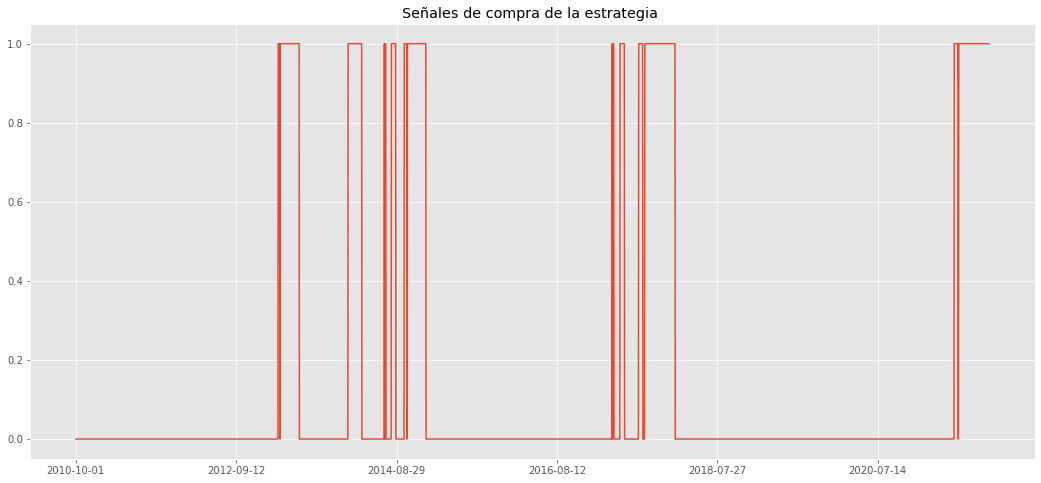

In [17]:
data['Senal'].plot(title = 'Señales de compra de la estrategia ' )
# Ploteando una parte
#data.loc['2010':'2022','Senal'].plot(title = 'Señales Regresión a la media ' +instrumento,xlim=('2010','2022'))

In [18]:
tiempo_final = time() 
 
tiempo_ejecucion = tiempo_final - tiempo_inicial
 
print ('El tiempo de ejecucion fue:',tiempo_ejecucion,"segundos") #En segundos

El tiempo de ejecucion fue: 40161.173253297806 segundos


In [19]:
data.loc['2011-01-04':'2019-11-04']

Date Senal     Price Objetivo ExitReason  Beneficio
2011-01-04  2011-01-04     0  7.414311      NaN        NaN        NaN
2011-01-05  2011-01-05     0   7.36604      NaN        NaN        NaN
2011-01-06  2011-01-06     0  7.212871      NaN        NaN        NaN
2011-01-07  2011-01-07     0   7.05506      NaN        NaN        NaN
2011-01-10  2011-01-10     0  6.865687      NaN        NaN        NaN
...                ...   ...       ...      ...        ...        ...
2019-10-29  2019-10-29     0   3.80123      NaN        NaN        NaN
2019-10-30  2019-10-30     0  3.554938      NaN        NaN        NaN
2019-10-31  2019-10-31     0   3.44425      NaN        NaN        NaN
2019-11-01  2019-11-01     0  3.459584      NaN        NaN        NaN
2019-11-04  2019-11-04     0  3.572667      NaN        NaN        NaN

[2260 rows x 6 columns]

In [20]:
#Guardamos el resultado del analisis en un pickle
#dff.to_pickle("./primerBack_IBE.pkl")

***3.- Ingeniería de datos para calcular la bondad de la estrategia***

In [21]:

data['Dif_Close'] = data.Price.pct_change()
data['Retornos'] = data.Dif_Close * data.Senal.shift(1)   
data['Capital'] = (data.Retornos + 1).cumprod() * 100
    
rg.StrategyClass.dfLog=data  #Ojo a esta liena, no me cuadra.

#quant_j.salvarExcel(StrategyClass.dfLog, "log"+instrumento)   
#data.to_pickle('almacen')    #df = pd.read_pickle(file_name)

>Para calcular los retornos del sistema, calculamos la diferencia relativativa entre el precio de cierre y el del día anterior. Para posteriormente multiplicarlo por la señal que del día anterior que nos indicaba la posición a tomar (si estaba comprado, sumo beneficio).

In [22]:
data.tail()

Date Senal   Price Objetivo ExitReason  Beneficio  \
2021-11-11  2021-11-11     1    3.22      NaN        NaN        NaN   
2021-11-12  2021-11-12     1  3.1855      NaN        NaN        NaN   
2021-11-15  2021-11-15     1  3.2115      NaN        NaN        NaN   
2021-11-16  2021-11-16     1   3.209      NaN        NaN        NaN   
2021-11-17  2021-11-17     1     3.2      NaN        NaN        NaN   

            Dif_Close  Retornos     Capital  
2021-11-11   0.002491  0.002491  106.139855  
2021-11-12  -0.010714 -0.010714  105.002638  
2021-11-15   0.008162  0.008162  105.859668  
2021-11-16  -0.000778 -0.000778  105.777268  
2021-11-17  -0.002805 -0.002805  105.480601

In [23]:
data[60:]

Date Senal     Price Objetivo ExitReason  Beneficio  \
2010-12-27  2010-12-27     0  7.324266      NaN        NaN        NaN   
2010-12-28  2010-12-28     0  7.352115      NaN        NaN        NaN   
2010-12-29  2010-12-29     0  7.428236      NaN        NaN        NaN   
2010-12-30  2010-12-30     0  7.359542      NaN        NaN        NaN   
2011-01-03  2011-01-03     0  7.397602      NaN        NaN        NaN   
...                ...   ...       ...      ...        ...        ...   
2021-11-11  2021-11-11     1      3.22      NaN        NaN        NaN   
2021-11-12  2021-11-12     1    3.1855      NaN        NaN        NaN   
2021-11-15  2021-11-15     1    3.2115      NaN        NaN        NaN   
2021-11-16  2021-11-16     1     3.209      NaN        NaN        NaN   
2021-11-17  2021-11-17     1       3.2      NaN        NaN        NaN   

            Dif_Close  Retornos     Capital  
2010-12-27  -0.029401      -0.0       100.0  
2010-12-28   0.003802       0.0       100.0  
2010-12-29   0.010354       0.0       100.0  
2010-12-30  -0.009248      -0.0       100.0  
2011-01-03   0.005172       0.0       100.0  
...               ...       ...         ...  
2021-11-11   0.002491  0.002491  106.139855  
2021-11-12  -0.010714 -0.010714  105.002638  
2021-11-15   0.008162  0.008162  105.859668  
2021-11-16  -0.000778 -0.000778  105.777268  
2021-11-17  -0.002805 -0.002805  105.480601  

[2788 rows x 9 columns]

>El capital, por comodidad, lo calcularemos en base 100, es decir como si iniciaramos la inversión con 100 unidades monetarias. Para su calculo arrastramos el producto acumulado de los retornos mas 1, multiplicados como dijimos por 100.

Pero para observar gráficamente la evolución del sistema necesitamos un gráfico con mas información. Para ello definimos una función que nos mostrará un gráfico con la evolución de nuestra estrategia, comparandola con la del activo. En un subgráfico se visualizará el drawdown del sistema, comparado de nuevo con el del activo. Y por útlimo las posiciones que toma el sistema.

In [24]:
def grafico (df):
    estudio = df.copy()
    
    DD_bh, maxDD, maxDD_ini, maxDD_fin = analisis.DrawDown(estudio.Dif_Close[60:], info = False) 
    
    DD, maxDD, maxDD_ini, maxDD_fin = analisis.DrawDown(estudio.Retornos.fillna(0), info = False) 

    fig, (ax1, ax2, ax3) = plt.subplots(3, 1, sharex=True, figsize=(18, 12), gridspec_kw = {'height_ratios':[3, 1, 1]})
    fig.suptitle('Estrategia vs B & H', fontsize=20)

    #Primer plot analiza la evolcuion de una inversion de 100€ en buy&hold y la estrategia)
    ax1.plot(estudio.Capital)
    ax1.plot((estudio.Price) * (100/estudio.Price[1]))
    ax1.set_title('Capital')
    ax1.legend(['Estrategia','Buy & Hold'])

    ax2.plot(DD*100, c='0.5')
    ax2.plot(DD_bh*100, c='y')
    ax2.fill_between(DD.index, 0, DD*100, color='0.7')
    ax2.set_title('Drawdown')
    ax2.legend(['Estrategia','Buy & Hold'])

    ax3.plot(estudio.Senal, c='orange')
    #ax3.fill_between(estudio.index, 0, estudio.Senal*100, color='orange')
    ax3.set_title('Posición')

    plt.show()
    return

DrawDown price
DrawDown retornos


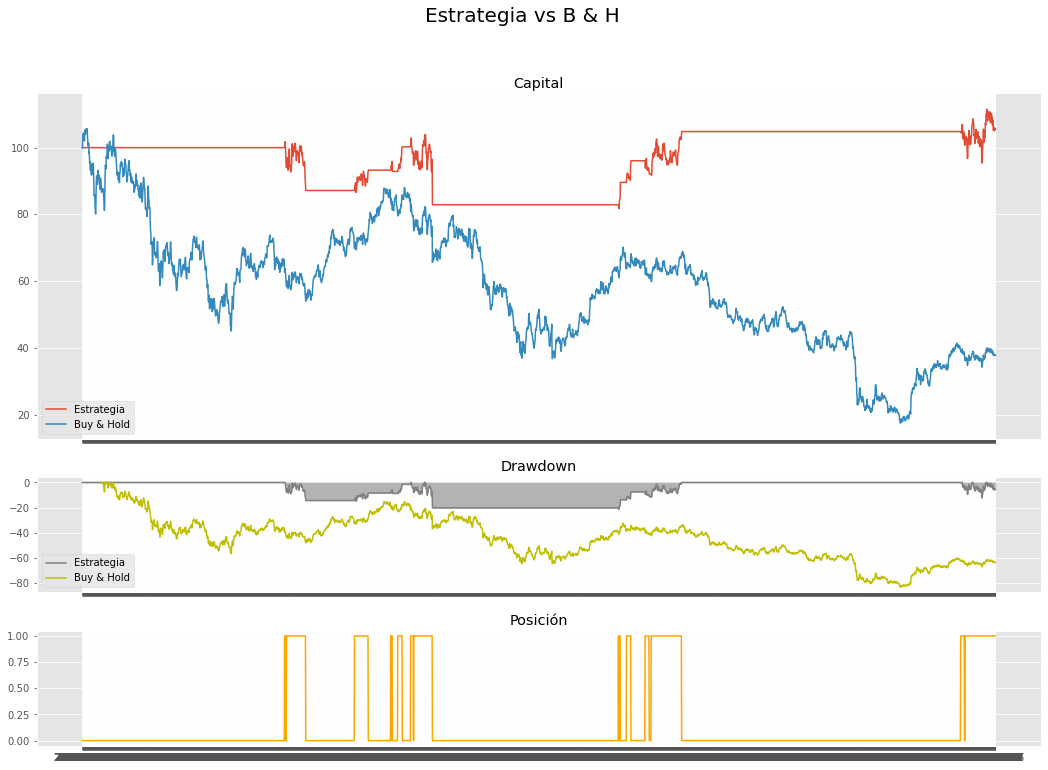

In [25]:
grafico(data)

---

In [26]:
#data[55:70]

---

# ANALISIS DEL SISTEMA

retornos=data.Retornos
retornos
retorno_acumulado = retornos.fillna(0).add(1).cumprod()   
retorno_acumulado
dt_inicial = dt.datetime.strptime(retornos.index[1], '%Y-%m-%d')
dt_final = dt.datetime.strptime(retornos.index[-1], '%Y-%m-%d')
cagr = (retorno_acumulado[-1] / retorno_acumulado[1]) ** (365 / (dt_final - dt_inicial).days ) - 1
cagr

In [27]:
Beneficio_Bruto = data.Capital[-1] - data.Capital[1]
print ('Beneficio Bruto : {:.2f} €  con una inverison de 100€'.format(Beneficio_Bruto))

Beneficio Bruto : 5.48 €  con una inverison de 100€


In [28]:
#Rentabilidad anual compuesta. Calculamos lo que la inversion se ha incrementado cada año con el interes compuesto
CAGR = analisis.CAGR(data.Retornos)
print ('CAGR : {:.2f}%'.format(CAGR * 100))

CAGR : 0.48%


In [29]:
#Ratio calculado restando una rentabilidad segura a nuestra rentabilidad de estrategia y dividido por el riego (=volatilidad)
data.Retornos=data.Retornos.replace(0,np.e)  #Quito los cero (no sepuede hacer logariotmo de cero), pero no se que poner
Sharpe = CAGR / (np.log(data.Retornos + 1).std(skipna=True) * 252 ** 0.5)
print ('Sharpe : {:.3f}'.format(CAGR ))

Sharpe : 0.005


---


# PRUEBA FUERA DE LA MUESTRA

periodo_rapido = 5

periodo_lento = 140

out_sample= qd_data[data.shape[0]:].copy()

out_sample['Dif_Close'] = out_sample.Close.pct_change()
out_sample['Dif_Open'] = out_sample.Close.pct_change()  #era Cloe


out_estr, out_resultado = estrategia_medias (out_sample, periodo_rapido, periodo_lento)


grafico(out_estr)

---